### Installation

There are many ways of installing *python* in your system.

It also comes pre-installed in most operating systems. **However, do not use the system *python* for development** as it is not robust and reproducible.

A simple way to get started is to install [*anaconda*](https://docs.anaconda.com/anaconda/install/) or its lighter alternative [*miniconda*](https://docs.conda.io/en/latest/miniconda.html). This is an open-source package and envrionment management system, check it's [documentation](https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html) to get started.

There are many other alternative approaches, such as using [*pyenv*](https://github.com/pyenv/pyenv) to manage python versions. Feel free to use your preferred alternative.

## Jupyter

[Jupyter](https://jupyter.org/) is an open-source software, open-standards, and services for interactive computing across dozens of programming languages.

Check their [installation page](https://jupyter.org/install) to get started.

After installation, to start a `jupyter` session just type in your terminal:

> jupyter-lab

## Data analytics with *python*

*Python* offers a wide range of packages to perform data analysis. 

Some of the core packages for scientific computing and which we recommend using for this assessment follow below.

* [*numpy*](https://numpy.org/) the fundamental package for scientific computing with *python*, providing powerful N-dimensional arrays, numerical computing tools, interoperability and very performant. See [basic tutorial](https://numpy.org/doc/stable/user/quickstart.html) for getting started.

* [*pandas*](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to way to handle dataframes in *python*. See [basic tutorial](https://pandas.pydata.org/docs/user_guide/10min.html) for getting started.

* [*matplotlib*](https://matplotlib.org) is a comprehensive library for creating static, animated and interactive visualizations in *python*. See [basic tutorial](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) for getting started.

* [*scikit-learn*](https://scikit-learn.org/) is a simple and efficient tool for predictive data analysis in *python*. See [basic tutorial](https://scikit-learn.org/stable/getting_started.html) for getting started.

These packages are usually imported with the following abbreviations

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pandas: The Michelin restaurant dataset

Rather than repeating the vast amount of tutorials available on-line some of which were listed before, it will be more useful to present additional guided and commented analysis of freely available datasets to illustrate useful concepts.

We will look at one-star Michelin restaurants. 

This data was downloaded from [Kaggle](https://www.kaggle.com/jackywang529/michelin-restaurants) and consists of the list of one-star Michelin restaurants all over the world with the exception of a few regions.

First, we read the csv file containing the data and look at a sample of rows to get an idea of the data. 

In [111]:
onestar = pd.read_csv("data/one-star-michelin-restaurants.csv")
onestar

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url
0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...
1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...
...,...,...,...,...,...,...,...,...,...,...
544,The Sportsman,2019,51.343920,0.958850,Seasalter,United Kingdom,CT5 4BP,Modern British,NaN,https://guide.michelin.com/gb/en/kent/seasalte...
545,West House,2019,51.115210,0.642150,Biddenden,United Kingdom,TN27 8AH,Modern British,NaN,https://guide.michelin.com/gb/en/kent/biddende...
546,Fordwich Arms,2019,51.295284,1.126187,Fordwich,United Kingdom,CT2 0DB,Modern cuisine,NaN,https://guide.michelin.com/gb/en/kent/fordwich...
547,Samphire,2019,49.184880,-2.105700,Saint Helier/Saint-Hélier,United Kingdom,JE2 4TQ,Modern cuisine,NaN,https://guide.michelin.com/gb/en/saint-helier/...


<img src="./dataframe.png" style="height: 300px;"/>

Pandas data frames consist of an **index** (the leftmost column displayed when printing a data frame) and several **Series** (which represent individual columns). You can think of the index as like the keys of a dictionary, which can be used to access the dictionary items (rows).


In [112]:
onestar.index

RangeIndex(start=0, stop=549, step=1)

In fact, the list of columns is also a kind of Index:

In [113]:
onestar.columns

Index(['name', 'year', 'latitude', 'longitude', 'city', 'region', 'zipCode',
       'cuisine', 'price', 'url'],
      dtype='object')

In [114]:
onestar.shape

(549, 10)

Let's also look at the data types for each column.

Most of the columns are *python* objects (from our previous look, we see that they are likely `str`). Only `year`, `latitude` and `longitude` are numeric data.

In [115]:
onestar.dtypes

name          object
year           int64
latitude     float64
longitude    float64
city          object
region        object
zipCode       object
cuisine       object
price         object
url           object
dtype: object

The data contain a few useful columns like:

* `year` the year in which a restaurant was listed

* `latitude`/`longitude` the GPS coordinates of the restaurant

* `region` seems to correspond to a mix of country names and regions in some countries (especially big ones like the US)

* `price` gives an idea of the price range for each restaurant pair in the list

### Quick Summarization Tips

For numeric variables, we can get quick summary statistics using `describe()`, and quick plots using `hist()` (maybe `plot()`):

In [116]:
onestar.describe()

,year,latitude,longitude
count,549.000000,549.000000,549.000000
mean,2018.938069,37.488401,3.360110
std,0.241250,18.435102,79.366838
min,2018.000000,-23.634005,-123.719444
25%,2019.000000,25.054290,-73.982920
50%,2019.000000,40.733166,-0.152262
75%,2019.000000,51.511180,100.540920
max,2019.000000,63.433920,127.102570


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd392d49b50>,
      dtype=object)

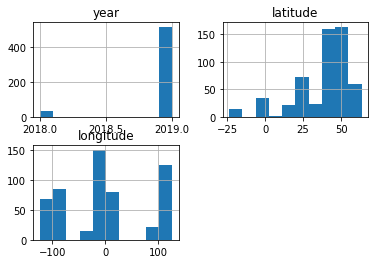

In [117]:
onestar.hist()

The above methods ignore categorical variables. For those, you can use `value_counts()`:

In [118]:
onestar['region'].value_counts()

United Kingdom    138
California         69
New York City      55
Hong Kong          44
Singapore          34
Denmark            22
Thailand           22
South Korea        19
Taipei             18
Chicago            18
Sweden             16
Ireland            13
Washington DC      13
Austria            12
Macau              11
Sao Paulo          10
Norway              7
Finland             6
Rio de Janeiro      5
Croatia             5
Hungary             5
Greece              3
Poland              2
Czech Republic      2
Name: region, dtype: int64

Or plot it as follows:

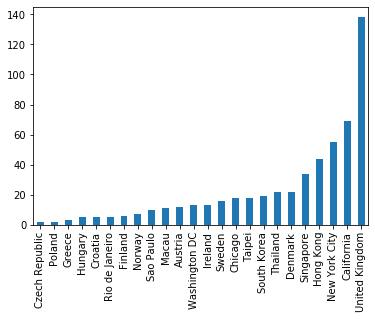

In [119]:
onestar['region'].value_counts().sort_values().plot(kind='bar')

### Basics and Data Selection

The basic ways to select data are: 1) `loc`, which selects via the **index labels**. You can think of this like accessing a *dictionary* by passing in keys. As shown below, we can pass in lists or slices (or individual items):

In [120]:
onestar.loc[0:5, ['city', 'region']]

,city,region
0,Kleinwalsertal,Austria
1,Hallwang,Austria
2,Salzburg,Austria
3,Salzburg,Austria
4,Wien,Austria
5,Wien,Austria


In [121]:
onestar.loc[0:5, 'latitude':'longitude']

,latitude,longitude
0,47.348580,10.17114
1,47.837870,13.07917
2,47.806850,13.03409
3,47.800010,13.04006
4,48.216503,16.36852
5,48.212720,16.37931


Here we use slicing to select multiple rows / columns. Note that slicing via index labels includes the right endpoint.

The second option is 2) `iloc`, which selects via **integer locations**. You can think of this like accessing an *array* by passing in integer indices):

In [122]:
onestar.iloc[0:5, 2:4]

,latitude,longitude
0,47.348580,10.17114
1,47.837870,13.07917
2,47.806850,13.03409
3,47.800010,13.04006
4,48.216503,16.36852


Observe that: 
* Selecting data via `iloc` is basically the same as selecting from a numpy array
* Slicing via integer locations excludes the right endpoint, which is the usual behavior of python.
* Other than the above, the data is the same as that from `loc` (since our index is just 0 to 549 in this case)

The last option is to select entire series using [] indexing:

In [123]:
onestar['latitude']

0      47.348580
1      47.837870
2      47.806850
3      47.800010
4      48.216503
         ...    
544    51.343920
545    51.115210
546    51.295284
547    49.184880
548    49.181225
Name: latitude, Length: 549, dtype: float64

Note however, that passing in a boolean array actually selects the rows instead of the columns (since this is commonly convenient for filtering):

In [124]:
onestar[onestar['year'] == 2019]

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url
0,Kilian Stuba,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...
1,Pfefferschiff,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
2,Esszimmer,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
3,Carpe Diem,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
4,Edvard,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...
...,...,...,...,...,...,...,...,...,...,...
544,The Sportsman,2019,51.343920,0.958850,Seasalter,United Kingdom,CT5 4BP,Modern British,NaN,https://guide.michelin.com/gb/en/kent/seasalte...
545,West House,2019,51.115210,0.642150,Biddenden,United Kingdom,TN27 8AH,Modern British,NaN,https://guide.michelin.com/gb/en/kent/biddende...
546,Fordwich Arms,2019,51.295284,1.126187,Fordwich,United Kingdom,CT2 0DB,Modern cuisine,NaN,https://guide.michelin.com/gb/en/kent/fordwich...
547,Samphire,2019,49.184880,-2.105700,Saint Helier/Saint-Hélier,United Kingdom,JE2 4TQ,Modern cuisine,NaN,https://guide.michelin.com/gb/en/saint-helier/...


Generally, these above ways of selecting data can be used for *modifying* the data as well:

In [125]:
onestar['name'] = onestar['name'].str.upper()

In [126]:
onestar

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url
0,KILIAN STUBA,2019,47.348580,10.171140,Kleinwalsertal,Austria,87568,Creative,$$$$$,https://guide.michelin.com/at/en/vorarlberg/kl...
1,PFEFFERSCHIFF,2019,47.837870,13.079170,Hallwang,Austria,5300,Classic cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
2,ESSZIMMER,2019,47.806850,13.034090,Salzburg,Austria,5020,Creative,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
3,CARPE DIEM,2019,47.800010,13.040060,Salzburg,Austria,5020,Market cuisine,$$$$$,https://guide.michelin.com/at/en/salzburg-regi...
4,EDVARD,2019,48.216503,16.368520,Wien,Austria,1010,Modern cuisine,$$$$,https://guide.michelin.com/at/en/vienna/wien/r...
...,...,...,...,...,...,...,...,...,...,...
544,THE SPORTSMAN,2019,51.343920,0.958850,Seasalter,United Kingdom,CT5 4BP,Modern British,NaN,https://guide.michelin.com/gb/en/kent/seasalte...
545,WEST HOUSE,2019,51.115210,0.642150,Biddenden,United Kingdom,TN27 8AH,Modern British,NaN,https://guide.michelin.com/gb/en/kent/biddende...
546,FORDWICH ARMS,2019,51.295284,1.126187,Fordwich,United Kingdom,CT2 0DB,Modern cuisine,NaN,https://guide.michelin.com/gb/en/kent/fordwich...
547,SAMPHIRE,2019,49.184880,-2.105700,Saint Helier/Saint-Hélier,United Kingdom,JE2 4TQ,Modern cuisine,NaN,https://guide.michelin.com/gb/en/saint-helier/...


### Aggregation 

Now, let's see which years are present.

In [127]:
onestar['year'].value_counts()

2019    515
2018     34
Name: year, dtype: int64

To see how this varies by region, we can use *groupby* to group the data by a variable, and then apply summary functions such as `mean`, `count`, `sum`, `apply` (and others) to summarize each group. 

In [128]:
# if we summarize by mean(), note that pandas automatically only summarizes 
# the numeric columns, which are year / latitude / longitude
onestar.groupby('region').mean()

,year,latitude,longitude
region,,,
Austria,2019,48.036839,15.023250
California,2019,36.654967,-121.137626
Chicago,2019,41.909203,-87.660138
Croatia,2019,44.509461,15.574240
Czech Republic,2019,50.091525,14.423520
Denmark,2019,55.718638,11.904439
Finland,2019,60.165154,24.945734
Greece,2019,37.972913,23.723766
Hong Kong,2019,22.289544,114.171045


Note that this returns a new data frame with a new index, which is now `region`. So, we can access individual items from it how we did before, using `loc`:

In [129]:
onestar.groupby('region').mean().loc['Singapore', :]

year         2018.000000
latitude        1.295335
longitude     103.843322
Name: Singapore, dtype: float64

In [130]:
# in python it can be useful to write long lines of code between brackets 
# so that we can split the code into multiple lines, visually highlightng
# the different data processing steps
(onestar
    .groupby("region")
    .year
    .apply(lambda x: x.unique())
     # showing just the tail for presentation purposes
    .tail(8)
)

region
Sao Paulo         [2019]
Singapore         [2018]
South Korea       [2019]
Sweden            [2019]
Taipei            [2019]
Thailand          [2019]
United Kingdom    [2019]
Washington DC     [2019]
Name: year, dtype: object

Manual inspection suggests that only in Singapore the data available corresponds to 2018. For all the other restaurants the data available is for 2019. Most likely 2019 data for Singapore was not available at the time data was compiled.

That means we can compare regions without worrying about double-counting them.

So let's see which regions have the highest number of one-star Michelin restaurants.

In [131]:
region_counts = (onestar
 .groupby("region")
 .size()
 .sort_values()
)
region_counts


region
Czech Republic      2
Poland              2
Greece              3
Rio de Janeiro      5
Croatia             5
Hungary             5
Finland             6
Norway              7
Sao Paulo          10
Macau              11
Austria            12
Ireland            13
Washington DC      13
Sweden             16
Chicago            18
Taipei             18
South Korea        19
Denmark            22
Thailand           22
Singapore          34
Hong Kong          44
New York City      55
California         69
United Kingdom    138
dtype: int64

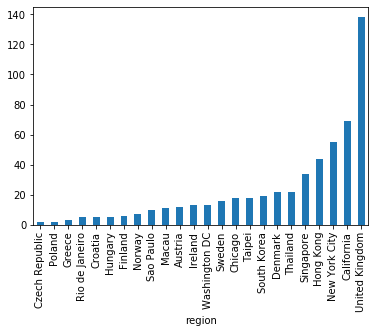

In [132]:
region_counts.plot(kind="bar")

It would be nice to also see how prices differ across countries.

We can transform `price` to an ordinal variable, since there is a clear ordering for the price ranges.

(Review: what type of variables should the following be: **name**, **year**, **price**)?

In [133]:
onestar['price'].value_counts()

$$$      129
$$$$     124
$$        67
$$$$$     49
$         29
Name: price, dtype: int64

In [134]:
# We can convert price to an ordinal variable as follows. (not always necessary, 
# but can be useful for plotting / displaying / etc.)
onestar["price"] = pd.Categorical(onestar["price"], categories=["$", "$$", "$$$", "$$$$", "$$$$$"], ordered=True)
# I will also rename the categories to facilitate plotting
onestar.price.cat.categories = ["very low", "low", "average", "high", "very high"]

We can also *filter* the data to get data for Singapore:

In [135]:
onestar_sg = onestar[(onestar["city"] == "Singapore")]
onestar_sg

,name,year,latitude,longitude,city,region,zipCode,cuisine,price,url
308,HILL STREET TAI HWA PORK NOODLE,2018,1.305200,103.862400,Singapore,Singapore,NaN,Street Food,very low,https://guide.michelin.com/sg/en/singapore-reg...
309,PUTIEN (KITCHENER ROAD),2018,1.309690,103.857300,Singapore,Singapore,NaN,Fujian,very low,https://guide.michelin.com/sg/en/singapore-reg...
310,CHEF KANG'S,2018,1.304735,103.849550,Singapore,Singapore,NaN,Cantonese,average,https://guide.michelin.com/sg/en/singapore-reg...
311,GARIBALDI,2018,1.296564,103.855000,Singapore,Singapore,NaN,Italian,very low,https://guide.michelin.com/sg/en/singapore-reg...
312,SUMMER PAVILION,2018,1.291284,103.860300,Singapore,Singapore,NaN,Cantonese,low,https://guide.michelin.com/sg/en/singapore-reg...
313,SHINJI (BRAS BASAH ROAD),2018,1.295903,103.853900,Singapore,Singapore,NaN,Sushi,low,https://guide.michelin.com/sg/en/singapore-reg...
314,THE SONG OF INDIA,2018,1.310767,103.835300,Singapore,Singapore,NaN,Indian,very low,https://guide.michelin.com/sg/en/singapore-reg...
315,LEI GARDEN,2018,1.295228,103.852100,Singapore,Singapore,NaN,Cantonese,very low,https://guide.michelin.com/sg/en/singapore-reg...
316,WHITEGRASS,2018,1.295452,103.851600,Singapore,Singapore,NaN,Australian,low,https://guide.michelin.com/sg/en/singapore-reg...
317,JAAN,2018,1.293184,103.852900,Singapore,Singapore,NaN,French contemporary,average,https://guide.michelin.com/sg/en/singapore-reg...


In [136]:
onestar_sg['price'].value_counts()

very low     15
low          11
average       6
high          2
very high     0
Name: price, dtype: int64

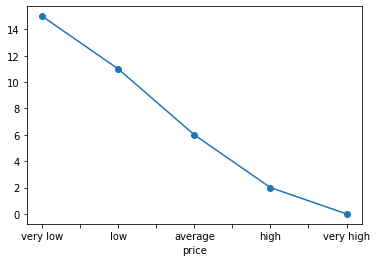

In [137]:
onestar_sg.groupby(['price']).size().plot(marker='o')

 It seems to be the case that one-star restaurants tend to be relatively cheaper, which perhaps agrees with the popular view that Singapore is [littered with Michelin quality hawker stalls](https://epochtimes.today/12-singapore-michelin-star-hawker-stalls/).

<img src="data:image/png;base64, 
/9j/4QlQaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIg
aWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2Jl
Om5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA1LjYtYzEzOCA3OS4xNTk4MjQsIDIw
MTYvMDkvMTQtMDE6MDk6MDEgICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3
dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRm
OmFib3V0PSIiLz4gPC9yZGY6UkRGPiA8L3g6eG1wbWV0YT4gICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAg
ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICA8P3hwYWNrZXQgZW5kPSJ3Ij8+/+0ALFBo
b3Rvc2hvcCAzLjAAOEJJTQQlAAAAAAAQ1B2M2Y8AsgTpgAmY7PhCfv/bAIQABAMDAwMDBAMDBAYE
AwQGBgUEBAUGBwYGBgYGBwoHCAgICAcKCgsMDAwLCgwMDAwMDBERERERExMTExMTExMTEwEEBAQI
BwgOCgoOFA4ODhQUExMTExQTExMTExMTExMTExMTExMTExMTExMTExMTExMTExMTExMTExMTExMT
ExMT/90ABAB9/+4ADkFkb2JlAGTAAAAAAf/AABEIA+gD6AMAEQABEQECEQH/xAC6AAABBQEBAQEA
AAAAAAAAAAAEAgMFBgcBCAAJAQACAwEBAQEAAAAAAAAAAAAAAgEDBAUGBwgQAAIBAgQFAgQEBAUD
BAACCwECAwQRAAUSIQYTIjFBUWEHFDJxI0KBkQgVUqEkM2KxwRZy0UOC4fDxJTSSF1NjoiY1RLJz
EQACAgEEAQMCBAUDBAIBAQkAAQIRAwQSITFBBRNRImEUMnHwBkKBkaGxwdEVI1LhYvEzB3KCkqIW
JEPS8v/aAAwDAAABEQIRAD8A9NyZvXQ5jpigvDq6o40uNP8A3YWrLJIsBiSWSOZUOrfqA04jaCY5
JGwQEjpO5284kVFTz2kqcvq2rokBpJGbqA6Q1t9WAcihVB3BCKCdyIwy7+uAZIk1zCaYxKkeiQWX
WNRJ+98KI48knDUKlR+Ol5trXAAP74ESySqMsnzGIvS1EtK7LflOTy/7bYdCLsjRw7XM16iUS2Nm
ZW17f8YkfcFScOSPAwSZUVdkUdyR64h9BvBsrypqSdZahlMlrKAwuN/TCA52SWYxGpj0tI+q5Fhi
URFclTrckzGJHqI1M8N7C31ge+JY7ImJO+3e4N+4OIS5FNDy+aWDLIHjj1nQoK3tqAxaIyLzLNQ0
b7sk7k6gwvpPgXxX5HSK0J2eT18MLdsBIZHGUsQLL9QI8HASmEfNTRxjUTHK5uu9rjAKwOrqZZW0
kkEDva18QQkCIh12JIb2xYiSYyybQQzm47AN5GBCTDVrYVkVaeJUUk80YkhDck83zpcsVUDoIO2A
ewqHMdh8yC4YkXBwCIGnjAliaO5hY3JHg+mAZlpyKRJSTrJ8BD4xDIIzi2vlik5NPJy9KHmENc7/
AOnCjRiVegrM2WQmGqlKNYaC2xA74lDSkXuhWoloxJO9mQkq17kC+2GKWxU1R8yoRzew7H2xDAFY
6AZCh0DbpHb74glAnMjIaejs6KbMo2IwEjctS8kYWxViTqBFz2wrGRFUStT1nN+kAknybH0GADua
RTzKZqWcrF3v2YEeDiNxJF0/EFRSuPm15hH1G1iR4N/XDKRIRVZ9S5lZbywyBLF30lSb7A4crcQS
eGaSMuyi62JI7Ef1YCNpG86bUYT1eSfbADQfDSios302204Bo8BDQGnQEf8A6owDRIqrW7k20/0t
+bAEmcpJXpZC6EqWGkMDq6fzYCtlmiRJ6VXk3LC6tgFoDkUxOedEOWjDTt3BGAYPb+VzRaYwYpNO
xHUL++AKBBHMsnLRgWuLeL4ASFwkJU8qS2r80ZNv74B74JSfMI4wIaSRdI+q5ub+l8PvK2rKxn+c
18heJJgqdN1AU3b9d8UvllkcZVZ5mYGSdwrWNyTYdvTDpBtJvIeCs+z90mpIhDl7af8AHzjTFa2+
gXDsbf6cMI2apkPw8yDIis0uqvq1OoSVB/DQ+SkY2H6k4BbLPLVQxD0t2sLbYZIhkPW5ykYOltzh
0LRXK3PJJLgEjEg0QslbJJ3a9z4wExBi7GwP98A7OW/vgFFiPxgAcWDcH03wAP8AIuLnzvgIY8Kc
G23bz6YCB1IN/X0OAgdEe+/bAA5yiRgFY4sdhgIFCPfsMArFCPucA8WOiK6k4hsa+RPKAYHsSLX9
cVSgWximDzVFLSR1NbXHlUVDG9RUyW7RQprawFydh6fa52xneTa2iyMVGVLyfmNxXx/n9dxVmPGF
JXNRZnW182bLU0KfKvFMZdSPHdRJGwQKG3Ia3Vck447yv3LPWR0yx4a+T078Kv4veG86pEyz4ryH
Js8jMEMfENNTyyUGY6l0mSojgUmnkJsZCt4yd+nHRU0+Tz2bROLKt8Yv4o8wrM3myn4d1cdDwxQS
aVzuKBJq/MJlFmcCpUpDThjZRbUe9xjDqsSyG7RYdrMF4V+KXEvCPFlLxrk1ZUHiKJtNQ8knMWrp
JZUeWkk+ZD2hkC6LW6PqXtidN/20o/HBfrIblR72Px/+EMHDtBxTmvE1BQ02Y0wqhk8NStVXpIqN
LLSiOK7XRlMetgATax3x0Vm4OG9LJs8cZ58e+NeKeMn4nrM+zPh6mDacupcrqJEgoqVH1Gm5YKoz
6HAd5Rdn7kAC2LJJ2dTFgx0r7KpmfxM42znimDPKzPsyzDiOCaCPKs3mnZaqIwTA07QRBFVGe4DJ
o89V8V27NUMWJKj21/Ddm/EXE/wvqn41q58yz/L+Jc1o6g1s3NraVIyrCGoa4YMJNWhXF9P09Nsb
owtI4uqa3OjZlDae2NcFsMr6OW2wm6hVEZklp0Q8yVYzYlSxI1lfyr6n2xRPKPtH0iGkuLAjSrG+
93NlsPvhlIhoc5agA26SbEfbFiFEtAsmxGx737b+uEXwyUfaNJAZixVViUsdwqi/7Dxh1iilyQ1Z
wJy1Ive297+uLYVt4Bobl1boU1HQio97aADe1lGlvv3xTCbcq8D3wJZDEqSFCEkflBgRs4XUScU+
48be36ica3dgCV9dPWtSz0YiCdLSx6tJ3Nm6vLe2OHg9UzyzbfbpN97v9qNMtLFRb8hYvqZWAIAu
PIx6LFJPsxNClAkDrqsApO7Wvf0xbPlUuhboHjVkh6z9HUD36R74ze44FslvRD5zQVOdZfpo5pIp
AS0aobEkePsccH+INLk1emcId3F/2Z0PTMixz5+GNZGlfBTRw5kjLUpqV7nYAHFXoT1OL6MnX9Cz
WqM+UTYhHLuRcb29seyUjiyfgaZASV7Xt+uHUxaEPEwNh2Gxw1kNDUkdx2xNCUNvGb9u2BIk5osL
gd+9ziSUNNF5t+xvgsZjZTE2QIZSO2IshnwZlNwbEeuCyB6Gvnie5bUvp74hhVkzR53a12IbuQcS
idpMw5jTzKLm9+58YahXEazTJMmz2n+WzSiirKW4ISS4IYdmR0IZSPY4No0Z0Z1n/wALqiF3qMjk
Wvo3cGbK6505mnuWinboNvCSC59cVzhyXRymfZ5l1Dk0kqT0ny0qusatLC6PzWGr6mABG2xG2EcC
xOwJayURqUkJJI7KFsPcDCXRJ8lcvzIBlDqf8xSLHzthkxGRGZZZRRNHJSMRHK26MCLE7kXXvv64
WXZNDkFNG9KyiQLMp2UqAwHqpHjChR9yjzeXbSo8DycQ0CYeaZUgaYC0lgGUnffpvgoc5BOio0bE
kMCFPn9MI2NtBXS10YAiw7nfBYbRMVle0YJMf0qBfc4BAoNq6ezDcsBsD74AFosjhdTfhX6m/Mfb
7+mGJH4w6spKEaQ1ywt//LgA/9D0/R8SZhmrR0nyUUc19XOU9IX83TirFKy6ZaDVmFUu4LgWuMWy
ZUg+kbnsSUF7d/yn7YCEJnyaKpLp3ilUq8ZF1va218A1lFrOHaylqHWmpNCKbKVNxb1J8YUeMgeA
LA4M5UMt7i+5IwpLZIjMcsmcI9P+ORfrkKrt5uMCILRSVayUoWj0s6ruGa7D9fIwwg1DNIGZZWAa
30jEE0Rma5uKNOWDeY/UPa+BhtK3WVhndah2t4Cgna32xA6gCHM6wSCSOUrpPSVuQfuDiBiWy/i2
am0LmUAmhJVXmgQlkVjbUVHcDzbDJkMmZeHMqzCH53LJEEbtqSWEhgx8gqOxPm+GQjJVYjT0LQxL
zKgKBa3Y4cRGdZhUM1RIjRlCGbpYEG/64r8l3gZp4i5BAs19sBBYssjp3kEc3e3V73wESYLnEMq2
MY/CjJG3p4wAiJFUZV6kDafN98QM0fJM6kXAGLEKPx1cn06Lrf6hgRDQQpddTi3NIuB6j1xIjAUr
Z0kKoNd9yH7jxcYCYkjVTGniUWuzLcnzY4CF2OZHW1EdWE1cyldSJI37bgjvgCReJKalooJHp7RT
sNQOrsfbEMgrdTTy18gepUE/ma1mPvhR06Q7OIaAJCpQxkC9xuv64lC9krl0syU0v5g249xhgaoY
mq0MoSVLMenUDYj9MKyBqWploTbWOXJ4uNNvUA4CUJpKmFmYgJqbZlUAFh6nASAZnLUqSxkWGxAA
BF2HuMQx0R0dTC20jgXN1tvf9sQSPy1pjp2EIEjHuvtiNoEMamKcFJ4VUDfURvv6YZRAFaiNr05A
BuQp/N98OFHKeGrhZldjGuxVQ/SB52wBQTAj7SMeZGSd8AJElRTxQsyyUigqbXF+sH82AWQ49VSG
RlZDoPYemAWLI2SOCWQhUHrYsWXAEgdKmhopiksXMfzYEhfTvgIQ+2fA2Wmp/wATq6SwYMAL3XT4
wDUStTVwJTQzSx2nlUEwaOki3e5wpWiHTNoo5LGmKRm/TG233tgLK4Dd8wX/AAk6zMtvwrhWUf8A
OGJggmWkjpadWqSec2z73P6YlCTfJFtAm9RA+lbGxewA+52xDQ8RGVcM5nxBIxpIXkjY2NS/TAoP
ctIw6j7IDiUuAeQ0bJfh7kWWlaqvVcyrkIKyTIOTGf8ARH22t9TEn7Ykrc7LPNVRxqTcAD7Hbtt6
YmhSGr86jjGxv74ZIgrVbnrv0qxsfTDAiKlq3Y73IJ9e/tgQwOzF2/Xbft7YkhoRpbx64AFqvtc/
e2AEx8Qaz7E774ACFpztYG2AB1IR6WNzgAd0WNsAshxU/p74BR1UB8b+TgIbHBGPW4wEWLCG/Y29
cACgl7gYAFaNz64BlGxahVHi3/OCydorSdh/ViPIXSor3GXHXBfw9pKTMeOM5hyWirpjT0kkyySP
MyLqk0RxKzaVA6m7C4GKM2RIvw6aU3weTvi1/FVU57lGacHcO5LRUeU5vS8qatqp3raw0kzdSNHG
vJRnRQ5YOxUMLdQxyM2oO/pPSrSb8HkyXMJjVJUw9UyFJBrKSbpYguHBDXYbgix7HY4rgvJtlNz4
+A051F+JU1a3ramqkqpOSwhaQTgv+GqrpiCyAiyja+w2GLVDczPKSoTVvl9XmS1yTSPRVKVEwppQ
1RPTEp/6uvl8yz7c0d7X0+MP7e1FcJ0ANKopQEe8ffWQN30aWsw67HwO3nFe3my33UG1+aU0kcEW
WyRvDKivUBKYU7QyEFDGZbBmBUarA6cPtYssqI2atM5LSVAAqGb5gh9csjA7NJcfmB2t6YZszuUQ
F5tE1xqkhtYrMoAs3qfFz5GGi0RviehP4PuJ+I6T405LlNDXOMlz6Crpc9oZZS0M9PSUzSwtY95o
yo5THqA2vbbBLNsTZn1eJcNH6IwSc2FJP6wGX13F74u0+ZZfNnOyKkLMdjuLkf8AOLJIiz7kg2Xa
zb+37YVYkxkxlosvmkjkdQ00HTE7oyOr7akS36d++M8GPJBAG9rXJACt5xqgUM6FqF5dRHHGyI4F
lu4kJJ6ZF/KfQfriMnMwYJU09c0CNQVJp6pddyBrSRG6WVkb6t/2tjLrsMuKLYKx0aggVbLKukXb
ZNaLfbUDYE+N8NgtLkiaFOVlAqY9lqAZQhADrdipDBTbv2scaITT4a4IQx8vGWjqRpdahNSOpuhX
6dvBI7HyO2E03tKT2v8AwDH6ZpIZVnjUMyawFYXA5q6CQRvjRidXcnXwVucgKaBWjRI7oYwBZSRe
1t98UZtO58oaLsHmlEBjikIE0p6EPdrbk4wS1/t/Q+zRHDYQ6FgUtquO2Oi2pQszqW2VH0elFUNZ
L3ATyP0w2nbS+nsMqcuhUlOJxv1G9wPti+cXl4K1OURpgQdFr284WL2rZ5LLTGCAzsB48nFblyQN
m4k0KQAcaFLghocdVNhYEjxh4zKpIbaE7G9x59vbFliIQ0Vh/pwDIYZLWtuPTAMxBS3gi+AgbZVH
fEEMYZb/AH/pwWKICNa5NrDtgJuhJPYEm+GRO4dhqpoRYElT339MNZHZM0Od26S2nbscG4naTsVd
FUKNZ6rCxPY/b1xO8iqG80ynL87p/l8zp0q4LbLJuV/7WPY+nphWrJU6Mr4i+EVUnPqeHqpqguUa
Kkm6J47E6hqHTIvo2xvtY4j27LoytGQ1Ga5mk70FVZaujPLqYKiDlTKy7/ikqrW9Da2KZKh0InrZ
Kxo3ccsJuqgnSPUgffCD0EUyyynW69xYG17b4gKJdlEpu51SbLuLah6YkrfY9eSJ9LnUtrm2+5tg
otghFNRs8kmroRSSt/fEbSWzlTQzgXChtO+w3tiNpG4jwu99wN972t7bYQAGRdDMoBBLE/2wAPxZ
o0ZEc0eotcK0ewWxwASEOY0sw5ccwkZelrXHVgA//9H2BR5TQ0epafeS27Ed8RjJHJaC4MrHb+nx
iJ8joXA70uh0Uuot0Ak2xFkUSP8ANJFN2jTlkX3bSf3OHsGjtXDT5jBZ3aMsB1ROC1vQ2OBsRFUz
DhympwTFqlDG4UbG3nf1wlDqRFPliTaWg6VvpCk9S+vfEjWS1Ll8mWwirgZjbbSDbUfsMQwsYkzi
okR2li5UgBKOBY398KiCGmirKyYt1yOwBYlT2w6A6+T1CwgqvUx7HDEo+/kNULtJLChI+lmAI+ww
suhmwik4fldjIJ42021BblgfFvQ4Qgkcuo8zy+UtCrJRAlnihIPMI/0+D6nEoLJ6mrUmiWdonVWs
Gif6lt62xaip9icyyzK8xj1ShYpCLpKv1WHucVyY0UVvMMpSGIikkWZ2IBuNLWta98CHBMtpqpJO
YVAKtYqTqO218SLILzccyDTus17gAd/3wEIrrROh0FTfudsShwyjoBJIuobHy3Ye+GTCwqXJ63mC
y2Qbq6gWYYlsWTsWtLMHBEdwAQe3TiUxAFaGetnWKSFlJJAlXaxvcX9sDAmKvJqySBDINcibMyDY
ge2IAFynLHnrURgRFGWLqRYnbDIA/OqqvFU9K+nlg2iIW+wIwkhkwqjq55qbRUKfmYidwNiD22wl
EMQ8RqEdSvMIHY+MTDggMgTl0JhYkeR4/TfDS7IfYzPKBEBy9U2wVrgED74RjRRG5hUrKiRvTsrD
bUWv+2AsG5aQrTl6U3H1MpPVb2/XABE82WrlNPJcVHZAxuVt6nDqXAA4pK4lhEGUrsRbYEd8QQLe
qSH8MEagbONwb4WiaPmkWUAsBb274ZIKO8xQQLWHYHAFHwlgc9YuB5PfAG0+5yJpMTAKLgfrgIsa
krHU2LdWGCwYVLSOAW06u199WAQdirBARqW4YkYCBCtT1sg5kIHiRgfy4CSdjg4coY45KeqHziru
pJbv47YCCNra2qmVonfm0l7om11+zdx9sFEkM3UzAI23cnBQIl+HIWqKyNlFkj3uu1yPS+HUQmy2
1FJU5jWx01DTNJIQAxH+Ui+S7HYfpga4ERO5XwJltMofMR83IDcQbinU/wDadz+u2FAsfMhpYlij
VY40FkRVCqoHgKNh9hhlEGRdZmyxBuvDoWisV/EDMdKn2v4wzZMVyQE9VPK1ywI9fTCoYasSNz3w
xDFBTttffAQLCHbwb+cBKHUhvuT5wA2ERwDYW3v3OARsfEXbt38YCB0JgIaHFiGxG5wC0OJGbjwR
e+JQUOiMbYgmhaxLe5wIKFKg2t6emJChwDYD09sBNHLDa+3jc/7Yr30Shdr2vhpfUrFlaZ8UCOHt
cr67d8UaxwSVlybZ07KSO2wJHe/sT2t3wyzxUrj1RE8bkuTxV/FQmd518RqqsqKU0WU5FTU+X5YZ
HKS1MejXJVKquQI3dyFYWaw3GPO+pT3TPW+htQgeUMwqppKh1+hdiQNgLCzCw98RijxZu1Of6qHa
T5IQUy5pqegRzHIlGUWtRZFDcxQ4syDsQT3xqijmTdsUMgjzpYIMgyvMHzCpkip456qeBaeSaGJ5
aiJGOlCdGllBYabHuSMaYrgxzfIEtPBQVEVJUSuYZFhnaZYy5MUw1FoRcawANm8nviuWOxoTBswn
p0D1lO6x0s80gp4DIBKIjsG5QudvXDQgxZzVkcsDiNJqbUdd1kUgAaix0orXN7ggn3OHYseA3Mst
qMmqZsvq1MeY0kjU9RE1iUkQ3/KSBv74roehKSGmiAmQcmf6Hcg3DDe1ibe2DaMpGg/A3jbIvhv8
R8p4yzynrKjKMujq45IMtWGSpeSeEwoxExA0AHdl6sU6nCs2N4n5Kbl4PfPwu+Pnwu+IOZpw7wvm
dfJmbctIctrMpmgl1MhbUHQuukaTrJ2B9jjH6T6etH9H/kZ8smzWameOjKJLFM00jBEVVsLt9Wsn
cae4v42x09VrPZmowjw/1M0MDa5kC5lUZjTwhMvplleRlAlLACFl9Vf60Ydxe4xk9W1UoQUoR5/q
adPpo/8Al/oSkKF9OtSAdjpXcegAJ3/XHSg2jHKVjFfLNSU80sAV5ljl5a/5iCRlKqGtYg6hufGD
LklTIjFMGyZ6ipoqCvzemFFmTQxCsSxARwpUlxGSGsfpbGbS6jN7acvJZNUiO4gzx8tNGkRjSpnc
0a1MytyKZH6XnlVCCWsdI0+Wudsc/wBa9YhooxfTm6v4vybNHoPcVjmQZqubxtC00M8sTmI1FK/+
HcE3jtcAqRe0l/zdtrYo9F9QeqU7nv2sXW6V4/sTBRAzII7P+IJUBtpcE7g7/T4vj0klNuNPaYcc
knfwRNFlj5c0rmoaVJWZhAxbkozsCzBCdu/g4816X6Zn0+TLknlbi7+P/KzfKfuRJVY45pGFMwmh
uwik1fWF7k9rWN9semw5cWaKcW7i/g5rxbEIEDEuVBKxjU52AG9vucW4o1LkiXCBanL6eaaKpaMN
NTkiNv6Qwxj1fpMJ5Fk+C/HluNH0cqszRoC5AFnXSVDauoP5G3a3nFWDXwyvY10POHByVUUgkXbf
qtcnGiTi3wihR4GJJ2QAAtdiOw2xTLU7RlCz4ydVje3qcWw1Cl2S8PB89mXbv+U++J9xXwJsoZIs
Gf6nH1ebjEuXBB0OWVXCkKx6QRuMTF8g0dG4NzvjXFlNHCgA3Fwe4xbMhoaZPFtxfth64FoaaIFQ
PO9sQSDSR7W8jAAgpbe2IBDbp3OnEEsaK2F/7YBRu3r9OADhAB9fbAARDWVEO6MWwrXJJN0ec3HU
1zsGB7WxYgJyGpgnQKbetj5w1WK0RfEnCeRcV0pizql5sgXRFXRMI62EXuOXNYk2P5XuMK4DqdGH
cU/CziDh2WaspkbN+Hy+r5igjK1dImkDXV05O4vqJki29sVOHJojl4K1lVKJol5Ewmh6gsoOxXuG
AHn1B3wjVDXZN0kyxzEPEOhlBJXvt49MQQSNPRwTPLPTgkkfTfVY28AYZMB2SKSAkssTjwpsrm/c
gn0xEmMN08lLE5UyA6+5a+nb0+3kYRABVkWWysWg0K7NdgoABN/qA98O2MRtdRpKQwZUPYFtlPsw
Hc++K2gICrhEbXYhmBIJQ3HLP02B7EnY4SgOwrAYhIFKyHvv9OAD/9L26auB4PmKQRtGBe7KVsfe
+FJIfMc1qIIVkogpnmJGtrFEUeQvk4B0U2ozjNp3kaWrkK30nQoS3/6lsIPQFz5SCZZWkXwGckfo
MNYUGUzS6dEUrqws0ekMCG8C+BCuJacnWvq5lNTzI1W4mRt1YW7j74cRonHyagkkbQiBTa6hgD9x
gFAqyGOi0wxJrgtvqN7H7jEPolAMyIq61AZT9QABP6E4rHBzKsKdDMWO1iLEfa2GJGNZcnmgW8G/
fEkMEr8vEyBxDqdN45L3AOIIT5GaekrQzSRzCOoIGrTcKQP+cA4VQ1uY0qukzPUMzXUkgFT+n/OB
kD8mcXlEtO4Wf/1lba5Hg3/4wyFICrq66omJaV0szFVVrAKewGEZY1wFUtZmB0RVEuuK+1wD48nE
oglqT5MS6nCNPvp0sf8AjEiyBa6KaR1JnMoJICG23sCMBCGv5dXSaVWO0adrkG+IGsPGWrEE5hYE
i5HjfDIrbDow6RWXdfF99sDYqGSRC/NSDnowIZDcG/p9sSmSPxxwRsJEQqDYlb30n3wwDstdyyFZ
iANiVNjv2wASUBHyfNk0mVQSGsL28A284lEEKJIqzUpQB79xvY3998LIlMk8uoEik1yptbZh2b73
xC6ATUyQmbVCAAtg2kD/AIxCYAuckNSpL2b6dvTDMEQrGQKE+qP8xN7jCMtiJIAQrKDpG4I3OAk+
gnMraRHpA2vgA5LT0TyGV9KVETBtVjqYfp3xFihFVSSz0ktVCxRlFyR3NvUYZAUmuDyyh3IYuw6w
NP74miLOpK8cZRm1Nse1sMiNwiYTsNUYOk7kA9vtiGTZ1HdiFZSNOkK1u+II3HGZUYsW6lvYWwBZ
xwkp1E2f1wwWNgJHZxbb+32wANswnLRg2H5bHAQKEclOqsp2b6j5wpI1IwUWFxqJu3nEgNaQrqVO
7bDUTc28C2HogMoxUVNZHl1NE09XMCEhA1MwG9yPA9zgA1fIeDmp41kzFRFq3amQ6mO35nH+wxLk
I2WwLDSRCOJQqKNlUbfqfOFXLJ8EdWZmkV97G3a2LUhCs5jnoLFYz284aiUQFTXSTsSWNj4vtgYw
EwZjv2GEBHQpbYnEokeEZ9cSyBwQsxt2Nxc+uIAfWnY3vY/fEoAlYdO3uMSIxxYyTa2AWxxYjbfb
fAA+IwbDASKWKw3Fu+ABekKAL7kYNyChYW1r/wBsDYCgqm2KpSolI6o1EqML7g1CtJ2UfriHkFo6
0EcwW/5DcEeuEtsZId02HqffDbuKRL4Bq2nepiMKuyFrEOPbxjn+p6dySplmLIh1YpFQJc6lUfc2
wYsTx40n2WSktxmfxR+DeV/EqNKiCo/led07jTWIhlWoiI0tBItxp/qVhiPw6macWrcHweAviN8L
M5+HHFlXw7n34YZxNRVqgvT1kLAMrRuRfsVDL3BO/bFWTHs4Onjy+4rvkoNTTmI1CK6StGSqzx7q
/T3UnFcGyZ8APNWmhjhJEsZ/FET3dGL9JshOnUfXv640pszyRzKs6r+Hs3pM8y2Tl1mXOGoZZUSe
NGsw0COS6lbMbr2GLUV0g/LOLszyvhvNuHKapRMuz6R5K6BKeDXJKrJpE0sqM/LABZUjYWbf1GHf
RXXLIgGOCAQxOkkcgGobjc7kOp/MO1wcVlwTXxU711HR5bWLUxS09GtRUQQS61nkiDSq0e7s8bOU
JXZtO2HpFc5OuBmpyygy3lyVdYJoquGWpoflLGSSNJGiiE6H/J5mnVbUxA74ZxKoZASTMSUKQkRh
iwjTYsFJ7XxT7dT3Gj3UTdBxDXUweClr6mnSVleVqSZqaRyAUMYaOxBuxGm9t/2WcG57iW1JG8fD
/wDiN+IfC9VRZjU8V1mbZTlUkNK3DGbfMViVeW1CnmsPJemKqUbWGtbcqWGKo5ZeeSVo8bRoc/8A
GzxZUsuXQ8M5FlOYTaRTZjXVlU9HGwcM7SxEPZXQaF72Y99sXRzuXDRnXpsb4Y5lv8b3EYzelGec
MZLLwu8tGa6XLZK1q1KeYAziAzOFkkiuTcgA2t6HBHUInL6fXTs9dcLcU8PcZ5HScUcK5gma5FmA
Joq2JSqOVJSWN0ezI6Ebowxfus57x0TaQqIeXEQOYBplVgCCpHRb8tj5OLYx+jbd0RKdkVxBkFNm
ka02YAvIouGLgHW10LXFu533xxPWPRsWux7Z8V++LN+i1rxHco4cgyoSRRqYzb/ETGxuQtgQR2BI
G1vfGf8Ah3+H8Xp9rG73P7f7EazX++x3+bsa2WgdhAY1jQkW0u0ZuWB7jVfdfOBeuxWtlhyLhL+n
ZXj0VxbDJ6EVQClOZA1g+rpUs/5cd/24Sjwk4sxrI4SoUmXrBC8QRLLa4JHQwNuwN7nzizBjhiX0
JInNOxHIRmZXJWVFtEDuHI+oC374vfPJXJWhhu+/3J7k+oP6YbdsjbYuNURcCZdRzPJCqJJPcAAg
Bjffufvjzv8A2cGbtJvxwdJxe26CXAYMO5U2Y+hIuB98djPt/lXZjUhp4GKjSN/vir8Lu5GU6BKm
KWMbjpvvbGPNhklSLceRN0wCOaWGMotyb3Uve+MbySh4ZfsiwikrRKXjKsDGwBLLZTfyD5xfp9Y5
vaxMuKlwEqx5rLe6nsB62xuhIzNHGG4I7ecatzVFVHVkVrknSL+dsWTzJK2+CEt3XJwr5Nt/pIxf
jyKS4aYk012IZPfD2hBiRFJ7b/bEkDZTY2F8QShpkPkYgljRhBIsd8Aoy0JXdthgAbZB3GABBY7g
/wDxiST67JsB6EYgAumzF4DuT9jiUwJ+izdXFiQfb0w6ZO0lop0ks8TEMu4IO49rixxNkdMqXEfw
+ynOZajMaJUyvO6gDm1MMV4KkgiwqYbgE/60swwrgOpmaZ1kVdkDmPNkEDyP+C3M1wykf0y7D9Dv
imUeS5OyIVZ4r8lzDKpsWB0kebX8E4rZIipfMKsItZGshQmzg3Kge+1/vhGSJMUn4YAJUn6vG4w0
ESBz0c6MWePp8f8A0YkYYKEvbuLC1yTvgAZmgMiqZQNW1io+nfyfOIaADEYQsbaTdha93t/tipgf
/9P1jT8auJWTMKSOWlcaWkp1PNt7hmAYf3xWOkKq5ctzdkXLJwJot4YmVkff1viBgSqyuOmgHzNM
JKoG7iJurfuSe2AAZaumRCIKQI4uBcCRj9ycAD+XT1ccrSAJFCQCdaefa+ACRpZs05zVBqC4/JFY
abe1sSIwqtqZWo5JII2mn0hCENiD7W84YIqiEyLNHoqqSizAsaeRLlZtRdXI9z4wDssVVl9PAyiI
ExSAHXquGvvcYhkEfNTC5KdQ83woCFpiF0gHT5NsSB15lp4WUtZe3b1wAASyIxVYWIAsSSCMAC6m
tgp0VnBLkgah2/bAgaIiRkklaQDv4wxKFxxGTcLf0vtviJE2MVDtE/Lfpb8y2IxCAcy6OU1AeMME
/MLE7ffDBZMUtKY5Sz9ySVDH/jAI2GyO6opSwYbEDACHkl1hS4vp2scBDFNVJGfoP2GAg5FXUckg
RW0sO4tucMDCm5DDZgrEdQPc/phhSNraOeWoiZLmGQgEjxY+cBJN1U0NLSrFK+mwtrBVT/fATVlf
bNKSB35UP4lvrJ6j7nENk7QaqzisqobLJpYeQew9DbEeCdozSZg6K7Sr1jT2P1e9sKkK4lpWOOro
xZdYIDX72PpiwERtRFGLhdKygauxuw9MVyQyI8Mr3AQk+FJ7YhEio4C7B5n5SKd3/p9recSALXzx
0jAxlJUJusoBuT74EFAsVXUvUpOsumFmtMh7Fft74dAfVcMjTPFLEiljeOy7H3GIIZX57rI0br1g
kH0vhhUIUhQuv6gSCb22PtgHsfsGA0G4XftgAGlbnLqZV7EemAUReI6Qbi5ubYCBxY4Abq97jb0G
Ak7FSK5HLK39BgAJeKyhXBYW2JIGChkxipjpyFsvSfTc39BbufbALJlgyT4d5xmy8/MJDl1EwBVi
gaokXxaKQWS3q3/6uHcxTTMpyDKOH6fk5dTrFcgyzWvJMwG7O3cn+2F7AJqK6OJdj2w6gKVvMs/C
Aqhu3pfvhqArVVmMs5vdtN/XfASR7hm8nAB8sd++3tgAXo8Df9MAC1jOrcbHADCUhue22JQthCp2
29sSRY8qLt4wE7h1V/XfAK2LVdztiSscVe232wWMhwLb3xDY44ALXwjYHGUgr74XfBdq34Del2Ks
LgHDcNc0gVfA3HFLG7694yen1tjBH3LafXgt3JjyRlDqJspB7/8AOBzUOwqzqkyoWXY/Tq8YmNZY
vayHGmK5chTSG6rWv2viHjyxjSZDfIGk1RHV8uS5i9bY8z72rxajbb2/1NySceSSCrqFiLHe59Ld
serbi47n2YvbVkNWVlV/M6aCliIhVOXV9/8AM1XVr/bHndZr8jz7Yrikb8Wnhs3PslhTiNXQbKzE
lr92Pn7Y7Oli2rZjnLmkY9/ElkNdxFwOstLl8dQ+WT01VIQivNHHFfU8R0s1iQA6+m+LtSk4mnRz
2yPznzelekzCoppVCskiuHHZi68zf0JDbj1xzlOuDsZOeSEleWmo5aWB/wAKZw9SmohZBGdUakbD
Y7jyMWwkZ5KwVpp4KWSRTcSL8vNEulTyZbErbe4uB1DcHF0WVSQPIUhi1xyRhJZShi/OnKUEX/0M
Th4lcpUAcqdSkkkZCPdo73BZfqBF+6+hw0kLHIP0orzJJVUSSk0N53ljBvEq2BkNu1tsCRDyD9Tk
01FVJBngegNRSrX0xOmRZVmjLwG0ZNhJ2v484eipuxE6NT0VLRzKkbqZHnCR2ez2KO8vZgRsmn3w
rGoXSoY1p6yLXTLCYebOZFJMklzzEB37eADbCstxkp/Ma+kLNBUTQsVdFCMyF4pAVvY9lKnGVwNa
kP5VUyUsTVC0qzTcrRGJU1orXBMgQ9JJVWFiDcE9jhGXxkDVVS3LhqFRAhkZA21kLbgCx7DBjx2R
OaiaN8Kvirxv8NKrMMw4Tzj5CDMCnzlLMsU9BVvG/MPOp5lfQwW68xNLi/kYeUnFUVPTxycn6NfB
z4o8J/F7IEzTIKhzLFNyc5y+tVYq+kklS6RuqEgxkAmKRDpcehBGL9JHhq3x/k42biX5SYTMZZ83
VWrQaqoqZITQupXkwxdKNdQRuF7k9j648S/Usr1qXuSklL8l8Ln4Oljxp43cfBcIIdSBYi4DHoLW
/DHn7A+Me/jHlzjwcjroCq8py3M5JljTVXRsAWuetb2ZiOx8jHD1Pp2m1M3KNOS/Q1Qzzgq8Ml4c
uaKFoTIWUjbbbVaw6cdjTY/ahRnnKxr5etMTwuFeQSI8EmuxZQdwwt4H74sx/JCVAs8MVPmBMQ0n
drMdIudh+lzi1ciSIHNXKU0xRgdCg6Dcs+ttCgLcX3+r0xm18tuGTHxYt7op+W5VmOe57SVMTQ8q
kWRqiqaUrJTKQdMhQi1rgqovvj5rDSZ9brVkbqMf1PT5NXix4drVsukNZDVUdJSxQLEKbWrFSNLk
HSHUC/1Wvv8Avj6Vp8u6W08zOmm10LIA7jfHRUShjbqGFyMR7aYtjMtPHI29t/O1+2M8tKi/eV/P
VraamLUDgSjsWFwANz+uPI/xBKenx+5j7TOtoXudERknFIzGsFFoaOQhiNXZ9I6t/BxwP4f/AIml
mzezJPn9/J0PUvSo4obkWxLNZrgXAIHgbbDH0aMnJX4fB5p8L9SC4tq5YKJKeAEyVDHXp20hd7+u
PD/xxrdRhwKOG+fi/wDY7Xoumx9sRwtV189I0VcjkKbQ1Dd2Hcrb2xZ/A3qGongl76firv8A3K/W
cOOMo7fuT5XUbjcW84+iY3F+DhuCG2QE39P1w4rElLAkjvgIGmjJH/OIYDbIoHbbycQQdajkMXNj
Kyp3flnU0Y/1r3A9zgADeK1/fEokYaIgnULjxgJTEFbG5sQO3nCtDCGTct522xKlQsuzqSCLcEjB
uIJKmzZ4vPbDJgTtLmQkF2N8MmATWUlFmFNLSVsMdVQTC01PMgljdfN1Itf0xDjZMZ0ZXxP8K8wp
Q9TwdKlRTadZyWpktLGR1FaWpe4YHxFN2P5sVOBfvsoNLWyO09kkjnp30T09RG0UsLjuskTAMp+4
xW1ySiTWp58TixA21Da6t6YmyaGWEmgBiSt7k+ftiB4gstMWIKL+nY4AmMSwOoGrvY9IwMkDMfMF
ytifNsVtAf/U9Ex6QpYnsP74qL3Q9TpIJkmbUgTqLdrjxiRSYo86M04gkUcqTaJuxB8k38YgAyug
WGNZokRma4Y9rj1GJADiaWZggQiIW1EsbDARY5PWQQBoYy2sKDex7+2Ahdncrrog0iG6udzc3BxJ
MkFVLUuaMKeoj1uo6ZCNLgexGJJ8EpBFJFAKZR0xghC29gAAMQyLGPlJSQWGkX73thQFPpUEDc+M
SAII2qLiYfT2OwsMQABX0aU9MWRmZm/pNziQICeYyqLMTpaxBOBEoKoYVqapInOhWsCfTDAyXkpF
oJOXMwZPBA8euIZCY0k+qRYnbmgHYlR28YhE2SkdOTErRqAT3FsMLNjMsUysXI898AtiWR7XO9/P
jAMj65QWtYkYCGfLLJqAS2u3Y9sAUfNSxF1ltpkb6reMNZDQ3OWhKSIxfxv3w1hQdlFUHjnWQm1t
r+D7YCCKznn17IaaS6x30ox/3xDJixiPKZ5QDIQA1t/Iwo24cGTtA5sLG299gRgiiHIIShZlKlLD
w3bFjFbJnLJJYVNO4vGdr+gwR6BEdm9aVndGUM6WHaxK22P7YVodEAcymBKxIF9rXwhI7HNUyNqZ
mCnuttv0wACVesVOkrsd1uNj74lDWqFBfl4ysXW31E+LYZFbESSy5hT8ncV1MSym/TKvofQjAS+i
GaaItpcnXcAsd7fc4kVHKqneN73urdmG+ABEbugKG922BwFkWjgicjqW1gbel8AgdQ5fLKQzKSo3
Nthb9cFgfZpR01JH/hw3Mc6gXN1AvfABHwl0dQD1327i+JogmsjyDO+IWBohopL2krJd6cn+kJ3d
vtiSUadkfCGWZNy6h1+dzGMH/Fyqt1v3ESfSg+258nECtk1NUpEpJINvPYfYYlRFIOvztEUjXh0g
KxW5tNObIxA9cM2BGvqc6ma59MLbAQVIHbEAJC2uBgAWY7j3wAOpF+xxKAIWK437bYkhseWPY2xK
EbHRERb74kix1Y7b284lILHQnYD1xFkPgWqC3bviLAdC7XA3wRd9DJHSgtZTZjhZuv6E2dtZwCbD
FO9Vdk0L0A2HY4ZX2SpU+rA6ijqpJo5IqnlwotipG5N8cHXaDU5Z7o5KX6s3LLCug+NTZVO5A3Pr
js6dzW1S5pGXJkT+w1Vhlj2W9/J8Y53rdqNrofDyz6hF6fSe6n0xR6MpSg3fFlmpSTX6BaKw+r7j
Hce5eTJLsSyBgTbc+oxTl0+7kscjl1iTmSWCr3N9rAXxTkyLHHnksxwsap5Fqac1MMdnkBsGG+u/
c452nnHMvc2+a/sPOLuk+AiSUqLKouQCQfBPfGueoklwiFjSImseTfa7dlAtuf6bH+rt+uMj1lfm
dFsIPd9z8qPiFLWDOsxWspJaOvjzCr10ci8t6Uc59MBB8qLi5xXikpytco7e36ChGeSRuSTYrcPt
sT7Y6O1GDcxMmYVMNDLl3P1UUzCVoSoazqdyhO63/Pa2rzfFsUVSkIjqsuaFzX0sslTqJhljkWJW
PQEjZdOwVQx1L5I/V0imTFV2dVubwZZR11TJJFldO1FRc+Znjgpua0wjjD/SNTMdIOm52AxLFiM0
lY1PHUBoY5RUxSQNzk1hAw0h1FwQ6d0b/jC2WOKZL0UVJVZVxBOaGJVpqKjjjK5gKY08xnjjaVae
Vneq5lmDIp6NWrYADDWVNNA1BlkGcIjtmFNTStItOIaqR42EQjaUzFmuqoCoTdhdiMKXCqXM/kaq
nggrESmniRaupgiZ5Io5ls6aZQOuMHuvns1sLRKYdNmVPLPJM2XwUsypoTlRPDF0qgjlCqzlXPL6
x9J1HthGy6Ng4qqzkmI0yR/L3mkKRMXYISess1gAp+kWBXC7UXKz6SmE0MRvpgqArPo6bGNxqWzd
u4OFX0kThfkcy6nNKtX85JaXWtPT0ZjdpJgzaTKsgVo7Ri2oFh36cTNKQkHKLNS+DHxMzn4Qccw8
XUDjMcqnh+R4gy1pjC9RRO1xot2njI1xC29iLAG+DBmcPCF1OJydpo9/8MfGP4GcRZ5GmScXZR89
mTpHBTyyCmnmlk0hYUMqqGbfSQrE32xTi9O00cvuqK9zy6Vc/wCTNPLlSquDWauKWmjkFIbtKpjj
XcFL3JN/9O+OhlTcGo8WYcdKfPRE8LUNPQVMxRjpeKFxcnSGZmL2J2sTufO+OR6R6e9NKTb3bjXq
cqfRbGdVXUxsvrjtPkyEfXzlDA8Li6MWsDa49Di1RojcREzF5GldiS5Y3O9t7gfpi5R4Eb5I7MUg
mpeq4ljfUotqBFr7W7G+OT6g7xyXg06eVSRWqajr0mneBzClXpWoEbadSqxYDbcWP++PK6HS5mmo
2v7nSyanG1UlZYaKmEEarcse1z4HjfHtNHonhiubZycsk+ugg+R+xxvVrszsSw2tgsUTt2t+2Gql
yWSI2vi5wCm19wQPIx5b1TAsy2XwzoaTJsdgNBw3QUcj1EEYWV7gyXvsdzb74xel/wAPYsMvcUeV
9l/waNX6tLKtr/f+Q9kMarpGpgQBfYAf/hj0LxuDq7TOauUdeNGUNIgYgHpIBvc387YryabHP863
DY88odDM8yxsY1U/hLqdmXpQdwvqfbGLLlhp19MKX6GhLe/qYFFXzy05q1pXMDL+ESUHY9RZWBJ/
02wmH1mS7g6/T/2NLTxrskInSeJZFOzAsB7ecd/Ta2OZWuDBlxbWdKAgj07411xfgpGzH3Hp4wrY
CDGO9sBA0UKnYd/Q2v8Ae2IAbkW4vbzue374lEjTxhgTfEkDDREbdx4xDGTGHS1/X1wtEMaMfT/5
wUA3Yjt9sQARFVPFci9zbbDJgTNDm5vofb0t/wCcNuJ2cE5FURTKCW6u4vbbE2KrRA8T8E5NxWyV
dYrUubxAJDm9II1qkRSSqMWVlljBYkxyDv8ASV74VwHUzL82yLOOHY1Gc00XLLGGHM6UuaaoH5Q3
Ns8bnuyP5+liN8K4limQUcmstoN5FIXST5v2874qZdASZ2SUoyASg6t+1sRZM2OSTx3Oy6zvY+T7
e2C0B1aZfyi5PjEqiT//1fW+Y0k8VL8tBYx2uVVQDf74qsZFdY1SxsKkFk+kB+oD9RhrHQLDtIhj
kCyJuu3nxhCSyUc65ldZYRFVptMVayuB2Nj2xJAQERpTDYRIo8G9z6YcSgeophXEw6bsigBzuR/7
v+MQSkR01OY1PJMetdm6ur9sRQxM5NFFKgnnI1abX7YmhWyd60jsF7bavT74kUDnBlW0u6+CDbEM
lDa1K06jUmsL3DG2FYwO9ZHVyiOBbFzaxHf7HEICLzQGje7X5hB0em2GJIZarm/g1MYeOQ21qLEH
EASKZekDpIJRykIIcG5B98MiGSbK9T+IJOapFlYr49MOhAumy5EUNHpaTuwvuMTQBrlYI+q3a5sO
364hoKsjGkDnZrgnYDCkqI6lSVTS41RHa4HnEDVR1eSzgSxXU93B3GCwHpKdYxeNNcZ319zbEBYB
VMhQqhFx6HcYZIiwanilYEM2u/0ofI++GIZKSfL0tIkOwd+nSSD398ACI6ajTR29Lndb/bEMhj/L
eMEW6fFtxiSB8DnAKxAcDY4Yg+MLAlfP2wAG08dxaw2HnvhkSmRmf5caqOOaCwkTZtu498KMpEXT
0MRB1RqG7BvfFbJs7U0rMbQAAj6z5/bAFn0GXxSLoqF5mncKTsT64lMVs+eJIS10Dqm5W3dT2th0
yYshq56EzgxoYpoze42/T3wAyNeihzJtdNb5hh1Rk7m3nAQDQBk1U0yNoLEG/wCVgbXUnAARQRSi
sGoljqtcjYjxbABdYsniqYA3KSSRb6trDbfE0KNSZbDQkLTR6Y2PWnfqxO0ncViRq+szEUNLQiqr
TsI16iqXtqZW6VW3k4Komy6ZJ8PKOB46zNxzpwtzRqb06Oe4J+p/7D74jcRZcfwqeNURQkagKqKA
AoA7BRsB9sQiHIjK3NI4wQDuL9ji1QE3FZrs5kkOlL274klEM7vK15De4/vfAMJAFsAHDfVbxbvg
YH3LJ38YhEDqQbXIxIMdENsBCY4IwNyNj4xKCT4HkiHY/tiSux1YjsV84CGx1U3N8BCQ4q2v/bEN
0N0OqmoW7H/bERaXLLJxsakqKeGZYZDpMm6XxxdZ67i00kpfzOvBpxaNzXHgLQBt13I2sBjsxmnB
Th0zJOMoOmddNS7GzYJR3JP+5aorgif5jVRZiKWaA8o/RIBsceGzfxDqoa32Vi+i6vb/AO/9joLD
DaSwB2v3/wDOPZ73f2OfJpPgWF29/F8FEWLXcXt1HbEQreua4YWvIoxB1F+2CW2dwatBGaXR8ItA
sn3xEFGP0pba4GlKxagnv3Axa0LQkQsCdRvfFE4S7vgNt8C+WpTSRqB7jxY4bLCCjzyNGbhwJeOy
qkdlVT2HpjN7UYKo9D+42x11jZAxXYbHFeeNRCEnuK1nwjVXAJFwN9tgT239/OPE+sa5QjR1MEG5
WeAP4ouF6rLuNJ84ISWjzOnFbCY43Ro2LrDPHK7bORIA177BrWxr9C1iyQOlPo83zpI3MsN9V1AI
vex9Meri+DnT7AmU6ijmzAKJGHVbcbgd+n2xbBmeSCTl9RLmCZVSzrXRyyotLJA9onMxC3GsgKTt
r1dvOHsqo4Hp6k/LVyzFKeCWGlSnEVxOG1KJCbExjfUTcjxtiRWBIbLfULAkK2w+m3cHcjfCssiW
evlyJc1yySlb5enMaw1s9KqSoWjQDmwxSFmAY3Lh2uSWO2wE2TJEFTapKSZliAOv8eoAN01bAF72
Csfy2xDJi6H8zioFNItG7SQS08MkzzRGNVqWBEypq3ZFIspwEvkdp3pJYIRWGeBhK5euSQztydAE
aLEbWKOhOrXex7bbo2h8SlRPVEwzGnr86nzKA5lRvl8FHRU9DUGKtLR6JqgyWKIwCh5dZBlZjYb4
FQ0XKyuwyuosE1z64yuk3VtS3ZWt58C3bCNF1hrGsMssdPZmnBSyhWKgm40lvo3Fi3c4QYXULW0d
XHFmMZatp2RnZXj0HcFAGj2KqB3HY4aURUTa5lWzU8wpNc1JXPLI1NKEbkEjSSqgsva2+kNiiXA1
XweiPg//ABR8T8LZjlOU8c53V53wHTxfK5gJYxU1uXqyNapV47zSLDINDLIxYxt/Uqk68WXcuTDm
0qXR+gGX1eVtl8VdQzx1FNWRRy0ksTCRJY5Fukykd1bYjGrFj8mCXAXSVSTssdRurDpJO1/b0xY4
inK6ARgyxr+FbuOofrh4U+GRtIOaZFG53J2xk1uqWNUicWO5cjBcTXsDYbk+2ObjUsy56NE9sf1H
OSIrgizG2xHrvjp6bSqJnnkPrgHc+/tvja76RU5cH36+T+4w8eexUJJB38YqlkUeCxRG2cdl3OMe
XVN8DKA1ygp1Sb+3pjKsO52Xp0KuAuwsDY7+h846WPhGaS5GJULQyS/SiMsYbvd38D7AXPtjPkfJ
YjrgAjVZDKAVHs3YKfS2+IQHHVgbNuSbm+5IUWtb7DCTjBxe4sU6AjKjsYYuWQqjXEWAc37BV7/c
+McnNqMe3akaoLixqkeXnRxSUhapnjdQyyq0aPG2s2B3IKg9sRh1Xsyi/PPHz/T7ESx7g1GDGNUu
/McRxad+Y9tRUAe2+O3p9dFppStvx8GLJpmhXSeoHUDqOodu+OioxcVTuiiUWhLqe1rf+cLTK0NF
APP74nbQ7G2QHviUgGSjDt5737WwMBt17bYggZeK/bAAw0a298AyGGja99rYhkMRbc2O1tsAHS1i
LGxHkYEOmGUde8BuW298MQyw0eZLIArbnsT6++GsTaHSwwVcckUkaTU8wKSxyKGR1t2dGuCP/wAR
iSUZXxZ8N81o3kzXguEVqCxqchdiJii7NJSTM34lgT+E51bbHFOSBohIoFJVwZiZNJdZUd43XSVK
NFsyurAFSLbg4pqi3bYqeOKTSJTcr9JG1r9r4XaQORTyaQIxqAPc97euAD//1vYZhkhQPzSunug6
gcUIZDTfLVbrHGqiRd2W41W9xhh0A1PyRfppY3AHUrm24NjY+2IJPjVOJFiijAktsxF9A8D3wxA3
XjMAgnIswF5dKjcDtYDEgR0tXW1EahmdE8FRyyQPXE0B2lpGqJupTpQaiTucArZOwU8UVwIyAq23
NhvgFA6rPKyO8dKV5cY61Y7N+mAkPoa1K6mVwjROB+JFId7+oPkYGSkMVTxQOpqBqSQ22PYYQkGM
tFG2lHVdTALoW5sfN8ADVbNE6fL1allQ64mB6gPQjBZJEvTqQHiA5JPUb7qMBJMwNQ0sEYN5dW4v
uMMhWH005qU/w6FAptYHzhkIw3XDSpzZFAnHkdyfQ4NxAiqUTQKyHTcamBOFciUR4EkagsAFHk4g
ZMUJC63Nl9MQSLhdomuLNE1++/7YAHDK8kZRW1RHYhTuD74mIrZHS0pJ1a7su1gLXGLE0QKp1elc
PKCUb6CDf9MSAPWU8lZLrBIt9P2/XEEkllsL08XJdtY7qT3xBDJ2KG8e/e1rYkgHaJxIWXY32wxA
86ymzMLdhfzgAOp1UW8m3nDIVipAig3to/MMRRKIOphMJLKPwmPR63xW0xkxqSnteZLGw7H/AIxF
EgwrQs/IBOry35RgpkMNMWuMybNIPT374ZBEp9dRxUdU41NYlm3Fz1eP0wyGBqajDygwVCxyBlZL
7E+TgAt1RQtJEvPgSZLjUvm/g/bAKAZhk09OrVdHI+s6WWPZgtvA9sTtZBFR57mtLLzOaWkK2COL
gkb7BNzhFY1Iu+V5bWZzRQVVfFLlzsQXhYgswHlR+W/vvh9wtFjpqKkoYylPEsStu5t1MfVj3P64
hNsLEVNfFADdht3scWKAWVvMc6u2lDq8XvhtqIaK9NVSzltbdO9rHE2LQwPGo/riCUfHftgGPiDa
2ABUcZJwEBKx9NvPpiEA6sZvv29PXEkNocVAPf8ATBQloWsY9NsShbHVj3sB3tviSB1UAGxvY/2x
NEiwtu+FtDJDpQadsRN0iaPkUi9yCAQTimXL2vhlj+wFXZbBVzRSl9Lx7qB3Ix5H1v0fFmnFSnTi
93k6GlzuCdLskKdFVRpOob79vGPU6R7MSiuUZNTJt21Q+FJAt3/840qfCa5KasSIzf8AEAJHY23t
hHi3O1FfrSG959H0mhF5rbIvnGbPmULcnSQqifEBkV0PS29x6DCrPGUN0Xa+S9Yn8EZXZ9S0I5i/
jups8a3uoO1zjyfqv8VYtKvpe53zXj9bNmH095E2/BLQ1EUscUinokUFLn18DHotJ6vDJCE7S3L/
AFMmXT7GdZiGHp/840ym1J2/JVTXY40ioFDWs+22L/c4BKwHN5njpyIXcVB7KqalIH9RxwP4hz5Y
4f8AtcyvpF+mS3cjtHK7U6tLdX0i4I8+2NXp2ectPFZF9fx5DVY1uVCDWRiQpfrGMmq9UjHLtbpq
uC+GnvpCanM/wtHbv9scf1P1tKHZZj0/1FQzmqeZNN776TY2Iv2scfMvU/UnlnVnbxYK48nj7+Jj
OqyrzFMmqYjDlmXxskc1nUzLUMrSEodibgHbvpHnHt/4Wf08j5opHlzNKSjpFiNJWiolcMZE5DRC
Il+hDq2YFLPcdj0497jdnLyRdshCUEpG4RiN+5J8nF9GWQqaW0Jh6SEYqzCwLKw2Btb139cSrKmS
Rq89rIZq+lnp+bLHKlXHTrFDUpBTwiItIAAArpJpOnd7G4uMWoTsi65Keesmmy+A0lG7WigduYY9
txq/2wrkiyMWEZZU01LWQz1dPHXQQujSUcxdUqI1vdGeM6gN+43xHJY6DMsp8mqKuGizqV8vy6eb
m1GbQK088cHLZVVKcELINen/AFWvhrRU4t9AKzTU0DREalnC6WY3RolYm2hr6Qx3PY3wWWQXyOpU
xqkisRFCSWWH8trdr9/A/bGd42zZCaS5D6ikzCheWhrovlTTOjGn1rIS8qhwWKE2UxtuwJ8fo6hX
bEjO3wJoopnoMxSCJYY4jFPzpJtLqyElUiQ7tq7C2+AjkSZa2GFSEIihlfQZlBlilJGpJVIuwJ7K
+IZNkpR5NxDU8PzZ/Rqj5flxleWdtCQQ1RtenXmizzPG2sRqN07dsSVKbI7KKCeqy6uzRsxoqV8n
FPMtBUz8isqxM7KTSoAOYUI/EUtexxLgmhlkJKj4hegknOXSvbNoWpc5pqZdqiKSRJxGQdRW7oJE
ZepWF8Vxg4oe4y8noH+Gr41ZzwpxhknClTnUw+FlbVtlr5NVTRSpl5zHWlJPFI45iqswUOL6Lm9h
fFmHNJPkzZ9KtraP0OqablLM4bTGH5aC92bSAGY/Y43qVrjwcyHPRFSZkaS6NPyUJChS1gxY2A32
3OMGXWQg+ZUXQg5XtVlV464ro+Esinz+rpZa6Om5SNRwG0riWQIW9recee9W1W3mzoaHSubquRng
v4k8P8VV4pMmEstXTrDM9NKnJMepBMpD3KvpGxC73vhfSvVU5qF9l+v9Llji5NdGhVVPJLLPVRBU
i2kl3synQpIIOxYk9sexx5ODgyiiucUcQZJwbw3X8UcSTcjLst65xuXn1i0MEKjfmyPZLD1vhM+o
9uLkNCKbMO4N+PnFvzom+IeWUrZDmUjT09RlKMKzI4pCAkM8XUtRDEPrmQ8wbmxAx5/H67HfTdDT
gom/QyRVUUE1Myzw1KLPTzQ9STRSC6SIR3Vgbg47u5SW9O0VPrgVYAEgbj+59L++D2ovkdM63LVG
Ukk9O4DdZJ3Wx2ATt74ZL4ItjCHWXihDSOm0iIC2iw21W7frjKtbjctqkrG9t/AxWpUUyyaYTJUL
otCLEsGtdlB2J07jffGiUW0gSoJNNH0KkZSNCNKuoR+17sg+lvUYZRKnIVyXuBbXq+keQR4/5wyx
ryTfKISQU0efPTJRuZvly0ta0QaPWWBEIYC4DblvFxjzbxyWf8r232dKOSO3s+zWglrY4zTVklBV
QSiZK2I2dFB6trG4K3U7dsXeq6L39rg9sl5+3noXDmq7GpcmR7S0VRNQmZg8kkLGOWZOzgMwPQw2
J0i/rjn49DLfFwlx5fNMtyZE0FO86ViQxwXpREQsiOojhZTazRtu6kW06dwcdz3J4Z7Y/Uv9DI9s
gpCG/W53x3sWW4/cxzjydKDvtv4tgTb7Qg00ZF7/ALdsOkAhkvtbENAMlQbgjfEUA0UsP+MQyBto
vNhiCUxh4yA1rC/f2wAweSP07eAcACDH6ix9MI3yQNMlwbfpibHSHYqiSM9D29vXApE0TNBmhFg5
9gb7YtTFZOx1Ec6BSR3/APbcb6h6HDSZDZXeKuDMt4nL1+oUGfabRZrGlzIRYBaqIECVbdj3XFcY
IthkoyHNssr8mzE5RnUJpqvqaA31QViDtJBIAL+6/V64qcGXWRrIpFo3IIsDbwDimSJXJ//X9lTx
x9DHVZexRt/1vihMsHIpgrAIqAkWYaFBb/ubDAdm/lrqhqIk1oNCAj176bYBhEscEcQYRBb7Iw9P
AwEDDS1Ggxot7203wIgAqMtlmFwdDLc2Y+f1xZuAcoqb5I/isGbyQb4gQXX1EbQyRAkSGxPT4Hvg
2kFaSl/EuH5ik3BGCh0SUEiwFmY6Wt1HwB9sDYx1aiLMFkhJRpY7lC2zW9sKANT0YN3d7EXt5AxB
IiqiaXrChpV+jlnv7kYUBvK6ecmanqYmanaxRmAFm874siQ3RYBkqyxIIyGeOxAU/wC5xYolbkGQ
08VDCwtyUuT3/fBJAnZE1VaTJcLdAdgd7++K2hqHIKqRxp0Br9gfGFoho5WxzqqyWun9IB2wAiPa
u5TiLQSzdgbi2GihiQpZ5Hi1csPquqgbWJw1CtlfkqpI6p1jVkaMnUbnuP8ASe+GjEUm6KrirFCV
C6ZLbyob397eMNtCw0xIZOg69A3N/OFfBKHV0IAtr3F7jCNgLgjUG4Bt33xCYEhHKLEAdQGxw6ZJ
8k7l+rtibEY64ZgdJsT4JxPYC6VCu5A/fDIgckiUsHc3/pH/AJwAB1U8YAiABA3P3xDJIyRyDeLv
6H0wpKFLT0pBkZAjN3YDc/fEgwVg0RLQP0dmAwoA9XAtRAwmW5P0m3VibArlRRvEAsYtbZZF9T5O
JoLLK9VXrBE9MVvYB1Kh7m3ck9r4kgmMlaqzRLTwrrFw0ihlj+1/J+2HUqIJ+myehp5VqOSjVK/T
KVGpf+0+MVkhUtQkYNzcjY+lsSogQldnKRhhe59jh0haKvVZlLUtYNa5ucOmFAZ6zdm37/riBjgP
SBb13wAIuP0GABai/bfAA8kVj2vftvhUQ2PqgHbDoVMdSNdywuPIwUS2OiO/c7eBiaK2joQDxgIH
Au3bAA6EItceBiRkhYSzD0wOVEjllIC23vilfI8YnFdQ5jk6T+W/nGDJqkp1LodwIjM56qGsR4l6
BpFr2BOPnf8AE/qerjqF7XX9Ds6bBCrYStHUTO1RKBpK3jIbqBx0dNpNROPuT7ar98i5ZQtKIjK6
mYqy1DEhXKqSPGK/4c9VzRjk93pN/wCGRn06cbJ1NJFxvj6GsqbpdUjkyW0UV3Ftjva+DLujHgiC
TZGVDVBgnSx5m5VR5GPFerZ8q0+X7rg6WnUNyTKrTZ1VRZhHExYxt+Gyg3tc97Y+QaD+ItVDUxxN
8Weiz6CPt2i2SUMdRA6QovNZdiRv+uPrmq9GhqcNpfVV/wBTz8c8scq8FezKpziihjjqBojUgo4A
H0n2x8x9Y9V9Q0MYRlGoxarhf8ncx4MWaPHZPZRm0WZxmVTaVDpkB9bXx9I/hP8AiPHrk7fN/vwc
X1DRvGyVJDqAP1x7vJUnSOTF0IbT9PcWIA98Zsqjtaa5Gwy+oSAL2JN7gDFkcEZSjXgecrkVnPql
qar1IbGw3v7Y+Hfx1rJ6fUynDlHo9Dh+hWRMmYSyjq3v6Y8Pl9ennikuzorSxTsZeN5NrEbWG21j
h8OHLKV0TOcU7PPv8U2TVNdwvR5hTxCVctFR85In+akcqhQdPlNus9x4x9J/hjUVNQfZmzJyVo8V
Z2ZKiGKZAg5aR0+lFCaQosbD79zj6Zhl9bOdksq7s8W5NwOnR6Y3x7OfNjbEkgFdMZI3+2HorYVS
FX1xMQr2vZrabr2IHqL7fcnFcyzGHDLsxrI3/l1JLVCCCeqnWnjMhip6YXkmkCXKoi9TMRYDftiI
xHlJIhirqNYYXBsLecWIrZKUDgWlcMFg08wjcBHNrD0PviqRdhFLl8tUJqmCJvkYSedORZIw7fhh
n7M5G4UbnvgRMeweOhmmqxSIVWW6R6pXCpd5AgOo26SWvh0JMlZafMcmSuyedIxeRopDHIOUJ6GS
3NR1uHtd1W21mPthZMnG6O1IzPKKhYM3ojTVhRKorUwsrvFUQrJDIEe11MbXiZdrHViGixTsMlny
iuhoYqSOaOpjonFZKpV/mcyMjNHK3nQEITUeu+IkNFAFK9ZDFU0a1BjpIjDJU0ru0fMdWOhuS25d
CTudwuCSFVManin+c+SqKYLUO2mKJrD/ADj0lSTY373vbAuBnEsNHm2bnJ6PLpZ4oaPIJp5aZ4oY
oqmNswe7kyAB5l1QiwN9F+nYnCznaFjHknODpoxxHl8vLikiFVBmKsyhLyUcglWOQ7kqzDf12OOX
q80o45Nd0dXSadZJKL8s/TXgDjRuMOGpK9JA9dMrCaJgwjWYr16dVmB72Pnzh/S9e82JxXa7OH6j
pfw+ZpdDefIayuoMvpoUnkjWHlwTDonKodZl7oFB31bbgb74z+r4p5J41j7v/YfA4wi/uGV+Q8RZ
pNPlEFGkcMCLzqmpJ5bBxsVZgdVrHt2xydd6Rn1s/bf01+/BdptZHHKwThHgKDIp5mejp+fBLoV0
IukjKrkMQB2PY+f1weg+gfhMzc5W112Wa/1L3Y14LnElQxXlov8AiIxUoDdi5NlCOTsS3e1sezwy
Zwm0zyj8afiFFxxx1NkdHVJVZBwdUrDTLAHCy5oqaKmeVuxMZ/BiFtrN7Y8x656i19C6NGNJKyrZ
dMYbD6grBlAuApDXtbsBc48nkm27KtR0bb8JeM4Mn5fCmZzNHl7M5yOrZiy00s7XajZjvy5CfwR2
U7drY9d6J6tzsl1RTB/SbJYa2EpYOpAUKjIHuLm2oAjST5GPWY4ufK6JOtSTvGGjQsTsqgEkMNuw
7f8A04MrTW1PkVs8rfxJcYZnR8c5d8P+Hs0rKcSZZLX5tltDrBeoefTDDI8DcyXUiuXTugANjfHm
9f6c8X1p8j5s9IN/hz+LEVZWRfDvNKotDVpr4YWeTmMtTEuqqoVqLkGKRfxoBsQdS+2NfpWpdtSZ
nhl3HpkEWHY2uCR2J9fvj0zjaIOi4Hnvt5GJ46GkxBvpH1BLdTdx9rdsUZcUUrLoSIupnhjfd1jU
kBZWOhVv5Ym4A/8ApxxNVqVFpGrHjvkHoojSQJAp10qdNMyjU0cRbUEDEktHckqO2+22M+lukh5c
BG52Kktc2sNrX2OOtHG27Mk3QRHFoW5+o46OKNFMmfWxdZVZzSb3te/fBuCxp13xKZIhoyO4xJI2
UN9h3wjFYho9t+474glIYeO+1tj5wAMNEV2I373wWMhlk39R64i0FAkw0jc2HqcVTyJFiQwqqW1K
QV/3wsGQx0MUYH8o7DFzYpJUWYvGQGP9sPYpYaWuSZVW+57DDRYCM0yvLc7oXy3NKZKyhlv+DJe6
G/1I43VvQjFkkTvMe4w4Lr+Glkr42NbkEVgKogCemjcqoFSi2GkE6eauwHfGaWMvxyP/0PXWW1MM
qh+YStgG1HtfGdIsJYPQsBFzY45HNg+oWv6Xa2GJoYnpwpCqx0ndZCLg/qL4kD7lsECm5v2PjAA4
IAo1MCSBvvgIHaiaGGAMyh0t1BtwBgAi3hjmBNLIRffQ/wBSr5/TDxFaA3pqgq6NcED6e+x84tFA
Y4JY3JCmxFrkWAOEkMmJalnc6nTfwL2vioazkdMUk1OFjfz5NreowEodmmWBGC9XYsB3xFkkU9Ux
JeImNvvvvhQodpc8q6Zhe0lvqvbt+uLFIhol6DiNUqiyxMIZT1rq6QfW2GUhHAmqlTVQdKFA25ub
/YjA3ZFURoylJDrSo/EX8r//ABgRNklSUHJQs5V5QDpK9h+mGaIsiTWVEVT+O55QJBFsKSiOzLMU
VvxU1RkgobdX3w0ESwvKK0PKqRP+E9yyEC9/UYcQms0yamzWEXslZty5V6SbdgcK2QRsNA9JGYAo
ScdO3a/kjEWwDIYkhU6iS9tz74VyGSHI1NtRNwe3thSRyLUt9WwwJEpjxtpBtZfOGCzglvtbt2Pt
gEkGR9Wkjx3xZEgLUKAQB37YayBmdiikftgAjHUk+vqcQ0SMiFjuMRTJTHeWwQhhv6+owUFiDDFG
h0C19wDg2sLBJT1gut9ydu1sLtZFjRo461jHEDz3+hFF/wBSPGLEiLLBlfDKokb5gdTodokNl9tR
84ULJ5uXBHaMBQv0oBYD9MSk2FgNVmaRpe4BA3vhkhSs12cmQ2Q3vsbYtVE0QrytMRrJ/wDOFGEK
CBbziAPrsP8At9MSBwXva2AB1ItwLXvv/wDGAiwgR2NwPHbBQWOrHfcYhIRsdC3Av3Hj1wyFsd0n
cW8YYlDoj822wAKEftiAHFjPkYCaHFXENk0dsdW3jzhLHR8tySRuAcUpuyWJlhWZNLmzDcH0PjGX
Venxzqr65Gxy55AppJYNMdTGHUHpew3x4r1DXT00qnDj54/9nTxfUqQ9HXoRpYBbi3a2DT/xFja5
f7/sNPRSj9SCIqaMwFEFw5NyPcY7eDS4s2Lj+Yz58zXDHUPykcayMDo2LHyPGN7yx08U5uqM7xOa
R89bGwCoe52YXxml/EGHJ+SV/wB/+B1pJJdHKudUp3dl1MF/+nFfqmqj+Ek68DYcLc19jPYiv80W
YHRGj8w+ux3x+cdJmg/UVOT+lSPbSd4qXwXairElaN79JvbfexPnH6A0XqcZNbX44/Q8nqMbVprs
geLatndIkbpj1AqD3v5x8r//AFH9TjlzQxxknXfHR3fQ9M0rYPwiWeplubxbOVG19Pviv/8ATyL/
ABTp/TZd60lx+hdydyVFr729L74+8wyKGTk8U8bsQ51AqNifOGlnq7QRpM5q0gKWPUdGrud/Y++K
4TXbdEw/PZTqOkqpM2raXMITUXkk1Th7D/SQpx8jj6O9T6hkxZ4Nx73bq764Ts9NHUR9lbWT0GQU
KEswMj7XvsMem9P/AIC0EJNyi/8A+KX/ACcyXqLCaijpIoWugEarqt6b47eP+HNNCDaVJfqzKtXO
VLyeavjbmlPOzUDRq9JL0FTdUJO1iR3Fjcjvj51ilH8W/adpP99nu/TNK5YrkjwfxPRNQVBgAZoe
ZIkZAuHUG2xHe3nH1TQy3JS+TheoQUckl4KxIqWYbM4IsfYY6KfJyJIFZW0MB9I7jFqfJTKLGbSR
tcCzDcg27YerM7ckSGXZ1X5VVR1+X1ElHWIGHNhJU2cFWVh+ZWU2ZTsRtiKLFOwMyICUVRbsGF7/
AKXwDqSHpHNLZCVZZFD3Ridz4JPkfbEONhjyUffPygMushGYPoueXqUHSSva4vttiVEFk5CYmlEY
qrh0mvC+4LHYalKnsbdiMVUaYpMfKhXkEX4qQqZD3YKjaQS2re3UL7YVpsZ0g6eCeryqnndaiSrl
d+U8xDQihowE0wsWL2VmOpOyi1hiyio5SVOVnNE/mrVHya8156qlC/MzOiHkty5rooDgajt0++Eo
a2S0HENJmmWLluepUVLwyLVUlYjRxyQySsWrEdtBedZUCrGXb8PvuLgy2ggpPk58tmNblc1dSwSS
8N5e0r03zMkLSwxtKsOh3WxJ1OosoAO5AAGKpxfgsjIic3nAMMzgySNrjjJYHpQ2UGw3Gn6fTEQj
aCckmSeR10qyU61CBkl0FARpuHa2pSO4FsZNRBUzoaPK1JM9m/BLjZ8rrRQTyE08/LCCzEcw9Jcq
PVdhewx4z0/VvS5W/Emdv170vfiUq+o3j4ifECk4K4JzbiOOtgo83zamXKMiWfqaozGo2iEa6kJK
KWeSxsAAfY+4x58csHuxf/o+e6i8a5PHfD2a57wzmoz7Ks4zGDPKcnXXPUyzvLITZucJmKSIx/8A
TZdJB2GPJy12V2/JxMupnfB6c+H3xmpOLPlcszGmio+KpmWnSmgkIgrGdwvNhMpADdRvTl9Sj6bj
D5PUc26GPHHc5du1x/c72j1GGUKlL6v6lt+L3E+Z/Db4a5pnZdRn9ZGmWZHCJAxXMswBgje7AKFi
DM72HYePPq4ZHHDcuGTOEW+DxlkkCZVQ02X0hLwUyKqytsZDbqc+GZjdye++PnvqWeU5NvuxJcLg
s9JPYBvU3IbYH7457yOinLK0WigkDx8p21qQS5bqVl7aWHnbti/Dk+OzI50jSsj+JPFORZE9BSUU
OfV1JH/+SR1tUtO8hACpSTVLqwZQP8uR+r8pbzj13p3rLilFl2PImYRxt8ePjX8QJovhrkNJmfDn
GdUkv89y2mggpZYpop7MlNM2qo+X+Xu8sqb9+6Xx6HEt73J2XTaa4PL1ZSV3D2dSRNUr/NqWRJBV
UtbHXaJANSvHVQs6NcEMGRrWPg3GJywlLiRnzcmq5XncjrlXGdJW09JmlTVS86nowFly+soGUx1T
RLYxxzBiyaLAjUB3x53Lhlgla6KlUT9A/hlxjTfEDhDL+IodMVVNrgr6cScwQVlOdEyhrLdW+ten
sd8et9P1UcsaTtmhK0XNaR9BkIBsQGQGxFwd/vjZsbFpobeNgTCHHLYCZQLlWYgC49DbuDiqcWxo
Mq/EOXS1TQUcQflzOzVEqhdKKtmQgf1Ei3+9xjyXreizyy43jja5vr5XydfS5IKL3Ml4adlvLOxm
mkOpnsFuT3OkbD7Db0x6rSaVK2zn6jJzwPhbbDtjWoJJGVTs4V2w9EWIZTiUgEkDbE0FMS4B8YgE
xFttzibGEsh722PY/bCMgaK7/fEDIZZN7ecKyBp02Y/pgsZDDxqNQGEpWSgGaBJlCuLqDcD3wssa
ZYjnJ07CyjxbDwgIxsgn6rkD/fFrVCiN17fT5GFZFD9PVvEy6T2OJiyCwUOZrKAJAbnxfth9wzii
T0xyqVPUj3DKQCCHBDAggg32vcWw1hF0f//R9RAnL6aF1iEz1JX6r7J6bYpLUKaKapjV2p1ihQ6g
znb9L74B0TOXVkSwrSzSs63vHIwsoJ8YYQkG1xoTFZlAvpvsfW2IA5FUx1RKIhjktvEx3PviCByK
kdtSPvGb9xhiQeoysoxkDW0bi31fY+2BENitEsIu4IbSLXHfFm4SgeYoitJMtkAuSR/xhGxlEiJ8
wjLg8vVHvpkvuP0GFJa4AKitRkIQG58+f74BooHgkR0kWZyDe4v5uLWwtE1yMTUqRgujEKbd/OCi
QdqWr3kWNmh8utjb9MSkBIZfRvPMgjI1puwN9ziRWyzOKjkhlbRKuzhT0kYBGNJO0Y5jDf723/TE
2KwinzCZ5Lso0Ha1zf8ATEtkAFZTzvKWQjSSdj3H64lDJkNX0kzsA4uR9Nt9v0xYEgjKqKWCVSCf
J3GIbFLfTs9RoVjpZex7YgDlbS6XUhr3uSThmQhjSbabE++KGWHYwTdRbSP3xKIbHQECDXcE9jh0
QPrblWJHtfAwERggg917HAiAoSRx3H5vTDIBUdTzHsBbTiSBTdVw+9+w9MSgGGp9jY/pbDC2NLCb
6cSFj0sQUKAe3e/bEEjDwMW9vFsABNPlT1I/E6IvW25+2BsiiWpaGloUtToFJ+pu7H7nFbkFH09a
kIN7DDJAiu5nnQ0vGrbtte+4+2LEEiryVlVPdJGAUdipJJ++IBCBcEHsb9hhkMfHe5P6YAOg9h69
8ADix3GAB6OP1wEDwTcWG2ASx9YzbbbDAxxY/U4BBQjAwAh0KAbntgHHkj2Pc4CBwJ58YLJFhAB6
3wrZKPgvtipyGOFbX+4xXuJQ5FHpuRiSWxxk27XxDvwIxiWlSqXQ57fSfQ4wep+mw1EPuXYc+1lf
zSlloEErNri1bH0tj49/Evp0tBBZPDdfvs9Bo8jy8BWUZ3TToINVpPF9hvt3x6D+Ev4rxThGEu/3
9irW6F9j+ZS89VRGKnt98dH+KtQ8u1RfZTpMdXYxRUMxYI7GxN73x530n0rI5Vf7/uaM2WKRLyUk
iwnlnmMB9J3uB3x9Fn6U44eVupfp/ucr3fqVGf8AEGVSTBmogA2rUyX0j7Xx8X9e/h1rK8uOP+f+
Wew0Oqjt5COFVqoI1hqG6i3SL3sPvjq/w37uNS3qm+in1HY2mhjiGOWKqYyXKuToJ8jHhP4p0mSG
qc5dGz02aZ9wrJLFVtEv0uDf2PbGr+D9ZKOrW1ceRvV8aav7F9jVrC7FmsN/XH6NxVOmzws27FHa
19rbm+HnmpUEVYyKiGW++wNh43/X/jGZa+K4Y6iJk5CETNYOwuH2F/174yZZYU3kY8XL8oKucQ6G
1EKVvfq9NsZNL/E+OCa8fv7Fv4KUuSocUcYqlPLBTNfWumQ37Y8X/En8WqUFDD+/7o6vp3pTk02e
aPiFVNmIqItbXlDKGLbLcWAY9hjhej25qf8Ac+l6fR7cVHlri7K6imq9U7s0jpqmilOoxSHp6SNj
G1ukr+uPr3p+ojKK29HjvV9C4tspMkDl2CL6ki1recdY8nNA1rbEXB3uMOmV+BU2Y1LZemVtKTRJ
M9UkRC2E0iCNmva+4UbXt+uLUZ5IjzqsfIB74kShUcqo5YqrjSRZr2F/It5wBuo+B1hV2sv7m+AZ
BuU5XNnFfT5fA8EM1S4iieqnjpqcOb25kszKiDbuzAYkKOiCtp05wT8FHKFlIbqQKWba+xB+rscI
0WwnRY+HOIMtpcrzfJq+GQ0+bmjBrY1illoxTVHMkljjcKzPy2dVAlQG5DAg3EUNKdjaVSxZjUZD
RZ01LwtmNREslbLBJCklPTSXhnnp4OawYAatCajf1wEgGafyJMwraPJXkqcpEzLQV9XGIakxDp1y
RxlgAdyFvsPfENEqR2mXNpKOeeiVpKbL7SVM0KgGJG6A56Q4U3G9/OFaL4SpDEclTCIUqV1U5u8d
PqBFyQGOnexNt/N8Q+hca5CaqkerjU07XXUSY26eUPubeuK8c0icsSTyqmrIZIKT5dvmOcnJkdrK
9wAYx4K7kjT574jNTLMGSmjesiqmpaiE0v4azqrUgcbakNgASRpsw+rHzbXY2pNfDPqk8cc2NfZL
/QkONviPmvEWdaMuYJl2S04yWguFMkAmjtmrGMho2+aeyu0gLKF6Ctzju4MzhplF+ef7nxL1l1lc
fuwPh3NjBz6ZqUzS1sCQwVUKcyvp1hBuIEkFqiCRLpNTubvsysCMLp2n2edyugitoKuRRVUcVPUJ
Vl8woo8sZ5acx0zc7VTgHmJyCCDHfVGVPe18V5bx5E12Z4Z9rsB48+IHGnHKZNFn2aU1ZQ8MgzQz
VNlzCZ5StOGLDTznAFtWkEKxJv3G78U5Y2ndno9HqFJcjVLmEUwD0z3QXVRvqAUdtPg+uPPZsDbt
l+b7Fhy3M0seeGKqQrWF2F/b0xknFIySZcspmR3j0FSjnTp7EqR6Ypb+CjIrRaIJBSdWjUpuoRwS
pUjcbb7e2NmJtclG+iPz+sy3MlohyFmzSkkeSladUdqPmAo5p5GLSKWA7RlR5xqXqeSPESJZ2Uif
4MfDjPadlkyZsonZQvPyeplhCiGMJranqTJCxNrnYFzvfvfrab1mf8/P7/QFmbK5UfA3iXKptGQZ
pDxHlsipCkNSf5fmaoqkxK0MzyQSIt9KiCbt+UY15tfjyxpdoMkujS/4fOKc24C4nl4R4poqzKqT
NFWlkGYQvTFqoG9NIupbMJF/DazWOkW3ONPpep2S/U1YcnB7FjkIjkcv1Aam0mxYDZRbcXx6xtyp
ouuxpC5cNrBZmYAHb9SDa1xhlD5FqhhwS132N+3jESgpMl5aOWP2xclSEcrOFT+uFsUSRhkShBW+
GskRpwWAkjEMXyIKm/f7YCw+3tue3YYggSyg3bxiAGHSx384RkjUkd17+9sQOgOSNj27d9/+ML5A
SY72t3O9sSh0NyLYW77nDpUVPsHZLjb7fbDqLYPgHdSLf0+MLQxxTbewvf8A2wUIxUcjIwsbYkYm
suzGxCsT3/2wyYH/0vY09F8pGFpY1kRAQiPuR6b4qotRCx5ZV3kefea90Qtex+3bAMmdiyOoYjmy
lb3JYHt+nbAKGRR9SRRzO3K2uDtcYAHEoebUNKg0j8zknVf1GCiCdpUcoFJI2sHa++JohsJCQRMz
TKzN3XT3P2HnENgo2fSCjmRQdSMOotYlrejDxhXNDbSu5lPKwmkeL8JelSBe6+4GCMrGK6phmblC
Ir6D0OJYNoamyqrhDTPp5Y3vcE2+2IQRYCO99O4PfDDBEtQZkWNiLDYWtc4CAinqZIkKxqCt9wbi
49DgIkSmXprqGZU5aAXvawOJorbJJ6ec07lVupvbT3wULZGGFo4xE97NuScMkBK00BUBmUOttmA3
w3ArCJqNDGSVve/bwcKyUR3y7XClbWBsbb7YhMln0ETjv9WGIJendIVF9tt7+uBJgNTysTdzzFPm
+GbIBJpZY7PEupPzAdxipodscpVaonDbrYdjscSkxSSMMRSxuW/2w6RAw6uCI1F7+cQyTqTxo3JJ
USi91uB2wJk0DS1sWuzAlhsw22PjDJkB9KYmQuNm84CB3ucMgOkG59MMIxaop8friSD5oWlskYOo
+fGIHSDKehWKzSjmOPJ7KfYYVyJoIkmSMEMdx2vtiEiLIivzhIVtff1vtixRQWVWvzh5SUDXB9MM
QiKLPIdbdyRYYiwYtQFBPn9MQQfXN977dz4w1jWKEdz22O+AkejiIte18BA8qGy27jb74mhLCUj7
bDBQDyxj9B7YKIFhLYkBSrvgFoeCA4CaHFiJHf7YLJHkQg+2IbAdVBa+IASYyT7YhjJnOTYXBP64
raGFhAcV0SdJsbYkhix6+MRuBfcbdxFu2wvfFGbMsSbkNjx2+Cm8VZjzkSCJukElre+Pin/6i+sr
PgjjX/l/sz1vo2nam7+CpQ1EsVQnLvYMCd/Ax8s0WSWLJFrs9NqMEXEtuXV5rJ4UkkudQC2G9r+c
fWcWreWeOMn5/wBjy+pw7eS5xRCJgANxtj6ho9FGDTPP5XvfARYjcfv5GO4ld3yjG3T4IjM8oWpY
z050TG+pDbST6jHmvUvR+HPFFN/F0btPqVF8shKWmeCrVZ10up9NiPXHgE5YdQnNbb/qdeUozjw+
SazDLIMxphHKuygsrAbjHqPWvQ8erxLjv9/JhwaqWKdAGXZJT5dI8kZLMTcFiMcP0T+FoaSblXn9
+TZq/UZZP6Eg1QsRJcjSBffe37Y9p+IWPlvg5sIqRG1fEFLFpXVcOQivva58fb3xxM/8RYozcU/8
f+jTj0cr5RXs34njpWaGFby6dcZHZrm1seI9Z/ihxnUf3/g7el9NvtFfHG8IrhDmQcUaxga1sxVj
vpFu9vbHK0n8QZJz3ZPytdftG/8A6Q2/pXJV864s59XVfKMyUzj8PVsb+u2OZnm55HKLpHY0npTX
5kVOrzppo5FaTULWPe7G/vhsOmW62jtY9HGD4KHn55qyNqsSLW27dzf747+gk48eDp4Yvz0ZJxjG
lRlFZBIitLIgsTGrONLgqEci6drNb6hj3HpGbbJJdHP9d0qli4MakHLUkm+kmw7EG52PqB649xDl
HyfMlGVMAZUY2DadyWt2/TDpGKfbBn0npW2q/fFiKXyIYtFqQ97nt2wxUxrRddV9wdxbDCCQQCSO
2JFTYRHKDqZiCwsbG1m9b3wtFqY4JbAPG5EjgrJYaQANgFPexHtgHEHRpGgkvch77du1reuIHQ5M
xBVNe4733wqQ7Ybpyz5V2iqJPnIZBoieMcuSIr1Or91YN+QrYjzhivkHSoqUMixMY2MXLkS+nUg6
tDAgdyB04KBT4JfMc5njkpqCLMFzCkyqIUuW1kMAp7U5dpitmjSS+t23kufe1sVzi2W4ZbewZ6+q
q5C00mqZlALPbcKABttvin2kjRKaZJRZsjqIKmR5KOEMYotWhQStywX8u+5IN8QsfJS5JcmqcA8R
5bPDlME05kq4XjUqSDMGSTUL8yysWBGk/wDOPMa/0+Usk3Xa4Pe+keqR2cvwioJmlVHX1E7l1q2q
J5ZdRBbW0zatS9r9sbsmlTivhJHzD1eLWabflui78P8AEFEkr1E+WU2ZtJFJG1HVmZI45XUcuaJo
XVgyML2YkY5U8WxnByQbJmPOYBSPTrCJqeblcyQhrV8quXXWJAWp6gXKLPE2hvzrvhvpfHkyPGWe
LgGTjOKKs4NqUzmaraR0o3jkjqaRYLrya9pAoDAty4phdWcENYMpxb7La4LsU5RfBmMtJmmV1Yrs
uDzxtM0eYZdMphmpKhGMbRyobaW23I8jfvhniTWyXZ2cOW1yTWUcRUuZwFkmGtTYMdiNP5WAJ7Hb
fHI1ehlHwRlaRa8r4oehcCrWORFuwDbXCjff7dsc/wBhrkzc9+C2R8bZWoC5vDJPQg3aooqtaeoW
MILqA4kBYgfVt39cNGMvgzyi2wvJM0pJa16ZqxoUzZ0NJAtp0nWIq6PzSoZydOw27Ne+LoQdjqHB
oVDJQQyhswF4Xg+bFZEDV0qtOWdYxJEGse62sVXscWuCfY6ikSmUVFBW1xheDnxyp/hPlwryK0ni
SK9mUj6bLiYYoxd32OkiRbK6Cs//AC9nUQ3JFNIpMMWkjrVDflkEDddxjTCbg7iSWWm4j4hyhY40
kp80p49I0SK0U2lttAkjJO1tiQdu5x1cHrE13+/8DWydo+NcnaVDmsMmVuBq1VtnpmZu340V/Niu
oDHd0vrGOXDb/sWxmibhljq4lqaWVKmFrnmwMJEY9yRpvjs4s0J/lZEqQs27k2++L3Frshqz4jb7
9sKlfRFCbYG64JOFe+GARo/fEN0FiSnbEKaZA2V3I9f7YcbchJW+IJOEGO1+x8YAGZN2udh6Yrlw
yRp1Pa1ye3vhU7HQ1ySWIKksNiPKn3xDVNL5JQhl0HSe7EgA92tubYqy6iGOeyT5ZbHGyPzCoFPE
zwrrkJCKo3xXm1FOhVCnyNwmSSESTRiN7XsfIxdp8sromaTElFJNwP8A5xqn9PZS2DuhH0i25OI8
WRVjfay+u98KTYpJNLArsN/74ayLP//T9rSQ08SCG5YH+okn9xissGuWEOtVFh2IPUf3wEiPlZH6
wVBb8pNr4gkBb5bLpHEsyoW3sDc3wEDsI+bHNgqFK3vdgb4VCsXDmNatWsNQyvTdmCAdPuCMOhWP
ZhyuausuzAWjKGzC/wCYN4tgkh4MemrKuahmjaCRTcIauJo5JI9I+tozYsBipxHKxmVXLLPFBzuf
NGAjzJByS59WUn++JjEGJnd6M2hARmALsbMf0wwoBPVlleNG1F/quP8AY4kAAg7ixI8AdztbE0NY
wgOoBD1XtviAskKYuQUYbnY6vOAWT4LXldMr0tyfwzso/MDixdFbPn1xSArIyLHe6HsRhUQDRyfO
Sk6rEHdThkBLUqyEBYxY+l/AwMAmokp410VEqKx7KSLn9MQFAMNdSidY0j1BttVrWwUS0LqkEKkx
i7m+n7YkgHiR32fttfziUwFFdJt+Xxt2wAfLG6PquQO59MQAUj6t41CsNi1++JAeSTfTIP8A3A4Y
BM8sdMrspJcKSB6e+FJRSq+sd2sjHXJu7fm77WPjCgF5czSltV2A3JO5xKIbLPSjTT6wLkjxhkQP
xne7bXwyAJQBtr3vhhGGR0zE3PSo7jycRYyQUAkKm2wPfC9kgtVXRxA9VrC5wyQWVjMs8JBVGxIj
7K9NVSTt1HY9wd8MgGdNht2+2IA+O1vXzgA+AYjYYAH44ifqNwCNvXAAUkYFj7YYZseSPsfGARsf
SG2GEQ6ENthgHHVQkAYCBwJcD98BItUse2AB4J4I3G5+2BkCwL7WthQHFUYAFWwAfW2xDA6ASLWw
jGTO6Lb4TaNZwqCL4hkoTcW/XFcnwPRG5nHPMtoyQo7eN8ea9XlPa0jZppRTKnUUE9VLZjex8jzj
5R6r6XLUOn4Z6PDqVBWhP/R87m6TBA31HSSf0xo038HWoyaIfqruhFFllRlNegdi4Rhpa3cXx57V
LNp/UIx8Jou3xnFmiROsiBr3J3x+hdHkU8MZfY8hm+ibHgSe2OnVxVGd9iWHrtbDtKMaYvkgs5aO
Jlc3J3scfLP4u24ts0d3Rux755IqBpXYKEj1FmYDb3vjt6DXxWkjOXwU/h3LMVqo4jhZxGrDWwJu
DcC3gEY8rrf4xxxm0jp4/TZXbIupzbMTGKpEYwRC8hBA6T537j2x53N6pn1Mri+P39jdHFDquSAz
7iuGhi+VV45CVEkk0TagoJtba41D0wPIpPnsvw6dozet4mjWZpUk1xXIRRIS521XsdwMcvPoJSlZ
6DSScfBWqriKSpqJJJCqhDaP1UnvcnzjWtHx0dnBBTdn0OYVFWJRFIGMUbSSM9riNdmJ9APJwLSV
4NzxpMiajMipOhioP1KCPG3nxjVi0xeop8kFmNYrowNrG+y7Wt7nG7T4PqHUkihZ2TOJI76bg2S4
JHjc/fHpNF9LRm1NTi0ZpmlRQZHR55lE+U0le2YrSvRZrLzErcvlgfUzU7KSpVwSsqOtm2O1se80
WZSij5T63pHGbaKK8l3a/wBJJtbtvjbRwG2dVlUfYC2CggcY8y9xviUJJAzBluR2uMMimQne/wB8
SLR9fz5wE2KUsun098FEqQ4krggqB39MRRYpC3iqIdEs0TBZl5iFh9Sklbj9QcRQbhIkcd2O247e
DcYA3D7VclVUzVdXMXq2tIJWAu0gIsT6YBVIZZ2lkLMd3JPpue5wDbjqh1s1wGB2ud/0xDQ8ZkhR
tSCKSWV5Vq9hTKlgoLG+tifq2uukd/0xFA3yTWUTQUUM80lVGykoIaR42WUxm7fMR2Gmw06dJYHe
+M2fGn4Ceaa/KWSsyiGmyparKaEmalklqKySOaWskrIqoh0DBAVVqf6Sw+sHfcYolLf9LOZmk5d9
jFFXOqx1UN+VIA0Zsy3sfFxvvsffHOz6cyygWjLM7iSbTUQxyM+pZaaUsqS3QhSGH0kX1D3tjnSw
0YckC+8NZ2nDE2TZxlGc6aqiljq8uzGmM8VPBX1i8uoynMaed1RZgv0TgcpunV2uN+FUq/f6lWxr
ot/EuXUedZbS8RZnmFPmvGVTL8tlaT0Jp/5tBlyLBNFxIyyBIKgyExCU2GtRqOllOLcmni1d0Tk3
KPdcmJcScNz09XPxDwfTz0KpKkdTllVMKgxNuZIHdRqZA6nRKyiwsG8E06fUQzN4prg62m1UdlS7
Gcj4ypMzjMczciujX/E079LKQTqstuwxm1vpPt8x5iTPF5XRMyutSpUi6mxK3uAdIKk29DbHN9px
ZlnGizUPEeRSLFBX0k9FZlLNTyFqVyjXWRIR1x6G3Uqb98JPHxwRZrXCHG2VUM/MgzUMysq0hjfl
K0hADGVrAwkrvG1tJsQ2MzxMZF/EyfiSVSLQVjEx1FfusnKlPSnPU2ZBfpKi6nth9tduiwkMuqs0
amkWkkgmMEogqHdHWdo1F2vfoKvcFLG/rhd7XXIHZ+JstoJYqXMKg0DMQKaWZG0TSEE2hK3DMLfT
h9+7tVQEuucVk1MklHGHoahCsNdLcxSDwiFNgfYn74Hq5rhIZRGKKYwuJaRHp6tTYVNK+iPWBur6
bDULjwcLDNkTtS/0GkrLBDxZndFJypZI8yCgXiqohHKvraWPv376cdbF6/kxPnkEiZp+NMpdA1fF
Pl5PeUjnw/cunVY222x3tP8AxBhzNb+GiWT1LUUlagloqiKpRuzQurf2vq/cY70NRin+VkDmlr2s
dX9Nt/2xdKUr7sDhABtfD+414ARbf0wqe7kkQRvixsIoQ2wJPjx64rlJFu0a1C1ha/lx9R9jf0xV
GYPHQgqDexxc1aFENCFXWxAQbFife+2KWqHEmxuEUsf6idj+vnCTdNNkpVyRVXki1lUtbVyuCn+X
GNlG1tscTW+hSz6hZXKl/Q149VFdhRhjiClbKikljYAWA98dfJOEPzNVHoj65yfHBXarPoTWLTUs
UsihwJzE6RuVANgjSjSBfcnvbYY8lqP4xj+I9va6Xmmasfpe9csKopGqacSSqomBCvpN1v2JHtj1
Xped5rbMGXEotr4FuguR6euOhFXOvBnugZ4juQBt238YYUYtYgX7+2IA/9T2e9TTO5VXDul7L2Jt
6YqTLRw1BVkR4fwmFzJq+k4CCLzCskBWSVkjjBINgeoD+nEWNHkh2q8szCdA7WD7CSxVgx7Ak4kG
qH6maGnIghnkBUAEJe2HSFkPZfLCH0vM0ms7Ky/T+uJ4EYbmEBkkLwnS6LpKsx0sp98LZMXRHmmr
ZAGgDEgC7nqBsbn3+2IH3AEvNEjW6tyZdYOu58j39TiUS2MTl9RTSV7dR8/riGiEDlWBuDqHk32w
IZs+tq2U2sd29MMxRMUYjYgkEFrg9jhCaCXqFtpdSxGwI37+RgEbLbQ0iy0ACsQhXuDvv6++HQoy
kDGPkksFvYOdyR98QkQFx0NI2hZEIK9mBt2wyJoNaNFbVDbV2I74hsKK/n8FT86lSKYvGV0l13sf
tgXJKD8rpYVjSVxeSwuD64ZKgkxypa8rdQPovpiGRQzewsDue1sQQdEkkqaGsAvm2JTAVM9kCAhr
2vY72wSYUDGs5XSqHSPPrgTAfphLWaiCIwP6jbbDWAxLUVIqTG5V0TZGXcfrhNyGojpaAVErytEV
BN7g9P7YHwKFUlGsBskdgN7rckk4ZIgnoS5p9MQ37HV4w1EWO09HUSsV8bWfxiUSS8FIkAv3c9yR
3xFgKlqEjHUbW8d8SogQWZZuIybEWHffDVRFlYrM1adiFJ6hiCLI27MbsdxiUQfBrXJ7/wDnDID4
3bv64gBaQljcG+AAiKIKB73GAAqOE7n3/XE0A+sYsN8SRY6qC3bE0QORxdr/AO+JBIdC2G+JokdV
e18QA4qHsfT/AJwEDgjXt5xFgOqoHi59cFgK9sQTQq3/AM4Ao7YYiwo+AGIbIo+tbEIk7c+P74lk
iJWIX0tvfGHPmUS2CsH+aBIBGOf+LV8M0vC6HWs4te4wmaUZxK4xpgJp0E11FgTuMeXzYKn15Nym
6JHlqVB2t4vj2OPEtka6MU8lMBrqFHZZALsu5tjzXr/oUMr9yK5NGDVSVjtNIqxhL7Am1++LvRtV
7cPbm+QzY93KH+duAf0tjvx1ajSsxuDtDLVkF2VZAzDuAQbffC5NdCb27lf6oslhZB5/U3hDqLlT
sPN8eE/jXFuwR29pnS0MknyUT4h5jWpw7SyUyu0Syj52JDpH09GpvY/T748lk1mSWkjBcccnoPT8
cPd3S6MlXiyqpI2EbAWUjSLm7b9Q1W844MfSYzkr+LPU5447Sj00M5R8QeIa2aDhKir41nrBK0c7
L1wxAjmSWO7AAgAW/wDj0ek0ksePdFfScrVaWGNbjUaH4TcOjho5wkLVAkkZZWknkGuRGERcqDZb
kG/nHqMX8PQyaZZm1f8ATo85P1iUZ1FcGPcf8HRZUvMyaaRnaxFJITMhAFzypLh9TdgpxwccXGe1
0ej0GulPsyVc2CRCYVF1mdoZbxlXhmW+qPU+xYqLgd8dV6K1dHoMGpqdHYeIJ6aogrKeQCohYvHJ
IBLETbTy5E7OpGzg7EE4WGlUXyjpZXa7HpeIMjqwZik+XztqdIYAaqHqF9C6irqARYX7DA9G746B
ZKXZDVmbUpBSOV31A7uuhSB37m4N/GHx6OSfQvvL5ICuzSEklityBpHm18dOGBlE9TFN8lG4ljgq
TzhpAAsp8ke+PQaHcuzynqcYzZSamEqxtvjuKaPH58VSdAxBAOpd9rG+HswyTRwMQbdhc4Cuz7UW
Gm1yTYW84Ym0IYaiRvqHjEitCdDenfAVtC1I0nXvYWGIpjdC1Kuo33H6YKZZHklcgrhBmMTPS0te
ZVen+WzIMaYGaNoxKbEaWS+pG7A4G6EqwNMpr6iuTK6CJsxrWvoioVeod9Klm0Ki6jYAk2HbftgT
C6E0lCarmhZYoeVG0pErlWdVtcILbtY3AxAyRydYE5RhYs2kGYkAASebWuCO25wEsVS0dbmNQIKa
Jp6rRJJoQb8uFDJIfsqqSTgCPARC9GsUayxO8omRmcteLkgEsoQbkk2N77YVpliptDLTyRm6OSvp
qOwHYG/j2wuxE5LX5SWyziGoopknhkkpapCNFTSO8UotudRQ9V/Qg4qlh+DHPFfL7LJW8VT8RvBU
Zo9PV1VPC0CViRLTVEkerWnOeOyuRvY6QbbHGfLB10Z5YmTGVSU1bGsMSSCv5jkTiRTEsSrcoE+r
VfcNft045OaFKzBlg1yT3Dma/wArzeCoq6Va2kidFzHL5lLRV9Cx0zQnyGKFtDjcNuMUQdMzWy/U
bpkFSue0Inl4cqZoBlBrJqN62ry2R5KeJJ6WQuZJacK4VpAyAAJPsVYa23KLsad7SezzhKsZ82zT
hSjpVpuF2qMoz4wzi2aUTIJ4ZpY3IG1K4EpViJCvTutsZc+G1wZZo8/cccJGWaTOMmZlqYxqujaW
khC7b9tQAFh3Yd8bfTdfz7WTo6ek1Sf0siuHuMKqCOGHPA3ysjaIKtkKoSmzBGIG/rv97Y1ar03e
rgaZ476NMy3MvlW+RrtXyM5ExUKhkWRFOhgwubb9Q1Y87lxODoxZYMl6GggzGJYKtVMSgaoygu6n
sm2+kefvjMpOypSoLnzTP+Dsunl4czyuynLZJI4cwpIZRUUzoTaLXFUiQLY7Bl0j1xpxTU3UoqVf
P+xbHKkWWh+OfHFLVR5jxgRW5MkSw/zDh6njy7Ml3ARpKR9UM9hsxjIc7W7Y1+3gzqofQ/8AH9y1
ZIy6LlkPxY4Z4yhFNR5lQ5wJ5kqHgq9VHmEcqltRSCcraS1+qN27nbHH1XpOXE7m3JePJYoj1NlV
Dw/nVVmvBud12WZhUtVvBltbM8tIgqNLjkJ+Uo4Zh0nZjftjNPVSrbRcmg7n8UU+a09VDmaVVMKc
RRaYgEQwwnmlgpAcsW6pO9u2MbTu7JpMRknGVfT5g9LPJWZvk7Qy1DPLNGZ45NIKikcKAYrgqFc3
udjbDTyRf6k7C+5HxHl2eSaMnqJZamnhjrDTzUzpVRwynQqum6ko91bTe2DiyuUbJsQwSTcyKFUa
NIjI9JULEbkWDaW33P1gf2xdDNkT7pFTVEzT5/muX6onrvmBERzaesgdxCp7FZV6Tcbi7DbHb0/r
OXGvpdr79kpkpS8ZUzlmr6VqaIC4qoX1xW9dLWIH647el/iePUrBMmIM0y2psIauPUwBCSMImNxc
WDm398dnF6rhyq1Jfo2k/wC1khEiGNdRFr9ie17X79j+mNEtRGrsfHyyEqa1nZgCQLaux7euONq9
a9zp8G7Hjs5DUlmAG/p74zYNc3Ki3JCkSMQv9YIGPTaZuUUc6XYooCNB3X+k4tlRNiuUgW35f/vj
ESjuVS6REpNgkyzNdYF3/rPjGfU/VDbGwhGPkhpckmqqkVFbM02g3WNrhAfsPOPNv0HLlmnkl9P9
DpLXVFRXSH5cropEEckKtZgwNiDsPJGOwvQdMmmoplE9Y35FiFIo9CqAoH5R6dsdDFhWP8pnlOwd
4hYi1wcaJNeOyoEeO174LGoGkj2uBv4xIUf/1fVVLmAmngOledGRckEkjzffGeLLicrp0Dioa7RW
6tJ2/bDNikBm5qJgtTF/+iKLaf6D64EiYcEZRwvLPdNJO5YbkG24tbDIJSJulppXQmeNY3v9ZvfD
CSZIxU8EW7sNZG2ra/7YghC2q5DfmAJbpFgCPviCQJ6moVQYXLWO+nbACFc5qlCJ10Fja62Bt98S
hmz6TI0eIlJDvbd21X9hiRdxGVGVtTKygH/QCPOISJ3EYkOhmaT6ibEX27Ww6Qbh9YDMCn0i468D
iMmEIqxSRqDqMRBNha9sLRWy0RVkJRBQ2MJGqXUOoNgIHYgHiZk+q5F7ecQwAVjqDMAzMbnZRvfE
DIckSu1COFGS/wD6l7AffASxypq6uOJYhZn/ADP4wyIHkncQqenmkfUBbEyZAw80dOmuYXO+9h5+
+FHo+oqmKsJELqtu4tY7YkSiLzHN1p2MUJ1MpOoi1ifv7YCUgCnzqLXeYOJie2zKR7dsQwYQ2ZxF
7t0odl2xKRDJOnaWWnaSO97Wjt2Iw/ggTRU000jxzI6WAKkjY/ritLklsmY6JAoBudu3jFtWQjvL
jRtCgvMQOlRvh0gJOmy4aQZh76B/ycK2RQcSkShbAAeBiEgI+szNIQwDAWH74mgKvmGds7FYjpU+
+HRBAySyTNqkJP64hisSAEW99z4xAH2q9x+2GA4EJB27nAASkW24uDgAIRNOyrY7YAHkjwIAlE/3
vhkA6sY7jAKOKnnxhiR5UwqZItYydsNYDoW1gB7YQUcC/wC2ABWnf9MSAu1t8AH1u+AY6BuffAwF
acKB21sDA4bDvhW6JSEtsPUYyZc9FsYcg0iNMCBcD2xzdRGWTosjSAJo5Iza23rjkPS5IOzZCaaD
aG7IQfJ8436SLfDM+SkEtCobUO+LdTolwxY5GKuoUA+MbsOVVRTNWxtpLg3HSdr4XOlOLRMOGQ88
oppdzfva2PCardinwdLHyhqSuYgG+m32/vi38dS3S8CSw8oFgpYUleeC/NnNmUb3PtbF2g0uLJL3
U3u+OP8A7Jy8DmYUdTHGedGyqFuSQbbe+L/UdEskG2hsEkim5zS09TRTiSNpi0bKackaZR3sQfPp
jxE8MYpx8HV0uVqR5y4uy2tyjnT03MOWyWLDVqaFQxtHMoFyBfZhfGXQyjOTj5PXYsm6mVzIPiLW
8IR5okFI02W5v8tDUV6S66inalbmRNCH1JY7rKgYakJ3uFt6vT44rA8b7Zh1mhnlkpeEajkfx0ir
cknyyOoWGBFSaamqKuCl1HVZijVEiCQgqAwU39sV5J6mONQhe3+pz8/p8J5E0ukZ3x18VcgniqGm
mXMamJTLSUVPrMT1ET25UzqVddaE8l4WIVra7jB6b6PKc7ycfv8AQ0vH7S4MYzutXJ5AmS57HmmW
19JFO09JI6h1lYn5erjkjXRURHpYW/1BrHHq8mgjF0ui7R636bfdgUtbm1JllJm9TS1iZZVGWCGt
khZaSSeE6ZViltpOjbUt9Q72tviuXpv2NUfWFupv9/3I6oz+OcMFfllrXs1rm/cH/wCcLHR7fBbl
9S54ZH/zycAoJQ43N2sfHfzjRHSr4MkvUH8gU+a3Bu2wFgT3B8i33xctIY8mvbfZF1dcZ7KxGn/n
wMaseHac3UapyI17uSwtYEA7gAE9tzjVFHPnIEmvqvt6A+LDFqMWTkHe1yO++HM7R8L9z47HtbAF
CWuzar3OGK2TU1Nw2coyZqfMKn+dTSTpndNNSqKakiEg5EsEyuWlDKSZFKLYjYm+wVuyMmhRZnji
fmxK2lJ0QrrS9g2n38YB+xnddr9Pb/6DgJToWtlO/c+PW4wtWNFkhR5hLT11PXRzSRSxMp108hhl
CDpYLJGbqSt1v74OixpM+q6iCapqHp9YppJCIkmYPIkSn8NSwAuQNtWEsmCHF/lIgeWSOZ52pyoC
MqBKnWLMBY6kK9x64EyZIfzCjzXh2WfK52MQmWGSUROjpNGymWJ1kQsCpVtrNvf7jDCH02aUr5DH
lIy2lSqjqHqP5tGJFrJY5FCinlJYqUUjUtluD5tgsCILBxv+m1rffATuJjOskzHhyrWhzSklpKkR
xVMPNhmgeSnnQPHMqzKjaWH0G2/ftgBtEdXVlRXVUtXOw585vIY0CAk97KoAF/bEcMjhhWTZxU5b
UrLG7K17a1JBHrb/AJGKM2BSizJmxppmq0OZUvEdLFV0zCDP6ezNy7gTRrvuO4t5x57UYnB/Y5eT
DRb+BeN5eD8zmqJYLUddBLRV9RDAk1XSxTkB56dZAWJI2lVWUuvbcYTFLdxdGX7F+rs7XKGpMtqs
toMvyZ4YUy7jCBHlggonlAZoG359FMCWncjXqvt0kYvcXW3yRJcURnGnDU1FUZtBVwmlrck5MNVA
ohEIpWtyamORSvQwKFGVDqUi+nHJzRlje5dlE5OHKMX4wiq8qyuqpTSrUZXNLG9YslPGZKAOySSy
5fI4YxNObJMVBDdOq+PU+m6xTjT7Ozo86kuSG4HzmSZ5ctdmeOnINPG5BfRrOpSfa+9sVep6Vbdy
+R9Vj4tfJsOUVUL8uZ+yXV0FyQDsG8d8ea2UzmNMtLw0hj5cQkq5WDipRFtCYAB08zvqO3cbYSUX
doKCaHO8t4HKTimFdkOZpW5dFmk7OZqUVbLy4Z6cKqRGOxQdWlmKvsca4y3/AJewToY4u+DuTZr/
AP1LwPVJDTzFPmI54y4E6jX/AIrkLIsJY7rWg8prhZVVtzqhq9y2tdGiORjPD3Gme5BV/wAiz2CV
4Nop8urUWSSl5hDLLDcllUldSywtpZTsSO2TJpIzfJ0Y00aTDmnCGZpeKabK6ruIUKVNKT2GsTaX
RWY3vE9x29cZ8vpONrh/6CRHpcqq3j0qYqxNJT/CMWIBHbl2BA/2xxs3p84P6R9xFtl88ES0lDUT
5XUwlmgqFZhNDchtKEkNpJALKTY4xylkg6khS35LxJVUbfL14SqpI11LWHUagd+YrR7qSW3D/p4x
Z+JaK5RLVT5rklRGqK5hnAXqZqiCMuoLAF4PqZTdRcaQT2xdi1MHwxdtFoNCi0YzaaqWCnfQBOLx
yQVEltJ5kaMjEeRyrHyRjowwY2rT/wBAjEEqKWWdZ+bRiWYgTTVcSpUOFta55B0jUOo9OM+TDUrS
/quxnE5RV8op45cozCoSlJCk6w1LY/UVYKGWxFirRn7jGjH6hkhxuk/tLomPAca6SW8TNBO2raoR
mdSSuygxBjbyBpvfxhv+oSk+Ul+nRqhqVFj1NmEEMoWdmikIDAhSxCnfdQNQ/UY26PWJS5L5ahMs
tJUUFSeXTVUU0hF+Wsg5g+6GzD9se00eqxSSe7n+hgm7YQ8TKbMNJ8e4x0I5E3wxbOxqQ4QglDdi
bHYDu1z4HnFjlILFSQWGpSCD2YbjAsjXgLB5ITvfbE3fIWDslhYC+IsgHaMg9sQMMug9MAAksO19
yMMibBJUtv5xIWf/1vSPNSGRSTZm7sMZoouaLFFJJ8iZB+JBbrPcel8M0KcpWSkg+ZqpNVE5sEtc
MfthrJCKCngqJjLTxBEe+lY1CkD3F8MuRXEMn5FPFaQFgp7+R98SV0yJqIayd1ZDzIrEjT3A+2AZ
CGnlADOpt2CMNLXHsd8RQWMPVIX0FiCN7Da37YNpKfI9E7X2J0+O3/OBImSJWCplK6WuyggAC23m
+GorG8wqwhCBdQILa27A9tsTRJEPyZn1TQA9rONu+JZAelJBoBjQ6T9QB3wrY6YunymLm6y5Kd7E
7j74hENhTU/JS8LLHewAvcNviaIHUnlIMUzWsT1AAD+2IAQZHRwsRNwbh8FIYMWoNTEI5QySjbWe
33xNA2cmp7XZ+oDa574KIsbZDBCHV1PsR6e+FaBFRrhU1c7SEvoUkqtzb7WGBRY24nMqoZoKcyOp
BdSQOxH7jEqIjkVowVMsrRIjsAzkAC9jfck4naMpIIp8pqni+YMZ5l7BAD/zbBVA5DjZYsml6ubl
uLfhi3r22xNkMt9EaaCBFW2wACnb/fBuFoOjkhdTy2v6hfBxNokJpoJZSbC0Y7s3r7YmyESENPFB
cqo1N3fycRYWcnqI4l3O48YFFsmyv5lniRqwU7+nnFiQrKrWZlPUHb6Tt74ASAwSCSxuB698BNHd
Qtsb++AWhIBbsN8FE7R9ILm529sDdBt+4QsQH74IuxfCa8sfWLYEecSA+kYuMTQDoUAbDBRG4cRd
sSRuCES4wAOqn7YmwHEXC0MOKn7YkDqr774UFGxeg9ycRZO0WO+HXIrVCrWvgIR8L2viLGFAE4LA
UVPjEEWfW9cFkobmU27bYqnyPHgYeGQ/Sdj64wz08mWOaoIijCIB5xfjxUVts60akHUAcWPGpdoF
NoZ0BLWO1+2McsSg7LFKxozMzlbDT4IOM8st2hlGgSWrWnmCuQA2wubAn9cceWr9uXJfHDaGZ6pt
RCkaf7W9sTm1jpNAsZHVct+q+q2OL6hlUlZsxRZGT1ai9+wBLelvNz4x5zU6t7aiuTWsfFstnCVF
qhGaTLYOtqbUCCI/LFWAtfxj338MaKsKySX1P+xx9Vkt0h3i3PKPL8tlpgwetmUBIri4BP1H2xZ/
EXqGLFgcW0pS66J0uGUnaMWzjOo49cd91uzbiyjuD3x8l1es+jg9Xp9NxZlvE1fDMG1WW62Qg91G
92HpjPpm90ZR7o7OlT89GF8WQ0WqSamAp5n7mxMbMf8ASLWt7DHufS3J/n6NGXJNddGbZlmM8EzC
xgY23TaO4Fr2XYgj1GPT4IcVw0cvU5dsuCBlzSSRw9RK7kfSEIWxW5Ujaw3Pe3bHQx4Uc3Lqn5Bp
s5rp6eOCWf5iHW0UdI7teIsdbFEvoUP67741RxGGepp8dElmkeVU3DGV5nlefrUyVc0wzHh1Wniq
stqI9kdlZeVKrrp/FiPsVGL3BUYpapuXBXpsy+YCwqgjjQsY9XW51AauZJYFgLXX0wvtItWql5Y9
TZnTwTCqeNax42d/lpQTE+kBlEguCwNzq3B7b4PZRMtYwKpYwsF5iyrIqSK0bawNY7Ene48/84Pb
plb1LCcrWiqknp5TOczmNPFlUMKI8Uk0kwRhOS4cCxupQNvsRizYUvVBeZZG3D2ZyZXxNFU0tbQ1
DQ5jQhRT1EBIJ0ss4VlkB8MlvcYjYyHqEyBq6eRXF0C8zrj0kEFDuCLeMN0K7YM0TKbHviUxdgnQ
fJuMSGw4VG1tsTYjR1VG19t/Hj3GCyFCwmHnQSrPA7R1EZV4pE6WUg3BBG4I9sJuLFjG5VkkLyOx
eYliSb3HuT64lMWWOxMMMbSIkzmNXZLkJrHLJszWuCbDe2HRTIsGb8OZfTLXT5Pn1JmdJTV0dDQo
UqKarrKeZSyVaU86DTGCNDhn1Kx7Eb4hkJtH0nw/4ygnyqmOTVLz55GJspjiTnNUp8x8qWQR6v8A
1fw/viKsaOQhaqnnopZKaeJoamnkaKeKQFXSSNirKQbG4IsfTA4lm6x1ObMscUURkllYRol+5Oyg
WtfqP2whLF5vlNfkmZVWTZnCafM6CaSlrKckExzQNpkW63BsfINj4xNEJj2W5PWZnPLBlsJqHjhl
qZE6biGJNcjdRAJC72G/tgQzQTnGYfzFcud6+uzCamoIKaX546hTiEkRw07a3PIRCNF9NrkWGCQk
VyQxAZmXVsR6279jvbziIod0WjhnKeCM2oK6LiLN6jIM1pKXMqyjlNP81S5hNBAho6GNYgrRSSSa
9crkpbSLBr3sM8qIXJ85my2rjljkZCLEEHYel/XyDvvjPn0yminJA1LLczjzZf5jFpViQtVYMFB8
E+xPoceY1WGWPk5mfC0rLhlFRRNRV+T1lL8wMwNJFTS6nJo2WVnk5aXC6HBGpAhvubjfGVZ2YZMu
eSZzTUVXRZfxDW1C8NxSzmKFYDmfy0kyWkjjjaWN1jmVQnd1XV9I2YTCSm6kKlfZWOM8qglzWuji
gjSlLuY6WCX5mBYGPTEsg+rQuwJsdvbGZal458dE4pOMuDBszy+q4Nz2CtiGulY6qdz2aPs6m364
9jgyrPjrydyGRTjRs+RVlHUSx1kAcU85JA3sQyXFvGxx5vVQ2SpmTUR2l1QpTU8DVbTxQKeXNBEF
ZyLFkLKxAa5tcah64yUzJ2CCsGienqI1qMrzJOXXUksYl1NGLhkW1w6d1b0xU57H9I/t12P5LneZ
8CZxT5eldLLlrmKryytgkDXprgabNtYi6SROtiLgqdWH91pXHvyWOjU8wp+EfiHl0QzGmjizB2Kx
NDJHTzo8thfLp3GiFg260sp0OCfODHq23yPjk7KHnXCub8KEVFVqqsoRmRcxWGSn5MlgFjq4X3p5
L+t1burWIxPupvhs3bk0N0ecZhSkNBUOhIDdDuB/3fUDv/3Yv30JRYqbjnM+UI6xUrkUW0zIJQL+
mrx+pxXkjCf5kMmS9NxTkc5PNpzl73XW8Ds0bargXiYkAre/SMZsmhhLoJcE7S1+XyremzCkdo9Q
5UsUlFK4Nytp6dSjEW/Ofv3xy8/plMJRJBKyspW589ErwkBZhGW/FBsdJkgsDtsOm9sZXGcPkREj
S8SVlNCtLS1T/wAvicSQ5bXOKqmUBrqpeNYpmCnYK7lB4UYsx+q5MX01a+//ANlhY5eNKLM6tanN
MogadVVGqaGtcoEBveNWiTT7qSR/vjX/ANXxZPzRp/p/7FlyEpmXBmZLKWzgZVVRkMlJNaN3JYaQ
iTImrv8AUkp9yMbtKsE43uS/VqyFj8hCUVbUQk5fXwV1LHLEtRDUypHyZXW4163ZXBFrCOQ3JwZd
JzcZx/uG2xBWVYZVzGnk5LSKS88ckEETqxVRGzJo33B/Et2xXBZ4O0pNfKuiGhyDOcyin0Zc09Nz
NRjpueKqF1XvoaewI+2NGP1jURdJ/wCv/JBMQZ3myxNLU0kE8QszyQOISiA2GtVLG99mAW3rjs4f
XsqS3f7/APIIIh42yuCb5XNIqjL9RK65oywEgNtF49TbjcEqBbzjr4fX8b/M6/f6ktUTMFXluYKH
oauCpDbgRSAtb/t7j9cdPH6hhn1OL/qhaOyU7Le6lbexxtjNDbQR4za43XyR4wSdBYNIgBt5vbDJ
Ly0iVyDvGL2OITIBJY8MmB//1/RU0RI6TdfF++KEXWGzVFV/KY6dQ8ZJIYJsCvvhgofyj5iqiko6
hNVObENexU+wxHYT4LLlkM0MoXRpUC3fe2GXBVdj+aiym4C+u/fBZJG0scxk1xhVZe19wwwWQKr5
JA4Zks/bWSL2/XEphQBPTR1K86A8uY7MANjhrJXYuloqhA17m2xL7b4hDMIVpLuhBQgC1vUYYrCm
QVESK6iVwBYf28YAADRTLM8YUKBayFtx++BgPUylSysevwN/+MKBJU+hVHksd1N8SgGKzkzPYRlR
F9QY2H3XA2Aw08US9dwL9+97/wB8LZKJWlWCaJXSzIbHfuDhkA7KVSMsI9TDZRiQYwtXIz6H/wAv
yCN/tgIPpDTSIaWYFkc22FiPTBQWdMWW5ZErzuNVrqDYt7bD0xYA5NmVJFAZC5YqpewXfT52OEbC
iHqcxiq6QzUMLKCSslwFPrfpvscQFH2XzEnk8oLzBYlSftffAQx7+QwwS62bUe5XubepwEg7yS1F
atPQQ82UbLGwN/uT2A++AllryrKHpow9YQ1QR1In0D298SiCVZ1jHgD0xFEMja3NI4FPUNsWRiQV
TMc/Ml0jJ/QYZomiDklkmJLtuNxiAoR2F1NzexwEnLGxJPV42wAOLExF97DuLYiyGEpBpIP/AON/
AA98FkOx8L6b3NgR2JAuRfEKSvkKSkt3lAmb51lHD2Xvm2e1kNBlcO8tVUNpRRqC7DuxuQLKDhMu
ZR6NOn0c8rccauv34JdAGUW3tvtiyLtWZpRadPsdRb7+mHQlji7ty1UtId9IG9vU+g++Goij6hqa
OvgSqoaiKppZNXLqIJElifQxV9LoSpKsCpF++AKDVQ2sDtiAH1XAAtVtgGOgYAOgAYrsmLFbbYWx
mxQHtti2LEmLAwNkI6BbEEn3bfAB298BFHTgJR0drXxDQxy1+++FoDhIGIYCHksLjCuSQUCzSbb7
28Y5+qylsIgL1RAO2nHCy5mmaFGyNrHhqFHNAbQwdQfDLuDjl6vIuzTFA81QCpsbHv8Ar5JxhnqP
pLI4+SJlrlsQ7b72tfHA1erkbcWMipqx4w0uoELZhrAI2N+xxw9Rmk4tp8o2QwxlwwCb4o57Th44
cwZTYqiSRw3DC5ve1xt7f/OjT/xhrseLYuv6/wD+xbH0PFLl/v8AwVX/AKgzfPqiV6Pm1ju15ilm
cuBvqawG1/8A4xH/APda2ruT/qa1o8WBfqRGc5LxiYRO+V1EjG/VputrbDbcfrjQvSNV+WWN1+jD
Dq8adWYnxdm1fRPLFVCRBcRuN9eo3ujINwdtvXHb0XpmxU0dZZIS5TMqzjOVcnWwZhc7XB33B6se
k0ulfgp1GZRRSsyzHmr9V1sSV9DjuYMDSOFm1Ck7K/UOCtwSCPQ7Y6UIHPyzBGZrXG91sDfFsTFk
kIZ7jSbjz32I9Lb2GGRnEF7jvYi36HziSXIejl1Obz8hdDLcqWX1C2UE7+uJEchoyKq2sCdjcbG9
u22ASzpZLAIGVSoDHYbn6rW8HASkG1Oa5hX1iZlX1E1TmKcsCoqXE7EQ2EVzJqJ0gAdV9tu2CyNo
Vn2c1PEOZVWcVscMddWvzqgUtPHSwNIRpLLDCAiX7kIAt/AwjZbHgj2UTC4W7dh/8nCq7HbocfK5
oqSOukAWGQ2RXZVkdbgFlj+rSLjqIw7IjJMCcLfe4Cnzb7YlWLKgqCnV0aVSG0GzLbdQfP2xXJ0N
Edp4JZVYBLIFLNKQdIBOkkkDYXsLna+AmxptEV4lAaSxB1L2Nr9Nj/c4YDtBlddmdXDTUMbVFZKb
QxqNxpBYn0sLbnsMS5FagPVEjVkvOqJLCocGpkVQqgWCm0SBRta+1t8Ru5J9sOiqqbKSpyipklee
jjjqGqqblfLVfOWZ1piHNtJjUpLtqvYpixyKvZLPlvE/CnF/GeYZr8ZYqxkzaMq2c5GsFPNRVYjI
SqkpFQxzIxs0qLoJN7HwZUrRG1oEyDhWkhoouK+K5HXgWerrcrjqsuMEtRU19JT/ADcdLyGYyQpN
dAKjlnRe4DaSMLRFglRmeTU2R5lllVlv8x4jnko6mDiNK6ZxSQItpaIwOuiUkEAy6gVIsNsAEnwh
WUWZUOacHU+ctlNPxJmGVwQRV1JHPSTBJyqz1NTGGlp2gZg14RZgSGNsTQ26ys12WT5PmOYZXXxI
9XldRLSVfLZZY+fBIYmKFTZ1LDZhtbFMuyxAkdIhlh1n5WmrWVVqJVYxqpfS0g0gnQhuWIHgjDJk
SJ2anm4lq82eGrocvTKqN6umooV+WgqFpAkcqQf/AMR0/E3sZLHzh7KnEpkqDUxXqF73A2+4Hp3w
6fAriWPhzOczyOWKuRX+WfXETKhMM6N0uoDDSSL7W3GMOp0yminLjTjRqWX1sU8Ec6tzKeUKrKdO
pCp+hthYgY8rq9O4M5WfBRc48whzLK4cnnpiKunTlx1kY1GoOstqkJsFOkL0gG7Le4uRjLOdK0c6
VoMHylVlopp4UTNKeeR55rzcyWNmPLZgzaE0ghOWgsbBjY7Yz5eeRUyicV5HT5nQ1FPMCAdw3lZ+
yMfWxIvbwcb/AE3WuE18G/TZqZBcA1s9MtVwvmDKtfljvpQm4MY6tmB3APp4OOv61i3bZx6N+aO5
GuwzJLQRkm7JEktQw6muTpVTfzft7Y4ObmqMnt1QBV01XV0ctNRxls0Yh6SIXDvNGSSi28smq3vt
ghjT7LMkeALJ86pc5oCjMGpiTqQG8kci9PSbfUe2nFWfTTg1ZTKL4LplEkVFl8cctfDL8ypibLSj
CdY2W5ldWUjkAkLHOG/EkuukWN7M2n+m4l8VwarlHEhrpg+YTtNXsskbSTiOTnIRbTKoUKwIGmxU
C22Oe3JNCKTRB538OqSqLVXCqfJ1K9TZFM6/LzEnf5OaSxjY+InJT+kjtjVHPzyacciicp0d00ss
sZeOaFxonR0O6vGdww8jGx1wW2rQvSRpa1mXsT9QJHf9sS2WSiOI8qqQpKBgQfQgeo/XFTa8hIMp
82r6Ni1HUy07D6WgdoSLnzoIuPviieOLFjEl4eNc2Gpah6etJHTJVQrHKviwmpRHIf1xlyaWLLNp
L0vGeWytoq6KsiSwAajaOsQA7ElHMUv2sHxhl6Y30K4k3TcUZPUkw02ZogUAClqiaaRiVvdY6lQC
1tja+M+T0/NF/SnQr+A5qO2iefLiqqiOsoiACK/UhVkFhfutsZ6yx/NaEaokk4grzHKKTMauAyau
ZPBNod9X9ZIZWKgdOoG2LcPqObE6U3XxJtr+1itn0OfZ0tSJamsWu0oY40lghhlWPTp0CWjWElfz
aWQhW9cNk9Yy5HW2P/7q/wDYrZOUnE8sUTz1kscKpDpSbmyycwAbpITDINQA2uRvjTg1vh9/cWyV
y2t+ap3GW15qYo4VMcVNPDWKImYl15Y1OugdWzf/AB14Tk1xFP8AoDtnDlaVGpKiODoRnaombl8p
FPVJbq1A+WC7Xw0cbTt3F/2I9ti6WoqYUFPk+YywTiXlolPUx1y6CD9NOo1KQbbFSSMdLDqdQvyS
3f3Y3tsdl4qz3LZUpsyipZpWUyWrI5cvlkTVp1RggK+/opxsj61qcX5kn/R/8kyVB1PxSKmty/LJ
sqmhqs0kdaVoZknhKRoXeVmYqwUAb2G2O1oPWpajjZ/j/wBkRZJstxf9cdtIcYdQe4wyQH//0PT1
oql+W4ZB4sRvilItPqqlJKxJKRGosQpuTiQ30SmW0EkCI2vUDuFIsf1wRVFcuSQ+ZfngMdIGx2/5
wNjR4Q7W04mS7vr2FiDvbAQBGldkXlsSy3Gnsf7YAPtHPj0kjUNrybC/64CaCKam5eoqyWt2Wx3w
1hQSk8w1rLH0ncNbYnBYOQNLUQKurSJyDup6SPviXISz6GdZJLiLlONwIzdbH1xFjbRuseVuoMok
X+tbk/tibFGIqrU6iaOPmDdmBYDEWA5WAOyCDdfJVjYE4EyGxEUcjqwZjpJ31G529MDZNg7K3P6X
12sAPKjEIaiXiqDFuhG4AIYAEe+GRB9KZrh+ddSdlBxNgxJ1q+oG9iTgsgfLxMNcpsLXv23HjEgQ
ucolVGs1r6drW7j7+MS5AAUMM0sqO8WmNSVAJJ1IQQQcIMmS9Jlpg1NEpEZJJ6v+DgIDI4Y4bzMd
Kx9Ti+9vX7YZMVkpBTNmsBaIPDC4IjqLWcDsWQHz74klEplmVUeUwCClU6dy8jtrkkJ8u53OAGPT
VKRA3IwyRFlbzXPkiUqjAnc7e2H4AqlZmU1U53284AoFAA3G5PfAyRQPoL4XcDFAE3tiUrshOx5I
ARvf2wuKW+wg7CVjC7Dc+nj2/fCuXmgVdt0VvMuLv5RxblPDldl0kWW55BUnLs/MoFO+ZUqc5qER
je7Qhn1Na9jpvinUahYpU1fNHV0vp7yJu0mmuPLvyvsRPEXxBU8HUXE3DqVMVLm9bBltHXS0y60h
qGdEqo4JSoYSSIEh5hA6gzbDGfJqb8NI36T0Vyz7Z8bE2/6eCucR5RxNV8O0WdcSU1JXfFHgqSLO
YKekRmFZlUlVoanlhBMJnnjR9kBAdBY7nGb6pdOzbilHFKXtKoz+i/8Axv8Amf2X9zaMsqVzCjp6
mKmqaU1arLHRVUJiq41kuQksW5VgO4x1sT4SPK6iDU5JtPl9eQoMjoDEyurMyJIjpJG0iEqyB0JX
UpBut74v6Mc0YL/Eh8PPi5xnw5nVRwLxe8OVUtKJoOB6KF6GWvjiQmq51ejapX/NFANKlQVO/ckx
kaJ8Cc14czr4TcIZpwjTU9Dkk2XQKmX0jM0NJUQjl1cA1WYsswYuzbkm574aHJDNLjXUNsQFDwte
wGAKOgemIskUovvgsixehbXO+ICPAkx33HbENDWKAsLDAlRD5FeMSRR0bA3wEnb7dsAHdNt8BFnx
BxFknPNsAHCwBtfFdkpA8kh9dsVTlQwPLUhe2MmXNSGirA5Z773xz8+Xg0QgR1TOCCVPbHnNbnpc
GqCoiZpz3vZhv98ed1WaT8mnHGwMVZZ7Ntc2xkWrbpU2ava4BahoiuokIouzOTYWHrivWbdvLJxy
d0kZzxnxnQZfBJR0FUkszX5kydSqouLAnuT/ALY4S0ryPhnb0ulb5aMGzfjY00rcmQDXp5nSSZCS
b6jqHjYY9NpfSoygk0d32oRibz/CZx3k2cV+e8LVe+aHTmWWFgpDU5HKlhv5kQgMV36d8e6/h3QQ
xW66PF/xBJpx29Hq4QoVKaV0HuCAQcer9tN3Sr9Dynuyv7lE+IPwd4O+IdIY8zpvlcxVCkOZUoCT
IC2qxA2YX3F9x4OKsmjxy5pGzFr8sH2fnP8AxD/A3PPhBmCNUt8xkdTIRlmYKraZVOt2j1EnTJGF
uUPgi3nFH4VR6OpD1FyXJhOcU4oPl+TmENeJ6eOaV4C5MEkg6oJQ4B5iEWa23ocWrEV++QrSsxuS
bemLUimeQ+ErRnbe48j1wbSuxGsjcHb08YlIrkxO5NrC59MDEsWkbsTe4Ha4/bx/bBZAbLSuI0qa
l44IgVRR2kYW+oR9zsNziLCwKaWnBHIDAC2rWQbk+RbD7SN4gSfqx7jCuIykh1ZGUdX0eDbCuJO4
m8jiyX56hq83c1uWhtVXltMxiqZNDXSnLuCFWYgLzFBC33G2LIwEnM2j+MDiXhPPviXQjhbIJ+HZ
csyukpc2oKqmWjnSsVQwiliHZ4YSkd7kEWKkruYfIY27MIyLOGyLNqXN4qWlr3pH1/J5jDz6SZbF
THNFddSkE9iD6WxK4LNtiaeojWR20rHzGY7XCRn6giAknT43OKskdxMVQdQ8Q5nlpqFo6h4FrKaW
iqBG+lWp5iGlhdSCCjMAzK3kC1rDEJDgqPQrBM8pnWqIQ0zR6DGHDjUZA29it+35reMCQWEZTmGa
0dXBWZJMaKvhLGCaml5VTJrPLKA/muCRosAQSDcYdkXQZPk9XDTVQzApSZhlJS+VvG0c+l3IdSQA
A8dwWQ9Wk3GIoaORD3DvDuZcRZ3BkGWJElfW/wD6L81MkNNp08xObUOdCAsAqlrdRAJF8Jtb8jSm
l4InOKKryyuqMsrI/l62lleGqpwAGgnRrOlwSDY+hIw0VQNproLyKpzDheaLPHyuOry3MYaul5Vf
TM9LVwuhgmWNyBZ49V1kjOuN7H72sy7QWnqKFKuGsahappYpGmly2eotHJTariPmLpc+jMB74iiJ
S4oJzHiauqc2rMypaWlyJcwpfkKqky6ER0zQLCsMv4cmuzSBA0jLa7XItfEtkRiFx8J8QJMmXtkt
VS1TR0zqayBoo+TVKJIJWlcBI1depHZrMO2K/bbZdvS4Hszyityo0+W5sUppeY8NP8w0kQjVDqef
rUI8UrnSHQlTpJGI2kKRBspeiMaUyPIJNUlT3YLp0hAO1gbkP33wKaTpsloAEW1yDZSoc2Pb7elz
fDbimRIV+eZ5U5Vl3DlVXzz5LlUtTPlVDJIDBTPV6TMYh+XXoXVY+MNGVlW1liyCozfJ8sy/MMzp
ZU4dzlp46OrdRy55qZ1SVo2vdjGSNYO9iMYNZpFJNlGaNo0XJp4mlSmqqlIaKaSJXq3DyJAjN/nl
UuxCfUwXe2PJZcL3UcfLiJaWdfmyk0uvXIzzTnd2DnSzvpGwA3tjNkgZ3GhcsSiSSkZxKRqUyxMb
MLbMp83GFi9q+5U5bWin5zSw5VmuW8XgBWy2oips0RUs0lFKCglKk91vp2/4x6T07Os2F4n38ndw
5FKJo1KsEdPWwySWnhWhhpERdaTJrZ5HLLt0IVLDz4xw3cVTKpK2LFPXzmFaOGaaqaSLSKSGSaQS
SNaIaU3DOwslyN9hvhdPilJ3aH3WUbiaBsh4rTNUj+Wpc7klmenCsBSVscphrISpsLpJZlHhXx23
FZcbXmJbSou/BvF7ZZUxTw1By8yCZIszgQTtQVBjeNudDY8+lnB5dVABfSRIhDxi+XSTWK1NWUST
iy6cP5tSZslMlMr0dfvFU0czRoHqNyEpNBZnjEar+I9mcn6RY3xajFulcVZZOmlwXjL87kiEUNak
mtRG0csqEOpDXCsjjcdhYjHN1GOWN2/7FVliznK8j45hOYZlLBTZrEHRszpTymj30qtXEQTy5B9J
W6AiwZca8eRSSdlkU7uyjVnA+a5bLJTVUEjSwhA7xgOjczdX2uQGHa+L4T3GnfZE1PD1VHIdMZkY
X2Hp22v37b4bJjafQzQG2W1Gq5BCkFvUWGxJI2sMUuJMIME5Mis1gLrYNY31D2P/AIwuxseXARyi
p0WUWIJ3uRbde3riymhLZ13k0sknWSLctgGU/bV58dsKpysXydpU+REgy6SWi3OtaOomp1Zj31JG
wjNvF0w802v5f7BJEtT8S59BGIDUU9ZoF4zmFICQxIIYvSvEbgbC6kWO4J74/wAJjk3vXP24KSap
OM6dmtXZRNTIQbnLatazSRuXZaoRMV9Au+Meb0dN3je39f8A0Q0HxcWcPyjVDnK00t9JpswhqKOo
RjbptKpQ3/qVrYw5fSsq/mV/1JUbRISUvOkjqTBHNKAJEqoNEsiqRa8dRTkuB3BAYe+M3tZYdt/0
bJjGh5cyqItFPz5Vp4TZKaVlmQLcXUCdWdRt2Vxf8wxMddljxf8AfkGyQm4sz2SKqjaup6hax0mm
FbAXPMjACaGR1KqoAXTY7C/fHRwepy/mf9uBk2CJxRyoJoBSLRUZvOBTZhJLQU4Tdy1PWK7HV6oV
tiyOtjJtVL+5XNkt8Ma6szTNa+viUQ5Y6No0qys122LXJVS3foA2x7P+HcOSL3Rf9xIo1dE1pdj1
difXHtEx7GHS/fDDJH//0fWOU5aKkmcxFIwLi7b/ALYqLSRFOEkEirpUE3OkajiRGGyJddUUfVpF
rDfAQiNEdRdhKpKDyeynCjoXOrrGESWy3GpgLe+2GJGBm81GQqkSWI1Ejx5xAD+YUWX1h+YZzpe3
QDsdt7AYkgajpo4gBBZQNwLWOAGKb5guGQswH1L3H7YgQc1PFrlSME6TqQqCp284agoFy3nVNQHV
NBUajpvYg+oOISHRMy5bVlzUIQzOO3YDDUV+SMqedG15EJbs+2wtiKAbjRbXRSFP1tY/2xKQMISl
brk5t4SOkNs2IaADipGidtTAoTcODvf0xCJsc5LyQtrbVY9J8/bDCtjEJIdU3sO98AxIIGsQSEJb
Yk32xKIPp0tYGzJfsMDIYydAugF9V+3YemFsBioraTLoxLUMVv0xoFvc+e3bDIELocyp80ljiy4S
SzMt1Rey3Pd/6f1xJJbKfIadtElcBUOpV1Q/QrDz7nAQSpIUG5/8YZILI2uzSOFDuBiaCym5nxBJ
I3LhaxN98FkEHzJJyWckEg7ffE2B8FPg7nzgslC1XTve5OxxDZLXkWI2uffcbjcYm0hVkoIVeWut
yUjLBFkIspc9lBNgWPhe+IeVIu9uU1aHVDOQEsWc2UalGpgLkLqIubemE91QFhglLozjiz4pVGVy
53l3DmW/MZ9wpNSVmeZZmQMVTVZPJZp6vKob2qLL0K+q1z2xiy6zapL7o9B6X6RHKnuf0y/m5qM6
+mL+8vHj5Iz5ZPij8OeMkoM3lrkgzmuzDhHOZZJBNSvSwCrpYulVkj5YaSnYadSg23xn2vNGb+51
FH/p+XApL6nG5R/8fqp3/qHfD7h/jTiDhqHIuM6GjzTgbMqSJTl+cUstJnyj/M+XdKYlJBGwV4pi
Fawva+HwYJNJS6KfW9fgjn93Envb7Urh/wDwv58o0Hg/gXIeCYJqbIUqhJUSKZ6muqpq2rcxgoiG
aXcBFOlFFrffHQxaeMV9J531H1bLqZKE2rXW1bV/VLsifil8Pc94/wAqXKcr44zPhDL2inWtiyqK
O1Yz25bT1FxMsanZ442GoH1xpjE59vyeEuGM9+N38P8AxNxTlmRvO+XcJVoi4syqVZK7IzHM2qKp
mgu0sKTqVdJk3BPUcW0mB6q+F38Wvw746kpsvz6VeDeKZHiSCnzGZZcrrZDZR8pXqNIDPtomtt+b
CtfJFBfCoi+DPx0zPgCaMUPAXxQLcQ8HBlKwUWepZMwoFIXSOcvWgU6bBAv1YRcBR6GhIZLg7Ht6
2B7keMSQPgecACgLGwwoC7d7DAKKsbYCT4AedsBJ9p9MRYHbbj084LA+wWAoDxgsD7BZFHCdsI2N
Qy7+mBzJSGJJQvf98ZJ5BqBJJvIOMeSY8Ygksu/fGDLlotjDkDlntt6+ccvU6ng0wiRlROAdzsNy
ced1WVs1QVEc85fpVTqNtz238XxxcuVtmqAFmM9Ll1N83mUwpKexIeQENJbfSiDqZvsLe+M+SCVN
miOFzdHnb4ifGwGSaCgqTQ5Zvyg0kaSOrLYF1J7HuMbtH6JPM75aO7pdNGCtmEZx8R/mi7NVro6r
aJFbta5W7bn7Y9Xp/Qa7XRqy6+GNcFLruKp59Q3AOokyWOketxjtYPT1A5mX1PcK4Z484g4Pz+l4
l4ZrDQZzRyrJT1MfcbWaN1Nwyt+dD3GOlhx7ejm6ucckeT9APgh/GRwVxflkWWfEjMaTh3i9JEhM
0t4qGuDrqWWOQgpEL3Uq7dxjpQkeayYKfBunFPxP4K4TyabPMwzSKpp4guinoJI6qomZzpRY0Rrd
R21MQo8kDfDSyJGXY7PHP8SPHnHvxSylOHKikyXg3hhXimllznPstFRHMpJKzrC07lQpBYRDvYXO
4xV7ls14/pPG3F/DeTcOrBDScWZfxDmjX+ZjyhKmWkhQAlbVk6xiRtgCqptfvhx1kKkeknfUCNiM
FEtiC+9rYBHI6NwSTYeTiRWx9IekPKRHF31ttf7DzhaFsc+eSNdFKoDk7Tv3A/0j/wA4KI3BNHly
VTzPmFQtKPlp5aeeRuieaMXSJXsQGJ8G36YeKQrkaRw9/D7xdxD8GM4+N0FXRpw5lTVKy0mp3qyt
KyI5CqNIuz+TsBfthmLZkQOlhY3S4IVh3+9sIMFRsjuTpA1G/LF9I9h7YUiztdTxwRwyxt/nahov
fSy28+hvhscrIZqXwL4c4R+JvHFbkfxHz56KqrMumbI6zMarl09Rm0SCOkhqqmQs4iA7Kpu2kLix
VZCkVT4mcAZv8NeNM34OzoasyyiVIqx0jZYtU0YmjeMt3jdTqj82xW0aIZCtZa9HDmFLJmUck2WC
aP51KdlWV4Qw5qxs4KhymrQWHfEUWORL0+SUmdrxDmOU5hBS0uUIKqky/NJ1hzCtpWm0aYdC8uSe
IFWdARdble1sTRUpFfCs+5va19u1u18RRepItTcL5fFwLBxS2cxrnFRmL0EWQmndpDTxRBvmlqUY
ooDdLI4DXsVuCbRIqhbBaep+bRKGojEtbXVUbrmU8rGfXbl8kvK2nQ5sSxIIt3tiE7LKSGxT1tPN
URUrTI7ROtSIboFhkbS3MEf1xkDfurDfthVZNphmZZDUU2XZXnslPBT5PnXzb0QgqFm0mjnaCVGS
/MjII6df1KQcLKxl0RM9dVGCCh+alaghM709G8ryQwvOAJWjjYlVZwq6yBvYYaEmyHFH1PmFe2US
5DHKwy6oqoquenITlmaCN4onDaTICokfYNbfth3KkZclIMamlFNFWOebDI3yyyEKyMYUFkAG/T4J
FmxQ5uwjM0Xhr4kZnwlwvm3DucPmGbUmZ12S1NRktbIk+SVlBl7AvR1wcGoj+hAnJaygAW2xbjzJ
ivsFOe5rxTLTUFZLT1eVJDXZXkWVZo0lbTZNR1T/ADMkmXz3V2eAJqW7X7qq72wzlZajuXZLlMWY
ZnTZFmK5vk0FRyKXNGpxT/ORAcsT8piWRXsdKH/fHD103dIab+kRnnACVQ+YyaVUqCgaSN7qAxBY
x79wL2uO+K9P6moPbIoUzM6qB6eaSjqU5EsbESRvcFG9rjz4x3oNSW5Dbkwdampp7w8x/l1YuYtR
0HVa7BTsCQNyN8PJWqIcbL9wrnAlQUpa9RGOZAf/AN4qm5H6A48/r9JStHO1WKomkUWaVTUZgiqG
+WmbmtGoUAyGPlFtVtX0jTpvbYHHncqaOROLPonRAjEESR9PfpIt/wDGKq4ZVJCK6jpswgkinANL
ODDUKCdRjkG/f07jFmmzyxU13ZbgzNMe4YknGV/JVRMdXlxWjqnvdpEU64ZgewulhjZ6i02nHpnT
lJbUWpSXhkiSonhjqCgqEjmaFZeTJz4hJoK3CSfiRm91btjFDM8YsURvEeRDiHhiqpKMyHPsulXN
MqhWneTnLTQk1MfOLgK8i3CoUJZkG+4x1fTc6t35LoSVmZZNm7fKSrqWUEieIDa4BN2FvXVbF+qw
UXZYWX3hzimoyfNKTPMklWHN8ukXMMqqmAIjdFKBmQ7MFvokXs6nxjFjzzwPdRChSNU4X45yDibN
Zl4rqZaTMczmarbPp5HkhNXPH/illjjUvDGXAFPywVVel/XD5pRy/wDcYksZdMr+cpFjq6Z9KxEx
xSRMBKgsbEKRcKy3IP0sPXHGnhUeY9Pkrpl1yDNudGsQqBTZgVvSvAoWN2NtSJr2AIG0R6e9rYjF
qfbZdTRdKGsyXOjDTcRUVNFVzs3ylSUjFNUtEdLqji3KdW6Sr7Hxtj0Oh9Rx5I7X3ZMZDlb8NOGa
tmVqNoHDavwpGRlb00HYL6g463/S4y5Q6nRDVnwdyt0b5eodCfo1qGQepsN7nBH0pMZZUQFb8EpC
pFPNTgG+/VESG777jfCz9JJ95Fcqfg3xBCXWKm5kQIRQjrJdVO97kN9sZH6S7Eck2QtV8NeI6Vwp
oZ7LcNeDa/cA6SfHnFU/S5EtkJU8N5nBzFlpniVRcsVZQfbcYzS0Uo8FaqwI5dNGpDGNkG7oJFa+
r7b/AKYzy08kO4iXjliG+sR30iwazWFwBcWPvbCbX00QsdgawRxOeQnyjixZqVjAdLb94CBf3xVL
Cn4Lo4UHRZ1n9IwEGYSSvdpRHWRx1SSE9y4cKSO35vGM09Ljfgr9m2Ey8RZlMrPPDRKz6dRpqfko
APIj1EDfyDhF6bBjPBQVk+W55xdWRZTRskdPOdMqLHreUKdTGQkgKijsfzY3+nejtz5K5xR6W4S4
Uo8moRl+Xx6ljVPm6nsHZRcDfxvsMfQdHpViRTROvCEttpXGyJNAkqX8YtcQs//S9nU8CwIFvqNr
E9sVFrHmgiZUO9jva+JF7Fj8BQQSPvgISG5JObq1C6i4Nux++IGBaSnjlmd2a5vspB0gfbExViC5
KBEaSV0Ro/T1GJaolDNM0ImJiS1OSRpG4F8KMJn/AAz3DDYgr3scQ2BHzZzHG5giOl+wk2sD9sCY
KIuizKvZ3gnYSpa8bMq/tcYfcS1wS1AxLGYlYkt1C4Av6XxKFQ5V8S0dNdIkNQUID26QPsTe+ByI
2DRzemrqYtSkq5+qNl3Qn19cCYOIBLUaQ234lraV7HEiiknjlVIZD1D0Gw++IsmjsyiBiwYP6DAQ
+BW9TEQo/EHi1h98AtDYgMUTLa797X3xD4GEs34YJFnJNydvGBSAZjdid72HffAyULDENcAAbjmN
sB98FE2F/wDTbZ2qh9VPALFpwL6h50qfPocMuCGWfKcloMkpBSZfEI4xu7neSRj3aRjuScMQEzVM
cN7kXwyiQyu5rnyRKUDDV7Ynohoplbmc1U9r9BN7b4LBIFALG1t/BwjQDyrYYlIkdRdR2HYYhsB5
Yd722wELl0QvGFZxJleQV2YcJ0FPmWdUsTzQ0tXLJHGyojMxURAlnFuhDYMdr4o1E3FWdH02McmR
QfH3MW4u4xyOoy/g34lZfmUmYcV5MMvzTNsnhNRy5ctQOlYZaWENT00kTSOVZ7MO2+2OZLO5U0j2
em9IaySg19L43f0447dk38X4MnrEyfO5+IEosu4iggi4bzapBWmyepo42zOKuikhu3MqAEiKnct7
XGJ1U26oyei4k5Tgoucl4T/p5+Oy2nh+n+LvCOTZzxdlVbwtxfQPHLTVTKkNZTzoySTGPez0dQ41
ctx3OwUjGvJgWWMVVM5s9W9Dmn7cty5j9mv3xZo2VZHlOV1Wa1WXUMWXVGdVQr81EXSs1YEERlaM
EhGIA17A377996xJL9WcPNrJTr7Kl+hCfFbLanM/hnxlR08s0FXJkmYtDPTu61CvBF8wNDL1BjoI
X74ujTfPRjcItp89fJ5//ht/ijg4lTL+AviTVCLiVhDT5PxHMAsOZLYCKmrSAoSoAsqynaXa9m3L
Sjt/KS2+NvH+T1uoJuhUqVNmRgbah4I/3GEXPkhu2YR8b6TMPhxxXkP8QeRo8+X5XHHw98RMviQM
azh6d+ioZSrBmgc2ZiL2tvbA+AAPiR/Cl8NviXC/EXCMycL53mEUVSa/LohJlGZRzoHieagBAGtT
q1w6W9sWqVBZ5Y+IXDHx6+D2URcO8UPNJwjRZnHmXD2dL/j6GhrqNdUM9FWMXnpT2vBJpDWtvbF8
VCRJ76+CvxLo/irwHlvFMIEOYuvymd0Si3ymZQKonSwJOhmPMiJ7q2MslRFGjgdvfCphQ4BiBbO2
wECgu1/TAB23pgJs6BbCgdttgAQdsSAvsLnBQ1CHcDFcpDJA7yr2BxRPLwNtBpZQNgd8Z5ZSVEEl
lP5jjn5tRQ+wDkqCB7Yw5dQWxgBzVJ89sczNqi9RBHkLkD3xhlkci5pRBZlsjuWVFjF5JXZVVB6l
mIUfqcczVdUaIx3JNGRcafEyloZXhyTN0ip1EitPQU3OmeRukD5upURJ5+hH++MGLSSk+jr6bAq5
MD4q44yOWQVOYLSyBpNKzZ1PNmNRMEB1/VaLSG8Rotjtj02h9PyJWlyaM+aEEqKTmnxiyGgWGPKs
syqIyktVTQZLSpLqXYFWePUFtbYH9sdrT+n5n2zJk9RUPBXZPi3SSSzqlLStHUKkNQtTQ086ShHD
q4SdG0EEXFvPfbG7D6dkxtu+/wB/Jiy+oxnXANPR8NcRRitp4KbL8zieOYR06mDL6hIrXSWFSVj1
AdUkJFtzpONMM7jKpKzPlrb9PAJ8ZMx4DzDiunzDgDJ6rh2gmoYWzbJKuRpjRZoXdp0hcs2uEoUM
Tiw9AMdL6WuDnLJLyUGKrYR8sH8O3Ujbqw/uD74ii2GTjk69YGNgWVSukqHfTpPgC/b2xIm1H1C1
K1ZCtU6U9M7qtRUcgTlEOzPouC1u7KGGJQsmgardTUNoYMmpgjICAwBIBAb298MyvcD2uRbz2/Tx
tiCVIf8AlWVS0zpCFNiHPWf+1RcnECy7C8tiyyerWCrqzRUzrJ/jWhMwRgpKho1YGzNYEgki97G1
sSkQA5hG8VSUMyzhbqk0ZLRMF2vGSAbHxcA4ZIRvkTTxvI6oiFmc9gtz+wvhW6AtSUdbScMyVxp5
GpHlDwSlbRiWFgGkTUOtV+mTl6gpIDWuMKk7FG6Ti7jSg4UzDhihzatpeDs7nE2ZZYjvHRVdRFZi
bABSRZdSg+BcGwxbwvIyRWGU6iWYDybn/wCnfCuL78E3yPQBS9g66jslyFv+rWGIomidrMnqM+q1
ouFaSbN4qGJIWloqSolNQwu5l0Ro5UsTazeAMQqi+WK3fgu2Q/w//FbMcrmqm4SrUM0YeiaU0MBd
tVxHIlVURSIDuSQupfTGPJr8Snt3L/P/AAMsTNMrvh98Ucz+FjcDZ18M5p+O8prEnyvjIZllrVZy
6oPXSVIM5aZbErGVbbpAtbd16hhf83+pChJGEZ/wXxXkkMdPneRV+W1OXpKtWKnLJoUSBZAEmll0
lGBZtGvVYbC+NEZqStFllTMbqeW4KsLbEHVvuCB384ZqiUSn81jhyOTKRl1MKiapWoOb2f5wRopX
5dW1aeW2zHpuSMDJ2jTTUny9PDRvMJJov/zFJdKxGZXIUxBLXXTbvve+9sRND42WLgXjfN+AuIaP
iHI3p4quJmhkaqooa+JoJwI6hTBOCpBS4sLfcHfCRkTkg2E8Z8fPmlekfDyNlWR0HzUeT0kLMopY
Kwn5iKFnLS8hybpDK7mMEqGtho8hHgo6zEggqQLAft22OBolzEl7AM19twPS3viYIrnkou/GHw+q
+BXyaOprqTM/+oMnos/opqCZZUSCtB/CkIO0kbjSy+e/thZx8mSb3EdlXIleEEDnRvFLCkgDRThH
6on1eLDdfIxknYkFRY8whmqpBmFRT00NHmpeanoaJlb5RZJNPL5QJaGxH+W5vbGTJLY/0NKkqIBa
aLIc3inq6Jaylp5OZJl0sksMU1wbXaKzCzaW272sdjjZps29cjJk5kWdrLVyVzrBT11TI7z0kUIp
oYS7XYIgAVUF+kL9HpvjHrcDfKGmrVGiUFXTOgEg0SghVBkVtZUAlgdt+5PpjgZcVOzC7ugXiPhr
JeKoOXWaoqyNdNPmcS/jIfRxtzE9V7gdt8atHr54n1a+CL2sxjNuH63I8zXKM5tT2sVq1UyxyRnt
LCenWrbdtx5x6rBkjljui7RohkHHy3O+FZctqMxpZKOPMqeLM8pmlA0T0kpYJKjAkFG0sreQbg2I
xGbHuiRk+pUaLkOaQ1WkRHTDPZ1BP0vbdffHk9dgpnH1MKLFFNEJ4+b/AJRK6wTYMCbWO4xy6OdV
hPNVdemMKAWJjuTpBFrb3uMVpfUKpUz6ippaOSpzmSSKLKaZYqSvM1RDGS7kclIqYtzZXBO4RNl3
v4x0cWneSD55XP6mzC2yzU8gW1PIeq8iEnYal8f9pB845klvXwbUHUsczTJVUmYwZdVU0sRjqp5H
jYO17MhSNwCugC5FtRX9Gxycafx/krldoyf4h8PLw5m8Of5Yb5Dn71L2Gxo61W1VVKTa2mzCaE/0
Nbuhx6/FJZ8d9NeDowdoh8ozhaNHWeETNGsiQs97wGQf5yWsCy7W1XXftjPkxqqIk7aLvwtxAaDP
cqzd2lEOW5hST1bUUzx1XyobRM0TL2YRuSvg20m4JxgxwjB1LlFu2zVck44SWZVWOSWVmqITAlOq
KYOYeT+ESdyoWV1QhYzcKoxz9Tkin9K4Gema5NEyqtpczVWpJNbEHVCLPdrXFtB3UkGx9sY5wTKZ
/BYqCvjMEtFWxLJFKmsOw6ukaNMvl0t3UWIO4wmOW2VIo20XrIeIK/JaOMTRzV2QabxFnSSrpIg2
m6yGyzxqLbWDAePXu6D1d45KMlZDL5R1tJmVLFW5fUR1FNMPw5on1IxHdfJUjyrbj0x7bFq4TSl+
WyUx8hSGA2uOx3/X0xonx30TZxkHnfAoqhLEmNbHYG3a/j3wbUyXIaanjYkso7WuAL2/XEPDD4IT
oBqsjymqJ51DA97X/CS4I83t3xW9JB+Cz3CJqOBuFqgsXyyDWRbWgZDa3a6nYfbCvQ434I9xkc/w
o4MqRKr0TBG0kIsh0Lb2N8Uv0yDDewOb4KcGutwsysSdWh7ayTcFremFfpGIeM2gP/8AYXwg0iu8
9aSG1NokEZba1iQLWxMfScaGlmbLdw9wVw3wujrldI4dgEaWeVpXKD8oJ2AvvjXi0igUt2Wankjj
0mMW07BRspubm4841ONkxQud1lRFKhQLi6jERjQNkdLGNXqPGLdwjP/T9jtUyldIADt/lnyPuMVD
Nny1LxxAF15n9RPj7YXcPFD8ObQOBHux/wBQsL/fDWAcYonjDMum/cL5/XDJCtjPPhpnABIU7du2
IToihhqiSd30kPAAQbC18N2AyGKIyU9tViSoIvfCEpkO9QIW0zsA7AAqTY7+oxBNCoaeinclYlYD
vq7HEojkloadYECooVSLEAXw3gOQWpMYJprWXvcja5wtgiHnjmu0VroW7qNgP+MBLZJZZSmMF0J1
vYOx+mw7DDIVslWylZGWXm2IIuB2OJFPhkyopeRtKk3BU2vgJA6uohhXRCNaDux3JwEMXDEZNBhN
9e9r2ttiLBIBkZ0diR1eDe+18QyWOkaoQTYjvsd/2xKRAlEkmdIqdeZI/ZFG+3vhqAsmX8PRLpnz
C0s43WO/Sv39TiUgJw6UF9gO1u1h7YlICNrs0hp1I1Dt64miLKfmfELSF44239RibArckslQxZjc
n3wWFC4owN2GIAdCgG+AB+KIk9WwxDZASkYW+1sBI8sfYjEtcEwXIplPcbsouPQHx9sEsalEiGV4
52jNOFuHMw4b4n4yyKnynVwHm87ZjR5hO6RxxVFdABVUYgfrmi1aQpUhVFxfHLhpmpteD1OXW4sm
HHNyqUb3d/PBKcI5Pwr8PqDJ/h7VZ6lVXVcgbJcrzapjaolkW8lqKkl6kjB1EWv7NfHQ0unVOzma
31L8VqXnf0cNKvNqvFGb/wARPFfx64aybOM54LpKTK+CaB4Vq+I6SoNZn8lPMvVVJEyMtNCjtpkY
DmL31WOL8eNLg46bUVG7on/4S80yPNvhDR1mUs75z85VR8XyzzvUVFRnbm8tTLJIzbSxaWTcbeMW
yiP0jdpKSKrDUc6n5apD002g2JSdTEbb+A36YSPBWmeIuEvgFknxe+C1JS03Jy74ncLV2c5NBXf5
kVSKKud4qWuCEHSEdVinO8ffdSRi+ibJL4F/xNZpwbmK/Cr42StD/Lp/5XQ8SzTRTCieIiIUmYTR
lkkiFuiqDEr2a62ITJp2uUDPY+Y5flXEGU1OXZpEmY5JmlOaergfS8VTS1KWIuCQ2pTqDC4va3ri
tToIs87/AAf+IOU/B/Nc9+AHxJzeHLTwhJJU8J59mU3IpK3Iaw8+GNqiQhEeO9lDHqF1G4w3t8WD
R6Rpjlmd5WlRTPBmGT5jCrxyR8uelqaaZbKR3SRHDbeCO/piuqIsrnBfwq4L+HmZZvmHBuXnKP56
6TZjQU88vyBnjJtLFTMxSJiDpPLA2tibsmy7i+2ALHFU4AoVpJ7bYAo7YgWwBR9pNhgChQXCinzL
tftgASbCxv8ApiG6GSGnk74qeQageSUW3xnnlJSA3m3NsY55kWRiCSTjc+fGObn1KRdHGBzVINwW
3GOPm1qo0RxAEtV0m529scvP6gXxxAqzcy+9yBcgePvjnfit7oseLgg+KuOMi4Oy5K6vf5iqmBah
y2FwJqoDuwYGyRj80h2Hi5x0d9RJxaV5HR5d+KvxpnqEkbMannVTMpy7KoG008PUVdo0Oog/63JP
2vYWaHRTzydrhHcjijgivk89ZtxDxTxZWBJ64Qq7OIIgzJGjPtYlOptt7E2x7LQ6HHDwYtXn44Pe
uX/w3fBT4mfArhEZTHLJJQZTzMn4ooR8nmE8pBkm5wKnUHmDXjkUlfFjjtbU+jzLyy3H5y5vBQxv
JS0t+UpeP8XpYujFSSpsQdrdu+K6kjRkbaKtMpjcgjybX7em97Ee+LlJ+TO5UWDh1ZKGiqM1+eol
j1fKmgndnq3Milw0UKqSB025g2F/fFefCpIIZWJzbOElq3gqadJaNijw3XRNCunSVilBBVdidBOm
/jC4obUW5GG/IfDqtLGlz3M8vkESNGlZlsM8ck2qzpqpp1KqBuG5Zudtu+LaK9xAzUFEsjpBm1NI
gJCOY6lCwvsdPKNsRRO84Muguv8A+YQSA3LCFKh2UAX3BjXwCdvTBQrkWfgz4fVnGj1MXD8UmaVN
KHaaIyQ0EWkRtIn49RqW76CqIdOo2ANyMTRFlWlzapp1mo6NBR00q8uVIx+I63+mR3u36XtgoVsj
N73BsfbDIUUpYsFA1MewHr72wE8khluV1lfXQUMYWMVEixCaclIE1eZHtZQO5OEnwrBIufD2f0XC
NXS1T8PZHmooZGStkrKVq+KqgYsrgxyzctgQw0Oiq2w3G+Eq1ZY4jGdTz5iiiPMBW06ySvl9PAxV
YHnsCsNJGfw72UOgTwO+KkpLnwL7bYTTfDL4qZ6sVHScN5u1KrLKqS0ksFPE84AMg53LRdQAJfbb
EvV44fmYyxM334TfCRuF6eDNeI/l5+JwGXL6eYxZhHlKglmeMAmFpG7mTcp4IO+PPepeq23GD4NW
LEa3LQ09VBLT5nozSKqjMVZDXRQTxTob/wCZEUVbX0++1xvjhYdRlTvcbFiVERnHG/C3B8KZXmnE
FNlbQAfL5HQB9UO11tQ5ZGdAKm/4um/cY0Q0WXM9yXHzZVKUUUbOfj/8N8oCKtNmmbTOCCEpoaMW
Jt9VRJJIxPpyx98bNP6Dkb3Odf0/9lEsyRI8A/F7IPiE2Y0mV5NW0K5VTfOVXzstJPGHnnEHKTlx
xOb7EXJ38Yr9R9Lliju33/QnFm3OjTcqz6ug5SmokSkoKmM01e1VUx8hDUJrhniUvBJCELAiWMkA
hiW02OPQ6qUeGr/qPPDZmPFPwM+FjZq+dLlk/wAtO7vUrR5jUinWSpczxTAFCxikR9CtEwUNHYqM
dv8A6u6/f/AkMR58+Mvwxh4ArqSuyqWao4ezGSaGL5grJPSVFOFL08k0YCSKY3SSGQBdQJGkaTjs
ena1Zl+guRUZdTNTDnNMWDaC0OkA/ig7Bt9hbzjc+SmMqCIlkuGA1Hextdb6bmx7dsJto0KaGmGt
lPnYKo9fQDt+2ISaFckIk1I7K4BcbNY3A+9sNRUyy5DT5dk2W0fGy5jQ1ec5RnFI3/SdXDKXqaZR
z1m1fQ8RaMxyoDddvXDxRVM58ReNX4945zfjQ5bT5Q+b1Jqjl1JcQQl1UOF2F9TDWf8AUSfOCa4K
6GcqNJU1ERqqp6SIGQzTiE1AjtEWUNCpU6W+nUDt3tjM4cFUkTgFfRVlJTZjSz0U00dPPyplKPJB
KNcUgJA1IV+h/Ixzs8OyHPgsVdQw5jHLBoLREXR2uWG/c+2MEczgxYZqZUM9SaFKWFqOFJ6J5mkr
o0aOoqknIf8AFe5DhCCE6b2Nt7DHaw5VONM3Y8iZLUiZlQQUObJNTyianMsTQzpV8hZJWhMFQF/y
prrukgUkWZbjFOo0qaE2pstWScQrUCKhnXRVMx0qLhGcHZASbKT98cDU4HHmJm1MeCx5tleU55lM
K5lFz1hYNBIyrIaaUtpYojArb+qN+lvO++F0uplp3cevJTCTRkfGeXcV8P5bScIZlWvWcJx1k+YZ
HOEtSSSzoqSslwWjOlV5kWoAHe3k+v02rhljuj0a4zTIrh3M5IZfk5SVkBDRBvUbkfY+MZtbp1JW
ivPi3I1Omqlq6ZJ4yLzDURbdXH5ceQyY9smcDUQ2knSzcyJbqA8L6XYABirLbdrb2ttjLNGZR5E1
9FT1FMLKHlvy0vYsbjbSSNifbD6fK1JI145Uw7LKypajpI6zmmrihEiVEkbxJXUytoWphLXLi90c
pcah3xp9S09SUo9HRhyi0ZYtZW6ZsvSSaVebzoqW8k0cMUaSSzvHGdSQKsih52sgO1++KsWK7l8A
0KzHJcq4ny+pyiulNHT5gt5WWi0RUVbDbkZhHIJBGQsjmOZFCnSWJBLY26XN7ctwuKbTMBzbJM2y
EJHm1K0CTyVVPT1GlzS1LUrBZWp5bAOqllNx2BFxuMd6WNSqUemdK00O5VnJgkp6lzrMXTKNjqEe
xU27gjtjJq9NwLB/Ua5l1HRV8CTZVUk3BPLlFzpdD5FiQL7bY8jn3QdM7zxqUU0WWgzXMaSrFTUV
M61ZWJOfG7fMAQjTGQT9QQbLq7Yy/ijn5cBouW8TPmjQS10qyTuSJJo7COWQMeWY4wFEfSRrFzdg
W2vbBLL5MssJbqLNGoXm5bhopNDNAWLxtJF1A6QQA1x38+bjbFC1H1WVvCWzLs6q3c5xlFYtNmss
i/zSmmZPl6kABYXmgUAQmUnRHJfTcWDA7H0Oh9QlGXuQdy+P3wVTxNGgZHxNRZyWpWQ0ebx3+Yyy
Y2lQgXJjBALr9tx5x7H0/wBWhndN1L4/aKUTd7A2Fx4x2pSV0iWcvcG2+BECW3viQEnYbecOiRJs
B2wIB1QADYd++JRKOXNgthsLbf8AOJJE3A7/AN8MkK2J79sAWc1C9r7X73sBbx98A1igR/7vF8AM
bcrcebYBWf/U9k168imU2sy/U1t/0OKWMlZXqiRqh9t412Qnx74rZfFUKaGYBGVrj8pvcfrhosRk
3l8lTpEbsChFxv2P64uTEoVLFVySWlUoDcK35cQ0FglRmMmWzKjOd1B5YUNqHm+J8DVwPz1MU2io
gjDEgXKjSQftvhCtEXmGRz1jGsgYxySBQ/MAKsfXBRYpDUOS5xBIVi0xLa3NZjYn1A8YnaTZIQU+
aIiRS1Wp1P1C5B9sQQ2GmnnMINT+IVO1h3OFqxegyGkjMQ1QgE7lfP64ZIhscaAhf8KAtvyKN8N0
KCx1NTE7A2dgxBWwJFvXxgsmgqoY1EfLjn5THv06tz7XGCwoiI6KVC6zKXUHpYAjf1tiWASzz0sF
4FAc7XI3AOIoATlmwZvqUX/5OCgbDaDL6mvcNENNN2ac7eOyev37YZEFmocupaCPRTIAT9TndmPq
TiWA7NUJCtydxiUiCu5nnyQA2b9MWdEWUnMM1nrXYaiq72thWwAlVn3uT43wtWSmEJGFGw39cCZD
bvofVNQ9MS2NOl0ERw9r7+cShLH9G3btiHELHAt+w74Ogse0qq3c6bA3J2A9L/ribvgNxB8ScacG
cHGIcYcQ5ZkDSkaI8zrYaaYqD1MsTkMbDttvi2MaRCiULJ+Nqz448GVOYfC3iReEKqmzOfLM1r6q
hXM6yCGNWMUtKutVXnIyypIwsBcDcXwbbHi3Fv4fg85/CTMsw+EH8Tdbw58VaiOszfNEkyePinMX
Msyy1dqiirI55yWWOoFonN+m5UWscPk56FXVLg9z1mX0eaUVZlWY03PoqymqKPMaU6bmnnQxzIdV
wLAndtrj0widtkt2zwV8EeLKL4EfxAZtwK2eR5nwFmdY2Qy5jTVSS0qyM4XL6uQp0a4ieRN6X+2L
ZRdWNJ2qP0JIdFP5ZYzewBJDKCdgfcX+2K12VKNHj3LfhjxPxb8Yvit8PKDi+t4S+HlHnEOdZpk+
UEpVZk2cQhk5b2XSnQRIC+nf6Gxf0kwNYzD+Fr4QQ8O0uXZdk9Plk2TpUSwZtLolklLwsJP5lJIp
E0JABYaVCW6bbg148zvkSbKN8NuLvi6tbkuQ/DTh+DOeBTSx0+b5hmk00GSZbU005SR8szFADLDL
HZ1ijVxcgpp3XFmamGI1aH+H/hHMuOsw+InGskvF2e1jgUVNm0UH8ty6nhuIIYaNRpk5YJCvMW9d
N98Znk8FzNehiWNVRQFQAKFAAAUACwC2AFhtYYrk7EY6qC4Hr5xMeAoUFxLYULG3viRrFA+2ALO3
FrWwtgmdGw++JJOE2xDYqQ28vi+FcxtoPJMB2PVjNlzpDJArzXub9sZXlTLFAFln2N8c/LqOaLFE
Cln23/bHL1WrUVRojjZGVFXuSCAox5PXeqRj2zbiwNkW2Yxs5RDrYn8uPOZPW4bqXP7/AENawJds
UhaSzEdNrmxuB98XPMpK7IpLoovxQ4gybJchNFmU0zTVrhostpHWKarWO+00hI5VMWsJXvdhdVuT
jZocLm7ui7H30eQPiZ8UjT1MriVanOahBHDSRXhp6SNbiMGMGyRr/wCnHfV5J3x7b0v0p5eZ/Sh5
6lY+lyYbU5rWVtRLW1tS81XNYO8ra2IGwBJ7AeANser2RhFRiuvJheVylbZ9HXJqIbUyudMiq2l3
jYgMqnwbX0nwdzticcOSnPPg/Tr+Fv4qZFxVkHEnC7ZjC0HC1VpoOclDR1T5Q9OhFROlE5hYq+tJ
JowFJHrjbF8cHGmnZ+b1XmUHDPHcmbZbDFmNPkucyVdDTzlaimqPk60zIkhUkOkhXwbEHCc32XTl
aLD/ABD51kmafFLibOOGKKhi4bz+PLMypY6eBEBFTRRz82Nt2Ri7vzQhAZr3GLd19meKMlpD/iFv
tYhifsb+cVz5NEWKzGZZ6t3Xceu5+/fEwuhZ8E1wjwtJxRLmMcchijoqR6kMbaWfUqIpZyqDuWbU
w6QSL2th6RU2I4r4O4g4KzaoyPiClajr6bRrBYOjrLGJY2jkQsjh0YOpU7g3xFoKQNkGdVXD+bUm
Z0oVpqWRZDG7SpHMlirxS8l43KOpZHCup0k7i+JdfIWeif4Xf4huEPg/xBny8X8ORHJuJFEf8zy5
ZJJKZVe6U0kU0zKaZVJ3VdY/MXvtCYt2YTx3lpPEmc5pQU1OmT1OY1y0T5ZZ8tsJDIqU0qExsojZ
TpU9PawxIyI7I+FM3z6WQUiJDSQWarrqpxBTU8WoK0kjvbpXUL2BOIY1ktmvBFdleeSZdly1GYUa
xrPTVscHTVxaQxnh5bODCe6Pft3AOwqeRDInqPhrOsjqufmuXVNPCFAaQw61AcbatNxpIPe+M2oy
JpRT5LFBl04T+FeU8TfELh6HNTIOGJWnnzOmjYO7JCFkjhupGlJm6QR9K39MYs2v9rE32yxYmz0N
Kcj4HKZrW1mV8K5fUs8NDS0FLFTCV7XkgjWniMsrRqV76j5Yk480s2p1De3+3HH9WaYR20iSy+sy
/O66KnjFZOkkRqhVVWW1lFFJHrCjRLWRopZvy2FzijPps+NXOv7r/YuUfsTU2UU0ULRUUwpGKssc
rQJUpG35WaENEHC+V1i584yQyQg7cbv7iuDsWnDUc1PIRmWZ1Mo0y8yeogK3VNItBDBEsS36iiN+
t98bpwhljwqB2YD8bvh7ntVxZBmGU1FLTySUFClp4pQZzTmRWmjMaMpC6hqF9W/pjrema2GGGyS6
KXgbZUeGfhLldPnNTW8Y1CZsklpKPKaRZqWKolLhy04dVfkBb6FQgt6gY0ar13bCsa5/f2Fejfyb
lleXRUdGsNJTwUuWyJGtNDS0sVNAqKxboWMAtufrclj5Y48nrfUMs3TfBtxYlHwHZRnmXrJFQVUo
o5JXcGqndY6UyatKLI7EcssOlWNl1G18ZtJHcm/JGVk5mEeYChkoQJVp6eR5J6A3QM01llVkP5tt
Qv8AS3bvjXDJ9Wx8CY0jz1/ELMKPhbK8gfU0FTmj19NWsjAMsFCY2Q+A4MwDLbYjHpP4bnzL4M2p
TPN1Rl8kLaSNBVQbMRZ9rgqezC3gY9QpIzSgWaDj/PIfh9VfDSWCim4fnrRmkU8lIpzCjnC6ZRTV
C2ZUlUKJUcEG1hp3vO5Fe2iDzzOcrzM0H8tySLKTT0kNNWx0000iVVRFs1UBMWaNpBbWgYpfcAds
PJIjoDr61ama1JEtPSgBY40XT51dRN7kHzgVDbhiri5DtDzEe1xqiYOptvsV++BMWSBbnz/ziXyQ
mSFNPJGNce7Ri0g73Hgj3GKpKyJxLFRzLVCnIkLFI1SNpWLKqpe0a37WJ2VQLY5+dd2ZMjaLzklZ
JPScuQWaC6auxKuNr3/2xxs6oxuYrM8oWsibSi/MIbq5Ub37An0xGHUOLNGPNRR53zTIYaygpqqe
lynMjGK2lWRhDLJTyc2H5hBs+hwGQt28Wx38OXfE2Y51ySy19HUyGSmikioiIzGk83zMsTIiqzPK
EjvqkDEdIKggXNrnFmW13Roa3Ky45JnNQYlgzJ3aWMhYax2ZmkVt+u5te50hscbU4bdrj7HPyx5L
I9LSVtLLRVcEdXl8nTJSTgvFuD1Ke6OPDpZh9tjlwaieGdx6KJNxVmTcbcBVnCbpmuXc2Xh55F+W
qZB10rk3+WqtIADb9Ev0uO3kD12j1kdRHjs2Ysu6JKcM5nzYtJuGbrKnbSb2I38jHE9R07izBrMX
FottDLypHW90nW4sexGOPkVHNQdHaSBojcMoBN/O98Z1Kn+oLlldzNpsteLOqRWknyvWzQ6mbVRS
PeVEW+2knX0keTjuaXIsq9p+fP3Ojpcm7gsnDnEsBkgzvLZmQIsiNJSuwfRPHpmiOjezKSrrax+9
jjO8UsEnF8l2SNMvUriegoyskE8c6gQrDE4lp9lAEoRAo5hKAfUWG/i+MOW5SvpfBU0Mx8M5JUcS
0KcV8OHPKbL56iGsyKtqpqGqbmRKNNOTJGi1SWUxiayuLI1gQR2vTtdslskuH5+C3FNpnmzMaik/
nuaJlFFNluWLWVCUuVVh11FLDzW5UMzNYl1GxJ8/ufQZ4p9co3d8l14drs1yx4qioo6pKcxiZWng
ljMlEzGMMhYLqVGUrrHT6nzjhep6BONnX9NzW3Bm601KmY5ec0hWSbIWlWmizYRGKA1Lx8z5Qlzq
M6AHmRi9tJN7WOPI59BOC3NcFuohU9oK9HmGUSGejkDwzbSwjrXbbVpFj7bYxTnGUfpM04pE9k+b
qSVZ1ikVQYoiGszei+Ad+zYyqLS5KLvwWWgzi0yzhtM6bHWGBXe+izbWuLlSLYjHl54Iyw4Lxlea
tXg/zCZzOG5lBOF5M0crOBoWWPSCoB6b3PjtjsafLuacuWvJzJQdmgZTxdJRMtHxFKGhL/L02c2V
EZgATHUKN43FwGuLA/VbHsfTPW5NqGTn/wCX/pLwVtNFzB1D0Nge+1j237Y9bDIp/l5QHPUHsO2L
euAoRcHEgcbfEoDhY32Nv1wyCxBvcm/7YkLOaj6/vvibIFIS9h98AJHV6ZFksG0m+lxqU/cbYgZI
5vcfe98SRuON3HviCD//1fZfztNN+DUQhoWF4ySQw+4xSWEbW5RNGzSZcokh+rSxsR7WwUMmMUsE
jOYyhjPd9QNv0AwJEWSkVLPEwP8AmQeNY0kffDCMNWen31VCki3QGBI+2CyKBKugynNXEizaahlt
oJK30+bYLIsYpg1FKKMwlltYuguLetziCbJyB05QCA+NmtcWxKIscQpIJFK2I3NthgbApdRmtbBO
5WQqgdgqixuoNgf1xA6Q7Fn1ZfU0l49ukqL29MBNFhoZWqoQxV13vqOxt5384kVog84ziZ5ZIKd1
WjToJXaRz5ufGIYJEA9QpsI7rYk9LMBv3vviBkhygZjVR8tn133IY7/37YEDRfKUc2NXk2l7EXO/
2GHiIxjMS90ihQtI/wBKqLk+2GogNy7IgPxMxAZjuIAbqP8AuP8AxgoCcGiMADZALAdgAPbDJAAV
mZxQo3UBa+GSIKbm3Ed7rEbn1GGQFamnkqWLOLg77+TgkwPkiJN2G+++FAfsEjL9lUEk9hYdzc9g
MQ4+Qpvo5BU0klU9ItXT/NRSrTSU5mj5qzsutYyl9WplOpB+YdsIs0bo1R0maUbrgkUQX6hY9iPT
FvBjUHHhjWYZhQ5RQ1WZ5jUR0mXUUMlTWVMpskMEKl5JD7KB2xKiTRGcGcc8HfEHLHzjgnO6fO8t
hkWnqJoNUbQzMutY5YpQrqSu+4tgIZaQo03XcbbjfviGiDFf4kfjJmPwo4UoqfhlBJxxxNNJRZCz
Kr/KLGVSarEbbO4aRYoVPSHOo/Th4LglIA4I/hW+HdDlSTfEWgPG/HNYiyZ9nea1lYxapYXaOHS6
uoT6NTMS1r7dg7pEhnCvwGqPhT8TqXiz4YTW4JzyL+W8Y8NZhUtK1LCpaaGuoppSOYY5AoETXcam
AurbKpAyq/xlfCmTiTguL4kZVFpzzhKPk5uYlvLPlU0q6WBVblqSX8Qf6S1sPYsSr/DSl+KH8U+R
tNxrx3FlHw9yepjyzNsh4eiamzLNpo4gS1Y4drLKhNpJHKtuQm2FceRmWD49/wAL3BtF8Jlrfhzk
S0OacILPWzx07l6rM8s0n5oSyOLyTRECZGsOkELi6M/7BF2aD/C78XF+KPw8iocyqVqOM+GooKLP
LsNVTTBNFLXksRcyINDn8rqb+MJkjtYNFKz/ADXjvJP4qM+rvhdw03Fr1eRZdQcT5fJI9BQ09WiA
pJNXspjVokjjPm4aw3vgc/pFo9V08clTl6RZlDDz5YVSup0POpy7r+KimRQHS5IBZBqXuMUpkMdp
qKlo4oaWlhSClp0WGnp4lEcMUSiypHGllQADYIBiHIaISq2HoD9r4QixxF3JOAKHAo2vtbDEHQu2
Ak+Ub4mwFAKPGCwOgD0xLJQlnAG2EchkMSS28m/pjPLITQO8wtf98Z5ZR9oDUSauxsfGMeaaHjEF
km0gjz2xyc+opMuUQOao0rqJA98crU6xQjZfjxWyGqa4l9Kta+1z/vtjwvqHqrldM6eHFXIG8byj
S7dNxYXAv6G/pjz2pufLNSZEZxxBkfDFO8uZNqqb/hUlPYzvt5H5R/qONOi0+H81clscPucGTZ78
dc3gzxYqTL8ugyaCOYtSO8k9VJNo0xPJKzIERT1MqqSbW849Xg0uOcOIuy1aBQ5s87fEX4jVtTV1
McNaaziGtYSVtVPpZukAozeFQA2iiWwG/wCvrvTPR+pPpGbPljFUjDc2pK+OU1dXL8yZn1NUFtRu
Rtrvv2GPYQyxlHajialybI8vYb7i97+cWJ2to8ZfSj4SkNdCRv8AVcg/bbEbSuUwqkzauy6VZ8sq
ZqSqAKCWnleJ9B7rqQgkezXGGjZnyRQHqdjqJIsTe57+ST+nnAJZJ8SZfPQy0CVUTwyzZbQVKCRX
XomgEkRUP+RkKlWG2HK6IFCY2uDc77f+MTQyOHqGr1xN0MmbD/Dl8aK74LcZjM5Hkk4SzN4YOKct
RY3+ZoVLDVGJO8kRfVpH1LdTa+HSRnlE9CfxDcR/BHj3Jqah+F/FmU8P5RnMRzDiD/BsMveoo4o1
o43gigMtNVkfhrIgVSoKyflwfR57BY3VnhyYAOAtyCBa3a42Onc9N+2F2gkPQNqHKYgKdtX9LeLW
8/bxg6JmuSeyTM8sRGybjOTNKjh6iaqnp8qoJ0QR1s0fLE5E10BDKmvpuyi1xgsWiuojyEB+vSBc
Mbkb2sPAwsp0WRLPRcU1eXiNKCBVjQLrEYYQ7CxLBT9R8sPOM88SfZdGRpmR8e0CU8f88jnyitjV
UeojYtCxJuWOizKLG7XH7745ufS/Wtr5L4z4N6+GPw8zKCvofiHm7pRQPQVT5LSwSH5up+fh5UdX
PGq6UiETM6K3WxIuAMec9R1kY45Rf5i6DZqMGVSRsJDOZXhkEtPKyIGgIXTdGtcEf1LY483PNLqb
4/uaFYzVZdSxuKqONWrnI51QBdi173LHvc+t8Z9y/kbv9KL4s68SstnHMW4LMwJHuPX9cOsj89k9
kpk0tOZJKd3CfhkEgEkEDYfbxjsaLVLozZ7RDcT5NQ5xA1JV06PIgkWF2cI8Je34gI36CNRXe48Y
v1L38Irw5GQOV5Fl2T65IJIq6u1NGc0jhVRIhGm0IIvyz9W/e+OPJvG+zdv4BuIsyhoIvkVFQ880
YD1phcwKjX1QrMRpLgblV3AxY3eH72EFZnmdxJXwZjkraVjzWhqaGNnK8kS1EY0EltjdkWxv09xv
jV6TPZmi/CIyY0y1/CbizMuL/h9lOb5+/M4jpjUZbmc7i71PybhI5pLjdmi0KT5K6sb/AF7FBaj6
fg5+nT8lupqKGFzIhSQltYEojmjVrEXEUqsoNjbYdtscWGuliTo2vGmM54KbOaKbK89paXOMunUq
9JXUsBjt2tHJGiSQt/S8Tgr79sWaX1PUY3bf7/sVywJmE578Dop48youCs4gXJ8yRZkyfONJqqSq
p2/DT57l2ljvcBlKNpPUDj1ml/iLHS3Lkzy0rMX4n+HfE/Bul+Isrny6je5iq5kMtKWN9kqYtSNq
IIXtfHf02qjk6dnOy4nEqSrBUG1PIHcDSFtpZj/pvsbe2NM+CqJG1UUkchSQFCuxBBFrb+fU+cWQ
lYoxoNvfwPa174Zki4JCkikfUBYD29DhWPHkmKR+Tdk3R95I+xBHlPfGTIrFywTTLvkWaxiWB7a4
JrRxzOdgbWAceoOOPqcDOZlxUXRepCk9y9rAkWF7bf745GRNGadpEFnuUQ1UUtkuzga1LnTIo7r2
2PkNjoaLVbeDfgzpR5M4RqjI6wxz6mpjvZxu0ZYgXA8+o8Y78kskeDfjy2i45JmUatHoYTUZK2Lb
gLq6gQfH37Y4mqwyIyRtGh0TgCNIm5lOZGciVrvCrDbQSLMt/Ufrjj5Y7lXRy8q8E5KEKypURJLD
URtBUwTqXilhdbGN18qb3v8AUpsVIIvijFqHil9HYkcu0zTPeCv+mz/OMikeo4eYprDEyPQyvssc
rD6kktaKUeelrNj02PVxzwp/mRpxzUk7DqSo50QdAQqk/pbY/wB8cTU4+TjZY/VwTMMzPMhJ1c1b
H7AYwzjSKnwN1f4brKFsIgfFwfBUjyGUkEemNGintluNOnybWUGXiB8k4jTKczjjgyyKKmp6Oqhg
jhY0scYSBpFSyM2m+uQ9TG5Ynx63PgWfGpLs7P5lZr/DufZnlQtQVc8VO66nNNIyk2YaXTcr9XsL
AdNseV1OFxYjiWd1p6yR2p15aTAqY+Y893A6wzyXkfU3VcnV47AYyyk6r5KJ9ma/GHhKTPsun4+p
UYZ9lK0//UJIMfzlBIwhpq0i6lZInCxOPqYaX8HHp/Q9bvXty8GnFO+CGzb4h59nk1JxTnPF9Tn/
ABLW5csWYpyYk/lscKfJvHLHIeuSyo6tGNMikseu+OtrMDlH7ROlo7WaJcuBs15CRziQAOgVhrYo
dK2voJsGWwGpVDeL2x4P1bNkf0/ynrI6ffyb5HT8J1GQ5UmTpW1GdvTo2dVOYFkjjnsOijGhRoZt
TdyQunvjPqcmm2JYlzXP6nByYJb3ZWcw4dkiVJqVeXN1a3S5V97i6nYEC2+OTHT5H30VTjQPT1kg
KU1exjmUqGdF5pMV+pgCQJGAvYXucVyxJPgz+5SovmQ5ikkJpRIsrAn5SWxR2QG92Qk6G7akB2Pr
i2MtpizSLHl1QtLMqOwiglIimflK4ZJSEcsslw1r3JNyO/jGiDcjOnZMcOcVVHDskEDStVZIygyU
pB51ISOpomb6lBuCnawuCMdr0z16WGex9fv7CtGq0dbS10JlpZRKEKpKgNnicgEK6n6T6ePTHv8A
Ta/HkinfIIfZN/t3tjpR45JOG25wXZAk39MMgoR7E4kg+CFtgLjAA4BpAIHtgJRxh+3riRkIaTYA
HAQ0cJ7H0wCs/9b2LDnEUsiRTUSs5H4kl1H+2M6ZYPT5pBSxXhp3Ki+twdSrb+r82HTFO09fTV0J
ImSF2FgxOlT9id8TYzImvFfSxlZnaQyGxOrpK+ADgoQhkSQkiNC8t/AICk+p9sRRYydpaeSGVJ6p
iRGBZRa9vP3GChaJqeQSRB6f6diR2OGojadpVKyMQu1rk33xFBtHZxI1ooZNDsOq1r2/XACK9mXD
kjz6zVNoexAXuPUHxgobf9hymyWmhYMytYi2qXSST9hidou8loIZoBohk1WtceB9sQFlbzfI52ll
liYRktqIbbv37YigsAhyKZ11vKHUd0S2+BIZTolqDK1hkuqbjtY3IHph0Q5WW+gp3dRqG1tttxhh
WSNPSxUw6B1HcsdzvgIOyTJCt2IGGSIbIHM87jgU9XV4scMkCKXX5vLUluohbmwHnEMGiLVSx6je
9zvhSR+OG/i4wES6sIRLAXHSQdsDdEwjcmvBH8QZvkvDmRV2ecQ1CU2RUcL/ADkkiF7pMDDyUUbu
8urQiDc4q1eRRx/c1el4p5syjBXL/FebfgwTJPgSnEFKufVtJV5ZlXL18O5TW17y57DSxENShqrp
SCRQxMIk1Mg2vjjR00mt9v8AQ99qPX8OmxvTuEZSXEnbq/tzybzwlntTnhzakqKdYanI8wmyeVFn
aoqGanVdMlSNK6XkBD9AIZSGHfHW07dcnifUcCW2cf51u/uZp/FnxAnDvwVzilq49MnEE9JlFKSV
YBpn+Ykd1QlgFiia2q1yRjow+DmwV9nnn+DjPqnIvjFWcN5lHPS1HE2UTU60k8bxM1dSBa6n1pIF
N3jD6GI3B274Mvdi8H6DRjUC6tfUAUO1va2ESQj5dI8Ufxv87K+Mfh5xEIGaho6SeTWGXSZqXNEq
ZI9J86Rq273w0FZYotcM9n5dXUebUkGa0EyVNDmUUdbRzRsHjkinQSKUZbg7HCTYknySAv47HyP2
vbxcYhquAYmeKCojmgqIRUUrxvDUROpaNoZ0MboQNrMCQQcNEFweD+G6qb+Ev+IDMMkzOWZ/hznK
xxTSlbrJk9S4+Sr1Rb3ejm1RPbq03xoUd0f3+/sM+T25TcU5Rn+X5nJwXXZdxTmOVowaioq+GWN6
qSEvTwTyjUsSzA2Ja40384zS4Yq4PNfw0/gwpUzGbiT4pVGk1Es8h4PyColShjillMi09VWoVkkQ
bAIlhbucXTzOUUq6Gcj13FCIoUpwLQRWCRA9KhRYAXv6dzfFJDY6F+n9e21sKJQsDcXxKZI4Ftt3
wgUL04BrOrvucTZB1d7D1wWAoHwe3riUTQmy2v59MDIEO9r4rnOiUgWSe2198Z3k4LFEFeXTv3xk
nlRbtoFkn7nGLLqFTHjCwKSo83sccfPq/CLVABlqVJYarjHE1Wpq+S+ON+CGrq4ElIzci/b748f6
z6vHbtT5Ojp9NfLBadGYFjckm5Hm3tjy+HHKa3SdG2kuH0Uzjb4hQ5JHU5fQVAoqqkBlr83PL+Xg
p03kI5m6MoIu1tzsBj1Wi03vQ2wW6SEgqf1cRPHPHPx+nrKqopeFC2ZzSSsq53WizStfSpSJPrv4
MnY4+i+l/wAJ4cSUsv5v/Hx/cTUeo+MatfJWc94ll4fylgZ5KvO6k3mqp2HNed+ol9N/pvtvjqYd
FCc9qikkRm1Mow7tmWmpeeoeqrGeaeRmZn1Wcyd9Vz749CoqMdqOQ5t/UTtNmdJmFGKavcI56Zbk
XkNtnXb98c/LgcJbkO8tqqI7MOGOIctpRX1WVV0GWu+iKvnpJoaeW4LLpeVVBJUHtjeskHFc8lEp
v4IqaKoppDBPG8Uot0SK0bWIuDpYA7jDKip2y7/B/wCHr/FL4iZBwGlYtC2cVBSWsZkDQwQoZZmR
XsGk0DoTycMkJklRa/4ifgNJ8BuLKPh0Z6mewZrQyV9JJ8u1PURR8xoQJluVF2Q2IbEySRXdlY43
XKTxtR5nVNW5jwPUrQPQSIWgnkyqGGJHpqZptSK8A1QlBdUYW7YFyRdA2eZDw5m0/FFfwRPUS8H5
J8nNQ12dNT0uZFKt0jKPAhIktI7X5ZJCAMRa9ok2id5S6ihqqYoJ0ZBNcwPb8OUDuUfsw38HDqm1
8eRXL4PTf8NHwHyniDKz8SuPKIZlkrTvTcNZDMSKfMKiDpqair0kN8vASAFU/iPsTYb8P131Zaf6
Ycs0YsW7s9YyGpjp1paeaOngCCJKOOkpFo1jXYKKURFNNvBB2x4ifqc1JScnZ0Y4klR59+Jn8MnD
3FlfLnvDNfS8HZpLCWrMrNHM2U1VUty0sMkZJp+Z3aPSUW23fHf9P/iiPU0ZM2kXaZ51zz4F/Ejh
7izKuD6rKvmMwzqWOLJ6ujkFRl9aZD/6NUg0bAEuDZlG5GPTY/UMM8bmpcIyLHK6o0+s/hGzqWV5
qTizLKicuQaenp62aOOwsNMzKDINrawvvjmS/iPTxdO/6KzQtK+yDn/hq4sp6ZXov5dmsDLpllps
zhQmYNpIijmVGYbXGog6tsN/17TS6cl+qGWFrihafDDP8tkcVPCmcUqU76D/AIc1K6kF2uaYuCD3
t4xM9Up/lkv7lywv4Na+CXw44Z4hnzXizP8AJIswnyurhy/KErxMIhWrCJqiZoJQgcxK8Kxow069
R3tjleq+oZNPjW2nJ98/8ErHbpnoicPPOOaebLK1pCQAWDEXvYAAm1jb9MeLy5G1b7ZuxxUSh1lV
PPV1cLzyTgVFRpBIV0h1sAlktcIBpB/fGLNkk5vk1RimrJ6gWQZTTLURct0jZNOrfSpujH3IOGhJ
ryJJIjs5yyujq/mUqpqISkqlo20iUJ1Lq+kgCxsMW7Zd/I2KasENZm+XSRVctbFXQRWvH8s0EjLq
6+pSQxIuTq84jFJQd2WZYRkWmshhzKClqAd2TXE+4B1AaX+9segi/dgvHByvySICqaGCtlpBFJLO
oWWQItg2rcEHzbyMcvLBxfya7TQ9HQ1deDFCruBFK8lJEjVheJCNREUVwDYgqrdVsEMU91tf25Ee
SMfI3T/DzhilleSvyuI18P4aR5pJ89KqObskdLTsY4Tq/wD3rFh7Y0zhkxwa4p/Dt/2IjmUgusUT
aedZSoICKkcZA7AARqBsNvtjDPLJz3N2TGIIxoYgsskihSbaUGoj72xQmuS5QI2sqKeukjp4UcRg
6y5spa2xGGeVvst2ilyUGMScupYWsARpUHyQbd8acbVdIrlNrwR+b8P0eb5HmnDte8/8mzWnkpai
N9EioGYSRzquwE0Lrqjb9DtjfoNfPA+Of1MmbEp/YoeXfAv4T5RDJA+STZ7Mw3zLNq6WOT/uFPS2
RLn3OO8/4jytcRSMn4FfIDxZ/D5wLxJTn/p/XwlmYX/Cq80mZ5ZO1jpWQSjmU6g7swZh1dsX6L1+
T/8AyRSFyaRLyebs94cg4Jo8+4U4sySrg48p6ulFJmAqQKaGkUPz0aKxEqTAo8EyGxA2849Xhyxy
RtHOnFplHCMDpGzdv/vph+GCYbT1JBAffT9QHe1+4H/nFc8XkmyWpZmp7tcNTy/WFN1bwCNN7WOM
uTGminKrNH4fzKbMY3jq5l1QImoXGrSoCq9j5+2OBqcVHNyxaJlCXN3/AKQDbwOx7+fGOa+GZm2V
vivhoV9O0lPf51FL9IuCALAg+XI2Prjt6DW1JJ9G/TZr+lmc5NVpluZxw5q9RTUCOyVJp1V5kJBv
pSSytva6tj0EoxyRN6nwaXwlxLFU8qCqfWp/DDyHTyyTtqPpbe2PJepaFx5RRkweTRqWrWexGxsA
gJudha/2OOLlXFVRys0WmPBWgDSpGJdayLPSmzRzxSC0kZQ7FWHdTt6WODBncH9/kZSpFSreHmoS
9blZdssdgwprl2pgR/lr5KjawO6jY3x0/wATv7XJU2N0c/NhSUHUSTpkXsQDY2+3nGTPCjPJc2Ez
ylwV7gXtfvuLbHEbajRD5ZTOKFfLHy/iqClpat8pmjjnpKuPmwVEEmq0ckZ7p9St56vtj1Houo+l
wZ2dJltUzvw34vennhy6thE9IGLQ0TTNGlRHzN6UOvVY3t32GD1LRJrcjRlVG1ZZU0wlnp4XElOk
t6WWFTHHyx1Ksa3LWU/Tfc23x5XOm3VGVonJuG6DiYvlmb0NJmceYgqKasm+XZ5yL6aefbl1DC5i
vsXAW1icPpc8sMlXfyPinTPOXH3AEnAHEtPTmQ1mSZrT/P8ADmZywiGWpoTI0YE0QP4VRG6mOePu
pHpbHs3qFmxfT/U7uiypyV+Cc4bzYRiNQTdSri5AUEAi9h/fHmNbgbi0+Eex02RJG5cDcRU8ghop
pBG7kIkpkuBqF9F2AOm+PI6jAoy4VFOo03DaNrioUkpUEhISRdTBgBdW3Um2wx1tHjclyzzGeMoy
5RB5vwrTVMZWUGRBZiLAJf8A023uPXFuT09PnozTpuynNS5lksrqg51NbU4beUEdncG1wPBG+OXm
wbSpqyeyPiKDQ5YtLUSsoQyTtoChLsmkiwJYa1k99BxQpUqRlyY6ZZUqYagmNXvpvdWUgnwf32wJ
JlaCMvq6/Kq9K3LZflKxVN5ldESSBF1usomIjK2HY7+m+NWlz5MM7i7/AFDa7NJ4W+I+V8Q1Jyyt
hOV5rsKTmkJRZh0g2pJ5LDmC93gbrAI74+h+k+vRzpQlSYODLkwAYp2OooQRYgjcgr3BH9/GPTxr
qxRB9QdsCfII53PbDEMc2H0jEpECWa49MBKGSxvudvTASJt32wE7z61wF9fOARn/1/U1NmcVa3Jl
blyk9BAsH+xxmRc0HUkjiUU77qxIMngj/nDoVoPny6hmsJILgeL7f2xKFscVI0iFK0ilPyJI19/A
GrDBQHmGSrUQmMyFb7mIMUH/AOsO+ICz6h0wRilcl3TpDG5sPS5wBZItBKFJiUuw3AGICx7LnldX
aSMoRcWINxgZNkJnufx0LKaY8ypINlK7/vhSaAKLjCsE4/mOnkMQqGJOxO/XfbErshosNZmfKiSa
nKGNuok9Vx6bYZsihwV7PGkqgLqF7A2xFkAU9dSQqZJ0aRJTpkOrVp/TASfUs2XSSiOiR0eSwVXW
6t9mHfD0Qyz0WW7apl0A7hB3uPXDEEqNKDawUYkAKqzCKAE6htiUiLKjm3EBLNHGSfcYYCrTVL1B
LMSx98ACEiLAXFvH3wMBwRjwPXEUSERRkgAD1wyXAslYQselAxF7BiB7jAuVZZfbMkz1ouNvjXln
B9QOfkHA1Kc8zGBj+BU5lOtqYyRkf+newxw80nlyqK6PYaLG9H6X70VWWbVS87X2k/6dGhcZ8V5L
wPwxmfFefOf5fl8IZ0QBpqqolOmCliU2LyTPZVQeLk7DHexYoqNM8hPHF3Pvdy/szFfhV8UuPfiB
xlxR8LPiFw9R0VXlFG3854j4bqpaOqp5RIsEQZ1JHMAbQkkSgq6b3W4wssdA80tqTd0jHPht8LqG
h/ihzH4dfEeoquIPkVrM2yv5qWZoc4qUhFbRz1Mcn1gRFnZbWLqV7XGLov6RIXJ0i8/xV5HWcH8W
cG/xG8MGKpq8mrqai4iMMyyk1VLIZ6WSXk6gvMiLwtcj8g7YqxZ4z4Lsumnj4a+56/yHNMvz/KMu
z7K2DZXm9LTZjQ2KnTT1SCVVJUkXW+k/bA4UyhYrVx7Mk/ic+E9T8Tvh3ryODn8YcNyS5nkkGnUa
hZFC1dMo/qdFVo/OoW84uVKRXicv5uzJv4RfjplTZXTfCTiytFJmNMTFwnmFSRFDUU+5/lk8kjDT
PG2oU4I6l6fqABTJDklrk9i/iaigifmd2jEbhjvvYFb4TbyTJcmN1fHVXxP8fck4J4TzWUZLwPSZ
lmfHwpZb01RUVUQpqPLnts5R2DOD2Y2Bups0uCKOfEn+H6P4wcZ5fm/HGcf/AND5BTLT5TkeVRGD
MJ5JSslQK2sk1dBZekRW2/UmFnoZR4NZ4S4N4U4HyqPJOD8npMjypDqFNRRKl2PdpH3d2PlnJxnW
VNkOJYAttgNwdj6YuciBaqALemABYB227dv1xACwLEYCBQF7bd8KSdtgAUB4GADoUAj0wAJZgMG8
Ehh5VHnfGbJmodQBZJyex2xlnqC1QBpJAPvjHPVFqgBzVB3Hj1xhzahLyP7YBNWC1lN7Y4+o1aaa
svhiI6eqNjc7efXHBz6xR8miGEh66uk18uMHT6jvjxHq3qeWTcY9s6WHGlyNU0JLkgFiwvfv745+
LS39UuWWyt9FO4v+MHBHBdRS0dROc3zOoqIKf5PLSkogaWRVBmdtvNwiXJ9vPpdH/D2bUwtcfv8A
QPalJU+jzt8VOIq+ly/iyamqX+ayzMTXU55ayRrWZZmQaLmK+pZFuBcNcEdxj3P8NaeODOkl2hvV
GpYdqPNMFbW8S8UV2e5npetrp58wq3gjSGL5mZy7FI4gqxrqOyqLeBj3mryf9tt9tr+xwdFjceGN
VAiz7iWny6vrFoKR5Uimq+TLOkNx1SGKG7v27Lvg0mJJWRqsjfBHfymrNRSU4jk0ZhI0dBUtBMkV
Qqy8rmRkrdlB3Om9u3fF0+HZVCdqi00tTT8OfNwUTlEmRqetknVGeoRWBNwdQQagCFU+O+MM80pu
kWp0R1fxiao8uqqKysjRQic6ZnjNtgBHKWCgDtbDrRtLspnk+D6hd+LaynymhpKrNc4nYQUVFHDJ
UVUptssei7EDvb08jF9e3G2VrI2zW+D/AOGj4vUud5ZnaPBwbPQVdNVLW19ZG1bQ6HDJOtPTB2Zg
R0pruexsDfHOyevYMLal9X6f/ZbLTynR6Qm+GnBeYZnXcRcZwVHxA4lrtpM84sbXHHGu+ikoabRD
ChIJQC+x++PPa7+JJSf/AG+P8F8ND8gWecA8CZrw8/ClXksEfDHzBrkyqhaSmjo6sCz1FG3UYXYA
LIFOlwOoYox+vaqLTvd/WyZaJGeZr/CjwZpmoI+IM+oaqnZzDT1FNRVUMMrAMC2gRM21uu1yNwcd
l/xNJL6l/qUvREhwb/D3wlwrTcrMK+v4pqZzpmoqkR0WSMWI0l6cappCL6tOtRfvfGXUfxS5Raiq
JhpKPQMFFQ5Zl1FlWV08VJldDAlLQ0sChIYoYjbSqDtc6mPuceXz5XmblJ8muGNRA6lxBLPVygmO
khmklRSVK6EJVertqNlF/XHNlJXyXJWRcOc1Fdrc08cGloyiREsnK0HVq19RdX9DbST5wy9tkxxf
JLZYaFKSppZxLFNJLG9Gw08iIrcyNYtcOxsLqAbecaIZcUY03K/suCvNFKXA29HFFOiH/DEMiwg6
i95rqdFh+X1JHtfBCSTuLkOpAj5aKyeQ1ESPIpMfMZAUkLfmKsB4Avi2ea3zy/kjyM5hlNMakTOu
qVlB1KZEu6AjmWRl3IFrjCe9PxKi6y2cHQUtPSpBUjXFNJVVFSHTmcmEoxd2LCwBIRSVOoAG3fGn
TylPiTsyZPzDAk0y62BcRIZCQB1aF1Wt77Y52oe6fHRpxKys5RARSQy18a65TzlhKjWry3dmJ72u
3bGXI7dmlulQ9mVYuWU664lqJ5iPwSdCmMGx3H0m307WJxEGVxg5EhDnFLnVCaMyJXxKhEXMkDGJ
ARYLGrKFkX6XO5xseaopCSxuLIqsyaKpILTzQkgqVQRtZdyP8z39r4zuKkWQbZKZHTiky6noomae
OkvGkjhQSCSw2G2wIG2O56dK1Rk1UaCKymEdXTzLTxT1KaJVjnj5iDbWmpRpBFjq0nYd8GtSixca
bRF1meZbQnm1NY7S3PM+Uul3S46nh0jpBIB89sc7Fq5r8stv6eSXpWwcZjKVCZeq01JNuVii5Mjl
+r8Rj16mve5OGlPI3a+l/K7LYYUgWctoswOsnT6ke+KMjLURb0hndmALG/74y8l6AqtaiCoXK4D8
vPpWSadhYRh910273scShkD/APSr1VQKmp4grw7Esi00QXqB7Fpmfb/243YppFc0SKZTWU0g5GcV
VQLlmWsjhZgLdkaIKB9mv98XbkVUGy0kZiDvLFUuwu9rhwJOysSi3I82vY+cT7lciNAS6II5I4mb
Q31q7W1G5PceLn9MW28isRqyrce8G8OfEfKoMoz9J6HMKSB0yDiBow7Ud7uKeYLcTUrPYmInVFfU
h7g9j031l6dqMuY+TFl019GW5D8CuEMlp4aHinL6jO+JpVMkkYqpIaEEOSPk0pxzJkAtd3PVf6Vx
3J+vxm6gZJadrsns04P4UysRU1TwfkNGtQdEK10MEEutN7JzJllYkflIOFjqdQ/qt0Z5JIzj4mf9
GrlkEeX5ZRUfFTy6IkyaMU6wUdOp5jVtNT61fXq0QnZukk7Y6GnyTkvq6+5XaM2oppKV45YupFN4
Lhun1ViLXFjhsuOLTMuVJo0jLcxiraKOcHUVARiwuwIUCzC3fY/rjiajTnPyQJCMosTbKzEFVcG1
j4dbHe1sc7bKL4KuV0U/jLg450HzPJ4x/N1RWqacWBqwPzIvhwBcjzj0np2vSW2TOlps3yZ3lOZT
UFSoDaUN0U3OlLnuQLf37Y6+XCsi5N12jXOH89DuIppCsisVdtQazA7G4/Ke4x5T1DQNO0Yc+Gy6
U9Uk/TLuP6r/AKb28eMcKePaYJQCZBG0jMgH4pBnS1g9l0hl8Ai9z64fHNojaQ+eRVUtRUZ0ZWrJ
JE1VKuwVyYEEahQFsDpAFrY1xe6kxZxImKQTU8UrDQ1zrQm5W4uL2w+SJVtBKyljr6SqoZCOVURv
EwJsbsOkle/SwDfpjVpJuEk0acUtrMryXL71rUdVUx5e0MkqtVT8zSjRoWACx9dyy6bjyd9setnN
SgdWXKNq4M4jOawRw1RP81iNqiwUMwKi0gC+Nur0OPH+o4nGSa6M8zZ8oVpadcvnkUU0sKs7HrUg
sOu9tXSfpYbg45kfqKovkD454XTjLJZOGMxCj5iV5srrumNqfP2QRQ1MjWLcuoCiKqXsSVkIuL46
Xp+seGe19M24s22SPJPz9Tk9Q9HUrJDXU0jR1NPIpVo5ozoZWDb7EbY9NqNPHL0en02ttIs+Q8cQ
UrxmqqKqJgLM0EcMiMLg2KvYnt4OOXqfSMbjVcnYjrUuDf8A4ffF154Y8vpK1My5fLHypBirHRrg
qKeZruy2H+WzH2x5/L6Zl031Lop1OGGRG3ZFxDlvEEDNTSotWjaKmkMg5sbL4KvpI32ItcHEaf1B
z/MqZ5/PopRfHQVXZRFUhiy2axINrHtci+NuTFjyIxvHKJRc64SaCU1NFeOWxZiLsrAbgaewIxxN
TodsnXREoWRdJm9RQyCnl1xSICFiteyjtYnv9v1xzZYWmVLETsGex1bCmkVJb76HCupC73YEWOnv
7YiLndITY9xHTZsTVSGkaBcuREaojzGkjraVAnW034uylbX1r1W7G2L8OoknUF9Xyalgb8G7/C2u
4lq+HRNxPmyZvLWOtTlTLEitBQsv4cbvGAJFJvJHfdRscfUPQp5Hih7j+quTHmhTZei1xfwf749H
MoR9v4wqIZ1WK7EbeuHRAlje4GIJsTba1r4gLOX74CBNxce2AD//0PT0WRZig1NBbSQRo0MBf1IJ
xnLrLFQwuXCOgV1F9fgnEpi2dip8wFQxOpIj2BOpT9sSmRQiqymaaQSqVuPyv/xhrJC4XcRqtSFj
I6Rvcbdu98QK0H06QBiJEVjbUGAwyRAXHNTG/LXSDsbjf+2GogCzWtSmQsSblTpI2tt5wrGXZmNf
UGeRpCbsx2PfY+MKWA+oC5IsRbUD2PviaAsvDlXJBGi6dcdm2JBtvfziBWS1XUvVq0agRhSQADu2
3j7YKEYLQZVVVlRpoQzkECaVmHLjv5I8n2GGjELLtleRUWW/iImuqb6pmAuD50jsoOHIZJPIqAkn
EpEEHmedJTqwvZrbDxh6JopWY5vLUEqrebnARRFamlbcbYklIcSPp7YAY+kQ72/vgFQUkQtfuPP6
4CbHkj32G3cYG+CU+Rx0IQmxIIPSPX2xMI/QxHwpfqjEODC6fxCfE+mqXvWT08L0p7Ky0/LYlDsC
VVhbHn9FJxzuz6L6tFS9F07j4Sv9bZQ/iNw78S+Lf4hJeEuRU13AGQmPjvIspr6spl9dLBBHGYoK
qSMiFZJ9lgYlYjqtbVfHpMW1ytnzycXJcd1yE/ASrznhL4ucWZH8Vcg/6d+IPxClfPcnqUmimpKu
GF5JJaGnaJ5EOgl5F67nTYi9rw5PlP5HuO1V8H38YfB0KUnDnxRygRHiLIpBTV9I50yVuWRusoYa
WDMsDMUksCRHKSdhgUN0aDTZnjnaSKvxPwzwnPBw3mHBJkpvh78W8seKXKpm1xUlW0gjEfXYfgVA
DRknUjKbGxtjzeo34NRFR/mPpPpmTHr/AE/KskVvxJu0vH7/AEL9/BxxlmMeQ8R/BfiN2g4n4Aq6
j5dZLvajmnMEqW1fTDPuFFuhv1x6LKkfMskHGfBpXEXxhrPhrKE+L+RSZdkckpio+N+H0mr8nlkJ
1JHPSsTV0kpFhpYurNureh/NaIfdmU8W/Cf4BfxF53XZx8OeL6TLuO6iL5uuXKwZYarQwBqarLpk
icMGZeZJCQb7nffDbpLwA/lH8NXxuiijybM/jbmUXCyItO1Fl0uaNJ8uOnTGtRUCNenp31C3jEe5
yNbZuvw2+FvCfwoyNsk4Ugcc+T5jMszqWWSuzCo3HNqJVC3IudCABUubDzjNnzEl6RttjY/lI2I9
O3pjnTyPseNjsRLHYef0xOC27Gkkg9VPnHUSKGh3SMSKztje/jEgKAufbAB0Cw9x2wqAUAb4GgOf
SNt8Q+AElzaw8YreQZRBZJvHnGGepSLVEEllCgnv4tjnZdUXKIDJUhd74wS18a4ZbHEwCas3sccv
Nrn4Lo4wKSpc97edhjlZ9XMu9tAjzMe3cbnHKy55cl0VQHIXdjcY4+onJ9mlR44I/NswyzJaL+Y5
rUJT0gIAka51N3IX1t5xzpafc+E7NWLHPJ9KPOXxX+P7tBU5Vw6Ho6EGRZZmktNKEbSbmPqUCxOk
fTa98ex9I/h/dTad/f8A+jqYtNHGrk+TGeBMgzX4m8TvX5dmlAMwyPMMtqmyquqo6WtzGNpi8poU
chJDGEZpBqXY7ecfQcWBabA5NJfZfc5ms1yf0RX9SM+KfEUNZScQmiv/AC/N8yqamhl1BXMUtW0i
hkS69Si+ldsZfSsCWZUuUZfUsijBIgOBPhj8R8/yeXOuGeFsyzSkmcwxVtNTaoCwvcLM5RW32Okn
f0x3dbKMpRVqo9nKjk2rjkqVTkfGnC3Eq5bU5dmOVcXQOrR0jQTQ1yyHs0aAa9wekrsfXGnHKKjd
qv1KpOzZeFfhv/ELXZPl3Deb/OZTwTBJJWZfl3EFetDDTSvrvJBSEvVBm5shOiGzXN74xazX48cf
qdr/AOPLIx4/qtH2Yfwrce10tqbP8gmL9ljqcwYuFJ7qaMHz6YwY/XdPDxL+y/5LnjbHKX+DP4hz
Qyc7NsrilsTCQuYGE2/rlaBNP/6pxY/4hwLmpf2X/JT+HZpnwJ+B/G3wg4pq+I89q8oq6Suy+oy2
aCgaplzCHmWZZYXlpkRRcWk6wSu2Ob6j69hyQpKX+P8AkuxYWnZvSnmIkl2Z1vpYg6urv9YudseG
eXdNtbv6nR6SAcxgmLKqo7QMCF0RsW1Hybdz98EnfZKkDx5JHIuiqQhbWJchpCR6hdh74fHkceuA
fIVT5PR0sIihhjigXVpRbkm/qXJY29ziZ55S7ZFBMOX0xqIyraHRhKAmo6mX8tr27eu2Fjl+wB1Y
GVXKWedyEUg7b/Ub97AbffET55EqwDP4pM9y2ry0zfLPVRpHFUlTK0arUJUarBlLX0WFz5wJ7u0h
lUSJy7hiajXWcwqKinVg8toIwUEl9IUksBv32PkYh6ZLkd5GyTeJUFpNpSAHNvPpbew82vivlMqr
5DJtRSN5iTMEVA5JJVb2H277DFjl8FlI6qgDQvba9h9Ptihzl8kpWRs1KJayWuYFmIVI9zaFVFgL
eb98QpjokKWuqMuKrSMqykTLzWjVmtUBdY3H+nYe5xqx6pwVJIpniTYLM3Lp31HTq6NV/pv52/bG
VTqy7HGiMqswahPLpadquulIEcYVpFF7fUF6u19Nv1xTfFFtJsBzDIqvOKGspKmU01RmCJabQJpI
9Dh420AhbgAgb4fG6d9lkWo9BWX8J5Ll15KaOWoqA4k59VLzTdR3CKqoN99hifcvgSeVy8BE9Q7T
rDG7WYgSWa7Ko79773xVbsIJIPy4mK5Zjck6RvYgdyCL7+oIx1/TszgzPqo7h7PoJM4p5BLIY3d4
Wsj6ARCoQRk+FIA2xt1sPcK8DrgrcXC8KvCasl2hfmCFblGKbqGA2IBxxY6Sn2zS8pIlCdc7KWNy
Tfvf9fGNcLXkqk7B3jdn0gXL9j4+2M8yYoAgvHr2KnX27nFSLkQ3EVTIeJKJuWNDUVKZW7gaHmUA
e/bBImJI0866FJPVv02sN/TERkyZIJkqhGdPJJLAAG+2LfeK9iFxSiYMHjAKqDa+7Kxt0g97Ytjl
TKpoElpHlieoQ8t45WgaI7SB1GokA91t2b128Y0KfFCpURddK0JEUbE1A02vZgF7b32FsQMkDPSQ
PTT0mZxCoop45PmKeV3hBVxchZYmWRDbsyMCMbNPmWOmkJlxqRluZ/w/8C1ZlqMor85y+aVxJCJZ
qSvEVusCIywxObH6G51/UnHosH8Rv+dKvNf/AGczJo1XFldrPhzxTklec0yXOIM3zgKkg+fibJsx
D6wWcJNLJBNrA0n8cagSPOOji9Qw5fy8f2Ofl08kVPN6qso6yrpeLIZsqzSZ5ZVy4ZZS0cMTAHp5
lWwBTU1vwtQI89jjWsL7TtfqY5YpLlkXU53QNPzHhpqCsAjZqmgQwsY9J3EaEI7eWv3OwwsoKSrk
plAeouI5VJjrYEkj0G00ZWGe1rrYMShPnxfGaWkTXTsRxLHRVtBXRIlLMPnEs5RgY5gB2BV7G/uD
b0xzJ6WcJWUOLTKrx1wm2aRSZ3RRaM1jUvmECqsSzRKNpVGw1gbMF+rv3x3NDrX+WRtwZm+GUDJ8
1loKoaieUxBsDb7Dbx/tjoZ8KnE2NJo1vhviCOpiWGR9Yv0sCWZD2AtbcY8lrdDK+DDkgi1Qy1YV
QYjZjriJQ6X0i5ZWYWPnbHPWkyX0YpWN1PEuT0L8wZhSF1KfNU6VHOKC99QWBJWLAHqOq3g46GH0
7LPwWRwtojeI1fIK6SljyjNNczkSQ1dL/LEBEXzIlVKo80Ax3Y6kW/g46EfS5P8AN+/8CvAysLnB
ed0SFZ5wzBYo1mckAXUlvw7C47nb7jGiPpyVclsMHllTrEgkqJK+oHIaqkWaSNZea/kMCo2/v5xu
p1Rq3cUO0Oax5dWR1NNMedGSw5n4WtVH03N+498Zs2n3KhGj0TwHxKmZULU0GqczES0DDmGQLpCy
wIqkqSR3Li+3SRjzObSPGypqjVDQTZllNNmZEZpZo1UxdNMQyLcqijdroOmW3UfUjGeKdhud2edf
jtwll7Up43Pza5lOtFlssKCIwJUR6/xqi6qxFREFKPHf8RJNXcW9X6Jqt6cH4OppszbMDimNwDa1
tgfXHTnHtHax5SUp6tXZWe5ZbnUCVKt6qRuO3jGaSaOjjyWatw38Us8hEcWb1C5osaqkNbOziujC
bpG08d3ZFH06g2n0tjg630rHN7l9P6dGzG01TRuPCnxakDQQS1DStJYwx1JVWk6QNSSj8OXv+WzE
91GOBlw5cXK5QmbQQZr2V55l+dU7LqVpBYSDcHdRa40gi/2xZg1Tl9Mqs42p0bj0B59wpHmNKQ4X
SLiIsAmgsbmzdx9/Pb1tfPRqf5eWcuN3yZ5m3DmcU8ktNC0jxsAIqiHSkpRl0uLkqhG9jdr4xv06
cZtPs0wUdxRZvhh8UuIczFJDUwUOSzaYqqpLSxciJiIiTEQQ0hGyKr2OPQaD06Cp7ef0NjyqK8Hs
bgHhduGskostSeaWOGFEieY6pmiQaV122U7dseu0eHZFHC1U902/uXcAAdwft2x0lwZD6/nA2Qz4
nE7iBOGoDnbCsmjlu3tiQo5iCD//0fUMKVGXNzo7xySAAKARe3t2xS0aHRIQ8QPHUxxzjSi3Eh8D
9cI2K4FgFZFNGkkLhgRcHcdJ98MmKIqTpiYowZwOkqb7YewG6Q/M9Eig2sd8QiGHupjKsgtpGwGH
Qo1L82jLJG1mUfc74GyCJz0VMUBqiwZJVKOpU3Rj6+uEYyM/lbqs2+nbYWwIexFwBdmv798OgstH
C8YeF+YwHcJfa/k4naK2Wqh4dlrX51V+DTXuqjZ3BHg+B798SkIWmClp6WJYadFiiT6VA7ep+59c
SA3U1scCk338YlRAqebcQ8u6o17+QcPQFSq6+erfU7kjsBgAZRGc3Pe98AD6Ja5HfAARHESPTAQ2
ExRC3UB7YGLYSqA7HsMQFjyxAbDvbA1YN8WLMIKC+5IIsPN8MnSohq5NGB/GGnzP4ffEjh74zZRT
mpo5guUcQIi9Tlhyjso25kO6EDqdbbY4GvxvFljNLjyfSv4Wnj9Q0MvT5up/ni38R8eX/RI3TJs0
yzPcpos3yWqFXk+YRCpo5o2LK6MLglDazA7OpFwb3x3I5YSgpRfJ4LUabLiyOMlt2vazPPj3wQvF
PANZnNBOaDivg+/EXC+cgnVS11HpkKFrElZUTRpta9vQ4s3NrnszQjy0Z5xvXZt/EB/DZDxnwxRt
FxckT5gmWUp1u80JkoM1oo1cXcTQF2VALnpAudzZGexWxNsnkpIz74Y8I5xLW/DD4W5mJRW5K1Tn
OfUzlv8ABJVVS1klPJvcGGKJS/brfT3x57W5Hm1cNvSo+m+kQjofS8+XI/qyJxj/ALFj/iP4V4m+
F3xHy7+Jf4dw/ikxwcVUgiZog7KY9dUkdm5NTHZHa3S4Bv697DHfJp/B83xT33fgq3Hf8aNFxbwp
W8K8O8FR/OZzSNRV4zSqTMaePnAIwhpaRS0xW/4bSMmk2axth1GpFUeiY/hi/hv4woeJsq+J3GST
5FT5WryZHlUshTMat5ojHzqpLhoYrE/hP1SeVA7vmyJrgY9sGnXT4sd9I7Xxi8EjMkDPuAe+MuWD
kMmd+Xe9th6DFPsMdSSDIKcp9W9/ONGHFQkpWGKoGNYjOkf74BWdAttgsgVbfBYHfO2+FTA4zhTg
lkQ+0YeQr9rXxjyZqJUQZ57m17HHNyayi+MCPqKxUso3Y9scTW+oxXTNWPABSTtIDbz5xyVqpz6L
vboFZWJuxuT9/wC1r4T2q8g2Rmc5pl2TIpzGTRM6kxU0Y1zyW2NkHbf1xmySivJdjxSkQEXG2U1y
gUmX1od9galYaWzDaxDuTYeWtbGDNkbNUMD8kVVccxws6ih6UB1O1QgBYG1rhTt4v284wSxzfRf7
PBBZz8S6+moXmy3JYJKvcJFUV4IJI6QNEe1z/V+2DDpHKVTLseKlyeV/jB8VuKMxzCH+bVEY5tKs
sKwG8dOJdjTvpChJkYaXFj9/GPb+meh4uJLn9/ob8eeGKDk/BiT1WacQVopqCGWsrJWCRwwK0km5
7AqNu35v+Mepw444FbSSOZqNZvf0s1rIcqruB8nqaehkp6bifMYPlcyzhXSpqIIKlbSw0ckZZU5i
MYzp3PUxcfTjk6jWRyTpcxKtjSuQd8NvhsvxD4+pqXO5I6rgjh+J67NqCG8BYxaUpaSYGxCTS2S6
Mx06j4xZDVLBieRqpMweo/W0l0eyFo1qn5tQqCOJBFHCkYWGCJRZIoo1ACRoNkQWsMeTlqMsnblw
/uxZY1GkLXLamaeKVZWjWkV1pyN5IVkA5iRMBzI1NhqVCoPm+B6mS/nf9yFFDseX00CdIMjud5DI
zX/9vYk+dROMkssu3K/1Y9UPxxrSBuUqwxP9SBRAGI2FxHpJt98Uyzv5RbE+iTWWaJo+YBd2IXa5
tca774lZnLyiULeKxCiS+k7WNhe3ewNr++K5Tl8oXcCujrfW13vsSbnffucTvv4HtsaZkCsrkb20
sdd0t3sAwBv7g4qlInaMEgsXiFj21G1z9gMVOZYkIWPT/mHS2437/tiNwNClAVlCLuR3vbt2OGix
GJmlhikVZnJkkH+Wgu5HrbYDE+4MoEBmvGMOUVUdK2VNKXUvKGnCaUBIQr0kHcf8XxPu0X48CkrD
cu4ryeu5BkpjCklgAWZQwtdgGK6QR5BOJWobK54muiSqZ6eGnashppGpIjGtQ2pQ8TyElOnfUjf1
jzth5S4KlF+TrsRJKxIZgWI9GK9lFrm3vbGaD5GaHJ2iNPRxREc5Ilimqb6ebJIxfcHwl9Orz6DD
5pKyIA0gWNgFA1WtYXsSNtdsUpWWoBInMiaW0pq3Pck+pGGkmgoVIi6guotJI2iJALsxv2UC99zh
IqyTqxNSyukuuPmOYqjSLEhfqBBtci2ytt98M40MMQ1TzSmIMZIytotXgKbAG99rePHjCgmE/LvN
TKXSRElUvHqQ2eMAgspI3UHuRghDlkWM0+XQxIp5giR2ZBJo1EFELFdCknc2UE2G+HjHkVyY7SU6
zzB+poIzIYy34bNJoADAKdyo8XsRjdp8TsTLPgkOWgDXI09z5HsTfHUc1BclONcgszxsgeJw6WbU
fVibbWtjFJpjUxtowUVL6rdJB9/+cVtDWDaVeXQg0sOoD7YyzL0gRYghdvLNe5FsVIZMYqqZJGhV
4lMuggC12Nif7YhxCLOR0NOtjyDqta2/9vOHiRKQ6+WqwV2ibSoFhf6r+ANz/bDrAhXISIYYYlJC
qbG1tyBftc74n26F7GJ5YdF2Jdtt2PYDsPsMPuJUSGlgkqHLKGMiK2nTp3VQWsLkXNhtc4si7dDO
PBn0PE1ZnNTSVdBWy5VRt+JFSxEWdTuoqQbhmPZtS6e4xtnj2poqoudK7LGGmVRcgBlsNvcW7ewx
nx8CvoNENLNHGGiEjw6mtKkcoBA0giORSOx83F/GNePO19imULIOqyysy+iEVENWVogEkcTM0Sgb
Xeil1psb3ddS28DG/FrnHnd/ky5MSI6HhvJ5KTVJw5lk9DMGkZnymm5MvUN9aRq3p2Ixqhqcqe5y
4/VmZ6aLKTxL8I+ESjZxldIaKldZvmaCjrSBCYLSSMkVSX0NZtSw6rsLlO2NkPVZSa5TRRl0qSKD
WfCvMkRWy2vhmhijjnjhzJko3kaVhpSm0mVJWsd1urW37Y6mLVQkuTFLABtwz8R8lnjIy7NqiliY
ypNlxXMKcIv9EkPOjuPKnYecPHHC7VCezRVc5yGKGY1VbBHLNOsVRUpNHPRSxyzXDRvC/LBdWB1t
ECnocaFnrgm2iPp5WpXcRr8uo1cvTfZh9OlzcjfyMK2pdldhE9VJWSSStHzURFWGOWqmnk5g3Eja
z1MDfpUKvrhlCItJlyy3L/iDneWZRDl6w5LkiNUimzGtqqPJqOWd15lQwlqnhW5UAJuVvuo1Yujx
0OuOiLjeKqzu2YZrllTykkevqddVKrVMUDJG81dDC7FnkYKZNXLdgOYdO+GSk+2LuZDQ0TNQT1NR
XFpTLCBRUwMhnDR6nmBDiMxoQFY77+mBwolsLSgyyooQavOHgqGjrJ6em/lzya44WCU7ake6tKS4
CkdGkdwwxFIiyt1NJPA+mpjkQ2DywzIy2UqPynwfUYhyoLJzhjiLOOG5kq8mrGi5YZ2aICXSJRpK
yRnTdD2Ygrb18Yz5NPGfaJUbNy4C+O+X1lVT8PZvl0mW1tW6RRzUkkVVQGoiiJjk5cqiaNLqA6Ay
BvUDHM1np0Ywbj4InjL7xdl1HnGT1a5pSyR5BnMBpa1bhgkch5iTxlFQ/gTDmoNC9I0nvjj6HO8E
7HwujxdxTkVbwzndVk9bE0VZSO0NQCLpzUABMbdmVgVdSPysMe2hJTjuR1seUjY5AOk/fv6HCygd
LDlJekq7hRqI/wBsY8uPk6OPKW/J85eEBCVlp2trpZBzIXKm4JW4II/qUg45upw/3OliyqRqfCPG
E+XziSmq3QXT8CoYE3PSBHOb3tcdMn/62POa3RuX5eJfYulhjNUeovh7xfTZ6sFS9PBNWRCQCKth
V0/EARzy7HwPyn9bE3s9H9RWOXtz5Z531HRbOUXhsqpKiQGZWmBa8vK0K+m/Usd1CL/p6QBbHsYa
eMnb7PPbmmHZflFIZS0MEwpEAYNXTQyzu+ogE/LrywtvucdbDpopCzystEMKImlPpFvb/bGtRozS
Y+b4sQiZzAwOX9sQQff74awOHE0McI2vfAAnz7YgU//S9c5txJlxlaFKZZ1TvNrCH9BbFG4vUSu1
U2T1j8xJamIMSOVLENJPsVO+FaGsMymoicR0UNYGYXIhlBjaw8De398DRXRZKFWLrrjshBsTvhop
EB06hE/CISQ/TbYfrh6FsCWqqYATKPxSOkk3UH1PtgsKB1zHMI82RKoa6Wbs0ak+LixwWTQTn+YJ
HTGnCh3ceRfSv2GBrghdlMrcmlIauphrgO8vnQPW3fERTH4Bcuy9a2ZaenRqid9ljTtf3YfT+uL4
xIk1RpHDfCsOV6amsUPmDjrVTeKI+At+5t3OIk/grsszMqC7HtiEmyLIqvzeGnUrr3w6QWUrNM9l
mJWNrDtcYawIIySTt1kkYLJFrEt9z29O+IAeCqBcdsSA/DFcA229fXAQwxYxcHwfGCyKH408WwEN
D6x77D12wEDojNgfOJRDVqhaoSLDENWOpU7A84yPLeIMprMjzuljrcprouTV0so6WQHps3dWU7ow
3Vt8LnxxyQcJeS7RauWlyrLCW2Uf7GAjgn4u/BPMKup+HDtxVwFUM0j5PULzJIHLf+vApWQOQLc+
C4buy3x556fUab8n5fvZ9Gx6/wBN9WilrP8As5P/ADi1CD/XhtlN4++IHw6+JMUFP8UOFeJoq6kT
lvlWW5tLSZeJUa+t4JQgLq30u6Xtbzi+XrUo0pxt/b/7M0v4IWR3h1GOcflbq/0Jbgfijic8OxcC
/Avg6tynIIzO65vmMj1k0BqZDJJJ81KEhjOonSx1afAJxD9RzZuIxpGmP8NaDRRc9RqIZJL+WL/2
a5LlwnDw38JMo43rcuQ8UcfZFRir4nnRWjpklUxyfy6OplVn1nmiZzpJkJBNu2OhotCsaTfMrs8x
6561LWNRX0449Jf6st1BTfEfjrOafOoZqnhLhilqKKrhyXNspCVrGISQZjltdae8sM6MJIZhGyeN
iLY6EXVv5/fB51vlv5NDyXgnhHh6qlruH+H8syitmJMlRQ5fTU8zbk2aWNAx7+CMQ2LInY0Vblb3
PdtRJJPcknfCCIc03Pbtb/fCksUIrk72GJSCxaxL3tfBRFjlvI74gmz4XtfzfE2FihgsgVheQPlI
vvthkhqElv6djhHJBQHPUGMkk2F7ajtjm6jUpF2ONgwqRLCJBcA3Fj6Dzjl5dXS+othi5I+prNOy
C59cea1nqMr+k2wwoFjhd21yHUT3tv8AsMczTaaWXmV0XOaXR2tqKPLYGlqpArIpcxqQ0hUfmC/0
/wCprY60NmNOn4K/qkzKOJfirVCZstyJVgq9IkkiTqlijc2VpZOwZrEoq9/UWxyp6iUuun0dPHo/
kzTOOKoKGN6uvqGWR7s8krlpG3stz6E7WJGM6wOTp3uN8Me1GT8afHlsiqKvKpMuqqqqpbwfKc/R
FBY9IZlRl83Cg38E49DoPQXk5m6Rmz5XDoynMfj5xHVu0cVEtPD2EDTuwUE+uhBfwOnHex/w5gjy
rdHNl6nJfFiI/jpn8U0lRURNJK/+Y9XU/MsiWChQsgBJFtr+MRm/huE1cbQ69Tk+6JNfiwMwEEiL
Tiu/DMkOYxRz0k506LPTVA0MjAlbXW17gg4TB6VPC7t0v1sulqYyg18ktW8US5PlUzxLQUqvEr1t
Lk8MFJQ3KkCMLAWlfyLvI1zewAw2WMsr29L7lUckIr7mWzZ7xjxZmNFluVwVFRX1TLT0NLSw65pp
ahiYowIh9RsdPkDtYXx1tP6ZDHHlcfJzM+rySdI96fAPgPOPhx8OP5FxTRx0vGOYVs2ZZzEZo6xt
WlYKYSmK6q0cYbpLFrm/c48n/EeuUp7Y9L4LMPNORqFPHK4WKnBmqGfSEUb628r9z5vjzSnLbXls
0ZKbtdlZp/iDwdVSy5fRZy2ZvTVPyc0lJDM1ClTuGKVLgRPZlKSMhNjtjVq9FLFC3+Zj4o2HLm8F
XGZaLcXMbNFpezr9Slu9x7Y488slHnsu2IEkjnlOt1axOzMx9MZd7YyVDqVXKFpELKN+gAkW82OG
jJomiQFbBIj3YOtgQWWxBI8bDfGyOR0VZOOgO4kdbpdd+u9jf2viFJeQTdDVRLHTKBIDra/Stiwt
6g4y5cpphG+wWSvYaSi6TsNrE+1zjPPM1Bvyh3FIIpY4hAtRbrnLu7sST0tYDGmN7E/LKsnHR9VV
MlDS1dfFHzpaWPmiLSzX9DsLbemJlNroTyiAy2WolelqZnLtOoZKhu76rkEd1I9LYzKTb5NuyNDv
F+TQZpkU8hiZ67LkeooZE6ZE0WaojNvqUxjXpIO67Y1pUuCnHk5oo9LnMXLYsNarGop1AuxYjQo3
73Y2/XFcbTNvFF1yTJIctymCglDGQR65IlLWjdzqMQ1MxKq1+5Prt2F0m5cmLLJt8E8gIkBc8uQr
u430uB09u3ptitpid9g8c6Q3mmJWQKophdNMcb3MxcN3LD6bDbzhlBNc9kVR88gZtVrdOxO5s3YY
I8AMyOCjR6uXIAACAbgE9sPJ2gbFpNPEkkNM4pVkQxzuh6njFrKe5JYnbFcbXQJ2R9RTGFQZmSnL
KDpqJQhK9+xPa3t+mCTdliUnx4ExVdFSSIsamdmb8Tl7Ko89Vu/pb9cVPJFdlixtEhDUUakLDEdO
vVJExZNybklSbMPt3w0Mj8dFco8iyFZSUYKu1iotcKd7284sSvkRok4IoxS6VUiVXCg6ujQI9QW1
r3v5v2x6DTxioprujJklyQGay1lXXyZZCrJGmgs4/MGFySdhjl63LOTo1YoxSseEPysQiReiEWF9
rk73wLhCjkDiR9L/APpkFm7An0w0ZhKJEM8vPMiMbFmII828Wxkc76NLSHaeCoch2AW27ITv+xxf
i0spFUpHMyyyrl5Ez00vyuiSKOXUEV5F0vpTsSbEE2xfk0chIZUxpEq0KRnVHGATZiCBbyWN2xQt
NId0x+CNDPA9YpaNCs0sJcx60W7CMuNxzPJ9MaMeL5EmkwetqqQMdNKYSNR5Kk6EN7lUuS2kA7E9
8VZoUyYIAkrY2Kj5ZdAB1uz/ALAC2KC6hhS0jFioVE6m07afS5/+cPECs5rk+VyzSVdHDCk0za5Z
lDIZCBY6kB03Pkgb4ulkcl9Ilc8j82ZZPw/l4r+IMypsqyh54aGOrq3Ko1XMmtY1IBNgo1OxFkFr
406fTTzRbxJtrsz5pxiS5pdCLUxSLNSv/lVNOfmKd7jZkqItSMP1wmpxTx9xaf3Ko54voU5MY1ut
iOoSLY2t3YkHc+POJi7jaCcVJEMeFuGqnO04qhy56fPxHNTM0VTOlJI8i6WmlogxQTqD0stkPcpc
Y6r9Um8eyo1/+yZ/YX3DZYKuky6opYY7RyMJABcxytAC6aiOx72/4xXhzxiiJ4rRgXxA44bgTjbN
OHanJafMcniFNU0JWaXL6uKnqoBMsTlRJF+GxYbrvtvj1Wl0GPJhU7ds5ea0zmV/FXgKVOa82ZZP
PpDDmUXOUSatVhNRuWII/NYHDvQTTqL/AMi7lRbjWDNcvjmNQtZldYhmpy9p4pYZCAJDFUBtOsX8
X7jY4xf9yEuRJRTM/wCL/hzTPTvmnCsMoq05kk+TIQ6PToAQ1GGYurp1F4WO4+gm1sdHBqVN7WZ3
jTKATUZd8wKWsWeCalj51Tl8nOpzHUBXVGcaXVlboceG9sbNtFbVAMSQ1UtR8wKeSUxqYZKos5UK
97RFieq9xpPT7YN7JUmhCCMStGrtT0s7PHM2my9B1MCgPUPIBFr2xDsLHRzRHzUrQ0UrKqqkhWYq
b21R7bAXFv2wRsh8jYpZZCS0Es5CswmgBL9AsCQ17i4HT6eMOrIoGqxAZUheGSmMcYR4Y1kQyOq/
5miYgi991Bt5Fu2GGoCoyBOj7htxqHSwsN9J/wCPOIkyUywZfUx5VnuTZrVHmU9PKDOgABkiKnaz
7C46SMU5I3Bx+R3yenKDOkzzJZK+Xmrl9YrKzcp5jBWpJoiWR4txqAKguAD29MeY1GmbfPRCVGNf
Fmor6rhbkNHBJFDVU6V0skJ+chmpYHp6d1e40rLF+BItjcwx9j37/pee1sZoxyZiKNvv4/8Aw746
01R08UgiKYqw0/8A22EyRRrjmomKCo1pZXUzlgqxNcXB8hhsN/BxhyYTZg1BbMlzNxIYEP4jLbYq
RZdjYi4/bHM1OBro62DULdb6PTvwIzBJqiadWaaqmlldaJENhDCqXkZytlXWCO+PMvTuOojwL6pT
haPS9LUc0dSLEx7BTcKfb1++Pe4k0zxE3yWLL9PLLRnfa4A7Eeg7Y62N8GaTJFCN/Q7+mNCZU0O+
mC6Eao5ibA+wActtfzhqJPjscSmMjlhuPHjADE22t5xArP/T9Agcx/T0Yf8AOM5oHWiMa3exPn39
zgAY1srK8ZOtNwfTCNg0XThvNndVims0drsxNyDh4sRotnKo5lBicNvYG97bYcqsEqMtE6FQxVwC
NXfbxbE0FnQgpIhC789lsEUnqt6XxAWRb5vFPO8EVIFnTpKkgEj3Jw6JJCjyuSsUNEvLVj+I5uLe
wHnDIUsVHQU1FHop41Qm2plUAsffEtgOTSxwrdvANsTFAVzNs+iiDLqCm9sMBSa7M56qW2o8v1GJ
JoCVS21r79z3wAECMi3/ABgAcVCWAUb+cAMLjp7nqH6YgiwlIwDbTt6DYYkhhCRmwJFvTBQo+im9
iLDviUgHVXcW773OJoB1EOnbviAFiMqwI7YAHVTyR9vb7YlLmyVtXLVv4OhbFdJKsNla5FtrCxHb
vvhcmTc6aET9x3y//iir8bcaZLwpluZVubyR1GYZZltXm6ZdPojnmpaJ1jlaOWdGUBXdQ5J6QwYj
1PYVqlZrhq5QX0tx+1/8GcDMviTxzxDlvEHCyZvR5EhpJcphzDTlFFl7wSBMygzukkHMqvmIzele
IadLdOkruShzyimcdz3O/wC5s0PDWRQZ1XcRU9BEmcZnBBSV1ZpXmT09I7NTJLcG5j1EA/vews7k
kR7u4ltJ7b3+okkkk+tzitsGOL1W8MPJxCITFBd/XEk1QsAXP6YUU6Lm/riUAtcSAq3p574UD4Aj
v2wAdA84AO7YmxkhosO/jFbyDJA8kw7A2H2xg1GoUUPCFgNRUhNr3He3fHl9XrlZsjiAJJ5Jth9I
vYeLHHBy6meXhGhRF09LrIvux8nsPce3vjTptIu5E76KxxNxpBlUTxUEiKyXWarfpAfUABHf6u/1
Yz6n1NNbca5/oX6fTN9nmXjv4zyRVeaUHDgkzXiA08sFakLqsUceq4WukfqUFh0Rr1HEaH02f58r
2p/rz+h2cemSXXQHRVFPk9BVPmlZ83mlNGks9bEeWtTWSW5siow6YIh+HGvewuPOLsmnjKTUOl0T
KbSPPvH/AB9mmf19Rl9BTSNAjMJXBWxW91HoVBBOqxGPR+m+lpxU5fmOdm1jXBSX4ghysJSU8Wox
kvUTLqALLYCym/SN9J898dXJpNyafZnjqk+GaNwJwp/+1TMo8iyvKaarzDMqVxV11bHKsGW0kJDz
ZiZYSCrRtpW6hjJcR23JwuKb00Xuf0lGfFGStHrjgL4GfDHgGBlyThuDNc1jjiatzzOo0r5QyoEZ
4opwYoEdr6UIJ8XuMeX1nr2eU6gvpKIYS8TU+XTQmmrKHLqmBVWPkmmy9gEUggdUO63A6cYM+tzS
ap3+lmqOKio8SfCz4VcYxGl4i4Ryrlrv81Q07ZfULfuObRkC3/sODB6vqcT4kl+qsWeCxPD/AMJu
BuDmhq+EMjiy0mpSeOeGpmqHiqoIpEjkZna4kWOWUIbAWY4fU+s6qcdrfHyuF/qTDCouy6KaampX
AASkp0V5DGt7qgA6R3Ppue+OM24vdN2XLEmRsea1Ga1Biy6Tl0kL/iMo2j1KdPMYHcsNtAOMc82T
JK0vpLZKEV9yAj+H3DkK8t1qZcqVxJHkYlEOWQg/QqIgEnKDam5V9yTc43y185w+vtEwki0okcUM
RhSOGn/9OGGNY40VSVsqKBbtjk73JWyWIupPVuL2H64aJFjMvLclYU0xndQ5vsdtz98WqIsmNsGQ
a3JLrclW2tYdvsPXCuVEyVlWzri+toc1qstpRT0tFBKIvn0vLUv0i7hX2UEn8t9sU5p0kbMOC0fU
0lXVMtQ9Q5iN2aVQHSQXte+MbbZe8VElTWj1ipmBupJdiBfSb9remFlF0ZpK2iUyeaCpYrTzxTCn
Op1uXVElawYqN7E7beSMdPTy3SjAr1CokMwSpyqtqsvieRSjLIYS2nUXTUhdU2NlP0G+LNRj9ubT
KcT38/BEinpaX8OAA00dxEQCLauoqAe1iT2xk8l7kHUtfFBHZms0ciTRISDqNwskViDcutrb/lON
MJUitJ2VPKuEUoKz5ypdWSFnkpIUQEXckwlmbYCIfSPWxOGaLnPgmqypkoeXHRwmqzWe4pKVLGSR
T+cg9lXuzHbFbtCKR1Xq44KdKuSOWrVNUs0K6UaRvqYL49MG9gDzIgRlVBznjuzqusrEra2cN+U/
1euI3WNtH0R3p0nKhdTC0YOqykXUk+w74ahGJVLOXfwQS3g29RiLCh9eWtZE1RtAX1S3v0KwuO3t
2/8AnBGaRMUZVJlWcxzy1md5g1PWSS1HzTQhJ6rWj7tJI9wNQZdFha23jETyLd8nQxSSirJDLsgz
KpKmpzWbLoljWSJ6mUNW1vLILimpxYGwPU7AD74lY4y5YuTIkXNICEVBrWIAbyya5XA7M7WGo/ph
HSdIzPlhAlVDEIkIRB13YfisWPUot0gCykeu+HUyNodSVYlVlDgsrBJFB82Nmt622x0NPqPBkzYe
RXNLhkRtUQIYq3SNux9SRh5TTYyi0gWonJJRSWJU7tvvjPPINBAUV/lX13JDA2BvfFKkx2jtDTgN
JK3VqF09rmxxr0uKLYuR0FVDR0wY1DARIQGNrqL+WI3tjpt7ChOxaVa1dMKiOc1FIhMYPN1KpO2j
STdbqot64u91MTY4gskZlLkltLxleWQLLbyD3xTIsjIFkqg766mTVIbBnY3J0+T+gwm5IsoiKqcT
EaIwYzvFIzjUSDuf1xhyu2aYLgYtEBqmLaVBJjiUFnPoL+TiiSII2eHNc0XTPJFQ0UdzFSEkkgd+
YItyw++CJKPhlMiWVqhdG/WIW0gepub2HfDSe1qumK+WZF8bMn4mr6NlzDI5svyDL0aXh2vSoStp
qmuZQZZZqiKyIZo1MfKkVdIAGonHu/RVjg4xxvdu7ORr8baZR/gLlHGOc5pLUcP57mfDnB1ARLnd
XltQ6xSySC6UUMLXhapksbHTZFBdvAPT9Q1McMW8m3nq0YtNjken6mQQu87BY2dlcRrcxgm+lUPn
vsT74+byinJy/wDr+x3Ix4Ao82gDVLj6IWiEiCwlTnpzYgQTvqAJxftdCuAXTVFJIyxI6R1bI080
XXqVdQjbqHSTc9vTCxi2qFcaI3ibgjhji+dMw4hodeapFFTDMado5JZIIT+HT1NO90k0A2XqVtO2
Oli9VyYcSXgxZtPuPPvEP8P3FeU8S1cMCUacHSTyyU3E0Rc0UMbE6acwn8UVCkaeWdr/AJtOPY4v
VsbxKTfNdHOlp2mXFKThr4d5FPJDQLmFHRU2iOpzbVIKF6ia8lTHHCVDVMrEpCrWRO++KseZZmVO
FFa4E4tjz+m+SzGeDLM7yt43kq5zIInpgdC1TMt9PLewm2J6gw2vhNRpdlNC7Sr/ABQ4Xm4W4mPP
o3oHrkSompAulYarlpNJpt0lHWRZYyl0PVbsbb8E/p5M2RFGkU60MgR+pTcAjbwTb17nEpclaHQ5
WR3eNZL2KuJQytbbfVY+4JHfEknHgpTKlS0dSVjcI0IgdDMh/wDUVx0gqTbSe+HiSgmolo6atnky
zNHajDyjLf5nRFZTHeyO5p20xuvc79/UYsVDWgqOfNP5PJPPJl+ZUFYIkqWVhUV0HKuxZhOVdG0g
tqB0nE2QyNzPLVpJtES82n0xuX5csJBdda8wTAEGx3ttfttiqRWmM1WuqpyoYmZBrjLbOXQXAFtj
cefbCw44Lky18PfFuvoMsyjh2oqZKSkywTRxZlRXpppY55jVLFWhTpmEU13p5GUsmor2tZtRplKP
CLY8kzVZqvE1NWUc0r1NXNTsKmRr80oGukoAuG5b6Wv/AOccfFhljyX4G8mXTcIZ5HnE+RQ5fMc2
pTJHU5bIpiqYJIlLSK0cuhrbFgbfTj0ido1wnRFJAWsyONAF3kbZVB8n/jCGiMrC4Fi1hKdXqNQs
hKklm8FEXzf18YqyFqyJF/likqK+bNc5lgoTU/jNT09IsEdOzgHSsMRshPhAccvPk3Pguhqr+lGl
/CXj6n4Vq4ataepmnp5ZFkozO1sxoJVLyJGD0pOh1SCJtnU9PUtji1el5Ukb3qt0djPXmU5zl+Y0
9PnWV1QnyyaO8MoOmMpa9mU/S49Djo49RVHBzadxk0WzLM0jnRZ6V9YB0sQbi49RjqYM9mSUKLRF
KJV5ibativcg+cbospkglW2GLGVNCj9vOJFPrb2wAfW74clCGvdRb7/bEjI5fxftgBnN++AVn//U
9DIg0qFO+M5oOOTujEE32I3wANKyFtAG1tiL98JNA2Wrh6EoBKUREUb+WbDw6EbJ0VJgkZ9BWPuF
jF+/k4lWLtDoKp+YskhLRONyN7HxcYttUQ4iKqJfmNaSKAbjR2LfphUhaJCmywVirJWxAW/KRYkf
cYYCYSOOJFjQaUAsAPGJQAtXXxU6kltwMWKJBT834i7pHdidsTdAVSepeocsxOom4vhLYI+SH17n
DJskfWO2GAcSItYDt5wAwxIAN/TAK2Exxk29MQLYQsQsCRffEoB1VAFrDEkMdVBe5BAxKBDqr6Hb
EkjqR/8AOIZA5o2XChY4FLWHb3xHmwsTNTU9RFJS1KCSnmVoZ4ibCSKRSjoSN+pSRhpOyeymZD8N
Eopad+Jc2k4qgysNDw3BmFHAgy2lMbQFXdLvUStC3LlllvrABIuL4hOhosvn1WZ2LtvYsdQsfQnx
iW7JsVpHfFbQsuXYoLfARY4qi++GRMUL28YBmfacRQrQobfcYkWJ0LsSMQSxdrHbEAdFvOJomhLG
22AihtnsO++KZTLIoFll97HHM1GqUei5YyOqKrfY48rrfUnLiLNuLBQGqmSxN98cvHgeR/WXydDy
LHHGZJWCIq6mdtlA9Sf+BjdhwRwyuX5Spz8eSgcY8fUsNO9JQSculZG1s5MbTMBfdhuiKN/fHI1n
q2/Lsw9HQ0/p0mt0zyb8WPiTmvE/Ek3BPAEUsIjUHNa9zzRllM4jOoyaioY3a5DW3UL1Y7+h9Kjj
i82X9UjXim7IVY6HhRMkyTJeYzVFWDmLM8MdXJE2pjUQGS7Xa1maTUVbtYYWcPxjcv5Yr/P78GqW
dLhEH8ZOM5aLJYchy6ZzTFRT0rz6YxFHKWdjtqLMdfWGJ0+Dvtt9J0SdN+DFqNTS4KpX5PwZV0UK
8N1kDwZbHDUTzyztBKwdxGxkBKu5LN08sk2ttjrf9xSs5snFlI4izWbMaOLJ4KegoMvp2ldZaKmJ
rK4SPzU+bqSzSS6DtHqbpG2OnpYrdbs5+WPJ69/g54chyz4X5lxazt/Ns6zKegTmbGOhypUkWOI7
i0lRMGfwSuPK/wAVZbaV8eSzDE1nPaKat4kSqzCcS5XkqovD+VprSBK2aL/FZlV6SBPPY8qnja6Q
rdrFmxw8nqEY6fZBK/k248PNhtPllO1P81IiyJD3DELGvkCy9TM3j0tvbHAwYm4ycrsva8DCzSLI
4jBjC79DWUedy+wFsZ3GmXQhwS+VVKVUdRVUcsVUqq0MksDrKjMsiBgTcBwl7NpOxYHwcbocrkzT
VPkIki5zcvk3UWupLaXP7Dfb7Yz56k6fQynwS0WZNQZRLlcjQxUsrhtARA23VayjY3/NjqR9Rjjw
bOKv4/3KPZ3S47IhalKwu0KcumVtCF9yXt1ftfvjkZM7zSs1RikNTtHC8STOVkmBMMflgO528X9c
UTT3cjOLESuqo1lAFhte/wB9+/8A4xox40LZB5/xNluQt8lO4kzh0WX5YIXEKSrqjMtuxYfQD9zg
zScVwX4dO8jAcv4ipKmlFTWThY2uvMdhzI5PCSRjfbuSoIAxljlt0y+em2oleIuFYOJ6SH+WzNBm
9HGXoagmOSmqopLusepWHQ9mKtvp738Y2/h1KPCsrxatwdPoy/K86g4ceqp8xmOW1MMhSWKqjleF
bbsH5atYn6kdRZxa2My0OSTpI6EZqaJKq+JvCFNykrZagc8ao56KD5mCxJtpNQKdi1rWX33xph6P
mm6tJL7Gf22mF8GZrRZrW1Ge8PVMrUlBIcurPmqRoOYZoROY+WzvqUCzar9/TFebSZdJOMrXz/sJ
mxqS5NKz2uNfPHmb2iSdo4mUEMFmRLHRp8ONwD2xOuz+81Jd1yZMENqaQA0kSxxu+8ja9aKQbAdm
8G5He+MsUO0Iaopo9LlSrm5AK9yLed/298PtbaohMegqBmVTSUU1qeNnMSyqrPZAC5BQAEk2I7+n
jGuMRJNj94oQ1RDKkclXGnPeNfxpI0OuOORiBsPzKu3jD5Eo9C1bImqkdjyowQGADf6gB5YdhbGJ
5G2aFAGqKjlZfL8qojqY4Zo6jSRpmhB1hwDvqFtLL2I374a0NFOyRiu1FTuRpWfQwFrd17A9++HU
mVz4YlYRqRgdZKxyGwJKGUWCG3mwxXIDk8Rkj5bAak3Rz3Nhbv8A8HFbRCbIaqovxuYE1TIAAZEU
EAdrMO9vGFtlsWxwXeUzzxq8+1pz1SqPQMdx+mJSQzVhdwCGna2/dzYj2W2CkCQNUztILQEon5ZS
OprG9kHi5G+IHSGKOnMU6zbqbXKgnqv5JO+L9PLkSfIfPXcpQyKGaxBLG4T1IHth5TdlVWR6TzFX
d3DGT/LVdjpHdsLYyghxJZI4VjXcsbg+S3jApENDUecfK1QRRqpYwY5z9R731r9jtbFmmzOD4JyY
7JaStpjGtiCvXpOm10c++9reMdiOp3LkyuLXQEmX0QrhmfKU5g0MdKJyTq5ELmSNCo2OlmJBtfF2
HrklybH5H5MJJGtgSEQehxGbJXRCiRBZVp5n5YeWU/hltrW9B6+uOZLKy9gckccVOr1A626RbwRv
2xW5l8VwAtUjVa2v1VT39CL/AN8Rvsih75imhUksQCL6VF2Df+cQyGKSphchyJdViVKWG/vhoulQ
iTFxVToWNHrUyJoqkmSN4prndSlirp7OO+HxTeNNRff74+BZw3diIKc08EMcUMVJSUwK0tLTQxwU
8AZtTaY4wBcnuTvi7LqZ5FUnYixRXQmsgjmoqqsqF0rFFLIs19ADhSyk+oLWxVtTabLIoqNHl1Rm
VQaytpWhilETmWON1jkaNOWEjcG5Kr39BjZHI6Iki0UNGKZJGF2TWghje9oljG1r97+fXCb2Z5c8
DwhenVI9jAkQhUGNENzIXHMZd5GXVZWbqC9PbDvI5R2+CFwdaXl3pQz6FU6EcgxgN9QUG4KnuRhk
5LrwK4RfZnXxL+GOa8YZHH/0rXCKooJ+e3DlRPDT0GYzygqHSWR1K1CL0gODFptYq17+j9I9QxQ4
yef5jm6nA+0ebqLNpuEsxjjqcvemzmhqZoczWpEqyrTVKcqamlp3BCuCDIJPt4x6WcXNfbx/ycxu
SNI4uoxmfClRV0bxtT0dVSTI/M55RvlpW5UcR/EMa0+trqeUCwUb7DJhjKL+roGoNcmRyRghXhhd
IdKyfilwGBayyAyKOlrXSwt743Ti0ZZRpi46B6xKipo4pPlIEWWZ3VnKa3EX4rRpoUsx6dRC+98I
QDyLLBywXcxsda9TaC1tJIIJUkHa+AGIUaulDpbc3JF9z5+4NsFkHWRWSOJWUSbiReWDcXsFDWO1
/wAvnE7gbG62YVkqmzfNAKComklCqg09QkJJP6+2GsaKQPRamnijiFnZtCIG3Ls1ksO4OrviaQzA
M4o3pK2RWUoCTzEZSjI42dGU2IIN9ji6ErLoCsvz6toV5cRRkAcQ8xQTHzBpYA99J8j7YJ4It8lj
Q1mmcZpmVVPmGZ1ktXmk5BlrZnZ5nKgICZGJY7KAN+wxZGNFsWIjWWeQJZOYdIOlQq2A8284WdIs
6Vmi8N5FDlcD5jPGXqG0pT6ttWsWtb1a9jjgavVycqj0USzE1X5eUpTK2lpARq6SDrPlT5thIt8W
W6WVSvyQ9KjpKVhUyfMsEkQalbUu4kDL2KMQwYdt8aZ5XLs6Cf1X5PSfwM45nFdX8JZtmMNVPVU0
E86OBErTSSOgqguyrpYotRuLh+Z4OMssclLe/wAn7o1TfuPn8zPQmWsIlWGAiII2plUA6j2uSO+O
no5JSp9eDiZm1K3+Ut2X1fLc3NwfrX1B9PTHWxzsrnFWToIsLG4O4IxfHIrpmeSHQbjFoh3ABwkg
YmwPrX2wyYWJsMRYWfHbEkH/1fQZmbSL7elsZzQcYjc7XAuAO+AAqgplmmWMk2IuAPU++F7IZYn/
AMGgUXZgoBFiB9r4ZcCsjJcwh+YV7yRuLAlXYD9QMSmFBFPnOZxVsUFI8lVJUHlxUqbuzeT2tYfm
PYDvhkiGaDlmVSKsVVmgSWvG4CDpjv4Hr9zh0hCXZlUXOwGHSFIjMc3jgVrfb3wyRJR8zzuSd2CG
w7e+JJohLyMb3PvffEkD8ce/bf3wbQHyncnx6YKAdjj1drg++IBhSRaQLD74lCNhCR9ttsSQEIv6
YKAeVPTEoBxV2xJDH1W9hgBDqpYi2AkcC2GIZDHFW/2wpAoDbAB2x7Dz3/TEEitz9/OCwO6STvvi
LAc04CRQG22IAUBgAUAMBFnTZRcntgnKkMjiOHvYi2KseS2NQ7Y39sXMQ+viAEl/3wsnQ6GnmspP
nGaeoodRApJh3v8AfHMzansujACmkZtr7+DjhajI2zZBIHjhLG5Fydh3P62745OLSbXbJlkYBmuf
5fkyuD/iKlBcoGEcUftLKdlP+kXb2w+bXQxFuLTzyGHfET40Q0NHPJWV1PT08VwhBIUsb25cdtTH
bz1beBvjz8fxHqL44X9P/R3tN6fGKuXZhmWZvxT8aKvMsuyOobKuGaG0dbmblYql4yLJo2Jj1j8q
KzW+ojHXzabD6TjU5fVL+v8A7N2O5cPojuHcgyrhymzDh/LXd6VcwFTVFyCJZ6eIxw2LEMVVSzgM
Pqx0o62epxRyvr4/Uo1GnjjKNmfEa5n8VcsyyN+ZFl9JJSRkMoLVDIWLk2tf1847elwbdO5pfmOJ
ky/UQvxEy2qqaulrau8GWxctpKlBrSOwG1wNIe++g7n0xf6c6iU6ijsXBfBny4qc1z5S1QDULUI9
GQ+vqADiOV7gsNQIX0ttjobmZFRf/hd8HeCeOM7eKjzGurcpyhYavNpnnZKd6eVxHHEDBHGxMj9G
lBstyXG2MOq1Esashxs9ecLcOZFwjkMfDnDVJ/LsopzW1cFCJXkSNqiVZXs0hJIJXZPG3vjxXqGq
eWVs0Y40hU0XMr6tmIjSeUm5QOyiwIbbtc9yu+OI4vdaNUOglqWj5QRElYrcSVE0lr3A1aEWwQX+
nVc40yxtq10K5clU4qyfMas68urGlpyGV8qk0RL2v0SADWTbdJD/ANpGM7ia8c1QfwZSZll3D8Ed
fC1HM1RVT00esCRIZyuzxrfluDqGm/bD+CjL9XBI1s89LHIzzMkSqTb8+kbkBR6+2OZqM1F2LCiG
kzCTM4/8MjrTFj1vvI7aO5I9L/T++Oe258GiOOMXZbKKBKajpaRmssUSJI4G5uNTu3vjowWyJkyR
tkBDM9dWmvkGkGQsF7aVW6oLe43xXjk5S56ND4gcz/iGh4UyifP68K6xSRQUdO17VFbNfkxEr2Uk
anbwoOO1iw2jHHHcjFpJqrMZqipq5+ZW1crzzSOSWkmkYliL+B2UHsoAGObnnyd6EdkVRN5fQ/MQ
RyKpKKdJU2GzDcXP/wCGOfse6yXJPsk+BM+r8glqcpqn5+S0rNaFwxkpnlkBtFcHXE5AZ4SRY9S+
b9T8Wox54MWo0sXVGoJRU+b1MUiztFXzIVWpLQszbh73fqu2kkLcBbC1u2LMEVk/mMbm4EXmeR1T
x8mompquJwUljnjM6ESoCLBkZN7+uxxTmwZMbuErHxalvsDyjIctySlalymljpopZOdMsXSpkChC
wHYCw7DCZMkp/mdlrnYVHWIZZaIgmCZRHNIrcxZEDBrhWICslrqFIvipTSK1GhcbStHJGz61Qlwh
AuGfuw72DCxax74ti7FY87yUk68lx83GwYTLvZiNipPpfFiltKyMqa+Q1a1N2aoVlCyE2a63AI0+
ANh6Yy5dQ7NGzgM50XKV52IUC1h3sPAxY8zZXt5K9xDndfy1/lyJTxxspAtrMrXuFlBP0NbcAYr3
GqMOAT+fz1YET0RohUpHUQ6pllUxMx22AI6hZVP64hcssUaJ3ISf+n8qhmeQlY3BMl2kuzk2e4Fj
jYjBlVyJSV45ObzDpXlyE6WYBVjhIBAGwNyTq74rnIZLmitZLnM8QSizWVp9SxpBUBdbXC20yqu5
B2s374pUy5wJiZ+k8t7nsEtqA/cDFloVICnkqY7aLJp3JAve+DaEgZCzNdn1sDsWOBQGT4HBU0oe
xmRpASkgDKxRlGorYfmA8eO5tixYyHIIiDlHZrLYanLEEsWJAVLizFe728YIKrK5MGlkRJ3p4luU
66iTtpufoHvhFK2TFHHsAzN2Wx383OwFvbE0MNSSKZJHjJsu6XO9jsuwtucFE0CwQNpKmy6LmRvp
JY+BbCqLssnIkIY3qCrOdhsN7myiw3x0sGNsxzkSVuWgYdlF19T+uOhknRUkR7ya2Lsfwz2A/wDO
MM8ll0Yg8C8yoJnH+GWN2DDfrFtN/NgcUQVjNETnEdRVioSla0igNSi4GrQbkX7Av2BPbBOJZFg+
VUMzUomqWQVMgJkbuEt3VWOw/wBRwRx0NdiUqMvMoSBnkANpJUHTfyxZrAqPOnfA3RG0dfkyMyDe
w8C+36YEyAiOViVURi4sQCSbEbWsPbDoh9D0y80synSiqdbbgAX72v8Aph2itgVRIZHFrmJNKhBu
pHuD3wjYINpo4JF08tSwJuVvffzbtv59sW42RIdICArchAb2P5T4/TDydlLVijTqyWNrsB+Ja1/+
7/ycPBiuILmclJLaWKihSZIEhNKiNGscyhNVRGRI7KzaSFvtYkkdsX77K3ECjqIGmSKQwwPLIsFP
zWAieR1JjjEk1lLNpIVXPWRYb7GMmLe/p/N8DOSogeOPh9wx8Q4DBxVBJT5zApgpuIaWMfzCmRSS
sM6XC1EQJ3ik6lG0bDHZ9O9XnjWyXKX+pz56dSZlMnC+Z8J0VFw9n0EFVXUvPpUz6GcNDmGVaWSK
lpebZrqXLSRH8RbdtO+O9+Njmf0nLzadpmJV+Y5rzpGzOulzV6CmGVoJ5ZJGhpqQtFBEm66RHa0a
7jfa+Os3uSRS+eA6tpY6OolhpqhqxJIozTV1KJGy6tddJmF5I4GCxueraysDf1KbSpqgFxFNoRVi
p3p0tLGvSlSIyTr2Z1dyTbUrWI7YiQgM8MQUGMFGvpMRubG5AINjcbd74SwORPUx3jjePSTuG6rO
u6sVtfb1A2xKATWQ0UvNnippYoy3MjKuHBUizXIFxuCRt+mHRIPBURROUlHRIrKyyR7FGGz+NJ9D
hqGTJHOHnzljWZlNJU1kiq8tVO2p5kRRGJOYPqYAW3wRlRZFlRqaSSFyoB0dgSO4Pr6HzjTGdl8X
aPooytp5xrVWCohb6mtt/wC31xY2PZc+CshmnkWskjDKdWgSEAM/Zu9/p744/qGo28CZMtKjRKeM
1FXGrAyRQHlxCNSRzCLM7f8AaN/THFwxbdmSEHdkjmEAmpniUapO8bA9reB6nGpy5N0JVIgaZhBN
US1V4Y6OAyzMy6SNY6I977scPCNm3FK2RnCnFdLw9xhQcT5hB8zRZi9RTZhRkHfKK2E0tTqUEEkI
+pN7XXG54t2PZ+7N1NfUe5uBM8bMcq/ldVUJNm2RaKB6uIArW0yorUlYukBWWeIq6lR6jwcYNPn2
pQf5kyvV6dNfYv8AQ1aswCsA4sbHyP8A6MdvFqo73FeDkrG3FNlnoZ+cvKJv+ZDe17dxjoQpsplG
g5WNrE33xoKWOAk4CD7viSDuJQHLDztiAE2wwH//1t/F7Bb7jscZS5MWi6mC2vq2Jtv++GHJF6v+
XIIYABNYM9Q24sfAAxHAlg4zKsKhOe1ze9wGFz9/bATwKymhrc/rWo8rVZihX5qoc/hU6k769IPX
bcR9z7DfFigiG0alw7wzQ8PUwjiJqKxhaeslAMshO5HSAFUeFG2LUitsmJZUhGpjhkhLK9m2dpCp
AbuB5w6SBFLzDM5KuQm/2wrY1ACxszE98SugCFjAtbe/fEkD4Qjv5wWA+sP77YLIsKSIAjECWECP
bbEoB5UsBiQHlQbb4AHVUDEohi0S57bb4myB5E2FxiGwHgn7+MRZIsLewxDYCgtrYAFWxAHdO98R
ZIpV2viAFad8BFCt8MkSdUftiGAq3cgYglI6NjuMFE0hTLqBU4WUbBCIoQhJHnxhI4kuibHQSNiM
WOVCsQzgA72xEp0gigWSe97YwZdTS5LoxAZZ7nv2xx8+rt8GlYwaSYm4v3xi92vzcjqIhLn7nsuK
Y/U7fQxVeKuMKfJ1lpY5jGI1K1FShXXqI2jiN+/9Xpjieo+oPmEHz8nS0mkeXo8ofFn45U1AHy6i
C1NcbmKk5mhYQ3TqqCpuCD1It7t9sU+m+iS1X15fy/6/2aO1ij7XC7MMeh4j4wap4j4hqGkgptRS
nN4wqv3MSb6FP5vJ849LLPjwpYsSpnQx6ZydzLPwtx3LwXl+Yw5DHHSQVfKWqYu0sQMauNZRj1Ow
ftewsMczXemLVpRmra5+DRkcUqHcpqK2GOaCujMcsjwvK2krI3+HEgOliLXVw3b3vjRLGt6iumcf
W5LXJmFFnMuZcbZdQHMMvocthranNI8wkAVKdp0OqOqqUQydkCKouFZtu+PabW8SX2PJ5p/Ubxks
2TcS5ZTya5o6bMKcrU0FFWOmnmqY2hlVNavqC9yl7drY5e72uB5T3H0Hww+EFLVuJ8hglzBk+aEN
ZmlUzPEW5Yk5WtQIwxtrN/TviPxmRrhiLGXr4acO5dQcc0C8JxU+SpQ0tTU57T0cYMVXlpZFelkh
Ja7SzcnlSu3RpLL2tjBrtTKWN38GqMEbpSiR5GkfZIUKzM3ZFmvHc237nfv648bke64/KLJfYrXF
PEUXCXD9fnbpG8lNJBBEtQSIddQ3LDSsSgAX6tyA2wwmDTybpMfHH5KrwtJx7xslPnn/AFNmeXcO
T3eOvhkWBJor7tS0qKI2FxZSQF7/AFedeWOTH9DfHlDTjGrNLaGlp6dayeoWKmjVVqK+tMcY5pvf
qOgHXs1lXf8AtjM8aEjJ+Cq5zxv8rIq5LRNUAspbM6tXCMoNmEUI67XFuY+m/dQcZ8vC4NEMd9iq
Wsp85SSpjaRipHNikBDqCe172Ye4xx80E3yaYxok6GnhgijjgSya3bz6++IjBUJJkjM2qN1BtqVl
J9j3xfPoVEaqCJdKnpWxLHti3AuAlyuSn/E7Ls4z3hmOhyimMop6ynrKpGYRloY4J1YoXtqILrsP
F8dPT5e1IfTtWUjgzK6zMqqrWvpp6cZahikWaMqJJyoUFG7MAtmBv2xh10YpqvJ0Xl4NAy/Lkp4G
plYam1NpO5KHa9+1r4xozTyNhNLlKzZlHMyDVKyGYAagxjXQpY+cHttiOdIls3NbQZfLJlep6jUk
UcYQOGV3AclXIU2X1xZGUolCipPkjKbiTPmP+PpqVkTe4jn5zk7rfTIYyRY39cR7yp2XywwRJmpr
Z4FMypFIw3jj1Kq33APncb4zxjZSlTIypdgzRQOQF3Zwu1wPB8EeuJcGi/bY5lte1bDHU0jK9MIm
vOraxKsjbC5/pI8Yvi6ElBUFVM4ghMoJ1EcuIW2LMO/7A4meXgpUAaKAlIJm6Vdyob8pcIJNN/Wz
A4ojHcrZepCXcTWILMwBJUDcb2AHi9zitN3yQ+yKq7VNRytPMK3RYljMnUTvcDe9x3xoUW/5S2OV
IepclmaValoisZ0MWcWuVN7g9/1w2PG0yJ5UTzVFRPNUVNRKZZCAWYkbECw7AC1rY1T4RkXLIyaa
RlqoNTItQjISO+l9jv8AvjHJ2XpfJynip4Y+QnSgHSo7723Y+htitRGlIaeOQVAYMwYFdManoIt2
J8YlTIgrGZsyemL/ADSryzZQ7HQ3ffYkj9dsNDNyPPGO09TQ15Y0syS2J1iORHKj3KG2NVlIejVZ
iDtNKI1QUbsGOnlfWsZF91B8EYdSYjQ3USGJUiBtquyRgkhGNrmxJsTbfCTkkNCFkeNSDZTuxLNs
bt73xXBcgk7EVJeyKPoHUzE21EeNsXbWNFoREqgzMJHkM7FyHfVpvbZQew27dsRtLQympedplkbT
Gd9PqffFunhb5KMjJVREsWtdipYOLdsdRLauDI2ASzM+pCw6RchT47GwAOw8+nrilJyXJapRBpzI
AFA2T6l2G+MtMtUkMqSqrI94oUuFA7knBF0DIyaqaWoMrxinSa4KWKlA22xPff8A3wrzKx0uB2Wn
jeB4VJTmqFZ7ldWx/bt4xe2VxbIyDLo6WVpInJheFIwulTpcnr6gdRBA7Fbe+KXRdv4Hdfy4CKoZ
9Lu0n5QAbW+/jCsWgzLKKeSnFdNWSTJLvRUyIkUKRjuWKrrdvcm3tjRBKrK2LatyzlyyvWU6xpfW
8kiRghSA1tZUncgbYLTBRYp0U9aaStgdQOofcEW8HC7Ra5GzrBAiJU3Buh3PpthgaFTV70dO89TC
0tLFvKqaQ5BNiy6u9u7DErkVBUMtPNFDV00y1NFONUUgPSQDaxHcEH6gdx7YdRYNHKun+ZphNG4C
kHQNV21k20Ef1G3SfTDvhCSRUc0y+PN6KbKZoiI5GQutlujISVNnBG329cThk4u0UyxoJzjP8k4R
yzK5+IaySDLamtgyamqXElY8cjxvIGltqk5aKli4DEG36dHT6WWqbV8pWUTnsDczpaWtpvkcwpqb
MMulsk1LNGssDshujlksyyrfplUrKPBxXgyz0s+GE4KaMB+InwWrqaCozPgkNnGXqTUPlFSXfO6J
BcymJktHVwAn6wDMO5WwufXaL1THm4qn/g4+o0jjyjH58mqo8oBgnJInaOel08t4pmsgtvqMbC1m
YKb3uPOOrui+UYJpoYNVUK9JPzFjq0ToqA+tuaGupe40gi21hbBNIVtDsmub/FGZppdP1SC5Zr2E
YA7AHz2xWAPHpEjDQYmABckXuR7LuR74ixWJEb07cy9wbaXUkhRf8p/84ncFjkiRywI0kI5kRkaR
lBdHDfTdD9J9xtiXkJUqHIhHA5gOlI2sQ6sXhckW+4P9sLdjqQBmkE1JIvLAMM6sq6t7EbEb+dwc
X4mXQmA5dl/z1WlNCoS1lu+pgg1AXIFz6k7YfNk2x5LpySRslFl8OQ0BhjdJZWHLp5EIcOl7qVdb
ag3e5F/GPM6jI5zMEpXKyay6kbLoESW3NdWc7kWdhdre2LsfCL4SYJmmYfLQzSFLuABDHexZiDY3
8i+Frktvkz3iOvC8jh5JBG87rVZrUKW7Mb2YX0kKvbbbHV02HizXgZVXrxUV0kkGpaYvamSSzMkQ
Y8tT33C9/e+NklXR1sUm6PSfwQ+I9TQ00VJPKJMw4ehMcaym6VnD7yb07C4JajkbWhNwsbN4x5z1
aDT93H3+/n5Ruhhi1ta4PSWU1NfPUxV8TtJS1IYpLctv6W9ibY4+i1OVyu+zJq8eOC4RqNDKdCG9
pLIxPuBv3x73R5Ft57OFlSfRYI5VlUTKdidx6EbH98dGMrMziPg97b74sZWK2xIUc3J9MSFH3nEC
nCT4xNgf/9f0H8vNqty2sexIxnSLiYoKPS6mRgWXchRcHDEbjmZ0cE3UgWKXSSWJ2a3rhVEBXDvC
OYZ/Pzq6KSiyhLiSU9D1Bva0IN7LbvJ+w84sUBXI1TL8uosrpUpKGFYKePsi+p7sxPdj5J3xYkJY
qpqooRva47YZIhsqWcZ8F1JGevcbYCEypTVEtTIWZr+gvg3DiUi1G7G1sMiAkR2vbsfOCwHkjuCB
tiQCFiCgecABKITue+IFH0S5uRgEHwm2JRItV9MSA6i374AHkQeMSiGPJHvcYkgcA02GIYHfPtiA
Fgf2xDJQu1yNu2IA7bYH1wALA3viGSdtiAO23wAK7YZdAL2AGIYHyjEDIUPf9MBJ3fBZAm5F/bBu
AaeULe/k4pyTRO0FmlG+/vjFqtUooshjIqorQ0nLVth3x5XP6opNxNsMPkGeo8A7+cU48ibLmqEL
KGNzi+DUnb6KabZH5vxTl2SUNbPz0krqaAVAgUhmVXblo5H9Ovb77Yweq+qwUah2bcOilI8bfGL4
l1uX5e7U8xNVUO1NTMQ7DmMLvKq7WIuTY/bHH/h/015pfX0nZ6eKWFKMezHciyBjCMzr2NRmc55s
kkx1uhIuGbV9TnYsW2GPS631Da6hxR09Hov5picxzWqy6nmyqGYrFUXEioAGcnvd8JpdP7n/AHPJ
fqMqSIihghrKykyypUvl0BE1bHGLysibrAtr9UhGkEjbc46eN+3c/LPP58rbLdxlxC+U8PVmY18o
XMahDTpE0jTXklXdFZ21WQbD2AGwtidDpN07OPrtTwefsthjnmkjlrUoykLyoziVzK8disKrECdT
nZb7fbHqb4OBJ2ewfhLwxn2VZpxRV1ubx5tlGRRU3D/DNfTEGGQ1UaVlRocIHPJi5cbB9RQnTjh+
qzjXBfp02O8ccKz8dZtT0dJM1JT5NTvDVZhE8hlmkzGYSrQxKhAkIjQyOG6ACt9zvz8GoSi18nQa
pGp/CvhJvh9RPTUtNIP5t11glkWWqkh7xyVL3I1oT9KWRRtpBJJyepZ1sf8A+yLjdmkRywzMdE8f
MGxDsARfwdXfHj3lTb/Qt2C3hon1RT/KypJYPBOsM4YIbrqSVXU2O4uuDFV9kSizlTmlHSJNVTM1
UYI2kaRvw4YlhXUdXnSFX8g28Yum0muSIwkzPxWV/E7w5rnUiyBYFeCIf/okVx1yU8bActXADXbU
bXs1tgPJZqx4qPqfLJs/q6khjFTI4E0qBVdnYalWMWsLjc/0jGOfJfvSJyDLljEUNAvJhiskSr3V
D9SH1uR1NjBkXJO+yfhS2rSRpQ6FbsAx7g3wRRRNgObV82XJTGBVcyzMsySAnVHptZCO3Vvc4qzT
ougrQ0srTN9JVRbbYm/v4xfp58ETXA9VMRTSTTsxEQYXZma6sukAAk7WxsyvaivD2QMFMn4aQrqM
5RVANgxOwAA8+Mc9pyNcuQCjrxUcQzctHFDFK1IZXChGjEdiVAO41jbBFUxnCkW9aUwxpJETpazq
ynuAbX8D9Mbo0kYZys7Ua6gAHwCSfQAHUT7YrnGyYyoCp6aIKsqNqQ2MZ8Xv9QGKo4VfJZLLZ2rl
ZOXFGOqfWTYkta9thvuScJl4dIaHJjfxM+JQyirXh3h6GLMqeBinEUis5NROSqfy2kkXcFWZebIL
9R0+uPSaD0u4fX3Lr7ff7/oX3SNWyTIH4ayykyhmaSoiQyVGsDUJZQJZrhekaZDytAH5S2OTnxLc
ZpZA2agE0Ukk7OKWC8ZaFA+lyoLKRe/YjceuKvwu5qiv3aCvkp6ONaWemqKdVImVZtKOTYJqK31L
strN6YfJptgkc1sYES6m5Y0gbggAkEdV/wD6cVKG2e4tlILiqCKCny6kEUIhLyS5hCTDWVWollMs
gCFAL/SGtjpZPU90du0zxi22wJqnKBKsH8xhkrZToSGItI2si9mKggbecc9TVmj2nQNWSgZdmb6d
QFPcr23MqLa9+++2IzPgbEqZDUtRIqcupJaNVASTuQo+kG222Ofvpmlxtj6SUU8iRJMBK4PLUdLP
o3YKD9Vh3GLouxZQGM9izcZfLNw7+LN5pSVjnqRpu0cMj7CRdmWM21Dsbg4uw4oyly6CEq4IrL8k
ljUVedJDU5hIFaOmLGaCnB6rEt0PJb6iOlfQ4JY0nwWSmT0cZjTTGAoU6wFVEWx/0xgDDGZhQlV/
xF6C3gL32tfEoViAIoVaaQa3BKinUNuNJKySSAFVXVtoB1G3gYstEY75A5ZoIkZ5m0xqRqNixHjc
Aee+GU4oVqVgr1tCw5TSszDSF1IRcsdgdvOK/fRoWMR+E4Z0YpJGVFhtfxc+uLYuyJOg6jkAHPc6
Y2sCD3X7jFmJ0ymaDHKmWnjeUJTzSWaRmZFKAkPZgrEbjTq0mxxuUinYKXNxQUb0uhaalrVfmU0p
DPqZdtU8a9YSwARrB/O52hZVRWsbEwxLW/jK4mIIu3mxHkW2/XCYlbHTo7Ll0EzgTOiRkhQ8rssY
U9JJK+PNyManp4sHlIzMeHoZl0RSsNJuja+YCoO4F7DSfBB/TGTJo0uS2OTgZkppoUEMhsyqdB7n
SNhY+uK3ElSB2DXQt1M/QdN2sQuq9yNie2KpIdI41MlRy4ZFumvcbA2PdjhUrHQZOzQ0szIt7R25
IIW6/TqNtrYtfERV2VGWngqs3gy11Lv8uZXQMLRi4Zr3vpVhYC2K4suLLHIulpOyGwRQPpGy+e+L
N3BRJ8jxh06VdggIvoU6pbeGJGwB9O+BCMaanpqkPT1amSmddMy8xowyNsQXW5W/qMO0LdCaLKqa
gSeOhWRIKlopZF5kkkCTIujUNe6sw2e56sWqMqFc7HiZoNk6WctzLC+q9rAX8i2xwvN8iNglRR01
TV0c7BhV0bl4rsY1ZijRATA91Aa/3xZHgagPOMvlkWmp5C8XJaaaOQO0YYyJynKuvcBbjbF2Obj0
VvEn2R2V5QtEkphv+KQZX1swLWsrG53Nu5wjlzbIcaXB2WCtADTwiKRJbwSwTa2ZI7aZg6hSj38e
Ma1mutvgz7W+yqcYcNcO8Xj57O1kpc/Fom4jpdElQ8RfeOthcaalbbLILSL9Wpu2O/pPUtq2sw6j
TpnmnNcgreGcwnyrO0EdVTkMFDCSGanm6oJ4ZQSJI3Ughxjuuakk0cfNi2kdzUiLLTprsT1N2G1t
j5HfbEpCKIUmV5lVUiZjTimZBUQ0aKlTAlTLLOdMdoS+rTq2JtpGLI4x9gLVU1TQZhV0Nehpq2mk
aGpoZPqjlQ6WTpup3xDgI4HCdJ5Tq0chBFn6Wtfaw9cVSiI4i4VqI3LIIxHZy8ckZYPq8altYjb2
xKQ8Yi8yplmyyVQhZI0EkTKdWkow1Akflud2xbidMsiqJ3gzIDoNTMuqoAA//wCbHs7enT9GOX6n
qudpGSXBfMsiaurObe9FSNoiAFlMi3U2LA3AxzscaKIkjVugLR3AKXYudtI9y3jGyKLosonEmdQx
A1UoMlNT2K2Gzzm+lQfTybY0YMW52X4+TNaxmGW/zSomV8wzaWULHdtcdPEbPIfFnYFF9kOO7HHt
RthwiNgksQQLEWNj4HjCSdf1N+DIXbgriafhjPMvz6LUy0MmuppwdqikYaamn9DzIiwIO3bHOzYU
4uL/AJjqxnwe9fhRm0b5VV8P6+ZLk0iSUkzEM0+XVaieje4+pjGwUkeVOOLocKjlcH4MmvxNxv5N
PpGIYNfb/f8AfHpcdXRwqJ/LpivQTs9yfYjtjdCRVMkwdDfrvjTZTQ8bEXHk4cGj4e/fEiNnCMQQ
c2HYYAP/0PU4pVkCnmEpbwbnFJa2NT1HyTMYrbDSqeh8Cw3OGQjLRlPDTZkkFXnlOIUUBloAQS19
9Ux9PRMMkRbLgEQAWFlH0jsBYW7YcgArswjp1NiNrjEkUUzN88eRjHG3rc3wBRXWZpmJJ3Pc33wB
Q4sSjxiKJsIEext2wyYD6R38YgAhYzvthkRYQkZsL4YW2PpGd72PoMAWOhTcHAQOKjHbxfAA8EC+
++JQC1Xv6YkB5O3bEMhjgBsLee+IbomjoKk2vvip5BkkKC7Dzi1STQNCrHEC0KXuD+hxFgOAbdtv
GJYUKA3thWS0dHbC2KuhQ3A9cG4hI7YE2wb676GkuOCG4l4joOGqejqK+aNFq6ymoYI5HWMyyVDa
dKarXIHUfYYq1GXZT8DKLkuCdCgXHffv/ti9Ihs4SB5xBKEs9twcI2iQaWotsDbFU5UAFNUbd/vj
FlzJcsthFshsyzMRAhW6m7b9seF/iD1uMFUXR1NNp77REQVDEktuWN8eW9N1DyScnzZqyY9vQ60z
LJc/T2x6LC5SlV0jJV9kNxVxVFkGVzSpJy6gDaU2PLNrg29fTFfqvqaxpQj2bdDpHOX2PLVf8QJK
3iysV6q8lZG0Wln0s+mTWigKLEg9VscuOhlKG89t+FhigmlTMd+I0z1VZltRVBitJPJHNu2nSNxr
udyf6h2x630Z1jcTl5cVTTZGRcVUyI5EyKxJuL62Fu9wvf0GLJemyc7Oxk169tJ8kXUZdn3E+Zvl
+X0cqSwtpnknheHkG43ZXAIIH5bXx09Njjp4uzg6nWprg2zLxw9lsOS5O65VkEgKQCrLSfiVEqBZ
auvmctJ+I6XYhdK7Ko9ckd2efDo5EtQ+TIanizjAZs2cUqQRUtNQVmTwIaKnqqabLJ3kWR3adQXB
dm5MrKJF29Md/E44lS5ZyMly7IzgDhzOOJs5oOD+F6WLM6uEyVJaMJSpEoHXUV1c28UEfdrn2W5O
HeR05T4RUopcI9bcMcK0vBeSUHC2X182b1UssrS18gMS1VZVSGapanhudEIJ2LblQC1ibY8j6j6j
HJLhUbtPi2xL1wlwtDTMMzqYwzRFhlqyai0VyQ89lOks56dxa2K8GK+RJzfRZoYI35sjLdzIYkL9
tKgM5H3J3+2MHqOTwTiaK7n9RLDWrTRUzy04RjJJFC8pDgXCjSCF/wB8eZzYX/KdODRHR5hLDJGz
UUyEXYl6WVAA2wF9JvvimGGaYzocmzQ5rUSZbGkqSRbSpUwOqOCoNupbFSDbF6i+wTRDZnWvHPNl
8xC6ApkUKVJDgBVuBa1rbY0xfyPuLnw3GkPD8C/+pK0ssrHdi8kjXF/ZQBivJPjgzyZJFLpYfU/n
tse+M+TomI7GVKyW30OEA8fTc/2xEEmiZLgDrIRO8SuLhLOf3vjNkjbLIOj7TGgvcKLk3O3fGnGk
lwiG7OPFHNDZwdbSIE8roAKkH7kjFs8lqmLFNMq2ZV5o4qianNijtBRg9zICUDD3sC2MilzRuigP
K2eKjgpqOmuVnVfnipAYML6Yz2JB+ofvvixYpdi5J8UXSsq6aCqkaEh6ZAFiuCplAA6iNrMTfFvu
LoxKFscjlSdFqIOuEgsptfTYWZXA3Db4ujNCuIiVxpSMABFvYqLatvKnZSdvNv3wmWX2siK5KhxX
nlPRVLZdHVJT5iqIkkvMCmmX6mvq/O1xpB7d/AxmTe69pujDggaH4eZDn/FOS5mtC2XZpl0yZlnE
VHIDS5hJTBpFadZj0SvdGWaOwlYbjzj0ml9UkoOM+eKV+P34MubcvLNXp6inrM2QiMFsyk0pGAX0
KIi4VrW1OVQl22u18YZ7cjKG6XLGnjyqmRZNTVM0qkRCC63iI7azbSPVb4m/b6CrI2OdYlZooIYQ
2kuouxvb85O7G3k4y5MspPllmxfA5FWVcrdUkfIsTyYYwoIPkt3BHrhFJp3ZDfyR3EeZ0eV5XJmu
bTsI3LiIgc6qrZVFzHAlgXIH1v8ASg3OLN0snFl2Jc9EHk/IrqahzqAB0nSKtgUEMFuCunUuzEWK
k4wZIPHNxZrn0WOWFJVljYkJOkkUpHhXAsR9j1D3GLJO0Zk+SGkiSjppDLulLEzygbm0e/bzjNLE
nzfJpxy5K46SVkySCdfmLs62dE5LIbjluSBYD187b4WCl4NLiqLbTz1VRSNJURATnliR0ZWiqQps
JVKkhXVu641xU1zRinCmxTWBMmm7G1iNt+xIw21S80VyZ87anNhqY+PbEONcBwLWwS7AD2t1WGI3
UTtsiswzGYvyERo4SpvoIBcW7E/8YzSm7L4RoPoJFnhjdbFxswP7srX9Rti7Er7Ksrror+c5Q0Gb
SmnJFBMiT0K7l0QC0sZv4DdvOJlBLouw5E1yEZfT1EcH49nYsdN+4QjpU++NGGyjJJNhVPURwZpB
DUJ8xTwEJJDqs2pl3IC9ypP0/viYz5FcR1s1etzMZZTstTUIharm5loaWP6URd9N2YaWHixO++Nc
chG0fgo45A0wmVp2uZI4y6/LRrdRznbYOxFwqbBd73xOaO0qg7GKSuSkk1wnUsoJA1FNVu1/fGaG
r2jPGHjM5JFB5QUEWIJubHvvjStbQksK+AVc3hkkaN+l7kb238bYn8cSsZ2WeOZWiGnUt28HTt/9
OJlPcuENCJWOKxPFwrWVtPMYqylqMtnppEY/iaqpI2ja/hlJthsVU93PA5K08sOYLFXUK66Opjjq
IiTp2cfQSfINxbGeiZKg15QaWppHp43jqdDNOyfiroAGmMjtcfWp7nGlQ+kqT5I6kyr5GozCoaZp
6jMnjLMYgBFBTrpjhHk6dV2bybemKZVRbuEy3aQg2smyIBcXA7+3ripi8Co/mSrRqdK2ub7b+pHj
ExmQ0djkNMXZZgq3Usp7MF3se5t623xY86jyI4WSlNnTyAUlTHTvQI7utPTUYaZue+orNIZAQl99
dtQ2xuhq4NFLwS8DqxwzU6vSRSBVRpKiJ+YoD62W8BkGptK21L38jDuC22RVEFmKVuXItTETW0DA
O8cqnmBAdzG1r2Pm/bGd2Xx5CYK3Lc0p5cuhMsc6/iU9PMlrFiFvrJsB/wBv1He2JQuSJDhakWjX
8OpBdCjqLa7289r2wrYlD204g5isocaHVyBoY7EMR6f7Y0YZFE2Z3XtUJO5DiMLK1NUxadXLWMgX
HqbX2HkY3YkrsolbKB8SsgkzjLpZabbPcqhlqsqllAPzWWpqlqKYJ5K35qDxZlx6P0zUcuMnaOfq
sS4PPbNLOyu5LKRdQDtY/wDxjuzaXXBzJcDb0kbLoCaWPZrb9u1/TDLJ0OpgST1lJ+EjsgItpB2+
+LqjItSTCYM3zGBlaGqkja4fUO+q1r3a/jCPEvgJYl8HWzWsJUGqlYDuS/8AxifZXwQsaDsq15lM
aUM7whGXeRowuruARt4vY7euKclQ5EmqNdyWlekyikoIdpZPpUsWPLfyzdza1xfsO2PK62SnksyS
nZbo4Uy2jWS3fsW3uD229fX3xZjTU+eg2tEVm8wSjYRxh5KhgpQjXqLiyrpO1t974scm50iYysxr
iXMTXZguUwtppqRmp7knTzb9ch9lFwPYY9FpcKjFccm/FCo89lbrqs1U916YIlWKnTwsaCy7e/c+
5xrkaYsTGSrWH64olyasdEvl07K42v2sD2YD6gfuMZs/PZ1MDTPXP8PHExMnDLPVsHU1PCuYroBB
giU12WAnwHjLIH9VtjiavHszRlHi+ZffwaZU4NPwepKeQ83TpJAtfuQD9/OOrHJFZV8HmYwfNk5T
Sb9tjjpY3bZnaJ6OTnRqxPUPr/T/AM41Y5WyuSoeR9gCPPpi4qY55xIrPid776fOJJo5ve/jAB//
0fYMuXRcmNaZbVDHp6btb/t84rSHsmco4ahpZhmNaBNXgWRe8cYHoP6vU4ZIUsLlEBZjte/64cgi
MwzaOFWAbcX8YagKRmebyVDlVJCeR64gKIkDX383OAKHUitucABQgHe9xbAQPJGP/nAAQkRPbbEo
AlYiNx3wxA8sZte2+GoUdC7e5xADqoLbjAA4q229cACwo7eO+ABwJ6YiwHlXbfA2B3Ttv23wslYy
QLJTSidKiOQrYHmw/lYev3xmlFodDpqoYpFidmDMLqdDMD99PbExyUDQUrAgW3vvi/daFO3QWBYA
nxex/TCWA6CLdwfa9/8Abt98WWR5PNnxQ/iOzPhn49cN/BvIUioUary0Z5mdckTQ1S5gFK0yO5Ai
VY218z6mk0rsLko2PRv+fcVcLcKoH4lzqgydWSSWMV9ZDTvJHECS0aSMGb30g4FNLsj22+im5F8f
PhJxAStBxIsbjdo6ykq6NtJbSCvOhVTe+1ib4PcQz00kTWT/ABT4CznL5czTO4Mvpopmp2bNg2Vl
iHKKyrXCIsr2ujLscLKakqFeJx5Z5i/iL+NVXneaVmT8LCKs4E4eiWOqzCkjFXPmWb5oGpYaOndQ
QpW5IRTrYi/0jHN9Ri8u2Mezr6GEMcHOXk9N/CyPiyh+G3DFHx2y/wDV9Nl0EWblZDJ+IgspZiBe
Qpp5m31Xx04PbGjlZacm0WiSrQX3v4wksgqQJLVgdjfFEspO0Cmq+5vjn5tQWLGRlVXsEa3c4896
jrWos16eHNFdq5WqJVUMdV9z64+S66U8+Vo70EooKaWKlh1yuEVe98ek9PjHSwjv+DNOLk2VzOuN
8vy+IsjqdJB1Erfc+MW6v1eMl/2zTg9NlM8+fEPj+bMHkCTaVYsfr7bdW327YzaDRyzSuZ6f07SL
H2eeM/z2pSpE8UoSqSTXG6i4jK9S6b+pG+Pe+n6PbSkuBtZqbdHF4yyTiCFY88dqSvW7TnWQHYdR
kQ91PjT5xqh6ZLFK49HAy635JGsqeHMtWl/mmZrWRTQU1ZDS0tdHNp+YUSwxs0cYtLFsZUPY9Juc
aHizLpGePqUHwyfoOJc04gMs1M0yU08jmXMKjqq6maRizEhuoa7ltbD2HnFOXHLqRhlmTInOOKsl
ynTHFUQVtc0c2qKmJllWdG0qlROygDUevpLDT39Bdg0so8ozvKil5tU1GeR1dXX6IqWmpkqa2CKo
ZOY0TFWeKWoYMzOXH4MYI8+MdHFjp3FWZckj1x8MOBcq4A4FpMkpDBHW5nHTZlxPmOn/ADqqpjFR
DTkt1NTUkTDSl+p9TWvbHE9V1iyS29UzTp8N8i+Ds3pOI+Iq3NYo62jCr8jllDmkZgmWKNdMkyR6
VtFM3UvdiD1G+OHq8EYz7T/Q2L8pstAWSmgpGf8AEUaBp2Go4tjqdqOe42yRmRFWEJIWjiVi4Khd
MjMQwB8iwXHH1Et7LYRoBSRhIYQxQMSLA6dz6WI3xmlJJ0aLdBsNfBU/MU1JmULtAzCakgq4w1O1
h0yRyMJBb8oYfqcPSorTkCVE0lrSTa4xtpMoa4v7E4ySlyWx3WRssqyEJzxcsPwyobUb6RuATtfF
U5mhHYukyRs6sqyMutelXHcOoPg98IuRWgxrLGGAHT1FtyTfbT6AYMvRMRFIx+WcndjM7H1+kAYT
G+CZdHJSC1+x0gb4SSCLGCksxjijUtI5dUVSoJcRuy7uCv1AXv8A74mLByAaySpNP/g0X5jQFQtq
UKWWzOSSbE7nCSZbBlVnyKonqaQTOpy+kV15SPIjvIQAx1kWAPTv57YILmzQmGZTltQlXDFVq0qU
SrLQsr2jiVpC06og2tO1iwP0ML43+4ttFM2TFVSNOjpcrMbaWJIAIbq37MbfSo798c+UXYqdHKKZ
cvZkKf4SY6uaWOpZb21N637YhTaDsKadYYmaRWlhj/EaJbapOWC+hSf6rWAxojna6FUeUY9MJ6yu
TOZWHz8jiuqgoDGWSRlZDoYNr8IF9Bvti+GaV9HSSqJqHDuVPw/k65LVSGSuidp6qO8i8uR01rTp
tZoqdSLKzbEm1xh8k93ao505WyUWQpIrNoZI3uJUvaTUQx6tiRvYCwthVa6KXGxpyJVW5bUQRKqj
Sq2JsE9dvOInJy7CMaG2hp4lUu4DOLAXubDbce2FaoZETUcSR5fWT5fRUJnrYtCrNUMqUqs0Yk2j
HW9gwPe2Kp5K4L4Yk+Sjcc03EVXRz5lnJl0ukazZnHFzo4KIOGdaaOOwQMbKdvNzfF2kn9XPP/Jr
jtiaBkmXSUGQ5Vl80awzUtHBE0cbpKisLuAskfSwsw3HnFOrnuyWUZcqb4DUbpK2BKixHmw3B/TF
SdlNWDSU3zbTKsauXUwSROelkdbEN63HjEeym7vklOiEzThHI82jbLa7KUJAA5lOTTTxKtgNDqSB
a19wffbG3Dm9vpWWrONcN8B5LwvLPNQRTV+b1TMnz8pCcqG4BSKCK0YZtuY9rv7Y05PUHOKjQrnf
JOlWk2BNx39rG3tjmvGm+WI42fPJFEREtuZ3v2AHfv5+2ByS4QKIgB5WInFyTcN2YDtb7XxW+SxM
aq6KCRkaXUrrcXXyPfDRx2N7pyjVaJZL9UDMGCrtYnv+uL4Y6KZOz6aYVUibL+HdUJHhzc4LFiqQ
NPmFFQD/AD0kr76Eph+W/wBRkLGy2G6jvhlKicUNzK/NKKfK5ZlnYVDLI7z7M2uVwgZGTcl76f8A
u2xWuzUkTWU5elBQR0ZhCVMlpq1LAt8wRoKk+Qo6V97nzi1SKcjoazjN5mvk9LJqVOisEXU8j3ty
gq/lVvq9Tt64oyZpPsI4qH4qYxKpqDdwLiP+lj4PqfbBBJ9jNUEpHIvWxNyLhT9P6DBSKmyNzGGk
WCWurHZaSAc2QqAJTHtdVJsNROwvhoRVotgiv8OVHHOb5pQV2Z1TQ8N00rVD0KiKmgkjZGVI0CKX
qLdLXdgPOO372NQ4X7/2EnCi3IQ0Nrc0Ex6hpDqZFPTtY7g+2ObubdorYRUSQ5e0s2YTx0TiMkxM
QZWBNtAjiuVYntcAYffQlSYEnEOXlm+WpjMzHQjzXSR9r60RSVt43OH/ABPFErDJOwaorKiU6Esq
EHUAbbHuCcVPIPtPlmgiuqktI2m2kdIsPU4qeQlRFCiqqhTJHHI8ZNi6Kxv+n++FsdRBZGWJ+W7B
ZGOnllgz7d7gX0/viP1J2kPmUhgjaaYaESxMpsqqzHSDqNtz2w0ovwPvXQVw/wAYVcDNw/mFW0cV
edNPOz3czJ1copudwOma1zaxx0cWSWzkzZcXktMtakyOhkJux6RGwWOoUWbZm7MD1b2J8YdSspXB
V5KVIZzykIjBsF8oDsV22t6b4Nw8naHw8MUTPJ1FLgC/Vcj/AJwIXaKBFRTLIf8AMXc3Fu/k+tsW
3RTKFlS4mpPk85Svdb0OZaqkEsGCTp0zqT41EcxV8DG/E+CmUaIvOsn/AJlQJDSAyV9FMlZQhGAa
aNumohjk8cyJiVv+ZffG3TZamjLmjuR5igo4WkaFF+l5IxrQqylJCnUp3B6TfHps02kjz+fhkjFk
jmzpHJPELlkjUIdIHW2thZQvfewxVHNaEbB8z4eoGoketp5FgF1OZxm4iYjoJFgCt/q/tjRp9U7o
bHkpmdVlJPRVDU1QumWPZtwVIO4KkdwR5x2IuzbusRHE0pCJ1OzBQoG5J7YmcqRMnSNP4OyOKFo1
kUBmsJmJup8ke1zYA+2PO+oavwYsuTwablNJzpvnZCDA14Y7bglDcsPY20/bHHxRvkxRjTsKrZ2e
ZY+6Q9vN2Pc3++NLnaNEslqig8a58tDRM8TM8sivDTr2U1F+qQ28xL2PvjfoNPudsfBip2ZJI6xU
0rFm+Ze0cY03uh/zWLepNh++PQeToNgF/XvhpDQY8j73O59cUmlSDaaTQ9/3xTkibsEzXvhDxLPl
ldXZdGVMlfBDXUmssoGY5NL83TMSCNjGZEPrjk+ox/7d/wDidBK6+57tglqeJoKLiOgkaKizCKGr
iSNxdYpADpK/lcHYjGDTuc6ZytdH250XSmcDpvcjvb1x6bC6OXLtk1QTDVpP0ybN9x2xqxy5KZki
Lg/Y42IqY4u9j4xIrFAb3xJIm5wAf//S92ZblqUMQLkSVJ3eT39Fv2GISANkljiXU1hiUgK/mudR
xIRq7dgDhgKVX5jJUsSWOnxvvgsAFVZzc9vXASgiOMdvI3xLFbCUiBAPscKiAhU7g3uR+mGRIQsf
i1hiSApI+3pgAIWO1yDiQF2OxBwEMWFJ74kgdVPXtgZKO2Ooel8LZI4qiw84GwoUNt8VuYUOBhuD
iXmjRO0TrFwt9xipZ0iVFirm484N1kvg+02a9u+BQQtjibb29cNRFNnxWFmDso1KDZyLlcM0NaEJ
DVGsZucBTSqixQCMDTf6mZxu1x232wnL8hdcH5ifxDUXEPEfxTzjj56aHK6jNqm2Q0zVqNV1VPS3
ooZlp7agrojMZG0pb8xOKsk68m7T4G+Wii0GezZQ0sMtdWmtljYtPy45aw1CoY0AqatpBHGis+8T
Xa+1u+Mbyt9s6UcMV0qI2HiL5SjnDRLW/M6YopK2WWeppuW2vmU7cw6L3swYWa9u4xClYSjQRn3E
tNXGkqkkGcRRQQuq5pzquroJ42GuBlqGKNESosCGW3T64emihqMlTXAui474iqOJP+tgtU8kFemZ
VVLlLrTcuvjQrDWQxRAqjxhtMd4mRR02ti6AmWC20uj1LwH/ABn53JJlmT8ZZaufGpLtLm+VUzU+
aPTg3eWagQGISQNfmKjASLuoHl5TbZh9mjVsp/in+FGcNorc1lyepaeaOOKpjWsBpksEqpJMt5yw
I+oXWYBkIOrYXxXmuuBPbNAizXiifMWkSgjquFZoVmoMyo3EwljcKySq0YKsjKSQykjyMeez6rLC
bVOv6m2GKGxfI+MyMjEAdJ8hu/67Yzz1W/t0RHHG+xqonDRspJCki9h59scj1Gowtc2X4I1JkDWZ
tFSuz3DNuLna2PnuWoT3J8nUhjbZn/FXGxjWWJJGYi9t/AHj1xEpZMz5baZ2NLpF5RjfEXGTEvKW
UqNgCwsB6g+uxx2dD6Xfg7kMSguEY7xVxLTyTu9K0ioAOYJHBJZdgRt282x7j07QUlaM2bUbejOM
zzF6mVmLXGwDX72x6bFio89qc9vsr876tz3ubnG+PZxdRksvfwoyWF81m4mrYOZTZQ0MeXKxCxy5
vUOPlFbUpVlis00guNlHriNZl2x4MEMds0j4vS8UcGcO5MamjNPledrNLlGcxxwMtdDKRJO0E0cj
MykkN1gE3FsYdPpJS/Pz+o2TOvBiOSU1Rmtak9bVGiyxHHzWYNE0oi2uQkYsXlIB0ICLnuQLkdB4
1FcFUZNmmcI5DwfU8W1ZMFZnWSOssfD02aAxsZlKyRGqhpHK3YK1okdhfZr45+bNWNxh9L+xsxY0
u0eqs04gSFKupqE1BtDtDqaIBpFVAoKqWGnUNI9NjjxcpOUmpcs2R+3A5wzNVZfxXk7RLHIWqoqO
aJismqnqSUdS27IwtrB27W/NhvatWyJyZrtLCgrJ5VF+UrEA7bno7/ocYMs6TM45IjPEpXVpYlpG
XTdIltqfS21gxA+598ZPzRVfI6I6Wvgp4z/NaeSGkUqz1pRpacaRcl3hDSQi3dmjKDy2FeK8j/Tj
9S1MXJTUdbCldDJT1MEik01cvJqdad101MFw221/9sU5YyiPEFjiWnmWSFAKiMjQ4H0sRawt3Jvj
JKVK2WrkjJ86y2PNKfJkmkmzaqLcuCCNm6U1NK7Oo0gJpOq52O3eww6xb42h0qJekQR3kjkK/Sia
RcaGUhu/i2364rjx2VSY82nkSEC+nuO2w8WxMnZMWIpHUtJD3PS677NtY/tffFMeGWS6GjsQb3Ck
RknuCN7n1viJMVDc5XlMGHT+Y/rthN0l+VWMlYFVVtJl1BJXV8hSnj1HSnU8zqLhIgfzHxq29cNB
O/r4HUGZDxV8YuJcjz2XLKXhbLRQNHDPl1TU1FZVSzRTLfWwjkiU6W1o6op0sN9rHHp9L6VhyRUo
yb+Vx/7HUZI0PgTP34n4bGfy0cVC9TWVdJyadpjFLHRlIxMgnZmUMWItqI2xy/U9OsORJFciyjrH
9K+B645cp2yGtxwxc5mVSipodmllYIkSL1PK7tsqqLkse2COJtjqSREZbnFDmkBqspm58UUzQiR0
KElLEPpbfQynUjH6l9DcCycHFpDJMHoOH8qoZo6qhpYIVRnMMCRMJUc7jVI2xXuQB2sMWucvkJZH
1ZNE6QFHWNrNY2udxc+t8NKTdWUnZo2hQczSHf8ALfqte9wD4vid9EMaDXdOrludR1Wbay9+gMR4
8Yr3thY7oJUFhe56R73IuL74hyZEUV3iLLs3FdQ5lkNEa+QRmnr6WytqWLeJyWZbAglGIIYbWxEY
KT5NkJ0iRyurqKiJXny+oy2YDTJSVTQTxsu6tpERN1Ntg36jFeaNPgrm2wySrWioaqrIT/CQO0S7
aTJa0S6QRsWtcemIckuxIwt0QtBm4r4YqwIiVSMkdfTqbCOVh1gDeysOpcJF8l8sDigx0QmaO945
k5Ux+m6Ptt/c4t2W7KQmnWCCmSCL6FUppv12AFtzi+LoShyNZTKqxAhww7WWxtY38Ab98TKQJkfP
OoUx0R1b6XnuSNjYqL4zzaZdFMamhEqR1AjAlja8ZO5QkWJGK1EcW6tpEkgKixs/9Q77f74tUQEy
VbojLLNAW5kgii5cqMEFggJC6GLXYglgAF6jcgY1448GebR8sErMHYFVvcA+g9iB/tiMnHREWJ5J
LrpYr306d974oaJbCIabm9IMYePd1dQXf7a9r4tikTGTXQ0lDGCrcuNZbgxiIhGBU6gQL22O+GpA
pv5GYY4ku+turWEZbh7EWJBPY4UndfY1RU8dLEIKOAQUkZI5mzOC27AsetnO18V7b7LJZRwo8cYd
gyTFV0RutnKG+l1AuFBHfVv7DE7F8FdtiSIoUaorZUhp4wNU8pKxi/gkd7eQBhIoZQBHmo80i5XJ
10Ltf/FIH1KCLOYyB2A1BT+uB98FyQdIYnOmKRY4yAqNMNTpDayMyRAmy/lUL2xfFoqyWRnEVRmK
wUkGRl6J55i7ziUo0dJEpUqZlVWPOex6dwNsWe4kuCIERBlMVLFOJWM0jhy7AFQXPV+bdhfzih2y
9NB9PRpAzSgE1EihS5NtJteyjxthdpXKTEyRNKxRGKr+Zrje3e9sBAnTyonmdQyRg3U7qbdrjbbE
EMqWarmsmbRJX1Utc+ZsFoDCwWWJCCGhESkkJHa9vT9cbkouPCLoNLssOVZLW03LLx/4e3XKQI7k
3KlLnURbcG2MzhYs5rwSrwxFXhkjWSKQaXRrEMo9dW2LoKigYho6RNc1HSxQSuBGZY0AnZFIbTc9
VtsWxfgJzdBrMgXRC/OiP/rBCpkB3uBdtPa4F8WIqVEVU21MjEMASuryv/km+GQ1DcCCKyltbKbj
bqf74sSIaHKzMabI6amzXMkf5GSspaJyhXVD84SBNpIOpUt1KvVbtjRix77+yEcG+hzOsp/mNLPl
yvyKyNmmpKiOJZ+XIqkEpHJpVw6HbUfT0xfp57XzyUTxP5K7SZZ/LKOnovmZs0pYSjKcxeKKp2W0
qKaRFjIYHp1Rkr2v3xdk1ii7UaMzhRjnxs4YFJUU3GlARTnMpFoMxpzAyS/OWkljqZHX8NuaqGNt
Pcre9zj0fpudZoVJ20crX6PyioZRn60dDW/gxfK1Ihp80pmdea1M0oOimDMCRqH4gN9vth/adtdH
KdrgdjzyghoDLrWFXlaEZcQ08skdxdigRY1Wx7tJ+gxOPTSTuxo0UXiUQ5ikyiFKcUrO+XIFVQtO
DfknSW7i7C5PnHV082n2aMchjhPKPmaqLMJh1I34MY0gD07kdz29MJ6hqklSFz5eDWcoy4hYqWFv
x5Q7MEFzGmrquNx7fvjy8573yc3c2y1yrFRRfLgaVtZANuwt/ti6HCJqTIGullp4LagvMuUH1AG3
1kei/Ufth8Ud0qHxRe4xXiXOFznNXlhYpQQH5ej2JXT/AOpNY+XN2x6rTYNkTqxVFZqZNcx0m8a9
Mf8A2r2P698XMsYyPfEWMh5R3/TEMux8sJhYi5xTI141yWfIcykyysoa5Db5adJRftpvodfsVY4x
aiNprw0dfT/mVnvz4IZgtZwOtKD/APoFZLCL9+XI3PS58hRtqxyvSLTlF+OjB61H/uJmq0rjUNJN
29sd7Eziy7JinlFgBswII2742xKmTscgkQS3+r6x6Ef+caISKZDiHxi4RDmBMD4AXGBgf//T97zz
pAmpj+nnEoCr5tnQUFUbq9L4egKbWVck7lif19MKAyihuojbAA+qDa/027AYESgiKMar22thhZBi
KPTa2ISAIjjs2/6en64YgJEYJuADcW+2IAIWOwAwAOqth74AFqu5wAxxQBcYkUUFJPbbEMlCwvfC
jHVWwwdgfEftjLm4HihDEeN7Y5WXO00W7QeVrfiX9rYrzZmqLdnAZSsXALD3BOOxpeY2ZZoK29Ma
0isAzfNcvyPL6rNc1qoqLLaGJ6irrJ3EcMMKC7PI7WAA+/23wPgnl8Hmziz+Nf4e5WZYOF8tzDPq
5SVheZRlFG5B6gXqQ84sATtBe3bGeWQ1Q0MmrMX4u/iY45zTL6fOJ88bLcwzQS1HDmRZLM+X01BC
DpWvr2jJqKkMFPy8M7ornqMenFWTI0acGlt8nnjM5MxzOorczrqifMqupRpsyr5Q9RPpMlhJUEgs
huercWvbtbGG5SZ2fohGhzPeDOKuGqPL6riDJKnLKLMoYqvLZpo9MNTBUK7I0ZDHuEYgbG3jDzwt
LkzQyJvgrFfNeGyqAv1KLb/7nCYlyW5Y8EY08ci3YlT3O579sbGjEohmTZ1X5LXLmGVTmOpjBDi2
tZYzsyOhuHUjYhhbDIhlzo8/yefKRW5ZPmGWccUZmJeOZo4KijC3MUUsGiQNpJA5mo2G7MNsRXNi
SQXkeeMuZpxQ+Vf9RZitVFUpmkU8tFmtPUwaX5dSkJMcwawOpozqI+o7qST4KtodktMuecW02a8D
5xV5JnNRUhqPLHqJonhq1Vp2CzoqgRhlYRAIBqIVtIxXNxcaaLY4ovyaPD/F1x9T1FPUTR0daiAJ
LBUUcAFSbaDNOYBGTJcX/DlRb/lbHJyemwky+Omh8m/cF/GCXjjhyPPpcp/kryu/y6mZ6hKumj6X
q4OYqsI9d1s/n6WI7eM/iRPT2oO/9jXpNMnL7EJxLxkyStSNFIsMil+f12VvTSLntve+PGYtH7/1
efg9Dp9LyZFn/FYYuzSPpF1OvUxNtrHHo9J6b1fZ1IJRMrz7OpX5gDnVYAgajf8Ac+Mex0WjikU6
jVbSg5jWSTPqJvpJIPbf1x39NjSPPanUMhZZWPTfa+wxtxx5OTLI2waQ3OL8cbsyZS/8L8WVmU8O
UcSxxCHLayorKUNGsiy1MyKjzur3BZUjRIz2XT7nGHUx3OgwUV6trK/iaoevzmskamEk8iB5Pw0e
VzKwiiPSilidWkY1bnFGWUUaFwjwNmM1HE7KfkS/MpIp2lig5roAsug3d30m2yHbbzjmanUys0Yl
EumZfDSoaNKjOGaEUzFYoFX5KljcAlpJVLtPqbbS8iqo8DGaeqUOfkvx/XyP8I8WfzHiThv4a1s8
lexrqLLRWh7czKYX+YfnklDqhVTuADIvlTbCv0+M7ypVw2Esmx0bxw0WXMsvzN1UQ/zqlqI5CWU8
hZ2jY2bUQCstwDv6nHIirgPNmv6Xgkro32kQhbfa/j9sef1K5ISAqyUaoWJtEOYU9R2uL999sYnl
q0vCLYRsCy7PMqqs3q8loKpkz3LaWnr56VuiQ0dQxjSqhdSyyRiQFHIOpDswA76sGkyPB73i2JKS
To+peGcuyrMsyzTKoeWc05Jno40RYIZVu006KtiOd3ZR0ggle5GKMuTci6DI/NZp8xhany6fRFsD
NG3+da/TqAJCm9iQPvjmZFbo0xjXInhzhlMvAqGSObPp4mp5ZoTzEjhaTmiCBl7pca3ci7sP6QMb
YvZGvBXLIT9opZiafeIaVjbSbklBdrXa5J3O/wD4xRt3FY+gtYMhEUwbS91AYLYkhjtt5Y7Yj26G
iBKwQMF0SRv1CQG/Sx7oVOjS3638WxQy2XR87HYHqO2i57W7D2GEYoNmDrFA7E3XUqnyQSxB+9rX
ws9yVxLIdlB4pzGip0gzDOqoUlDNWQZfDMyM0UEkscjh5NAJVSEOp7bee2LNPpcmqbS8Gq6Q/mHC
WUZpllHl/EOXjMKdiJaQx04klp31310tTHUwHRIhBLxyf9wcWx1dJmnpJber4KJ5bLHkOR5dw5ld
NkWTU/yeVUzzSw0wklmVHqCHkIknd3N2F7E2HjGb1PLLLlUmVN2HrMHbloVsAS8jGyoq7szsdgoG
7E9sc+VbifbfgzPjnjX+ZTnIMulWHhq0clXUsNL5jKF5g16rWgj7IgI1nqI7AdaEEocdmzDpWuZE
zwbl1ZDRRzyRuKSdWknb6bRczmDTr8kfmta/7HmuW6X6E6mcXSRYVqZzCqRkrEmptBAJsxuLttvv
3sL98WzRibJyJAIpZFCiqQGSHVrIPRsot033vZv0xZGNorbAlpR1sbyTAAyysepifW236DbFUgHI
rKFvaw1hg3ax8H0G2FqiRw1a3VHKBi3W99AAbsNA7G/nzhWx6HuS0UgDKutb9Mqq67ixDI2zAg4I
SpkWCyENLOjbvHZZLgKR4H0+wH6YXJLksUiOzilrJqaKCmIsSWkBZUuALgG+x/thMkLdlkJU7K5S
5dnUWaLNDGIo9K/OmTpQ07G17kaSQ26hdR74MUTTkzposxkpihApw7m55kskgDa1KiyLotpJLDe9
++NiMVHYYhLqcrd0XpkKgke9+1z7YrkIxmprhy2peSrU9gsjS3PNL32AB2sd98RRZGHFiboIC6jc
AaQMQ4lq4BzUBIgo+sEtoB3Ptf8A4xKBjJnqpyqux0gdIuQq+tsWIrbH6SSJXDBh0kjUN+oHxf7Y
t30VNWLqKtVnZ6qRnnlLShCSXbUeot9zviuU7HxwFKbqJFQEe5JI9sDQouDcsoga0a81jGrSaIx3
dhYHSPXBFgfCWGa45gZO6vuCPth7J2jblZOYZGbmrpK9IkilXcMHubqexU9m7YahaG5JGk5ZLQxx
hQaeOKCCJFUCwsYlBO3cszG++EsnZQLIDDC0hIVIwWcg97m/jf74VyLIIHnpI67lvOPmAtmQknSN
Q8Af84pbouHRDIsfLS+lSWCk7A+WtgXIbj6CltzZUQadQ1yC4dm03UG23bfF0FZVJ2VvO8/oKTMp
o6iSQvTqIRFDG7ydO5HVpQElu5OHWJtmjFisjqDMavibO6PJIx/L8sdzU1kysZKtqOiHNmUyAhFD
mydAJP8AVjXDEopurIyY6LlVO0hq53BSRFMmhRshuLLf/SDbGCcuaKTkSBoxIuxtYgep84UUc0Lp
aMi5YbiwsQcDAYo4hCX03S2141AIF72LHe3tjRdIGx9nLM6xLu31NckX9bn19MNF2haGHZlYmMnm
dIYEbX9jixIkZFSY9QmBKjcgb6fNx64IvkhqzkGYRVctQlK7saV+VIxRk3ddVvtbFqZCgRVfmNPH
m8tG9lZxEygna8ii1/Qbbe+HRLjQkzSUswCME1MFOoA9+9hsL/r9sWoVoi86XM81daKWLlZYoYRc
ptaMfpZpHO5kttosAvi/fFsHTBFojqueY735y6F/7302AsATvbxvi7ck+SnImzL+MuNOKOFuK54T
kKVnB8VYYHrBQVc1RLADd5o6uOSwkQBvw+WFuLEY9BpdPhyQd9/0OfqIyVMsiVeU5tl01BUU0GZ5
JXKIqulqFJp6iIhXj0urBluGV0ZGDLsbg3xy1OeDJxwiYw9yJ56+JPA78IZtSyZUZKvhzNVnfKZ5
WV6mOSEf4iln/wBUdwyuQNaG+7BsepwZVnjuj47OFqdM4S5KMa1UAcXAIFye2nwB74uTfRRsO05X
NKuOipo+bKUctIpCoin8zala47jSB3OLKcItsGqRoOU5LDRxxQQLaJQL3vZQ1yblt7jHmNbqnKVG
Gc22XvI6VaWn+ZdCvzCghvzWG6KR9tycEIkxiRua1PMdgSBHHc3XtuDsv28++L/BcuDPuNM0npcn
MdOzNNWk01MxN+XGF1TuqncE2Chhjpel4d0tzLcUblZmE8LRBFClFCdN99yD59ceinlp0bWqAVo6
l7lYXZVBYlVZgFG19vF++JkuRmNyIyHS40k+oI/3AOFGR8p327ffEMtxS5CI2AvfYYqka8cuSYpJ
BpZW+gqw1DuOkkYz5FbR0Y5KlE9o/wANnEeaz5dV5KYVmyyy18kxRlenmlUIwEoYDTIACFdTY30k
dscOE9mpcRvV8V0z0JFMgfpJNrkE/bHcg+TzclyTFNMht4xsTK2TeXVKl2gJAD7qfG3j7nFmOXJV
JB6yb2NgfvvjYmIgDiHijhzhHKZc94rzWmybKIgdVXWzLGCyjVojU9Ujm30KpPjCzzJBRhHGn8Zn
w64fmFJwvllfxTVqV5jXGVQDm7xaGqlaSTV50R7Df0xR+MQUf//U9kZvnRN1Rrn2OGAqc1Q8zXJN
rnfAAlIybbd++AB6NBYX7b4ACY4gSD5xEmQFJHfbEogJjj8H98SgCEiNthhgCVTSLDbbEAOBThiU
Oqm1z3wtkiwgG9sQ2Q0K07knt6YjcQkOLuRYE+w8j/jCuTGVEZnnEnDnC9H89xLnFFk1GATz6+pi
p1KqN2HMYE2PcgYl5YpcgoSk/pRldf8AxQfDTL83FJVy6MjeQRRZ6tXSMrjV1TCk18/lKN9Wm9t9
NsYVr4OTUeTof9NzKN7f8GlZDxlwjxfSzVnCnEGXZzTQLzJpaGshmWKM/nl0klBsRcjxh80lJWY/
blF8odkzSkSj/mBqIjlgXmfPrLEacILEOZS2i247n3x5vNlSffRtjBT4XaGstraTO4zU5ZUw1tAj
FDPSzx1Eesd11Rk2IOxBwYIPJLcnaJn9KqXBPxDSoFrEbW98enxLi+jnSds+mqYqWNpKl1iiQamk
c2VewuT+uL/dSBKzyv8Axs5vV/8ASWScLUNRb+Z1zVrNHKTHJFl8JdaedANLK7OraXuLqNvIx6jU
8pI26PFbbZ5Ay3J48s4XXirjeOSZqyslGRZBPCg/ma8kytPLLrEiwawAAi9Q21gYqk/J1L8FczDM
Ya15q1YhFUyOs8s73Msr20BAqBY441UdrAWFgdsZbczSo7UXvgvh+ry6DihqjOqH5zLqQS0eVZTn
cEeZ5nUwqZ6WWgdUkhq6aKRVaenc9Wk26xvsxQow6ibKbxBxHxnmCJwrVcS1/EeXQNFWrQh6uWGC
dqXU6x08yI8ZhQsjaFCKAdI074bI/BGGSSspdRK+8UinUO+pQDY9j+o3xQoNOy95d3AGViC3bpA7
G173xbdlTjQ2kREgC9SbGwNrkdsPZG0M1RoI6ijZ45oQrlmUXVr2JQj08hu+CyHAlqriI1kKSfKC
lzQNJza2mYxxzLL1ENGAum1rqobSPQYhi7CPjzrMue08lXU/NOGj5schSVxMnKkRpBY6WXpdTsw7
4EiNpz/FLLLBOnJn06WR9mCtspCkb29j2xXkS7L8ZueS/FU1VAKGWKGly7I6GiyjKaMMdYWJSWZy
pVtTOWbbbxjynqvpXuz3fPZ19HkSdDx42Ga5JPFrb5ig0SJrI1tDI5jIY3sQrD7745v/AEfbJNKk
deGZWUnMeJdBn1nmSaSi8y7D36Qdv1OOzh0A2TUoo9fXvK251X7G99sdnBp6OTmz2Q1RNcW/5xtj
GjlZJ2Asxv8A+MaIoxSkIUM7BVBJPbDORm3s0uh4PqcsrOF8tzaallXN4BmM1FTVKyyU9HPTyVAF
VovynaJeZoPUBYkC+KJQTdjKdFg+HXA1NrpuIOKaeGaiSJJMsy6oJ0E8wATToNioBOlPzHvtjLn1
FOoiwjxyaXTfEKjz/OkyuGtNHl+VgU2b52tKsvyEEYISOCmVlNRKz9NuZde97DSM89O5K5cEwkUL
Pc3zCuXRnvF8tNmL1dOn/T65fPGDQT3kkqlmQs5MVrSoxLb9N/Dw08Nm5pfv/BdjlUqJz4R5blGd
cdZVU0EBapyWnzXMKp2gaR4o4acpFIzsyXDvJYa2O/g204pdxjJ3w114L81Oj0PlmXp/IOdJdbgG
JdiZDGvPZtQ7EFVH/jHKgvoKnI1qqZKh4a0EuK6FZXDsGILgPa4++PMayDbY0WRtfDzKZio6k3/Q
/V+wxzM0aiasOS/Bm2b5TmMvF2T1WX5fPV5rw7NFV0tdSRuZYaCrfRP+ICoMbqCrKwIO5tjVotXN
YZQb+l/2NMlBq+LNUgeGfU/LElOpeKWANpHLe4eP1sFJCnFM5oyR4kQeRZFS8P5XPl8tQapfxY4p
JbrIIHuYlRl+mOPZgo3dxuQu2FWSK7SLsrb6EVVRPmkEOWrWStHKIjVV7rEz1FHC15oRywqIJAvK
Yoo0A7d74rjnTl0Q40iRqqh6Oler2FQbinUbHmsLKVQ2t9V1B7jDSjymKuUL4aoY8oy3KMtgMkkO
XU9LRwtUB2leNF6tRlAYnUWBuB27WIxp1bXuWuggyKyMzUaNRSLdKSaq/l4kAI5McrB4jbuE1XHp
2xycre9qjTJ3ElC46UQ2BJZrAahbc7+lh2xCK0A5o3MoQA30So6EWAUlnZlHki++/bCZuUXYuzN/
iHQS5hlmU5bQvHA0le1XNJNrNljpZII/oBPeV9sdH07VLFf3NEQj4W8LZlw/TVlc2a1UmQ1CmHKM
kUyx5fqYlpa7kSE2J2jiEWlSbt4x0tZroZoJUrTu/Jiyr6uC9V0xpY0hXqqJi1gWAKJ/UfJufbHB
zTtjQiDSZYZ6ZaOeZ4qacEVCQ6UeZSN1LsGAA79sIse5l+6j6j4S4TyuRa6lyqnGZKtlqajXVOhj
b6gat2UNpGzJGMb/AMRUaK3kk/LD6qsjs8khu7Lte++oW3vjnSf1AlRXoY5kaQrL3OgqdwRufPrg
yTLNqJ/Icygk1JUOYUpiUqywLoEC6o5JACCYz9DMN1O+NenyJLkzZY/AXJHzIRV0oXlqqwOybxkK
t0u+13IO7ad8XTporguQNJFZwjJrNhqQmysPQOLWNx5xjbo0SQJmFE0zA0j6amNkMTSAKJkBuYpr
30agbBx9J3titPklEgM0Zsvpfm4GjzBIxHUoXBRbHSLPvqNgNXvhiGgeSe9RJUmEa5Y0R3jYgsEX
oJ13BPrg4IoZWWoZND29d1sb4sxySfIyfFHzJI7FjCs2pCgVmdQtwLuvLINwB52xOnat2K1R8scw
jkmjjKqpjVpGAsXe7Km1r3AJ2w/t8BvsZnQPtIt40a9mcJ2IsSb7WPqT3xMYIOwhoalA6ry5ChIZ
otMisyHSNLLe42OBxSZCbOyQwwiN554eYY1NRJNNpj12OpQp0kAC2BtItTZEPPTKq82dZWXpiECq
sZ1MWujAAkgnu9z47YqeZLig2Ng0tQssJXSYyTYIGBGjwxYDucEMlO6G2UHRxD5eLTZUFxcHqsB3
K+Bt3w9pvniyuK3N/YA+RzCbVmxhnkpZF+YSq5ciwLBcrqLFbKlxpDDz98PPRaiK3bfp/QeGqi3t
8ianNszooAsMdOG1dRq6eaQG/wCUiORLE+tzjNjzwT5ss9mwOHidJiI8zy7kzAnmV9BNzKcHxqpp
VEy+9i4HfF8suJrhh+FbJHVa0kEiyIQtnRg3Uft2/XCQlwI4M+FTIrLKjtHJE4kidT1K6kOCD/7c
PiyciOAquqaKCOatqatIqUGOeWo0FI1eqAlZSigsoR3I6dha/bFk8O58E43aCqOOszSmWfLmp8wp
4YgwkpXp2dYnJF5RTWkG4P1qTgnh2kRXI3U5fRVRjNK1ZR5m4ulPMC8ciLsLTXQOT3CiMH3wk8dh
GW3sp2aHMI3mhlldJkDqycxrq1rW2Nz7YzvG0dDHUkWmmqo6OgqhMjPDS009c7rI4J+VptJ0xkaS
SR5N8bMDsxSX1GItUHUamskZqua0kpY9TSsNTE9/0xomvg6eKki5fDGnqpK/OM3tooRRx5dDIQVL
VNTMJyEB+pCiHmN+U2AxdkklhryY9VO2XescR0bwILvVyAtc36Izc3v6n6ccVTpOyrHHgDoq1Y8y
GTMDz6illroJBbSVicI6Hf6iNxb3xfHG5RsJRJJipQva2kCx+++ISpFQwtQzO8m4BUAk9gRiyIBK
Kgj1j81ibk7f+Pc4l8C2Rmc5zR5NGqCMVOd1amWmppEbkwxE6ebOQQSSf8uEbt37Y1OSUbHjhb5I
ekzOur0kavqBUyEkB+TFCEt4VYbAAYzxyJsulGkG8vSWKD8SoZeZ6ltNgSfti9FRVMzpaniDO8ye
iVpYY5BDzplJigigTki5SxtcFtt98WIdvgmKLLpqCkFMKibMJwTreUqIlW1gsCMNarb+tjjTLozy
Q+ivEQhUxgge67eAfTBF8AL5xUNyj/iCCqjTewPff7dsMuWVOyNjpnhQiL/LJu6Lq309iwB7++NP
vuCpeSaT7E01FBGQ0SSRodRI1l1GqwJGrqH64aM3H/5f5KMjS64I7Nstyyvgq8jz6m+eymqUfMRU
50zJJGCYqmnl20TxE3DX3F1YEHGvSauWCVryZdRiUkjzBx7wfmXA9bSUObWraKrWWfLs1pgYafMK
WO3XCXXZgSVmjtqRgQe4v7LS5IZo7o9HEyw2kvwPw/JltMuYTr/jatRKy7aYojvGlj5N9RuMcn1X
XJNRT8GHLk+C/ZfQfO1qQGMGnTqqydiE7KBbuWPf2x56MG3bMqjbLFmcwigsLF1W2ntqCkAAewx0
IuuS+XCKVmLNGBTQsC5UK0vcIZOpmP2HfFkfrlSKcUrZjuecQ0uY561Wscj5dTf4eKKKQKxporqW
V2V7F26iSMeo02n2QSOpFUhmDO4pconyeHIaSbMpJ+cmcN81JXwxD/0kUSiAL6s0ROL2kS2SNJxb
PSZVFl3yFLQlWLPXUq1S5hUBvyNJ8wE0n+nRb1Bwv9RGx3/rN6yrL1r6Y5Lb1EEGYvHtu7maJS2/
V0/bTg2N+QV/JKpnWSZhI8lTwtlmZyszfj0UclKJC4IJ5KPFo3JIstgfFrYqlGS8iylJMWcv+GFS
TehrqSdk2jgqmXRNYbBaiEhwDfbWP9sJ7sl2THVNCIOBclr5ETJuJVcuoBSqpGWWNyLFZEgLsAD+
bThPxXPMTdp/VVF88noH4E8T5FwJSZ9lfF2ZwUPzoy5qKpiSaohkaASRzBpEj/C03Usr2745caeX
cbdT6kssT0JknEOScQG+QZ1l2csd1WhroJZT78pW5lvTpx04VfZzNyZY6M1MiO0oaAQlleNlVp7q
R3VmRY1IP1SMPYHYY3Rr5I22GJWkuXiSH5dFMhqea8nKF7K3MUogAPcsv7YPcxw/m/yVTZVuJfjx
wvw5FPBQRvxjxDSx8yoochdJ6ajQty43zStB5UCF7bglm8LfFc/U4RVt0iuLPIHxCz6q4vz6Xif4
s51/MM6jBhpMlysWjyuFm1CmpoWViqEFSZjZz5YnHGnrp5X9P0r7lEsxT8tzPJ6idoMlyJ4oaXrF
c5ilzBxI2giMyA2C7kDv/wBuCSlXMr/QaGQ//9X048zzN3OGA6seke/pgAdVDsPJwooQkZBvba2A
AuOLtiGwClRQMWx6AeWO/cbAbYhEhKrYWG22GIHADexxDAfCAAbYWyRwJbxhWyT7S17qw9xiqUgQ
oDc+DfEKRLQ6qM11FrtsMWwZFpdnhb+JHhPjF/jBnnEFDUZRxVlOY5fTUhyTM5BNJQQq0cxo1iBB
i1SwBlmhYE6iGN744+t9TxY3UnR2vT9LKfMUZ9nuWcK5TBBSUFDmr100NQMwzeJ1y6Na6ps9OKOi
quY3ytKy8uSSVhJKrFhuuOf7+mnTxu5Hcx/iFxKPBQcg4ozrgXiiDPMnqnyrNqcqpmip0aOop5ls
8c1OwXnwyg20OSLDYgi+L/dk40VzxQk/rRuvCPxkPEWR19HxDQUtQgppsuzSmhqlynLqmNZRJHLU
0qqURY9lbQoLC29r44GoxTxyfa38Iu/BYpV7fafPngn+G/iZmXAPEDcd02VRVWWSZUDxbQ0UKZYm
Y5ck96Wvy2A2WWaJdR1ELzYlbyBjV6Jqfw8/byfzdWZ/VfT1lx/R4PaNBVUmZUdNmNDIJ6Ksijqa
aZe0kUyCRG/UHHtdyaVdHkJNL6PMRyamhqojDUIskT7MrKGB82sb+cDxWgTowf8Aifyvhuj+Hea5
znk0ppMtNLUy0NDoatLtURwWQX1ICr6TIelQdwRjHl0r4Zr02dJ0fn5xPxJVcQ55V57xPSc2kq1e
noqJJEpno6VCBTRUca3UCBFAJ7PvucUSd8HYUHVkHSZVHnVSKbKcypUkeOebTmk6UBvGCTDql6Hk
IG2k2bsN8RDDRZLOqIirpamgmSKspJKCpXTNpaIxMVDdMiEC5G11dDb3xalJFEnGQ8lZR5XJk+Yc
L5nXx538tIc3mWZqR4KmRnR1p54mB0GFtJ1G99V+k4uXyyprwc4tzKrzvPKzO3ppaVH5UXImkM8q
RQxrDEryMqF3VFUM2hb27DELLF8AoOPJ2ehyyKjpaSCd5uIpp1WVqdoZssamqIVaIIy3k56yMVlQ
iw7XvhnEX3bIquoqrLK2oy6vp5KWvpJXhqaWZOXLG6GxR0PZh5GK2WxkMlwLq/m1rW/TAhrG3YXN
vo22Pf3wCsRYyPpS4v2I7g+2JEkTkOa6oYlzI/P0sR0ijm1IzgmzPHMouNJG51H7YhphF+CwPnMT
cumJhMaJGtJVUyK3NXvecNuZB2L+2MssLldGrFNrkZqM1gWYwIiU1ZIvTNF1JKt76u218Z8Wlck2
WR1bTIaqkmYlWvImq66SG1fbF2OHA8tQ2RUs1wCH6fB840xgzPKbZHyyFjdu3sMalExTmMkjx2wx
nlIXT1JpZBMFDN+UN64JKxPdReeFuK8jyOofO6oF8xjhmSClCsqymrjME0ZdAdBKNcvY7XXztinp
5vhPgb3Yk9FnuY8ZZa+VZLRZn/1DmFXBDlCUUqGKeJlaN4FiI5ru0lljZWAUXB3wmLTey/qJcuC+
/CD4c51S8KVGbZrTSZbDmIjnhdReqmp0Zws9m6Y0DBlXV1PuQLb4zeoZ7/KGCNsmM34Q4A+eNRmE
cK5qI1hkznNMynjp6eLQSrzxQJ+GnhW98UYs8nH20WSjTJP4YZDluVUs/FkFMkq53TnLaClqi8kc
dAziWSpdLgAyuLRMx6FGobnFE8kmtnwXT6N6y2Ey09LSsDyUiZpCEChdQsWt51G36YyZHUSiy7VX
TDl4sylKaNSLjR2FrAY85mndmjG6E2Ql42FhIGU+RYjHNb8MuU0+hiB4JIflSdDLEYzq1XBkIbmQ
slgrKB0k9gfXFqywS2+WLtld+B6MxQ1avMRTK/4clQyh0UEWDOm997b98VYMW6dFuThWczeggo6m
Wmr3hMcareSpdYI7216laVlttbvc28Ys1ekakkRhnas+4dpsqzHMXy5aulX5OBaysSkmSRooWYFB
JCu6iQK3Lvu1jjTpPS7ViZ81IGzKc1lQlVASheX5uJr7xaSvJF/UC3/tGOfrnsltLcXMLH8tNQBR
xyzSzzl0LyzuXkLPKW6i27bnbftiueeoKTHjEq1DJPNnMjQu7Q0lVWBXdwI0o2lk5sRi02LM3VzS
172FsGszQbil20XvG6ssLARvGltUkYDOe41tvp99tsY2IkR2YxvMEpwDrlnMliQAOWjufsAMVzVo
uxdkGMqp81rY6yuHOyyleNo6c3Czuosqk9+Xv1jyfa+LMXHZbEsstRHT0yTVrBY0MhiRQDNKXIAR
bd7Bem+y740TyKuDE+ZMrNbVVU9cDKBTmublySMWaOmRR0xBh323U4xSlybIR4C6QcSS0zmkzJsv
5ihIKmejjqmULIpOmI9wyArqP06r41YMij3yVTVk9ItXNO8qA3AchBbZQu5N9gAvdjhJRsREVNrk
GhhZe4YW9ff3xEodFjZD5rVy0sYMMKu30yOykgKSPS2+KssS1LgeoqeuEyVVOVCqAWTXq1IfyMOw
73W2+BOqEnEtS19WVAncT2ZBzZ9yIx3F1O2rtq72xsUuDLXJHyxwksUlRSmoopYguwYArECDceQT
4GM2R2y4fp43q4yqIJKqMXelR1ilKhLmQcwhSNRsQp1X37YdQIbAqqTMKKvig/lapljgpLVyzkT0
07KXF4raCn0rbVq3w1Lb9xoiDI8rMC2gqetFA1D9cZd3JNHzSSrHJplLtGhkGpA9lUXtZbXP2w7f
KRElXIPXVWd5PS09XWw0E8VbB83Tsjcy0Jt9YQgIQTYqTvY+mOjrcDwQUiMTWR0Vus47mizGCnqa
PL6aJgqvUaJ7KWAOpix2XSwA22OMsJOUbRu/B1EsUk1YQ6QkRzMDyiFF79l0lri/ocUubM/tckBP
V5pJEgkrmn6Vd0R3j0SAsvJYAKNd1ubdNiMQ5SLFSB5Mr0Kh5kM1POiSc+nYSpIJf9TC4Km6srec
KoyZKlEkZMvrjQzQ5RItPW6dVOksaTRyMqn8Jg1rcywCnwcXwirViqVuisZBxhmOZZxNw9nOVRUe
YLG7RPBHMjGSOzslXE5PKVYjqSVelmYL4x2c2kisO5djziXSmljrKRZWHS+rWAv0su1rGxAIPfHJ
jUmm/Bm/Jf3JGq4qqcupKPK824mlpcoeNYKOkqkRKIrANIgeRUOo+zG5GOxL1TPOHtpfSvsUYtFU
941TUy5iiyZbU01ctyB8pURTtcd7ohuO/wDTjl5cDjztL97TI6tyWLmstTSR829+pXha422Ox/cY
zxb/APEtjlZFRZZFQS86kMkWs2niJBjl+4ABxW5jw5CqVqiWq+XhieQzjQI0t+KR1FAW8m21iMXa
WO5i5OCYr5aylqjULpmqVjWnda2JZ43hsUlppYz+Vwum9wy98bfe2Mzwh9JCz8L5FVfOTZdRy01S
jGU1aSciro6d2Ea/NNGypLcnSp37AkXvi3Jk3LgITp89kvBNXR04o81qZK2pp9P8vzKVStVFyzcL
JfZ1FukjGeGSyMi3dAucRJmtZT5hfRWOoOZbkpO6HpJ9Db9MLkaLceXYqI/N2Y5HncVO1qysoZaS
lDOY05s7Io5hF7gqWHpvizT5Ypq+iIO2VbI+C4IZBU54FkCH8HL4nbRJa7K9RJp3S3aNe/5iMPPU
xql2ask64LpTxlaYMNOzMLAAILjbSq7KD4AxQp3wZJsRLTS1CcwOLKouFXr28IPLeg8nCvBbr5Hx
y8FKoqyaqzI500VVTZhl9S8cVNU7CGlvpWEU4GqPSpPNLE6ib+MaMtY41waNhfmULqCjoa2m30+t
hf74zx5VmKX5hr5deaNgSbal3v8ArbbFsCBUhUwbAMNJXa9+/j1wzQjKvxLkObz5lJmi1Alpaswp
CZ2KrAkaW0IyjSAP6Nr4Mq4NuLLSHKHL2ilVGLMkRbmtYBSSNrD0xTghXIT55JKZ44QrT30udIAI
va3kHxjYjMwd542QPKxCL9Ckbn3BGHIchhpzKWAAWMbnT3t2FycaJPglA7SPq+sgDY79x42wR6EY
pHuxJvcA7flHpuO4w0eyWhU9HNK3+C0iV45JWSE3qo0iS7TtF2aMA973/wBONSquSohPmOOZszpc
tosuoFynla824gzKF2gQSajHBSJDIHlmYLchRt5tjoaWEIQbm+fCMGeb3Ccwy+toB8zmHJeALrmn
pI5flhffZX6lBb17YxyabZM51QDxBw5lee5A+XZw8UuXySR1LxyKhq8qzGNdcVSqgEGKUWSYIetf
q3AOOhpde8K2ryYdTjtGZVcNZl88tLmkZhrYX0TR2spcb3ibsUYG6e2M2bFJyt+Tz+WFMsOUQvS0
QeQ6qmcmaVxfpvsF/RdsW43QqVDVZL8y7yA3RFYjY3Fh4t4xfN1EifKM645zVsryySSJtFdmA+Vp
NBsyxuPxpCPTT0j3OOn6Tht2yNPDkymiy5Dplrm5VMPCnrJ9vAx6Ccvg6E+CXWuVIvkMiiYixEhh
VpZm3uR+GCe3vinbJ9iOyQpaGDMI2p80abLpad0n1pGzJKWPS6qBdS3lm6Rp98S5bEK5UJreEJYn
lnpWTNaScyKkqC9QjBv8wKLAm+3od8LHUqxFnohZMhrdZCxyyCMDmDkSgrsNrqrEAdt8XxzJ8Fkc
qkfRnNtHJiqWaKIp0iYMiB9lYMx7HtcfT5xEopkSimHxVmdQdBkp5xfpeXlSNq7lVlBDA7dxipxi
KlHokqLi3OKB3L1qU6aRFHTiabUE7gakJJI99/fFOTSrtESxtdEzDxPTVdR81N8vXFGJEpheKsj5
agB+YoV0BLXGl/ynGeWnmkL9RdMs+KOf5SVfhvi7OqaFZjUR0n8ymnQupC2eCvWVHFl2W+E35F2H
uNE1mXxX454lhFJnOdNX0ce2iSlhp2TUoOuoo4WjimvYaWluv+m+M+RLy/8AIKdkO+Y51FBLl9BU
vSROjtJFWloXlmBspcUyRxCKNiWjRVIDHfGeWLHJ2yucym/yXiA1bNVxxyRuwasr5KtagymQjW4e
4Z3t9K9r7Y3PYny7/Qr22Q8iJlWdVOTQVAaRjAEkDHqjlIYM17drjWB9O/fGz2d8eOP1NGPHwf/W
9PJHbAKPICxwAERw7D1tgAKSE2H2wAEooAB9BbDJAERx3OGAIRbDAA+E3/TAA4qDVe2FbJodtthb
oNtnQNsI5WMoUKAJIA7n/wC+MI4XwEpccEPn/EFJw/AGqEaate5gpAwBJHYytvoX9MczW+oYtOvq
fJp0+nllZk+f/ETiSo5tNLVCmppFIMFIVpw+pbGMObyHb8xYY8lqP4nk24rp8Hfw+kKKUnyY3mOc
ZXmwnhyerpa6OmcxTiGQzQwSbloXdlXrsbta4v5OOPqMTwfU23u+f/Z3dLj2oofEFIsasL8zWLpp
OmVR2IJPbvYb9sGnybfqNsnZkXEdCsN3hjeoLtGjSuzO6CO9lVm7KdQXT+2PWaLUblycvU4jvAPE
lRw3xNFW8uJ6kmJudVxGdYXpnv107HRIrqTFKsl9I6hvbG/M0oqVcxdnOhp3NuN1aNkzHjP/AKva
lzLPa+jpqPN66ekpxQSRR1ayQxG6SILrHEqsUjVrd7AW3x57W6ec5e9XXj7HY0e3HB4/k9ifw+Zv
/OPhDwtzp6eWroqT+XzLBqTl/JyNToJEbqVyF38E/Ttj3GhzPJii0uzwmvxuGWRG/Fz4vScLVT8J
5AgbNp4GWtzZKin15TLUIRT3gfVqktZyGsACvfVjnesetw0cdq5bNnpnpL1D3eDyDxjmuTZdQzR5
7JDV1Ncr0+YQ07sldXdOoyB5C13V2EjK5W7MCBptjzPp8M2oye5Jur45f/J6HU44Yko0v7HmUCoM
yRwnmTN+GCzAM1l+gljYfa9sewnyqOPKXI7HmE8DPQ17ypR1ghgzKARxvMKaOUOeWsy7ONyhHnzb
FsI0Rk5XBf63h3K4MkOepxPkfGmQ0mXsKbh+rzOpo86y5KtuTTAU5VQ0tPcO0UMhjBvdbYurgxpu
6MwzBaSOpdKEzGlXpQVKxiVGXYhuV0mx7EeMVSVs1RfAz8xLOTJLIzny5Ja57dziGh1yLp5/k6iG
qWOOYwukgikuUfQ2rSQCNr998EGLOAitrKivrp6+skMlZUyPNVSNcku5udyT3++LGypQ5BJzpYGw
XbZfQX2xESy6FlesWHQdziGFjqxa+knZ7Kv+ksbAj3uf0wQduhcvEbPQPx+ouPcoyvhHhj4gU2X0
NZlFOuX5VleViJ44qaly+Dm1DSBFc/MvKhOq41o++GzKkV6SVsxAwwi5YfV9RPr53xiUjoyjyNSc
yNwYSY2U9JBvcnvf2xZFlLgIeWpYmBrcsEvFvYxMO5W3rte+LYsomxeY0crwLVgxGYwxVEoiIKsk
vSGC/l0uCko8Nvi1Gac2Qbq+kOytpcsEYqQGK/VYnbpHe2LFEqeQYJ3/AOMS0K2W7L+LsryzgXM+
FaTJ4mzrO6qOXM8/qdEsy0FINcNHSKy/g65LvM4Op7Kvbu1FEeWWGP4NZnJT0MwzOhaorIoZainc
zRvSiddQ6tJWWwN20eRbGPLro4y72GztHlp4YzmLK1zNYs0mkipHoTQ1NM/LlqEAkjlZjpWx1603
/XEPI8sLSGxrk9EcQcUDJIYKCgopTmFOOYUEL1DkGNooZLQqVjhWJVYXOoY843OUmvg3wiUvJ8on
4/npctzCWkrI6KvFRR1b0vy3zSVoDzitq4m0yLC0a6I5E6b6V3ONS1qhGl2E8PJskEVIv8lyqCKc
T1q1DEyqUieiopOU8kUYsDEH+skdLEKMYYxcnuFTo0rJv/0M1L9TVVmS1iBFF0oP7nGLVZXJ8fDI
j0SyykpH1EqqaAT22N++OLkTVL5RbhlwwiVnhSO6aEdxGGsLhmj5i3YX7rvv7jGaVxSv5CMLYPSg
81JHkiWAvyyhkbnlmYINMWmxFz2DaiOw2wuLCsidd2XTybWkQmV8VU1fmUnDtcUgz2knlg5aKVpa
h6d+qNJGtplAs3LexYfSb4rlDJe/4Lnj3Id4yyih4hyoR1EEdVDS1SVdPHUoZI2OloJFIa+5Vl3P
pucGTU5MX/cYYUl9I78LMnyHgfLeKKjh6heiqM7qTPWRM7VaSVUEOjUGm/EWL8ROktZCNu+O3i9b
c8ST8KvBiz4fqsk3NgzSPqA3du225v2tvvsPOPNarLulZuw/koJobSTUsuq0bNHJdvKfVdvQbeMV
xdogq3CdK0OXTZlUxlKvMaqqnp4pFZSlI0zcoMpH1E3Zr+2EnFWW3wTUjMS0IZgtiHtYaw3cX7j7
4qaFIfiSqhy3LxXVDIsUDtdWJ6uiyqCNzc2GJcbRoxI7RzMkdNT2CS6IwdVwA/L1vYfVa9ziI/Au
RUGpRBWFVIefUsCDIAFREuCghXvbSd74ven4sqU6PpAodIoymouq/itpj1PsGY2OmxO7W2wuxMPd
Y84o6EK1XMHjBIl5sTjUYgTJCIj1yEgHZbX204044NyjTXHYbmYpxBxrmXxQq6HgnI6eXJuFs5rI
oqnXNpzDMKaFjUyPUPEQIIkhiZhTIbk21k9sei02LFpIydbpRXfjn9SFi8s1aOOWWSaVrNDITyAA
BZRvfbxa1seauUuX14LHIj81niWGaNhf8MuVG97kWFv0xlyRLcb5KZN8Qqjg+Smgr6ZMwyn8R5aW
QSQ1UVNGPxXp5VTSWUkECXpPbHQ9O0ccqd+C3LyuDUaGogr6KkzPKagT0FfDFVU07IY+ZTzrrR2Q
/SbbEeuDU6TZKjny7O1UOgh9OqAizAm2k+Ax8KTjLlx9FkcgPBlgmkQmSRVDXMWxFrbjcHt4xVGL
HcwmemeNWkiZ4J5RpqBM7vDM53a8bXsxNiCPTDyxuhYzI2SKSEiYgpKR+KR1Kx9QffvjOo0y5ysd
5iShaiMFQuzg7C4Pfb1xZGf1CiKulMkQptWqkJl/w2ogK0+72HgEgMftgyzb8lmOaRnHEXA/Ej1V
RU5ZStnNDIV5fy7xitCKANM0MrLd/wDUjWbvjfpVGkro34s6rknOD6rMqnJBR5xS1VNmmWOKYrVw
vAaiAC8TIGvfSpKMb9xhdViV8GTNJNk5JFNC8lTTSsqyry50ZVfWrbauobHtjJVcFaA5lkP48IAl
VCvJI1LI5cXbSO7ePtgssbQVRZvQZjP8kU+SzZWKimkACSsviGQEgn/QbHGiE1RTLD5CamngqaiO
eoiSSujiNLHWFFM/y8jXeEubErcXZTfFkpNqr4EXAKamgyREbM3WLL6mcRNO125cjqSsjDuU26z4
79sVJeAUbth1XRUs9LLQ5pEKjK6gK0ouXUta8cqOh2te6SDth1NojHwzOq34WQS53S5pRzwVGXSS
KMyEpakzRUjBIIkhsrqxsJNNm8436XWKMGm/0+DZ7y+C0ZVQZpliCkFVVNSGYyaKqq+bjhiNlCxG
W8mkgHpLY5883uT6SKZzsMki57uIpVmiFzzOS8AUgboVlZi2k76lNjgeNIXC+BFLTNA8UsOoMm7S
u4Zxpj0s4BGlbbsNukEC9xheESuWA11VPUV9PNSVr0UdE6mIoqz09UCbSJUxN9SuPoYNqU7jDYc6
5tWNsomqUxS8uWMJDVaTqp1PNEd+wWRx1KfFxced8E3ZXILMRrAIJ5FVlI+XgfWEfVfWEcXCkW7N
3w0UKR8kQiYoTcEWOq4PfvGR3tiJIUbaCneSOJieRqAl0ag7RAXP0nXf3BxMAATPBDohAWLWwSnp
YwxaSUmyIqXJaRvGG9hzdLtlqfFn0pqMnaatmmiSlp4Vqc4axqYoYwd4xyNXMkB2VYbkk2GDFinK
ftR5l8B7nBzh3irgvjWsNBwtntO/ENmeThuqE1HmiFT9McNSiB7DqGglv9Jx2MvoupwxcskGl+/u
YJ5fqomBSx1zvFVbVVhypmAfSF6WDSGzLtsA3fHKyQZfCdA0atCnJc3KAAG9wVxTbQ+6xqplKRl4
iUItot5PthoStiohDnseWcY5lkWYq4yqsSlzGjrYlZ0y+WaC0scyrf8Aw8rJsRuj72IvjpyxxljX
hl8lwWNado1VhaWiqFDLOkqy0rtewRXG2w9TcYWMIpGZtoZmpoY3aNI+UzEsRESyWG9w2K9qk6GW
bigPMMtrzTxVYWF4YzyyRKiEM3URpe2oepvtg9mgU7IyrSHLqX5/NiYKXUEjBKc6d7XCwKTZj51f
Su9+2H2NIuq0A/PVdWA8ZSnpOopDHZlaxOktJ3Pi9v8AbFXkNoA1VDUVUWW1Eiw5s6iSKkckSTRO
dPMiJ2ZL+h/TGlQbV+AFwSyIUhlu6NqC7WICm25wRVCsKEsZsJvyMG6mtYjs36Yuc+hGTFLHFJHz
3UqxBVbbqyk3JHodtyO+LU7MuSNiK6RPlJUnKpSTqDLzDaIQqQSWJ2te18NGN8FFDaZZQyU6TwEC
hk0xpU0RjkiSo8o7ajpLDcKwF/AxpjJ41SVmd9le4g4KGZUaCiAetgBSljIBNRDq1CmlVu2lrtFI
N7nSdsTCo/1M2rwbqaKE9QsVLGsjabDlPFICG1K1mQ/0uDfUPGNMYeTizVOiPr2mKJT06kT1J0xm
4IC6rA7bk7+MMvrdCTXJivFmdUGYZ28bwvXUWXa6GCRZtMdQySEyvfuFJ+i3gY9XotP7cC2EaF5Z
mvCSJK65VR09W0UFPGc2aszSLmFiJZ1VCiKLW+sG1thjVGRY3ySGY8UZzW0LiPMYqehjAgpKHKKe
LKoCsd0SRuTZybktZmufOIciuymUyJLIztNKFjZVVwzBgxP5WPY38YVsklI5qqG/JrJVIAaRAzl9
Q7MWsRf2wlIpmiZouJuJcvWL5fMa2J01rE8MioF+YtzCbhSdVhcEG3fCOAlDi5g5rFlrIcuLxyLp
aYo0KsgvrARSFAv7hj4wu1khFNXZHDDmtHLUZeaaupBR8z5UyypAZ+eVpSsQKyFgOs72uOxwb8i4
oZSaAWyvgepSKGPiDkcrSEJiKDrPWwk03did+u2kYf3MnwTvl8C24RyaVKaLKs7+ZriCZJVqKYU7
yCUhFjVlVl6N21tYH2xD1CXa5I937Dg4Uz08+OgrZp4lXUQ0cVToF7s6NG3TuO4xW9XD4I937DSc
NZiKdaz+bRy1qao3pJGnjqVQuAF1shRme5ZY9Ww6vbCyywaF94kY24gjcq889Zl8eyTVBIeFDvpZ
jqRCT6t1d8ZZqDI3WWGnzigngX5+ExTJSEpNyHkVa5AAEqZIwyLGfzSr+axxUsHPDEcSO+UGcCCC
hp5KueZiYI0CVSEs5YrFKLSXBVl0+fHfFq48lkD/1/UoTsowChEceAAtI/pwAELHbSSO98ABCR9s
WUAQqbjEgOqhxAD6pYbd/OBkoc0bnFbGo7p23wjYIEzTNqDJqJ6/MZDFAv02GuSVv6UQdyfGM2fU
qCLseFyZlXEHxcSrD0mWiWlgkYqWik5U7XFrNNZgGHlV7euPMa71iTTjDs72l9J/mkUeq4i1/MVN
VIeTIVBYM8vLfsNb21En0Pbvjy2qyb+Zvk7eHSRj0Vqsm55AXSYz/wCmbPcH1JAIvjmRVuvC5NP2
IuahDXVVVP6Y9J6Se9t7H9sXQzvI7fSG3EBmWWTAFWs6MCA1r99iTsdhi1Lc9y6J3UZFxKFgU0xC
yrqIDpqAYK1gw1AG4/8AvjHoNBwUZ5cFDyU0r8SZZBX8z5OorIqap01kdA4hqG5bf4uZXjhtfeWR
WC9yMeo00FLs8/qsso8o0fjE5xkEmY8OV9ZRbpQ09bJlEyVdHWT5c5FJVO7xQ6JliYKzogWTdxs2
M+pcd21dG3SSk4+4zQfgXx5xdlnCvFuVZBWaanMGrqLKUilPOp80mpBUhoyCCpkkBCtfubDtjTjz
yx1GPTMOshHK7M1yPjLjisrZMzlWoeWtneWszquIWOSbVeRpncB5HLKR079gMcv1D02GWW6b5/qb
NJm9iNIj+P8APZs5npl4injqa4BIazMJKdGkjiJJjtTwCHqUG5eVndrLvtjqabH7UKqjPm3N2/Jl
s7oqxxSRrLGqsGVlVTYnvcEXIG63PsMaMfLszTVF0y34c5nmGVUmZx5nkslNmPKbLMnzTMhDV15e
6BaSaxVSpGiQSvFoeym9wTqirMUs7XBB8UcOwcO0VA88c9FW5mq1UeT1FRT1U0cUckkL/MmJY5YJ
NSHlxyKSyHVex3ZrgshK2QEq5fVrTfKwNSSpEwrNU3MSWUyMVaJdN0HLKKVJO4O47YplKjQoisyq
zV1oq5YIILxwxaKSJKWMLDGsYcpEAutgoMj2uzXJ3OFUrIujud5Bm2QPQrnFMaY5nRQ5pRxswLGk
qWcRSEDddWgkBt9Nj5xY40CnbIotfsLj++FGbG2V2JJJY2/5xZRWuQiNTYhhuL2/fFMmWqAfBCHs
7bKPIAJFvT+21t8VqVOxnDcqLtx98Q+JfihnycQcSzIaqGnp6Cgo6cFKOkpoIwoSCNi3LVmXmMNR
6ibbYjLm3cE4dNs5KmGKAgd7WYdwD+uM90XykNTAFCdPYC5HfFkWVNgk0M5gFWEdaXmNGkp7F1AL
KvuAQT98aY9GecSWyfPcto4vk84y01tCBJY07imq0MqFdKVOliYtVmaJ1Kncix3wyZlnHkncy4hq
aP4WngTK6zL844Vrc1jzuBJoHjznK62OHlTx3ICmOVdIOh3vYHbzfHIZHDkys2ud/wDnFjIbNL+H
PD9HS0k3GuextNQIZKLKMosyjNqsJeVJJVIK00KsGmZDqY2QWuSM+oy7UPghyTFFxxX8Nw0lJXmC
ty4KwFOkmmpiSJ9LWKFwhX/0+YnVscYVpPf5NOTJtNPy88M8RUmXZjNPHmuW0rrW0E9RIIRTyN3D
Kr6xIunSytsCAV2scczLky6f6R4RLTQ8V8O0dFDSZZXrBlkRYCSCOUUuruxEttLE9wQSMc2ccsXu
ZuhHgsuWGnUzVsYETZjGktQ8USFWpGQyvIWB+pQNQNje+rxfFKi3KhXOxr4VVtfn9DmfGuZQJTnN
ZP5blFNEAETK6RjJG5LX65mJaVju+xx15xWOkv2zJMPz/wCJ2f8ADDwUmW0+VVVLFqbTmVE9RI6A
EJHqjmTSLi4ZhuBp7d8sccW5/Zl0Mf0ls+F3Eec8T8B0ua57XzZlmq5lnVLUVdQUaVkp6rUisqKg
UIH0oAAAlgNhjleuVGcFFVcF/uLCNF5iVplmdYP8PT1EVNJUb6jJJTCcIP8AQFNr+tscz8Nk9tOX
yTDJtlQI1Tqety+dXkhV46ilFO8UbrURkSI0bSkIvSrL9JN7Yu9Jy472/wA27gbUK1u+BGe8C8KZ
1mcGbZxlkNRmbmgzOHOA0lLVtI4WeCad6YxqzB+ksV0/YY3anBkxy2+Zf7k4dT9NEhVq4apE6tG9
5RMjgKRKSSwCgW3YetvI7489qoy/LLqJdjlf1DmXSRx5UsenTLOXlcvvdnIa6EeoAB9bXxCyRUeA
m7YFWo7UrGNWYm50jclPJA8745ublNluNCqWRjS0ri6lYYxZl0MSB2K+MRjfBMjtVMiuS0vTdLsd
utjYD9MRKZKZ9pV1U2AYEoSARqsfTCxdgRucZS2ZV+UxzxA5PRfMV9QQ6ss1WpRKaLSNyEIaRvsB
jWoqKss3bUHRUyQymYKPmGjkVpQLs/MUgsx9Sp8dsLHHzZTLJZ9K7rDZVANwFAHUTue3uMXZJbo0
vBMWVWur+KIoGbhjL6Kur35civLWap2jYsJlp6ZgI2lUDoSZ+o7WvbCen4VNu3+/BdFrsiuC+Ks0
ziGr+YrpazNYNFTDXTalmMDzaQdO2l0lXktGRt2scaM2nnBul1/gtnBUqIWi4LrKL4r5PmOU0Mq8
MVa5jmU8qRl1yp5aOWGWklAF9JmlU0tl1Orf6Wx2dLKGo0spblbVf2Zllnrg1AIIVWNgqQxRguvc
oqj6SbDqHa1u+OBHJuxriuxEwCSYzBmXQiHfuqD1vdiB/wDN8ZMjNUWDPm3yy8v+ZQxGc6VieoiH
MLqegF7odQuLE2OGwOd/SS5/JMQI1GkNPBEIaVYY+REi6USEi6qi/wBI8bYsnKV8lE1YeLPqk5h1
qqiKJgpidCSHU/mDC9/Qj3xpfMTO+GVnOs6zzKK16ajo6aqpZVWaiqHp6iaUREWZWEbaSyPdWBHV
9sZF2dDFi3AmQcaZjni15ljoKhaCRImenDxsZSC/Kmp3ZtI02H5T384vyrbVrsbJgomXVWLik1RU
Ujkx0pdpI4SQCVQv1abg2B7DGKZSlRykjBNVoPRpjlQEdLAEg2wuONuyJMTmM4oqdZyhkUs2pR0k
KLaQWt0jUe5O/bBkVMbHGyPlz3h5rNPUy0rWBBnpnKm9r2NOZCdvVRbDwTb4L44m5H0FdFWQpVUU
3zELKGVgWvoYXGzWIxErsqyYXYQoDfiKOk/VY3xdtJfAxNGVkLKt0t+E1twfTFbiEWRddlC1CPM0
amJTuNQQ7dybbmx7YXouWTwG5ZJVSU0dPWuZp4wXglk/zJI02s5HcgevfF+OZVkjYXX5dDmEMbz0
mqnR3eD8MCJW06ZVjax2A2t++LWirFPtDlMXp6cQRRB44hohpmcRqVAuAD+UW/TCNDeT7L44swjS
UU81C5Rpvkn0zzlbnRojRSZA9rpYA23O2+LPZsSeRII/l5ibWXSJwt3R6mmEiBm0WdRIxB8aO4Hf
Dfh9nIsdQhNQCv4QaOTT0lo3SRCD1WDp3wmxjwfBDZlS51UxNFQU5am0gVJgEnNKP2DOVYBTY3H5
vOEeFluHljNEsVHJGzRRTbAtG2qJ02sBrjI7fcYrjjoJ5AoSJzUhEitKqF4omZOaFJ6mCr1d/wA3
bF8Yla5DIqjvdtYjtqZCDpJ8bbX9ziyKAaaooKgSGeYcpiVZCLMrDuQSekg2++IkhQKKWAI1OZ45
JAx5Wl1ZjpGkIwS9yLX0+MI3QHZg8HMqabWkzjVO8AHPZFG6q4uVUg7274ZzTi03RbFcFNzzMZqq
mQCojpMronWSGASpSQQyBbI0juUBIH0DsD23xONua2Q5/wBf+TVBKiH/AJYnFVRl1PW0lJmmYawc
pkzFNTwsRq50cwHMCqBr2J8Wxs0eqz4G48pS75KM+GLXRrdLHVPS00ubZi+YV0hEsVa8KQVElODZ
eckdgxup0lhcr3N8TlyxZgaoTWmAqKiMnWptICi2CvcEj3HfGeU1Q8EASBRC6I5Mwb8J9wGW22w2
v64pck+hkQedKKjMalUJEcYhje1gpaJNJA0g379jhGpvhGuLpDeU0NbRMz0FbJlULPzpVg0sJHZb
ENDJeLSfzXGL8e5dkTposCS1MiHq06jcjSkasQPqCLsL/YDGntcdmNq3QlaiWNw6SIGPkhG0n1W/
Yj1xZCe3sRqim8f8PZrxFmg4njqzXVUNLDTGgKCOoghh1AvFKx0yXJLuNIONU8ynGkaMMgfhinqY
waKqIdJYzIqIp0Bh9QAa53S22q+MjXI05DvxJyhKjhT+YzR6J8kqqSXm7xuKSvPIe2m5UhgpUX27
jHQ00exIStshOG80qs0oplzFmmzHLZuRPUyEGSaKVddPM6js1lKMfzEXxXqIpcryMT8CcyRUUCQs
yKFbdbEi5YDe3t5xmjyVSLOsUFPTw0yvHFQwKY1kUFUSCP8AMq+Ab/vjTF0I4kHPUpmTSRzQLJl1
THLDHTzBbcgKQwZQQV1De9++Gjb6EePgw4cRcS8MV9HxrwlPDNXSxGk4iyauRmpc4pbiRFnRNgyo
NIcWZSAVYHHp/T8sHD25nKzcM2nhDjjhrjfKIs84amPJa8ddk9W4+eyqpK7wy6Td4jvyagDrGzWY
HHM1mglp588qXKGwz3JohviFka2m4sh3gkES55TNZQHJEUVYhBIBfpScGw1WPk4mGS1Ri1Wmrkw/
jDOJMkyqpr4Zws3TSZdZvxBUSFm5gK+IgGY/6rY6npun3TtnMjyzCm1okUqA73UXHkfTv+uPVSXF
GrbwG0TIHSRxHKqMDLDK2lGW9yt7g9Xa47ffFUoUVtFjiyb5mmlrEek+WhLz1NE1ZTwJDqJCKDJJ
rmIXty1++E2lP6ADQtCJTG2mn5kTtIqMSok3jABCkk2204UEw6nqDDLoSVoYpGLMXUq3SAVZhckf
e/nuMFCsMkoIxC8gdJKgg89nJ0xnXYqmsBmfTay77XwC0IEFNKZICrJNGyFGKvshNihjOkBmNira
ScMkFA08PKmdY2uAbEgsraj02PuDhXKVhaHUkqKthUVAknlAVUkKqYdKAIuoW6in5bm3bEqUg3IT
PQQmETSQlomtaR2VtY7g30gbkYn3X8BaGGpqFGKwI0S2CallMdj3Op4yq9uwOJu/BO8JvmcQhT+a
yoHDMygo4QWvfRqUtc+5xU8WMVJHYs04koIXjpKwiOxLqiyKjiMX0MhPUT4BXELFiLE0StbmefZZ
VDJnEddzY0kqZcoqPmKaaOezMjtDoXpuquh2DCx3GKpaP4CUBUfEGWVM6TASUNfC6PE66oWiaP6S
skemzahdT/fGaWCSZCif/9D1dFHc4ZEBcUXbDEBKR7bYiiR5I7DfBQBCpuMRJkD6J64mLAICCx/T
EsEhxYzbbvhLGqxQW31DCSx3ySp7SI4l4kyjhagauzSYXYM0NMGCtKVF+knsMY9RqPbgy/Dp3lkk
jyV8RvjJWZnWSSyPHThtL2LhOVGQQsZYsqd/G+r2748xqtRPJ0ey0GjWOP1FHgzzM66rWVnBEmh3
abmiNYhvq/DYFR6E7e5xzFpJzdI3vPjgrXZ9T/FPhBqnRWx5vG0Gq8seWmWKaxsWjYVsllNr9aLb
7405P4enkS5/f9znr1SpEVmn8QHDlHIEyjI6nModQWeWpeWj133Aj0bEj/XEd+xxZD+HdsKb/f8A
cXJq3J2CZp/EBRhmjpOHYFjIAWeornnYX7ADTArkfmFvTfDQ/h+P7/8AsieqdA1L8Z/51Tu44fkd
qca6oUs08QSMvpB5cnPVbja/N9ja+Hy+hJLj9/5EjrKRWeIs+p+IoYa3JaUvGZbPza3L5Km5AWRV
ghljkINl35dtr798a9N6Zt8iT1llWgyE5tUVNGMtqP5pTKs9U9ZrhpAotdHEDSgXFtLHpbzbHWhj
2IxSyWR2YZlVUiR0Wc0MlI8/SlXFUNKrU7HQCguwcL4HM8WwssVsuWbgsk3F1XzRmHDvElOtVC0H
PyyCnfL2kmpUtHVhGWON7MSwRmLqfG+InhE9xMHh4zpYGijljrHzAaw0McENnmmuWuzsZOskkEC4
v39FjiByKEJJ62SWoOtCoD1MrbuguELk9zvtvvi/2ypSJ2hp+FLVNbndTUvURGkmyujAjkpq2EsU
nSSqpbtTuoF4yVIG2pfBvSpGaWS3QDWwrHNmtTliNXcOpMxkppnMk8CN/k1MkkSrHqvtzAApOxG+
0pkyx0QU5pqiOMxaopFjAlMjBuZIO7WCrpPjTc29cQyyIBGzowN7D1xAw6swc/1WsdJGx++IoVys
W8zSp+MrMxARWJNgvgAnwPGCuSUqQ9XZTU0DKagRkOXCPFLFPG4QAOVaFmBA1DcMR+xw9iONsGSJ
ipkXeO4UsN7HuP3wjY9DyhjqZjubbefthHyWLgMSRzCKbl9Ovmlgq8wnTpF276f9J284VlkR+Aoj
rI8YkRdOpGvoYXtZrb2GKJFyOSaSSRsCb6t/+d8R4IkxDseU2kg2sDfv+mJiVMCcGzIRtcnq8X/p
9/XF6ZW0I0i1ratvGGUhWhVQ0iZTBpuBFJPot23Ck/3AxbB2zBnZCQQvUTRwJYPKyxoSbC7sFBPt
fGtRswGrcaZlTZbN/KcrlkOV8O065XlrvpVmeIBppgE6QXmZmJG5sDjlOO6f9Tot1Gip8P1eQUxl
nzLXUTTpLEyarOWkQWfc6CNVtQf6vYjGrKpVSFxqPk2j4VfDbhPMMu/6rrMrXMaismaDLMpaWaWC
Noj+LI8C7OykEKrSMgFiwxy9b6hLEtvkux6ePZfq7gCTMapqfMKlxkaRlJKVGelqkJZQqJy/wwgB
sT+YH6NscXT5nF7mam74JjO4hVU82TZYKVauqakoRl6zBHpqGrvExihJ1skUSHqFwv5u+KliqXuA
3RodJltNllJQ5BlhWKlgjhoqVgtljIWxkKr9KqouW9PvjdJWt3yZsjs8pcVfGTK6rPs2rqOmaojS
V4MrinfpEVOTGhkAax1EF2t67ecbf+kttE49RsibR/CrxhUcV8KcWU9XZswyvNqaueJQBEKfMabl
BEBOwWSmO/8Aqxzf4h0W2EWvBGPNuZv9ByqmtWn+YNNR1Beaecm+uKihZwzKdiwU6VLeuPLp2i99
lQq8yqYK6orpBrSSoYorAyIsMdlUbXspsbqbAY5eeFOzbD8rCxxNXU0FHPQytUy5ck8Bo5ip10jz
fMcmRjv+GbiGRNgO+Ohm9UvEoFf4W7Zb4qmjzaljr4XM9BmCCVJGvqYP0lW1bh1II9jiq6SKH9Do
5KkUCQwoG/CiSIs0hIdo7prGpmAOmy37bWwko2ie2A1WZZdTkCtnjoQwvFUVDcuJtPcBxsrD+k7+
RjFLFyXRhaOQVtLWU1PWUk8dXSO2iKeFtaSEM19JHcAqVLeDtiv23F0yyUaQDXVEsNXJGp0tTyEk
jS2pdN1OnYkEG2MOb8w8I/SS1PKrzSwKjXSJJhJbo0uxGgG56hbcelsasPRVJC2N41v7+3fv/bDy
k10QlY7HRyzBbRNodmjic7RsY7agG82uP0vjpR0Mscd7M0pqTohKbOMvzubMDR6JqOmdYKeoUk3D
tf5mK3jWpQE91IOM8+E388GyWDZFMUlLErmWJQkrMWMiXW7H84P1bH9cc9wUVcSZyozqahzN/jxX
0uUEU2Wigy7PM+nMZ5VI1XTgTBCGUcyplVGTfZ1LnbHr9ilpITffP9f/AKIWekahTSSU06SUg0Si
V5Kcrpss9780gjS35tJ+k/V6Y4iexb/JV+dlU4h4kankjy/KxE8CsrVVY5aRnOoHTGBpX7sdycYc
2e+fk3YcHBASySTR6mbnlx0a+ojxbck+POOfJ2zZCFETmoWn4ezetrYyKGho5a2Y8vXZacgsyr5I
vtjd6filPPBR7ZM5U0McC/FDI8moGyeu+dqciF6nLqiKklE1AknVJFyKgqz0xJ1x6X1JvZWGPRaz
Qyc//n/T/wCjFqsDk7Rp1DnvD+cSRplWbU9TJIivFDeWKRlkBKOEljTuNxbHHyYnB0+2I8bq/gka
qFxTrKzBo9RRLP1KysAwIUllO/nFWTBSsqjl5oGZYtDVLlfmCyRSAKBM402Elx9QHa57XxnTtFzQ
qzJqKWuV1WXfb9v+cV7iBcRCao43bkqpkCOxCxu7XbSpJW5++HUxHGwPM6ieKSNKaQowgeOdNMbh
o6g3ZSkysratI8G1ri2HWehoYrKnmWT1NWpGXsNR2aB25bAEj6Xa4IF72bceMLutm1SpUWKmylFd
YaYhJFUQwuF1XCIVHcrqvbybm+FT+oq7I7IM4lr0o3mpvkjXIddK4aMq9zZk1klRdexOLYy/7jiL
LHfJNuOoxvshY3v6+uLpxpmfoGqUljUSAaoX5jRTEXje11YA/cdS4rzQcUpS6fRbCZ2mvricDSoA
P/62IhKlcRpEvTLpDRugmpYZWmlAk5cqpInLIQP41AE2++NWKV8syZFbAOVz6xI4xrDMqqP6lPSy
/rfENWy55PpI6XPssGYVDUlc1TJTTfJa6RtoDSoYuQ0g0gBULLpsR3vhtTLM5x398V1146Hx4NqI
fN+JqLJKfLZazhzMjl+ZRc6jqYpKKBGCvp0kyX1Fl6l6t18DGzH6fualklz8f/REMXuMap/iPwxU
SpTx0GcQGQsFaSKgkVT+ZiIqm4//AFTiM+jhFWn/AKjR07JenzjJ8w5jUNVNrU7wvC0bnp+rSrN7
74xrLtJlhYQmZ8vp/mDRxghyNbBOgbFlPT0j1wvvFUoWclmNLHrlqKhIahUqxShWETkr+HMFZQST
4Ja1sXx1VIWOIGq89y1uVDPWvzCminiaBowUtcLzLKpN7ndr4oxZ20WrBQo1U0gj0zu60yrFTF1i
1JGBZRshJt26iT74meVkOA9FWZtGzsldOsKq6MjLFKgEn1WjdSBqtdiACTsbjB+IK5YgKPM6aeoM
UkURa6WCuaN1UDcxPGeXq9mRl9sXY9Sk0DxOgbP8nyribLzled5eK+iutVSc1I1rYntoEsU6Kh7d
LWGlu2nF+k1s8CmvEiYD+X0qQVEUkJblxoI+UxBuqx8pQt7EEDa/6dsZVj9tcfzDSlwTsXMM1JUS
sYopqYyQTsfriS8YOxPYjTiUynsFmngNHPTLDEJXkEpqNF5StrCJWDWVPzEBdziMj+kFCnYIJIKc
rNOQ0UR1MOo2sRYfqcLfBdHkrivLM9XWVZIVX+Yqqhg3KT5iQhDIV6VBNlAxZBWi0PmzLLqKlmra
52jpYLM2hC88jHYRRxD638KNvviFit0Q0fQ5nmMsvMo51pYOh1iaFC7AkbFWDnVY9S32w+2+BHGy
h13EnHsmYzCHiYR5fDWOFp46eAf4dJD+G+mI6+np2cDfY47ENVGMarwWfh+DQKOtizKCHMYY2gSq
LyQQybEGN2Xa235b+bYrjDdyc/Lj2s+jpIWz4xWMMlW8csDuqrT2mJEzu4tp0Aatx1XsN8RjgXSf
AJxXLTplc0EUiO8sNM8sLstQpiklKhZQNgWtfSdx5wP6WRiZm1Pls2VZzTZhlCNyC8dNX5bruWpp
ZAr8rVYHlkiRQ7BhvbFkciaaZdlRfKSCRKi8D6QjqrOouAuoC5v64oXAkukG59WJBkma1jWC01K0
liR1NrXR2B/McXIqSIkSAyWsskLFlIlHQVZbFZdh02ODH+ZFjiUXN/hvWtzBwxPBU0UgCfyyvmFL
WUwb8ondRDMoIuh5itbYg98djHkimvk5mogQXAXw+484V+IGZZ/Hl9RkvCc8EyVC1bU0q5isunRT
xNG8qFzMOYHB6FB33x3dVlxyw03b8GLHjakbrDRR5zSVmSVYApMwoK+Cts2yp8nJOWufp0yRo6kE
2sMec0G95K8G3UT+g8E8R8RV/FlXSQMEgp6cGOlgRiE5jhVkkZj+d9I1E7em2PdafAsUaR59Sor9
RS1FPMaedTC4YnrBsPS3g39RjQh07LvS5Dw1xDw9Qtw3LLT8ewzGnzfKa6rpoqSoppCkVPUUMtS8
bGUyPaWK5sOoCwOBoiXRD1/CueZXG0+YUYjijM0RnMsDRM1PM1O4V1dla0ilek722xU4lFDmR5Pm
WcvBT5XQPUyzVEdNTpBBUTVE1VKuqOKARBtTDRcR7Nvt7Cx2hlCyWmoGpVEFZRTfzagmb5imnhNm
U/hqkoZbqVk2kVz32NjhXFIraSHMyC0VfVUsdaKmnjZY0kkpXpOYjLqP4UgMoIsBc7/fthWxLH6f
L+J+IZpmybKswzGsXl6WpaSrGhEAWLqCiwsD3IwWAR/0Hxq8Qr2yGpMRTniX8Eh0Oq5H4lyLoRtv
fbvhfdoVskaX4ZcWVLClTLxAZ1Gh6vMaWCGqk+pY6Z9R1uoJLILlADqtiVmJ3DddwRxLR0E71OWQ
0NUiKIU+bpS1pV1fiJ8wzgaD0nl9zuRiVK+QskosshoZqWuoMvq88pjIzwUNQ9NCZ5YbKsc0FMGI
CdTXuNRtaxvixMjcDHJKjL8khzGoyGvpfm55TS10kHL+Vka3y86yQyCSZixK8tlCqOwJOysloreZ
5PmsWaCmSgd8xDNHJGbnU621H1Vg3fCBFDxyDilXWjFHUrzo0k0holjaKVjcahLo06l3UsLd8RsQ
2xBjcOs1PGKpWSYyy00lB8pUyVMdTGbBBKiNGBN+TqtuQe2DYh1FH//R9dJFZb28dOGRAXGnbDIg
IRO32xIDqpf7+cADyxttbtimTAeVfQb+cNFkjyJv+mBslIbzHMctyLLKzOs4qo6LKsvgkqq2rmbT
HDDEut3Y+gAwtjI8gcd/xg8ScR5p/wBNfA/I1MdSyxRcSZpGTNIsmwmp6OQxiKO5GmaodQO5Xzij
JnUTXh0rmZsvH/xDziSZ+J84bj2aNHiFLldJC8lMsDdTHNkijgSxBvpWS4G1zvjnZqmnZ1cWBxrb
2VHNuO82yNp54zk/DVZNdqekoqKLOMzdBYXeqrFqOSCCdWyX8bbYphjj8G+W+uTPs/48qs7MvzyS
5i7sLDMZlFPsSbtS0scaCx7KD+uNGNQsokko2Rb0uZZhQmvrgxpVKPBQwoIaTkuQmpjESyBWsAGB
v7b4mOWF0Lkw8WB13yArp1y5agUZc/KRVIRqnRYC0nI/DuGv9J7WwmSHNonHK40IenrolH+HmR9P
MUshNkBsWA9AcKky7J0MtWVKSxVEMrU9dES0dTGFilv4YsncffFkZtdlLhuiINXK9QldVUtNUlZY
pKiKaFNFSocMUZYyh3sbmNkJv+uLo5UZZ4wzNpMnnzF6nhummy2haWZ4yxCCMOwaMxQxyTyIFIK2
eeW2x1bkYsbsRKkBnitZwiV2XwtGWT5oQF1SdVbUztAzNHrPe8egX8YdJFTkyIqKijEr/KCYQlzo
SULdFY3C3BOFkrGcqF0lZoZNTSKInVklhYrKljc6TcdreDf0xEY8lrlwbZwtkPCudVVDkfB0+UZn
x/leYVEuXwZ08tNlXFdBWGJoFgqZZIjBWwhWWSnnZA2o2u4IOhRTObPNJOh748cZ8AcZQU9HTfDZ
fh38TcoqJKDOIKN4FpJFhu3KeKFIy0mobSMga3ki2EyGjBj8tmJxZi8FNPBGquJ10KZAWaPe50A9
jbyf0xRE13ZGPpvdT0f0r3t727/rhyEfMHawAsr7qCLA+AQB4wyQs3waRS0fA9N8LswpK7NIn4+F
Xl2YZKKOPUj5dWI0VdS1E4X64bK5iYjSfpvc4aa4MuOTcinZFljZ7neW5NFNFTy5hVQ0cMtU2iBJ
Z3CIJWXdVv8AUy9hiqC4NeolUB7iPJkyHiHNMlp6yKvTL6qak+cpkkhhleBuXIUSUK5UMCAXAJtf
ziG+Q07uNj9dwzVZfw9kfERqqeaizo1kawwsXmo5aOXRy6pdKhXdbSRqD9BucS4iQnYCKZUWnkWa
KZp4xIY42JaNixXQ9wLMLajbwcUydGuCsdcEFU7EAMbd7++KXIt20LAQxtKCFYGxQ+fthAsQxvcD
Zfzb+cERWMItgV1XW97e+LJALZC40nfyRhVIhoQUKx9gb7Wb/jDqQjQNmDWyqnhY2InqCN/yMEv/
AHXGnGc7NHljuS8Pz5jm+XU2UMJJnYTEyaVCCnXnyuxP5QFxestGVY7Dc8qoZqSaWWJppK9mlp5U
kCJG+vW0jqVbWpB06brY73xRpI8tv5LcsrVIf4R4LzqsQZ/FPDllLQSLM1fUuuuIp+IpigGppH8r
0/VbFmTWxToojppSPZfw84dy3h+lqqeOWar4gnlll4izSt6qmozJzqqAy2/DXsmlO+klifHnNTq4
6h3XRvwYpKJPZvQx1lO8VPJ8rVqr/LzqiycptPSzI/1D/TqGMeVXwW6TJ9VMqvw9oc/XOahs9nlr
IslMsuXSyyo6moro1jrJFijXSUlRFXQ309rCxvbjlvW0vzxoB+N3GNXwrwzUU2WoJc4r0lpIuky6
Hq1IZkUrtpjZxvtuPQY06WpS2y6RnjC0zzXwfwzxtlvEVLnnDVJyc1oyWpKc0kOYyLzYWha9PIkk
VijH/NFgd++O3LVqMeymWHcjW/gHw9xZwD8RYYK/JZKLIeJYpcmrHeqpXlE07CekmZVkAvHNHZwo
2Ukbk2xzvVsscunlzzRXhi4s9Tzq70TJTJ+OUtHGOosxBIsp8kEY+et0dOKIympaqKlSOrcPVJFC
rycvlKzIgVGdB+eygP69/OMWaVpl0XRWqiVRx1/0pU00+lqIZtTVxe8NVTEapnRksyLHL+GQx77Y
15fTl7KyGiGakaXksax5c7xroWarmkWzbPYKpYKbFdwdt8UbrSMmVW7A+MOITkUFDFBlcmaz1bSR
yrBKYXgQadJH4bgtINTBTpsFO4xfFcBFDHGEAzTKK+lLgT08PzVJKigfjUV5IzYbXcakk9b+cY5z
qRfhf1JAXBEM0OV1eTzuVqdb5hBH3089V/Cf/UGQXG31YyOdss1DoLzWJGqoKkC8VRFIsouVIdAN
I29VN8Z8i5Jwu4klRTt8qp1kNIiiXcgMAOkEfmI9cNjZVkQToupjIO4IYAncFT7jx23741xmotNl
LXBH/Efiqtg4WpMugSKnqa92y6meE3eOiVGepKFh09OiJbE2Le2O9rNep4qK/T9K55DFYOJm4Lnj
zinhNRJKpohkqFYpK+KRgOSrMCI+WQrxyE2Ur745Xp0PdcoydKuztarHSSNvygw5rRU2Y0yzR5dO
I5jLPGEaNJLizqSo1BgV0qSCdxtijFpPai2+TmZ0IeOnnlledmajkaMyxALqmSDpSBjuApGzPc6R
4w+LM40/BEoXFEbneavFFPIrXzCtDXkQBY4Y9gQgXYACyBfAxTrctvf4LNPjoz3NXSgpDV1X4QZ1
UX6QZXBKqG/S/wCmMOPG8jteTsJpIkMn4ezyoekraoCjo1KyD5htMs4XykX1EEb6jbFiwooyZaJ6
Thxcxp5sj5UtTFmkT5e7raNTHVfhs3NZXVAht19QH3x0vTsMnlTj2jJPUUrM/wA04JyHIaQUw+eu
gHPkqqlEleqAKyEkRltiLKWtceN8bNdqsiy0uzVpNWprk+yKMU+V04ppjoikaooxLIz8vlPriTqA
6VI6U8Xxx9Xml7ib7ovmk0zZIsylzDL6dbItLUxx1YiQAkPNHfqY97BmGLve3KjkSxUwb5cJqsWZ
Tv1EWH29sZGq4LbsRNApQ2l5LINQbWEBHnvttgjCwD6WgAovmJpA7GSN40taSaNum6Gx7HvcC+NK
wfTZTKdSohC0VTX1RjPzMaSNGskDhuWy7Wcbg2HcdOMbx8mqM+DrRo2lCFjdXW50i7LcfSTtiYqn
QSdj0qqI5FUaSbqt/Iv4vhZ9iqVENmnD+ZZjRVEdHRu9bKqJSyagiq1/rJYqNvHrhsKqW4uU+Cby
WslkymhmzNXy/Pni+Wr0laMwiTmCBmLXJIa6MQO18dSEVOVJmLOyGz2gzuKlzWiyOsOScQpJqhkn
ihljaop7lqOpEyMrRSi4DX6SVYNa5FuiyRhmnDMrinS/aGxq4phXC1RmOZcP5fWZ3QDKs/RXps4y
1B0wVlLM0b8vqfpYAMnWdj3xVrsEYZXLG/o/f9QlPgkquWWkJ5TaRKpDEHci/n2xnjK7ZGL6rIvM
M6TIctrs3VJJKmmiSOiCLt83V3ihN2+kIx1sfb3xfgVyJjC3RlvDy1mXVihWMxRIxOzNYzFDdpG0
/mJJOKZ5vzNd2zsuFxNChyrLc5y6uymqUGGpMUlGRIoijhMZ1GzbpMJOqN120ix7nGvDPCse67yf
ozmqbhP7FGy7hmSj+fhrzbMqWRadHjQSQs6j8TU6tZNXTptjJmk7OnjzJkdUmb580iOQ9PctoZlb
WF1Ehl6tvbFcLRa2mScHE1dS8t52FXS9OpDtNJcfkkv3+98LGHyZ3hRdcnrKCtoEr8ubnUeorLER
pmhm8xun9S9/fDTxNGPJwxrM8ooamlqqWoijmy6shMVXFZWKq4sJIv6XU9SsuncWN8GDJtaa8Db7
DKSk5FLT0yO9RyYI4lnkCmSQRqF1Nbye5wTy2/1KpMkIYhGqtbUD50ldR/t2+2FcBN5Cz5aIqqQL
vTOwN+9kY74RotTtFQp81zDh/ijPKfOKlX4bqa5mp6JWaoXLYVhjjppU8RAgM9RGpK9Wq1wDj0Oo
zQzwx40qaSFWOi4CCWKYmS+mytG3/pyRvuGU9mDDs3pjBOLg3F+CqUeRazTR1BBdtSxmJHWQ2Mbm
+keo9sUtk7aEQs8kqJrSLW6qHlBaJbsELFQrE6Qb2sb4nEt0kivK/pH+LrU2ZUmVRvEGNvm2RUSn
kliQ7wIpYqpP5WudXp4tz46RZh5REc2WmAkpJpaaWzRsYpTGJI3XTIkq9mBH9Q2/LirHOolkgOrM
IpWM8qQUsOkiSVgkaj6RqawFvTfDxe5liXBMZZJNRSyQQiFoJoWWSZfw5QjOsvRKpJsB+Tcb98aY
qjNMzPMJlgzevjaJXCV1SpETDb8U9PodjbEZYmyC+k0LhOupv5OpgBkhjWsoKmJ0ibmJLeQo2pSV
BDruhU7d/B6Gnl9JytSnf9QuUSPLTyU8bVTR2BRQeYwTchWAJ38XxUsnJMnwRPxAq5/+mRU0cGgf
MRUlPpEZGpW58pkZVV5Cy7DVuMOvqYYnyUWizSjqqfXN+GpazN6OTsoJ31X8HCNG7IuC55fz6eJI
6ldNa/1Rgh+Wt9htte25HjEMyzB+I52IXI00uGdJsyINwDH1R05Pm5s8n2w6ZEUQ0mc0WWpFVZlK
6UKOonaJOcxiewdlj86V3Nt9I2xbgxb5D5OC6SAxIk0Ukc8MCLIk0cokFRRzm8Lx99URW2lu/g74
0Z8bTMWUaapymGWfmyLDLT2aeRoWTlkgGMM2gAauyW3Y7YuUXOSj5ozuW0yP4l/Gvhqr4czHhf4e
vLXVeb0z0WY59UQT0cVHTuQZ6aninRJHlkK6HkIVVTVbVc29Bo/TpYXukzn6jVHmbK8maqzKDLjG
zS1s0dJTSrLFDEJZWCKsjylURbkdRa3vsceheWM0mjmuW7klswyaCgqajJq+ppo6qhaSiaOqeVpY
Widiy/hsUA1AgGMlT33vfFcptCuTR82WUb5ClNVcR5fI2XNJNl+TxxGaeoepdRIkc8CEbhQx5r6R
bbfDwk2uQUmxdJlsFBmgiOaUcWX5ZJJLJmUEtMiykp1/KVDLqmN2ACBT5284G2O0EUeYZbFRwk5z
mFfPDMtVFR5eaxHSoUaY2aWRkiUoPpdFLDt2xW2yumNxZhltM5YZPKQQzPJUVgmdyzF9Vm2vckm2
KJ2/JXLG2SdDxhnOXTrU5VUvlNTodHmojDHMofc6XC36uzav0xWpUKoUNVnFvGGYkmr4jzKq1Osi
vVZhPOBKvd1Rzoub9yt8TvLFECVs7qvqzaukVG1hzNKRrX6dOuQ7/pg9xE+0J+Urdc0lTP8AMzTF
QZZnkQ3B3N0axJ839MT7gyxAitNRuzwfLq8itqjjeQAi/wCXQ6383u3k7YdSJ9oHStqaWUTF5St9
RWOW0ZHdgQXH1AWuDiyLD2joziSOXmRMIQTfTGmnRpYsGRlbVqufqJviRJINHFOZxzpWpX1CZorB
/wCY/M1TVQcLpusvMYg22PthWyIoRR8Q5zSPK1BmNVA1RtUNBUyoZQQS2pmLXG+64nYyHBhR4r4l
lGubOKhpI+nmvUu05OnSoBXquB039OnBsYriz//S9jJHta2LBQhE3GAB+FL7eMSA8qgaQBvvhGA6
EsBthQSFBd/0wMZq0PKLHf8Ab7YFG0F8UeVP4kuKuMuIc5zf4eVMD8MfDvLoqaWqz2oi1w5zUyrz
VjdwdqePdRGqlpJLA2Axh1OdJNHT0On/AJjzhmtVlnBuVtHSQVa0lVfk08ahMyzKKxuZyNXJgGwV
QCe5O+MMZ2dquCkcRQZ3mGVR1XEEcrySWegyuErBl1BTqNXVGWGv6rK9ixtucWX5RMI2uSprS00S
WjlDVL2PJgQOov21kW3/AOMUt2XRjQmjNA1UVnOqONgH1q8IuO6llDafY2OG20DJsy8LzlxSippK
+RFaOqqhBDEkij8UXjd2lfSNEewVibtbwyYvttnK7MDLlcmVR1FdV0dM1O+SJVNTRikSN2aSOWGM
MwPVdDHJt+a/iXNC+zXJBmWV5gon5YBYJNrZiosSQrsdQBubgeThB9pH1DHUVeT6Se/9Xke3jDwR
VJUMXJAIA1eN9u2J8iSE01fXZTW0+Y5dUtDWUzF6edPqjLDSwse4IJUg7EbY04mYskLAcxrpq+tn
r5kjSWeRpXSCNYYl1eEjSyov+kYubsoUdoM7IRYX38euIoSUyTyULVVCUUsImlnDwU8OhmZ5JbIo
SxW0gP8Al321bHviSdxM8X0eTZVnNZk2Q5tV5zlUb8mKTMKGTL6qIIw1RPTOzBXViwOg7FW9cDdD
Y+VyE0/FkksU78SD+a5uaf5TLqmq0TnSxCulWzETMVUf4aXVqjaw3XtG4FF2VeuEEs7SUiNDTuzN
HG7810UnZWey6j6kAYhuy+K4BwDGSL77aW9cQDOtM5iSJt449RXpAZb99/I9sSiKHIpdJ0+CN7+w
v28YSSLbsMo40iJmqaYzwSLLoSQtGjMRo1KyjuhINvPbEbuCFAREGRkiJ5TLy9MzDaOzizHvcA2b
08YiL5sicbVFp4yziLiLiGor1WAVFQsUVdU00hNJW5girFPmEakKIxPYNp02B2G2DJK2NhxVyQET
NE8kcyF9IMahr3iYbWAJH7e+Kma9okO1jpUtpHfuL+18I1bF20SFLlwkppa3MapqOgKTCjkjp2qP
mKyJA4pyFI0Aj6nJsuHjBFWSZGvFKLWu0b6W1Lbt7nzbEJ8jQ6PlhCru3m/TsbemByLJB08cEcVO
I2jkZ0WZ2hcvo1f+lILDTIv5sVzVCAlQRoJUFj3sPAA7nE4kJMis4ljMFJEjXCRKR/7rsx++rbHR
0yps5OpkWjhimhFPmNXBN87FHSU9IKhYpIlSpzFwrJdx3RVILbXH04r1EaK9O+QvLcrzDN85elyr
Lp80r6aFJoaalp5JwRI4BEhVSEBXcM9lxnxRe17nwXJ2za6b4d8RZWlB/wBV1MGTRSVFMsGWQFam
tkiSpjPW6nRBqKlV3LbbDHHlnxYp2lZesZduPM6SrU5xDUT0eYVVcjSyc+OMgxtI6aJUVeYCq2l5
kepj3v3xzJ5ZycuDVpMCSOcI/EIZ21Rl1XVR1OYUihpJYWVpVVmKcywupClbsO/kbdph7kdraGng
TZo/D0UH8rq8xWEUcEk0askfMkjaaZSTod7HRoRpWPdWNu1sdDDDdNzMEpGZ8XZ3li8WUy101NDS
TwFHmr35NNTMragHkkBQa1v374yq9RkaXZqwS2Igp/iB8LxUHK34vpZijaFjSCtNACxt0Soqwte+
7HYYtXpOfyl/cp99MJhzfJmqjR5byqKuoaeWemr4KVkYS05WQM0jvaQBTqi0KNWkXuMZMkNnDS/u
aYKzcKTiGjzOJqyCoinZ5Z6eo+VLctKxD+PGl99IY6oj/Qy++PP6yFSLVAJo8xbm09FmAD84xx00
qxlmEsu1mAJUr6ve+MEmS8fBLiCWYmmdL1EXPMKNpuLDVJHfvpkK/QPzYiNCRlQVkU4qOH8krF71
tOahA6lW0zzMYwy/1W2xohiViuVh71bCLMBQSO5p5Zaeso5ItSsIGEYmVlv9JuNyPTyMThbkpfMq
/wAFSVOyr5lXrQc2idzNVAGNGVdLFWA0yOh3UEHtjkaniUl44o6OBXyJ4dhleqp6ulCswZYpUALB
S7XXmknsAGdmHbGePI2R0Sb0wnp1SORSAzNqJGplJO6g72N7DFkocFSlYuGEIFRbgAKBcb3thYR5
Bh8dwCCew89vTf8A+MbYtx5RS5UZr8Q6ySbiN6bkMIsrpYaWJN2eZ5/8ZJIqjsGZ1RR36DhdZPfS
Zu0EXG2P5ZwPluVJDntbJHmHFDh6QEajFlcbIryQQAnlkkN/mbl21AWsMbJZYrBGK6vkMmZym0y8
UsnKy7L8skk0MrzNWSEO4aPSFhkAsDbSWuF/MMQska5/r/8As+DBOPIw4ESoLAFpEh1NsoWXUEYj
vZiLb+uM0ocli6Ba/LTUw7p+LExdBYXF+lhf0OMuTGXY5UREFFStX0taYY5KujZ/kZGBYwSOAjaF
vbXYaQdNxfa2Fx5XitL+Y0yaaJgukchHLd5zswHUUUDuzNtcYeMG3Zkkz5pHqI1RbvAQ0Yu7LG4O
5U6balPlOxxuhN0I5D9Hl4uj0w1WXTGKanSPlX2WzutgAe6gDbCuLZKF1NFWP+BNAtRH9M0UsMb9
hYkLpNgb3FsU5I00SnTA6lJEoKg0qFqmGncwwR97xp0hR/2jYeTiJ8IZcspP834ukpJBk9ZLJVuh
am5lLFWICBtdTpsCN2ubjFGLMlPno3yxqi60hrqqshppxBIGhllrVjLRmARRAys2raxJOnx4xd7d
uzJkjFEgasSAiGNIuYsYmlTWrzCP6DLqJ7d1HYeMXZM/gz7OTiqSLRod2VSEsoXWbAtp8k7YpTst
3UBVUMbNyhMxcBGkVUvGH/8A3YPfbyfBxXkiiUwYrGq6ZnWOMAli52I9RihUMgcpR1cbSLIahNtU
pBe622XfxiHkf5fDGo5RSZfI81DUzSrQ1SmJnp011ET/AFLJFGSC+ggdK7jv4xr9NUVk+r8qF1GN
uPBJZxJDmMpqUikYNEBVfMyFGqpo4+Xzm5X09g/qSLHvfGrVZoTk35KMMNsUhrKElEMkbNq03KsL
LtZe4xkxxl/KWZI2N5kz6rEgqFGjbUfe9rdsXtfIsYcFQ47mblZLl8LCSlkqZ55WdSsjSRQ6YgVB
sFBYsuruRcYlTpM2aSNSI/L8sKPTVJ0mCqicxSiVHZtEmhwUUkrYjscZ3E0TmWPL4Wji5FrpHJdV
CWAB+oC+7W77Ww8HRmlyNV9PGWFQiAktpaQgjWQvcqD3wu1WRiyNFfkoKJa0z1dK9TTJUrX5nTPF
ohlohJDBBEH2aR6idmWVEO0Knbe+OzpKUbIz523Xyc/6UOcSNV5tXS08kjSTPBSxRfVM3MZSTYBe
qyKo6VsMc2eu3u5I0Ql7fBK5ZkceQ1Ly0dTPNDUuPmI51j1hdOwPKsCg8X3xRnyOVbRcmTeTKqzk
qoDrISGU9tPYYQzHZFWlpkq6gcqkKlhOwIVY1NtW2/fAB9Th0qJUJ1LYG4YODYeCNrG91tgAdqIx
ZWYbt6XAt72wAULj6lZK2mzMB5IqyM00x0lwlRALKg0A3DRm/bGjDG0bsE0kc4ViztOWz1NTDw6k
ckTU9Yx+XZ0swSCKQa0Av3Wy40zl9NFWeKfJZwwIE1lF90LE6be57jGYyUfSSTUk05gdGlGwdRqj
KvY7Xv27374LoGrIZKyHMM0nadHlajiWKJ5ZCwDM4YuQBdna2nfsBiVNsvfCJKKKsYSU6/gLVIyT
SzxaotKjUd9N9yLDl7384uUG0Vb+CDzPJZszMcVZSOaCE6vlpYw0E5It+IdWrVv37WxfjuPKLY5e
CRyx/kafL6aoULDSiOklMsxSMRn8NWeQXblqGBO3YYe9zpmfJMqfGdG1PnMch0P83EUmKXGiqpbQ
OpU+HXS4I9fbE5Mao0YpWh/hCr+XqMwo3cqKiOOeNG2QmB9D2/1aXsfth4NUV6iHBbYJyZOUjEli
Sr3KhT46lIIGHTMjQ3nNAj0qRvElYaeup5IzCxKSAKQwLrY2A3NrYkIyog8vyPL4a1s2pacQZg+u
LlwyawpNlMqwWIRmH5gT64dS8FidisxzeLJKVjDNG2fz6hQUzDmMig6XqJv6AFvy9W7N474eI2yy
m0+azjXH8sZywZ1dSQXZt9VmBLEnuPXERjyWbaImWLNWk+ZSY1Gk3allsg1n6tNhe1xuMakVtmg/
DTMBmGUz5SoX5fL3al0TfhMlFmMbSRxKQdmjlVhG3be2LlG+TDkXJX/i9k1aknDeYQtWSZXV5fUA
0rXWOKajm0rVGFWbTKUI5hN9B3BF8dDSxqL/AFMs+zF+JMhTMJjndLIaXMJ5AtXUW1wSzkXSSZTf
67EO6jdsdbDqb4ZytVj5LAuQ8M8Z8LVspXLOHOKuGKemjmyad5Cc5o3ZIhOSg0ME5mozL1C3UvUD
jWvp5MWSFGScTDMUeOTOFeWdYoqal54LSGGnjSOKEsLWVEC8lhsUxoxZNxEOyvUqmOa/LDktqCg6
L73t3uF+2LpWaJcj5ZJZmepljQkk2LF9FuwUEk29MLTEjEU9fRxKqGqeXYHQEKLt97f7YV4b5LVE
bfOUveKAE/62v/tbB7AzgJGd1AB0wRAHwY2YD9ziVp49kxwpoLjzqudbgQop3v8ALqD6dOonEPHF
E+0h4vWTXWSWRlO5DEgX+y7ftjPJ8iNUxZhlt1Nqv33Jt+hwtko+FO+m2qwvdfFz5xNisTy3W50n
SSBYdX9sSAhqESsWW6lfAUefbx98WKYkhs0TILgg6dWpj427YN4iiGUWVzST8mrJpIYBqqpGUsY4
2Ustk7MzW7HcecW46oVIbmilk5KZaVp0T/8AyAtppD3uSL9XsMNjasdQP//T9nIl8WgPohY9sAD6
L0i2FIHVFt/XCED6ICO2+AZIdWIE3vba/r29sShiifFb4mZb8MOH1rJI1rOIK/mRZJlWvSJ5YQC8
srHZIYFOuVz+XYXZgDTny7S3Bhc5HjKv4lqMzoan4k8aZ3DClfL/AILM8zWUrWVPaRcuo4QZHWIA
FYgVC7Atc45bi5ys721Y0ooyHOKvLK+sqqnKcsrWlpOYcz4ozeYpVqFa45MKMUgLKdoFub7euEmq
4N2PHxdGfVbU0kr1fLmhWSQfI0zStPHHCvckyEnUPG32xZutEQjQuItPGYyNANie4YbH07euM74N
ERDQxxSEwjpLCzatSsbdz98TudDqCsISk5yT6po6Z1QqkbsVZ3Lb6QLjb3OFuiWqFteOJxS6JEa1
45lVtegbg3IPf+k4iEueSrI+Bl5w9NIaWnVAvKSeZYdb2Y72k3C+g7bYtiVWRMz6nLMAzH6ywt2P
/knFqKZiCStwRte+3jB5FBpbE6r31bWO1sWplMgGYaSbDzvi7GzNkQmiNEtZAcyWX+XGWP5oU2nn
8nWOZytfTr0atGra/fF5knEVO6CdpKbUsZZjCWa8oQG6EstuoDuR5xBNcCGnllYzSMzz6tbyFiXZ
ydySd7n/AH3wrVjQ4OM7uC1xqPe43/fEbRlIehkbQA3jY3wrRog7RxQ7J503IJtsPYnBQMKpcvrM
xmNJl8EtXUhZZeXChkbRChkd9KgnSigs7eBiUVzlRbOLOGabJcnyGqhyrOaM1Mbf4/Ncv+Sp62No
op1eE7szCV5ku31QiJgNzhp1RVhm2yq65LKL3RVbQhY2UnvpHYHGZnQbOCRiyldyPpvvpA9fXBtF
TYYvOEYlZ7Iz3vbuy9WkDv7g4VmiPQ2xLtzLlizG2okm58k+uEZCkTOR5dluYtM1dnFLltPSfLtU
81Wnq3WaVUJpqZCOayAmRgWACj3xZCHlmfPm5pBXEy8M08sj8M51WZjl7VDfIZfXxaZIoliQPUVG
m0euVieWEHZbPi2SVFGKTb5IJZnk1CVtcrjwALebbbYyzN8RTjoJGxAAxXFjyElgguTp3tfff3xM
lZWNTSy35UbsodWSS3mMi5Hb1GLsKK5kDmBF1VD0pqXsN+rHQhwcPUvll2+FeX5rxHnKcJZfWpAt
dUU9S1PLcxP8sGLzkXsTBGWcKe+Ktc6jYad8np6iqcp4I4cmgyasfI+G8vi5tbWQytHPVc0hHlnd
fxJ5ZeyRm48KB3x5XJmzZ5UjdigUSXjmPOc/4foshp2osnrc4oWqZasq1XVqrGTXMRqWFbA6UB1t
+Y416fRY43u5aL5cBvxG5dbl9AvJZIGzmGHQ0jFrvR1BVuwsbg7WsLjvinSST3/vyEJNIrvD+QST
ZtT5dwhXStWVM2XzGmqqdKGmimkilWuhflsWeOEC8Ut+q97DGnLONx88DQk/J6ZzHNcuyLh6m1zF
csyqkaaeYymV20xLJzJHZVUPywicsDbsWN8Z1Jwe0xpXMwbjvLa3PeCc2eOnefNa96KaGkAsZJ6+
oHIjW9xdE30k9rkWGKvSY7Mzb4NmqjUeCKyr4N5VFTEcUcQVElewImoMgjhNJTj6XiepqFPNa4AP
LXSNxc43aj1OMXwk/wCv/Bkjjd8km/DNbk9PRjhvMf5jQZcoSlpc4hT5hUa8ZpxUU/Sy9W2oXAAH
bGKeqxZLbir+Tdi4RquUoMipGyuBktFNFJI5tqZ9Gglze/cMbn++PNatXI0RZH1HGOb8I5zmGX1M
C5jws8qVtLTRScirp4aq5namnF11LMDaKS6tta2HjpMco/DLatM1jhzi7J+McunznJKt56qhMUeb
U0kDU9RTSTC0LvEbjTKFuCjFdV8YNTopY1fgyTiWhq6noAap0BgyyHXDTJsZOSpeGJR2Ulh9ROw3
8YzQTuiIxIT4f1UWaZvHl1SFEVbDVvWvTPdG1oZHDsSN1dlk++/bF3o8t2S2u7/wNqoVC0MZxk/z
mZ0iQIYmEPKqpVuVHJlazKxsbOrdNxfbHO12KpJfBbpJ/QyQp0SkjhhhjEcVOjoCgGphIulix/e+
M8YhJthDKxjTWqNTIyaiNy3L3cAkdydKqe2Hk+CYo+iYgq7X1sRcNsRYe3++KlIGEKDJGXjVmQAa
7XIAO258b41QyUUsp2f5LPU8VVGaLJqpqiOCrNTKSVhlEaRNEoHcEIGUeN8Zs+TedCGfaiVp6ZLJ
JUh0g0sUB6Zpg30hWIsF86vQbb4eGO1T6M+R+TtZWU+U0JzipLt8qqvUpEt21SSiGGCME7lgbsew
w8YO6v8AX9A22iRrqaNYpKeYCehrotFkawlgkGxjbuLH6W9Ri1prsqGlkjjWOGaSRpIlCiaw5h0g
KCR2vthCFIBqaejqZ+eKZIqrSVaVWaIyi3eRV6SQPI3wvtplqyDuihhgYyRXAiCK9W2hInJsdEUR
AO3YsbnGhZElRXyxQq1BjKoeSDcEgAFe3bwNvvimWdIbYAZhSV+YjWcwKkCULT1ZkFNaSMxrqEFj
tquO+JjquS2EUVKDKs84XyLLqPlzk5XSJTrmVHK9YBJCjEMGJ13JsDrH9sGr1LzZd3yXQxKuzRqa
ojqFo6+MKEqYaapCL2CzorkDvsLkYaS4Mc5VIhxBHSg0wbTEhayxkgAajbYe1u+ME4UrNcptjsUc
MitBJCo1WuCxu0d/zKpF1JtdexNsaME20USjYYGDl3ZrMV1MxNtgbb+BgUL5I6VCpb6GOhAweOSK
XWdSFN7KFI3YkXvfYXGCXBC5ZGVokZeWjGlC2Yae7KDvudz74oaciyhFWsNLldfWMNcdJBLVOW20
lFJBJ9Li2JjgsYOShNPGtOVBcx07OA1wzvErkAjuAW2wz+n6K7IbM04krq2P4nU2X0CNKVloqDKI
I95GhiU/OTLpJIUObyORYL9XjHS/CbsVL+Xt+PsbItNcmm0HylWshkpxNnSNLJvWGJZULWURB/wy
8YF9JI1LYi/bFcVjcV1ZzMknGb+BESxKRJHZ9R1WW/nFLjJflZbGVgskitKWIvJ9ARhe4O2E32WQ
K3xDSSZlARTly1G8dREq26zAGVx+qsTiUX4XTGsriSeSncKgcAIGjUAyFB3kHcs4N73xDZMifhSI
PplX6ttJJF/Y2xbCNmSU6HqilNTRRmGlLaUkidacswieHq1SHYBdLfce+GlgfY2PKQrwxvLSSVZk
FPCx18sAvGSd3jVjYMPUYrUmi+0yKzHPqPh+lhqZFE9RVTGnoKVZEiNXKimWZruwCQxL1TSnt7kg
Y06X0/8AERb6SJlyWPKKmhzjKqHMqCN5zmis9LGXbmRMjFGDxEAEEgskgNrYo9r2G12UN7R86Y3k
d76IdmW46SO5uNrXxnoBoiFdJjswK2dXBYEE36lvax7dsCAKSmRmvGUVgvNdY4uVDEjbdAv2B2sO
3fDEDQkQRoJYS0iuS55tzJFpsq27bNuTiGTVgrSGPWFk5bpYxx2azhm3Jl+lWQeou3jbFsOgpxBK
yooqVof5jVqhqTyqVGbVLOT3VVJJt72tiztWOk2NNraQm2iMDpG3Zjtf1O3fCkSRwgaOYhLAExzR
2G+oW2/9ptiUV2D0xp6YPHTotLCgsWduZJJvuzMRcn8uHU0i5u4ihm+WRqlL8xUzheiJRqcKFJsB
zD6k7D3xp91NGfbwF82ORAyFuqwFwBs3a/3th48iWA1S60aNwLOCNQsDa3rhZIGrA+Ih/NKeNpKp
56+QRvK8uleW8IEZJIGwaNRcg+MWShaLsbooeSZjHWyUlXlshke4kjsNQeMjQ9iRsPGIeJwdPsuy
STReKaZHq0v+GgJLnSW0hRtZR33t5xZFmWSHuJK1YqamyuBgKhVXM55BcNCpFqeO1/qkN2Kt2XDy
6EhG2QEuYZjVgorLTsxs7wJYMhHb1G/9OITLVGgc5FFKp56B0O4ZLpJYHuGO7bf1YdSoZOhoZa9N
JGyvy5YHSanmsGKvG+pHK3APVYkecWRkDkH5nl1JmhFSyrR1MxIqREC0EVSW1/hLe5jcHWATqRiw
BItixTKSJyVq7hXjOigzCGNUr3SFJCObTVaLMrxSeC8LP0yL9UZN8bsLKcq4Lb8b8u5/C9NnlNUP
FU5Dm8zQRh1quUmZxpBPFI8YU8kSIumV769lYecdLFOotfJzZr6kYbylnEizLqjlXTNEvSzAnYrb
YFSNQ9O2JhwyvNCyqZss9BLPTxOBX0yv8o4OkOrprRDpIOidAupffHVwT38GTLjRmnEXE1dxHylk
HLVFRIowzMyKg6ULNvZd7Dxjq48CjyZVDkgY6OSbYWFwSLsTpxZ7iRY0OGkkiCgsoP5UQ2YsPJwe
4h8cT5aOolBkcgm9r3uffxhHlRoWN/A+lD3DyKLDz/5xW8o0oMNjoo1IDy2BsSQDYbYqeVi+2ySo
6GKQ2pkkqWI2EaFwRf2B/tiic/llTiSgoDEo1U8kAvZOdFICR6DWo/tivcVtHEpY5QNCszdiio7M
D7gA4mxLCY8mrZVLrRVDxgmzrBKVIHvp74ZMkeTIK+UFPkqrYF9JpKjUUBt2CXvf9f0w6AVJkFZT
qzTUs0FiBd4JhYt4I03X/wB22ISYsjlHQU8dSGlolzGUAmJPmHhEMp+mU8oHVpt2YafXFsUTBILq
aKozaaly+momhnZixiiD1dTVVErf5kvYm99IsLKO+LcOFsqfBoPB/wDDv8Q+IahDJlX8tpdeh6qu
YQog8nTuWKe3c7dsbMOk5E9yj//U9qINhiwUIQbWOxwAOINhhSR5E2wpLH0Qf2wVZKdLgpPxX+J2
W/Cvhf8AntXRyZjmNVN8plGVQtyzVVZjeXS8pBWNFjjZ2kbsB2JsCk8iirLNNgnkko/J4pp6/iT4
q8ZVXE3FdcamqlKrJyxItFTILvBRUiu9olRQXdgDrIu93Ixx8uo3Ss9Nh0vtRpFD+IHxLyPNM9eb
J6dqiiyiMZfk8s6NGReUmWWkhkQCCJz1NqGt2wZJX5L8WLndRmc1bV1lOVq53kidzOTIAS0jG5c2
sC3ucZnPk3tWgAU15GaaLokAdQygg2Ox7jv64dT4DHi4OzwzrGxjTlo99IXYA+3t98CnyJPCIoKe
jWnaSrn5QKzcmKEJI8kygaBMjldEZJsXufYYvu0RGNM+ZkglYVaScxeWXRX0v67MPUdr4q2hITUT
Fij8tBC1+iNhJIqX2IKenbqFzizbwUOQyZKmAywI8kUMxXmqpuJNJuLgbWGISEbBJdekMfzXYtff
cnsBhoiSZ8HiayBOWdIDnVq1tdjf22Iw5W0ImjQLe1yO2AqnEjpl1m423xog+ChxBp4bbN+lsWRZ
RkQPcghTfa/fDmexYJFjbzgHsJSirGp2rI6eVqQPy2qBG3KElr6A9rarflvfCjRZzlSKQHUrLbUb
7bW274Uuiazw98OqbLOF14t41FOmXZpTVUuQUVXO8HzBahkekqBUU0kiqwkQFaaZV1+T2xb0ZZZN
z+xmcj1EFU06SSCe7/i6rOQ461do7fUDYgHFTkbfbVqwuqznM66NRW11RVxMdRjqKiWUKyJywRrZ
tJ07C3jbthWTtimCqotY3G+9/N+5xTLsunV8B0dFMtG2YCMCjMpp1mLoRzdOqzJq1gEebBT63wDj
uZVtKzTRZbHJTZe9i0dQ6yTiNLaYndAAyhr6bAe+GiQBRggs3gHS1wdjYm23vhG+QlEt3EvxFzji
bhfh/g6tocthoeG1ZMvrYaZKevaBk5YSqqB/mWULufTGlytGPZUmUvloZCGe6O11QNrf2u42viqz
S3wPKDF1oCy3HUVNrt2F+1zhHyPj6HNf1FmCrsD6XxW4lrCnhqJ6Tmx0ivT0EeqpqIYHPRLIdMlQ
4BUbnlqzW8KL4ZIrkyNn1JEZQN2JRW38d8WKJTKdEHWAhlJt57Y2wfFHH1Cts0b4DZjS5T8R8rau
eOKHMoqzLEkmYBIpauAxRM7H6QXIAPvinXw34XErxcM2/wCJuU5tNwMldRQcybKKynzGrhRHkaOK
nvTyqbAoGikOqRGNwOobXx53RNLI19jpYplKDCfjXKYJ7VILyz0swKiNkpqc3dBGACWG4k3v6YnG
nGMmjXKRPfEarjEWXTLPz1XOYJ4HdgplcQtYktawAfz5PoMJo21FlTjbs0f4f8IfyemmznPKeCfM
KOmTLUo5nKRCkSWRhE6xHXLKWJklfptHcE7i74+XQmoe5CeKayo4rzCKOuroqrJIOXPXtExMtfma
6ZPlJXW8LCBSjzLB+HuqL2NqdXJwdPsNOiDzKGmqK2NRTtPUZTUrUzVfMIp0WtjMS00kKnlhxu4I
6gDbtiiLlFc+TVKNlWp+IarO6vNEo6qoy/KsslWihFG5gleo7vJJJbvoARVbt6HBkxQwNboJuQ3g
luGP55/1DlWV5lmUObUtSZqjnSwaayOOkieRUqGiukmooEUyBWUkdxi/PDHLE1GKVKzNDs0LPpRR
x0VPLoMVXJNCpbpVZnhExZCgLElacL1dPUe1zjgLG3E0rlERxxIxWLPNTfMwy0hkaS2vRVxpYNoG
ggAj6du/nBhhbr5LsUqTGPhdQ8Q5RxFQ5pBFPFlr1NblU3NdXgraYKWeO0YAkp+YV+XZhcHfUcav
UXFY5xvuKDJ9SPQGfZZS5hTZllM8tQaWup0gFXTOsVSI5lB5sbAdMiNYobEbEHvjz3uLFk30nSXD
6M8HxyAcPZRSZRLTxTalymniKalZ1nnR0EEyvI9yzyRg6/LG3jtnxTyrJ7jaS+EyzPThRPp8/mtU
xoI2rswrH2aKNo4gzCylzpYRqFQBdXge98bpaZ6qaaT/ALcGfHNY4MbqkjoQjSAPJHyUMcUpm5lT
JIUEYfZSxcaSFBC29L4w6nSyxvhmjHk3IYpJ5JqQrO4bkyvAkasrqjXMkml0uGGo7HtttjH9Xljt
CZDd2s2w8dtreuKGrZNBCMFjKKQykkBlQjVoN99/F8Xb9qKmR2aTaZOawXWr08WuU6VDzXABIB6f
XbFNXyaYR4BqOaWY8x2B5YZTZxJGNymkH2IP++LXNVz4FcLKl8U6zMVybI+HclRmzbPa+oljgjIa
Ux5XEJdRDbBeYRqY/SMdL0zTbovLPwPhn4Juhzmuiqp4suZKqlqGSYZdyhJGtTKg18u1mjDMD9Ng
b3xzZZnLI/gjLjS5LBM46Gnp2ppyutomdHK6t7FkJ3v+Um4840beLM6ggJqjUdMUZMgPdhcftjHP
K/BdGCImatpIqoLVVAEshK3Cl9B79VrqP0xn3NmqOPgRLniUsyQQTQyzzNphhQiaWVz4WMHXc/bF
sINuyfbSDoanPIonlzOliDNGJoKVDomVNVtchbpti6ZTOMSwUc2hI6iAlI3W6r2JB2YNf/xh4Nxd
maaVg7pywEVViSJVVEQWVEGyqANgB2w+Z7yUQ+YVcdDWxRLG71FVyyvKXU15X0A9/Hc32tjPKHNG
iPRNim5AWgSInNJp0DvfUJAiHRHGbkogudf9R9LY3QnUaMsuxjnJCjDkioLJfSdRWNQba20EE27D
xjLNpQ47sfHC3ZFVWZczMVp0n5NDTr8tIiyOGlrZ4zNG5MPWqRLpDX6GdrbaTfXhcPb57JlD6huj
rKqphKZvD8rURaT807J+MfDMq7Kw/N4Y4x4nzyXSVD1RRRzxSwTxrNSzIY5YiTZ43+pSQbHE39Qi
DaUrBTwUhuPlUWKF2O+mPZbnzb/YYXM34EcmpD8eXv8AMvUQUca100ZQ1MVOOfJE3WyiQWbS/wCY
D6vOLI5ZSjtJcmyKrqmVM0GXUKxvBRNzOIKydFmWNmS8OXwLfaoa/MlkP+UlhbU22jDpYY8cpT/M
/wAq/fgjewhXeNBPORYsABcncm4UjbFG3bH7PsIojp52k5giRxUS3SKOEa5GlkNkSJRY3YbAd/TC
Yca6XRc5UhNIrCKG63RgNiSpvfQwZWt+YFTvh1CmFkZW00vD000RXkqC8sYYi6C92UkbAAmwUYii
6EuCfXoZV0qSZIpRI2oSL+HuLX7Em+NGIxSXIBmcrJHnEEdmknqaOqpS2lYhNT0zxzM8gI0FmKKd
iGF/ONfu/wDaY2PE7OUFQMwi5tMNUkfTURx6mCPp8AjcY5TdxL5RC4odDJJHSxGoA0o7U0byopYE
6SwJF2AJHnzi3BqZJUJYRPDNFCayvlFLRr0mqnuoX0UaBdzc9guIW7snaAR11LURkUCMkPMHJkck
ERhSCGjsQSx3Usent5xXCdojbR8WaSERsBoBd1YIom/EUKU5tr2GkGxuL9sTCVDUHWaQo8yRiKWn
kCmkjEQaSNQoug+nrAB/fDVuIXABDPzFAXTrNlfUQdBvbZj2xXJUS+gCuzBIWkjI/wApQ6jV9SE7
kDa4U98HNUWxx7okHX01FmU9LXuiSVVHzflpyLMnzK23G2xtdb4thmag4fI0OFRJ5fVLURLQy9FT
GGSJWYKjxrbTYn83fY4sxUVZIhCQxi4qG5RBAvY3Ug97em2NHBRVERm7w0jSVUkg5RsInAO5HgD1
JxROJoxsrS51HANUqvIXJJWOwYfbVbBDHyWyx2i2ZBmeU5wkgVp4qennSnzFTEgmpneMyI62Oh0N
hutvSwx0ZYqijBkhyM1VdLTRQI6quoFi1r6tLEX1f8eMUvoIRExyhyWpmBBI1ebG3g/e2GjMs2DU
qNTxyB3SCklClzJy01ql7GwsxsD+UYl/UHtgC18dK7S05EyR3MZsVRnP07NvY+h74hKhtgjJ8vav
M1VM7vPJMHqNROrsQu+wI8KD9I2xfGVmefATmVBDQzqIVsukyFCbKwvuSe+EaouhKzlPUwMqBrQM
Tsb60Htf398TvJlGg/5dZF0yR3Ru4NtxcfQ3/OLYyKpA1RRPSIHgcPAboQ67Lq+lZCNwL/m7Yd8s
WI/JltFn+VPRV1IKlKKelZotbGRJ5TzoaiFRYx2KFdSE6jswxtw5NnRRkLDmkb5xR1NJNKJoK6hq
KYAgKDC9pR2Hh1Ddr3xdCVMyyVmBVOVpCkTUsR0SlVdAwCxu7AAB3IsCQQxbtjcstlc0V7iTKDmF
EtXRi+Y0iPZEXeop9RdkAuOtL9Hk/TjpabJtkjFkiYfxFRLTZi00YKx1i8wDcfjD/MFj6nxju+5v
5Mso0CUq9YQLcHb9POFk+RL5OQWqaxpZDe5KqQNgBsMGWdI6mlx2W7KaOOSRFI3sLBVuAPU/fHF1
OZqzsYcKbLzBwxTVIWCSlScuRoDRgAkjYXHnHFn6m4s0T0ysvPD3AGSU3LlOU07S+ZGDyG9jfpZt
Pf2xnl6tOToz5tMkablORwxpeGJEEfblQxxhe/oB/bGvBn3dnKyYkmTq5MssY7lVPSwVXUsex6gb
Wx2NOjDkjQbSZWE2HSq2FwFUHftsu+NSjyZyThoJAqKj8tFVkKrpUab3AsBjbHEgkw5KBy+pEAIa
4JADLceG9MaYYkIpBkWTtIpGlSX/AMxmVWMtvDah+w8YsWJEWR2afDGl4i5UVZVS01JG5fk0lNSg
SNbYuzprtffSDbGiOmTCy3cK8BZTw9SR0tAjK6gCaoYI00z36mLFbr52Bti7FCitsuEVHHGAqDdT
49fXfF0pCn//1fbSptbziwUdVd8ADqLhSR5R/thSR6MbX9Pa/wDbDtpK2Lyujy1/ElwvnWeZmeJa
GvbNcsyuBYXyAaYZKVV1c6Wke/LkMraBKG0uFUWYqCuPN6vVpukz0fpUlHtHnPM80rMloBwzlFCT
m09NKavMZ6g0+X01Q8l+TTyv+FUSRx2QDmBdV7AkXxXFx298nYVzl1wZnPl6ctjIDursXcm6hDqJ
Zu9h7YzxnJvo6UsUVEjJkUAQg6tahopLEakIBUqG8HwcS7+AUFtG4IC7COGIyzb7RAyMLDUQV9Lb
4a3Q+KPgZkEG6hwQoBZbqWs297X23xNS7oG4XttX8eT5qhaeaOlicQTSvHI5k/EhREN0aVQjkgHe
wU/Y404358GbJGmRtYGMj8wgyamYzbktv3Cvbb0uAfbDWZsgMwOjnJyyVYo0bKbLtsR4JPr4xbFm
WVjnznNijkVTGLGNlLa9/wDjA0VuQLI8ZUDsbkd/7YhJlcpjJ0g9wD/fDCqR06rXYkqO59L9r4KI
nIFdVIIA1Hx43xogmUykDSIWt62tiUxGrGJIb2BO/riyLKZQGyGj6Sbqe+LBGqC4cwqIqdqaOd1g
MgmMSuRE0oBXUU7XsbXwtBGSGwxbfbyT62PuL4WqLE+QuStlkjSlYgRoxYWjUSOWt9b2uwFulSdv
FsS2NLErsSCSVAPSuoaR69jb1xUy1cln4FXgtOIAePIsyk4c+WqzN/J1VquOo+XYU8ul3jBRJCGk
6uwxMSnJF3wQBAWQqja0XsSoXa+11UkA2sSAcV5OzRGzhZJAWcAX2JFuw7ecKXkjk2UV2e5tRZPR
KHrK+aKmg1myBmOzysdgiDqkY7BRc4aKK5S5Dc2oIqRqqegqlky2inWnpXJZZqgEEipSPTtG2k6W
v2wrjTHUrA+HalKDNqbMZpZYWpmM8E9OEaRamNdURtKpU3YAHVtvc4t4KpLyLyPK6vM5paahjDSx
xTSG1+ZO8UZkaKMaGBcAarGy274JQF3I+WSeagRWmjjpJ2LzNMu7EWs2oblQDcL4xTyvBbGa+Rp4
WpJZVlEc6yIVSQ3ZCp+mSO4J/wBsQ2XWNPUTQwywrK+iQBHVWYagDrAZQeoa7ML+cTESZFVEjRRi
N/XVYG4F/wDnGqMbOdlmRgHNke7aTv4J1H09saUujnOds0zg7JKaDh3+ZPAslTVx1Jl5ihjyo1Oh
Iz+Uki4bv6Y5upzP3K8GjHA1X4cfFIZ/l8ORcQTii4sSFFhaeYx02coBZNRtpjqQg0kvtL6hu+LW
6HZLfDn9C3A+eSTThrKW4hpMwof8I1OK3m5fpI5a1GhW0hhYLe4K32J7Y48NXJQkmuTo7Qz+Ttmn
GOXmdQ1BltNJWQxga1SrmleLmNrGm6IBoA8nVscaME1GNPhsWNNFv4gzeaX5TJ8qqKaSqkmqoaij
q7VUtBBUUiLLmsjBkUStK3+EpyDfTqJ0qQb8ElHmXBlim2NfL02SZTl2S8OzSR5dBSJEIyq2R6ao
cRTGNS3LY31EszFpCX+kgY5WqzrK97dM0YkVHMjFlGV0NMYUkgy95CsOt5Jc0zGsqOc0k9yOZPIo
0ttpEa2AtsdOLLLUtJqkvsaOKIDgngfiLNIcvPC6vFmtdDNmWaVCAQZdTirqGMUtUKmNkMKr0CIR
81rWj8nHQ1GXBuanzt/2M6n9JseS8DcRZFVNN/Nspq6aSjSmqZMtyyry6rqpI6mOpQzx/iI6QurB
XvrZSBYY5Gq1uJxexteK4M8WyN+JmY1lLLA5lbL3mzStJqbSw0pUxVEkaSSPHIQJCERF31arE74q
00FKDN2N/SFtlU3G+W09ElRJS0c+VUy5hmQjDCjhQ9DIu0bMBIqRIbae5OM8YuORceQc0ovkt9dk
8eR0uXZfkpWmo6Y09LlkLy8xikDatN2bqkJBb9T4xy9VOUp/qW43cS+xrHmeURVyKFWiiajqogzN
IpaYypqKDULAldRFrbCxxTLGtu5VKjNX1UNS5tChkEjLSVW8jRPG7wjQwsCATqj/APde3m+MKyxT
+tcfYsWKxc+fopqmp6iWGCZeXU0VJLIsMke9l67XXqNvY23AsLMnqs4Ksbaj8ftiy0ytWQFVm07z
U8yPJHURkQ0VNS3AiVgYwu6XaQjZNGyi487YZ58mXybseCkFZCs75bzJUkj51VM0cUisnLjhAgAA
YA9TAm/m2EcJLsrk+aJPphYyl+WigmVtjdbXI39QMQFofWLlzyU+oRaHcGSUWsNDPc/fTbFkYbuC
qRGVgEhjXQxRyCADYgBbi57gj18Yz5HtZfCXApg1kfoS2lVRATcx+d/B8D083vhnjuhXIiM1y+kq
87oayVDHPBSPlgnQss0FPPLz5o0LMQOYwBZrX2sb42vWScfZXERscUuSao6ZaKFIYByoYkUNIwdD
31FS0t3ax7G+57WGFeJRVFU5Obr4AZs2plsYI3mVix16uWvfdtrsf1xmnmrgsjjsKNJJXQBWoy8Q
CCSOJH5WpVFy2kjqJuTvhVC1aG2uIGcgyeUiSXLopAd+rWVI8G17Wwseeh/daCKSiosujdMvpYKF
ZNXNlhhVHYW7awA22LN/JXLI5C0WMBY6aNXmjlNRz5E5haZiAjBJL2AtYJuPa+G7dCNNgNLxDlrc
V1PBSymXNoaZsyzKRCDFTzLOkclIzWsZtDq7KpOm+kgEY60tG1i3Pj/UrSvromiw11UZYKkULs0b
iNwVDABGB09/IAv7bHHOjwOgRIFqKg1Mn+ZpMfbSLAkjSBsO5xXHmQ7k0cqZSlUpjLKyp0kCxUne
9x7YjLKmQlZF5hUmlkaVNTciFiyhlWMRgagWOxufc4r2t5LXJfCog1LSTUOk1Kula0MclQJY+W3M
nXWW0EKyhr3RWF7YMuGSdvgVu+VyGRaYmEiEK6lW192DDcGx/wCcNCXlkyHGaUyGYSmUOSWL3sS2
/ftfEp3Lgrizks3LB5kQVJLKeYtwATbmLtcaO/TcnFsJJtpkyfJGZ2ueamGT5rMVicwFY6meGAsn
0usZsdDE72GKpS2y4XA+OS8h+VZRSZXS02V0cafK0BVYqcLGPmqupbW7uuxZTIerv4ucXvUOU05c
lco8sgqjiGPOs4r6Chk/w+SVgpah1sVmqCpvKqr9KA6kUEdlxOt08oNSX5Zf4L8cA5ooliEj3uh5
qaLFleI61Zd9zcd/GF07SKsvmiWlij1vJG8Dx1jySAUpQxLJ9T9KlxpZiWHvfDTfPAmK7BMwyyHM
cvQ1erlRziUhT1sq26bn8rdmwMsxvs4KmETSVlfJyYKcfMTyv9KxAD/4GLsaYqi2wYxxV1Ekskjf
O1Ynlq6VkusaczQhR1LBwwYatdiD9wMWzS9rjsjHJp/VwQK0UsMjRLK8MyEKk8ZKSKT2IP6+RjlR
fFGylRONFU01LC7Vc0umMfi81mllf+pmBvq7XsMWzVS46KYxrsy6uzTNRxZlmaZnNrpMnSrhmpG1
Nq+dbrIDkaFQaSDbUfJx14ZI+zKKVt/7GqGKzROGkkleqpNTHllOW5Js9xso9Tbxji6ePBVnW0kr
7gadTAbL2vv2/th5RqyiDTFZZIzVSxzgywiOsmjTUSBIaeTSpA3s7Fb+4B9cWaeq5InfghMtZ1Dq
NYiXRypGFlPQoYKfbvfC5eyyKtA2e0NdXJlhygoK6GaeErJJHGrrOmpQzzWXZ189hi/SY1KW3yO5
7VSBslplD10Jr0zZ4JI0qZ4YjHTxVGjVLDFIrOsiAnSsi6QdyBi7W6VR6Ixt1b4DosoepqkghEYn
nukTzTLEsbDyS+7BVvZFBZvGKcOBsryTQ/SJWSRzq/41LTFVapIIuxLKgBYKSDpvpIuBi9Y6KWwW
to0raSoo5k13XUi+bodQI9yRb7YhxJhJplSpcrpagmGaRG1RSyR8wHrMa3MVxuCw7NhqpG1T+kme
GaA08eZToAfnKilflAFmDUkHLe9u+1rbAgd741OblFL4MeR8is9VWaiRReQQ1M8sur6EeUJGhA7X
0lhipx4GiiBlWeAOqklWcaRqPcdXpivax7B3pY2cTlQ0yqTE7XcpqFiLnc3AtbF10gTO0kgeoRZw
REzASstndVBG6DYEgdgSMINLovGTBKcyU9OwlTWrJLseaTe22xBt9Qtt4OLsaMmQbz6iaaGlniZO
YqGSmWfU8LRyNszGIq3S11Njt6HF+wiEuSptXimqkpqyn+VncHpLh4XUG2qGYqutb+oDeCPXPlhX
RqtNErTVny4WSFtcG/4ZN1I8lT4YeBhYtiOBY6GekmhWrQ3ppDyxIQziFh0yGSEfXYHdT+mNGJ3I
zZfpGKqjmyWvX5KRGo2s1OYpeYsTRnUvLlUtqAFmRvex7Ytz2nwVr6iYSpSanjqlFtQZ2AAAD36h
+nnGpO6K5w5M74qpqagos6jkVDRxw8tojYauawsB9z2tjTglcimcTF4s2eizGo4azGZ3r6cLNl9a
UCCqpW3RiBsGUDQT/wA477x3FSiZGimfEXLdUKZrFHdFmQVagWWKWQHrPqJD6fSR746GkfFMyZom
fmb5eMyC5mddMQ9NXdtvTGtR55M+KNsXl6rrDA7iw7+Ld8U5+jv6aKSNH4dkozFeQAOQqM3oALjH
ndY2js6aKfJq+QQQhY7tdnsQRsdwABvjy+eVstyxpmhZZElrqo0mwANxb2xOB3wkYM1vostDC4Mj
6rqdIjUKBa31XPc98dfDFHLyw+S10NNzIWIuQp228/bHe0fSMOREhBSKdRPa/pa/6Y6UFyZGg2Ok
DbAdj7Y0RgQ0HwUjd+4vttjTCAqiStPTi6hxcefQDFygVsmI6ZBYhjb/AFAX/ti+JFhsESrb7HFt
lI+FHe2+GSTHR//W9vKBthiB2NSSMADqjYYCR1BYXPbCsBnM4K6bL5YcvdUqWTTGzk2IP1bjcEjY
HFOZN42i7E0jO81o56JdObUhpUfpNU+mWBtVxbmJc3PowGPJz0Uotujq4tREx3jnhCoaRGyIQrA7
KwhSnhlpWBUkFo5VsxN9LjucUSjJHb02puJjdV8O+GKyszKhznIq7Jp6kmYvlk1RBT07SD66almQ
q0IIBaMFit9ie2LI6mSfJp936GVWt+FFJQxiLhzMaPPpp4np/ksxaehq6WcaXVoJ0dIXLAFY1lts
T0au2qOqix8c3RAZvQS5JKmR5tw/U5Ln8SGGKJ6iqUyQzDdoearaw7FtSC6/6j2DZJLbZs0rVhOV
1pquEajhyepmkEOZw5g+To1NQmYSQGEBH+XeonmMpCQoHZV36SO18czcKVCZtIo5fdRT84yWopgx
qLR1SyPG0DRlJUen/CdZUIQq6t06WU9u+M8J1x5/wO47k5EJIsc0ZSeScyRJekI0ygPq+lw5GlT9
RK3scXxmZJwIuohEdO2wLBwAe+w372ub/pi6LMuSPyDlylGyKADI9wbem+LYszyoHlnMvXKWaU7s
7G7H7k+mHMzirPlYkXtsStyfQ+tsCiK0XL4fZDU5rPUVcUcssQKU6xqSI5dXW6yuSqlLbaL7nGPX
5/biiccdzLb8TPhhluV8P/zzI8tNNW0LpJmsFLUPV0zUkg0NNpK/gmOTaQ6yNx5wnp/qDyPaynU4
65MUaNgQDuRbfubemOrL5I8IaYWJ29cCIYzpDCzbnxi1FLVjfIu1h2HffDWU+2EUlMJJeXI3LQbs
/ew9QPOFlIvUTrRwi3LuUG+572P9sLY6iEs6XEcZUoOoBSSu433bc4SSsdcHRK8YPSliD9S38Eef
X1xCRNjCyXspuSfff9cS0SpEwmVVv8nizeOlkky+ad6QVCoWhFTGnMMLMekOUOu3e2+IcR1Ml+EO
I864PzYZ/lTxx1NPSVkSLVECOopK6BqOoiUFlLHTISuk3BF/GFuiHHcQFRNJUiPU2oQxpEmo20xx
poQA7dgvpiGxkqNj+F/B3AQ4Kzf4gfERIZ3p6yGj4OyerzWKgos5mh//ALhDOsd6hQqSKVnGlAe5
NrY044x289nPz5pbml0QPH3BnHfBWXZHRcS5bPQ8HVgqs54UEzU8kIgzHlrIdULyFWdEiLo8naxC
jFeW10Pp3F9kQ+YZbFwq2SQ5XQtNX1FJXSZ1Wwv/ADCikpQ3Mp6bls7fJyrpK6lUsb+2IWRJUy32
7lZV62qqKuqnq6gpzpW5jiGGGnjUEAALHCFjUeyKBiqTTNceAJpTCrSgi63C+CWbYHf0w0I2Zs2W
rIOplaSRrkn1JON0I0crLksaSwN2Fxcavt7YsTpFEeGbvwU4quE6SimKQSUdNNMqSsEDRpLzE0m7
dTjYXH6Y4es4k2bsT4M5z9moc8noamURQUzyV9MBHzRJJKQ+hdH5SNurYWxvww3QEctsjdfhTWV9
fXTrV1DS0cWX86iknckIEOuSNn+ohUIKq1/2x57U4Epfc6Hu2i4ZnnlPw8lbmbxiWRaCH5KyO7LJ
HWkuNIPLcGJr6X26Aq/UcY9JHf8Am7CGOkGZP8pXU0uV8F1QloJYpJMwqJT+PAalgGmzFV5brM7A
NHF0kHpHQDeNRujL6uiccqZL1tLleQZbUSvN8rlGXoGr8wqNJmJkNhLKQBzZZG2WMWudl2xgxw9z
Ikl+n/sbdSMKn4vrOJ6nMc3pI5KKiyqKty3LMtZyamCOog/EnmUfVNONjfoC9O9sejzYXgilHptX
+/gjC91mqZJxDV8D06ZllMVLXU9Jk1NS1OXzSFKSripohKqpLDp5bKxPLl0nvYqQb4wT25MrsmOP
6S8V3xS4dengnoaLM4ZGWOWopaqCnX5fUNbI1QJeW1jfqQb+npxtTpkptIiEOGSc2cUOdxz5Eada
tJyaKry3MIbMS3eKphlsAUtc3+k2sQ2+K8c54WWR4iW3hqjyrgjI6CHJpZ6XLaSwqJ5Z5EnrVQFW
vNIXLRoWsikAACzC4GL56205eSnZZUMurxxRxZU1tNoOX8KkQiA3SFszqoy1OjlFK6o0Jle30iw7
nGLWYJxgsnifRfB0XjLtdHVRGjgNREiyCtLxM08jxGzzaZNSNqjJ6VF1X3vjlvNS+npkTVhFSI6g
Doijh06YzFqEbxlg4VgfqXYEXvjJmVoux8EdWzUuT5TXVuY2ipGeIvLpRjoS7JTwJq1NK8m5sN/b
vhYYHt4LoLdIrGUPW59nEMlKpCwQvJFS02mecyyKyxI6s2ktqF2W+hR1dVrYu0+GKu7/AKFmfLtV
F9pGWKijhRVBSzyvHsihR9KoBbdidxt6WwmeTT46/wAmJdWB8RZimRcMZnmjuqSLGYqfX+aVlLkD
Y7hQTvsMLHHuLIwsmqWomglWtY6qkwnmc+TYuwDsCug6SU2T1Y3xdhVSp9C5VwAzRxRyyxo4dAxE
TA/ktdfTsDbtjPnSlmrx4GhLgjcwnFLPHToPxFAle51BQTfS4HqDfFGZuMue/wDYeKtiyBPUh9IA
3Z0F7KPIH2Hvh5LiyRtI60S00c9TJJSRuyGOXSAFl2Vi2kEtewGpicWQk5cMl8IB4ohmh4dnmpwR
PRTQzMq2AaNn5EhI9tSn2xXlwWx9NKNmZfy7iHiusjrMm+aC0clkr/m5qWlR1PMC60I16GUNZA2+
xFsdDTyWGL3JVL7WappeC8pmecRQRJnlfycwGpqqrp5Jlp5LHUT+IvTt9RC6fTHKz5U51Dj9/YV4
ydpUas0VckzPSSKJoeU0ZeRO2qzAhLj6S6797Yv9lJpp38mSfDoJikraZEkgflyKCdSixG5OxAIv
6WH7YXJ9MrJUbKnlHCuUZNxBS5vkavS9VXHWUDSNLEfmYrGSJ5SzqS1i6u7eoPptyeo+4uR3Gol1
ramOWCPlIFYKQTpXWpJ3Uki7C42JOMd2yqCOJZUQAA2G48jz6n1w10wb5BJ2VXcswCgd/Tyb/pij
JyxlEiag0bSl8wiLUTAyVVM2tS7jeOORQyMqagpbTvbDY5+3ksd490Tkcszy6ppDJWysXqZDqJMj
C7Ndmdj7amJt5xGo1PuMbHj2qh/5vLaHR8/UCm5gDRrpLzOpNi6ooJ7ju1hgSt14Qm1t0BUnFmX5
nUGjyqhrnKq0plnEEd17bIju3c+QMWycYq49ln4euRqtzmnpkMs8cz2W55XKYWtqK9Tjew3tfFaf
hjwxc2TFNJDURxS85Qs4RxpuQkbqGVttrkYsSKZqmPEzK0jUxU1MasaUlrAu46Cb+/bETg000V7q
ZA5bwrluVVlbXRQaM1rRClbIsrBDy2aRdKDbVeRmaTz2++zLqZTx7Sz3A541OtS1rEaiw0hQDu3u
Bbe248YpxJRpSKlNcj8kTwRRGeJoXmVZ6dmDKs1OWOmaINYlGG4ONep0OTFHf4FxZo2S2XwzVqNl
8FOZBURyhapEUlKgi8KxszKrMer8IdZW5GL9Jo3njcVZVmze3L9TIM+z6rzBpsm0fL0aNLFNSKeY
Z50BUNNa40qRdU7DuerGNNwntnx/g68IKMdxduGqmYUU0lUGjk5Uac03jR49SyMAW2ZQ6BWs374X
Dka8GLUfU7Hqw07TpWTRgmWNowyliBJe4OxW6sDp37d8VylGL5RZCVoLDU00isyssHLIXQFZ9QF9
e+nu22CLtFabYDmvC+TZ7GjZq0VNVBXVKx6xaOTRp6VbWrLIL/Qh8+cdHSQVMb8S4D3w74eGWcRJ
T51URZjRNBOwGh4neKipjKqaCwKzajs0bG29tsX+m4cWTLT6psp9RyvbFr+Y7FBCtDT1qTMZ5Jp6
GZNCcmRoEWZpUfWzsU5ojcyWPawsL4fWafH7EprtS2/4K8cmsuzxQxTajpZelxqUEHww/wDoxwoI
3NiSNEphki30k80sVYaTYroY6bWte2+InwhU+TlRlM+YZbXUSM0cWZwS5c0kTBfxZ1vGrAb2LDSS
dsaMT2ZFP7IhP6ihfB13ml49ocxdqaposypmroVi1soWkESxiEadKF1I1KNrbjzj0Hq2K9PikvNk
5JGhUU9RSVUMlH11zHkUsbldDmf8IK3XGRcMVL6xpBxycLoyyVjLU601JDGEGt3kBk0tYiI6CEJ2
I1huoFsNP5JQFEDLVIF+tmCoPO5t5xVuGiVNCY5Z1R25TSyrqU2vZmtcew9MBrj0WDI1aPL4pyWj
mkLVDSLdWCsdAYEeNrHFsZGfJHkTU1UlPW8yOzyxQNFEfxLRSSDqkVNQu2km2q43O2LErJ6VkVWU
8SB6dyUlVQYY4iLLJIwJaYsjEjRsqqRgbC7IqCQsPxF0zKdkvcgX8+1hcYVxCj5okW0qbBWJO3a/
kYEPZOZfmBgnidmAV7LIRcBlO1jbFkHRTkiWeSqSeggpWtJBSPKYo3RShWc6nU+bX3sbYv3cGeir
5jTUFTF8pJT3gKpzoZGB0SAWeSmdQCi/0K17eb2xVMvgyqVU9RklZFTEmWjqVZ4CdOplVrFSBuCt
x3++18IzQmWXgzOl/nsFGkloM1Y00sbG1qooTC6D7jQ3qDh8T5KM0NyLlmhByycyLrlg1SgM5aPl
qRaPl9LKVFwTex9Ma8krM+NUR2X82OEmQAUkjMkViCyuo1a9OxsRbSfOITpUEii/FqoanpWnQmKD
+VQ1chSx5kscvLIa31BURb/qcdHRwtmbKYVW19LXww1fPSSOjZ2o5YpE1IWPUBfcqw7qceixxceE
Ym6OJmdDmdLIAolpZleCZEYDXExtJEzJfbz64vjGUZWZ8jsyrNsompq1qVpA6xg8hibq8RbpO3m2
xx0VlvsqxxoTHR1kQ2CX2taVNwfvhZtM6WPJRYMsqK2l0yNTyaW3SWPQ/wBPcLuPTGDNgjM24tU0
afwxxbTTn5eV15kSFmidjHIAv1kxydXbsfpvjzGv9JlHlI6uDUQycM1vh/OFq5BCxDSuwAC99h2P
r28Y4lywuyvPhptx6NPyqDWQy6QugkEDtf0uD/tju6RLItxx9R9yxUlAGRoZZZ5FYDU5l0kEf06V
UW9sdvSK2c/L1wScUIUAW28d/wDm5x14R5MfkkqeLtttvvi9EMOghta52vucaIdCklRwLJIFNiBu
bHuMXRKmSSxKpGnbfbzi1CBUaecOIOKh87YAP//X9xova+2GIHlFyL7fbAAtVPpgJHVX9sKA6Lg2
xO75IUaBcyhoaihngzGJZqR0bmxyDptbfFOeEdrLI3ZgH8wyeqqq6gyyqjheKRjFQ17ddVF31R67
ByF2K72/vjgZVE7uByUQStqKCWkEGaIhpVYGEuzKYz31o8dnB8W7YyShFlsc0uiKbIeHq8yCilo6
hJVCSsRAanYhlRm0kOD51HUR6Yr9qK8l34iaXRB5pwxleXUUtHWUUEnD83StA889RRrNIdSPHDNr
aAn/APhSJ98Tta6Zr02td0+DJ86+E2TyVslTwvnMnD9TA0VRRRV4nqoUNrrJTZhT/jRgN2Lr0f1b
YmORXz/g1Q1TlCmUbijgTj8MtVX8OTvQACR6zJnGY0RDWDyJKZna8hHMbmNbWTsL4t3RXlV/k1+9
GlFOyo5tw1V0V6tctzGmyooCKiphUMDtfWYSyjuO5wLLF9NMh8kLX0Mr0kaQuiNK+ti4u7iMflb0
9cW4sivkpzYrXBAVyhCGCaAbduw//HGuDs5mXE0ChNUeokWHn27beuLkjNJV0X3g74TcS8SJHmFT
FFluQCREmrKqpSGWQNuFji3c3tbUqmwxRl12JKlJN/A0cc34PQPDmW5BwxQU9NR0sJmg1mEBtNPC
pvqMXN6nJ8yyi9+wGPOanUPJKmPGG0onxS4tll4czrKMonKJXwIK+alcCAUyMsny7sRdtZUFreQN
8b/SsaUkyrUco84K2sgq/e3STv67Y9HKEklaM8Wha089RIsEMbyzsfw4I0Z5WPsqBmwJC5JJF1g+
DnG/yKZnnVJBw7QSIk0cmb1EdNO8bmweOmGqY38dOElmgvJTFSfgrefcI12Ssw5sVdTo2lpaQSEI
x7XjcBgD4a2LIZIy6ZNNdkFoKICek3KsjCzL+/cYeSBM+EslhezCxBIHYXwtD2znNS4C37YnaTvR
2+sXFyo7n74Vk2PII1Ha99728YV2OiQFbWtRih58hoYnMq0hkYQLK66TJy76dRXZmtqPa9sK5E0r
GFDzy8pFZr7X3JY9/wB/bEfcuXRdI/hjxrFwLTfE+TJnPBdbUTUdFmKSJKzVUKy8xngXVIEXlSan
06Rp3xYoWjJLPG6sgMzkyoVTycPx1EFBNDTqyVpiebWYUE6loNuWZNRQdwlg1zfFb4fZfHHa5R0Z
lW1wjTM83qJIqGOOLL/mnnqgsUEgaOOJZCwSNCNYS2nxbDe4xXp0gzM+Ka7P80rs44mmbNa6vN6m
tmNqhTbSGiWMrGoX8sQUL9sVyVsaEdqIAzgsyCQeSduwHa9sT7Ik8qRGVdVqUgsL78tAO/qTjVih
Rzc+RPyRgGNTMZ2x722P/OK2MzTvh5m1Xlc9IwlWWOSMOJIVWU0JpHMgNRE6lWBF7hgVKnf2z6vD
uXHJfhnRNcV8IJxfmdLmGUqqy1ck02YUWX0cwNLSljK7wUkPMZ4o0BZliLGPGX03I7cX38Fuoj8E
/wDB3PlrMzo6F2Sup0pczo6ymnd44JZRTnlysVIa5j3VtN1KgdtsUa/FTcn0PgdqjR5snXMKyWGW
U1NNHDJRrl1PZ4MzbnADXI1wqkkFWFrhdz4x5nHnrno6CfBpXCvDdPllN8pJPCK6pqGzDN8zU3lk
naLmSTTtfWYYIhyowx2sx8nBk1Ms9RKOFZ58zL4pv8U+JIsvpFWgyOjnSbh/K5HVpZ5FcOs1ZER/
iZZAtwLaI0OjyTjuS9PWCLku/P8A6+EV6aamuWIzOnTL608XCTpzB/leJKKJEpoSKqRjT1kYhGhY
0c8tlADJtbpxGn1Lypxkuuv+P1L1FxfCLJC01Xw2IYShqBBU5aY9KoNUd1jWw6FBGm/jyMchqsl3
x8mhflD8joaTMaWgNPqjq44CK8FQYnBdBFIrG5QLqaIoVNwmsfVinjc5fBEObNQ4QymCXPOIuIQ0
XPVv5dTpSxGGnQVU71k0kSE6hqCoiBhcIT5O2XU5t66K5J0P/EXiSbLMrqeWEp6WjphJHHzJGgh6
iixAmxYk7s2kaid+wxzsOP3JqPhsfEqi7LNwTw6nDfBOXZLHE1RJU0xrMzqKtQ7pW5oVqaiWQgjV
MQVRBeyKNyTi/Wa5zvG1Uel8L7iST8Fhkj0JpVVOlNKxqTtYWuWJJDEdyMcSUtifwWwVo5FFIg5Y
AkivYgG2hiLjTbsLf+R5wOD23XAWRXEvDEPE1AYLrR55SiSXKap78rmMtmhlTUBolUaNYsyN1A2u
DZpZRk6fQ8ZNOwfhOlq8oyqE1CyUedV0rVEojCaoKaMctYw8fe1mDaem2FnOUZfTVfoPlaki00kc
bypH0xLq6pD+VY1L3sNx/wC3FdKUuezPLiNFO48glzmSkyeJtMVLC8tXcdHOzC23oSsYC27C+MmT
UbXSZvwQ4LVE4mmkm1FVEixxlhqKhFCFR7KMXwfFvyUZqsrnHvEp4G4VruI6emWuzJDFDl8Eu0TT
ysUjlqBe/KQ7yBd27ebjb6Zp4ZMyjJ8LyRDG30Zp8MeLcx4gyviGszavTNs7ps2Suq5pIo7Tw5jT
CJFZImULGJIDHGt+kWF8bv4i0Si4ZEqT+lfdq2X4opWjZKC2iY3LrDy6eOxU20xh+5sOkG1r/rjh
41ffRmyNplC4y4to8w4rqvhvk9SEzbhyOkzaoiezJWV0ZWdooyTdmpFZeYn+ot4x39R6ZOGKOSKt
Pv7L/wBj6dqdqXHwXqmrKPPctgzMRA0Waw8ySml0vtLbXG9tjv8AvsccbJbfHYsY7WDZrW5blVPH
U51XwZZSRkx07yFlJKgssMEMILM1t9KjFcNNPPJRXFdlu6V8KytcOy0XFM8eZUuWVcHC4aR0q805
VMM0WKyRimpkYsY2kGl2ewAW2LtVoMempbt0vsW+9wW/MK9KZRa3MUgrET1am6SWtYW9FFh2xmnK
EVxwymNyIZnqaqVppJi1Ox0woVEej06UJH98ZFPeXqND9NTssyG/MmvYN5Zu1rYlY2iMj4CRchgS
SupTi6KK48IPRVLKhIGrt9sXKNopvmyBknjqHlotaGpaJZ5IP/U+WeXQJNPfSWFsZZ45XdcGyqVj
OeK85mqC/PklkUyys4BmGy3AP1HTbt4xXlkmycHdeBqSUB+Y7FyiDUWtq0oLINvTEKHFoumuSs1d
TNS02a59UX5lDR1NRqI1jnLHog0rcCwlaPY/3xp9Pg8ueEH03yPOoqwn4VUK5nlMHEHEFWa6k5cd
PV1WWRyxvNLG4kkp9LqkjSBgYppYl0Eo1v6h6TWen4cWolytv/K/dHNnqpvig3Pada0NTRR/Lw65
XeNN9KSAqiKd9wPf98eXk25NmvBk45J6ntEgTsIY44StrEctAi2P2xdBlWR2whapIlaMx8yVlMUQ
Km4tutlFzsPvi6Et3BVOj5ppmp46c2HJBVHA0MQ51NqY77N2B2t2xDaTEjyCvHLA4nkTlxOSut1I
Fjsb3/8Au+CUVNpt1Q3tLk7TSTxZTJlA1NlsVRHU0od7/JtZw8MakagkjPrILbNjraj1Jzxe3XBn
jhSldio3+ZSCoW4mpmssyMySLKi2JR0IYAg91sT2xhwZckOISr+5dPCpcsp3GGSUwzVM8qYFloKy
K01LDO9Cr5jCwP40kazOUePq0DTqbuwGOjpdTixPdmj7n6V/uWRyyl9KLZlZNDTZRPAiGtiernYT
02uDTUOpCGN2swspIAbSt9t7k4PxqUvy1/Yhwcosfz+Shr0SeiQQGZRNVQILRQ1DaldIh5X6bfr6
4TVzjJcINMndMhMukkq6YKFdVh/DMrLpXUvexb6gcY4ukX5HXRK08tVTKpYhxYm6sRcelhi7FqGh
Ird2IaeRI5niLRtVxywTBSRrimAEieoVrDVgxZHjlui/sJkxqSSf8oydDwpTcuNYxK9S0iKVkeV4
Y4Opyx2EcajSANxi6ee8bhfF2QsS37juWwtPDOU6zEDJIH2UKO2mxBP6YzxdlrkhdeeU4qFZnETo
xd1s5Zt97k3se2G4vnohH0csEyPJzFaCfUsjoT0HsZTo7Oh9cTj+qM34ihHdlXpcnq+H/idmWcUM
CDh/i7LIGr5isiwx8QZY+0epiADVRkyhSdhtcY9H7+PJo8cW/rT6+xTPdfyv3+/6FrzfL2hcGmVk
pX0PTPKQszIRqu2k3FiRbSbXH645M6XRMZLz2AyEITKLoFU6jqYjTu3a+1ybn++K5S45HXZAVubJ
l1E2YkGR3JigNwDzW7EX36R1YI0y6MCj1WZTUlVk2V0q/MZjX1FPGlM06xzTxTnRoSIdRY7uD22x
0sOhm05uL2rz4LXkilV8miwSrBNNDT1DJGRyJWjbSHpomvZymxBI1Yz5I0Zpuyr8QcRpkGV5lxTN
AtQ1KWWgpmBMdTVuLU0cqp1aAQZGVep7aQd8avTsfuZEn0RO64CocsrKSlp6PNKhqjOIooEr6krZ
pK2RdUxNthZmI/S2KtVtc3t/sGNPyU/MGNHxDPXxXdVbQ0avdXQILrf7i+IapcmiuCep5YqmJaqn
e8MoIUkXIZbalb0IuMV9lbi0cjlaHVG0hIa4Fha2IcWvBLXBO5TmXMQUtQRqQEBj0kr6n1OHjIzz
g/gXWLzDqXuvgf74lpsROuytcRRtVUccRXU0Emsg7Eg7Xv43scVPg1QfAzwhl1fUcVZIsZH/AOXV
ceaVk7EiOGlpOpixXuWJCIvlmGNOk8tkZZUjUqyrigyvMZ59TLHTvDHCoBZpqo6I4yT29d9xickr
65MWO75IPLea9Gq6SwhjZ2ZTcoBZWHtvbtiI5E3VjzIjik62o5JQLUsazxgKDqOt0fUCDe1xYHpx
0sEpIzZItrgw34+Ztw5Fk2X5EuXUR42mlSvkzCipoqCajy4p0QOKVIxI1TqEvWLosYserHrvSt8o
3JPs5mV8mD5TmlRkdSGRmWJwomQd2BFwwXxjr5YJ9FKLnJT0+fU8ZMvVLZaWoQBnMpPTsPDHY4yb
afPA6VvgqEs+bUVTNRzxKlVTMySxtGLhgbHzi3ZE1Qg2ERZnmKWEtLHKu2pdDC/7Nipwj2mXLHNc
UTtDmFLXukNTF17BYqg7bgj8OQb33uBqH64y5rXRqxYi/ZLmua5CVeWeasoQEeW5XnQAjZmKi7JY
GzAAjzjha3SwycUlL4Onp8r/ACs9B8Dca00708EsqSRTJrp25p1soI3BAIsBba+OHiyzwT2yVIq1
2kUlwa1QTrMwEP0M21+5v2x6fRZot8M85nxuPDJmGLbUACL+cd7G+TDXJIQRkW1bbnF8SGGxIBYH
sbY0QFJagjVXZrdhb9zi6JUw5E3t/q74tQgQosdt/bDi0fXuLggjAFH/0PdCi1sMQLUYAHVAIv28
4AHVGAkV/tiGA3NEJYmj8MCp8ncWwklaolOmeZeO+BeJOHa1s2iR2ipp1moczVY35MovaUXBsSPq
uLW2844OtwuPR2dPnTVFBrviNm9HS1//AFUkmavAgqMvqsvo4kqAFNpYpI0IQhx9D/l898c6MWzo
44Jqzv8APcmzaJsw4frqGZuakMFDzaYV7M8fM0S04K62sfqQH0vhJRfZJ1eNXpo0pcyyaatyZida
CUQ1lKy3GqGOXpdSfric/wDacULNzQ/s8WSlLW8JcQxSDh6tinqqYK01GIZaSqhV2ALNDJ2VidHS
xXGhK0Kp0RU+VxUrER/glmDXiUJdhc6XAsLD3xnyc8F8J1yV6ryoJOahUCTPqvOi2DF9mUjsQR3D
AjFS4NUM1mX8f8DU0NFNn+VD5aSFy2ZUAQvFNC1gaiHRflsh/wA0fSRuLb42Yst8PvwaIyMsq6cm
oaUojwSWOpN2UW2K+xGNuLKkV5cdkW9DHS1MZk5kVKkkMrkaWdIWkF3iB77Xxthkvg5uTDR6SzGn
ro4OVTyLSBAI6epbRJHYHUYkkF1VT7Xx5jLBqbZqh0Jgocz+WGuiqnRlZRUR6LxsdywabbvudreM
Z7qXJXJWyIzTgbJaqgqKzOc4ZEmcUq0Q52qTbqDtEAAARdHtZsdDT6ja7RXPFZknFPw3ocvlap4e
zNavKFEfPjndFqoVY7uqD61Xz+YecdzT6/fal4MM8O0Zolj4ZpxXZDneb0efSPpWWnghp4xyzqBF
RqL+b2Fsa1mizNKHPZAvnuYCqabMamWqmlLFqiWaSRgXa5kYk3Y3JOkm2EeJSG3UO5tV1FaseYxV
rx1TWjkcXFkfp+q/Y21Eee+Jxx2g3ZEVUlQ7q1U8dWSLrO4u7KNu/wD5xe2G0FkSnZNSoI2JOwa+
+CwYwIgxBBLX3/TA5CxiEQkKTpjV2I0Lq7KW/MPfba+IRYkS0VZkQytaeXJGObIk6DMhWyJG5cgx
yPT2ILR77BtL337bzf3I2/UIy+lpnWYSB3qrL8hGEV43kJ6xNqIKrp3FvOKZ5lHto0qFssGTZc9J
WU9cka1FTS1EE1FQsLpLJHIJCrAW6W0hWv4vvjJLUJvg1bFdE5WfFfiTIqGgyzIS2UPT5Tm2TVsR
mknpZaXOppJqjl0Uo0wORIw1glm237DHQxT4ORl0yU7KtPw7XUFS1BnYXLJVp3rNU4MrCGOPmRhP
lwytzQwVTrtq72sbo43yavctkRICygsG5aKVRCdhe3a3fFG6i+rBZ25MbBbAd7+bYthbZTkkkRtT
I1PHyy34sm7A/Uo9DjZGByc2UDSOSeQLGupmO3qPU4t6RmqyRjyymU2qJCfcEKD9jimWQdQJjLIO
EI6hFzGcCm0sZAqNNIXVbrH3UBXYBWfulyRe2I3SFaJWp/kVXzY8pyqDLkqYxFahqZq2ZbOX/DaV
lKsVtG53DKPBOF3SHhFMtsNXxZ8Ps4pqfMqxsp4qy+AZhlWaZRU09TNGKmnKhWemd0jkeJij2vYX
DC++KcsNk90C3E93YP8ADumFX8RsmzLKYE5i1Ej1wVyYzRiFlq3kbzpDi9x1MwAxRlm1jan0WwjT
4PSWSmPI6ank1x82nQ8ydggUMNTa7ubLtv7bWx45yTRvirIHinPK3iTh+oymileDK83WSLMalDJH
V1ELEMY9Z3RJJAGewu4BXycNo86xzvyNLTpo8uV1SmQwHLsuqojRtUw1kM8WiKqZo4ykUiSXMkX1
ElVOlj3GPd4pvKuVRzJ7YdG08F55kHGPBvz2dVEVHm1LmeWUfEtXKGkjXLMw5kE9W+VjpkjgIV5J
Ea+o7i2OfPQQjK7oeGWckM/DjMYcwOZ5C1WlRXURvCyhxHVLSyMgmQdyZYNEg9dJxzvUtI4vdH8p
q0+W1TNd4XykUdPNVpGb1TSOQ6L+EsR0clCv5Q12vfzjg5MifES9PaXHgWeOkqc1ecoxqKiGshoz
J+KUpYzSSyOigFVLSqE3uwTVsMZp/lIZY4MhoeI80NM8JrKPVSssVQigTWbUIzqui6WGoj8/YYyY
nUhZS4LPXiCFhBTzCrq5G5ks6m4Or8qKOnT67Xv7Yz6hbpApcDcdKzSrDGTJOxCjSbajfx6WPe/b
zjPKD6Q0W9rZmvF/xi4byP5qh4eo24nzWjE8M86S/J5RTVERs8LT25s7KR1csbHa9sdPF6OlUskq
Xxz/APQ2LFKTJDgX4jLxdVHJs8p6ai4neMz5eKcyCmzOHTrkjiWQllqIVGplJ/EXqG4IwubQr23L
GNlhKL+xcQU5gqFPLkCEJIt7MsikMo091ZccZRlF8ioIp3iiaZwW2p5REbgMsr2AF/CgA9OJUkpE
yi2uAKaiMpeolkCxA6mtcyMTuOkA3H+wxTHApSssjkaVBNVUxU8axQxMKZXIpaO93lkcdTyOm5O+
x9LDFmXMsaFjFyfJSeIqiSopcxrSEPKEBJbqReU6qLIbjbUenHOjqJuXB0dOkkB0OSZU8hamoaal
ra8Rw1tVBTpBJVCN1lVZjDZSoYah0gr646GTUZcigpu0nZE402zQIYZ4ssgdnjmirJ6hwiGxCKoE
azL2C61sgGx7k41yxJROVPI9xhnFXw7l/wD2w5nxLUPVQZdW18XEVPUFCY6mWpaOmEEFRHsAOtJo
ms9u3Tjv5vVr06X22/tf6M04oKK4Nt0ATSwqqpCNQREAAjVRYqtgLDtbHksGT6rIkytcTcJ0vEtf
lrygpl61Ef8AP+XIY5ZKSCnlCQxsNwZnYRuykFQb+MdDSZ1jlKXnwOpNJlooaSNwKZYY0pwgiSON
hAsUMSgLHHEbgoqrYItvbqxnxz97I2yvdbKfxhmVfQS09VRfLtTQT8rMzMhZpVdgIxdt1Qi5JUX1
W7YzQ2uUk+74NmGPBJUdKkU80csxWEM5uyFig09Mdge5vuTitxXgmcg0KY1kdgBJoLdFg6hFLWVv
HoPXEooQxS1JqqWGriGiOeNJlRtiA4uQR7HAmEkSdOyNJTlzeIugYdtSlgCLjffGiD4f2RnycL+p
mvCmYVkvxD4hpquSSorKmPPYKyd1XUr5dVJNTJcbBVhXQAg97Y6ufFH2pfKipf3RvyR/7aLpnNMz
FNKqGhPN67FdDpfbTt9seeyQSRGN0yuVs4SBw7cpGcRq+oXN112wsJcGhvkh85gqc5yWTh7L5VSu
zmpo6ATk9MFJE5ra6oYja0SQg37aiF846vpEFGbyP+Vf+hc0vBbkamo6Ciy+jXlZTl0QocuhWMNM
tOAFSJmUFpGfZmUj6mPe+E12rc+fLZlUR+aljjlSKRtUkJYVrJdkEysRy4/W30lvUHGXJH6mM2dh
ZFUuxC3+sX3HnzgQg/BWGByIqlYJauWGkhYsqTSzSXZIonO4ZtN9K7kDFsMt8RXKJaVC3nnKT/LV
MlNIVZFqlp0mmppmBQOIpTpYo1jZvfzi7BmUJXNcFbpFGo6biWCpmouK8yGc1yJVvS5rI9TIJoWZ
Qp0oFSNze0atcAXv4xo1EscnceEy+MbRY/ndMhllub2Fxu1rb3A/3xnySVCuA/GIspqUoK9jE85h
IKMssKxVCs0MryqbA6hoaMDbzhUqF7QbVxU9Zl1RQVMerXGRcDdZEN1de/be+JuxML2yI+njENVy
HkZ2ihkS6SGSmSNnDRrHqAZTc9SnziuUbZcnwPZlTSNT034MkCsSZHkfUJCr6S6KbaN9tP64fJGk
JjfJ2jdY1VU0iJBojRgCire3T4BxXGmTJNn0eZ5VX1dXRZfUvUVGW3SunSFlpoZCvTEZmNizC5Fh
vY4ueNJW/IqtDqsIYpKgoj1DxGOOOQMRTqT+JJpGxfxH4W5OK4VtI7I0MqDY3VrWBPSQfJOM6mi+
KE0bRa5xI+j8EPEo0gvIXRSO19kZyLH740YaEmqDp44IYoS5aqWSnZpIRs6NrZQokXUWIsHuRcna
2L1GLaEjIisvqRHmVDl1XI3J4hYUVJIsTcpM3p4mkiRn7A1KhkVNrOP0w8NNLIpRx/y8v7roJzJJ
Ypq2E0d0M8aPJTl2KmeKI63jkLEqZFN+SttR31HxixpRjt/mjz/crvkeU1FdSxSNBeKhX5Yyolup
mMgWY3I1i9gBYDDwxuStlTj9REVzSTaqCicColjMkwJCXTSXCgnyQNh57YomzRXJQ82tXTwxTyMk
FKNSctgCXn6i122sLbA7YFqUvBpi+AbIuCuG8qz1+M4Zs1quJJ6eWmhrM2mp5TAlQuiSpgSBRZxH
eOKMnSoOpd8dzL6t7mD26S5XX2MksfNlhQE0cmg2RdI1XtcA2C287Y5mR2hkDQZWtdmWVlyJVoJX
rYaY7SNWqQtPNKx6FpoAS12/NbGjTz2RbXb4GbJimKlZMxYSTQREMiqrPNPNI10RRY9Tnttt3xV7
buxdxleb1xFbUmKNWh1Eq7G5II1W1jbuSNvTFke+TRF2R9Nx7QcO5xR0udBafIMxINRUGU6qYsdC
1IFurQ20iehvjp6f033ItrsXPlo0Kqpb6dbIVlXmwTQuJY5Yz2lidLhl3Hb9ccfNCeOTTK1K0CP+
CQsLOWW4MjbXbyftgURyWpK8yryZyFcW037MMCnRTKFiqijhr2+VuRPJtFyxazA7G/oPOIqyd20n
MoyZMtVqeC9TmFTInzNQQuucqRylRV8Bu3viyPElH5KpztgWeZrDWV0nD9FIkyZPVBa6picPFLmC
x9UQZbhuSOl/9X2w+rj7VIZK0PZbCqQFlKsCWvsStl3Hb7+MLDH0xWrRA8ZZpluRiTM835goqCki
mkjjIM1SxJeOJCdtT7gk/SLt4x29BBzkiictqPNMVZwlxFxLXZz8Uoq6sTNlKy5rkk6pWZbMTHHD
LFTSgpUQwohTk3VtNtJ2GPb4Y7FRxMr5KHxAmU5Zm9VDlcj5vw0k8wy6euiFHWSUxayPKqFjGzDc
qCbYvjyxH0aH8Oan4Z5jWLT1EOZ0FBE0U+bZd83DJ/g7cqokoJFRZ5JI2ZZ+T9TKpC74XNAjFLkr
3HeW01PnKVFLMlQJNdPLVwMXp6nkbRVEZYK1pEsxVhdTscZN9KjsaaNsay7IHq1YhDfTdF7Xbayk
na9v/GOdl1Si6O7DTbuSwHhGJJZYYXWtgUC0qxvTqekMyqr3YaWJX9NtsY569XwasejTHaOtqMlq
IqOeTXSuUSjqGFpKd1NwkjH6k32viHWWO5dlWXDsbL5wrNPltQ4oQEpY1knqKMfhhY0YNLOlrno/
zHQeN/GORqsDzRcvKKoS3cM9ScF1IzOghnRyyy2YOLG5HZhbw3cYb0bJbV9nG9UxU2XRANR97G/r
j20VwcJB8S3tt5840wK2HRKdQt4O5ONNCkvSoVp7k25jG/2Bw8SphMY7HxfF6EHVBG574kk+0gbg
AewFsAH/0fdajzvhiBYGABwDtb0GABwYLJFYhgfHCkMYqaeOoieOSNZEcAMrC4I83B2wmTEprkeG
Ro8z/Fj4R1lDFUZplSSVmVSGzRxD8WBWPWoAG673xw9TppR5S4Oxo9V0m+zyY9NBltVTV9TTw1DZ
JVQzzQrEry/KxzXflgdYJjuVIIGrtjBw+LOi/k2niyGOjnqObJqh1CSN1Oo2KgxEk7X0kd/sccjN
wzbhknwyg5J8Ssq4B4g/m+cUhrcnrIUocwp6bW1ZGmtahZ6a5C6oWF3jawcFgCDY46ui+pGXU433
E1f+dZbn+WUXEWU1q1uRZiJJaKrIEZKofxIXjLMY5Y2tzEJLC43sRdc2JxdsXD9XHkjqiqp1QyNK
irtdwwIW/htJNr++Mk2jSotAc60Rm5tDNSsrqBLFDMsiNqGlllRTezKSGBG4wikvHY2+kZbxL8MY
Y5Z6rhmG9Ofxv5MzoJIWIO1LI9wVVrHlvYgdicaoZG3yaYZFRnWZ5RX5cJ6LMIeSt0+TNXDURkF2
0lLPEVIUHU4V7BbkXx0cUk12VZWh3JZ+LeEZDJltVDErWK0qVFLmNEdrhjCGYAi5I7EHY4TUOH83
P+pEYOuC40fxW4jy5+dxVQQ8QZOEPMeJjl9TAFJZngc2iZrHeIqb29cUY9Ljy8XTKc26KujUuK+G
ctrKGmqMtVJYMypkly+aIvdojErR8sk7bNc3832xys8Xhl9XBGPIpdHl7OauposznoXUgwu6Mjpp
tpNm3IFrkY7uminBP5KszRD/ADTjmOd4gNRNiLFlJxtx4jDJoinhlnRjYmLYAgft3xe5qIlIsPDK
8N1HENBl3FtV8vw6yyLmFQsjxmK0RMZ1QxyMSGt0hd+xtgi2+UK5R+Sr1PLvIICWpw7iN3FmKayI
2b0JFr3xYux4yVDBgaIjnERrax1kIDv2BawPvh9rK3kS8lhj+H/GslPBmMXC+dNQ1Ok01WmU1rQz
B11LocR2YEbi2xxDf3QPLEvGUfw2fHXO1SSl4GrYoSSvNr5KagUXHdkqJFYDf+nFEtVjXcg9w1qr
/g64iqMryamoqmmy+upkR85nqjFNLJPME54R4SAyQFbQKfBa/fbBl9YhGW1R3L5TLMa5sYov4P8A
immzblTcS0EmSMH5lbBC4r0a149dNN+HpLbOVkvbFU/UsMlzF/3L1LkYzH+Hr4q5TqkyfMeH4tGo
RTSVE8LvcmMWdo5IwWU7qSAL4MGfA1y3H/JOfJJq48mcZp8D/i7FmMFPnPD9SKSKMwQZlR6M2hKU
6NIgU0jmRtT2ALAbn0GOmtZhr8xnx732ir17Z5w5QnhviKmq6C0UkNNluY8+nNIZnV5ZIEcICXCs
jLcqVY7XxMZOatc/cvpRVvggBHLUJJp2SPqfuGsT2Ubljf8ALtiVjfkSedVaZD1RMBEk4Be50wE9
Rt/UB2AxpxQRgzZ0/JFOXndnN2Lke5ue2NHRz1K2SkQhooNZN5zvqB3JPj7YqcZN9GjbSI6onlmc
l9lv0p4t6DFsYV2VOTGCe3gH2w1WI5C0kKm6XU+GBsbe5GFZMZ0SNBmIpLJpUwi2ohQGFz3FtzhJ
421a7LozUVwbr8GbUVNmufvG8E9cxoQHDo70sQWd3a/QRzAALC+xBxwvWp7tsUbNKtztk/m3EFVm
WbT5RJVBliphKYEYbuZLupAvcopDbi4H2xxY6JqNm/HJFoybMIqnK46meQRuAgn3KktC6xOL2Okk
HWuoAb98c1wW7hmu7RqOUcBcIvTtRU/AeRCnZSTAMnikEsQNmYliZbGw67/bGifrOeL/ADbmcyWn
ilREZ78DuAs4LVvD2WUnCub9TNBBBJUZJUMBywtRTBubELD/ADIHFjuVONOL1xt/91PngjHFR66M
zovgB8QcgzqDi7hqhpoc0yupZqjKKrO4GgzWBUN0oZAt7OrlY+cyW8i4x2Yeo4HBwlL/AAJki1L6
OTVMhopFo5r0NZRrRGrip4q6hmLn8YGNTpbTzCGK69TLe7emPKZ9uNva7s21ZIZRkdS9VFmMKgSx
LJDJmciMUSnk3aCJdi2oi5I728YwyzrbVln0ov2Wx1sailoY5pqh1ZI6dFCzSuw1Ntsqlu6i49sV
4cOSbpK7M2ScfkkZqKXLqlqKpYfNQgfPrFYLA7RmTlRsb6iDpDN4N8TlxvHPbPhixe5cFQ4rzif5
4cIUbNBUvBFUZlyzy3qjKuoUtO5ILhBvKo6mbYXAxi1Df8nMjoaaFfm6KJxBwdQZ/FJmEE4y7OtA
50qU6vR1RFxasRbOkm1lmjFyO4NsX6fUqMayv/0PuqXBEcNcLZrBxJw+KyP5SnpJY62rrKWpErJL
QtJNHLGrqhJZhGnjY79zjRLLBJzhO/t82W5JKS5Nkpc/r2jjhzWkWqqpXjiFTSkQyFm7tIlijdW+
pQptji5NQ3LkocK6JTUuwQMCzsi2U6iQ1+kC9yfGBQ3vjsr3beyfy+ikKGqMjUxhWTTGIJOa6SwM
0hBcDTcgKQ1tr2x6LS6BxhclRgy6hNkLJECVLAcxVXS69wfW47EY89rKhO+0bsM20ReZ5UmaUFTl
jvynlhEMM8n4nLZWMik+il+48A2GKE4l+LJTK9luWVMEs01dG1PWzhqX5Zn/AMhNVpZAQSNThehh
e62PfDbXT8l0p2TdbnUlFVK0Y+ZyzUtCILqskVDEiiIQ6bAujAv1mzXOL5ahbkn9jNLT+US1LV0u
Z0j/AMqnWpibrkSCVUkv2AqaSS7Kwt0uAP1BvhHL6efLFjGV9HyRyKpmKMyhrNKy20uQSNQve5sT
6YmGJrkhquwCpon/AJhFVrM45aPG1OHHKJa2pgBsSR6nbFcpfUh1VBKzLFNTvNTrKkZBeFv/AFAN
tJvuNvPjvi2EXCVroqZC1uUQ5hUz1Ess0UUx0iBApAT+jU4JIttfv5xTPCpSbNEcqSqwtYIolXlq
saabgG4X/uN/+cD2ryJubI+oqBJI1NEJCpQMlSA6qZFfso2EgttY9vqGElIshFjdNIIdFOxBBLBF
WxFmOsgEe5OEjKyxkvA4aiAVbuGZkkLDRoAtp0f1arG98b8cfpZjz9qijVqR5FxvmPESO3NfMY8y
0Rxq+qKopI6Z4tRI0arMTsT7Ysyavcq/+O06kqeNJF7mhjmppooiQYElWoJViVjZgsEpAUixLBDb
dm7DGbHppZk1BW0YXNRlzwZfxVnlJkmXZZDJyYq7Op6sU01U1OtNBDlsXOq+eam2gOBaMrpYuuje
9sdH0v0qWXdStrx5/p8mj3V3fBJcOS1dXliZpW2irM3WOs5RiEfJonAamjKALYulpXWwF29sZdfH
2ZygvsWTafJaMtWpmeorIJlp1olic1LPyQs0hZYY43O/Mk0toIU7DcDEw0kpyTr6V5Mc8keh008C
JGsEg6dpLKw677lb+PHfvjH5SfbGQxUyPKqr1aIQVBsDYatVhYdr798Fd/YZFU42oRn2R1tIVBWI
wVNBc6eVLAxN1fuusEjUNwfOLtBqfbm2XYsSb5K7kvxD4uoeTBxAkef5coRD8yUhzWBF/oqIwBKQ
OkrMD98dfLmwZVT4f+C3JpE+jRBmFDmVItZRT/M0LAPG17aX7aXTww7H3xxcqqVLoyuMo8UNJBEx
q2VyUoaYVcoQBCjzSiGCICQEyBm3YIQVG9/GN0MUXHllTyVQ1Iks1FDQTIqR00c0dOyEs4WWXmMx
VtgQdxbbGHJKi7G0T1I9LOaaOWcJHIyRvUzalCkITeQqSQGtp1AbEjbGnSzj5ZlyJpjhq5IrQVKt
yIUYwwuFawkFwbruwP5t/wBcS40+SyMuBGYTHMctyuNXjkqKdZlm1GS7dV42Ia4vYkbYjM01wRjt
PkiKrLc2qstzNqWspKaly9af5urklZWX5kMUjiiClndtJUAEEfbD6fRSkrS4Jeqiml8hdAlNRxUm
T0CqUiCpHzlUGpn+kzTG4Be97eFWwxTkhzQ29y6IfOOJzUZ3Q8O8OJ89EatVzesVXDScotG7REEq
tNTn65G2Zv2xox6X6RttdktHl/MZHq6rQrC62ukag3bU5I1G9vyjFK0hXLIgino6GFyq1lRypFaO
pEMJ0lQ3MRd26rsANWkWGLYYoryVyyWIMUKW0kxugWSOUA60dTqGkpuGB/N4wmSDXKBSI3O8jh4o
yrMMgqKpqMZoirHXxX1UtbDKtRTVqWKnmRTDXqBBO9zvjfoc702SM4fV8/7oWTUuBHCueV3FKzUW
YaaTi/K5jl/FMrRClhBjawrkDtpvVJZhCjE6yfGNOr08HlU4O4y5/f6CzuMfuWPNKjL6Gh/ltBI1
TQUBm1v+NHJP+KZVHIe2hV1W1PdmNzsLYbUygoVF8lOCMt1tFMik5paRlDvK3MfWCVN7XQ2IYqd/
P2xytO6f1HSkgHOMjpqisiq0aHL4AjLXKJSsSRg6wyF7kgbi172tjRBx3coVSYxT1X4RgVHCMIYo
mlaLZYzqvEkKIArbW5mp7bk4fUOLXAc+R915siQLZghB1r2J8i/b9cVPlBRGmq1R1harNNlcwX5s
IbRutOSYkIG72JuqjufG2Hx2RVjn86+bkQ0RegpcsKSZXSyqZpK2rljkimqZe6KyK55Sjsu4Osb6
Hl8INjMTzDNtdfUESXgZrxKW1BYwoVVt6AD0xuWDdFcFsZJGe8dZ0amtpqCoj5dJTRSPTu6ky1Ir
ANbnTfYBQkY/LvfHrfTsKjjOXq8jcuDQPhXx4lLlApK5pJcppWWPN6WNSZKQkaYM0pY9r3QcupjF
gwGq2rHN9W0cZNeG+v1+P+C3TTcuPg2GeAKVLOssZUOk0bB0ljkGuORWHcMpBH/nHj8sZRbXwbUI
jjJK27g2LX9N7fphU00mgLVkFIFD1EoJlkFoiQNaKPq03I73w8VRnmmK4qzmvyHJ4I8g6eLM4aWl
y+rlKqmX0Ma/4uuLN9Mio3Lg6T1sD4x09N7ai5TdNdfcpcHJ8FF4Wyx8moRQRrGzOzSKY2ZkDOLD
dlDHSu5ZtySTjm58vuytmxUkaHRxwpTQU0Wm4AF+wI/Me47nF0eqRnf5jCf4kc7ak4UaHL3UDOM2
bL6lgb6Uy6ihdkUm9rvKNTD0t5OPX/w9hUuuWjl+oZOeDzJlMXEOaVC5dkcNXmFWVLLS0cL1MllG
5CRqxsMeocTmbgfNaHOaKumy/OKSppMyp25dRSVULwzxONyrxuAynfsRhVSG76LNwPBW0NVNU8pR
LIqwLHPAJQVZrsQDupt9LLvjNqsy6Rfp8TTtlh4lqIm+Q1M7VE8klQqNGwXkACNJVYgB+Ybi6XFh
jn7ZJOzsaetyLTkNIjwRiL8NQqh1B7Ht3Hpjzevy1JnpcS+lFpiytlSy9mHcG+OHLUc9lqyFcz3K
0eCWNjpRr6mI1W2tex9L98db07VfUk2RkW5cklwPmU9GMtzcrzK3JqiN6mIdWo0rASDV6SQMwIPe
+N2pWzLX8sjl5Vt6PSfwpcU9VmGUR6Vp6OuqYKdENyKVrT06+fpjdV29MZMG3HrHBP8ANzH7mH1B
f9pNmtooLazufbHt4fHlHmAyEE+PONMCtkhDfue2wt/bGixWyZChQEHZRth0mVMeiGwGL0ILwEn2
AD//0vdwG32wxA4FFr4AFDAApT3wpIseuAD7zgA+NgL4lAkCzlRFIGF10nUttmFt9rb4y562uyyL
PK3xM+HORCqzTNIswpcpyyeVqz+TycuiXmPEE5kJMbFzJYAKWsDfSLnHmdRnhZ29LJ1yVnMeFOKc
/oKTiLMYTR0JQrO0UMiPLIxADWa6qu24YX7b45eaF8nUxZY1XkxHjzhiSnqZ6kR25XSRZmuAdjdg
N9W2JwZ9ro0VaIb4a8aZdwZmWY0HEdZXR8KZlBJzKOipo6xUzUFVhquXJIjRlVuHeK7svTpIx3/b
93HS7MGSXtvcjaMtocrny6XNKfMY63Ja9VWPNaO80Db30HSC8bD88TKjA/lxxc8JwdNGmGRSQXT5
HliGZ6N4grsFEkZBsQN+9j+hxClaFkwDMqOr0NFBPC5Wx1AixHfq9N9sQy7GV+smziCE084Vla6h
OYLMDvsHt69yMCkl2O42UjOnpolMlWI6YRhlUs6CxHfSEFz/AO3FkOXwWLhFBzPLsvzJ55KaRqtE
jeapEN5xGrdyTay379yR6Y6mGU4tblRlzJtHpL4Z5/BxT8M8pExWSry4R5XVlYwkcb5aDFFKFIIb
5iBwbr+ZfXHN9bhuaZk0i2vkwb4uZQ1LxVItPGslZPTw/Li+hzK8ihEsTvdSSSx7b7Y6PpM4vHT8
E6tNUyrcOcE5vnVbMrusKUsw1FFaaGpKtaQK6MEIXYHexvt2xsz6yGNFMMDkaPkvwMlrViFbXNSI
41yJSRpqOo7quvULg9i2ORL11QfCv9/obI6ZUXfKf4auCAIpa16+vWIkSxmoaAvv2Ype2xvdR+uM
uT+JMnhf6f8AAktHGyR4l/h54Hq6A0/C+VNllbDFUPE8dZNzpJFjLRhpql5EZWI06dOK8P8AEU2/
rX7/ALEPSquDXvhR8Mvhtw5kmWvFwpl9Fm9VSQ1FZLnkUdTmPO0jUrTVZdQC4NuXb2xqyerykuH+
/wCxgnp0mbPFWun+VUOgsAqpIdIUCwUBekAePbGL8ZN9g8SYiSUE3sZGPkkEn7k3/wBsUTzyY6xj
TwCUWK++1rD9hhYyvslqjnyUUagE7KAS7AE97/8A3bDpkAlTDpBMaqSRbSo0Fwdt2Fv9sG/kdPgF
myujkiUSxLIydhpVWIA7F1F7Yt90mMiqZtwNw1WloqrLoauOU6GgzKnizRJFY3KKlXrCqbn6LHGP
8ZsyWux5pSjRAZf8AfhJDUz1n/ReWTSSxPFPTzQzci77looi7LE4BsrAXXxjr4vVtQ/yv/QzvDGq
ozLO/wCGT4GZU7SSR5wBGHMsZzZQjItruztASVW9rqAMWf8A9QZofS1yv0/4Iwem73+/+SMof4b/
AIF8XKsnDVfm1DPSSPFUpS18NU7Np2sJUY6b78xVse22If8AE2WPcb/f6DT9I2vj9/5IzO/4Lskq
5TJwvxvLSQjSGpc6oBM5Nt2E9I6KRfwY74txfxVj/mVP9/YzZNBMoWafwcfEWhYrS5xktW9nIjWo
qoiQpBB1NCYwSDfd/GOjj/inTfzf7/8ABR/06ZRc0/h0+M2VxtUHhKpracXKy5ZJBmJZR5EdLJJJ
YjtdQcdLT+rabL+Wd39n/wAGaWDJF9Gd5jlOa5LWSZdm1BUUGYRW5tNVwyU8sd+2tJQpH646OKVv
h1/kqc2u0OZNJS0tfFUV6lqeJg7BbE6huvfFOom58ef7D4ZKL+o2Dh7jE5rTiiySMmaHRGvzICw0
qk7MApJexPSth9zjzet0EVzkfH7+DqY80ZflJyi+H2ZnVm2UZyf55G3PNNXj8Otl1lpR8wujlalu
o1KQ3nTizHki401RMJFl4ZmoTW1tDXrW0sEEiyVtNDFTyV0ELxMNGmY8o/iABma4020jfblS08VJ
s2wnwAZpn3F2T5kA0zKxhjmiqIZ5qaoV2UBozJEwcFW7f1LbzinDhg6fklY9xc+Ef4iszylf5f8A
EugqMyR40GWZlHLSxZpNIxOpZqmS0NSqLbSXZZr7MTfHSyaHFljx3/oc7MnB0ujUqL4qfDjMadHy
/OWy3MQCfkc/pHy5vUxrIqzQardrS6T5xw8vpMovj6/8f7jwsn6bMqeuWir6dzVZVWxq8FVSTLJH
LESQzQyhWQ2Pf32NscnWZpYnta2mpPgnaKlhp4oZ6mF5CV1QQvpBN72JvdQhIN7C4HbfEYNsuyuX
IfVzA0ZpaWCmyuiKEPTUiMr1cjLqIla5fRfcBjpt9RY40ZMySqPZWsVsjMtknFLTPWxmOqEYNShQ
r1G+pgGO2oAb45Lm4S3TZpjBRM3+IXBlRxZT5WxlSmzRas1T1NTHIw/l9WDzWUAKXlidVMVnUXJ6
rXxo9P1UcO73FzJcF6nfBOZZSGCCOlieerlijRHrKh+bUTtGujmzOoA1NY3ttjLqckcjtIG6JeCG
aSZ1m1tEovvv33NtvUeuKI2gUiSpYk+biZl0s5YwjYHoTUSL+2JjBSZEshYKLLzTxxmaPlmaJwji
XkiFnOlH1orMunuLC+q19sd/07FCE7l1Rzs+VtUh/Mc0nrHVWkLcpUiDa9ZleNApllZdAkkNtzps
PGKfVNY3xHonBp7IyzPe51ltgfW/6ADHn3mrvs21tB30JJFHN0K7hXuyppJ9WYED9cVSe9ltcCKr
LfmqX5yklWokE3ycccCSy1wFi15YUQlVNvFxte9jt0n6ZKUE4vyZlnqVMjnoRI0bTRjXDqWZFHSS
o0sLd7AjfGPNBQ4fZrhktFG4syXNY1asyehpM3QuitRGp/luZJA/SWiqKgmmkZT2RgotjoaDT48q
anLb/S/9OiXJkl8P+IJqqjzPI6+DMKTMctlFWqZkic2WiqDy9SywyyxSiOUFDpbYEbWIwav0xw5j
JSX24/1FyKyz1ElbTyXh1LMpjElM6gh1YlS2hhbpFmN7bHbHOgu+KCS4QzU5vLTxhqnLnC/mljcd
K3Jv1Bgbf92EeV2CgMNncDK7UdDJKtv82WRzDG7C0fN+XF7MxHTqUnwb4twxe9SfS7JeNWVU53xb
E9SnFzUApeYFp48mp3paaFCLEvzyZnc21Dm/a5xp9Ry4sle1f7/oi3HiosUaS12nTKss9NAgjp2a
QtNCFIjFOsUblmsBe5A7EnGWEN0Scn0sGkVpVWQSjVTgOmplF0v9K9tR82xU4UwRMULlqRnDdKkE
DybnfSLW8euNMG2ijKuSk8aSQRcQiCqLjLTT0s1fyiFlaJ1dWjjJFizkKoJ+kXbGjDs8m7ArjwSn
wyziqzqjlyqpkf8AneSpRtVBJpgKpIj8xT3K6S7oo06N2Ng4tjdFrHkU49S4/sY9ZDkzX+IHLSj1
dSBFJSU2VmOkMk7c6ZqutdqiaONGZLxvMiytUPpAN16gcej9EglKS89lWOVI05aKpeRHlU0sOiJV
WW3OdEjCjSL30i22q22PCyy+9J32a4TVUHRxBVVooTIwKQwRqLvI8p0qg1GxLMbKfG+I0+mnlnsT
M+RqPJKVFG9KTRzuefFMEMSyK8L7FZW1MVusZVlLheoqV7b41azRfhlKL/NFpL+omLLv6KRmHFFN
Lm2XUlDtlVXWQ0hlRWZquomJUHrI0RKRYAXuf0GM6xOa2rtK3/Q2+3SJx8uarWqy+W6c9JogyAXD
2JBAa19xa2KoRCEqZk2ZUbIpn0HUhtMrJpZTqsS1+3vfFuL8x0cc00G8GVE0FdNRqG5UqNJJYXAM
YG1uw38nFmZeSrNFGltLLHSfLFxyJpuayH+uEXANxfYm9htgWSkc2cACbMI6eKKaaMysxsArBW0j
uRcb/bGKbbLFGkOxZplkU4jkqPlp26jT1UbxHQwvsxOi9txc4nG6IcLJSSWRoqeCWxFJBHSRkX6o
YrlGJ87Hv5xtlkspUKO8uJ/zEXBJK7tYelsIM0NRQU1Osk0TuDKgjlsxjLrq16HA3t+uHxaiUI0L
OKBeWg3RS1wQ12spBN+1j2/vijHblbGhNI5k+V0GT0clFQxGH5kh6mpIM01QY7mMSOSLol+lB0ge
+Oh7zk6KcmRslWr1ZGqakVNRKqvLLK80byOoTeNFYEXBW4dm7eBbFsvpXJRFNshH4taaYR5flMVO
CC16qaSolPgErHykFz4IP3xheQ3LDQ1WcRV9PCZDBTliwVAYivT+YA69j774qeZvgujgXY/R5nBV
gSRqbFQWiF+knZgNiTizFlb4KZYqdkkjSxSSUJkSU1EiyDQ6TpISluptIV7L3FrKffG73HHgrn9T
I+HMFzyWrqo5kqJIpY6d6lw0spWEG+gMbKstxeSxLKqre1xhXksjZQPNQNDOs0f+RKbG17o/2PjF
aGUwfOZqnL6KSWim+WqOZFDzIynZ26l6w31rcFbb4viSVtKmQWXcSF2ZpRsWJ2C7kgD3/TFbbuhr
EZjmcdDGKOORvmpFHPaMACJW+qO58sO+GRdCKIaFanM5ouYRHDTMFjXSzQxB2082RVAZilxbT1Ek
Ad8acEN7oTP9KslsyytiKvKaKRKedUkhasdRUMkj3Lu3LdFaRL2XQQBh1BQlz0VKdlXh+GfDUczS
Vs+Y1k0rLeKOpSkiKqqrZRDHrJ23Os+cdBeoqMVSQrGM1+FHB9ciqGzXKZoWdYp46lK5UDkHS0NX
GrFbjVYSKcXYf4h2umv3/YqlisqEPwx4k4fq4ZsnMGfwkMtSaJzDVvGDc8yjqdLEg2YcpnHpjbk9
Rhnj8Vz+3/6LMOPay+/Do5hLlVdlFXC6ZLk0hp8tqXVo50lqWMklDaQC8cf+Yt/o1ab45Hqc40pe
X/t+/wDcay1pByQE3btYoGYqLg3Bt39zjkzVSSRLfBdso5EVKtOZCtVcwQguiHXHoeZ3jdWBis9k
l1C79gfHRcEo2YnlbdGd8TVdTmWez5n+LUZcjJR5dTQxtIYoozp08ojbVJdiTt2v2xmm7NsI7UTF
LSJRaYAxmqFAWZxv19yigeATbFCXIsmSVTXJlqlCypNEvzFbNddEUEe5j32BJsL/APOL+dvBUebf
jJn0s0eRZHSopzek5+c5g08cckYfNo4zEqI6G0ixRKb+Qfvj3vouP2sO75ORrlyZknFmdZYXjkzf
MKMyBxphllhV0c9Y0xaFKt6DHUi5Pn5MSjaIyTPsveYz1Ek9TVSOZJZpS0kkjf6nc3J8b4l42SlQ
aucSQ5dDnFNRrNla1YpKtZJ2jldtPOCfglHjVgLa1Nz64n2fLLFldgs2fV2dZhFUV0pENOi01BSh
n5NJSqS0dPThiSI0J2H6nfFOoj9J1NF+Y1Dhuq00qBmCgBQEsqkbgnta+PHa+H1M9bjVoudPmFgS
5uhO1hbt2IGODLHyWe0Q2a1Cu0j6kVBuWkZVQAC51Em1vON+kwubS+CJZFFUO8L07S5VXVEcZ5FT
JLLSvoIaZeTyg8Y2Oln2Ukb+MdDW43Bp3dHNyZEz0p8OaIwcSZoh6Ujkp43UAa42Wii1oSPIYb4x
aBvLr4z+EzF6o17K/Q1ZQLb+uPf4XzJ/c8k+EGQrYb+uNKRWStCl5QxFxFdjb32GL4orZIKN9xf3
9caEKwlB2vti1Cs+xAH2AD//0/eC/wD44YgcA3t4wAK0+2ABEhdReMXbyPGFokcQnSCQO29sAChg
A7iSQSuKrTyat7qQLbHf9sZ80LTQ0eHZk3G1NQUdbCzEu+h55UeNZKdSlrM11ZVN/oG2PCepxWOZ
6HSRc4lb40r8tyrhV8xNQYwE1TSO8h5ga2pdPqW7G3nGWGe1Rpx6dp2ZBS0L8Z8N1FPQ5PUVU9Ta
SlzKeGSmiWQLunOk7i4FiARiVJJ8m66REUH8J2W106VvE/FdQZWaKSfL8ooEijjKm5jjqauRnNvy
vyu/g46+L1WGNfTyzm5IScvsaLkvwF+FXDqzPHl9fUVUwHzFdVZzmAmnVWJCTCjeliYeQNH64jL6
vuXK/f8AYrjinZJpwP8ADugk5tFw5SvKLjmzfMzMb/6p5mv+uOPl119G2ON1yBS8PZAFkijyighg
caZU+VjYOp7g3F/74zPVM0wRW6/IcvpVl/lyQUwl5moUtMiLdgBc/Ud/Y4RaqV9WaILkp2bZZFEY
asX+agYFXVtEy+DoKr5+4xqx6l/oO4lKmqK+lqpv5fJNlzJKJnjjHIkeb/8AeMVOo7bG5xpjqZPz
YbEXf4e1tfmWe5pScQZrNUVs9JA9HFLJzhIYCdQY6QRoB2FzthtRl3oyanFsdjnEHC9BnmZ0tXVU
pfMaIFKeZUOo07neN7EB1N9lcdO9sYo6uUFS6ZKxbkmfLQcO8OU/JqJqSiMgGgNJoZ9G7MFUeotc
L4tjNkyZJmiOCifouLeH2jEFNM0tQNI3ACWI1DcgE+cZHjmwnia7LZkFVW50qtk2Wzyhk7zOsCR+
LF2sSPQYXHGbdIpyOK7LVRcCZpVyRvnU0cEaaSKen1XJPe7EeB5x0I6Gb5mYZ6iK4ReIMqpVp1pZ
o0lhVdNpEDKQO3Sb7+98dGGJRRhnO2ER0MFMo5S6Y+wQdlHthZcdi7z4xrYAC5tfFW5E7hJW422P
r64h2SuRQUG1+w8d8SiWj5ogw3XpPY2w6gQDGiYm0Rv6g4HXRCdEJns0eV07VUwbuqJEN+Y57D2H
rvjNqMrhwa9PDdIrmW8QzZmq0lUyR5kDLqiaB4nKRtdCACUZdO1u+18YsertmueiknfghuKckyri
WhhyvPKWMRyzJUCCGR5tKCwCliqsT+Yj8vocM80lK7ovw3EFpuFsvp6CnoYpIAtMriCajN9ILbSC
RlRr287X8g4T3b8jOcm+UT2UZ1EWjoMygdqy7RR1QRFjnZB+dQSwY+trE4qlNeUUT3X0TMo+ZK6o
TDE5N4y6vaxsCdNxuMUySl0v8iLJXYk5WlORNHEIy1t7BQfIB9jfELTqPLX+RHqL4oakpJKshZmM
kADqaaoCTwtdCq3hqFkQ6Tuu3Sf76dNqs0H9HH+f9RHjhLtGa8ffAvgTiin/AJtWcMwS5jDTQx5h
mNPVzQ1i6bjnNyOVGwc9pFgZUH1Lj0uL1zUwVwXHnlf8GGGkxzlU/Jikn8O2VZaY894H4graKZWk
NJ8xFFX08rIQUjlaMxSgNYsPwW6ewxrwfxRvdThT/X/0Xy9Jcf8A8fP7+5I0D51kXLpuNcrjyxCR
Eue0VTHVZZLpXd3KlpacFTrIk7DbY4sy6nDk/wDxO/6P/cyvS5IdotGacI19RBNnGWwrJxRk9OHk
iTUFrssmdIqmllliIRzGskc6C+pPqF1vgwu00+hd9PkovGIoTQjMOGf/AMyqaVWp5ZJAIp6xaaRX
mqUpopWEUzL0tzGdSVNlW98VwWJNQb5f2Zrk3ErsFXlOe5YZqcx11DOuqWF4yQWcm4eMjpcev98V
OOTDOnwwWyS5EZMYqLMabLZ6h46CuqYIaJuociSYhFQgFroWsFNvvtgnNzbXbim3/QlRSNw4CoG4
fzqHKaWULBm9Wk1ZTuCYmkhgYTMI2LKrsI7l0tc9xjz+u1E51xxX+C5QVM2iIOCzm5HY9Sobm43Z
la+59CT22xz8fVoxyaQa0Mce0qyM9tJZm0kgDfpJZj69/wBsDqQt/AM1JE5crNMJn7yOyzWAG1xZ
G7el8UZcUZQ7+oaMmA1lKUjoqSqQtCkk8S1gk/AMNQ4KxbWK6WJYBuwxOpl7kIqSpxNEFzYBwhT1
GYUcxqClNqzCaio5J7x/M8heqQL9Sx6kdY2YWIA9cNDTqNITLIlCsbMWJCQixZmv52HT6XxOPHvl
SEeRJB0GWlMxFRMJkkponiSCZdEemRinMMbKG3CnT7frjatG4PkpeaJJ1jLHE7whgilTpfsLgdyL
7k4s1CUYUyIQTZD1te2XUDVSQSVkwnp6eOmQgOzVLaU0jt9dr38Y4EpT3UujXCSiJrqLOsrr6T+Z
iNY5WYyLBaRGQWuVe/qbb9rG2KsmOcHuot3RkuB+eM1sbxSOQ6hXEgNmCxC4NvO21vIxMnuQls5S
VNdQVPzVHIkVUAUMjR86F1ZSCkkSsmpbfl1Cx3xp0eqlhdryJmw2gGpW8tqBIY+YquMsM6RCMsu4
p55HZZFY3ZYjpdRtpxo1KhlVrsbE64ZUM/rqCip1qcwIjjnPJWXQzjUzbLphBcG432++2Odj088r
pPbtNmywLhOgoqmrPE9OzGOJqmhoeWdMcrXEVTLKAF1AEBEU7ahq72xtlOWJbZckZi6yyUdLClRX
1EdPGxIV5mKqxXuBsST+mM0ko812VKDYPSZjktdKVyzMqeeYX/BWULJv5CSBdvsDiVCLIcZIeny+
NZjzISs4BU6tSt2vuE039vfCScktvhiqfyQ9fRlY1JMk+XdEUchSMOgJLFGVdj6X9PTFccUYdGiG
Qi4DNlDxxU3TAeaaZgSUjEylXiPlUKki1/NhbDKe1NssktwtpzRSxDlJU5ZUKsnIdBGVgieITLoi
ldotLSBEkLk76gMbMGL3Fa6KW2ixZZSCSjjSAs4MM84EmzCJWZiSe1wovt38YlQbVIozSK5xjk0W
ZvJK8rQqYo1jqtPNFLMQQjmPsyMDZlv74pi4xl9Rt0k/pKlwpSVvD+cVlNVU8kWZ0s9MlVHC5Yyx
1MPLVqeVTcgr1KR7jxi7LJxarrwW5Wprg0qSCjq6rL6ipoKaszLLE5eWVARYzS9IjBjChlLaV0ks
p9Rbvgxeo5IN/cwxhRF1+eUdK8kVOVraoXMs5GqnQj6iT+Yj2NvfHNb2v9TRiwNuwbIqiXOpJZa8
mennJp41MbSIXkskZ0Iy+TsbjT3xr0uHbkVvkjV440G8UypTTZkkADIrNSI4BUyrTD5ZQbEMfpPc
79/OL/VJPfz4KtBBUjFeNhOs2XZXSyMstVRwVtIsUbSS8+OrvCyRIpZzrQNZewxt9Hwyj/3PLf8A
jydPNKNUbjkla+fUNHmmZRDLM0qkVc2pGtMtFX6Pxo2K7AFhdD3XVY9sZ9XjjHLNR/LfBzJPlgOY
ZNl9bLNVVNFDUTyqVqTKHKvqGk6wrAWI74wxbUrLceRojouFqDLqxarKoWghkkTm07SGWOJEHaMN
vY+V1YsytyJlmskN7M7sboGKXPa5sdt++Kn0InZCic/zlslMsStW5JNVRwPMkck3KqxG6pFJZj0m
6lN/XbGyGhlPC8i6T/2GcvA7m0Dz0prZ7ytR06iS92Py9OABcMe6qf8AxfHMSclcSyA/wvmeX11M
uW09Us9aoklhjJYTNBcOyBHsSU8/6caYYZrtBPGyY2LiMtudKox3A1GxG9sE5V2UddkZWcR8O5Vz
BW115Kd+XJT0tPNUSaxcMgCqq6h5ucWYsU5MIYdy4GqXiKlzCkkzDL43anWZ6aJpzy3ZorFuhfAu
N9WGzYpx6RDxpAHEXE2c5Pw1XZxQ0kcmZzCSjyOneISLNVpE000hD/WtLCrSsuqx2BB7Y6PomkeW
abX0lUtq4KHwR8RuMuII8zhzrPKitplNOqPPT0cbCOqiIbeGBCAwUgW7D98bfXIKKVKjVhxX0aHk
0UcXNjWIM4uROzHUI2A0oEAtbYnUWJPa22PNR+oMzaDc0yypmgpClFzryLLHEzKkcqE23ZWDBb97
G4xbHDyJHNwO0GS0lBSI0Uv/AObc2QzIOuJQQTpivc/hk93uD3xfhxpTt9CZslxAeICVyL/8vp2o
zJ8hSTAVEc8tW8sjmaSZwx6pDb83SotsNsatUlL8pVo/zckLlFY+S1UUroq0bKKesHSByi1kbY21
R+vp9sc9Sp0zbkSfRffkqlzy0h1GztHfT1CNdZJIOx0jzjWoNrg585bWUTiSpEz5Vl8zmOlmllqK
meOMSzIqERjShZAxOo9227+MXY5KPZdB2uAaLLXmjCxVUVDzF3MFPznSPQFCqzSKuu465GU6jvYb
DBuhYz4DKThPJIkPPglrJhbmTVFTJrZm3JIi5QN/G18PwT7lEhR5dQZVWU9ZldLFSVlFMJ6OUa3e
GW2kPqkdt7MR284nHm2O12UZJ7lTG5KCnGtkXSzsWJV9i5bUSQdt7+LfbBKbl2NCSKzn8+d0g5FK
VgoZQKZqiIJJUTM3UBzD1xG/5UF8SnGPXY5D02YZhFCFlb5iPuvNJZwBt/mbn99WElNfBauiWoaq
KvqIqKWmYyS3Zgo1WRRc302t/wB2FWSVr4Ek6LTUyQR0rzVUgWmpVJLKWYFnPSqWN+o2F98NJX2V
tMD4Xnq85ebM51hoaJpH+RmkkZkkhC3f8FNMj6WHLRRs7DvtixQVJvsrm3wSvEeazRU0dKC3zlfG
yvrZiaelXp83N2PSg1bdWIz5qjfgeGGuWV6lRUVeWLIAQAGNrX/T9cUw5Vl03RKUrSIdcY0vpKxy
ldIViNmA9j3xakUyI+tyeoqaUUkiyTRvItTVSIqssxQ3KyFuwJ8WxZC1NJ9CJ0Yz8YvhxS5XlGZc
fUNdW1FXTVED55RVjrUqUq2McctPUBUcBCAmiQabEWPjHsvSdcsj9v4ObrYPsyDLq/J8xheGtml/
l4AWUJT/ADEia23YRs6C67vswva1x47uycefBzosI4r4JiyFRmOU1UXEXCtSzfyrPaROXFNEly0d
TA51wVSLvJTv1AdQ1L1Fnl8FnDGsr5nDeZVVLyo4qmSNYMyymoVZ6aqikUSokkWoalKkMrxsGU7q
wOFk5oIJXyN1uVU1ZPJNllD/ACyewMkMdU8sG5tstSOYB6DmOcZ554pUzdhtPgMpP5xlycuWK6qt
yRuAB5v3GOZlx458nbw6xx4J6lrs7rEBhpjygAGnN+na+1/bHPekgma3reCcpOGKioqYGzSZWQyJ
aJ1b5cX7mQAm9vS2+JWWGO0UyybjSsrMVPnAochT5/NwByHqkAp8vkVNMVVIjrZihu0FI19TWLWU
WPNjNY05T6/1CGK+z0P8O+GzkGV/isz1Mw1yNIdTu73LSOxAJkYks23nG3+HcLllllkqU19JxvVs
y5ivBc1Um4A849dBVH+pwLtUGwrc298aoidE3SIIoARuznV9x2tjRFFbYUlr7Xti5IWx5fXxixEH
1sQBy2+AD//U95i3fDECgPbAAse+Ak6ADgA+tiGAhNasxZrjwLYRgLJAF77euGihWQ/EOY0WXUTV
NfVQ0kA6ebM1hqPZVA3Zr/lXfGLUZlFM0Y4NmRcY0NZxpLF/JMyl4fy+wNfWSUzS1NVpTRGsVPIw
CBLk63I3/LjxutrJOzv6XdCJ2Lhvh/Loo+avPaFUMb1zLK6hdgyKLKDfft3xQ8cYRNSm2Py1kEzs
UWSX/wDiyNvbtbck/wDGM0ssSdrGmmsOlNJ7XJufvjPKd9E7GgSpBYDck+f/ABvimbZZFEbUCRVJ
YjTb6PIGMTk0zRGNldzCvESslMsks4sOVCup99vquAP1OLIzLowISR66pPKrhSUMhS6xGpepkMZP
SZuUgSNzb6AT7nFk5JIfbRTc4iVqpoqdhIquAzABUXpuT6+cX42SkytV1AZasFj120xGxcqh2JN+
59MWLJRZSXJbeHOFXi50tUzhJYxHC3LjM8YVg+tQ+ysfpNjuO/jESzC6mSkSdX8NqjNZuaOJKmGC
axNP8u8a28gNHIdz7/8AOFhNXyV+8oxosvDHwM4ThlNTmFdPm8g2aOUCKNwb31KHLf8A89sdDEos
5+fVvwa1kfB+RZREYcty+Ghp5LM8dPGqK+kFVDqbg2BIub98aVhiYHqplhgoaemTlxKqRdggACfe
w840R00I8lMs8mdk5dh2uPN7/wB8LOSZXFPyNMwAGo382tjLkmkWKFg8tSEurHcfl82xinqUWRxD
S5hTx3Ltbb1/YfripalWOsR05vRtFswSQbNCdyp9AfPri78TGifZbYy2aUguoducv/paD1fr2xQ9
UhvZYTT1kVSA0ZuLXsCCNjY/3xdHNCt1/V+n+5So1Kh5qmMN20tbc2O+LfxUmratEOFsi8yTLcxX
5WuiWZdyqksrbgqSrIQwtjnajKpvhUXwi4uyAouAshpawZks1XM4ZzHDNUHlR6id9MYXVa5+o+cV
4MSTNGTPJqgzP8sgnyyopKSVqKSWPkrU0+1TEhFjyX2INtu+LtRHjgr0+R7qZlGdcJZvl0U02RzS
SrWqKeX+Ytq0yREMhQw62S5tqIXttvjHgf1c9HcWeFD+UZNxJT0B/mlbSJXoGEvycUpTWnUyLzlu
L9rnzizLtt10ZZ88mkZVVw1uWpX0imaOS94wF1CRPrjKnbWD64WMTBlVD+U5rHnsc0Ryyvy1430i
DM4FhMvnXEUZlYDGmMUykk/lgxGoXP8AVYYt9lLoVzoaq4nhjaaAfiRBmVkFnS4sdJ3PUNjvhd7i
mNjZmma5CmYaJ8pgjoquGPQaYxqlPVNrLFZQCNNwelwP+4eccpTalZ18OSip5pmlHR1MVPFDLSyM
o/mFHMplCtp0tpLbOD5BPr4tghnnEsjCMuwDhmvrZMzEVKWSsy2JKuj16g6wRRCIGM23YRaIiq78
uym/nvenambXJytXpop8FW+IuU0VA2W8YZdC38lqPl3z7LueqNl9Q87xclZ1UsV1Lu5jHLV06cdz
Ftkmv5kYsUnLswLimjruGc1XM8lqniynMXmVbqOZS1N/xIX1drg3X18WvbHQ0s458f1L6oleW4vg
sXwqzDM+LfiJw1lkVIsdfFmUNZO8IPIFLl6NUyyWP0EiPpU9za2DUaeMcc5r/wAJf6EY8rZ6Znyq
uy6TI8yy6n15wc1oEo6VRqWraeXRJEx9OQ0sjP8AlRWY9r48Lo8Mppt9JG33Kiao0SKWMTXRjNHF
Kwa8cZ6RKhItqKg6XF7C572xhyTcXS6MzVkTmvE/8qmSlyyihjkZTIaqsVpBKiX0tAoKjTfyWJ9R
ivLlpcGiGKyJT4gVQqmhr6CCqo1cpNJQXiqI10BlKxMWRmJJbS2np7E4bGnVjS0z8FpocxyzN6SS
qymqjzCj2WXQCHiJ/LPA9mjN9txv64MnMWZqkmNyNHE5n6mKrHEqqSWDMwS927qoY7eMGTJUkM1Y
5RWLsybFTrUi4sVIKkX8au18TpZPc2LkX0k6ryTNJWVLM0lW7NzJTrZggClR6hLgdIAvj0s1aTZj
UeSGzySTnZdNFI6LR1DVUkKEWnUxGMxy37qQb/fHC9Ty/VRuxw4BJVWWFqdmvFLpYEWtf6gQT29M
clzLaOLFzZfmZlC1bJHHKF3BMYtqt2XV30r0g3tiHk3cExQSxDKzBldoiomQG5TVfTqA3F7HCg0M
VlbDAaQ1CsqZg0kUcr7IahFEnLBH0uV+j+rth2uCHIjK6nqZ1HyUhjcSpNym0fLyvHuOarA7lSdL
DyN74nFk5ovUVQHmtHBm+SzM0WmObXPUO6RR/J1VNNyo5hIqICJhYCMdXcsLb46n4f6biUQz1OiP
4eQUuS0lHZS1C08ThWDqsnNMj7iwNy1/1xx9Q3u5NU+QPN8mzDMsxfMaCtSOSSnihlpZzJy2EIIU
KUVrg3ub2N8S8m5JfBfiaiuStVvD9a4tmYgcFW0QurTK522XmKd/0thoyp8F/wBLD8mz7OeHGWHM
lnl4cEhp5aas186k0EB5KVpCWvF3MLHQR9NsW7lLvsz5MKfKNAq9NQJYmA/9tzqKHUrAeNSnt74S
jNVMi4YaWaDlT2andJDFLpNmY7FHsRYb/X+UjEcJ89D7qI+VZKNqeCWqlmycOsnzBhhaWnZdKyzn
ZlWQ78pgwNrA+cW72/y9Cq2WfhKSlgpcpklYLTRpUxyM1gBEjyxrcDYtayja1/GNGCtvLoo1K5oR
ytS08cxZneFUdGFzum99OxKjwBvbGbNhTd7v8E4su3gjKLLjBUIImSorkiaGKYJJFLSw6riEO1ww
N9V0vbtiqUvvZdCTsIaVKimkSgqFdAWhaeMkgsuzKCv7G2EQkrsy3i6fMKPiQcL0060K1a5ZU0iQ
wsxro6ktJUvUVAVlhEKRudLWEltseh0Xp+Gemnkn2v38miOVp0aDkipHB8uia4XW2h11Rvuelkb1
tf2x57HKGxSFzPchzOMolrlhpqZqeFddmEsixqkZFyNey7Hwewxr1MPcdror089roFgy7Kstkeqp
KVKjNZIRQrmPcfK69TIkyuJQGYmyxhV/qLDbD+/PHDanwPkyWwaasqqbMUqXmeRSiUUsKgLBHTqb
qixR2VQh32X19ScZfdbXIyhZKQSs1VKF0NEqBoxY6w3ZgT9JU9xho8lc+AnSop53HcbWINzva+HZ
UiMmukD2IuSFA+5xTIviVPMsrzscbZDxHw7D89mSUi09PFGFWNOVKUnSad1ZI4pIXbU+m47XGOt6
fmXsyg/Nj5KRoENPFTTQ1EJipqIyutNUVrBIisf1qsR1NIhvp7WOMOLClBoo9wrf/RfCUac2AVyV
UDiShq6evli5bKSp5RZDpVQekEG46WuMaHqfgl5myYmVZlZyJEqCLrPqGkKe5ZdNiWPdtQ9hjI2n
2F2Ub4iUXLNFnJY6a50pq+M7KKuJLpITt0yR2BH9S++NGnTo1aeVIluFEFDwflEMMrpFXUskk7pp
CyfNVLPIjdJuPw1AA7fbD6lNtlM+WDcYcL/9TJkdGJ6KCnyuGeWb5umaonlrqprk3Q2ESKBYA67+
oxo0WrWCDS7IxVJ2yFyP4cQZNJMFzuHXVmMzLFSzsiBCbEc5gTYMRivVat5uzS8qj0XrK8qehmmL
1MdTTTIEGmJkcFCSjE3IsASCMZ4YqMmWdh8iSMZEjAjilF2RTfXYd22uTttt+uHZRfA26soKQR6p
ioZR36PpP7+uJSB8ohuLK16bLKMTTI5q6mJKKV4IlM6U92lLgqBIEuFuVBvh1a5LcEK5GosuR9MM
yr8rrUSIem8bDqYAAAWxkxQuKT7tl6lyCcD55X1nD1FUsR/Ocjljo6qSYGaOZ6dA8LP6iWLSJbb3
7Y7TS9xy8Pox6jHYrjCjpXmjr6YEwwtzqcSauZFFLqsGPSCBf0tttijK0Ni4IqnzZaVLGmV2ViFC
yaV0kX0ktuN99sJGi58hbcX5jGkxoqDLsuB/F+ZqTJWSU4C3ZmLtHFYjye2LMc1dEOBn2YfF3jGv
qni4ReGakgjYxCXJonWqktdmaxUJETstjfe5x28emxpfWv8AIvt2XteJnlZGqKRFWZY5ENPdHiLr
co8ZLAgHYWa+OFn4lwGygyWakrabU5Soo50s67gOD3JtuHFu/jDWkkQ+CqT8P8Qw5i1LQy0D5SpU
wZjmMjpK0RUGxjpg0jSL9OwscbMaxtck7i05VQwwGaKmIBC8yszB25cccQF2klkYhIoltezW/fGV
Y98qRE3ZVZeJMv46zWl4W4cap+VPOqhWSUzQxVSUxXn1QLXKooYLBqHc37kY35NBKKv4/wBxHI0B
ZcvyPKxXK6xZSmXx5nV0UMUbzpSw646eISPdg0qqraLgFnBO9sUe07S+SpLc/wBDJp+N6lK1656U
TNI5kmiqZiiCINdY15SEqEFgPTzhFhU5U+jbODSL1lNZDmNHTVjUdTlk00KtLSVigMrsL3Vl2ZGF
ijDuMUZI7JOKdpFUg6NZIXDopljJs2kBgpt39hiIsUdlzKrjVDFC1REdXWu4jP8AWwI+nx98aMau
QrRnPxsvQ/DXPq2UzM2bnL8qqJDM/LXmVa1OpojdbjkWHpf3x6D0FJZjFrOjx+KabK6yKpcF6ZH1
c+M32BPkbXHpj2rkpHDaaZpHD2Z0ldNFl8b09Q8sOtquij5bdJYj5iNwFDqLgEAnt4Jxz88NvKNO
LkheNuFK1IF4io4i1NTqsFewbqj0WWKUKWLaStlJGwI8Yt0mXdGmGWLTK3l2e5xl4ASVpYb6mRgC
SGFtnA1D9/0xfl08Wh8UpFzybjTLgETOI6qCxsjU8MVSqjyetoiSf2xzp6WN2uzo4sk1xRc6POMj
q2A4fps6zSqa+mKPLqahQsSQLyNPKRc97Ke3bGDPCH/+SSS/uborJLwXvIeBuMeI5IVmA4bowumW
npZGq8wkW17SzzWUEBTp0Kv1b3xxc/qePH9GJbi6CePmR6E4E+G+V8M0CRw06woveMMzPL7zO5Jd
r73tt4xXp/TXqHvm/wChl1vqCaqJosQCnSLLsAdhubegx6XQ4lB7V0jg5JN99j6Aedt8diPLMhI0
kPMkES/UTcse1hjRFCSJoAk2UdK229L40wRUx9FB8ecXECxa/v6DABw3GAD7v7YAP//V96hfGGIF
AbYAFDASfAW/vgA7hbsEJNrMe9h2GCgborHFHF0eTt/L8ugFdnLqWKM4WCmUjpkqH3IFyLRr1N/f
HM1nqUMX0t8mvBpJ5Fa6KDNHUVtYmZZ1U/P5pGgCTGMJHFtv8vFuIxffV9R9ceU1usySd+DsabDF
RryRlZnsURanoDzZVvzZ2JZFJ+oL5YnHKefk6EMLojtck8g1OWkJGp236r9h6fbGfNllL9C2GOuw
ulpqhrzb8vYFiCBc7gA9txvirGm/DCU0g0KNJ1fv9sO6TryI5DNQAN07jycJkm0MnRC5gGeMlb38
++MGRurNWL58FRzCSpgp2pUkPIH1aV+m5v8AVa/fGf3qNcFZTcyzp4JQkb65YybEgquob2a3cj09
8XxbZf7VkKa+CdKhmRl2HJaOzBiTuWvva1+2OhCaSIcKDeHqNaic5jLUBbNoSJlfXpAtfbpAPvhH
kRXOFl1hYALGdI8Deyj7Yr3WVbUuyYy5p4XGjrgv1b/7XxfFWY82NFqy+QF1tu1z7HG7DJHPyRSL
XQyuwHe2wve/+2N2PkySDzYqDYn2vscWOTEoElil3dWK722vbGXJafBZFryDSQ1ko0iSRk83ba+M
2Xc0aISigI0M6H8aNlJ3Gokkj1BxzJ45XyXKUX0OGnmKjcD02IA+/rhVBse0NVOVz1cDxCRY5rFo
JHXWI5AOliLi4v39sT7MiVkQbS0YWFTVqhrdKiR4gQge3UYwewv2GLceKuyrJNvodkSCKJ0FFTLU
llvXIsiysg20lQbE2NyR5xsnmxLFs2Jy/wDLmzJHHLfbYFz61OZG9dGy3/C5sThnDG31rsCAL2b3
xhhVUptP9DRsaaGI6lKzUs0EtPURsUkinjMZDA76dzqHoRjKtyly7L3yuCRbRyrxtoK7Eki9/cn+
2NSnwVRTs+RC1zNZwRcX7jDxbl2Lk4fBWuI8vlFPUVcMvKaR1iVkXU5GnWQ/ay3At/5xnzxa6NOl
cX+Yp9HScU5w6tTQlwjkTVNQ/JubX6b7v/3YphGbN7lCP6Fq4SyWuyeorKmulBar06oIrtENJJ6g
fzC5uR32xrxcdmDNKMui3KVcB06rm5UHz64dz+DFK12P0dS55iVMaw6f8tr/AFIO5N9hjVhyfIii
5dBckaxkSAWBG67HYi4O19j4ONWeEWuCuLaZB1FNSTScwIAe5tbfHKyxibcc2NvQUc8emogSX+jm
KGVT/UARtiMcF5J9ya6KvxDkkMFFJNT009VU0szVlLFSqZGUSaFqlCKNVmRQ9lG5XGrC9j4Kp5G+
WUXP8toq+nOWV9O8lJU001HX0pWMsqSOQ6R6eq4uGIk6i4sDYY7ccihTT+ryVRg30eYOKcmlyipz
PgfO6uGqqad44IKwMxSZinNoKm6hijst0mQ/SQb7Y7GDGlLdj6ff+4s6Se4uH8KtGi8RUso0jNau
bMoKlCzM5FLlyzRIm2kk82RzvuMVeuOXstR8mfTNLs9YU+TwS1lLmguaqhgqqWhBN4Y2qyBNUFfM
gjHJDDsjOPzY8Pi1ElhcF2aZ23wVD4mfE2k4KzLJeHIY4K3PMzRsxqsrqZtBXJIC0SRQTD6aiWW/
ILDRpRge+OppdDGen3y+a455/wCBYO5bV2TfDXEHDfH+QrW0lVHUZZMzU0tJXxmGWiqoQL00xi3Q
hT0yRGxuG7Y5WfRezcZ9tWq57LtzX9ChcR8A5jTZ5W8XcNiarFXFF89l2o/zmligTQQFU8qqhQDU
dP4o83xpi4zwqCfXyaMWor8wFk+ZVcNbDmmWVzjNBpEdVGnMaSNhvDNEN3jts8bC9j4OOJ9UHTRf
lipxdGpUObLmNJHW8lqWpu0NfQlgzUtUigvGw7gWIeMHurD3w2eLbUl0YpLb2S+XQt8wsCEGRljY
6WBALLqFydvO4PbGzQ4+XZmyXROVDJFBtGAkQWlp21jUTGbuStyWuxJNtu2O3qnUU0ZovkialQys
z/VY3B77ePvjzOslvlaN8fykbGAIAg3SO9/U3Nz+2M6XFgAZrxNlmQz0lBNWRw55m4m/lEcqkxqI
JBA9TOw2RFdtCFti/sMXLRZHj9xfl6LMSt0D5bBUZZWGSdHEg1RVuraR0J1kPfvvZgfv645+S4vk
ulSJyeOnqIHhlJloZxrkQ6iBtcMqruHAGxG4xpjFtL7lSVDMUUsY0VCM6SxLUU1Tq1CQyKGjOpdn
WQXW/YMDfF2XTSxK5Ce7Y38zJlziSF+dA5kElPIDyWkrNKSsUHXpdBocA7nq7YuwapqL+4zx3TRA
Pl0uUtM8aLyxcVEEep1lZG0xhB6quy27gb4wyUt1yNLkqGIq7KKnMIMod6pM3mSScQpTSyRRRRHS
0tRPGQsSkkBdX1HsMaMOkk4ykqpV5Fk+h4ZVSsdZjWZ77ozFSdQJDgAXspHe/e2KE0+h1IjqsGvr
VgqJOdNUsnzLT3clYdwNTXJbb9fOIT7LIypNFlpl/wALAi3M6yF3kBAJUsFjVPPSPqv5xKlZmlaf
JVM8zmp4dgzStjo48ygjqRDJlsrNCCzymMyRyAHS/cAHpJO/bF+nhGctsujTGFqwvLs0oeIMsapy
p2rctj0w1C6LVVHsWanraZRuykjTIbrtdTh9VpsmJ/TVfqQo0T/B6y1uVPT0qRySQJmTOrAIIUEi
OZkvsXXUCB6E4uwRuH5U/wBTFqZJTJrK6iRTWyrQHMqSeOlUIJ0i+UqLs0FTZyt1ubFtVrbWN8a1
kxRjUoK/6mKUZOVoofEebVFBUNkdHL/jHp4aiqqjuXhkJULAPBdg2thuo7Y4upVXKqX2O5pYKSHe
EkZcurrDlvHWaGQ6joYQqSgA6d732/XBhxtx3eBNRFJicx4QjzPiKn4jXozNKKPLbNIAugOw1ouy
hmRuU7selBtucblrZvAoQSq+fDEjJIMkgegYR0ZXn0x0KyEMpMJN9xsbm63HfvjNwlVIHJMmJFpq
6l5djeMCSOAx3LU8pMjXbsWRzv50/bF3uX0Z1+ZgMNZDSSCOWjFSLOJ7X5zIUIRQGIVRqsdXe2Kk
3f1FjTK9WvPT0rfMAKkKBSkI0Ludxf6jufJxVlSu10acbsZynMoA0E1Q3y9PUjlPrFxFZtK309hc
WJxXGXwGXG6La9Ps0BR42YETRnfrXcOvt7Y1xi5LgxJ8kZNTyJIscjH5eV1Bqo15g331W8b7WxTO
LTL06CaaJaeE/i/LqpGqAFlkm1HTfoIOn7m3tjRp+OfBTKTAc24joaPOVo6mOprc9qqc1UNRUK0V
E6RHQsEc42eRR1NElgB74t1MJKG9Vt/z/YfHj3ENX8a19HTGoiy/Lqp4nUzwSGop5JYg4DGNo9QV
h/V7Yy6Vwv6rNP4Zvo7lvH/DGaVkFBWRVOR5jUyrFSQ1RSoo5ppGARIqqO1mYmyo6i5x0J6L3FeO
n/gqnhkidraaKWmamq6WGWgmTlzLIokimiLXsb7D7ggjGHHkcSvG3Fcg9NDT0VPBSUsSRUMEXKp6
dL2RATZFDEmwvt5xc5yk7DcJdFedpZDrk2UOSb7C2lV7D3xRkdOiVH4OM2X06qYGknQqdSmIRlXv
1AX8D1xYmoohx+RUOaZUql52mpFQX+YZNMI9Lunf7Ww8MiYvtyERcXcIysrRcRxRyadQd4qqMgAE
EE8s77dsX+xJ88f3Ilhk0R2a8ccPZZGPk0qc8dgeUlOPlaUMpsedPMAwUnuqLqI7Ytxxiu2WY8Eq
MpzrNc7zri/L6upmNRV5rU5fTPAxkNLTRmoASGnT6kRAD9IBPdycdLHsnHn8qv8AX9/tGmMNkXZs
8kqJWzTIhmjjmmmTcKziIE2B7dgd8eflJ2q7KI9mW8BV8tDnkVIAq0ebL8tMZCWQVQPMpnAF+tje
P7NjtRju4/t/uWZY3GzSKmKTNaM5eDzJNFqPU3+W/wBSDq8A7WOMaSlyY1JIzL/rTKouZDJlGYCe
PmRcky0qjmKSCHZhqUat/W22NsdPGuzRTqyKmzfMs4lCPCsFOCtqeFeZHtudZb6ie++K9sUSmPPH
VTxcuWV1gBvYkkXB2AUbEAe2De0uOhtwRQ1C5dEKV6WqakmlJjeCD5jlFwb60Ug6Nr9PritYJZeq
/qxHImOHs8yTMZqnL6CuWoq49VU9K0UsMgXUI3e0qja5A2OLJaHJBXNKv1sWVE9WVK01J84aZ53i
cRGFHCdzZSxPgHGdOmCRTuIIc64wonyl6g0UMTa6XKo5FjyvMybHVPtqWRfytKWW/jzjdptTjxuv
MvNcomUDvwnymvpc24mrM3oanL6ykpKLLYUqY2iWQ11Q09Q0cg2fSIo7aGt5x0dbL28a5u34dlU2
i1/FPNIhw/yIUEkmcZnHGigaC1Nl8ZnmIQ9izyQizXGxJ8WxaZucZP8AsJju+Cj8G8FVHEs0Gc5r
Hy+DIprllNnzYxtZ4KX0jD9M0zdPdVu2+L4pYovd+b/T9S3Jns1KajR42qZW0QRqW5zbRgAWAHgC
+yjHKlHm35EUmyGGbTUQMshEkTAFYGUKbE7G6fSbdtW2BIaiUy7OcozQ2ilenzC7h6GrUJMANrrb
okFvK9sXx4YmSLXILnGQ5YWqKfMJteUZjD8tmGVVgV2EDW1aC1yB2MbEBlNt8btHleKW99Gaf1I8
3Znwbl+U57mWR0SR5lDl9TJSxzzQhDJEVEkMhU7B2jZfvj1GPUy22vPJzpwV0SFBlVU9XHTigX5x
w0cFBTwU8VRMI0LyFQGAAjC3lkchVHc4E8uRhujHsjMwzThHNa9cozCroJYqEM9dXsxmpx8wlpEp
2hVZJeWosyp3b6e2Lo4MkJWW49szO8hyQ1GYPBCNK6y0DMCNUZbpv3I6fH74fWanbjcvCOtoNKnL
a+z0Z8PPhjFVqTJdUdU1NyldnPYWZwwABFjbHi83qmWctkOvk6s8uPHx8G55L8OsvowrVGktuRpt
0juB02Xv6DFMfTXN3kk/8HMz+qyX5S/ZfR5dlsYSkjWNR22XyPt647Ol0mLCltXJycuryZHcghaj
W+iI3Pk23xrSjJ98mZpLoNplDksfpBtsb2PobY6emgymUuQ1V6jcdJt++Opji1yzPMl6FRHFrt1E
kKT6DYn7Y0peSpslIk5VMjEESyjWL/lQG2/37jGiDsrYsdttvb0xYQfed/7bYAOXFrHAFnCe9vGA
LP/W97jDAKA39sAHQMRYHbYAGnljRGeRgqKCzMxsFUC5JJ8DzhG1BckW30U/NuNNcckOSRtvqU18
q2RbdzGh6n9iQF++OJrPVlFNR7Ojp9C5dlDl0wActze5ZpHOt3kawZ3c/UxHdj9seOzZZzlbO/DC
oRpEbXZrKCaSGNndxZI03ZnPhrb/AKDFWXLJ8UW4MaXZAGpg54FZVQU95UgVHlQWqJGCogAP1Fj2
/wBsNh0U8hdKaRk/FP8AEjwrk9bPkvCcaZtmaWgavrIXOXwuHEdQ8iI4MkUQuRp6nbb6dz2sHoqV
Sn0ZZyc/pXkqNB/E38SqfMr5jV5BnMKO0b5M+SnLTMoNtMdVTnUjAdjuBfzjoZMGGcdu2vuZ16fl
i7s9CcBfE3h74k5dVV+RxzUlfQkJnGRVjRtW0LkXV7r/AJsLDZZkAGxDgHv5/X+ne3G48omEpJ0y
yGRJfpa4Nj3B29ccJrwzdXAJWaYwSSQvfp74y5HTo04uij50HqOeDM0MZUmNLG7vawB029d/bGVt
WdDEUibI5Z02QtKpPJtJ0aSPpCkX13vdie2L/eSRoUkM0OT1jNOtTGiKgUqoGkKL6d/Xve+GWpQs
mWKk4cKLEjBgDuN7BgO/bfDb9xllkJM5R8vokMbaCboxDAH9T3xMeyqUyaoGsgQi5vYkb2HsMa42
ZszLLQsAV0gsu92vbG/DE5+QsNNLBywVkMZG+iSM2P8A2upH9xjXGaSMsoiZMwngBKbeSh3NsZ55
iyGMeo83kldYZUujC4KjsffBDOn2Rkx10TUemQAobC30kf7g43QcWUNtC2gWToYWZf3wmXBGQRyM
EkgZTcbj0OMU9OkXrLYnRZSS2w7+2KXAbcJChB1PctYqTttiqXBNn0umRO2o+L+uKp9Ex7I+KXRb
5hBFIpYNYgCwv57EW3tjKpUy+mxl4GeqE0U9okFjThenV/UL9remFlG3ZKltVMYq6F6uyqWLFraF
AvqYWFmbb/u2+2JUGTHIh3K1qKWH5TMZBJVRHSzi+m19rXxow3YuWnyE1t1h5iNc2Jsd1fT+Wx9s
PnXAmF8g+SZ1lmdmalh/Cq6Y6JIzpADadip8/wCr0wukyxf0/BOXDO2/AXV06ltKXB8kdt8PqMVv
gqhKux6khES2X6he573wYYfIs3ZE8UwiuyuroqhJFpWjvJJAPmJHj+ooIxuSbEabjC6huPRdhpFW
4cyPPsjy0VeR5xHXZdUxyS0cEkeumVmHQwYsX5ajvFfZu2My9zybZyxtcFhyurzJqRGzqSCevJ1S
y0kTQxX8aFPbD7/kyOKXQZDmMEvSqSKB3LLiITZXsZH5nmmXq0VC9ZJDWVrGOkQJMkrOq3IVkFht
5JG22LvdJ9gzvNOAvinBT19BwLS5TT0NRZsvkr8xeOWkDjrWP8OUtZiXTUSV1EY6ug1GGT+r/Qme
VJcFI4M/hY+I2SVWc5hmHE/DsddnOWVuWvUNDmGZS0TZhpWeohXVEjTaAyKz7AMbDHqIerabHHo4
ueM5O1Zp3w8/hz4E+HdFTMhmzniWKWKqlz6a9NIs8Jbl/KRKSIIwraGUXMg+o44+t9XjlhSNOGDX
ZfjEsErw6QWC6I2bwS+onHk9rVl0ujFeOcvyPjjMs2y/iWhFXRQ5hUQUk0DiOuy56ImmjlpKlOoN
GF5nKa6tfceca9Fr8ulmkn9L5afXJt/CL2VJdkH8L8g4p4JzjNsnzbMqfOqXOCtRl+YwwPTrPDRf
hykqbDmsjBpU02Ui9zjV6xrMWoUZ4FtSdS8WivHhajbNj1VzKxoojKyaZRAVa4KD6g67g6RtpN7b
9scHbNvgR8FK4y4ebiSFqjh7N6jJc1AkFRAxHymYI92WOteJVYSBrcupSxA2dTjs6fLjjFxkk2/P
wWYZvciv/BnJMzyvMeJ5My1Ut4KGnmomYuxqudM7TO3VqYRjSraupf7V63LGWJLt2xs8UbVQhZeZ
KyrG0pCq7GygatRJHv2xVpIPc2YZBLVMLqI4YSsIEKoxbU088Y3kYkBljjDXjQbF/YY0ajUJqipY
+SPrap5JuWxGoO0knSfqPY6r73+22OLNmuPQOgEnMUsQ1+hSnZLXBD376rixHbFUFcWBS/iNwTXc
UQZTmWU8uXM8pp8wppMtmIj+dp6mYTmOKXssisNg/S4Nrr3x1NFmXtbHxyPhdSILg/iPN8mq5OGe
Koqg01JyEh+bVv5hl6uoVUfvzKe/Y3Ogg2YjFGuxRavybtqaNLRpKU6NmgYhmsbgi99St3v5DY5D
crVeGYpdhD1Kw5SKGNuVU0NVHPlkZYmTTO7fMQxEWJAvrXVsuO5m18ZY1F9lGz6rGVpdEaVM7fiz
ajGNiCAxUt5sL37+fbHP2VTLXNgOa1Xy0gy6ncDMHuhV7jQ1rgMfDNtYYqysuinQzl9CKKCREsjV
JWasaPtPMq6QzE7tpGy32HphvcltpE3YDWVrowhgTm0qu7VIVxG8nQdEfMAJCFrGW25FwCL4fTpR
XIyBYhT0WZ5fS1LKlRWs8Ma72WUxmUDck6QNh+gxXJ7rosLDTkMIHZwGups5C7swCgntuew74Mce
DLll9RR+NKYVlPmFBDqDvmDSyAFtRaDmNYjbfWwAF9zhsEqkbsbpFbpOGvmuJoafLZqimo6dImeq
oZpY53jiRWF5GVDYyA6gy22IXbHQnn4CTNZ4VSTKJHSF45JJY6hStQeXCqTxhZQW7t9Atfe+ExS2
xMOoipSEdISFCA40oFLmx0hfQG36YpyZLCMCAzzJf55mkSROsecwxRR5bLrCSuwuzx0+uySMfq+X
cjX+U32xXii5vb4NEMnt8hHDL1UVLmOXVKmnquirigOoxMUUxSGO41BSQtw1mvhJxcXtXQ2V7uSe
qkig1qS7Ly0lh6I9y4Rgj+ibsLi52w7js4KEyPmYMpLhmRSmmCExxqyr9QLkFgSNlI9TfBZIPlVT
Ms0+W65G5Reoy7n9Uhpy95IpDHYFgu+oYhS5JlGo2H1sVNIzzwiTQSXiBIJES/kYAXcj1GHfJXjl
zyUvPM1pxTyQ0oErSkaTqB1atlAH3xQ02zoYolfo3qFinppZCdLCQsCAG19LAe1xcjFU+OjROFos
eT8UPRGky3NEkqqCWQ08Fasl6qh6dUYcb82EsAN+pdsa9NnjTvv/AFMObBXRazL0xyqwkhkCvHMj
6o5V36gBuN9jcXv4xcpxbMkU75I/Mcyy7LaN80zmsjy6gV4YHq5w7xo87aIlkZAxF221WsPOHjhe
b6YdkPkIq6XmQfJZjEJaZmEiRMQ6BiRaSJ1OkX/Ky9/OK5JwjtY0ZOJVc04boVDPeVEtbmxOSEFr
Hmxm43vudsUqNGnFnM+z3huuoW+aiq1rIIStQk0CGKpg5D6kkeByTYEWEiXF8dXBkro17k0XGTiG
ekhTOKOodaOsEc50KHBE4t1R7rqDd7AY5bi7oo2oKXi2WmlKV2Wx1iRqxjnp5/lH3NiXBDK1u+Gg
0Q8RA5t8Z+F8mr8yy6v4dz1pssZ0leCoy50lWNQ4ZSyAqpX7/bHo9H6FjnFSclyZJ45Ilm4ygqYo
hSZNLQ1U0cLuMxqo6gx6l1BOXCiICLjUMcXXYYRnUXdM0YcVq2D1dJU5jCk08hknQn8JgVFj1jSi
mwIOMck/BaqIuEVaSBNTATE2Go2aRF8/cXK4mKmhuBWZ5NWVeXsYDrqovx4Y7szOFBvHYgnUV6h9
sasab7DckU3KKsS8acFxonMWbMIZ5CzkaIIS93LC5HXa5bp8Y7uHCo4JyfhFeSXBqub5hJFk+dVT
sROKKvZZl6CDLG0Y06dgeq23fHH06UshRFnn6nM9M1LX0JaOso5aeppijEBZYZEZAA3jULDHfhKp
/rZpn+Q9LVssKV08tPYQtK0kLLa2guWH7XGOJB1FnPlHkzvPsgp6XPqmXkqYq+RqqDq16jIA0gOo
/lbGiGSW1U6ZphNJchtJlNUYA8dK4pmt/iWTkU4sLXM0mmO19vq+2G9rLL7iSzIRzMs0knMcu1xX
BjGZ0jSBtyAUSQk3sfpviVpsnmFffkhZbAKmuynWVSugeoDWKLrWxHoSADiiKkmMuRmCuEOYUlQZ
mmgVjHIokvrim2ZLn8t7G3th25RdseS4LKVirEakqJWp0qAY+aP/AEZbWRjfvZrava+KXwxOiAyz
NaGrzaXhrMdGWcT00xh+SnkVYK90GzUc7WCyH6hTyEagehj2xtn6fKcN0Hwuyd5cslq20tlVUwhn
pHYpHLzFlAc3ZGV9ho7BbAgYw4pTulx+vBVIfzzhjK+K2ylM1dpMuyiSsqKikVQvzvzKRryHl7rG
pQFgm7DpvvjpaXMoN8c/P77K1wS0/wAtFTrU1zx0WVUkSonKjISOOJNCRQRR7dtljA/84XJO+Qcb
K5mOdS1pCR0v8vy1QNMDya6ucAahJUMvSoGxVEHtucZJ5OUvkeCogc/zSn4diggrWhXPqtFngyup
5mqKnkNhPUqo6Ax/yUYgsdyNPfXDQSS3PolyAMrkasosvzGVDPdS8msXfmQSda22sSV7DbxiJPc9
vkW7VELSrWZTnmb5TLqMlLV1FbRSEmUy0NWfmTGWa5Ji5g072t/247WTbkSaXEV/oY29pFfFHhyX
iHK6PijK4HfM8jjanzeONmEk+V3JgqLId2o21BjYnkst9kx0fT9RFxcX88GPIvqsy7I6eeXhzjal
yyVFqjT5ZV5q2sPPNkqz2qooWc62vMYpJEj7qDfpBx3U6iilxUpFQy3KhFnsNIxEiyRGWJiNSkre
4svuLe2Kp5Lhf3N2CG3IkazkHDVBCKbP46dlqoc0XLa9Ax0TRV1MKmiYINlsVkiYL3Avjg67Nu0s
q+P9zsaOW3MeteEMtpqHL6fkKIotNuUDcILE6R6i5744Gixp/UzBrM/1stF3UmMJZgLra3bx2x1F
NWc9ysdEbll1OAu3ft2xdG2wpUSdFSiOTnkG/wBNuyn3PrjXgxcmebJGmgjgRkVVjLMWk0AgMT5N
8dvFjozSYZTQ85wgAa5udjYDG9R4KmywU9H83OlMgbkL1Sso3WNB2+5t/fDorYZLIaiVpuyuQQv9
KgWVR+mL4KhGNjvbDkHxN/0wActgFEX7f3wAf//X98AYYBWADmoC1+/p5xXuIsFr8zpaCFnma8hV
zDApXmTMiFykYJF2sMV5M8YptsshjcmkZ/U5rmmdQJ/NAsCv1GghLclQW1KszHeRkFgey38Y8lq/
VZT4VnYxaSMOwGsZIIJJpWWKGMDmySMqou9gCxIA38ftjHDDKfJsUmujPM640og0cdFE9XUTE8tT
HLHFo8NpUayCdhcLf1xphoJSLoZafJnPG3FX8my2vn41z2Yz6OUvDOTSHLgTJtFTTT0rcwmTa6LI
XA+rSMdDB6dBfmRM8vwYP8XPihXieHgrIuXRx5UA2c1VNEt5Mzlh5bR0ps5ijpomMKMG1Mxdid8d
COHHDpFG6Un9jLeGKCeuzqhy2jCJNUSpCskjrFCmo6QzuelBY/U2w7k+lWok5Qa8GnEnF38EzVJF
DKWRSksDagoZiCYiGswBa42tt3745qk+jtx3bbZeZcqzrIs4o+MuFa2OmzgpDXZRU5c8kzgTgusc
gJDE7aJY5Es3pvhY5oxeyX5WYMuD3FweleB/iVT8XUIeppzlmew6Y86yOVWhehq7daokpDGKS3Mj
Nux0+BfznqeiljnuXMWLjg6ryXCrrY4UJYXdiESPuSx8emOPmirLYWnRC1dFqkkaa6yrfVaxCH2I
xklFGyEqBYsvgjvK76iQSsaXBIO1727YjYh95ymyimjmDEOxcrzAzfkHhRY2FvGJjBCzycFthywK
muMOY+yGQAuAPBI9fbGyMDnyycnzZe40fUPKqCSAPS18WLG14K/cFmhuQ1hr26l9vbGzHisWUrHA
nLPUuld/sca00kZ5chYlZFAi6r2sCfGKt9hGHyIMzIAzIB3uTdht4BxmcuRlQy0JqCWUkMDcbkG4
32t4w1FjS8k7l808ahmYmwF+5I/fGvHOjLkx2SiViSElG6/ewP6jDTzUULELfMEtpYdYFzt/fCvU
xZPtSQ20kUyh43VrHcqQQPv/APOIbTGj3QLUEAFm3UC5t6e2MeV0WpUAPmdOgY6za2xuVG25vfGK
eZdF8cV8lV4oz6tpctqKzKCnzcas6qhjdnW4CBQ6uCSxDW8i9jfGGWTns6OHEH5VnoSlilzqSnpp
pQnL/GUCRiASq6yCx9cXY97XHQuo0/1Mfn4x4cpR+NmNMrG5RTKuth+UBb3377eMbIRl8HPeFoIp
OI6LNCVoYKqsACfiU9FUGIX8cxkVT++NMMbXJXPjgOeGuqA3LopogAGUzcuNQRsNy5P32wuWLl0P
iaj2RgyXMOYJG+UhiDkkif8AEF/zDlxHVf74xY9HOMm+DRPVpqkTUcbBQdbuwAB6TvbGuDknyYpK
wiIuHAUHqO1xbDx74IcQv5N5GGvZuwKtuB529+2L1ivsRSaEjLaOniWOGFIokHRGgCooveyhdl39
sLkg0LjdiGijIGodXgn/AMYxyimWe4yNrZ6PLkjZ2YGRggAUtud97DYW84pk0i7CpzVobMNPLZ9A
Ylrgi31dvPm3nFV30WQm26DKeQxMCtrDt4tfv2GNWObj4Rnnj+A1X5gCp2P5TawxZLJfgrSoUjkW
A38W7nBGKQnRCZoAZ3s6k6dbJcagnbVp72vtftijO34LYqyhcQ8JSV2eScSZPVaK+ohhWsyyRFam
q54GUfMLJrBid4hobYhtK37nEzzY8mNKSaa+C/BklGVP8oPkmXwmt5k3MiqYHmnMd3SVlKhEjqIp
FZRpa+kxkXXuTivdFw2rhL/P6j5W1fPBI5/Rw5jl8NG4sUmjqIrkjRJECVIKlSD/AKr4ITa6MqTZ
Vc5zpqfM6LLqtJpp68s0aopmeJN7GWQlCVDDQGk6yd+2LljUlu+C6K/uT/B0EkOTTV4Vn/mlS8sH
NsC1JGgp4D4F7K59d8Z8sVtSEm35LdGqxxhZAeRGi62APUWP4cSHy7+LA2FydsdHB9MG2Zrtg08x
ijM00m50rq7m4uAAO9gPbHLyye6y2KGCwljAO7sNr7HV4B98Utbnx8FiiO5doqC+4AAU3a+k6FZy
DYE/lxOhqUWJPggeKOLOFeGxk9JxHmK5Ya+OqqKeplp5pKRVSdYG580KuYurYMy6B+Zh56Wn9KzZ
ce6DXfzyVKdcjtdQwV8dM9UsdZAAJKCsidZhoKgiSnqI2YFGvfZip9O+ORq4ZMbqRox5GwOnmlya
qjozHLVZVWGR1q20kUlY7agjRqAeU4Fibnrt2GFi4uP3RdNblwWRqenjlh0u01I0cVTBUqqlmhmX
UxSzHqVg0bDV0nGvNpoY2k+5LwZYS3EVxNnk2U0Tz0AVs9q1P8vZlEnIhi6XqTYBSYx0xqR1Pv4x
RHJxb6uv7FmLHcqKZwVHVV2Y1ddV1Ms0VIjMqzNrkeaYMnMdjvqtq2O4vivJJS6OhOoxLtOJCiRx
Dqc6Ce2n3/bCSk0uDAnyMrQRyMsCLe5FyBve+/6nERk5Fu6iswUz1VdJnsMrU9IrT0mXwKpjcrC4
DySsxOsOwOkD03GNLikixSReqXMYDyeUSypGAyvErBVchmVQ351O3gjExyxSqmZsmN7rKfURiesn
mnj5RLSSoN2I1km5bzcYpr6jWpJImMry5KOmbSfxpU59TMBqIjuNEZ9rn9ycXUzLky80HxMyRyyI
rmMRsJlRGkKqe7FVDGw/qsPc4si9zpFbbXYHPINaDV2X6r7XNjt3vjPme10y6DIHiHN8vy2WtrM2
gqZMpM1PBVNTQJUCBQl1mnQ2JQOO8Z1r6Ysw4ZSf0tJ/dl+36QmhzSklEeZ5TV0+bZXTKTUzZfMK
gpFKOrXGp50bLs34iDYYnLp8sOZIH+WiwJ1gU6kzCK/KWNCweI6mc3B2Avq7euEjcv1Mq+lUwSoS
IO7Qt+GQBCyX0iw31alJN/BwlNlkeSLqaZnkjqaU/jx3IjuR372IPY23wkey2uOSbolFZykV1jiq
GJR37Qui6nDAd7ldtxjVEzz+xTuJ+G5/mZs/pyXy8spqaCw1UU8xs8o0rdoj3/0nEzinHjwacGZU
l5KZmVRHk7LNJcxPIFtbYxk6ZG38DGfDheTk3p8Bk0Uia1QdcLFlINze/SUta/YEYoUabI3LyTXD
VdJHSOqsWp5J5HZTvZ1/Mn9J3scXQdMy5oJ9E7P8vURy0VYgloKxHgrID1RyQyjSyEHwBuPN8X4M
rjPdEzwVdlZyeoHB7/8AT8cP/wCTxScxKZS8rwo/0yQNId1ZfqT9sE9Q55d0+i5YlPotccsUsIlp
nWWnexVl7G9/qB3vt2YYE93KMzjtI6SimZWippZflxzKimpkUSXq1RVUEnq0soIYg+m3e+jDk8Ux
4TsghTGFFMYQILrHp0gBlOopbbcG+M2SDRapkZmdM00sPQWPLkYAkWN2/wDvfbCxLkmUuu4Wjzj4
l0kDpqhqooM8rUCsUWGkiBZivvIEQj3x6jRZpLTXfXH9ytv5LtLQp8y9dmELzpy62rqliMUcgCU7
kFTOyKCJeXcatR7KCdscnQ4IZJS3Mpllfgn4kkEyKbXuOZpuVDAdR7eo84rybVf2I3MHqcvllPJg
TVPO0RpFKXLVQlusaBbklvp/tiIqTS+5LnSsmEL5dNT1qrypYpFn5br1RtqF42P+kgrhnLarK9zf
JlsGUHL/AIuVOWUkTpS5bmcstRItwkOXmB6sRk6epDLJ62vjtZJt6Ztv8yL48xLBxTOV4UziTTrW
WGFJFuofQ9TGZQmrp1csPpvtq77Y53pyipqytmWRUdNLmtPSULSmgnqIHopKuJPmJKaSeyXWJuWJ
CuxCm19xt37WWKjKxnPg2uKU8t4pY+iJ2jiY+F+rQSLdvfHno8RZS2dmghq4PlqmBamInVy5NS7n
YlXQq6nzdWBvjTGTglxbFqyncVfC7hviB5Kn5zNcuq3WNStXVSZ5RsIztrirm5g+6Si3YDHeweq7
Ut0Uv0VFTw+TIPiP8Ps44PhoMwqIYKjKhNLBTZ3QKVhWc2kiSaJvxYJSBtHJdW/Kx3x19Nmjluna
romcopV5D+Hc5/mkMSVcdqxSBNCDbqJI1raxKta59D7b44eu0mx3GqNOGRbaWLmK6xNqJ+og3ZfS
4vtb3xxMrk6NDVlzy2paugjdyOf9MqEbB0Fr/wDuG/3xRmbfRTKJD8V8BLxnWUNZ/M6WgaOnipax
qunadKhVk/CkGh41uoP4hkcdhY47Wg9QhjVPda+Chpl94f4ZosiyyjpK3OKjPqzLVMNPmdSkckuj
+imaLQoRRezyvKbbA9rUeoZ4ZncFt/QqcqJqrmpqCBJJVKyvdo42clpR6lfCi+xt+pOM29UkuxlF
sgc4jrKuojqGS6QJyUWMhkjN9yh86vBG+22JlLmixSopXEfHVFw7LLl2TutZxTEXjmlkQPQ5W69y
SSRPOLgoinQh+u56cdPDoVBbp0/ihW76MumyOozVJpGmkkzGbVJJWTSNLJPUEg6pzc3LbdfdfG2N
P43mn0TtZqfB8pkgzPLZlK1VLLDUMpAJAnj0SX2XYSIbbb4xzhHcpR/QRv6qIP4s5tBwhleV8XMr
NXzRy5XlsaNaP56i0ywzSt2CJFPuhvzPp8Y7Po+n91tePJzddJxkTuRZ3T5tlmV8UZXHGKTMaZJx
Tlg8aSMhiqqVvXS+tGVh9Nj2IOKdRheny8tVY0Kkjz38ROCZOD+OUXK52GS1dLDXcPzlmaRaOUtH
8vI9hd4HDQufzAKx+rHpVqIyxX8lCxtTGuFcumzHMJMzqIQIqeHkRy35cMAvpmcqLGwHnx33xh1O
dY8e3z39zpY4XNT8I9DZdw7V5fl3D2U1NFLDmXEmcxZ7JDOdElNkeTUxpaGdlX6TVTSOyawCQva2
OHne3TyTfLX+r6/oaNPkvI5LpHoOio/lIY4nXTIihSoAGlh7XI/S+J0mCoI5meScmxyHKaKKqlro
kdaqcASDmExEgWvoOw/fGiOHmym6JqCBWi0SqLHuALg29Djfixq7Kpz5DFC2CAWS1rD0xux4+Sls
JU3Yg7Dawx0IFEnyS9JF8vG2rZ3ALk/lXvvjVGLRWyxU2rLaJR2q6qzSX+qNLdAxbCNsRsHO5udv
bF7QjGz3JwEWfXB3tbAFnDfAQJOAD//Q98jDAd8X8ecAFd4o4jbIaMfKQfO5tOQlFRXKhyzBdbsA
dKKNycc3W62OJfv918l2LG5FGzHM8pyd4n4qzqk/nAWXRW5lNDTzjmNqb5eEsmiP8i6U1G25N8ee
yyy5+V1/X/H2OlhxpGd5p8buF8tzabIsnkkzbiGzlo6pTSJSlRdfmY+uazagV6Rr7Br9o0uhb7Rs
dtFOzbjPO+IZ6qWSpjeeiQCpllYx5dlUbNr1CMfho5UG7HmPpFtu47EdIooXoz7i34gUvC4kouGp
5Js/qonXNuJDd6kDblLTiUsEAB6SgHcAi++LLSLscbMU4r4nMFTTQxu1TPFP81LFJI+qGXQpZy1y
NTHSDcG/rfBvRo2Iz2eolrqqprJt56uSSabyC0huQN+wPbFU5kqCH4JTGyIDpDaY3bT+QsLnpF7D
03/XthU74HfHJaK2mVKyWGGthzCNXKR1lK8hp5tHSsiNMqNpsNtSKwHpjFmW1nVwZ1KFF1yjJKqH
IppFrWmio4Wq2h5ifLQUlg0hUuUOo3XpS5udhjm5frlXksjUUCQtxNw3m0fEGXmUF3eCYmRWFQIx
qdH1NfpFjG582scNjkp43GXYtJcnpD4fcW0fGOUwVFKhmqIokFdyop5WgsSoNS3WqXI+osAxx5/P
oJQTk/kqnKNr7l1jSSpLLCt3js7aVNgB3OwO3jHOliE30DRozSkLy5KYqOVKA8eqUXMg0kaWC7WI
bz2tuElHaiW7JKii1xpeNJUkchlS3MYDYqGb6Se4xZjiUZGywQq6xIW0hAFUsoCpe1rC3rjVtk62
oySlt7C0Xl/ivG6lSQLqQBcfmv29vXGl45pdFfvWItGT3UDzey/74ttV9XAO30A1UkQHSykja2oX
F/b0wk82NeR4YmN0VdT8wLcMe1zcgn1sdre+KFnjL8o84MmFEFbASRrY3DK5LMltrkk7D0GLGlRV
taI+enjjZGjJUo29ttiPI3xQmyUwxKmNNI0sbW1EXuRjRCQrFT1dPOphgVigN2RlI3t6m3++FyzI
S5Iad5KBjMr6Yz+WeQld9rC1yAfGMDyOzVGCY5S1ubSQTRaKKE3Bp/8AETSA37h7RKyH2F8aMWZ+
RZRgnym39iMql48nWUvW5DT0ig8tIosznmBvsS0mlALd+k/fF+acdpGHY58xl/gwfjDP/iVnucz8
OZTnMGXvFImg5WlfDWU7xuXMzSK34moWRl08sL2W+5u0Go00Irfjcn81Fr/k7P4JS+qNpfcuPAnD
Oe5wkicb8RVr5kDHzhRxpRRsb7cyUBi0nqYwmMOtnink/wC3BJfdFOZ+2jU6H4d8E0ky1r5LDV1a
oUNRmEs1fJpkYMyhqt5NIuL9Nj74tWRx4SVfbo5eTK5c7mXDK8syvJ4HiyfK6PLmc3M1LBHEWB33
CLv++L4Zn8GKfPcg1jJLaOSRpG31EsxWx7AJfSPcjvi2UrXJXFU+DogjUbjquSSRsd/e4xTtLVJj
JpkB2RSoJtsLb+lgLYhxJTHFiUX0i1vT/wAXxMMZE5ClgAIbe4vixYqIc+BMrcvqAAPYr4OCU6Fi
rIXNM2mp1jiEBlhmYB116HRU31C4uT6Dt745ubVmvDhGpM1p4YhNM+iJ22LsA17X0gX7kYphqB44
eTPKnMuLcy4hhWkpzFRwyTxy1CM2gU72IBQtdmBAIYDz2xh3NnVjjjGNGg0rMBpaxXt23v641Ykc
uUakPq/hlt5J8DFikIKaoEa60NyoLFV3NsPuF2BArYSoINr2Fztc2uQL4N5CjZVOMaDMM4gppcmr
XoM1onMlJVrcFWOzR+mlxsQysvt6VSyUaoRXRXU4yhpyKXi+jfh6uYD/ABskbHK5i290mGox3PiQ
W9G8YhLfHgSeH6icoZqWvEjw1UVVGFS8kNTFOFRzsbxMxCn/AFHEw0zpspywY1mFMnN1REFFQHY3
uCdrD38YryWkJFFPnjhnz2opFkWbMaqKnpjEW6kVkuth3Flu5/47YfFJ7WXS4TLwQYYj8qo1xIqQ
i/QmkBSx7AhQNRUWudsTLozOVnKmqo8vopcyzGWOkoaBGkmqWUKAZCASdI1M7nSipckmyj3fE5SW
0iMLY3BUw16wV9JKr0FTDHLDOm9xIWGyncaSulg1uq9+2MuWDTHaoYlgdKephWXl1FiaaW3MOjSR
pC+TqIOK1NpFkZKxWSVDrQiqlsZ2kkjKnYEqnIYbdxcn7YbSvbFoTPTMr+NL8rPuHOVI3OiymoMi
LbSkc2YSsjHULddmvcdh6HHZwZpYsK58j6XCpXYj4ZS1eXZTU/J9OUpMY4qFLJTIyoHdoIl6Evq3
0AA+mOR6pncvqfLNLxxiXydpJbzIpiaAB3JG8V9wSL7dri+OZslKKaJikE8P5n8/loq4JdcAnqYm
XUCFYMDIBYADUSGNsaJTnKr7RmcFFjGaRpPUiQ2eSFVjZdOoKblgCfAINza+EeS1t+CzH3Y1w9lk
9FNmKcsLBMyzQWK3K6mLFgAD5Fr4aKGzzJ4NqIVCSxGxG2584saozpcoiamplrJ5cky13jeVJY56
6Nk1qrLbpLjZP62Uax+Wx3F2GcUi7JHgkq2XLsrparMptNNl1DDso7lfoigVVNzqJCgDfvgUtzES
baK1lGaVMLGPNXeagqWukpVFFHKB+INK2Ywk/wBRLoR6YWUkxsmNk3Vxkq915iuAQV6ri4uwOw3v
fbCwV9it0HczlM6pZUmCRyadwyBg4H6EDF7fBRPlkXRZpUUee1MqsFmjnmlo5GBursCjAAEauk9v
HviqOVQkXyx2EuY5qySZg0cbmWSONF1qCQGRSzWIAPnvhM01J2LHgiGy6PNf5hl9SzRR5vFNBMFU
HSZIyQ4B3OlgpGDDnSy9GnHOzAYMn5Xy2YCpaKvCHRNSzGmqozE2hmZ4wGW5FwpbcY7ktXt75Xx3
/qbY40zRuD+PJ0ilyfi+vvSj/wDt2f18wHLkYlhS1U8x0kN2gka1j0NtpOKp6RahXg4mu1/9GXNh
SfBp7TvLHM1ZAUNMgWbQqwCMOQqylb9ySLoux8bduXlbm9rW1rvwZkqI0MhrPk1YLUR2LxfSXNu6
f+MUtJPgfsPpm0SNGQG5ulWUbDq7X9Di7G7M+RUSq82WETwqr1lEqx1UJVV+Yo5i1pJOwIW2hg17
ggnGiGN8/crjk2sx7i3h5EzuSBjfIzCv8njiL62iO8oJFl1cy4e3oPXEzl7KqjrabMpDWVI7OtHK
AHpXEblSSrRDYENfcjsd8Y3C+SzJwWWnp0hjZI4xEjPfloNIFxvsf74RqijcPRuTeFjd92Fv6fUf
bFi64KmiI4m+flyeXMcqcJmWTnmtEaeOpFVRMRzYSrqbmPaRWv2uMatFCLb3Isxyoo+UfFPN8tzq
ny7MKCkqskqVWolnpqeSnqwoU6zEOdyXO/5lDHte+OxDQYVDjv8AoGTTtmsQzw1UEGY5ZVc2jms1
PWU0zICL2bS0ZDKR2IJ2O2OX9UJNJGSWJxHGHzFVzq+WY0zL+PKE59VIFXQIYtbKLuLWdm0jzc4s
xRUuyU2iJzjh+KeTn0MuiJieWknUrpb6LjdWB2uRbCZcSXRcsg3k+TQ09bU5pVU2is+TSjp7Rioq
FSR+aadwhsFdxc9V72+2LMEpJbL4FyTCOI6Ojy2uqsmMhaOlqI0qCtoEZogs3KdQWJCyEXIYbixx
Goi8X5SuD3KyPrcyTK8vqc6qbPyA/LjYkc6sYaY4i1ma7OQW9BiNPDc42WKNjeVZome5RQ5mpRKj
UI61OoJTVkRBcgJ1hbASRFerT7g2fUw25KXQk1wTlRPFyyEYu+mQCQ6l5qknqu9j1fXvv+uKMjuD
ES4KVnFOR8Vc8zaOmbkR8hqisDSLEz1GXxxpTxj6WZWGtwfG4x1sk0tNFF2J8MRnErmjgjV9M8s8
ZiIYK+qLU6sjXFmDC977YwaR/WTRSUz2XiDNcpWpzAZlW/N0QfMGjV6h9VTGqLPWKoeYpbSuotYe
cdvJu3ciSSS4NnqI2EU8C2Eb1HMLabm6qyhfsMcZr6SqyCzMLlmRz5lVc1IKFVlq5EkaqmmLyBFc
IAuixNig2A3xqhjc5RS+GBG0+fZXO2ilzSKR2NuTUc2kkIBtcfMKotft64MuGXTdjpBolgq6Oqoq
hI56KrieGqglRXgqIib6Xje4b2J3B3W2LcOp9rrhlc4FZPAnCFPW/O5RlrZTVaJI4jTVE1RAvOWz
BYKppLWGws42xp1GulONMsxqhnMeF8yZAMsqKeYxqsccTk0JC6jcG6stxe5bVf8A5wwryXKY7llN
xDldTF89pqqFyVnVWjZuWthqjkNn1AjuRbFOSUSG7LlEob8WNg/cAr2JHvtcW9sZ1KxGhquzTO6U
laV4qajO8c1LB+OqjsGkctpN9+lMNYqxohVrOXUvV1EzzzOQZ3Ys7uL3Ja9z+5wrbtF21UWumnSM
xmII1xZXYX073BS1rG//AI7Y18PkzyRQviBwTlhij4lyWljo5qd2biGCBSizCZtq2ONegMrE88KB
dTqtcHHVhnc40+10L0RvDWWPE3y72aFlUq6DWYwNwT32++MGSXI9lqkoY8vaHOwmmZYpKKeXdhJB
MeYmsmwJR16SfXFuLNSplXmyp/FefK80+Fed01a0XzMM+W1uULKwDyVcVRyJEgU/UTA7FgL9K3OO
76BJqbRi1kdxkXwc4yrcizumyKbRNwlndTBBWwazzI5mk5MdbThbkSRart+Vk2YfTbta7RwyQbly
0ZIxd8G38f8ADWXVeUK2cygf9OzCoqKtIHmmjpZ3ENVT8oKxZXk0SalYhLar9xjj6fJJrZE1waT5
K5kqcP5TSpnGcxs1FRNFJBldMrc3OKuNwabLaRiLBJJCOcwYkICe52NMnPLvm/piv7GrVS3R2x7N
k+G3DvE1ZmVbxtxmwzHi3Nn52YTR3EMIA0w00CnpWKmXpjAB/e+Odmy/iM25KoR8fH3/AKhlyrBj
UV2zTqmTkMmqGR721MqllB9bj/xjfCG1Ucyq4C9J+XeSNDNIFJRAwQk2uouffGmELKpMNolm+WR5
4uXUsoLRCQOFJG41DY43YocIpkwtQLbizdiPQ4244lTkG0cQadSU1FGvv26vX2xqhErbLPk+XLMz
VM5/wsB1OTuJGW/T9gd8aUxLHamXnzPJ/WSfuPAxpgVPsZvbDsBJHfECnLWG+ADm/rgJoTc4Ao//
0ffCn233/thiLM6+Jvxn4W+GaCnrxJW508LVXyFOY1+XpldYmqquWVljhiDMAGkYajstzinJkpGn
DppTfB5e4w+MHHHGOY1mV5HXfyLLanSrGlY/zKcAXc1FeSDDHpBOimRbeJO+PM+5v/Nyz02D0xR7
pmUZzXcOQ5FxLWQ0suY03y9NJV1EErJV1bmbRHUTV1WWneFZipjiDdem5vbG3TxrhdfvobOox8FV
+F2aVWb11bX5lK7VizLUVdSahpqytmjcAtNPNdmbewuRYbrcjG6W1dGOC4NF4h42+VoK40rRmmpk
FLkdFICaetzUSj5iqqdJOqCBZC6qTZ3QXvhd4PG2zAsxzo1OaLNKXkhpXk5Est3lkkIKtO+ruxO4
a/6YonJG3HCiDnqJauomqprLLNdz07ahYEDzuMQpImYxC4VQGA3v22OEkhIyoLTTKln2jYFdjbYi
x7+2IhLa7L63KjQKrMoc4gpc4qKvnZywho8zgcQoXkp4AsE8EVKixrT8hIo2ZrMZdXfvjPrMLcd1
lmjyqMtrTNN4GoJ85pxW5kBVpUEBWf8AEOhek3d9RQ7WFseR1eWUeuzsZUqtAeYzjLMzGUTRx5S7
10LZUauipGo5OfOtOss9RURyNpQlW0Sa0PYWvjq+nQeVqmU6uUYQtlh4Cq3pOPuIMszh0mzqgqqi
krqqIxqk8sUpj5qrSERoG+pI1GlVtbFHrGKSfHX7/wAFWGUZYrRuEdQIoL1nOZSHFLTrUS07yPbV
y0YX0K17v02Iv648/vp8opngb6aGqRqpYxM8piNNGtNS0c6pmFQ4diXkMwRI00hmVLgjTZQAO75J
RkhdrXBNUlcnzcQqVeppleBoxpRJvwQysOlljAkDdQXbYYfHkivDKp4Jy6ZMNxNltDGDPIsbxKW5
p6EUgWZmckgX83ti38Wo9IX8Fkl4KPxH8d+HKcfJfzNJOQQvy1MrOB/qOnmO47XO9vGNe/NmVRi/
7Ex9P2cyaRGwcV/ETiOItw3wfVz0xc3rqpTQ09gLkiorjClvdVNvTFf/AE7JL88kv7ljz4YdPc/s
Fpwx8TqtA1XmHD+UKxJKBq3N5lBtt+CkUWrvZteIenwx7t/2I/GwfUX/AIJik4PzQvbMOJ6+qg8w
UtLRZepHgNIefJYb9rE+vrTOOOP5F2L7lh1DwtldBLqmSsrC1wHrcwqZIwv9PJiMUZX2ZTjFLM4u
iJUyzUrwKBTwRJDGPpSNAF2xcsi+DNNULalkkbVE9mt2YHT39Rh+SvcKkSVUcSLqcDYKdu2EnZNc
kLzYan8OrhLKrDoYAi43HT9/OMtpM1JM+eGJnZIbra7aHILe+474sycdBFuyHrapcsE89fqFHTwz
VLSK34bxwrrdFVmALWFwL4zqE5OrNEYPtERNlWWSBq7IaRpMwqKeO0tZqV0hl0uBywNQNj37+mIy
7o/SuzX781Gi4UtNTpSQQFmkqYhbmuI1bTa1jpQNcW21McX4mttS7OdJtvkmKaYINEqFr+i6hvvc
jFkJOKKp/aiSinBGmFiyeTawH6YvjnaKHF/b+wqepihGt5NNgdKk9bkbkKO5OJeaxtli6HM6eshZ
6Z1kWO4cqCGBPg384vxZEVThQW8yMpF7n/nFzmira0Na2DEAG4NtI2OwvivekTVi2qRuVv8A/fOG
eoVdBtAqiosHcEAiw0jvc+cYcs7LscCr8U1lfSZVPXZZRHM6mGx+UQkGTUQpKqoLXXuQNsY8lM24
OeCOyuqgz+ghlr4UM0Ejq6jqME6ABgJO4IO2xGKoRRdKO12TcFPEEVYgESwBQXt7m/f++L440zM8
kmKipZln+q6E+DgcGhZTVB7wkoY2FrixNz+mGWJtWVw5Al1QMY5Bchekg2v5wll6RA5hS1UVaMyp
qybktGUqKToeBrNqDAWDKwJ/K1jhEy2Cj8DMedSo4vp5NvxQQWdr7C1+2K5K2M8flBtRnuUckU1d
TxVdJUMdUcugRWc6Wbq7kAn3xbujHwKsMnzZQuIuHaHhCqfizgOokyfMKj8CpGmKamqIpSC0U0Mq
brqVSg1XU7hvGNOLV1Fx8CzxbuyayWtzqoyhqzO51qM2rUaVnMEVOI4Wa0MSKgsgUDwSWvucZ8mR
TdJGWUdroZ4To5a7ifiHN5KWRYKaSCmyOqlQx01aUiKVFRDzBaSWNRywUttfvc40xxKMO+yucvBa
XqgwZ1beTVqJVU1X8AW2384wylboqoy/4uZ/MtTl3C9M3Jp4OXmmZu1ryTyErQxg+REivM/ozRnx
jpqO3Fx3+7NWlwty3eB7gni2gyykioM6qDFw3OgkWt/zf5ZVfTKWVBc08jfV30HfsTjMsblLaw1O
N+DY8vyA53UzUAqYKeOkSKpppIxqdpZZNMQA/wDUgliN9anbwb47Og9LjlbT+ml5OTlzuBXJ7Uwa
kijWMU7PFy0LFA6OQQvMJYrf1OPP+oY1HJtiak3JWY18Wam/FQr2AFClNDlUM4uyj5UXAc9gxZ3t
fvjTjk5x2/HJ0tPwixfC+m18PVznSdGYO6lO3LmpIR9Ps6Op8Xxk9QwqSVFeW0PcX8Kmo4h4d4pp
1L08TR0GZEEo1PLTcyooZgU0nQ7FoZAf9PjFsJwWmlFfmSCDJzg5ykFVTVeuSPnyV8pW3MkE8LIx
CLpA5cwQkDbTvjNizQxyU5K410g1EXJcBM0NVall71MQVKhSbrIlgbrYkXDX39MZMqinx5FhKuCT
DhJCVJ6rrtue1x29e2GjwLkVjdTOKSkmqwNRRSVUHbWwsv6XOLZySg20RB20R3DUEitUzsTy3Kco
XHdiC+/fuf2xixyffg05uEQ/HVTV1mc8I8J0Yt85VNmkz9w5jf5eNWA3tGuqQsPNsdrT4l7bfyV6
dXb+CcpqOiijmHJVoniMcMbllKAMSbG/5zsxI7Yx48f1CajJfCDVi0wO7dFLCp1VMqpSwAqtysUY
PSo7AP1HuQL4059vFfBng5eRtZEMixXuGA027HxsffGVj07KxW1cjV1RPTMObFPOFfuNUMpjbb0N
t/bFOWJtXKJikzSmrJvlyvylY1uUkh/ClAG/LYm1gfytv6YaFUUzxtBJeoSrie0AqYQ00azuIQxh
s5UO1kViAbB2Aa1u+NOjxKc6tL9eyqOTaZvn/APFcHOqOFaSm4kgqHkkkpo2anzGmWU81b0chjSQ
EnSDFKfcY6mLT4JP83K/saoaxLwYxxNR1ldJLT18sq19Br1ZbWRNEImkAVlaFgOWCBbUQQfJtjqa
aUMNNKm/5l0Xb1Po1f4ZV+Y0lXR8G1cj1WX/ACUvyBqWMj0dRSwrIYFduoxuC1lv0t26TtydfCOe
8lU0/HT+5XkhtNA4jjinNHUxcsxpCsaSQyKZFjib8Fjo3WQG9x3H5scfPCn2irFNSY/k+ZNVusFY
FqKpQxjBZo1nOkgkshuHB/p2PpivDPkfNi4LJHJEjUOYU8qGeAo1otCPFOilJomU6hpZSfq2Ptjp
YsijJSfRzcsG1Q1x3lkXGWWVFZw/Tu2dZbA+ihqpaeGFykZ0QI4UMiSt0u1iqtpO2+OtJ4NTJfyr
zdDaeUsb55MQ4Vqll4ly+pkDxvXJPA9G5KNTzTU2pYXVgp1JKOWNgTb0xzcuFXJJqkzsympRTNAW
+q4B0sToDi3jtjl5OzMuAeRdkc7SRsXiP0nURYhvuNjiYcdksR8xLCy1cGlJYiDZ1upt+Vl2BUgk
MPOHUmnwK0ZTxjw49FxVQJksBFJmMyVGTREsSlJU/wCZG7n8sEiyBjbZdsegwZYyg39v3/c048he
+DppqL5jL4ZEbL9jySCG+aIIE6m4AEg6WHmw845PvuUuCrMmy3b6davytSsBIN9LdwbE9r/V64VN
xVmYhMv4ppxnsHC+dSpBxGVWenhmhtR10mgyGA7/AIcxjHMWNyNQI0HHRWknLB73j48kUT9HIaWo
OpV0EmKWORNSyIx1NGwY3Ki30g3HrjLGbS5VCNORT/iVmnE+Q0UvFFDwhXcT07QvWV1bTVNPT0sD
vPpdXjRWncqWXVZLWPfzjsenenLPzPJFL45v/gX8QocVZTs3/mldUa8zYGrp0EJjhUpT08nd0jW5
B31DWblremOfPjI4I6WNIE4ZzetyTM6uolDpkVUyUdTA6b9Dfh1q3t1Rsx+6beRizLThsu5fP+wm
SNmrPqWn5TKFkCEst9QNhcfVe4PcN5xhcPpoolS4Ktm2l+MuJ6zWXdXoaKALcKsUVOpvY76iTYt5
G2NGXJeOK+CzGuGROe15y6KCul3gpVmlSMMAZJx0xxqnfUW3PthdHD6rJoi+AeGnpcwySikmibM6
irirMwC2MsNJl1qmS0dvw0R0RCxsW1La98dvPNU51wv9ynJJVRshh1gWJjZtRYDazNva58DHEl+W
iiyD4xLJwdn3LQB5o6akha7Ao01SvVdbEkKCffzjRgf1J/CY0HyZWIJL3l6LnUVsHtc2HSdjfyL2
xbF7XZe2SGT1qZb/AISWapnpZJGkSesk+Ykglk7xpoVQsH9KBbIfviNRleTwl+hWolvik/MoVtVi
UYHT29RimUuKDcNGuoYi610ElOUNtUYE0Vj2IAIO/cbYjwFHJa7KGukdQXJI35Mgtb1uP0xXKh0C
x55Fl0hdYXqIF/EESkJZVO+kNa7e2EikM42T1HnOQ5gWNJmMRNteh/wpV1jfWkliSO22H2iNNHZ3
yqNWkFbQkbtoWaISMPRgpJBPocDhwLGxNDUwVUalXRgjaAU7al3tt98Ng4fIkoslNCX1bEWOv6T3
Fj3B8dx5x0HNR4+StMg4ULadM2uIdrbgb/TbawGK3H+o9olaaAVEIooUMrVGmHR9TyHVcAfYi42x
bCKU1aK5dFEzGmyxc8mKUr5jSvyhmDtl0NUgqqeORIVpxWqYSquRzdNiw1AEm1uzhye1ykZJyssO
R007yrJkeTrR1ki6ZJMuy2lp3JKlXTVBTRsBYGwLdu+B5nO+X/RlCg0+yE4uzZuZHwJkeb1NLxdm
c8AzKryyZoajLcuh1SPA1VGbJNOwUcpWvy76/qGG0zenTnKnZthpt3bJ/gD4Jw5DNSV+e5hXZpXZ
cjJlzV1Q00dLDMoOmjDlgmq92YBbe5xjepyalcVFXyq7/sPPPCD6dm0CNKGKKCJVWIABVAtsOw6c
dFYYY41H9/8Ar4Oa3udy5GZaylpDz6mQwCZljLhWKhj2DkXAHpfBH7i81yTUMQYar7W+obX9CD5x
0MKspkwmNjqCt+pH5jbGtIplyNwS1JcxyQNBNIdMbkB4X38Fb2sP6rY140VMtFLSmPl08HVUSOED
W+qRvb0A3vjbFKitsnp5IaanXLaXeJLmWUH63b6v74txw8itgZJLffzi1IQ+sOx74ZgJJ9sQKz47
e+AlKxvUO19sBIkt5wAf/9L3XmdZJQ5dVVkcTTSwRSSxxIupnZRcWUbnEy4Q0VbPBvxWaY8Sx5A3
+LbiLiKGsz6tl3kqnoEWqenJYhuRHbSkQuBYDHI1GRnpdFiVFFzmt+WqM7WkiPy9PSRTV1WxvGJK
6U2o1X82hPq8+O2McMaOksjKBNmlXDknGGbEPVPnvynDuXU1SrTJONpJJRHe6tGoUpp6VY4340kY
tQrLBB8vwTw9SZMscS1qES1wisTCdJVWZkvrkkbbfYBdrXxDlYmLHRUs9zSWNDVSBWEUaSQ0isQu
h7MoNu1rkn/VhbL9tFMWNpU54YiHUvMkkI0qfQgd98JJDxY1VysZn5lhKSdYWxQkWsykeLDAoitj
MXVqJGwOzW2H3Pv6YiSITJCjvdyO6hTcG1ifHqMUzXBpxNF1yLietiozwxWZlPR8NVIhgqY441kh
EQn5weVAC55TtrUoQbbG42xVKTlGi6MEnZrfAUjZfS1uUVxieppKl7yQyCWKZSqFXiYgXjY3KN2x
5b1LFti6OipXEY+J+RRZnkD5/EitNk8gfMFNzz8tmtC7lWJX8JyrWt2w/ok3GXtPsq1a3RK3wXxN
BTZlwjRxw00AyyiqsuraOjQ0khBldo6mrqZFbmzTFw2pQQqDStr473qWaLhurhFGn0zjBr5ZvOWT
UlIs+ZVtU0jMqK7sx5aLHt0czt37k7iwx4jVS3S4NSxUSGV5lmObyq2SUMlTl5YhKtwYaVT3J5rW
LH2AsMQsbirElsj+Ym34L4uzaVXqM3osrpGsWijppMynRgOyhjHFv33ONWGvJjy6lL8pJZf8IODY
OVLni13E1agYyT5rWzJTSu/cmhpGSG3oCTjowyuN7Ip/0To5+XPkycSltLpQ0FDlKBMmoaTLV0hS
tBSQUl1UWClok1EfdsUZNTJ98MXr/wCX93/qLm1zNzJy0snh5CXYevUxOK3PI+wjJ9OO0AkjIJHe
97X8D2xnljkyxD9PEBYOb7ex2w8cfyDkEtArC330jxhcmntiOYVDTLGgKqFJO7H7Y0xwpIjfYion
poFBnkCBjYG/c+wwuSSihFyBzVAZlVAzozaSEF2G3cgdhjJv3MtSoi6/K7Tc1XYAqVKKA2/cNq74
qy46ZZCdkFW5rUUrExxrKVsCS5FiRYXFv+cV5MlM24tPu5KHmnC5425yZtCtRpDKNKMzRt21RanC
gi9jqBBGJwZmnwbYzjDsmOFeG+Kckl+VzXNBm2WxxpBS88Az0wiPSqzLuVAsNLX++G1DUpXXJRly
xlyui908L2JkfUbg6gO+Kaowydsk4LILamUdu/e+LEythZ0RjXB0i1rXJBPv74ZMQ+FmkiaWAlix
DiRQCoI+sFgSP/bh0SHQU0aDVEoK3uVIv+2NEFRTJ2PCNwt+wvc//GHSbZW2ckYWVyLOAA5v3KnY
/t3xXlTQRGWnBYdWm/fa9vTFG4ZxGZkRgGBIY/VbClsCOnYggi1xuNtgQe9h3Pp6Yr22W43QKtAA
jyqQjsxOjSDzGJ3YkWFyO+DbRZkyWcVm1hCxU+mIg+RSZo9Ei7qCfyknG6GO0Zsh9UM8Z67AdwfX
CtVEMREu+uRi3V5JH5R9sc1vlmqmNxW2U+RpII2v5OIxxZG6itZrRLTMZI01agdViRcg9r+MWSjw
aYTshauOHM6f5WqhNQYnSeAqeXokRgysCNrgjt5xUotmtNKIjids1zjJpaujpqiWsEimppkQ80A/
U0aNYleo2I3w8I0yhTiTtDAkYp4FSN0/D008qlk6YwAskYIJ37i+J43HPzcsRmvFlEJn+cqZcxqI
umVqWNUp4gv5EK2Xp7WA9sLnzOqKnirhAUfFOSVeZDI4a002fm1svq7RmRjuscUn+Wzkd0uCO3fD
xwOcbXY0sdIis2yOgra6auWH/wDMZWX5qlqBrpaqRVEd2jlvy5dIVNiFsN8VxyTh9LLccqiRDZZk
UEZpf5doqWhurxHTySsraikYb8OQMNNm1c2PqNgcaM2OeLD7ifJEJW+SU4LqqjJqm1BWy1FHTGP+
XU834ZopGLNK8MqHXyZAeumY8sEArbBH1WaxqS7/AHwV59PGRYzVGmjeaMGTR120gliOvqA7EnHN
cpTluZOPGqopxjSrEombkCpLGWTlmWGQk7rJH2b384Sc5Rdl8eOCMpPnPh9mA4sMEmZcK1AFPnjU
CSTGKjY65HeKwdWp5AKiE6bWDJfqx6LSxWeO3yJqVwazop5YUkhkiraGshjmpamNtUFVSzrzIpIz
5WRSHXz47jHKzaZ4nL9DNGfBQ+Lq6bhmXIqSgkkizWtqK2bKa66BA1BT810mX6isinRp9e+I0mjc
8b/+H1f0ZbGVljy3MVzaBJDGkFa0ENTJTA2XTKgZmiv4HlfGOfsp0PKI+7SKrSQ9TIDqUWuVBB2v
2O3fCbnZU2SHJpqimWKUje6yICSpjezRyIewturD1GOrKKlBIqlcWiPy2P5JXpmsSrdEm4DKNgd8
c5xp7S+crQitpKUZtT5zdjXxZbJlNOCLxpFLUieSRSNw5A0X/pxvx6msbh9yIcAdfmkOV0ktbInz
MsKXhhD2WwcIXdx2Vb/8W3xXjkMsdshq1ps2zr+WVDmWSVmj/Fu0UMajmOFiOy7X/XCvJbLVBR7L
XSxKahZJ2RKeLTI8jNZUiiGpmY+AFQk4kqlNWZxQ5iZIq1yvLDVE9REm+rRVs063v7b4y5rlI0rk
nlihku7RBhojLsVuzKFvpO+6g74jHB3QZFwTTxzZbJDQ1khrOfDHVrAyRTU/IL9LGoN2itvuy9Tb
LtfHYjp/bhvo58n9VDtHmeVZ1LyY5kSvckCgrSlPPIEsNh/lve22hvtjNCVO6Y0oNDfE/DGV8Swx
UXFOXmompSjUlZIGhr6db3PLqLaipFhobUtuwGOhg1bhJRX9ULjk0yr0Pw/XLc4oM0pKi5ghraWu
nilBaY1SuiVXLa7K+h1SRdxqXUNjhcupi4teS+eW+y05rC9dOY4oeWxPMN4kgICKFLCNQqAsBdtI
3xzs8ZSk7K8clHoj5uF4UiD0dfUU1VDdo59McsauDqVlBswscVQx7TQ8tk3GKnSsslpJHRVmZRa7
qN20b7HvixTbdGWVWcLKy84D8QMNLAnsNt7EXHm2GcZLpgokdUZXlFVmkecy0dPJmFOxeKokiXmr
MdhIGBALb7a1O+HxZXTRb7ngVV0E0kPy1TDJTSAkREraSNo9z0nq0+t98UtWxoTsgJ+ZHK9NVBRO
t3R1N45or2EsbHa39Q7jClljN+eDFfqJFh4+5vhhkgGtplmo5ALGppVeRWtdtD3aVVJ7a9IcjzbD
Y8rSomDor0Va1HWpVU66gCqzIovzImtdf0+oehxOPhjtWX2kqIqqjSSE8+NwXSSxXUo/232PpjRh
jaaMc40UH4g8OtJxdw9xbCQKfMo6nKc8RAxIqxBamqNQ7c6P8MeFZe+O1gyRejlHyuSzGX7Ja5ai
YZbWs0VlWn+bPLd0RAApdXAG3hvW18cWE5yVNFeXjocrI056jW70yCYROxs4XQbhPA1W8ecNu9ry
Jjx2UyHJIqimgSeQPSKpmbkq0btK/wCUluohR/cemIlldbvJsuhGY5ZTzQtFZFhC2KIt1VSNrJ5v
b9cU4pyTthuJbJD/APkOXQMbvBT/AC5AO45MjaLnvspB/tiyeS2I0M5rCs1ZLVMQtRUctpZh2lKg
KC9vO2IbbRZEp3EeXVslbQzLl1TXSiNoqFKZRLepefUNKKdWrYaRbaxJ2x1ND1QmSaRofCvCs/DZ
qq7OZ1reJ8xURVhjV5EiTWZBAr3Ja7kGRuzMthsuG1GW/pRilKyxMpQtGwAYAG1wbs25NwSLjsff
GKaYllH+JdXFSZdlGXCbTPmNXLWOt7SGChj0XKf0F3C39cbMUGoWXYlyUOJ4NWplLBrE3NvvbCuR
fQbBVR3EcKaCxsTsQB6McJuFom6Cc83kTMAkhtFKTsGbbTYeGO2ChdoTmdFNLDzYl1TwjS8UewdA
baf/AGnsfTACZDaZ9Ons9ybB/A+2K5ItjQNUQPy1k5guDspNwDf99sKkWKSQKqU8j6Z0M6XJKgI1
2/qJkFhY4tiiHND0MdNEiuaRGLndnc3sb/0Aeg7nD0LaYXS5nPl8xkgpwsLbyRRXVDbYFdV97YRR
oWSLLT5/HUJHJJHIqOG/EiN+oDYMh3/XGnHlkulZm2WdGYUKaFimMgO+hEsQDub+f0thJuUnzwVy
VA+dcU5Rw5R87iGtjyLJamnqGnacvFmFXSSRmMpl6AiUzOx0qyWt9V7A47fp2iyzalBWl888mfNk
R5XoOMfiFkhFRw1xpnNHqUiKCWvlKJGCQinUzJcDbtse2PWrNFfTKK/sjBsb8kvlnxA404k5mV8U
8Q5vWVOk7S5hUIrxE9ZKxMga19732xi1eOMXvilVGvHjpclyyfnZSaOWlSKKBi1RS6JRIolhlKHn
AHUhJ/q3dTffHFzQeV2a8cmkes+HeI6LibIqbO6KMRcwmCtozJqakqo1GqO2xKstnRrWINu+GwbU
uDn503KyU1sbrY2C/SwsR7ffFiuyhMdyuqnkqWpmpZli0gtKyhojfsCT2ONahbJbLBGhVQTte3T6
e2Onix0ZpyOVFVTUsZeqmWCEsLu2yjxucXKHJU5EtlqvH1xkrqHS3bpbvYnbcY2Y4FbZYaOIUULM
SDPUgaFA0mGIfm1dwWPfGqMStnwLG1zv3/8AxxciDtrdux9cSKffbAA2SRse+AVn1/XAPARqwECS
B64AP//T921yGeiqadTZ5YpFBt2Okg/rfDPlEx4Z4N4/lhn+ItLmFKyS0uT5TNNHKwOgTys4kOs2
0MzALe1+nHH1S5PS6CXBlufTxPRVSjmSpFSskSLIY+fXavrDd9rk6hjJCO06KRWaKcU8kQqXMa5b
FNWRKB/lEgGyrv8AiSt/57Yt3g8ZEVVbI8R5jPTyTMdDoRrjeTcgW7AW/bDKVEQhZDVU7TEieAor
s0DiM7Ktrq1jubndvfD9lc1TIddVNIKWtRjTTEglCLM1rhlPY284naLdD8SQxa6Z2V6SVVljfTaV
X+nULA9u3ph/AjnZ9TpyncDVNSyjTKGFirdlYC3ceuEaEug+TL3aJWjQipB/y7homFtiHJ+rFe0t
UvpGFeaDUHIVh0ldVu42sf8AnFDhTNMMvFGgcCVxrZ8tWKpigrKepbW9fUikp3odg68+S6nR30m9
z2xjyaP3Jc8I0/i1CHVmo5pnmSPJKOaKnJaeE0scNNOlXBM0oOuZVcQtOClgoKKFN9tr44T08sc+
Kb+TRg1Cmraor+R8O8MDNaapyF5aqe+mloKONJppJB9Maq5NlB+pzsu+Lc85TVNUaZ5opcHoHh34
eI/yuZcUytW1TKsyZXHIr0FJKwG2wHPYC/U9wvjGRwivBzs2rNMgiRAI1UKqjSEA2C2tYW2Atip0
+KMDlu7DlXSB1AWtYm7AbecMoohr4HjstzYE79R0Lb17EAYHBPsqcn5FaQpFyOo6bXNx72I7emLI
ylHpr+wJnAb7C5Bvf2tgbcuyG2xLpfYjve18JQykJ5KqwIHfuQMGxpkN0HRIdIt29SMaVi3FbkPx
jsDYWNu22NEcdKitsFrKMyI4jdUa2zMLi/gD0vjFqcFotxzIOL5qEtzICZBsSjeR3Fxuf2xzYQ2M
1umh+UNJCzXvYXCnpbfsANjvizLyVYlyU6oZpHaIkatRGn84I7ggeRjHLa3y+TpJtImMuooqeERK
vf6i4ub9zi3HjrtGXLNsdmjuw306bavN/tgyxTlaKU3Q+LCxW2nzfbtiuqJiz5Zow4VXuCAw27e2
Eb5HasMWW6FrjbvcXF79iDhoyFcR+naQgtKix73Gm+n9mJsMWR4YrXBIAMVUwgkLu5W5Cj1a3bGm
LsoaphCVC6byrf8AXGiE0vArickKyL0jpFjf/jEZKkTHgGFOzklVAIvpPrfvfGb2GNvOFHWyi5I9
LE4RwoeLA5EF97XFwRilRosUr8AwFzZT033UjbBtsOgerjCGO25k7MoJ39L4lxoaLsMp51EfSLlf
P9P3xqxTfwVzQDnufUGX0CSVsjqdSRRJGoeWV2IGmNbi/uSRbCZ8kekNgxyfgrtDxBR5tmFe2WZn
DmFHRzGlCRRss1JMigvDIxAL3vfVa2OdLDOLuuzd7bS6LNTspi0WHNWxbt9LecaIc+DE+QHMqHnR
PEzFQ2wAJB3PfbcYeWN0PGe1GZS8Vfy34i0nC1XRU1JldVrpIMymLRTSZlyTLHKTLaEQA/ggpuxP
6Y2YdDePdyn/AIo3SxbsW9SX6clpkzujaD5mSSoqogkYNZFFJLTkEBUEdRsrCw03Tb3xin0zmafH
km+iJizeKqilWinjNQytrRp4VlSInSTpdhbvYEY56t193RM8UlLkq+a5nHlKvR0rRTZqgEcaJ1w0
voXZelmX8kYPc3JOIjBtqbXCNqjF+eTL+LMi4lzCOojkpqiop3HMqFh5orWLtq5vJdQ+rUdmS++O
/wClzhCSk+/gryU1RdPhd8RaniULwxxNXnMc+QFcrzd95K+JQwNLVmwPOVUYRuQDJbS3UATZ6xoP
d/7kVSXcf+H8GNLY/ktPFGY51T8K5vmPC9HRZnnmW0xzNKOuiaWCvoqVS9VGoQqRKI7SI3drFfOM
XpWLHl1Kxzb2sqz7oLcjHOHP4kslcTmvySfJKqQJIgytv5vQ1JGmwanrWWWK4a4ZH37Wx6TVfwpB
p+3NR/8A2rM+PWu7aLtxPxXU55VrRRf4CmopLxUyvJHO8xQH5iV3I6tR6FQ6U3G+PL5NP7b2rk6+
PHS3NhOVcfVdHK1JxDStX00ern1MFoMwjbwXja0cp9mCta1jvhPYjL6ZfSyJwv6kXWhroaiIZ1w5
XLVUsYWSWppX0zU6n8tVCx5kRvsyyAqe2o4oemyYHy6QkpWqJPhmpgpKZssWnjpKHml6DkttFPO7
O0fK/wDRTUDJGo2BJtsbCieolKVyYk4UhPGvC1Lxrkwop5RR8R5bUGvyDMd+ZBW8shlLbgwTgcqo
B8HUMdL0rVRwxkpfUp8P9P8AldlDjbT+AWCOeOCmmVGpMxp44m0bH5eQIA6DwVBupHkWxwZpqTX3
NO60T8NTT1ca1dKAqcwwzRSdKwzJbUrH+nfUp8rhpRTRXXI0tclNI9FVNenDH5acfSoO5U27i42x
OPNT5HlC6FPKmwDB0PbQdY+/98Q+Z7iJckZnmbTZXDTmOkNTM1ywZ3iMMZ21BQAxN/GF8vkvx47K
XmtTV5pvUqBJGjRoiLy4VDm9nvZd/N/OHxyfVF8UkWHg6OSaGqzmrU/NM8lFCzm7mJABI/ck3Nl1
HfbFsYbX8lOeaTDeJqkQ0keQwlDVZlGrVAuS8NJ2jUEG15yu9+6D/Vh8nXZTCNuyBky+VqUNGheV
AWa3dgo1MNttsYFCV7vBrk0mH8NTCrymlrF6ow8kMdu5MTB/Hmzj72xe47JJ3/QozK0WZKmeREyS
tmMmXQQSCmjg0U6aUlDCWouQJXBk0Ri/rYXx2tVqZTwqCVUc6MKnbZVo6WCrjny+SCOsEUjxTQMo
cF4zawVrdvUWxyfdmq5XH2Onw0E0T1eSwGjoHqYqIWZKGtM1RCl99MKTlmUHv0t/bFubU72m1/bg
p9uiWi4ppoUK5nTfLkm3MS04Ha231Lc97eMJhypJplT07+SbjqspzKJ66KWWWmd4iJaRY63SoQBY
yJWXlAHcswv4x0YyxvzRRkg48D1TBlwRVy+plrJEBNVM8Bghux203uMLljD5ExN+Qe6rFoUAMG2q
CxGi5tYJ59sUKCa4Hb5GHVVdhbUPyygEBvex3xne5MsQBKxW9xcXI3FwR6jtvttiU6GfIy1RqOpy
ettRYkuQSNzdiTv7nFfbslKgColH+UyhovCkXVft74ktRDzqaZ9SG8WoFL7kf6ScNZcmLVxzUlXd
HOo6vOq9x9rbYbh8kJFOzZqTK56tcxmXL6CnZ9Msx63iB0gQqv8AmORsqKbk7euNeDC8rqJcmkL4
E4qhnzgZJHCUpc0Zv5Y8kgWSKpjUsscoN1ImUdgeljjetK4bq+piZ8fFmglUniMJNlmAI1C/0gMp
N/Q9sczDJ00uX8GHDK+AOc1SZik0iPNWOAMxqeYuovL2mZXI0g6RZFFtsT9Td2MvuGVbyTwyaURG
kjaNWjU9bjcEqTa/2xOWKkN0VqtzbKOGYoqniWr+Wabpossh0SZnUAAbpTkjlp2HMlIHoDi7Do8m
anW2Pyx73ELkXFldxRmtVQ11OmXUSwRPldBFpl+Xs7c0yTmzSSSBhqf6drKLDF/qEIRUVHx/kbZS
7LbQ5YsLMuqySvzGTSNMd1sdHa4O2OZZXuokI8opHjZaqqlbQh0LpEZJ/wBDLv8Ari+HyI8wXR0d
BlonfL6RaadjqnzOSod5BBbqRtWy7kksLbbY0RyfBTJtgVRmFXVRT0HDXMWckU9Rn7qUpKJWW/4D
G3OmZPoKdKXud8WVXLFQdS0dPQ0cFDRoEpaeNI4o7MAB5IH+ptTEX7nCylYu0pPFPDOY8T5/JmUG
ZUUNDFTxUdLSTw1QeOKAlne8TEEyStc28AHxjZHLFw21yaccqK7Pwbn1LrIjpqxAygGjqNTn/tjk
AJH64qcPuWe4RtRDNTyaKhTFKp0yQzKUkU/ZrHYYpfA0VYTTS04ISRyNRAWwYmx2Dbf/AEYlSB8F
yyarFdAXDAVVMyxTKARsw6GF+97Fb+v3w1FDVcjGa5YacfN0NjSuwWeHvJTyEGxNvyN/Y4HAlSIp
cumkZdEZYk2t2APkk+mFUCzefPlDcsCoqFjO4ComsnfutyB+uGQKaBpcupU6Wqbte5LhFFrbXAPf
3GGoHNeDq0ULBNM6uSCETYKSO52Pvi3HGxd9gXEdXBwtkNfxFVaZaOhEQkjOomZ5n5aRoARuxxr0
2h93IkZZ59pieZfGz4hVzrFl1WvDtEodoKTJooqd9t4zNUMGklZfzFjvj2eLR4sSXF/qczNlkzJM
2zrOM/zN8yzyunzHMqgtzqqrlaaQm5uNTE2F+wGOqoKKtKkYrlfY5SZnVUBAvrQ/kbex9Ln/AJxR
m0+PIrqi6DafJeMnZMyXnU5NPmFONcar9WoAlR1eG+liPB3xx80NjrtHUx8xNeyqalzTKaWojAjE
6qSBsI79BU278tgy/YY52X81LgviqRbfhxxseH66Wor1eqoxzMuzeijXXMvy8ukmG2+odMkd/qBt
2xTlg8eT5VCOCkj0VrilpYqqikWspZ4udQ1UZHLmiIuGQgkH0a3YgjxjfCpK0czJFxZzL2rqeRYm
keXmOpNh9Oo9r+QMXY19RVItTt1FnIUMTYXucdfGuDPkC6GBJ5wHUFQNXUoN/a57YvjApsm4FGoy
af0O4v642QQjDi7udbnUzG7E/m++NCQlih49PN8FBZ1u1r3AvbEkDVrYAEObHtgFZxjgGXAk4mgO
HbEAf//U905rST12WVVHS1j0FVPE0cVbFHHLJAzKQHRZQykjwGBGJkRHs8D/ABLjyuj4q/6fjb5C
gbMTlwme0dqeGFJnUOxQmyCQa79Dse9scrUQbZ6LRzpGY8ZQih4qraCOllyqKMSOmT1yyNmEMck5
kgqZapmaObnxkFJISEK7ae+KM8aN+kybvgoef14ikm5Dg1E7BbDsUiFtwLbeMVQNk+AOleKqjEkT
+oeLbWpFzY6refTDMiDoamgSpBRX/wAQqhlF7agBY4ui+CrIDNHKi6XRJIr3VHN1U2ttiUzPJnDC
iLLVxBoUK/jwXPLLDbUCbC4/pGLPBQ2NGvWCRlklWQ6dRjIc6vYlcQRZ2HOA4IjpwxAB6J3Fv/YF
YLiUiN/gQMzlqFINCCACgEcjax6XL3v33tg4F3ArVmaQSuztJSc66y8saQyH8ojJAN8LtT4LN7Ss
PpK7NMyc08dRK1raGBJNu1y4DEAeg7n3xTPHjgrZpxTk+j178Avh9XcNZTPmGbwtHm2astRy5UCy
RQ6LKDuWQ+St/QnfHE1maM1S8F8rirPQdDTxJT8h43DKwm5uqMag6gCIJfVckEg45zgqMUptsKVZ
4ZSIiUG433uOx8DsfJxmlEu8HTdSCXCu1rAsNQPbcXwpKFx2YaQ1j2cN4se+4xMVYjiSC0M24RGM
Zbuyi482BDXF/fbGpYOClvmgd4mXUGNmGw7dr+dJO+K/boYQEJOog2APjb2v374FEVsfWjOlHLKN
VyGDqACO6tqIN/sMXLGK5D6qPp1XI9cWqIrY6t76f032w0UKx0xSFdIUEWN7/Tv2uPIxZPFaFU6I
lctlgmqufVVM8EsgliSWcMYB2KQOqgqvsb4wz0vJZ7oPV0TLuhk3v1PLrZtxY6trEAW7Ypy4OC3D
kK1/040NvkXcygBFFRO0m/kiSYmxP9OrHOehU5bvJ0Pe4CFmqqSaSmzGleCaIIWl2aMo63Vyw8Nb
DyxTgvq6KN6YS5jn+nqRbHmDscZ3JProWSO6OapUrqXe4/TbBQ0AdoEKqzXRtgp+3jFE4uyxvkKp
Y5ZnLDqC+B2vfzgjBkSYZUNLZeYpQKLsO9h64aVoWLs5ROZOZN9MOygnfV7H2xZhyBKKJH6bi+/c
fmxp3FDQ4G2327W9MMpEUO/MhdKyDS53XYgH0sSACf7e+NHFCUNyPr0uRct7gf8AjCNIZMCl6jqB
2uQB37fbGWSLfcoaSCQnbpPnVsBhVEN7YzXtDLRsEmX8C5ADbBwdwSpsDbfvgzY4LyThiyHgzOlk
QlZNKk2mtcqT/qa1rYzRypeS+WNgecVZaARtTieFbFkqFvCT9Nrta+x6d8Q3cuC/S70uSqZDVcDc
FrUPJm9FS5jmUzz1fz2YwGollkFjqUMQtlCgagoAx0FhzTS4/wBA1GaVkVXfHD4d0E0rJxJStHHf
TyQ7kqDZrXRb2Pa2x8XxP/TNQ3wmVyUUVTOv4reCKB2iy2OszCFAFknjiEGq4GoRrKSy7H6nt7Y6
2D0HLJU/P7+SiU4rsyrif+JKgzLMY8xoeEoRWwoYoq2sn1yIpY20RR/hht/rNzjZD+HI1tc/9f8A
koXqkYul0UHOP4ieO6iRVjMMCRfTGI3AU3vYqWt/bHT038K6SPLk2/1Zl1Hrk4uook/h9x3m3xB4
ipuFswoaY19ahjy2ekiEOieJ/mJGl0hrho1bqt04T1L0PFjxuUPBOk9Tlkl9ZtEMVVFrKRR/LU66
1ErcsyKWAVYhpYMxvq6tIAX6seGlpZpO+kdiUoWmuy30xrJ6GKtqllWDTC8JlL8wB0J1XJLIoIAD
Ei99himeB9lXuclY4y4WbO3PEOQaKbjqktNT1MWiA16U7CVUkKWHPjdQ0EvndG2a47XpnqVVjl0x
MlXZd8m4gjzmhyXjDL4kFNmUEOaClsSqOXZKumZV3CiRJU0n8pH68zPonpckkn+VlM8m5UeWeK/h
cmXfHb/9n1IzUuSZrWxZllMwWwTJKlWrgYwL25aq8Q9x2x9D0+tWbSLP/wDF/wBzj9S2fc0viOST
L8k4l4nlpo2qKTLZKyhimZZNC1DpRw3N7Bljm1FF3BA7Y8d6fh93UQj/AOX1f2O3lyOOMrPDGdVU
uS5emZTPPyoEjFVJqadCgAGpvzKPft9sT6rgSyz2+ZF2llcOSZiqK2lrvncoqpKDPY7tS5jSMBIC
R1K5FxJEw+uNgykYo00tv0vlP+V/8+CcqRc/hV8ThxhmeacLZlS09NxRBSTVcMtG+iGp+RkHPjlp
U1LHKqMzo6EK/YAHE+s+iRhhjkjwr6/3sye5bo2dZujeTRJCNLMW0tpZeknt5998eVhBxYDdbLDI
Ulp4+XMh5ZQkNsV/Kdtify229cE3bL4gNODHV9DaqWugZxbdWkhJ0lwezgBlPsBiAaFZooWmizBr
lYAlRJoIY8mU6GBXazA76d7DFEkNB2M0ixTIpp2LRVIMSTBmRY2VhcldxdfzX/viyMWM1RFzZZLR
1dUKqczrzTGaoyOUkZPpKSMSW79NtvthXgbd/A0HaO1dNVRU07x0dPUSst4BV00NRLqIKmOFak6B
rv30k3+k+cdDBlXQmWLosUD5blGTu8qCZKCNI4oooZAZCNLBkdiulnY6WVo7jcg42SxRhEyq3JGe
VNTmVbmklbUBf5xK/wA3JEmleYyGyBd91FtK7b45MouT+x04RVF5yaSnkpVzWkdHpqT/ABDpIbFB
G4hlgkHfWruFI83FgRi9YXGjNkntkQ+T5PNwvmfEPC04l0UlTHmNA0yquqkrtaMq6dgqMFQ3N9r+
ca/UYKUFSoVztFnGhgJWA5jAIxI7W7E3Hf3GMW1wW27KWqZUOLKFYc0+cf8A/Rc0UVCC2kiZOiYE
C2oX39d8VyRrxSRG0uV5nC5lOY1Ii0lafLzUySQgX+u0h2P9K/phnm+nbSLJLkjs5qv5NBF+H8xV
1DB443JS0Ya7yEje+w0D+o4nDg3sdRE0uZ1NNMMxyiqlpKtjrWoiCo5DAEJOgBVttmU4bYoyaYZM
SaLzlXGi1MYGdQiid9Iasolc0blO3OpRqZfW6ah/pGLdsGc6eKiwR1UdRS/O04pcwy1pFCV9Obuh
Dh5FMqHSzFQQqTLqXwMaMTS4ooeN3Y3JLErsEQQw6yyRamblox2QPISTb1vjPml9RZjQJKyyDSSb
gkjv2xW+Sa5I6ZNS6QSsmoi22kpa49cLGFlsQLnEAo+6ttiaLEgCoIRyhJKv498KyxIRErclEZgS
g0ge9++Gh0SN1FPHUI9PPSw1VDNZKikqgnIlB6RraQqqW78zUtj5xp02RxlwG4p2YcGVXD1dlua8
JTPVGKpgqYsjrHVqtRDOAXp52ISqjj+h7HmKN9TY72LJHK5buJfPjr4K/e8M1OblJWTrEAYBLIqF
L2069gNW/b2xxNzcdsuOezPPjoYrsuatelqANU8WoKh6L3839vAOGcATFXdYw24mUXUjwV8j3vhO
hrMT+JPDcWU8X1ddCh+R4hUZtBKVN9cxIqYCx2IilvZfClfGPRLUSy4YqP2HixvIso4jWky3iDh6
Q1Z5s9NUo1JLDDRyLcrFJLUSFKuOeK7holUJaxsbYu1+LBhxJS/PIFJt0aRS8dUVLCWzzLKmmqEG
llyxxXxSyKLaYhOySBm8IzNc7C2OB7UXKk/7hONF4hEsdi/4IIQrGdSzLrUOFdbdBFwGW+xuMVNU
6MkghOTI0ZNJJVtHIxkhmEEtI8LfSHScEDq+pgNWndTcDFsEJIcZAzFY7w0glEc00UbOsSlGmaOF
X6TIyi0SMdyQW6RjZCKZTOTIDizP6bIvl8v+XklrapVkenSUR/K02noZ5dBGuTwF/wC4dOM2VJGn
DBsqcPETwUM00OSPUSQLJLyVrpObIAbnQXBA0r4sftgw8yVmmUeDtHxhlNdCHrqGqyV5WSJFknhr
YpGcgIitEqSgkkWUx42+0vDsoZM5ll61N4MxjV3jYhWb/MjI72J7dtxbCSxJFkZA8eQUSRcxWTVc
nSpYSNrBBJNgLD0we2hHMEV0y2oSqMeqG3KmQXuYyext3Kkhh74qkqIdtFjNOkZYH8SmlG6j6ZVc
X1/rcEHAQDNRinKxyXmUgFF3sRfp+n/k4qk6CxAoYgfxaVCQbF5vfwbm37Yq3BYtYKOEB+TTRqrE
IQqnSbXsCR22xZyFnZIKaQjWkMgbV2RRqFr/AFWHp4OL4vawizzn/EJV57SV2R8OzrCeHGimzWhr
IQQtdNIRC4lUkkNT20WPli/nHsfSMaWOUvN/v+5zs0vqoyyhpYa5Q+nVGxtyyLEsN9NyBbbsfONO
TLJSKWrIjMOHfkaiMyKy83VLDK5Ajli1mzRgD8p6WB846X4nclRX7f1BdFky5hWPWFQYYAgEfgsb
3JHnfGfLqdqo1Qw2wmppc2jQ5nltNNJS0LIJawRs8aM/SoZgNIDG4W53tirFKMlybpY3Fo0/4e5z
Dm1G8TRpE9MypKiXA0yqSXYHsxkBG22ObrMFO0WRmc4nzeThviqkzZlZKTMqaIZika6rvRtylqFQ
EdUYKg77jFkMXuYUvNsmPMzdfhnxfmVFDNS5ZGma5GQlbVZRzVieTmNZ6nLWcf5i/W8N11jsGbti
00nF8leuwfBu9LmVJU5NFnFA4ejm08uotcMA1j2F9jsQdx5x2sU4yVo4c4NMmKeNjTBiBzJOom17
be/rjoYIlEmTtLAIYEVvrexYn7ePsO+NqiUyDY0Nt9t+wxogipsIAG4H2xaKfDtpG7emAD5sQAg+
vpgsBBP7emJFENtY4BhJv3xNgfHCgf/V96NsCewAvcew7j/fDMlM8B0lPnbjOpIKatr4KetatqKq
KaDkUOusqEMr088bRVU8ySaI4Z2ETAklWNsZZuvB1sEbXdFU+I03DmYU/E+bU9EKbNafMsug4fl+
bnvV5XHH8nUrFBZIilO4/EjijujtfUALY5ud2dXQ8GHZnFDLVyipbliNHjjkAVw8uzKrkEaVYX6h
ffxinH0b8rsiIXEMwl0ao3sJV1dO3m5v2wxV/UMaReYGnEgaMldQtypAN1Nu9xi2MeCqTG55o1Lh
rgJvcGyt/wBrAjAlRRNvwiJmqPmCSYwgPbWxLMT3J02U7+oxpUOCmUlXIZw9w5nvFOYQ5TwvltRm
2ZVDcuOKmjYrqIJGqRrRqNjcs22DYkrbozvNRu+Q/wAKHF1XTNLxBxDQ5PMQNMVDTS5m4IuCsjs8
MQsR3VmHocZ5a3FDyMothVf/AAyUdKWiqPiTUTvqCJDR5ONbm/barsTfazMMYcnrmJOkr/v/AMDx
0t/zFIzz4R8B8JVjU2f8cCLMo9TSZW+XT1mZeqiSCjmKwsQb6ZpUOLoarJNXspfNo1RxVxdmo/C7
g/4fVgppOETNm2YmU8mpzBEhngkRCzPyGZoo2A+lQG9bk748561qMq6OvhSUejf+E5WljlpAOZLT
aeeyq1kQ9uZ6En3xh0kpe3bRh1Dp9lwWoXRZooYtPUlhKWOrvovf72OL3k+xnULFGR47ux6WBJKv
t1G5+ggfoRiiUizbfB3nmwbUD2BaTe/m5vc7e2K1K3RPR0C0jCVyCFBkcoYwGfxYlum3Zrj7Y0Tw
0k0xFN/AXTLCEd5lTpcRyTgtqgkt0q1xq0sPpP8AcYuhN0US7Cosvqp3UCNQHGsSMxuEHcgFiQPW
4uMW48Lk3bFllodqaUwFYAeYUJZo7paxAsBfvckX9sO8G3yLusZLjmFdlZSdQPQNQ2K7KPS2K5SJ
jEKiMapocaFG+5Fhf0vvi6ErBjiLGxH1BdyLCw28tfsMWU7K2x+NgWsxBDAFRpYC3pq7X+9h743x
gq5M+/k+ZkYtbe31DtiiaiXJcAk0IZWP5Nr7f+b4x5o2NBkbU0qNrDqGB76fT0t6f3xgcFF98mkS
sU1QBFz5SoAVlMp61AsAWbUdvF8RkUp8N2EXRD5hlhoAksUhAlJUU/M1SnT+YKARp/qdiv2xjlpK
Vlscqb20M0VeiMEkup1WVrhgwt3uNsYVk+qqLpY6VkzElz/VYDT2tvjVsRTuHWWCBAEAUausjYnE
Ookrk+qjByXXVd5LLY3+n1uL4qzSuNkwT3UQ1GwFW/yiaAxsNZurj1F8YscnZonDglWqlp25cjoA
QWdr/TsTYn1xscqKNgBUcQ5VRRB6zMKanjN9BnqoY7gd/qbxh8blLwRtKfmPxh4EoKlqd+IaaoUD
ajpebOzSf/vImiXvbY76SPHYjfHS5mvy8fqh1gb5Aar478MpBppKDOKorpLvHldQEj1GyhjokNj6
27Yf8Dmfj/KLFpWytVn8QFcEMuU8G5zXwq7r8waOt0Aj/tpRhoekZpfH91/yT7WP/wAv8FazT+IH
4kRoKmm4LrqKnB6Zpssr5jctexPJUY14vRsr/a/5Ddij5v8Aoyl1Xxv+LlTTGSHKa+ly9pD002Qv
FFrY79TQN1W27Yvl/D1dr/P/ALK8etxLz/qVjNOP/i+HBqo+IaaRvxOSaKpjBiPZiUprsP2xqw+h
Y13H/wDm/wDZGT1PGv2/+CnZ1mvH1SCM2pc2cSRtKWqaGu/yz9TXZL6SB39sa4ekRTtL/P8A7MuT
1KPh/wCCny5nNNES6ypBKCOYYpQHZLbuzLY+wvjdHRtLr/JmfqCfn/AJU18s7LJUzlmVQilzosB4
ubbfbDrHXRU9RfkDqZQLJAbqB1SE6EUbkb3BxfjxzZky5fuBTZnFCSlBGZXYKBVTqNQNrPykF0Xf
s1iffGuON+TO8kUqoizJJLKZJSzux1SMT1H7k4sljvpUVxl8m/8A8JeRfzH4g5lxBIq/KcO5TVT6
tYBjnrLU0J0n6lF21bWGOT61OsMl8qjTp39R6w/6dhkgjpxEjsdAEbKSHZyAF33Osmx8+MeC+qpN
vijvQcWiNreKuDYIc1qJc3p6mGETU09FTlWro5ruohFNGPqJBsw/DFt2GKp6Ocq5pMFGV8clf4Nz
lc6yuWpankSoaKOkrqWtjRKikdaoVMEoXQVdJkiIV42FiCLkjF2qwrDjr8zfk0QjbthmWKuTVFdk
T9UMlTUZzlpuGjSOsZBWQqBYXWULINPhj5xh1c5ZIxbfK7+4JJMGz+ipXz7IuISpjzLLKHNMnhmQ
a2eOr0yIslz0iO7hCL97Wxoxa5rBLGupNMzS06c9xX8+jy2opYcnzF4IqLMmkk+XqX0rWGg0CKlU
F01yPJICE1A2QtvbGnR4skLnHx/hDZp2qIhvh/oppZeHFfnOS8mXVcof8RCFKQzvYgnf/Mv7MMVz
10cmTb0y3G9sKLD8PeAaOvy6LiTimH5ynmkkGUZPODyDBCxi+aqlDBnLSK6RxGy2XW2q4sup1UME
foXL8kOVmmySJTUgp6WnipqCIXWlpoIqWNbdgY4FS9j9O59744GbUTyctiLHXJMUE1Y0Aha8TVBR
mjYkDSgN9S3tdh5bFeLnsiyKzqCSlqOXInKU/wCWpIFj9YAN7kAb3xXNVIvgD0jBZIZX3MrLG/gK
0h0E72FmuL//AG9eS4saROyUxakmJgvDIZ6PVa9pokRxcD6bhxpY+n2vpnptsVK7KI5EnRlOe8S1
XAWcUlWlO1dkmaypHX5XrszywI0hkpibqJBEt9L2V7WbG303TrUJqX07f699fvwa9qauzReG894d
4uy2ozLhqvGYUcLxQMrwywy0TltTCop5RzUIX6DYxtuFNsTq/TsmHtfp1yYFlkn0NnhnJ6PMosxo
Y0l0TzTxmWKTUJHj0HSruQACSyiws29h2xnk1GSivJd7to+zdzT0ywi55sgUntpCjULk+Sbf7Ypy
71Ku0TiKpxTk0ed5BXRxALmNLDLW5bIpK/jQjmyxKwIsJEV1Bv0vY406LJBTSf7ZphKmZpwzxvxN
lOa0cPyjcS8MZlE5zClkeOGppBGeX8xDWSkBX0spCSag5GnY2I9GtPp3jbk9s1+v+n/HQmrhJztf
Buq5smYxUVb80cwpXhSlgzC76pAvSoeJ/wDLYWHMTuW6rm9z5n1DO5um+CtY3FBsamUSR9Kqi6hp
6mMpe2k9rC1yX39LYyxcW+OhJs7WUcM9A8Woc6OoM0E8nWRE6qrxAEdB6dWoHf2xocOBccnZWqyr
oqOokppkapzAkpBlkIL1EjkBhHe1luOrU3jsL4qUE+uzbjW5meZ7R8SZzUNWUSU0uYVmvTTtMKdk
CoFjWHn2VVVQe5vfxfHQ0cYt03VF0vpJuiyOGhggy+nMlVXQJBDKyMrBmCXYctCxuWLb37DzjPlh
vk3XYnupkpl1OssLrewiGzx2cMD9O4IuCfIJwLD9iuckgTOaTOMimpc6yuaoyqsczU7zRnqnRGsy
TQyakdFYWZJV+3ri1ZPaXVpiQ25OPgmMj4uXPEeiroEos8ihaQmDppayNGUPLCpuY2BcaotRUDt7
RmgpR3ISeLayVWpjVkEzKiuxVWYhQGN9IP3ItjAuRVyEhVV31KQrlBKuhNR5LagASCV6vqKEE9r2
xqhLaU22yKrWQMoUi7ajpvuBfbFcmaoMjq2ITG4BG3VbubDx538bYrqy0TSm4ux9CGttucTDgGFT
ApG0tiyRhnkQdit7n9vGGjHkrZyjrjNTCjR1r8saQTTZRmDNJRMpBDcoMpkp5LnUHhZbn6gw2x1N
J6j7MXDbcX4sy5sG53dBlMSVjQkliSGYkkkepJ3v+uM+Oul0PXBJzKgidw3QovqY2tbufYDGmVFW
7kAhe1gCV6RyyN7g9RsfXyMZ5foWS4I7PcgyTiShgps5p1qJqeqjeiX5uWJ5NULrIGgiAMiAAA65
LH+nGrFqHijUXz+hCVElPk0FRAsEitCY4uVDoBXlqCSVUNYWF/pG3jbGGUnN3PtDrLT6Bcr4XXKq
45mrxVmZxddLKE5IpVY6bxq5Laz3Mmrbxh98UuwnnvwSMyZpHIsFFSxhpBqmzCtmUQQKzXJjhhDy
TP6L0rfuwxMFGXkpb8k5T089IYKVo3lllUNEZLc1yfpZliLFTfdUvt74tgldJ2ytysqef8a0+U1E
2WZRy6vP1bl1Uth8tQyICqh0bplqEUmyi6x9mJ+nGpqUFbROPE2zPJDUFpaiod56hzzKmpnbVNIz
Met2Pkk9h+mMUpb38G6KSCVeULpkuF7C/dfQ4OuEQ4+SSipZaFufGrQTKqgSQuYnGvYkMpBGofVY
7+mLoTaMzlbo7BXyJPqjNy7XeGOwDMekAJ7DsAMPubLJRpFiWKsekcxqkfKaJZ56ltFPGznZC97F
iL6VHnvbGzH0UkNmklGusUtQ00XUEqZqc0XMVW6W5TvIR0kXOq58gHbFOakWxQfwzmEdTSyZaWLV
FADNEGBLGjkbff0jc/oDirFLeGRbR7iGrjyrJ6jN6qrjy/LcvaP5+qmDNyIZn5cTBUVy1320qCd+
2D8PPJNRgrZRKdUZjmHxT4fppaypY5tLTUiOz1EdHHFrjTSObommiIBZgoDqCO+Ojg9EySkk2kNO
W1WQFH8VYs/rWjyLJ88r6llXS5q6PL4FVTdjNKnNCruAW1X77bY6cvQI4+ZZP8f+zK9U+lH/ACWn
J8zzOaT5cytNqAYRhzLHGwGoiKSQK4iXeztb+o2HbkZtPuyUujRGVK2YH8VOPqXibi6GlopjNkWT
05oqOUNeKSWR9dVKlwDZ3AUH8wUEd8e30Wi9vHTfL5OVmybpEdRVFCkuXz0dK8ECwQxZqpqGqRVT
q7cyqHSvKBUraLe2km5vhs9JVQ8C91vDtBmuVyUFTcrKhmy+sg3KTndJVJ/9Jh9fr7HHMxZXibfZ
dsvkqtNltRR1UeQzKYX/ADT2shXezD1BN7b+uDPJTW6zdp4ps06i+HCzZZT1bKsaPGVaK52ZH5bS
WJ023BXbsf24D9Re/g67UVwQORZHHknEFUkKaaOoSEuACqHRK5Om/gqLqe2Op+J9yKsoyYUuQf4h
PC8WTXLAq+ZMga1+S5QICe7EEY04X9D8lGGG6ZZfhZU1FElZlsUh/ltRLR1clLYELNSszR2kI5iq
OYzFVfSSdwcYtXqOKo059KuHZ6b+GmciSSsyISalIWspoWYkLA5EblVtYgSjcDtcYPSc3O1nE12D
yjVqROZKFPa41e1tzb/bHtI9cHn5lgpAqNNIyBzKnKVibGMHyu3kbHGnHDgpsfVQNNhsBb07bY0R
4EYojwexxII6xJABNwBZfYYAEEgdsKAg774CBGJsgHllZHVEQn1bwMFliQu5sL+cFiiWYC1jiCD/
1vXPxkh48qPhjxLB8M1R+NJaN48tV2CtaQhZTETYCURFjDfbXa+AnG6Z5AgLZHQZLFnlUKEw5Jl1
dWDMKqopo6CtkjKxSTfiRpHVU8kLWkKyMpYKq3OKZnUx89GLcccY0/EGZSVWXU8lDwwSk9JRTV9V
XyyzKWEte8lcBIjzs2t4kCjVuRffHJ1HJ3NFCilVwhlll5kiaiwBJHQQBYEjvvcfrinHFm3K0REc
PMd4/wDMUG2pVIG/ti9xM6ihU89LAxWLVM9t7EaF0ny97dvAw0YMpnRLcF8A8dfE3Mzl/BOTVOdT
ROEmqYE5dBSA73nqpLRRi25JONEYV2c/LrtnCPQmW/Bj4C/DsUrfEriTL+I+JRGDPRS5mlPlcc5Y
M2iGBue6JbSTMyhv6cZcmaXUEVLTTy/Uy157/En8Pchyx8t4Z+Zny+Icujo8my40mVrZgAqipanj
KAX3Eb3O+MMsWSb+pm3FpKMvz7+J/Pq6F6fJ8pgpZ3JArMzqJMymRVYFWWmhWGnU7fnMn2xZDQ41
y+S96bkqs3xv+I4y2qiGeO1XIXiNQlDlkSpFPFY8pIaZJI5B1ETF+keL74eGl07fMef6h7SRlssL
RBwZo1CMqyIpDatW5YSAENYmxbfffHSjC1V8BJ7FaLnw7xLQZDUUOa8PV5ocyeRlmoKnnLHT00Vi
hmrFWMSGU6rGOMFB5vjna/SKS6N2n1SkqPYXwy+IC8SxUtOjz0lJFFKajKHZEhp8wDCUysFuzXjb
Urazq/MobHnk9j2Poo1Gk/nNNnLoCwYG4uHBPbww+4xnztFUVQxJUPOQ8arGot0pcjtvud98czI2
y6g6BiinWocNs6NcKy+h0kH9jjTjpISas7DLPBcq5JsQNRLWXyqhrgAne3rgeVpi7UfR1phMcir+
LbSzTXYIL7HY9V+zagfXbDxzkOFhkTRhwzxASsfpR31yBxcmyEXFtrgb+cX49SU5MRIBonfkaVj0
qGVOuPRsbXVmYi+x7nGlZdxTsockPNKuLS3IBeQqjNM97IgFi2w9MG2xG64OvZUCTqFvcq+or272
jufHa+HXBDPqeSiilEcVxTA2EsjB7gm5cWYdu2hl/XGjFkoqnaJRWpZyFhcAkm4cMvvewAW1uwON
LdoRIj55YY5QDMDGA5Oi7sugXOpQL2tvftjHONSLasVJNGYhJE+pSms9Wm6+bqR3Hph8rjRMcbI6
R1kZVawNgR1BQfck9scicE3ZpS4FJWU8N5Y7GVQLqLWcDuDfY2Hvho5lEhwZyXMqaoiYowgklXly
RG0YKm/SPJviJ5lMIQaZU80p6lZxyUMlwAioL2t7jbHFzY6kdKE1RMUz1/IRBDygo35uxFxi+D+k
z5VyPSiWREicqX2BYbWxDdiRG5olKkPNKgNhpjOkG3vvimaLI5KY3T5PlrMjcl2IuSWmkF7+oBAw
YcQZM462TZfzI5Y6CmdkJDvKGcgLdhYSFh3ONUsSKt/AqOmpo5g8dJSxyt9Ui0dOX27XYx3Nvviz
Fm2FUuQqSpz6SIiOvcBWbTpDrdR62YbewOJt3dje3D/xQOlbmTsY5K6d3ViobmyoDb82jWbemkk4
WWVryR7Uf/BBURrp2QyVEt13Lc6Qm/qLnGjTYm/BXtggp6iqRrpUTAnYnmvf973vi2nF9Ee1Bg7Z
rVTR6YauYkG2oTS3ve1r6sUZMkmTDHD/AMQRq2tRtSVk6hvqtPLv/wDzd/fGNzmix44P+UaWvr0s
FrKgEX3+Zmvb3uxB/XFay5B3gx/+ImozXM3gK/MylTs4ZuYGv5tJq3w3v5CyGDH/AOP+pXM0VcwQ
0eZUtLWxSgs8dXR0k6MbWJcPESTb3v74qfqOaL//ACP+y/4LPweIqU3wv+FVarNV8B5E8zbSutG8
IYH0EEsYX/2jGzF/EmoXeRv+n/oz5PTscuiOX+HL4B1kgebgiOC++mnzSvRL2t9LvIf746uL+Jcz
/f8A6Mk/SkAZx/Cj8CqzkyUmS5jloiJ1xUebO6zXG2v5iJyNPjTbGl/xNkim3+/8Cr0pPj9/6kH8
POFPhz8JeL+IsoyD+eh81pYIImzCGkq1kWCUyn5Vgp1Pc/RJDcgXXfFWr9elnx+Ddh9EUeTcOHzT
VUlJUpJI8IeBoJljs10upQvIQUJNjpI+r6tOMuizJq2rMuoxuHB4+yDhT4402azUOefDLPqzKYpK
gJmNLlwgrYojKzagWAhmNhsLqW/qOPUa30vDnxJqSi/39ynD6jLG6o03KIs5yaeCtrOGM+pqTS0G
aisyeqoZIKeYhLyO2qFkhYLIdLeCb3x5TU+nZMPEmmvm1++Tpwz71Zbs5y6NqCapoVDZjl84jjMg
V5RAV5kksaqw0hmTQSAdiPvjntbuBkQUs8WaUcM8IDRVCCWPUemxF0NwRZuw79sZmmnRdXAvgmkp
80qauoSlppszyvlxRzSxRyVVMJydaxGX6S+/UgBPri38TnjGl0ZpxLecmiWW1RE8BJ/HSJdLsu9h
+JbckjftjnvKpS6+oTcEgJDEamsbk08XLVmDAgbaQq/fcIB/tiuScy1ITlwiMwrKyXQvMtGkSmWT
l6SdcYNkIWwG7dziY4q4EkwTPeKaPhmp4foKyOepr8+qjA4olaWSlp7WaraNVZmAcqpFt7k+Mb9J
o96btKv3RU5ck/nFFVZnG6VKpFP0pYt0tJD0iVdiQCPqt4xhzY/qLVIr7ZNVUshketEgNPHz4CAk
QniOp5omJOpeoBRYG2/fE5EmvuWp2WGkzEmJ5BPHSR5hAKatEwl6wDqCKYRqF3UW23+nYHa3S6jJ
G4L8r7/2M+TFukn8Ga/F3hrNs44aNZw9RPmOdZDXU2ex0CECeqo4Fkjro4RuGkCSauWBc2NrkY6H
8O6jH+Jlj6TVS/X+X/ImsyONUYfleZVWWVdNn3DdfLRVvKC0WZ0cn4qxNZuVIN1cAdMsLqRe+wOO
7nmoZJRrzyv3/qjXOcZxi/sehuAeLsw4yyqbiLiChp6SngzCWloYKNzJHUVFHEBJU6ZkUaFqGBWI
ggdrnvjies6OGGca/mVmZ8lrp1paiSZc0Ram8Om1St1UyHrqpNBRwVudGkafO1t+biz3Nwf6IGpL
ofzDIKKnpoMxppp6OR35K1Ec0M1Ms8bF2InKoyxxxjXzbEXGmxYjG2fp0F9V/wD/AF/credpme5j
8InqM6qM7yfN4IMuncyTZecvmlYT1KCpIpTC7Bww1SWKgLv6Yu3Jwqrl82a/x1cD8XCNZlzzfyyt
Zallh5xoH1lkK3VpoGDKzKSAQVOg7HTfHLyQyL8ytF0dQplqyitNXTR1s8ISth/w2ZwBWXRUL064
0bcLIvWB2xndXwV5UrJMu3+UXDaxcL+UlATY2vuRsMO5FK4KjxXk01dUUmbUBiDTBabMJJHWAxLE
v4M9/qdtijIN7quHUYyi0+10asOQ5R5dBHBJIjNHRazCtdOzJNXVEjACjpBErPrIH4jC6xD6iSQM
bNL6fLJjWWUtu3+Xjn/cz6jM3KkQ3GnEa5HfKcnhgy7OVTlFMvDBcrhk3kjDyDmS1MgtrllNwOyj
tjXPVQyyc1Gk/HI+lwNu2VP4f5vHQV8PCzxpHltQsiZcFOmKJ95OQL7jVclfe+Im3O5N2zXqcKS4
NWzCk+fy+oozM88lYjs4lhEZhqRbSxbW3MXpGp+kn0wmpxpwXyc7TSak0VTJaBoJZa4oIpl/wy3t
tezSML7iwsnbf3xyeeja3bEcS1QeKOhkJUVL83extyjdO3kMb4WPZMIXZY8ozI5xldNmL2FRKXjq
UU6rT07aHJt9OrZ7e+LJRM8o0wOugMUzkghX6wxPqdwpGK2WQAMxqJYkpp6cFpPmLSx7kyQMlmQ+
e+/3xdjotYUkYiPqukBWP1DEJCthxSNZETnJyXC6pTcALIAeod/uLYtSK2wOGNIXZVuZLsrMezBC
Rqv6HxhVEhskqddXURdgDuB2PbxjViiVNjfEOZQZdkdY7FQ1Upy+nV+zyzLdlv22QNe3bF2aO3oX
FC2VfhbNb0hy99Uk+XqFZrXY0sjaYmYm4OjdDYbbYxOcuPg1ZY0WzRTzrLSNIs1NWQPCzFH/APWQ
hQt9LIwa3UtvbDYoXlvwZ5FG4M+Iec82vyjiOijzLL8oK0j1zCXLs2SZNSLHPDMDG72GohtDKLdy
b47GvwQjDjv/AATFWXSp474Fo1iOY5yMtNSjyRRV1LOHVVOli5RZFUH8vVY+MY8OmnOPBXOAFU/F
DgSip54ssnnzx3Ifk5XQSQpI0YGlpKusVUBIJ1EtvYdIxbHSUnvdR8//AF2LHE26KjnXxGzzMqJ4
gabhjJZI3WsNLOfmKuJ2sA9W4DlLCzR06rfe7W72xtKsUf6l34dRKhHmFIqRyZcBLBEx0sqGOMCM
6W0hgDbbGPJGadSZe8iqi9UwkpZuZIAYmXe2lgUcXJIa+2k3xnlASyv0WYyf9f1PAbZdJC2VsZKu
vknVU5DRLLBJHEUuedrVI+vvfHa/6Wo4Pdv4/wA+Cj3eaNOzSijOXtIWC03y8KTSL3imQ9drg7nt
cj9MY1jori7kRtPSUGWUz1Q5kNiY4pHXmVsztba30hB3c7beuGaRa+xM8krvTwU0bS1UpWOnpF1A
La5BkN/GosC/r4GByIog8wjp0UhqhJqvpLSd40vcHp0gkJ/6jAWNun3y5rZakDZCxTijKdMqyKlR
UASxl0SZEibmFSdyhA1aWXta9sXQxuCsXOTPHuio+GnGMMljGcvglJN7a4K6F0JPrcm1sb/TJuOW
zLNWkeeKmNTI8UsIkSSUq0LrrV+rmaSN9Q2uffHUUp71TLMj4JmDMEp4Pl5xOaWnXmJl9DTvK9gb
3jp4QEB9b7Dyd8KsM8mSpP8A0KHkUF+pQeMviVNX0EvD2U00uT5XIClZJVEmvrIthoey6YY7/VGj
G4+piNj6LTaGEOVyzn5c7kVLIad4q6mzNKemrxDJqShq0M1NMbHolCspK28KwtYecbZZEqRU8ZIV
c0WVDKKiA0lFR1lEXalhrvn50mp5Gjd6lAC0DyHdYmGy773wuTFuQ+OVMuPBnEVI8cOT1ItTTu4y
6pViyROevlSqALIe6sCbN43xyNVgdGtyLnWZW1XGklLqXOIX/AEkYsWG6xsSf/U3FiNjYg45qjfD
LsM6LzwN8R+F5MrNBmeYLSRMupaeakmeooqrQyOG1ALNGrAKXi3DL1gX3xZvS9jtG557ZVYkOZTy
VsTySCpMZ59RCad5VC6FblHqUEe3bExxOLot32iq5u+b5xxDJkORx1FZTLBDR5hQ05Zo6kxy8+8q
p3RX0tcbi2OpjyKGOh9OqZoXDWR/yemSKWQPmb61njUnmU9jy2Elh0kn6Rv07nHBz5fqNWWdl94S
izCTNKbMctnlpqijHKjqItJ1CUqZVs/S6PZbg+m1jjL70t/0mXVJe2emMiFVUKk1Yqc0jcxKYwdX
sSbH1x9F9Iyt4/qPH56LKkaILAePO/bHax9GE62LEKcPqB98BBwnYnBZIjviCBJO/sMACDgChJ2v
6HuPGAZMaLbnbb0wCjb2NvbAB//X95Ouoeduw/8AnDiStnlL+Jmhko81rM9lqlXK6nIXpsyV4zph
HNZIpHlIIUNIyi+2+9xjHmTOz6bJdM8TV4kkENPyNE8FNpWMtq1sxurq+4U2BGg745czvQltdLoj
ebRDKc1eqo46rMGgihy/mpKeQ8kwEsqiIqquigBWa67na+LsNUJqJ8qiP4e4bzji3NYclyONZa2Q
WZqmojpKaNb2LzzzMqIu/k3xYlH5M2bI6+nk02l4I+FvCcD03EldUcf8Sx6Xko+G62Oh4epG7Gkn
r5UaapbUTzDTLpC2sbnYnnjjKcOjz5u/pQ7xl8VeLs8pabJIa2Hh7hZGl5nDHDKDKsneJgGW6wES
yvbZ5JXu1htjLPVvJ4o6WD0iEHbk2UBqumpyy0scdMwjJVIoUjVx/wC0A3+5xRtk3yzpfTCLpEDJ
MXuxYNIt11E6m3Hbe+2NUYmKbsahkj58ZmL8jWgkePTr0XAYoDYarXtc2viVHkonJxQqqMXzcsOW
PJLSzMpj54SOYBLlVlVCyj1IBIxpjGK7VlNtll4Xp1rs+iNBVSTTU8CPkZqJYqedqmnHNAgLBorx
sSyxS7Ouw3tiNnwUyyVwxzNqCnq5JcuzAtB8R5M0kXMplqqNsrqRVqvIWnjiACOHb8WUtywO+4xL
4VVZMVTuzQvhdxFxBw7nVLC+UPTx5gJcup5ctpPmI5J8qDCZolhkczAAEz6Tc/VuMcT1HR2nJdnY
xZVkjtPV3C/F9HxNAggqhPUIIlKR3GouBbpaxAAO5PbtjzU6umUZ8TiW9FRdiD3I2A7jxttit46d
+CpTTQ7zEN7W1bdN8I0TQokab3t74lkPgbblEkWOqxAe1jvhHIlIZUKvkhwdiCRt6X9MLvsZBtPV
GPRG40k3Q3Y6VB7FO/bzfGzFkKpxJAVXy0iz6ULglUYte5te9gfbGn39pneOz45nNLI0jrGXdd30
AOB6A+npiXqAWIU+exxDnS08TOrho5eWrvELaWsX6b29RhsWvUPAmTS7mC/9RmaUpSxrpJNoqeM2
KE3BIQkE+p2w0tc5dIs/A0uwSsz2UFWqbRyoNUZVVVyANRAUMXO3qMUTzy8obHp2Q2YcSVsWt2os
zmkkBRflqB6gu1r6TyiLAgdztjLLJJlvtpdg0WYcRVFV8tS8O5hBFa71+ZyU1FTRKRdTp1PI59VV
bjEbLV2LS8EotHUyIhrK/kN062oYzfY9kacXAbybYTaTvrwSVHkmTRytIqmWqcX51TKZpR6gE2A/
bExw/VZVPK/gkP5XftIR7egxolo1LmypZmJGWu9wshJ8t3v++Kvwbuiz3rG/lJFLI12J/wDt74yz
wOLJUkMyBj0vcAdsVST+B4tNnUlKAHuAbHBGTXgdpBLyKU6LW/Ncbbi3fGhPyUNciUvYX+k2sR6Y
vx0/AWLkd12j3v5NyMTKTI5+SNqpRHOkkm5dgkhFvq8HGLNN/JdG/kk6SpjiQ6mB9CfGNunzqKKH
jsDqqyIsRHJue+/0/fFebUFmPEiDrqiraknXLZooK1haCpnjM0SyXvqZFI1Y5nuGpJscNUeWdbAm
25W+kEd7E+MQ8o21/J983aMXXewHf0wjyBtb8jMmYyaSxtpAv6W9t++FeVjKL+QN6vUQ8ekufqJB
84rnlbG9tIYelgeVHk1dJ1JZiBf3AxMKfga0l0SURdU0Rk3uOrvbGrGqKJWwlp1MfWAS2zXsf7Yu
cd3ZU4v5K/xXw7l+dZdNHUxoKnoeKqKhirxMGjZht2It9u1sVze1Ujbg1Eoqux/hbOcwyvOaLJa2
WJspzbVT00cSMvIrgrTRoouRy5kV7k7lxi7SzX5WrTM+rxbouRas8iYLZXOtSrKxdj0g9jc2t7YX
VY4N3tRkwqPTRX6qiy/MMvqP5lLPHTIJFZoqmWNOWyAMHVLhgNR98Ny1a4rwWUlLjoyqCtgljiqY
C0dEIzSwvMWsI9PIiqNcXUwU6ZbHYjv3wsJ7WXSx8WQdZLNkuaT0dQvKpXqnp8vlQiSOSdeloYdO
q5b6oVCklTYYf2XOVolS4sqXEdP82q5jktTFHWg6JXE3JSbltYPHIBZJE3Fm/scasCjDjI2n8UVy
dnOA+N+OuHeKqLKeJc0zB+GK0PQSLmUiV9LQST2NJUxyG7LGJdKsdZGlz6Y6mpwYs2JqKSkub8so
ljrk2bO8qqs0ppMtzGaWnzCLWqSFQDBKT4g+keVuSe+xx4tXHJXZZGXBKUsEMXLgpAI6OmCRU6L1
BUhARCdQ3JAux8knCTvcLInsqRqVZ6bLHnWqqmeQLTMItZC3eapnlIJQL3GoBRvjTp4TlxHkzSml
2VeP4i8ETTV1BkuaJxBmFDGtRVU2WC0Ij18ssKyYLFIFfZzHf++NOfQZMK3ZFSkXwW4r2eceVcgl
ahhihp41mMyLqknKrHqXS4svV2Y/rjnadKT54NntJLsvhpvl6aCRBoIhjad7qLSSXlVlIJP0EE6t
+k7YecIKLcu/BjeS7A8x5iUlNLWMaLMJZKaKlmmkWkHz9dqFO0Et7SRsQrw6SGYkrs2Oli0TW2lb
abb88FcMq88lH4m4K4ezutlOe5PGudo3XX0DPlFXzCd+esS6ZGv1F3juf6jgh6rqMa+tb/8A9r/6
LoJFmyzLaPKspy7I8ph5NBQQCno4NRc3dizOzkAszudTSEb4w63LLUZU5OiKplUr8zXMOOc2hppe
VVU8zw5RMC0Us8VGoR447/U6WJZSLMp7bHD6nBJLdFdfuzfjaromIM94iokadHjq4iLyipiAMdge
8kJVvHkE45y1E75ZXPBGT+A+PjmaGKaSpyeolkSNg6ZVWCGeVLX0ATab32BXV27Y36TPuntb2/cp
y6dXxyR9L8Z8ocAyU+b5bBUIks7yRQVsDMlwGKU8msNIDpm5ZHM/NvvjpNSut+5ffgpek8kllWcU
ddIktBmEObZcgSGvhodTS5Q8rF41qaR/x0WNiF1Nq6T3xh1OlyVv29kx44ZOFnB03KSROGBUglJY
mDLcjY2Ixjj19XA3YqpWKqDuyRF5WSYiRbIsynUNSi2oBsDfUoqmvIqVMoPFWf8AEGVUtfLQXos7
nK00VfOgmqSJzpkalU2VSEBZX7Ja9r406Sbll35Prf3L1jsy2ipEdRzdbQudbXkcySO5u7uzXZmc
nUzHe+NmablNyZsi6VA+e5fmeV8rMqB78mRZ8vmOzw1ELhojIBfpJGl7+DjTosqcqaK8qbN3yXOI
OKMmyvPqYCKHNaeOqaMk6YahgVni9bJICMLqIqGSS+5gcdrbH40oZIZ5JFZDG1VLMY5I2mSTVqiW
dTYrHoVnYWuQV3xjzYYrmxsc22V+Wip8zikMyFxMSxKnrS1gGjPba24845tc2a4zaG+ExUZfW12Q
VOt4jJT5tTtGUKmkDimqjENjrZSp37Ee+NuPlIpzLyT+YxIVdUYNFHLJGkgHU8TOeWbeG021e+M8
kLinZCJyVr4lkDNBpkK/iBJDIgO7HtYDcjvhIK2aGx5SSCDYhO5U3v8AbF0UVp2F7aF2sq3Ug+bg
gk+cWNfBXJ0NSNErHRGokNpC1jqawtuext9sNF2NVg2YcRUORUDV9fHK6DaKmgIWWqa+6xs3Sukb
szbAb42Yop+SHjKHX5lmmd5tFWZwwJiBjpYIv/0ajpna/LhXzcdUkrXZj7YnJk8V+pohBJ2VKo4i
4m4Z4jdKuU1H8tqBrpmWNRLTuLlEkj03DxG8d7jUBjfiwwnH4TXZGVWbfQ18FVHDNSS66eriSekk
OkCWGdQ6MDuoOk2Yd8ciMHC0+0ZpREZvSrmtnmYLW2Gis025hKhPxrD8SygDWeoWG+KptuKt3fAK
e0xniSeth4lzKnljkinppflhGwKnRHGNLAX6le5YHsfGOnixKMFSssi7K7mme1eU04kg5bVspX5b
5kGdVFjqltcBrflvtfG7R6aE3clx8fISnRDSmWu5NXWs9RWPGo5tQQ0hDd7XGlRfsFAxshk2vZH6
Y/Aidln4KSSXLMzSYNJHDmksUbsSQo5ERZfJsG8epxn9QUY7ePH+4L4Nd4c01uR0wrFWSoomegkd
tNnEYDRFgdt43A/THD1MN3REnRYqLIKWPiCLjCuSo+cTK4MsahUx/wCP+VqufTSymbojMUTPHrf8
v0gnHZ0upbw+0+uzDOPNjfHmaPOJMrl0rW1DxVlXDCqpFS0xuaWlKrpA6d7EXt1ecYsk1dF2GFFV
TN+S6SztqmZgEd1aQKOwLBd20+3fz5xU+DQ0FvVQxUzaY9Tsxeerd2arqXBtyjayRwqR0gXJv1Hx
gTsVorPE/EtFlVLNUVVPLWVtNEZ/k5pYkIk0XZ5pIRaOMEhY4luzAXtckY1YtOpyS+5G9kHwJxHX
Z5xRkufVsMXznzldlYjgvFTQwSU4CLDHc7DWWZ26mY7436/EoLbHppBN7jWpl+byuqpNKzrVwKpg
kXVFKoKs6svkG3b7Y5UHskU2Z9UfDCaaJs04dDVWVQ3aoyxquKnraMPcJZ5ReRAwsD9XYe+Onjyp
u6EyOyJnkhyKXk5rMmRVIcjkZnUfJu0gXUVRmuJDc76D5xswYnOTcTPN0Bz8cZBJGls/oa0ueVEk
lIs7MRY6VNTCSAT/AKvGNXtZvJW2vgz7jKryqWi+fp5YUzKEAQMVihaQglzZIgFNiR4xv07a7Fap
GSw0sk72MokbUzzRqVWe5F2IvbV/246yyKjNGLsMoTPRkzrJHHG+tZxNfkOpUgo9iCD2G1sVXudG
n8pu3w84jg4tyYJUMzZhQxrFmEbE8wx6tEUuvbUNrBvykfv5v1PTvFK15LscrJnN+BVzTM4czoWk
gzMyxNNHAHMdRLq6JpxHZ0ZwOpk7tfUMVrXNQprk0wVsls2pZuHcvknzSifKlVWmFXIGlErF1hVU
KMQSWYLHGWu3nGbGvcZqUqIDIZBJXSPlcsj6HkNNUU0bxTk6joH4DB4mcX1DXYHa9sZ9TNQl2bsS
TfJo/D/D1dXELOqxQFgGjDMzyX3AIF7W845E8kpukhc8lF9m9cGcGpT0ya00yBE0bkopC2B0t3AH
YXx6L0j03qUuzja/WXwajTQIguFVTtsg0r+g3x7nBhUeTzc52wm/fG2yo+Pb9L4ZMihDed7WxBAn
uBgIsT5OABJOABBwE2IY7YCBom2IskZZ8Fgf/9D3izubAC7G/b2/84sTEUmzzr/ElneYcMLw1n+V
vRT5vR5kKbNuHKuaHTnPDtejRVcE1M5OqJTZ+Yy2RhfvjPlmkb9HjcuDwfxdJkq5lXScOZXXUeQz
zzz5bS1WmVaNZjrSBpo/qs2vS39NhjlTkmel08GoU+yMHDYdcuzHN9VStXHOXgi1xJSlB0xySiwM
hB1HRsBsd8Ve5XRZgwPnd0StSlJBEtJTUsNNRuyN8tEgMDME3L6tWokef2xRNyfbOpgx4lHhEXXV
00Lcs6T+BqjQKQAgJUHSNgFv2GK1ib5Ye7JcLoh6iulmUKyqrAWYoAoLWABI+wGL4qiicwQSiWqh
G7PI6qy97k+WuR/vi+MTLKbJ7iTLkjV2hobSQwAVgjZ3ngkgAVubFp/Dh3Uj1JFicXxRmlkogq3L
paVYqhEkloKlR8tWPEyRysoHNRHsFLRsdL6SbecJJUOuQKOaSAdEjowABK2vsbem+CMgcS6ZHxvS
0sObni7KU4iqcwagnTnlEiEtG7coScpVOhdWrQhAfSEY6cXLJRizYNyKz87SJIsbUMNZSrPzBFPe
ICKSXmSxIkH0hrWB3Kg2GD3S1YqiSKZyrivkihpsvjeb5mnjAkSpo1LMohoZUYaU02EotqZRucJL
JwPhg1Ky78P/ABYzHhSlimo+UKhJIys1aZVi0uCCii2kobXUlr+l8cPJ6Osktx2J6iG36meoPhf8
b6Ljpaahq4jl3ETxgRU4aNoayJAELwTNoVm2uwaxI7Xxh1WlcfpRhnp4pbkaxS1CToHVro/0AgEt
bzf/AI8Y5c8dMpaoVKDYjx3vinI+B3yMEi4sTc/74pY6QpNIaxbcb79sNBEUKLKb6jYWOyjbFqsg
bSRl6Y7LGwsdRGn3uPfDpWK6Y80c07fhyRxj8qwA6FB8AG+LYwsXo4MnqS/VOvm7edxbYHvglpL5
BZVEh8y4GynNU5OaNVT0dxelgqZ6VJAPEvJKl1B3AuLHFkIOA71QrLuAODcrmSoyjIqakq4lKpVX
lkqADsbySOxuR5w8rn2VPVUTvyDQJ0ahfyGbcXvY4R4Q3qQwtPynLqguRuxtqJ+4xTOLQPjgKhIq
C0drAd7+SPOFihbEzw7ab9jcae4b1uMTOTXQcUG0eYSDTBV7jsrjv+uLNPqGnyZ8mMmUbUCR2A2I
7HHYx5Iy5KKZ3RGTde/r5xXKMWwtiTRxSHU304l6GMnZPutH02XwKpRQL3vYbk4qn6aiVmsBeGQk
xrTvHEPzEgg++2MMtI0yxZD7lmJCzbm2221sHtbSxSIuavCuYQ5RbXbbvv4xz9Rnqy/HjsjBVR1b
ERlWIkYNbcnRsMYoz3M0baHnPLQo4IJucS9yK6IitqkUFGBuv0kbH9cZZ5GascURjV8N2XyAQVHc
W9PTFPuMujiFpWsQGF2X6VT1X0wbwljHjVIQNB1EjsfXDbyvafNA83UQCoFmUm4U972wWRR9GEDB
S45ndlHcDwT98TF2DQ+01PEnWpZyLjT3v/vi1SoWhqKukWQsANGwZAdx6XxZHIQ0FiSMFSzWPfcd
ji6OQXaC1WZ1j0yLDSvJE5ZJpx/6YI6SR/8A7YWcrHjEpwzijzGGuCx1MNVks/MNG4aCZJKf8ZZK
fTfV2LRkd7keuIVxaZoSvg0zIc1p874Yp81rL0sssUjVcVVLEWgaJmWTnPGTHdOz2Ox7742TRysu
J7uDtJLTSkpGUkgW06MjK0ciAi7Lb6gDYYswtNUE00jM4OFKzJ6X+VV9X81X0kkjI6oYkkppZXlV
o79u5Gn8p/TGPNGpG6EltImqy6grBWUrxtLHNaKn50zhYEFwY2hUL1Dd46mNlkVsdDTalwVxe1/K
Mc4N/oUHit5MozTLBS0j5lBXFqSeWSQSSx1UcN6chZAEKaAVs3kXuTfG2GdapOUn9S+SKaIulvnL
PTZdw/PUPGkZrKWiohy7SMY9Uy8wD8VkYMVNjvsMPj0WWT3ppL7Pkayc4W+K+R0wpOHuJcwkpI6J
NGX55JBUTI9MnSsVYYg7Fo+0c290FmFxvi1nos8/OL83npCOSLplfHOSVua0dHlckmY5HWI6JxPS
xyyZeKx2/Cp7BNenbS8hA0m1xbGOXouTFBpt7/NfAm5E3xTlj5vkVfwhmzVdDBXSU/zkcLciolhg
l5nIZm7xyH6rbOvtjDo9Tl0k7av9Q9tMrOWcA8F5RW02Z0kVbJVUYcU61WYSvSfjjQyvTqiqy7DS
n03Axsz+svJCUXBc/FtljShRZ6zKKj5NaeWGWjjndIoVki5SNJKwVAqsqkXDGxHYY5U1bjSotlmt
Fvzp6egy6Z6mL5AI/IqJJuULJSRiRJmeIkG6MA1luWvc7426rFH+/Rkxxu7KL8TKairfhhm9NV0K
S5dG2SoKFpHMYSPMF2DltQN3dtjtfpxr9L1GSORO+En/AKEfh02ZxwDm/Ey8bZPwrUcQVGY8JVMd
RUU9JmccdXUUyUNPJJJTRVbgS7SFBGzE3Xvvjq6rLiz6dz21Jd+OW+6LlhcPJsmWSiTM8veXd1lj
kkF7AIg5khb2st99tt8eUjzlQOPJ57pqfM6uZM6qap3zJZ3qaSvY2kDiZn5yspIFxYEL3BscdjNq
lGUopcM2xVI2bh/OKXOaRplj+WqVjK11JLHdNQH4ssGn6oyw+6+cefzwqZXNsPzfKp6d2zSnS0et
iJYt1gliCEg2uSbMGDHYg4fNg4TQkctcGXZ9kMtLXZpmGX018n5kddeJ49NO9YrOadFZtTszo7R6
Bbe2OrFynGL8ljzBQ+B1BmOaV/F+Y8V1eW8QZ/HHXZO+RxbZaZVTlGoqWYNVCygNGhCg++PR4fW8
WPGoNdKn+/2zmZ1KU2zTspfNWy6OhzuvOaZ7QwrHU5tyVpmzFF6YqkxjbWCNMnnsT3x5T1HU48mS
4qkWY00GJNHKSkpAmAuWO4ax3027YyPInwui5IFzjK6DOaJ6XMaZ6lYC0tK0TiOrgmIsWp5GNgSu
zKw0sDi/HlcSxOig5zwLXUSPW5eGr8v21PSxEywKRqvLTrqe4/M0YI9sacWTf+pasqRE0TpPRMxV
ainjYJOqsGjaORuU6M3katvY4ZXGRYsiZN/DgS5dRR5AJS9HTGoMUbKdacuaznVtvYjUD38YjVZG
5bvkz5kXiuUPR1QIBbQYYyyEkcw2I33vtv8AtjNKTaKsXZRYMw/ltQcvneTSH1GU90YWAOkbkWPV
bGdWapk/SSRT5rRtENSyJPGHXtHzYyNQtfb1B74sU2hcjtE7Wlah55tAjBiDlQAo/DQFzpXbe18J
PhmfEUub5WqaplHLkrKSWGKNjzFmpHDGR4wB0tzEYaw3sRjQ8bjGzRIk8uEckLldiGDWsNgfX9Ri
r83RU+AvQwIjl6eYbqzAjuLggdyLemL4RrsXcDV6yxxxSLpcq3KJDEAiUjTuRf8Ath4osxclSyLN
spzzMK6pad40o6l6LMxUxtMKeJSY1laniOswubjUvnZsbXpZRpvrsJsOlybI4eXBw61Q9PDFHaGp
jkjmiYX5sS8xiTGTZoCPpXpIxTrZ82v5hMcn5K1xTw2+dUS5lQrzc8yuBjyk2auoku8iKPM0P1xD
8yBlG4GNXp+VL/tvoucgz4fhU4Oo2W5pRUVqXRWKx/4glSCb2DB+hf8Azir1b8/HkiTRdoKgygQS
HU4AK37FbaiQPG/fHPXW0okiu8b8PzcQUlBWUqSVGY5cTSzRxaUkqMul6kILW1NC/wBAvq0kjHT0
mZKO1jQZgVdT1VfX1XzEbxViy8hqd4ZITBYhUjMEgDoLbi43NzvjvRW1UVylbLE3DjUWRUOeVciC
HMFD5Xl6DmVM1OsphMkjFlMJkkISKN47uOpWwPAlz5IUzSso4UfIsppcolgDV8MSpXMhARq1yZKg
gjbWXbSWPcLttji67Lulf7odFo4byN8qlrJ6l1l+d+Wl5CIRFA9OJEuWP1swk6vHSMV71tSIkywZ
zxDQ5LEtZmTRvmNa/KyrKACGq6kr3AF1SOIfiTMTsvbF+GLabXSKPNGctLU5pXSGeUTVtdOJaqpf
SgeZl6mN7WQBbJc9sZVC5F8I0Q+T5knE2YyLkNLPU8qSSkSqZUjp9cZPMELSOqsEC3klLBF7bnbG
3LpHBJvyG9E3NUvHE8cc3zFKhDAJ/lyyR7KRcDYb4y9E7iny8LZnnhrmeeOlNU34lXUwzSqxjt1i
GLrZVYDTvYDc7DGrBlUXb6XwLIMyfg+kyYUsKTvLMlW1YGRRHrmfSS5AuQDoFlvsMTqNY8iv4BLg
0qjrKeRU1SBJJLI1r6Q1+w9PTGLHJyEkh2sp46U6JIr8uQtcnWY2Yflb7Y0psqkiPrqbKs0ymqyj
iKlGY8M1ETNXU0sYkMMcYLNUwP8AXFLCgLo8ZvtYg41aPVZMcvpKZxs8sZ/S5fTUdMkMj5hRRTPz
KlAZWkRpNKveMFdPSCrd9yO4x6nDKU1zwVtDNAlKWSMRzCp/y0j/AJfUysp07afwTfbwBfzhlhnH
qVf1RW5EhR5P/N1Q0WV1WYRlmslLlNbJrts1nSH9+rEynkX86/uhVZdeEfhLxi+Y0XEFFQU3DUlJ
OHp85zzRGweHe60AE0kg0kodaDv+uKJa54vzSu/gt27uzTOGPg/kOR1v80q8xnzCqUyCGky+IZZl
yCckOJQxaeZCLHSxG++OVqtf7l0h6NAosuhp4uRSRLTppZXIkEQKot25kjkAXA+pmsMc7a5yJU3d
ITlo4e4hppstpKijzzLqluTV6FFTRxFdmDlwAXB7afI742Rx06IlklF8h2b/AA7yVaHn0sUSVdOY
mhqFQRM+9mjIQAEMPbvhtZ6VuW41Q1hf+FeEYqdFnCKoBtzZFIkJAtyo7bHT+a9savSfSObZh1es
dmhU1GlMgVABawYHc3Hj749dh00UcfNlbYYoNgfG+N9JIznxXv74Uk41gOryMMiBBO5t2OAViDgF
OHcfbASIuMACWwAMsQvvgAZkbt/fCkjBYL6nAB//0fSH8ROY55DwlDlWU5k2U0OZvJFnNZG3Kmej
VNTQxyjqTmC4Zo+rTcAjC5JbUadLjUmeCs+rIIozTZPTik+e5UMkCh2lEM0oEMcrsXfpFmKs33tv
jk5sjbPU6TFGCICrFM0VLRJJPVVcNTKKqczDQERtKx2XsSesEtbwMc9T+TdPGm7R9TZfmFRkmaR1
H+G+Vpa2qj+YlCtMsEiRmFV0SWe51KG0gr2a+LY7X5GnNtVRFUNUkcVNS/LtPIsaQtTlWu/LbVpU
DcEnsf0wSVsIyVdFyybhem4izKlyWhNNQzGnrZoa7NddLBWwhpWPOWnRnSpjd+QWvpRVAYEC+NEI
8GbJnceuTLq6mnhlkR4ZKezX5c2tWFzYAhwCCMI40TCe4jJoCwlIUnpCsb+WFgL4txyK8kSx51xJ
XZlk9DQFjCAsYzaWOeX/APMpoI9FPNUxs2jVFF+GGS1xubnFrm0ZniQNQQVeaZXV08FHzv5TTnMX
k+ZMRp4ROsU8pSRgjlmljBVBfz64Hyh06IZmV11i/i+1ri9wRil8FnZ1nZlIA8fa/riVxyRdD+WV
VJT1kUtbQJmFJG6PLSSzTQCWNb3i5kDK6q3koQffDxZTkjuGWCtI5VQoL60VT0oL3ABNybDYXwsp
lmKe37lp4S+IXGHBlQ8vDeeT5dC8aQ1NMVjq6eojh1NFFJBOroVBdrbdNzh1lnFcIXJpIZWm5NFj
zT4jVufVVBWVq0lRm+WpTiPPqWj+QrkkgdmjVgrcsrHrVEUADSijbe+XUQlkXSRv06x41Tk3/Y9F
/Cb415bxPFFk+YVEQ4lR2WWGmLTGpRQWSWKNWOkAdLhVsPPrjga7STgrrgpy7G+GbWktU+0kene2
/fbz3Pfxjjyg/JU00ORwX3c9V7jCOKLFLgIFLq/L/fviUitzYdTUUP59++w7Y248Ea7KpSYt6an3
CADxe2InjS6YsZMBnjNKvMUWJvpsdrDvityUR6sLpK+CeJQSVYd1PfF+DUqXZXPGGqqEWG999sbY
0+jO0xBiCm4FhiGgsRJIoULrUEkKpchVBbYFiTsPU+MTSYzQhkpVRhzdZ2YFgAb+gtinJjj8kxbB
DI0YAJCgDY23P3tjDJNFsXYTSVEMpIJCtbckbXHfthotMjJFp2h+oo41jMsX4qMCbL3t4J2wTgl0
RHI32iPhzSalSwOtD2UmzDFcc7jwO8VhceZggyXC+oJ2H64ZapplbwMIj4ipY9SyqbDcEBip/UDG
7H6nFL7iS0bfkegz6KSV412N7ggH6T998NH1ZSdUV/hJoIkqlQ3YqPW5w0tZjDHhk27AJs1puoO4
RGBKs5spA98Y8+sgXQwu6K3mLGWbmAghVCqBuOrfv9sec1Vt2dLEqQvLaTRZ0jVRc3YWG5xbpopI
Sc7dBs0TsuqUi/a2Nc3ZnshM2oeZC0kRCuu++OfkgjZiZVauikiUSX0g907m7YwSVHQjksappxHZ
GUs1/r1WA/TEKRLVhkU6hg8fWy7kXGDor2Cf5nAZhGZQskgut9lO9u9rYN4rxhCM7MbLpt9JvYbd
zq838YaMqFaPrOH1hiLDv37b7nFt2haHiX0hyBv59fc2wibEaGFrJaxGAQRgNpvve69+/jF0ZOhl
FHxrpoSphhkaNLmXlkl3LdwFvY4PcYIHzmKWtoWrIo3WspgJYkb8MyKCNSMRv9N7C/fFm/geMuRj
hmopaHMavKahUqMm4onM8iFdCrUzqElZgLLpkUDXbfXc+caMedy4YuWCirLlLw/S5NSLTZXHIsUL
PJEga4RpH1sFv2W5PTjXDHtW45ksu90ypcRcQxHJzms8hAoKyKmmVoyjGSpsm4JvpGoamwk+TVDH
a7KhxJTz1KmTLJjR5mLrHOFSSEkDdJlfoIXurd/HfGSE6lz0X7eKKFUVGcZxmM0mcCCWPL6uCmq6
SKN4mhaaIpDM0QRVRNbWhlZ+t7gLscemWmgse+K5MWWVOg7MeDlqqCSWKCOpracp8pTuzK8hDDUL
ghVuLoNXdtxbuc0Mzi//AB/QqfKKZxTw/U08cy/LPDXRJHPyOzyIxNwix3DEC/Y+Di7S5nGVpi0Z
PxFHUwU09bl9VNSxy2MjQSSIkyi2pXjBUEHztcW849Do9Q3Lnko1MW0jbf4f844yzvh7PcrGaVc+
UZbNlkOUU9UHzKOjafXJUJAr3cc1Rp2JA9Mcz+JsEJqFrmV2JhpeSS+KPGfGHCmW1kmUZ3WZVXtU
ZdBRzZewpeTJNzfmVMag/wDphdiPe98c3+HNPjlucoJ1fZdqvyoZ/hwmz3ijNnrOIZqjMafh2rDj
OpWlqq2U5lC5EEand5IyWk23CSb/AEgY6HrmHHjxpxSTl2v06M+myOUZN+D0Vnn4BSnqFeKOFYaa
minZCYIiWf5dwEUsQCoS4v3LdxjyGdLGvmurLsTbin8lQ47dIuD4oWUyJXZxQRPHyw4MFJqqp9r3
JVEUgDvti/RQ2zTt00aINopWQZHTZdxpkWYZbUxVFDBV5lSLpD2mppacxNPFrJZFsysFkAN9Xe2N
WbKoQniXKtc+X+poU3JJtF1qqaWsyuuo4pTBWVNJUQRTKupkZkGvba+tAyj0vfHDxzqV/BEXbM2z
Kop8kyaXNVjjYxRNFltMQzKJnjuW0ICWWJA0pAU9QGN+hgsub6jTkn0WrhGkrk4T4drK1y2ZS5ZT
VPzMTqSebqkQ6oyynoZNRU2J777Cv1bFFZnFcUzOslltyLPKOprKqg5C/wA/iSS1JreKOqaJgQYp
F8W2dNyqm/bGfTxd3LojLGugar4bhSrlzCgjWagzSCqhp4XneGailgmjnWqUU/NbbrQpy1ZlF1sW
x3cShii/NmNZZN1VETxPxdmvCWULmtVwzSZ9SQiamqTQ1lRl70ctwtM8tMYpGeNlIYNGvc9++I0v
p+DO3HJJxf2r/ctluvhFNyz4kcT5vxTkX8y4ToOG8pqKyOnq5ZKqeqzMR1SPFEv4kh0gyaNVolNj
vjRk9K0kItRk5OuOgjGflGmFw0fOjG1wHD7nWGsVa/2x5ZJLotBZM9zLKqp/mT/NcoqgZESWQxVV
KbnmRRTfSyi4KrLtbbbF6mmiasnssrKHM3+Yy2qdlhsahUTRW0Y73aFmUlRt1IdPv4xGNNO0UzTs
DrOGMmz2WqqZqEfzaticVOb5S609VKkfUWaOxhkYAb6k/U41fiGvz9CxybSPyLhXMstzLNMweeKt
yWpRPkavlvHUiokjQSJPEQY0P4eqyP1bnFmZxlBNDyzWicmgLU78qNyutJAis9QQEF3BZRqJA6jt
2xkg/AsGQGY0M3zxCxiNmgZqhZzHC2iF1lTplKlzd9aqvV7Y0Rovc7ErlwjrqSvi/CVJmkllE0rr
PdNKxCnY8uHTYEuty5384TLJJdC2yRkKstQj+YZ1J7aiUPn0tjNNp8k440UnK0EGd5zKrPrzWSln
qIJCpp454I+QWjAHd4ragx8C2L8uslOChS4NG0mcpjKyyhwFjVgHBIBAvq0m+1wu59u2KcFqXCtF
Oplt6JqqgaiNOHb/ABDRHnEyiYSlp5Wjk1arkiLQjLpU3HbfG/VbUuOzNCLZDZxFVVeVzxUEElRV
ySRLHHELsxFzq1EjTbCYmkacboxbNqDiHgnOqPNaMzZPmhjOiUiNyCxKvzFUtHJDL+aNiertjtaT
PFra+h5pM0XIOIKbiTLRW8haHM4TGmZUKBuTBMynRJTkknlSjdATdDcHHL1mleHI13F9MrTC52ZJ
0qoWMMsbCTWhsySobq6HwQRjNB7f1CrG8jpKXL58yjooflY8yqfn5aKNisEdQ0eioaJR2R3VZdHY
N22xfqdU8tSf8pG2grNq+bJxSZjT00ldlS6RnFgElpNRCpMvLDdBJ217E7bXxXhgpXJ8MhkvMIw4
KfiRHtL+UavpYA77j9sVtU7FVkJxHkWV8TiJM9LRZlTjRl+dx/8A6XTKrXEMhN+fTt2Mbbre6kHH
W0+ucVTXBDh5A+H+AKDI69eIKutWvzeFmmpBFB8rQQTRgCORllZ5ZZIhflhm0i+rTcXxdk1/FRXA
tWWZ6cpJovdlJ1Mbi52OxNzvfHLk7djo4KmrjSR6alklKggS8pxEliLa5B0g/wCm/wCmFcWxJFU4
kqKmbPKOiqahpv5TQvVygBrmuzBtAkdiB/6S2A7Y2ptQpEIh21PEaRWi1Zi6UHMqGEUKJIbu8jHd
QACxK7+B3xXijzZZJ0hviLMsiySjmpYZXmyini5NHRIsZqcwnRtEXSWssckhXwFA3C3vjp44e61G
ymUuLLS2VpS89WAmFPDCsyFuVyqiUKjIF/PocMl/zfVYY52TideCItgtbVU+WUzVDu8YhAjd430y
OXBXkp4AKg627W8WwcuW2PKZbXyBZNVT1/E7ZUtNDRpSUU2Y1dLzQ9TTwylaelNRfcNK7qUjAB07
m21934H28dy6YkcyuiXzmObKcvzGopEaqkp4YljjaNuW9RO4isFjBJGo9JtfGbBib4REsgblGayZ
rla/OqTVJpCXsC3LJSWNh4dCNwfXDzjKPgh0F08ctQQtMjsRcKY1Orf6lHrbz64jdVFXyNz5blGa
VZlzOgoamuZi0s0lMFnD+G6TG29rWI97Y1w1M4/JWqYtcrp6YhqZZ6QIOg0tZOCo02F1csT+oxY9
VKfkhJHWNQqPE9fVMpVEYSTykG3sCFF/NhvimUm/5ixUOrFCZzI0rgkWZwoDWA337i/n1xU6um20
FfBJQilH0AWYXS97+pItYfb/AGxFxTqNsRlF+K2arTZPT8Ml/wD8z4gVXlpNIbl5TDIsjtIhNwZ5
AqRC3UqufptjpYsTgtz4Zdp0twL8Ls0loKqSlgi0U7skk0a9IWbYGWMdiCD1Kex7YoxZf+5ybNZi
uPR6Fhp/mqingPVG7hgjHvp3Ygfftj0sprJSPPScoqzRctp0iiLBQrOBc+oHbvjs6OCjGkYpzcuS
QAGw9LWH2xujBJGfdYpiSL4chiSf3wURdCSbgXwBYk9r4CDhte2AihDDf2wANnbAA2zYiwGXPf1G
CwGCwN74WxqGHb3wWFH/0tz/AIha4ycOLcry46hC6v1Brhgt0I7alxTqHwb/AE+Ns8MZgY46k1E6
JMWZKqZJY+ZHIIpNdmS4DLYkae2ONOXJ6zHj4I6lrKRsxqoSI4qGSaWemZxy44IJG5qqoi5gMYvY
J49cYtTG+jXp+OydlrqijqjmdKrQUs9MaWWMSNLzoZYtEitr1AhxuB+X2tjFDI4vkvyQT6KW5FHU
w23jhJJU3ayk2037mwOOpinuMc40abwNLnmbtT51wxlucTS5PBm/8yrcrl1Gahq3NSkKSVIeNZ3k
uEjRDzupbHuOjCPBzMsuSPznK8r4koczXJmqM9ruQuZUeayVB5UY58Mz0yQw0iyvPZ5kaFwEAIMd
gMVyiTGTRl+bUQiE81Ld6YyLJcrpIuNJ7GxGrYf3xWma07REyfipv3Re47iwtbxixcmaXAiI9J6N
QBAA/Tv6f+cTKRMVYorpQlgPS9vzfpt+xwg3Q2InciNELufC+b4hsNtoIiy6sdQTpQNt+IxBBHsA
Tg3oaONskoOH4VjqGrczipljUGExRSTmWW9gtgU0+/f7YRZFZb+HLr8O+BOCuJ8x/lOdZjm3zUqo
0TUsVBDCx1qr65KnmctQG2cgj1tirU6zZG6InpnR6V4Q+DXwpyGAOeGkzqrsUNVxDL/M22NiFhst
Ov3WP9cef1HruRqo8c/vyZvwrb5NRyymgy+njp8qpqbLqRBoSnoKWGkRUtbSBCq+NsczUa7LPt/6
lqwUSkMOwJbq8++/Y4pW6uWROQ9YarD6r202O/64ZMPA5FqLEDt672xbFFY/zWjGy2Jvv64t3sh0
fH5gqGUFjqIsu7bC99PpvhLbFaB5EeeIxk3JBJuQAfYXI3+2EnBsti6BoaMwnU0lje2gXDD01agA
P3xXjxNXY0pJhsdW8a2kazdgw7WxrhmcShwscTMLgrcNa/m23uMXrUX2LLCclkLIGZVRHW99QYWP
gjETygsYJJXAdJbURunYqP8AnGf3+R/ZPq+sooqGWaaTlIqFmnUqNJUXudR+kDvpucGTMmiY4+QG
gkklZgsjImmM83TaOZWF9SHUb7YzRk0XOKom4qjQG0SEDfbUQoH/AGnF6yWZ3AYkWnlVpZdZCWuy
xEoL7C7jZf1xDSYKbXAIKJZmmGWyKs5DFVnJMZZV2uNjYkemKZQL4zBYcwzugU/zylQRakjD068y
FJXW6x7C66vAfSfviqEVudolPHffJBZp8VMg4bzOop5Muq6t6XQtRLBNTao9YBIjSXla1F/ykn/b
FsZQjItjo82T8j/1Lxlc9Jn9NBmmUvLW5bPAtSipA7S2eQRgFRsCSbgX7A97Y1YtKstyRzs8p4Jb
Z9kJmqO5q8vp2V0YMsLBuYOYspXpChtjY2N/0xydXp5KVI3aWUZK2fRwymOlpCD8wxEbWG4sO/7e
MV7JOkyW6ssdLlENKrvEiBY11NErNZye7nUT37m2Otj0i28mHf8AUNyKr2B2X1xmcByOq6bUt4zc
eVPnGPJE0Y2QWYZTzYGkjmeGX6lKqGAK+CMYpYy7HMizk6uplaXmSNuCFC/uL4rWM1LIAGgClgTy
3IurKBfUPB9sM8Y6mgbQRtouWvtudXk7YT2x9yEqlSutS8mkjZWFrD7e2IcRYqwyhnqYiIZl1Kyl
g4B/5w8UJNUS6EDdbkFd7C5+1vOHM8wg8qSJdIQk7KyHuR3/AFxauhUmC1FOEZdL6LHUvubdsJQy
YFUVJZOX20oVYC9j/fCt+B0iuZW0MlbVUtTIVWOojaFWItFIqFxpt1KXupsV7j3xp08SzNC4mxZN
UQZtlqaqhKhtbwSyo4cCaKysrED6wTZhbY3x3IQ3Ro4bW12UvizgyedKtJdMj1JV6ZnYIFlhOpbi
1rG1mvjPlxNGnFlKVKdJko6iUU9QWZQscqs6sN2W67Ed7NbfGKUTenaKvx7lPOpP57RwrUTCGSDN
aEs4hqKbl6EmCxFfxYRuu+xAPi2On6bqqdSM+XHZIfDyszfOsjWorqKX5amSOOizthpTNUAI5uli
Lsp2eRBpJ3xZ6hhe61/9HOkyy5jltBnFC1BXAAAB0mW/OjnF1WaNrHSwudStsy374zYk4jRkeePi
Dw02V1D6ouWGcRySRD8GdZGYRzrcL0EgKdI27EDuezos/P6ImbTRev4bxJk/DvGTvC3OhzjLKh4I
pVpvw4ctlkZy8gW6KdzECC52F7Y3+qtZI4v1ZylFqZXv4gaZIKX5lmtSp/Jcz5jA3aKojnid/TZ1
PvvvjF6BDicV3Kzoap/9q/g2f4EcKvwvwNwjl0jJDmmc00meZjc8o/M5rKk0aSkC40QRonrYW845
fr2q36pxT4SSX9jPp41j/UuGYSxTAVC3DTO0r6tTBXLEEgvdtO1lJ3scef1UrSRrxqlRmfxMzipj
zrKMnoJWjOTUTVEqx7M9Zmr6tL3Njop0Ubj8+Oko7MSj/MzRBWN8DVdRmGZSVMtPFGlNQ1MoqYrh
XcsKcKygn1N2xlyLbGn2NPg0SloGmjimJMaqNSNYlwfFgbX+98YYxKd1HabhrIaaqWrjoUlrQ0jR
vI8jcvmMHcRRg6VJIHjtt2xdize2mxnksLTKsrpoBTUdBDRUoLFIKWJYI49TFzpRbKBqJJsO+KNT
lcpbmQkUjiHht45zWR1BETPzfm1crpcuxjN1CmMqoVUIBDNfWQLYueWvy9l6laLJkOdV0kjxV0Hy
uc2iqKwPDaGsjS4SpGoAhwD2F/6l2viY5ZLrkR4gHiHJRmxjq8uq1TNkhMQiqXPIdL7U0oJbRbfl
zL0b2YDviyOVR+q+xoOmY3m/DtVHUTwQrNQZrEWeKmrgEkWaIiVCrfUwDKvUt1t2bfG7Fkppt8f8
mic01wavQ5jHWw0+Yi3y2ZRQ1TBTrVJZF1OlwfD6l+4xzdTj25XFdGVxdisyp6yry2qgyqYxZlHG
9TQkBGgkqqdeZHFUpIpV4WI0yL3IOxBAxboYwc6lyhujPOH+MMp4panmor0GfxxCeOKOViqsB1mj
qEfWGBveKTSw8Fsbdb6fLC3KL4+C6KjIulNxxnNJd6+OLMolKfiIEpapb2W6vCNDs3kul/fHKjqF
J1JCZNMi0Q8RZdW2Snm5LzVdPUzUtYDFKhhieHUhRuWSQ2/fXYXti95VVLoyywtEmYXRnVmKFNSq
FJ1EPsSCttIA7jzil8CLgEemi1ljErMhOhpgJG23uGPnAslD2D1BUtYklxtqJOx8i2ElOwsj6+Z6
egq59BZ2TkwBbfVMdFyDtYC5OFiPBkNQQRCqSocsacsolgjVVaRVADtFq6ddhsWGNMIlrkXLIKeg
y2NswzN4K2jRKqoET1MUGiSywXVWQrLMFbaMlVXwTfbq+mxhGL3HNzzk2QVcITUBIVYJcyAOArBH
sFDi+zabXv2xz81Ob+DRjbo+jIV10nSL9RG9x4vhoU0O3RRPizNQUtDkcsih6gRZpPJoVnkEELJp
uq7WLjpx0dFi3dFsOTFOE+KWyLP5MyhlcUGZSkVtNJIXhaOc3ksV0gFWCsjH6Tex3se/qtOsmBxf
5orj+gkTcHr1G8jqbDrI32U7kC3YjHjfba776L0h2CV0kDpYOOpS3bUL7EHcbX2P2wt7eGK+Sciq
qaop2bk8xJVeGqQyOpngmAWWKSx0lTa67XBxYm01RXtGKYtRUsdPzjPHT60ppmB1tTavwlkH9S30
H1tfEzlbJoKhMk73WKUUzL/+mIE5SOD/AJTkkEMw3HSR6kYsjBuJDZ8Y635WJaGKGWpSopUcVLcu
JaLnBqiS6fWyR6iqA7kj0tjXgxxX5ilskpozLLIsK67ait2/L3F/N7egxTLHzYttElLDlmW5RXSV
tY0OWwmKSvrYy4oJKOjT5mWSUyKil02IUC4/tjZp9O5ukJKRg+RcQpxNxFnNc06yVddTPVwRamJh
p6WZVEerToOmIrceDe3pjZn0rjjssiP8WVFVlfDFXmlEI+dSVVIJDKGIhhn1QmdVBuSrgDc233xn
9NxLJkaY2WXBVeAYJuIuJ480mnSqo8ikWuzJro6Ccao6am7Ea2k/E0i4ATHV1eOOmg5eWqX9fJm3
WjYp6wpRy3f8JnEzrtpaRIyisRt1BWK3G++PPQlfD7ZauDHfid8Qp+HM2zHI8rhU5nk0WhK2fS8F
PUyQpPNJFGps8ql1RWfZSvbHqfTfTFFRlLmzPn1HBfvgpwlU8N8JVPE/EUTz8VcVSxZhWzTz6qsZ
eU10iyysCwklkJqZFvfSqXsCMHr2aM4+3H+Ux4Yu7If+IbiSDLeFcj4WoqplzXPalc4zJYXaKVMs
o0MdIXsQRzpy0ij27nDeiaSoucly+C7Lkb4Rmnwy4qzHJ6Wvhy6qX5ikqI6iooagM8c8FQm5Okhr
qwIJVgdxe+NPqGlTVkwnzRP8R/EOskpYquGliy0QyhpalZHqXiOoFXhErRqHFm0a/IAvvfGHR6SL
nT5Hy8IJ4d+JPFPzlXTZbxVnea8PJRU8uXSZ5JA9TTVEsiwyh4Px1ZG0yCFecNK9R9D1PUMWGEVw
jPp7bLDmPxuz7IKrLDmGTZXnFLmb1Ec6Kk2WVURp+VaRJaVyl31m94SNu2MGn0OHKm3xX6F2aLi1
Qlf4k+H5amohqeEK+CKFpVdoc2pqlg6PYFUlpItjbclr+2LJej4v/L/QrTkDVn8UvDcelqDhXMam
VjZ0q8xpoFiXtZTBTOWZvGq1vQ4mHokPl19v/onfJeCOqP4os+n/AMLlPD1BlIIZTmM0s2YTx3N1
kEb6YSyLtvHpub22tiz/AKRjgtybZdhhufJHQtnOa1VVm1bmFRVZzWsamXMJpi8tQ+mx1tYDSVGg
KAAB0jbHK1Op3So7GHTKJc8if5yGlqYdUNVEAY2QtHIunuQVH1A798cmcmpWaciTVG3/AA54mzbM
uIHp89rpaytWNUiqKkrrIAFj0gXNhuTvjqaXWNzSZxtZpUoWj0PSqnJUIdrC1/Ax73Sq42eXl2Ph
dIJ+2NKZUILblbYkg+uRv++JsViW3wWAknxiSBLHfAAknAA2zX74AGWJNreuFBDDNZjvgHSB2ktc
+uFAGZ7jbAB//9PS/wCIrOqiOek4aoTC8VVQ5hmObIIRNUxPA6LRAH/0+Y/NINjr0kbd8ZtS1R1v
S+zx3n78nK2qXUnUukmzXKk+BsQp3+2ONNWz1eKVoZOR5tk9PSZrU0ixGRo1iJ5FVSgNGJ49SapA
XKkNd0AB277YqmpRRbj+rstOW/K5qtXJmtTLU18jvLMSycyZtB1JHTBI0ZixBWRnRFI2U45WWSci
9vaiLzPhmlyl6io4nqqaOPLj/iKWKpjqeZsAwSeiZ11AsoYKTY+4xsxycZUuTJLKpqyMrc5qp5o6
OmzWSqy+KlSGjCGop4/kVCGOEQy32jYXBH5twL46yyNGRYG+QLJs9qOHc0/mWUrT82SCammpaqOS
WnlgePTokCsna3S6nUp3xDyX2LPEmT2f0XCGYZX/ADaoFZkGe5lVy5hRLNSRQ5FLlFRGWEVJpLuj
pIrRxq73bvbD1Hbx2VY5SUkn0VOl4a4VEnNzbPaqkMkczLltNlkklS5uOQUllZIAji5kYtdPCsTs
sJqiM8ZXwQdVFlVK80FHHJ0sDrndZSV7dLR6QRbv04SUmzRiikuexuWbLJMq0LSyJmnzLO1e1SOW
acxhUgWmCAA6rtzNfba2GTFkgKGpMTkMCrHs1rkWxEo2Qp0GRNPWyBoS0khABcnQQo7du2K5Ro04
pB09PJT0Kyu6sJWJcKdo2PddXne18UKnI0ZJNRtErwZn0OWcT0OYS2jg1cmoBBayyWXVoWwY37Ai
2F1eK4MmE0+z2Vw1mxenRCqkkKX0tqBJA0spNzYgY8hlSumJlhwXWjqNlCnqv4OM81ZS1RIQ1Knp
ckuSSzA9AHjbwcEX4KZRDUYgW12VtygNwf1ti+KQjC4mVUBZjcjYDf8AfGiMUVtHS3SSJQf/AOGV
LW9xYeMDSIoaM4UoguDawkLXZwPzXAU+bWthdyJSY+sjctInsqb3Bto9jc7Yui7CQ4ym2tUJI2LI
LgfqMEsdsp3AbUkMsoL0vzSopYIzlVWS+zsoALKOx6hi2GCKG3NdCWy+FG1ESA6NRClAwk87EG64
TJCNlsMkn2R8iSICO1vz3H+wG2MuSZbFEfUpPpEsYdXKlbh+hj9ha2M1t8F18BkOWsoSSolaSyAM
UY3UkXtqsw++LY4kU76OOkVPFGVC6XNiFUgRt3INwLXG+2JljffgWUuRdKjzESaLp5LkaB7Bg29v
tiEr6FbQS9JM9tMml/Uau3iw7H9cS4c0yOkNVWUyxkrFKZCRch0EfjUdYTx6b74Z4whO+yEmkzil
rXnUJESmhJqZikm/a6nWha30sVuPFsIpSi+kadsJKiMzh4s6oZqTN6CGslEZjhM8ELSIFtaRZFUH
UPU4qySbfJo0/wD2/wArf9wfImqKSKRZ9a0dPHpikgkeCQstjGt0ZRYMAR7gYNPnlBuidTjjl5l2
XDKI6er5CABBSRKflJLGTmS3ZnLoF1WYsWuSWkYkm2N3EnbObKDhwjuUZxT5lxfXcxUmossqJoUm
jbltz44rFeW21lbSDv32xXhcXN7h80JKCou1WKVjHHTFmSygfSGUne25AI/XGzO4V9LObDdfIiaj
Ed3caPGg2v8AdgL2GM/sl3ugFRSiQnQb2+r7ex84x5dPLwWwykFVRywhiil33sBa5vc7gdthjnzR
qgyGjr6aSrMOlhOB1qUAI+9/XxihNF+2wk0sRBCoHta2sBS1ha/bF0khFJjHyUZJcoAoFgR4/TEb
B/dYHLlMZJkQtuNwDcgjtufXCOCHjmYI1LyFAOprggt5A9L4XahnOxkVpp7JIxCDc6u1sUSlRKgm
D1MdQGFfRSOxjBkalDaUqVb6lN1Olx4It9sPGbobZ4JJKtKmITdTEgdMi2cA+Lefvhoy4KnCiLnq
I1aRGQhbkk33sBfa2K96Uuei6MeDOuIpJctqhxNFNphgUyZnTpCTNUxRAMGhdWASaNUJRiN+x746
3pe3InGf5v5fBdkT2mv8P5scsrwNKmkzOVGWqgXTE9VKANbItwvNAuzdtQ9e+rTZ5xbvtHIy4ouL
+S9Z05qcrl5fTNEret7r3sR/tjfqYXDcjFgrdTMI4pp4aue9JGsGZ5e4lSV5OSJYJF0tIxNwVQ9R
Gm9u2ORHns7CjXXQGmaLmuTzZfLCnPnjkp5EQEo4tpJVL3Otfpue3uMVzex8FssdovGWZnQ5klPR
0i8poIYwlMoY8iMdAjAt+XtYfbHY0+bfGmcTUQcXaOVsDw08lHIC9LzOYsTrpkpZR/mSwlNLXbYS
K98TkSKI8ldz6jo+Iqd4s5vOjggVcblJ7uoRipQKCbABlI0t+a+MkcrhLgtUSscA5fU8KV/E+Ryf
iSVGX0+Y0WZRAMtauX1gkZZ4p9SRyx07MCoA1+/bHVy6lSinF8p9FEo8g3xu4Bz7jCmoMq4doGaD
MTNS1UkloP5dRGUV9HPMG/y4eW7j79AW9hifS80MUnKTrbz+tjy+uLj8m3U4p4q3LOVy5KaJaSHT
oJiAEXKFgpBNltuN7+mPLZcrnlcn8kqFRUfgjMxzHJ6Rlrc1qBS0WuqqUp3clp44bSvEJCpAIDIL
tYWPtgw6aefJUU3+hMsqj2eVON/iy9Xm1T/0xlj8UcQ5tUtPmWZQw1LUEasQopsvEdnl0xgRc5rA
AdKt3x7nB/D0H9eaW2uvH97Rm/HST4Rt3w+yOTL8spGqEMUrUV66mkLSywTVj/NvTu1uoxIEvsNz
648b6jJPNNLqzo+4pqzTXTl8qCV0hhpoWqqhwu0ayrz25hBIblp6D274wWo8PsqStkLS58mbiI5f
K1LJIsslLSzMkdRUxxXZpYQ9tY02+ntiqWnyzTaXBbtUQg/zEKRJY1CXElM762RkIJDFFI/Ntpvf
FSi5/SNJpIP/AJXmtQZVpaGqq0BKh46OoIl1gP0JKgN9+pSNvtjbD0vPKS2xb/Syj30uWQVblcmU
LHSZjl1ZRSBldpZEqIZ1v/lyySWKosXZbbYsy6PUQdPFNfeqHjrExqDMDzHhMol25bVMSSwRznsx
VZQpG/e9lPdcZM+GSe3x9i5TUlwLzGjo8zohSV0S1dMAHgjY7oRteMjdDa+6m33w3u9fYIbkyDyz
LIKCOoyWlZzHA8tXSI2lmSKVuZMgItq0u2q9vzYnJmcnZc7ZIqOXpkUASp1agbaSPfvjNC1LcuxX
Er+crlseYSUOZUEEnNlp62ir4IaX5lYGUq8VRHrgMsWsEoyvqjb8p1Y7+HOskKk3f+Cna1K7AKea
jrs6i5UZUzmaZcvpzfS0cBkMUR2Wzlbhb+2Oa9O5T4So0yyUi15tw/U1NDU08VJ/NHKBWFNHril1
qkq6Gv8Alvp9bg4ieDZJ14M0dRuXJNZTLXrQw0eY0tTFUUsaIKmdHAnVbr1MwHWoFt++F2tleRxH
K6OV4iqNoa+m5G7gjupW4wsocEQaYJTIkx03JUHqLbXPawO/3vidPi3OmTOl0QfHlZ/07lMOb1MM
tRQU1RDCYadljeWqqHITWZbCOMAdT+OwBJxv0+h3uvPLf6fb7kY8llU4b48gzyoqqSuyNqOsp6Z6
956arWaleFGOs6J0jkWyjcG/ti/U6WEFGUW6brn7FzLHW5vmFECtLRmir43ESis6poGHe8I0bnaw
v2O4vjDyiIxjIdp4WpoVEsjSzNqeWWSxZ2c3ZiRfvimQ8qXQtJjpAI3Y3U/87eMTgS22+xOyo8dU
xkUcRU8zE5HDBSV8DbCOmllP+LjK90WRgswO67HtjrenT3ceR4ujGOKclorR1sUCKZDycwEQsjGS
4jcIuykm6tYD1x3tDqnKTWThx+CNlIvnCVb81k2R1FYTK7U8cVVI7XMvL/AdtQJsbAjHH1kUs7lV
KyzG207JDhKvlrMtmoqljLmmQVEuW1kjm7SRoW+XkbzconLa/cpf82M3q2nUcilFfTJX/wDvc/7C
wotlM6waZO6OBrUD8p7frjnqfHI/2JAwqVtINcTajYHSTbewJ8ntiyCTZVkVdEjRLHdXAR44jCyE
atUeuzGNzMidURsGBXST+Y46kMa2meUnQ5UK8VTIzFHOuT8SMgxswa+pNA02J7W2virLBrkhUP0M
M0tRFRwKWqp5EiQbb8xgAAxvsL9z/tgxwckRKRk/xT4pm4zpf+h+F8wiGW0pSGetf8CDNahZ2Z6R
3NisCS2/GIIZ7D/LF8eh0EI4vz9v/BS0Y/wXxLTZHxNBUV6PQ1FJPU0GYUNW6qphn/AqYTJ9Ksv1
LqtqI2x0dTppbHHtMVZjdKqlVPm8vqlFTRTxmnqBa6TQSjUrqwNwSNLowOxx5OEpYJNvs2ZFFxAc
qy2l4dpTllFT/L0bTSVkrBeY9TPIArSu/dnsLW+keAPL59XPOlv7XRnjClaJanjrK54flqeWdWkj
NkQqSqsNRTXpuQPTGfFFSmnLwWSqiC4f+C1DVcWZjxfx1VxV9ZU181fRcI0f40XNnqC0PzlafwH0
KF1wxsRewZhuMesn6ljhjqL56OZsuTvou/F/FGU8IZLPxhxZOtTl6TSQ0mXxNy5s2rwNfytMFUWT
tzagrpRBYb2GOdpvT8mpnb6H95wVI8d8ScS53xzxHX8T57KrZhmUy6lUaYYFQWip4B2EcKAKoH37
nHp8lRSivAkIu2/k7lUtNl1bTMwK812hL2vcykLb3F7HvjPkUpIvikXGsyWtzXIs7pYKaWrkjptb
pEblZUlRYtrgt+IdIXfvjPpcijPkbLdFi4b4NfKsrjp6gXrWCSVzL9PMWMBYkJvrEYGnVexa5tjL
6hm9yVeCMK2spvGlbTpxIaOG7R0UEcKNc9U565tA7bHSDbsQcbdNjpJL+pqySTITLaCkmWHMoMyp
6uetSokzHL41njmoXDWRZndFjbmDrXlO4A2axxq1ScEqKYSt9AtTlUS1JcU1yGVhIpsliQpBfYDv
ex7Yrx55be1RpeJvpExRcIyipSOmmhqJysJmSIh1pXYHXDLzFUa0PS1gy3tYm+KNTrYwVW/+S7T6
a2alw1l7LlVPTSr/AJKMgawUskbMF1HbsCo29MeW1Go3ZLOt7agqJbKqqqyysnytYC4aeSr57TCz
JLFGAnKAuGUo2qxJIYGwtuuecWlXYLFF8s2D4d5LnuYcSwVb0TUkUCALHIw5hT6rtYbbEWvifTsU
55Uzl6/JGMGj05Rx2jUmy3A0jx2x9S00agkeMm7fA+Ta9x+mLqKjhFsFECG7EDscSKxBPfAAi/74
mwEsdsFgNk2GCwGnbbBYDBcWH6nC2SkMs5U3Xb0wWMmCSufPY98QyBk7W98TFWB//9S8fxS0NLXV
uTU7QJcwzy1U6M0blYp4xAkjRlW0As+jc7kjzjBq20jrekxs8pZvQzRnVJFN/L6smCGRJFeROaQN
ARjvv2Xz3xy1M9LDgjKDLKaheopqqjMVRyXhSanl5SNMjaVmdAp1KBs6CxJ6r4y5M7kbcaoPio6O
DSlTVzpCEm50pozVptCXSJIUIs7uFjVjsL6j2xEMMZMXNkpNj9VXvHlzVOX1sGdilelDyfIVEdDS
TSIGFMxq1jSRtV1I+m66h4xpWmqSMS1UZR4VEUcp4hz3JqvjKN6aVaZ4oa+KCojM4mqHYxGGlPU6
SN+aO4Uizdsa5wpWVQUm6sRU19bkOdNV0s8Hz7RRyrJRtF8tDJLHdW5ellEoB/EQbK3fGSWQ1RgV
6StdHSNywWJQEfmNZACSNIvYd/GIVtESpEfJNIzPJERDGu5MhGlwTtufXey4044cFTyIjppHubnv
axP1AD/75xZtKrOmbVoRuoDcW8ee2CqBsSxZhdu4I7evfEx7FDcuqBS1Al6hE68uUp9RB7HzvfFe
TngtxzoMzLN6WsBgi5iSagHQlCGtsWbSO5PpirHp2nZfPOqojkknpZboWjc2KNYxkMD3GqxFsaFF
STTM8cjs9I/CHjdauipaRyVqwVgdSqqrFdXLCBAAOhW+rfpPtjyvqWgalZ0/cUo0egqeoWZNS6o5
F7xMNLq3bt5HvjjS+ngqcA+DN3Z4UBhmn/yTTaQszabsZQgayhVBLu50+9ziYYr5M+Woq2TlFVSy
KFA5xc9GlTdlIuCCbAXG+JSFcSSUuBYobgG4IuQB32HpjR0ZzpjkkC6UchTb8MatR2+kG1j9zgqy
U6GJEqCLySMITYsHaLwSA1l3B77A2wjxsncmHUkM4dBDZl0s6TOVEew3KKdmb23GNOJUUTdhCV9Z
ICod41KgywoFjuT5K2Nj+uL5SRW4cjEb6riNhTkXbmSSlXJHgAd8V7y0aaRJWH+Ip7nUW5kxVlN9
ywIuSfQYZRT7K3Nro69LEWYJURS3Fyyh1G1tgWFz+2IeFMlZWDTUUaqoUD8RSWJKsRY9jovt7HfF
GTAkyyGRvsabZ9Gn6QC4UCwW1gVA839cUt0WUNQySQhWlUEi8UjWUtG6vZRoJ1kHurBdOLscKW99
FUuwtszpWiihhjfXvqiKKAu/9W98Rk1UJ8JUMoMeVXKFm0oDsC7EC9tthiqEGnyEvg5TZdRUtZPm
bQw/zaqSCKvqoBMOaKbVyl0u2kBdRIsoPucar4KHY/NDSyRyLyV1yDSk5OlkYb9KDbCSSJjJ2VrM
KOCEALCqSju2q5YlrElfG2MeSJuxTK/VzTpJyVRbAAlTYBgDffVtjP0zTdj8ddWx5RWNkkq0+c1D
Q01PUzFStNzX0ySBfVFDEe4H2xbHKI4WVPhmfOuHZDkscCrl+VyPV/MjzrlLSapX6nd78x7+WxRk
ySbs1zjFxX6GoZbn3N0RyvyZJAjrE5VgEddQ0ndTe483xCyy8nMnBImEzNQVMPMSVQumZZFCxyKT
qOgjrUg9mGxxqWroyS07ZPUMkFREsbusaCxWw1sjk9iwte+Ojp8imUTg4na/h6OfRmSTE0SvzIJl
m5DEldPZLAje1jizJ6cqKY6t3RBZhw9G8i1UqcyZEKrKsmsaV7LqQ2NvTHKzaCjpYNVaIeZWDELv
/SfTGCUTTuGBVLT3WUXk7A+uBMKGnu5JBNjuWI8jwcVjJA0i6xpN9Hn3wrJsi8xoDKwGkg7EPa/9
sVPFZojMYSkqadeSwKyLbue/uD2384HjpEuYsQ1KgIVsTcqW7MD5GEoN1g1ZRXj5gYG31R2vqt3G
EcLZZF3wZ/xZkqVlHPAHaCIo959Cnlki6kqPqUW3BBxq00tk1P4L1kTVEn8IuIKrOOGMw4YrtDcY
8JqY9YYMlRlzIWpqjSBsEIMbsn+k9zj0/qGKLjGcF32cnNBqf2N4yWeHMcjMsDLJFUQxVSsCbMss
SlWB7m9z9xh8U04UczNFxlZkfxCyyWlabM4g16VrVBRiAKUdV4ig1BlPm9scjLDbI7ejyKcTPK16
eelZuXIIpGDSGM/iIGIkNyu/2K/7YTJB9mlsmE4qzbLI0qaGOOuWCOWSppJWFO80ESmZplnv0OED
AJ+drKu5xp0fdPgw6vF9N/ctOVcQDOqBMwjppkjqkSTkT3EyArqs19zt3N/ONckcxqmCVE6PGzUz
I5l7aiEQqx3YM9gPv4t64yTiWohqPMkyzPssqZiyU7zyUcj3IkT56LkgFTsbNp2YW9cV4N0XyJJF
3zGKioZqagEKOaLVDVSIDFDLIFVyEBLMGXV1vpC3+nGXVuUeV0yMXLYdlFTIksOrSUonEyPGtpNp
+cFb+rT2X/Ta+MMZUNKJA/ELKctqsipBXUdLW09FmqPD/Mo3lhgaohlRNUJYRudSJYyKyg746Oh1
ubTxnLGruiqk2rK1T1PEOZV0WU0OY1QaYNJNDA/ykMNOn+ZOy0wjRI1H9IGo2VdzirHqM2ROeSbX
9WbZvEl0XjLMvjyww0sbNJGobRI/TKWbd2ZR2JPg/rjC5tzT8FMpJ9Dmf1UEWR5/XV500dPl1RNU
8lbFo0UEpGF/PIQI0HlmGNePAs2RL5ZVdFX4f+G1OW/6i+IdLHmXF1YlK65SJXGWZDFTDXR0dOI2
VnlhBvJIGC8wsLN3PZ9T1kcG3Hi6p8/N8MVScuTRYHnhIqIm5axuHjbeIIynUCFG1wdxtbHnl9L3
IZuzk0ElbShppZJ6GJ7ipnqXl5UhXQSGLmRLghbqLY2e7myQ38qK4tccmeUFdC6X+YzVxkyyvrPn
XDPKpzKNUnYFmWQRzklioLBlfo/04s0+pyrmMm1/8m5EvAq5ANCVscseawQyPHCkEKFSvMka4eqk
MaRqjIALQxL1N5tizJnjlVur+xEVKL46Ip8t+fqVNHUytzD1Q08IkB6dIAcWCqD645UsKs3LUcHy
8LRzPHWRxV0rwMWV1q4IFR0W7BgRqK2JuPOBxI99j6UFKrmQQDcWvzGYENv22thYxI91sXJQ0EnS
+XUEjdCsXpIaiQhTdbNKrnv4xZDUOL20VznIlxBmgiCBGhpXtojulPGdO9lU6ALewxbsk3aJbk4k
cc7yKk1czO8vQozKVDhgp89MaEX/AExDn89iRwyqwGLj7gyFzDPxXBC0lzHemdoGeO/1s6W2v+Xf
F+PG34GeBslEzGgzXLhX0sdNX07BddVRyqY1J3YFY2vGwG2lx674HAFjaId6VCZTlWZT0M8zxWqj
DDVtFyyuqNY5iEZZFBRj3UG4waacYy5VhKwTivNKCDhTiQ1oUZdU0NRl605a4earIFLAgP1EOAy7
eMdHSZV7sX8csXFDkyfgHJaha7Ms0qRqoKTLVy2okY3WfMaqZJiira944k1vq7h7b4NVkSw15lJ1
9q/5NrRpDUzZlUS1VRI0skrPWPKYxIWkCgIHuem97BgTYjTbHJc7K0qG9PMtHGDpY6AoFjsNVgPO
3jFEkD5B8zrqXJ8tzHPa3V8jlNOaupWMa3KB1QBFG5N2Fh5xr0WnebNsRE50GR0S00oNqbMqOVC0
bH8WkzGhro9yCPqSZDue6sLd1xpWJ4MrQRyWZXxTwRBkddNk9FUSPkGb5XmVfkU0ovPF/L4nnanm
P52p5I9N/wA6ENjtaWssoTXmtxXLM9pRPhLns+f5FmVDVxLBXZe38wUR2RHo6l+UxRTuOXMd/wDu
GNH8RaPbUo9f7iafPJ8MvGVXoOP7sCuX8W5dUnmkdAzbK1M2hwPLRBt/9f3tz5r3NB/8oSv+lGhO
i8IQt4nGkWDRhh4fYfpfHnZrhGhS4HqaqRJBSs+hJWIhZiLq/kEN6nbDY3QklZO0r3DGVbSQFUkU
sSRYbHfxftjq4svBmyIMipgKdUkuZFGh21k83Sb62BA5bG9tC3XYG98a5U4lCsp/Hk3EEHB+eS8O
189FmNIYKuqkpnWJ5KCKbk1UYJUm2idWNiNkbDem08qi/N/6DNUrZjFJC01PFdSnMQKyGzKumysh
ZrggG1tV+/ti3Puc7+C2MYtDOZ/DfMeOc1qqnhmWObiaWAS1WT1FkGYLSJpkqIpXawYJYSI3e1xt
jvaHWe5CpdowanGoq0TnAFbxLlVK3BHFOT1NFmOSRtVZa1XEVE2WNYyQGpHQTC34kRLHUhttYYye
uaOORLJHx2TpclvaajlpilQPBKYVsGVCxga/bu5Xvfbq/wB8ec2b39JrlJR7LIchziMA5hC8bizE
TMhIBufqd97rvsb40S0zSM0pWUjOvinwfwp8zSUpPEef0t0nyilb5anhIQNaesdTGVBIHLiu53tt
vjp6T0zck5dFc3weUuM+M+KfiPxAuZcTVQmrRaipaeNOTSUMCsT8vSwgkRxqTffdjuxJx6vHWKFR
XBQo82+yxZInJy1slooRA+ZsIKzMaloRTfIwgTLBaSI8nTKvMkqNas20a7HGdJydlsmokFSs3Es1
NluW5TAoo53qZ8xZ5ObKCBqM8jkIkACcxIwvSSeo3sHyzUY0EItuzbsh4eSiipK3MFDVtSC0Erxa
Cyr+G/JiPUik6lVrBn3ttjgZm74NM3aQRnubz5fSTUmU8t85ijkVJZ5FSloI0UuaiqkNwOWvZbE3
++I00N8uRFFkdwdwzwzxHlFHBNGM7o3QidC5gqo6x3fnSU00fUhbZkEi2YHqUeLM+slilwaljTXJ
IUvwZbIY3pclqaTMMvDqXSpJp8xEpbSVlia8blBuWjYqQL99sZtT6jLIXY8cUaBw78JMtno8plzK
Oj//AC53p6NKhmgsDMak1c0Tbu8kg7MblPTGFavLkdXSIz5NvRomc8McGvk8tHVR09YI4pB8pAtO
smqVepImRQI1Zwm5Ow998XZIRjG/JRi1skzMcu4XbLYRCeVLVSJFE8EIZxqhRQSWI3YsBuoAPfHM
3730dJZ3MJ4S4fhzviqoip+W0fORWdBr0tEQjbglblhvf/jFWLDKWVIfUZtkD1bw7w7l2UUoWkgC
Iyr0MbkkAXue/fH0X0702ONK0eN1urc22ieu24b0H6e2PQSVHPgdLev74iiLGybXIN8ACG8b4BWJ
b27YAEntgAbZreMADbN7bYABncHv4wAMs4//ABwowO7m29xbtvgAHJ/bESARYyEKv1Hth4Af/9XR
/wCI5opM6ymirNEEeZ5bVilq5jy1EtPVxSrZjsBcj6h9Xtjm+oypHc9Fjaf2MQ4dlpYKGGvzR6LL
q8TSJkD5lTyLS1VXHC0k1PJXRlhTELcRyBGZ2IUWGOXgqV2dvNKUXGl2Z1nqfLVtXmWX082X5ZmJ
Jy7U7SmNdKho+ZJqZgCD9Vmxjbvs6cEVWbMpwllkYkNu1zp1KOk6TcbHF2ODXKKctCKzNa2ahnpv
n5YKcOtYtJLM0tM1cihEqRGx0iTQoQMb7Y36aTl2Yc8VGHBEZJNXulXPQ1DzZZl7x1Ug/EgRKqqP
LGmxBBcX6b7qCbdN8Xan8pi0VuXPg7U1xnsBGqBb9PgEm5It98c5YzrPIBzSqx5Zs99ww7HT3P2x
oiqM8pWEZbPJOy8NMmWU75lVU7xZzmSFTTCO45Uk41aac31ygISxAxtxU0Yc0fK7GOJ58nlz2vk4
epRSZMCsdPHJe7iNQrTaT9JkYM+n8oNhhmkNGTSImArzb3DKRYEdrNtf9O2KposhKwyfXMSR1FAB
c2QbC3+2Ko9ljG3jMd5CdcSsVuv039j5xNAoi8vq545YTC+mWnkEkD7KY3DBlYG3cMARfFjm0iNt
9i80qqzMayaprZmqMxmd5aiqlbW0kkhNyewNyfAwuPh2RVFgynOsuyTM4peHBVGJoolqErzGhqKg
qRIgER0oqPvCx32BbvhdTiU1yWYMrUj1HwHxaMwpYI151XUObTSJGmlI2LFJo2D/AIgZdOuP6tZI
F1GPFeo6aMHaOnOPFo0agmpa5vkaMvFFVGQ1STPdGhVfxi5CMwBRbconTqtexxThk6pmTMlSfkuQ
paNwFaJjSqAALgsQBdSX7E274faipyYepRQkTI7EqGQatJ0g7bHb9O+CTRSEoXJXmK5g0swYyFAw
B6dAHcE7YmMqFasSovHFMolBBVGWNIo2aEWDRICCoO27H39caYNPsplGS/KceJpmBKNYEmECXWIh
c6Qt/PqR3wrodQY/DATGkZhGtrgNzH1PIzXu5+36YNpFyvkJiyOqYMxJQ7iFgAbyN9CjVYEm3e+N
GPT2rZVlzJdAVUWDJS3mlmUXlBfmrzDs4iCLcgHYNiibW6houlY4SIumxidVF01E3tuQWO+J3JEx
mqG6h1ePdQrKpBKm5Jbf6drYnL1aDHJNkWV1zW1Xcf5ag7geTtbf74xbWy9zo6USOXWIYzOq2WUo
GlCemq1wPQXwQfhkjToZW6bBjuCNv2xnypJ8FkQilcsq0wjaaoGtiwDMQu1y1trKBi/DufSbKZ/m
5JHnMALkmO47Dvtsf1xbUr5ixZOPgchhknuItVtwHKkLq72BO2LHAq3JEPmkLOj6AOnwu5xlyxa6
NWPIikZvmVJl95qoyCGCSCKQR071LA1E6U6ty4+qwaQFj4FzihQWR7V3/wAG6M1QzNXZdJVnKoKm
M5jT6a75Ri8czxiXRz47gB49QCl0JsxswwS0sox3PoW7dFhp4Ia2Y1D/AIwqLyM0m93I3Yjtc+cV
NISU2iwZXlNPLl/KjiVI4m0kLpCob36Y/c+cNDDuM08vycnpnhklekgEaKeZKpkJQajp/DSQm2/d
AffC5IIaM2SOXzyq4UMt1BLIp2CIASWPa2+NWmz7SnLFssuXVyzyHkvy1kUCZ1swAU7HsdvsuO1g
1O9cnOzYKBJFKpcOzCxdg0XJCE9iB5LfbGbPyy3A6K/VjlswZbAjVdRe1scGbN8WiHqJoZFMgYbW
FtJ8i++M7aNEWDgSiUA/5AH0gEkt5Bt974WLbG5HlUfST3O218TRW5DjRFrggsPBvhiFNjNo7ctg
CABpDep98QWJsYqodSqt7qgbSL3t7DCOKGTApY1A02BBtdTe+KnFPgdTp2R2ZxRLTsmhSvfqAOwO
o3/btiZcOxoPmzDOL6ap4fz5eIaFWjraAoaSspnankhj7FUkTaykhdDAr6jHZ0Wpk4uN8P8Aqa5Y
ozXJsPw24/qq1oKBIFrZuTBFTyJMYFFOzSulROrrvp1csqlrW274vyylBqjna7SxSJ3iCWedKhDS
vJFSKVq6kLdRHIuhYX9IrnpU3u2Kc7bZVpKgrXZklBlktDR0dLmksKRolRHSz0lNMZy0DELTVEUh
DFmH1S9rdsEmmblyOZW8dBUxhQIqOtXlVEMl5bRudYVGbwHUaSewwmN7XwJnbcaNRp2o1pwlOUee
NwjTxOZISippURAgEC+7Mw3HbbHThKNcnGm3ZXP5Nl9FX1ddSRiSKrkmqPkJBzqOlml/zjHG97hy
S4B2U7jGPPPlUWJ8FT4ny2vjq3qhrrKYT0zU04TVPHKZoxHHLbdmNulj37HCSyKRE4ujUs+b8Glh
pKZYadpJ6mSWAPKlRPI+kM9RJYmYWImhAHL2wuujWOP6lOmf1MGyJddeIGP4ckNQV2a+uMq5se1g
CccfHj3Pk0yZM1cIlppI3hE0NVHTu8U0QkEq6wkpVG6TurWBti/lJpFEclMAynh/K8olqailigym
nrZInzCuV5AgjgNoVjQcxiTcERp06+o/Ti7G/dhtn0vjgnNkYunjaonadVENi34YJc6pGOwdgNQt
uGO5BvjHkuqXSIlLoRVUU1fAaOFmjaaWlM2jRzUhil5p5evp1l1TdtrX82xrwxgm0LJslkHMMFVM
fw6qBasOLESRsWUkHuDqBUg73xVlhSX3REJXYOXaqnVSQiMdKdyASSAABexv++MrtFlDcyZZFVmC
d0izKZOXGuhTOxuD1C2rTsb32v8AbEfU/wBCKDfwngamiijLsJBPPOis0nMtpViR0qFH5cXwW1cA
2IkWCGzMOc6qDJ8wgMSN9JEcanrHo7/phZ88jRlxRHVudPEJDLJJKEUCUl+UrKg2UKmkMANluMUv
Kx4YkQk2eSzTMjUCQlCyP8xAxe4AP5hsFBG2F9yRasMW+R167P5AjwVCU5qUkkp5IooyjiKTkvY7
7q2zDuLj1xo2yqxoqCdFT4j424jyDhzNs7nzCsmTKBTT1dPBJFRzLTyziF3jlSNrMga+nzjf6Vgl
qM0cba5Un18D5YwS+xl8vxa4BzBairrYeIZqn8omkp6l6mQvpUc2VunqIv0jHYh/D+Z2pyVfZNf3
Ko5K4NAVa1TDzECTXCuFAGhityrabbjHk5Q2ya+DSnwQFc1QtfLTSOQYHKKusn/3i+1yMWQdFkGN
5AWos+p63L5TQ1Y1s80F0aZFBblSIvS6n/UMaZZp7a8CZII0qm4roZ4kObK9PXLcTSQIXha4+tdN
iLjuMZYvmzI8RF51xNw/mFLPR0lTFmbLpE0JimVok+pmUuLah2sOoXxqUJRS+E7RZGCQNklLFlmT
QZfEGOqaWurJ5m5k8tTVG7NKw3YKoVEFulRbE6jVSytXXHwTtJlXbkBFNmk2PjzcYzRVlY5T07DV
UgMBBpRXGwVm6i1+4t2v64dpkOVGcfHfN6jKeCaXJqEqlfxDUsVu7K8UdELrPrHZUka/3GPSfw5p
4+48kvHgzahNrgJ+BvHUPEVPT/DfM5Gm4jp6eeqyKoMemOoljLS11HE9wuhox8xCgFw+sfmx0PU9
GsieaC5Xgzwm4vk0nNsm/wCpOG67J4HigrJI6ibI66S6Q0ObPA1PC8svZYqmNmhlB27E/Tji+m5V
CVeH2WZZM8oUdSvBnE0NRXUn8vzHJmNDxBlp0JOsEZNPXQut7bDrTwWRWGPVZYe5iePtPr9fA2H5
NyyaBo86pBEY6mBFnq6WVSrkQtSMsc8YNyupJNj5DWx4/Ip401/5Kma2yyx0UdRK+sBo1jluSD0t
HGX37XscY1jbGizJ8z4lzcLTmXJ53yyb5VcxqqO85pjN0vG8dtdgSG1D1x1MHpsJriXPP7+BrouG
U8SVeWyJl+YuSI9UcNcbu0aJflx1Cm2tQdkkFiPzXxiyR28piuCLXHxBmRIV4VncLrZooXKhGIXU
zRggDVsL+cMtRPopljQ3LEuZw11BU2+TzWkrsvq421IrLXUslOVPmwLBsatDlWPLGb8CZo3Boxnh
jh6hy2hy/Ii9W9NSrK1bOhiad8wkCrKw5y6eXzU0AHq0DbcnHay51nnwuCiKcY8FZg+KvCdLxFW5
NndEY8mp6moho+IqFXlnvCgj0y0rHS0bNc60IcL6jHXl6SnjTjxL/Bz8uobdPo0+GoqHocuzGlqa
bPshZQMirFmlqEi5L65I6U6gI2kW6zQToT202xyNdKeDG4T8tV+hq0riuUX+iyrIs0pfl8yg+d4d
zaJ1np2QEvR1K2lVQ/aRAbqTuGVTjiafK9PNtd3/AINGeO5WYBU8J538Oq//AKR4nRaqg50tVwpn
DNJNR5nROoaQRysdKyxagZIyNSliOwufW6yMcuJZY+TBGTi6ITi+GKSqps2g0rzAKCsgOz82NG5T
hU2GqNQj29FxXpp/Sovtcl7S8Gf1FMkWfySJHcScuSKIsU19hIA4+nbbV+W+rxjrxyJx5EcS3Vua
nPmk4Y4Oy1eH8lniK8QvFWz1j5hSvUCopoq96jZpIHFozGBrFi2+Jnnjjjfz++ClQ3On0i6cM5NQ
5XSxxR0sctHaVXppZAiVEmgjn1Mvflx3MjMdhp02tjkTnLK+Da3tXAmPiWbiCpqP5VmElbEZFTNO
ImdhUV1VpLNBTtLvywoBeSwPYLYYXNiWGP1dsIxsbrJKSCaahaqookplCypV1YpAzlhIoJkVrgmx
N97jFWmi5dGuGOg7I8+ybKamWupMyyeNVK/NrNXhpJVDWJiiihYu12N+3T2xXP0/JK/qX9hpJto1
zh34m8IZhR6P5i1PpkiM9FU5bWSpMYr6J6eYRSfhm+khipOMz0eSK8NC5VReoGoauCKqgoRHRy6j
HLTpOARa4uZd7kH2xknp3fVFMsm1Ux1qITqEWCRr6Qo06VG1wpPTcHziFjaKsclZnnGee52K8cK5
Dlxgq6hG+bzRpCZIkAs4hWMAAWP+ax/7RcYJ13/MdfTuD7Nk+EHAs2VUUddXWauMcConJWLTHGpR
VYi2ohdKlyLsTc746/pHp8skt8kcn1jWbfpj0bIiqiqB1WAs3r7/AHx7tRo8y3SoUTft2w/ZFiGJ
v2xLZCQhr2NtsQRYk9j2wECdrXPfAA2zd8ADLN5wAMu3cXvbAQDuwtfyTvgGSGZH0jff0vhSQUkk
9WAmhBvso3v298S0QSuW0RFpGG5+kemLIRC0f//Wtn8SuRZVRca5VNDSVM9ZxJFmFZm0qVbugOVC
khgEccxKxIQy81UAQ+dyccr1VUjveiT/ADf0MA4rruHMprROlPnL1sJf8NpKJaJBIPxLRsrPrHYa
XF8cLDLwenmk3F/ZldvDmwMuWTx5gjWHKiY80NpuUenP4gZR9RUFf9WInilEthmiyt5pHHSxtrfQ
2srHHbqd+9he2/k/+casKbKs0kIhyeOoy1xUtRtUTywK8T1BSWGlS7M4W1tR7jdmK77b42RaiYZ/
UqGKmqpKbJafI6TmChgZ6qVmI1VFdKhjaZ7dgsY5cUX5Rqb6mOFll3FccewrEtU8U1gdwNgT2Hri
3HjspnkG2mubsd9IAB9D4wzgNGXkGqKiZZ45FOh4/oIPUv2OLsceCmc+RS1MkjO5Yo7WLm9zcb6r
+uIfDGi7Rc+Gf+m82zt+IuOK6gpMlSeNa3K0kqIKurDx6AKZYUNrd2kJ2I3BvixQtGaeXayrVKLD
L8q8sUzpp/EjLGJyQDqUsAbX2t98UyjTNcJ8DstVI1EsGvUsQKhPCb3PfFbjyWqQGjMAQBuT7dhh
tou4+eSzXv1WsR4t6b+MSkQ2dRtZuTa/c+d9r4ayEat8LeMJIcw+VzBIayXmNUJS1es08kfKaOVH
CFSDvrRgwKsLj0xxfUtHaujp6fNuVHrXgfOFzSKarRi8aWp4JWk1M0Fg8YcqACVHTqH1jdrnfHnG
q4FzxovURIBAFwu6WO4J32wjMzCVqJbKitZWIdlW2nWOz/8Ad74rbYg8sMTMpnqHa22jUAVvvYE7
AX8YsgiKD4qKIqryVD3t9IKCMgd9NgoPgm3nGhRYrESGCNmMUrzgWZ3GoKlyFGse/bExRX7jCIm5
cxEfWVurbGSNkfpa4AFgD5vfF3RN2N1uaUGQ09TX1ssVDRU6PLW1Cq0vKiVTdVRH2LEWjRAWZjYA
+NSzrbRllp3dlBT4iUsjuaPJZ3ptLcqetqo4GkB2DGNVdlUix3a/gjHFlrNkqOtHS3Hkkss47oZm
SKDLVkcHliGGYT8phtciMkNbufTEx9R56FnpUkW2Cupc1yeOpih5KGWSP5jTGXknj2MZIudIO11u
L7Xx2YL3cW45DezJQ2sBkj+WCRVETMAIHEiapR9UZkYIVPklTbFeLBZZkyDqZc1RoWgaHmy6lWCK
pEosv1nWNfSv6nBPQNuxo6mkAVOXtA0kU+mKoS6lWfSVIHoQMcvPpmpGmGVNDNNCUnZCOYY7ECxU
Am4BubGxvhIY9suy2Uk0HSKtPGXnlCQLu1iEVT6Fm29t98WOG58SM6aixC1s62iu0cV+mPqW/uA3
a+CTcOPgHBS5B6ycWZ0LKGBBNtwLbnbyMUubZdjgimZvNTMlDLR8+OoeLl5iJdQUT7FwvqB3De+H
zQjGKa7NGBO3YLJTJpRpTqlVWWInQWRJCGZQbXAJAJANri+KPxEpKn0XbaZJZNWjWqMQCp0k9hbf
e1ybnGVleRF0yiug5bwbNTVOkkktHp0m9yy7j7DvjZp8qRzMsWdqKZ55leGETuQWjZSFYMfpkj1b
d9m1D6e2FeKy1ZAbMaWuWmblUkstRDYskQHMC+TYsNQ+2KJ4nEvhkTAsuzFkhjfW6zKNZBurrv2K
7EYrw55xRPtqR2Pi9hW1BzGU/IlgsU5i/Dia3ZpB2S+127H2w0NY2yPwhK1VXEQUC6Xt2Yjceqke
MaMjiymMCFrI5GKNQSJTzBHTWYjMNWrVq5dwWf8AKov374zbEaYuiN4fos4pKWOCvrRmLuzIXnQQ
zRsQXIaxtfxY9vOF2DzyB5n5ZBay3Bv/AKbHcbbHFUuxFydFULXH/st3J+xwEpAL1QuCYyQxAAYW
0W8n9dsA9cDz1CaNTDfyPv6YhipAkrgFtZOkkaQPQYSUeB0RlbqNPId2BBN/N/t64SceC2JRuKss
NRlsw3jYqdAFj127AHbquAfti7S5NrNkJFI+FuaVmVcf5Hl0smunnrDl0Mo5qsvzUTRKjql9aiUB
0Ftj3x6hQWRKin1D8lnpjiPLQ6w1MWo0Fch5UgJCyKnQ/TJpYWYWYG4Hcbb4q1+mcKZw9LmTlRjv
FtPRZzlyS0dVJPPSVDhqkOZKU1tEvRAGFiVEbDWFNj3BOOapUdbGyCzuoEOTmRWSJuS60mgqCs0Z
UyNYk2AUjRbubD1w8I2y1oJ4J+IeVZ9NBkEDTxZ5TwljTSLqSup4Iy0nIYAs0kQDPoYXKA2NxjZ+
ElttHPzYuSzycQUtMgqn/wAVROyc/SxJWMn/ADkC/UyDfT2xz8ndGZ4ybCwmWKrgkWdLCSkroW1C
RL3SWNrb9r38H7YyTtMsclVDee1mYnh2ky3KaHmZisE1BTLBpVVlrqkT1UwkmLBW5fUXka2snSv5
cdDJlWSMY/Bjxx2yb+SYyTL6Wgk5lWYnq9bmMIsoOnkKnMjLAAIzalU76raja9sVZMGxWE8luiWs
09MafnMjtYK47r1B7KPfcfrjHF9lcVTFxjm1RbSkXloVDgPcuzMhvpiC9IKefHnCbto0wcXRZZGF
4lp35a36BVNIBEzAb6Qurb1xZjXDJl4GEkEc1UYgSCLrcWICtvYdr23GM0G7T+QZIzU4imqaaEvI
qNLHAbKGcSHUoVTsCSSQuNeb/QWJC5k0ojpKLL5HgqapQtRJA4E3JiRUdoWcjTI7OuooCUF7W74o
xwtlu+iVy3I6HIo+bPFzMxq0ZLOwkkgCgADVzCxuRtrAvubnF88W0T3LHAtRPLLBRpzqrltJoTlr
HGNgxuzKvfvvtilomwTOKmkpDJPLJakJVEVl/FeVUAZEjHdrg3UHb1xTkjQ8I2yrSTjMGeULy6OJ
l0U8gVy4AveQHY3O/tjPtNiVIeSmdtLSE3bc3Ja9973Pk4s20hN/I4yUlBltVNmEiQUSMs8UjrK7
R1AIBaGOHdnnAWJlPQbKzfTjpYacTNOL3FB4w5XEOUcXU1DTciOsyqsWCGVgza6dRUIZLbBiyHpG
ww3pu3Hq4zv9tUaZxe08xTUWuuo5KUBaXMKyhAiJ2Uz1EbFf+31x7fTZouTUvCl/hGWmepxCsdXm
cUTloUq5eX4AV9u3sQcfOppOTro3RXCIrOKJZKyOrIP40ca+Tup0CwG9/bAkWQnRJ5Zw8mUwu8rh
6+e6TSHZIo1JtFGf1629fbFjlaoWWQKlyOadIylRHGZyyxjS8k10P1NGukdV+mxPbtirYLHKgMcF
UUFZVVNZmNe1TVTfNSQBadKdZQoW4UKWIsovdr42586nFJLpURuDvk5ueibSQW1mpWwVfXbv3tjF
BUTuJGEGR0tYEi623tbFmNCZJE0Y4YIBRoCXOiozCZgNpIwQkUNv/SAJYt9TOfFsXtozpWY98asq
ev4OXiYqzS5LmMbyAK8jJltdC0D6r3ssREbMbaVPc747X8MZ6nKEvztEt7ezH+Anmlz6SsjnNJ/L
qCWqoKyB7PBVtKkcFRE6HqKebdxcW3x38z9qDa7bplM1ufB614V4lj4xyAcRrDHT1bSyZbxJl0I/
CgzGHqdEUnZJUIqIdXa5HtjzeswLHJV0+UI0Q3HHCeSVkjZ9X5TTySieKrq6qamRaxa2cLHHU6mB
1rMii4e6lvGIh6hOHFmnFVAPBmQVuV5ZJ/MJ4pYpmBykqumdcvcKxMzdhqZI+Wg7KO2+Musz7+h2
iVrmYUc9NDIyT1wakjcdW3/qWv3Onb9cZIt1RMUVtMokLPLG6wSjmBwjsjroAXq2sQ17RG9tsXKD
Sqywhcwy75Ooip78tKyVYaUczW0raSX0XJLFQCZLXAuLd8PDTtxcr6IujQsjpM3ocn+WqTLSb6aa
IsUnNMjXj5ij6QNtKtvbvbCJFUpgmZSR09alyeYgUgk7sW7nfYt7DFkVfBG6zM+MqDOo8mzbMuHI
jVZlTpI9RDC5WeGIXT5+nUXMpjWztGOrfUPpOPRelKG6mZs7pHlHN4oY6txCQ0TqsylTqBEm7bj3
GPZYpvacjLHkuXwf43qeEeKafJ64mo4T4gngpM0o9RVVaVwkVXF4WaAtcN5W6nvhNZpYZsdz77Ix
TcWeu8jqjkVTLkebzLHlYqJUo6xl0pSVYkI6yT/kSGzavyE7nT2+e59K5v8Aydjd9JZs74bybPcp
quHeLqN6jJJZovmgr6amlqF2WppHBusq/wBa7Ot1N1bEaXWZME7fT8GaaPHXHGV8X8H583D3E0S2
yzRIK6mbmU9fTN/l1cZsNUZB2bwbqdxj18IQcLj2wxvkIWky/OaCLSgkp21aJUZdcTnclHFyrW9e
/pivc4l9FjyPKaDL8qramGro6KGlYPHRESvV1czFVB6V5aIASTLNJ4sqnCTW9c+BFHkpnxA4nmak
gymis1BOZDMQG5lSFPSpO1lvbpHc+uNWhw1bDIW7hHLosqyWCOddRpY9UyatQaVwsjqANwSenHN1
WtW9pmvEuDQ+EPhbDm0K5lxJonrp9dRNGyxyKrMQyxhGF1sCL4yynJv6eCx5lE2DJvh3w7lkcSpl
0XNRuiYRiHTf8tlG6j0xY9LLjc+zHl1fKovFFAaGAiihWmhCX5dOoVQDtewA3xoho5eGZ8uobYQ6
VbfiOdAYB7u6xqb+7FVPvivPhlBqybvsiIswTMZRS5FTVGc1BDAzor0dBDZtP4lRUIGa/wBQEKN2
+rziqGncmS5KPJZch4Cc1MmZZ88VTXylTaGIJEir9EUansijsWJJNyTvjpaX0jdK2UT123o0OGni
hjCRgKoFiB9rd8epx4o4lSORlm5ux4bd8Pz5Ebsbba+HRAk/fAAhm8YBRBYEm+AhDbHvbtgJGmbf
AAy572+98ADDNf7nAQDu4vY4BkMO17nCjUNlhv2PoMA6QdQURcrKw2PYemLIqxHInoY1jVdrEd8W
VRUz/9f1L8WODct4pymWnrEAq1SZKCsRNdRSPPEY3aNm6dLKSHW1jtirVYFkjyatBqfbfHk8TcZ/
C/jmOpqIajh2ozSmhULTV2XQrLHNGqhA7QtLzFk8lL7i1rXx5iekkpcHrMHqEGuTIq/hbMcrq5Zc
yyitpxRR8+dqmgqoTTRO2hJJyY7xqX6VJ2Pa5xsrI+zNPPBS+nonZMjzj/pJqrkCV6IRQ0lTKixt
LHUtrYAnqjAYhb7M98EeC+cuLI34hQUuS5nkGR0bpOuX8P5bFNWKi6KiapU1M0qsB1LrkKox8foA
+RJojC21bKfVzXW4+oCxU3FhewBv5OKo4y5ytclZq2bnMwNv17jHRwrg5mWXIbToktKGJBYi1rem
K8jpl2PmJH1SnUWPjbF2NlGRci6VdZVFP4l9icRJj4zbPhDxNQ8N02ZZTGcvyvOc2o66jnzHOwtR
SSwVAjCxvGuX1jBY+WdMYZS7tfUo6S0ciMubDNvgyvPIMvkn+ay3ogboNMUlCwNGxjEaSTkvJdVD
kkAi9reiSkrNmODUeQaKMuTzL9rdR3t7YplIsSOrSSxyHmoYyBrW/lW7YHLglQGZ1QHYEk/tiYsV
iR03N99xbxgkMiR4d502a0cNPc1TTJyzq0i4O+o+gFziNbTg/wBCcLcZcHs/4f57Sfz6ty6HMo8z
jMdNUPLDqYLKE5M0bMVjBZSo1aV27XOPFZcUos6s4txuRsUcsYv+ILC+pzsO2wBvtimRgTtn0NZT
GaJDIkO4LO2rTb0siud/XFSjzy6FlwSAq8pqFYiqEL3IskbyFm/L021AbHcjGiKS/m/wFMJipXlT
VCrNCJI3jJhcLpluL3cWW1rlrafXxh4X4ZXKdDVXV0VEolrKpdbqeVHqQyOCSofQm5W42OrA512C
g5dFWruMIDFKxMiRqpBRF5EIQixJlJsN/bfCz1C2s049K+2Z9n/EOW1FVFU1jrIKbQ1NRRRS1KRz
30qQidPNZjYM2/8ATjDGcmbIYRmgzinmE81cYqWKBpEqIqqIuAqgq4YXsSbHpAuO1r4yrI923yWq
Dk9q7EcMio4tz2XLcjFanDiyUcec5jCf8QacgGmj5spJRn06Y13YKPYY6uj0GRyuTtfoVa1xwQqX
5j041UKPKqGAUsmX5c66BRPHD0rEQLIQZCEkLaiS2skY9TKMVDbFUjx8Lc22A1itQ1UkZ5kUccyS
ujaWUhf8uYX1r27dP6HGKNxZslUlaJuB75bRgyrJX1Lt8zXU8gE0YVS8cPgqXVdLMNNwDsL46uOa
eO/JznFqfPQDBR0bVckVSYKV5kaSmlnMUaqDcroj1mTWO5Ort6YxR0sZy+o0vO4rgceiyKh+QpKx
IlqamQwU8+kxxSSMpvIY2fm97AMSbse1sbH6diq0VLPkfNnKVMqy3PqmpzIr/LabroWaNpk0RpHr
kDKWQNq1aw45na1hiuGDBidv/cJPJNdlczzNkqKiolyimNfPUSCU1VTzqeNNYv8AhqR2Gw3uMcD1
CcHkk4/J09JinS3PgrFHBxfWVdU2ZZjRQwFSlDDQwO7pJqsHczga9ttKpbzjlb2dOXtxXCGDwbSy
KUzHMa2vcSPKw56wRksCLMIQhKg+L/pitx5tiRzpdCv+msuponfL6GGPUepoxYknvuxN/wB8VZZ2
qRYsrvkmslyjK6ddckEYrJLBm0rqsOw1DFmCEZLkz5MkvAdUSxQDospB2IAI29TimcafAkE32Dyc
R1dJAGpkUypzHNRovK2tdIX0a3i2B6uUemPDSW+SuxcaO89P/NJZKcO8kNGJyVV5ItOqJNRJLAMp
2sN++F9/JPs0fh4RLHHFBnjO3z6iqWJnCvHK87FSAV2XdhubLq29O+L8eH3fysyQz+1+ZGScb1Ge
8LV7vmVFIuXzs0SVsMgmpXsFYiWKIl0JXYhtvQ32ws/T3j7Z2NHkjm6IPLPjXSO0VDJzTIGWLVJ+
FGAdypkmtYgbqO3rgnoJxXZP4eHwXaHjqm+TFXUOI6IagaidXji1ruFebS0ZFt9je+KMWKd9FMtM
Kovihw5mFa2XRZjDVVrqZWSN+aWsd+pdPa4vtjU9PNRuXBXPTfYlhnUNSzBtxHrG0jJGjG34nTsb
WIsRpJxnUI8+StJr+X/J051RwrI8yh2UAMu9lDgH6hcAj2GFpfBZsIKvz3VVLHTKEAk50t1fU0Kq
VEY7gA/Vcpf3wrS+CxYJVYmo4qjp6aOWOKWYuZNdkKlFjXUXKyAWX9cQoSfgeOFDNLxhlldPPTxV
CirpmCVFO56lDAWcW2Km+xHfDPDJK2uCXjRJGuEgRHtY2JVRclfOK2uOitpIjs3gE9DIqyKsZJAL
agw1bKAL3JBOE2vwh45Evueds/aqy3PKrkyvT1+TVEdXGwY6g0brINLeGkF9/Xvj1mgnUU2i3PWS
FUemz8Xcu4iyEVdTDC9bWUoSmopZ3aTL3cWUlbSKzWU7QqqufAxTr9a5/S0cXH6e4S3JmXVfEcCG
WngiIFXLC9W0sTyMi08RRF1OoZNYN3Nt9unzjkzv4OviwpK2VTibiZGoPlaWZC0isJYqI9Oi6t/i
JH6QFKjSgBIxv0uCUvsROSXRjlVn9VS5qtXSyGOrhmM8FZCzRPHKOpWheykENvfHqMeFKBjnOzcs
g4ozHP4smmreWP5hFUTVRplCI0tIriS6gHQz6QzKtlv9NseZ1mBKTaEnwi45BxRS8Ns0GbTMuSVN
QiGNUMzUsrxl2lhWO7EG15EAAPf6u/OeJzM8oI06KCOMwvz0+XmSKphq4n1RyIw1IwkXSAp8MNwe
/nGaKljkUTbYfU5or5XHRVtGFzKmqY5qOsiQ6RHJIzSs7ksUZgetF6W7qBjqzzwlDkyU7E09SsXM
PcgMq7EA6h2vfbzbHGckrfgvZ9W5tRZJlz5lUyLLDTvRU8ulWgQy1tQlOwUS9WlWk+rse4xdiwqU
XF/n/f8AQVuwsU6xVE1NMB/hZZIHDEEXjdkBIHfcXxQpO0SmRdK4Wdl/NfWo7bq1wbHc9urCuLTS
8DMlUPNjFY8rrUTT1DMYyIuVHqXkyq0ephuSWBW4AsABvjdlUdvHbKluv7DlE8c61GdVkR5OXKkB
qIo2AFTOFbosGOshgSLWt3tti3Tab6dz+P8AJGSSugPNauKnrqmeJzPLUO8hqJhofl3srnYG7KBY
G398Zc025FkIUgTm0i2+aBejhRpZ4ibB1ZCwJHsSDYYr6LoxRUKmc5lKaqoYqWQJTwhVYRRsNgrA
i1z36b++ElyXwVIfy0M71AZbqbMekCwtZrWsP2xUoMmUibo6bUza9RjVI3R2BFpAWVk7m6hQDf12
xbHFfZS+OUVf4oM2W5Xw7moo46lBntBQV8kmsGCkq2LPIChFrsirq7C+Ot6RpI5FLf4XAscjsCjo
Fo85ny2a/JhlraSfl2u6BJIiQO29v/GOfjm4zi13ZrlJtHnPhjJql824bp3iZ7VNPKGhQzWjpVaV
zoINwAo1eBj2UslSyfZSX90VRjyb9SSaqmWQjV8wmvl23sW1An07+uPCKkki+2SVJTh2WrIIaAty
WAGxcaSf2wJlbJKjpm1c1wANVol8G3k4aC5YkmgjNswjyagqK2YliyCOOJWVGnBNtIJBsv8AV6jE
qXIsce7oolHxXmmYV/LaGlSJdIqKdIiSq2vqErMXDedzviZ41Dkv9ssanqATdm7Cxu2o7E27X74r
jchWibyqnjhWSapJ1BNMCiwuSRYnvY2N98XIok7CuW6yRxhNKvG9TM9tPQeiMDYg62J6v9J9cNts
hSoi87RqDIq+qhkaOdTTJCykg65KlAQLXvYXJFreuLYNqVrslLd+Yzin4JyDNMzrK6lpIssrWEaZ
jU5eJaWSqhlcuCIgvy1ywsZV0t7HvjqS1+WcFGTtL7fAyhFdFy4fNPwzmp5Eax5TNTrS1VIAvRCj
WimUG7M0R892BIPjHMeok+WEsaZd6qiGYU9RldbeeknhENOqOGV4dRcxMzG4AADQsGBVhp3B2dzU
lyZ6kmq6IMUtQKh6dzeO6pBNrQAxj6GCX7lbbd++M6tGreRtYa2ozPRPl09Jl0cfKyyN4tTvpsZJ
SyFlVmbezNdRYd8WbbRKkgmny6sq5EEFIzu6SKZJV5cSsARr/E0kr5YC5OE9qxJTJqmyCiSohqpg
J5adUETP18uZlCSSoWuwL2/bF0Liq8FTm3wiTnj1tpRfxG6dW51NcAAf6jh8cHJ8COVdkfnOU07R
iCshcONw0l1KsG7p2tsPqH/4Xy076FU7fBQazLqnLswVqdiJxpMVRDcOpH0lbbhgLf8AGLMdx/L2
O1a5M+40+DPCPGs0+YqZeHOImdnqKygpo5qGqdrXaakMkfLb+p4XF/zJffHo9N61LHCp/UYMmL4K
1w//AA3pQ5zBmGbcUU8+XUNTBVRwUVBUmapELhxGTUlFiBIsW6/scdDVeuY5Q4XNV3/6KPYd8mvc
W5pRcO8PZ7xbmRSOkoaatWESdXzWY18D09PTbjrZi5ZhbZEN7AjHI0OGWoyL7f6Gqc6hwUP+H/40
jN6fLvh3xfMsfEGXqKThjOZyFjrYkBCZZVNJsrqCUppCbMPwzvpON/rPpinHfj4rtGbBOTdPo1ri
Hh7KeK8q/kWfo0EcRc5bmWkipymra6mRNtRjJIE8LCzrfa4BHA0eslilS4T8GuVXweWeKOCeJOFc
yzBqCN6LPMuaV83yyLS8bIvU1TAhBDxlCHUJ+TfuCMepwThkkkxptpWiu5Lmee8Q0jVOZ1hlp1lK
QxqqRqNK9ZYRqAbjYXxOrxRg0okYW3dhlZl61vFtHC+r5XKaaKp5TXvzpDrRLEr5t2wyn7eP6ey1
R3M2bgnIZc2bLyza1qZ3lDsbhkppAsl7ix/EuoHtjzWS/ct+TZOO2J6NyTIYqWKMyKQigLpuNTDx
47462HSt02cfJmb4JrOMyyvKFgpI6WeozqpKmny6Cb8aqjvp0kOoWCM33qZXAXwGx1Z58UKTM0MW
STtMGQcWZtURQ0jjJMshNmamWKpr3IAsHq51ZVANxqp4wT3vjjazK5SqPRsWNRVyLJlfw8y6BQ9f
JLWzs5kkepleZy7bklpDf7WxqwaHhX5M+fNbVeC6UeX08CKkUQVVFgd+3pvjtYNHBeDDPM2HBRHb
a+36Y3wjRnaR8Dcb9vTDNc2SnRwtthm7EGy18SgEnff0wENjZwCjZOABDNbASMuwuT49cRYDDyeL
7YLAGll7+3pgslIGZw2Ismhpn2/XENjhVDSPM4dh0+lsTFNhuLFTxKqdrYvquig7LMI13OLI89jH
/9D3TWUsdShEl9hcfc4sh0QopFQzPKKdWJC6XBvqvY37XBG98UbI2OptHnH478cUEdS3AkSJWNTc
ibO6mWWSRY5rhoaCCJW0GVLB6h5R+GCAoLHGLK0dfRYJSVlIzLLaarhq62sqTT5XRZZmOZ1MihXQ
1vRHTzyDQ7usQJPLXSp2GKVjs2SyVwYv8bsopch4ryvI4YpVpaDIMkplWZkWdkjpArc4KTpe99Qt
3I8YWcfJfpJ3EzrN6p6+rmqpTeWbdv8ALuNNkGpY1VR0qOwxWmXMrdYjBFv/AOmSq7C9jjZjZhzK
mO0M+iLSb6jsB64TJDmy7FPihma7MwIO423HfDwK8nYTlMVNLUDnsQ62K6dwSO98V6h1FjYVbLck
kkUi1BubEMyBgqle1xYXv645nuM6mOqOVsdVUUgjQiWhjkE4pwygRyP0lmvuCwIvvh4Za5CWNMjq
igMNMoELNKXDTuCWjVCdlXbv+uHWRNlTx0M5kUijhAP+KuQ8RIbQhG1yMWQRXN8EbOpBBvcEgkDF
8eiuhzL6CpzOrjy+ihkqK6dtMcEalmYn18AepJAHfE7kuWVyk0bJk3wnzPIcurPlajLZ+KasxRQV
tRWfK09LTOmqRaczoFeRz+Hrbp7lbjfGKeuxy48E4sck7L5wJk8vBqtX19TTVeaRIy8mB5JaWni0
kNzJG062v20DTte5xxtRUnUTqrUbo0/BYc1+NdPkkqU1XX6qkKJDTU0KCRUbtzDpIjJ7hX3t974q
j6dKXJRjlFshD/EDM0/ylKz1CIdMbfMwwEVDAEgh0iFrdLHWR2033w8vTG/NGiosHh/iIQqXqIay
giUMRKZGYEs30j5Y3Hvf98QvSn0p/wCB9sQSf+IBZuqClgjQaVWSSomrJLE7so1sFI030sbYXJ6b
OPTsIwg+yOrfjDVykTSTzAMLakVRGfNiovpNj/8AGK/+nyfZdFRXQNU8e/PQqJxIsp3SB5jKz6ux
kDEAbbLZRirJ6c7Rapom6NKKsemqoc1jFLToKupljV+lLhjAdao0dQCo13F17jxajPh2Oi2LTJPJ
6DPviRnkHDWQI4iUGSrrJYnkjpIL9Us4BJtfZEvqkYWHkizQenKbuXRRqtTHDHd/N4PXfB/AuTfD
zJxS5fUsI4IJDVJIDDNUSO4khlnZHUOV6gQzEb6fYellgw4l2eMz5smpncgdqyf5ZJhpaaUrO2jU
kEUsA0RiOKYErGwLMAE77eATzs+sW7g0x0/FCanN5KgsFXSHCfUAC1ltpG56VP09vtjNPVJluPA1
2cjlrHpERpFMIV+WjsHO+5Zoz3sexOEhqZRQ88cWOzVjzSQTEBJaYFY5YbQlb7M2odQv5ANjhn6g
yn8IhpY1iEoU2SfeVrnmSlhpJeQ3drjbdu23bGWWrm3d8DrChr5ZGmYUlPEkrXOtYUv67EAYz5XL
J5LowSFtAZrRzqwaSyMtibHVuCptcH74p2NKiJyfSHJTHTmX6BLrKGGFRywALWUKTYW98CiRj+4x
LUVVYFhGgJGpUc6NZdiNNlFrDY9++JktyosUUnYJBlNSoZZZCQLAbG37G+Ko6ZoslNMGlhanlMI1
atybdrHGWalFhaPpEqGS/wCQW2t4wmVtKxlwBVKyRAObLfqsCDe+3j0xmaZasjORz0FSktNVCBnq
InppzKkYeWJhpZCxF7EH128Y1YJ0DUpEBNl1TlDJJk8ks9NG+uOnaRo2i0GyCGYEMCP9R/XFMIvE
/pZqdZl9SDnzpc4oZMpzznR5nIhelmqYglS0Vvwy4YKG0G5ScDcbHffHTxf9xfUzFHSbJfSyo/8A
SmW5vdayjhNWmqN3MduoCxFt/qt43wkG0uzoLJRFVnwingpZ8x4azisyRizU1RoZJYY0nTllzDMw
FwDZWtdfUY6Gj1Mo+LKpapdGVZj8FOL6Gjy56LPXbLomFRQ5fm9LLSRVXKYkIs0HNQtIoO7sLgnH
bxer4n+eO2/1f+wlyX5ZFdk4i+KPC0mZZbPRz5bT1QjemUQNUrQ00TOwSkka4C9dtThm2A2w0cWk
zfVSf91/gVZc114GKT4p8QRAx5ln9dRwMx5NO01UVWV95GFkN1IOyv8Aphpen45dDyyqIQ/xPagd
5VzBpoHRXjqJizK8w7JCrqrWtuWfbGZ+hbuF+/8AIP1OMVyG0vx5yKLrqK+saKKGQpEcvp5JZp9J
svTIoVSSRzGI28HDx/hmd9/v+5mfr2NeP9f+CJoPjHwLTNz4sozKkrZnjlrqemkpjHPyzqCM+pWK
A/SoCgdwPB0z/hzJKNb/AN/3Efr2Ovy/v+xouXfxG/Dswwz1TV8DS9E1MtBJI8EhU6yXDlGVSLDS
19/pxzJ/wtkT/N/p/wAiP1rG/wCX/X/gkl/iF+ENS9ZQSZlmVGjxII8wqMnd4pGQhisJjkaZGNrF
mitivJ/C2ZRuL5/p/wAiw9Zgn1/r/wAFIzbjj4P5hNV11Vm89ZUVtPIs8SZZWozuRePQXUKHBsEk
Jt646Wh9IzQ/M/8AT/ktz+qxkqX7/wAFDh+N3HcPDsGR5e9Fl3y9HFl0eY0lGI6/kRqyHXUEnVIy
tZ5LX9Ld8dp6CCe5o5yyyStMgcn4qzICPLp6khSGKSMCCwK26mHdj/V583xm1enjVpGnDrJdMmtE
tYyokD1kszrBFAgMjySyMI0jXvcsxCi+OfhTv4NzzKrNQk+CWZZfTo9NLS5lmUCo1VlseqOMzBSX
jilZtLaSNFz3sfGME/UPqa8CxmmyW4bpqFJY6WmpnpJo2MUsM5cNEXN5UVTtpLX9f98cbVZ25GjK
k4qixZtlH+HpJgTEiVEyPMijmItRHpDW7/UL3xTiyswyRbOHs+OTlaKvcNkk7HVDGtpMudmCtOlk
UFGPXJEpZfzXBuMJN2+SmaovqwgMIKoAwNd6eqRi8WkjpbUmwVvUdsVbOShoTLDJSyRxsWiqbhdQ
AuhI76gbA2N9jv8ArbCZoq0iLsD4pymPi7IszyuaQwx5sUAlQFvlq0Msi33Fwsi3G/bbD48jU45F
2gO8M8QHivKIc4n0x59Tv/LuKaG+mShziBdEodCAypOFE0dwAVOxJxo9R0jjPfH8suV+hXu5okWi
Z5+eh3ZQmiwGmRjYkX9fc9sc+DbLDklKGpVWpYxxiWOWPSVGoRklVDXtctfpvcjExxyu/giMq4O1
uZyUuVoszA0kE8k1NBpWN3qalLaWYC5Asx3J27/ltpya1qO372L7P1WV6keGoeVp11zSaXWTUeg6
9bHQDpbWtxpYbffGXFJ835ZsnAPK6HKuNLaRE3Y2CrsP2xY0VRfJV6+CShrzBKWEskZ5K3OmSMSW
Mijyw7d8EejR4JfJ6N0SWd0WREp5G/EvpMjToVjjZSqhwl3QNswBFji7HFMz5JE+7Q0MbPNaBAAz
Fxa6gbah3Jt7Yf23vRVLIVH4p1LQ5PlmUM4ijr66SWue+otFlsalqcjt1vMocEjcEfbdhk8Umgx8
sYqoZVzeatnTlQzT1TrKpDrqId7AMQxYDftYj745O2rl90a1LwZrlXAlTSGjmXNYJWp2uUipKqJm
UqVsdfSrdW9zfx2x1s+tTnKvP7+B0y/0OSqv+cXkWMKOT2AUfl6e9/vjjrEQ5kutBUQ/TAI4dSoq
h4zYkbDl6tdvfT/5xLw0I5hSMqhWchUCl2J6QqKCzEk9gANziIoSX1FTz1487KUkVVAsldKsFOwl
QRQoOpWZm6VsOpiSPXFmDDukXYsix9iqDLDNLHRZfFBT8uJFJFw1Qqm/MdiXZmJu12ci3awwZMUp
saWdMnaCKCmq1KzCYVIIdYirs6XOkre+kax372v9sJHBKBRLIS0dPUz8sSKseldCrEAraAxa5sBc
3PnDqBVYWkvy6pFzPw3YMoZrB2HYaSQCB4B2GL4itieXJp1hX1l16wCFA7bWGq9++k3xbjgLJsca
KsdwGpqlo+g8iSodlhddpI4ghYlXXfXJ1r20nFso0J9TBqmHLgWkagdahLIiyrHM4RrloywRGa/j
a1vF8VyxImM5HKB6eel5NHJTTR0o25VbE8gCttpiqHExU/lul/YYhYlVg5uwgpCXTUWipwDqdU5z
fTcEgFd2OxPjFJY2FRmCOF6dJJ3R2DvFy4URXAspLazJbftpAxZ4I3HHV3PLjV5B+VQWba9r29ML
GLIuwfNa7KuHo+fxFmFPlKGxSOrk01Dj0WnAMrH/AEqpONEMTbJpmUcf/Fytloa/KeAnqMtHy0wm
z+VVjrpvw2PJpYGB5AcXUyyfinbSF+o9fRuEHyI8EpPkq3w6aq4YjpcpSeWWKrheqro3LGP51lWe
RyXJIsGMZ9bD1OKtbqFJ8dmxYoqP3NHqo6XM6Xl1EQqKR786BzfnQsNLRk28gm1je49hjFp24ytl
TM8ouIc8yjM6jhyuqXzienL0uUmqSKWXRENcbTSInOkPIHSmvuN28Y6kkn9aVlU4+SQHHVSJkCZd
lkIbSpq5TmE0cZ0/WYklQshNtYDdK3tqtY14sylKpISWNtHnz4x5/wDEXNc8gpuOY0oqKAs2RZfQ
B0ycQSbGoodTOJOYd2kLM/g2tbHtdL7ccf8A2+zmu1Lko60rw0ZEou3craw09+/cYSOXdl56Nksd
Rs9m/Bzjau+IXw/p8yzyRpeIMomXJs3rXN5axWhNRS1Dk2OsxAxSX+ooGuSxx5P+I9Mo5VOPTKsb
tifillQq804frqNzBxHVUNUlJI0jf46fKZlMNIBZgJnjmf5e2lXN0Yk2xq9Nm/b3GmRhtTk0dJIG
poxTZdUVBYwBLCJ5W/EQISdAvcqlxY7Y2/id3LLljpIhUMkdTWVEwbn1dU5kjNgwEfREl7m9lAvb
thM+Xj7I2YMFmyfCHiar4Yq6dc0y983oVMxQUrRJVQfMyiY8sTaY3BckqrMCL9/GORPWQ3qzXn0/
0HoOk4izrPFCZPl38ogdQWr66WOpqgWb6YKWHXECB+eVzv2Q46OT1WLjUTgfhGpFq4d4ZoMv508o
5s85Lzz1R500rud2kke7Fjb1sBsABjNgubbkLkm49F1oKOISLaM8tLhLDYftjvaXSKXJiy52+yaj
p0VQSov3GO7HGkjE5Dth2G2LUUiW8e2JJEk23vvgAQxvgIYjY4ZECS9u1sBFDbMd8AUNH1JsMQQM
u/fe4tcYLAYd99sQMgeSQDfAFAsrX37A4B0hjVbtgCh+kpmqHBOyj++IjGxGyx08Cxqtr28e5xri
qEseldEW3YemCrIRXM9zuiyyjqq2uqYqShoopaisq6iRYoIIo7ankd9ltcW9e25xEnRcon//0fec
guu31W7eMOiEipZ5XGl5s8JAlijkeK41WlRCy/sQMUzVJjRXKPz3zMvFncssoI3+actZmNTPI0s0
jE7szO13ufTHDwzclyewx1FVE0nhPLYuIclzmCqp3zATf9P5c8YLFEiqq41VSSYxtpSFSzX9FPfH
RwI5eqbTMl/iiMU3xPzKZZBI8EdJRzBe4kggBJfYdTRuj3H2virOX+nv6TDnJ0gAAMgO47sD63xl
SOkqA6pNaEkW229bYuxMx5o2RsL6ZGBJFuwONT6KIuhcjhmuO4G2EihpMeywL87CSRHHqUO7HSq3
7sT6Dzhc0biwhKmaTBQV60MmZw0hqqCMrSS1bwmWKCpqkYxLeJlKSsqM0RNxsdjjlvHXZ05ZIKvk
jTEYEnaBtWpmcjqVSPqO2zEA7WPnCXfBfJNNV0B1GZztSqAtzIpXUNlYebHxb3xbjxclWSdIFzPK
66ky/J8+qHpTRZ7BPNRLTTLNKgpZzTypUqN0kDC+kj6TftjoyxVE5yzqTohXJF3Oy22a19sIkWWy
y8I5pLkDVOZjmmAsKctFpV+ohm3bbQUBUjfcjbFefGpRoshFXyaTmXxkysu8dEZRTFYkEc8dMZ2U
KocyvTAoTq1aSvddIIuMcnL6Y7+ngsx5X5KVxN8RaurqmpqCbmUtOXENU8TAyBu7lJSLA/SEYXxt
0/p8Iq2uTNPJy6KAK1pK35qdQ5YlpBbZvJuTfHTUaXBTGbT4D6Ot1MQy2BbpiK6lIN9rja2M2XHf
RuxZPkN/mK3VQNTkkCNtyzsbAD7nvin8Oy/30LrlqaSompK2BqSugZopqWRTG8ckZ0sjIfpsfGH2
yh5F96LfR1m+XaJ2cLKVPXdRZDuVu2wv6nEQe7saWZLom6WPL552oaCcVdOBGzVywmPlxuo1fUfr
RujVa19xjNqIuDs14JblyXaKv+Zp6TJqEcrK4SoWFVuXkZt2Zhcs5Y7k+TjgahOUrfZvpJcHpD4a
5PV8L8OPTszJUZhItZPNFPJEWdVCRpZNP0ILX1dy3qcUSzOCqzl6rGpyt88F3p6SeuKPBCgcEFqm
Vmvvfvvcjc7Y57W52ZpQjHpEvHQNEl5JedIAS7AdJPa++/74sbkuClzVnxR43szabnUoAG4HoMEb
Q/uWSVLFJDSyTBTZV/EYkAgk+bkfsMaNz2lDS3n2Wo+Y15hfXFQpd6iqCqdKAbaQ3cltvtc4qwpN
8k57UeB2WSniLIGJUfSAdb2B21W2v9sNmrdVcFeJScezjZiSOiFmlG2twFGn2ANxijhdIuUH8nUF
TOxqJW5aEWIjBu3/AHMdzhnLgOhykgC1KpC2iMDsGKgHzhsavsrk0FS0qmXmILgnpYbgnzqJ740K
CXSKnJ9eBYS/RGLt3RbX1AedsS+RUC1HLa/9QvckdVx3BxkzJF0ZMipz+GwG0bG5PnGCc74ZoRGM
9LCrSBwCwa2ogb3tbfGe0uy+K3dEHnUlNWUwcKoMH+UY1CuxHgknfCOXwadOpJ8lQnzsUwjd6to5
UNnjJuwC9wGbYA3GKIXRujFPs5S5jDmcUzSTM8R5ac1CI5LQSc2MLKVdozddN17juMasE/koyaeN
2kWfKp48xiWtpaijhzFpfl6vLXaW6JCVUVXOA0sQjAMmxYg23x19NgThx2c3UzlF1XHyaxQ8I0se
XGjrkFdCRqqFYsE5b2I1oQAA2xXzbHrtLo6xprs8/m1LfkdznJKPOcukySrkcUxCBUhYAJy2DJZV
Vhp8dth2ti7JpFNcophqHF8GXcZfCChrIpVymvajeXURT1StWUy8y1wsifjKWP5hq7Y4Wf05xf08
Hd0/qckuWZQ/wU4szzOG4e4uy+XL+DaaxlziJoas1UchsI8tlF1Eh+otKq6ADffbG7RQeOnJ2Nqd
ZCcHt7Mq+LX8LXFXBk83EGR83izg+VTJ/NqenIrqEk7LXUqEkAbATRgofbHejqI7eDi6ee51Ltmd
R/Bvi+aJpDkOblALs3yE/U1tyOmx/wB8R+IN34VPyNx/BjjSVojFkecS85ikMaUTMztewW57X7bj
EfjF1RL0FK3Lj+hrOWfwi8ZVlGk2Yx5flzqLmmlrGeVWKg6Z2hDaWb0J2se2MuTVyvssjix12SGV
/wAGuez1Yjrq6ghpm7TJmEsqRkdQFooSSPHfbAvUJxVrsqnjgvuafk/8Gvwwo8mdM2GYZvmciqz1
9NVy0fLbuohi0SalP5mb9hiqXquXyv3/AGM08cX4AqT+EX4UZiWlhqOI4Iw9pENVEBHo6WAMsOs+
bHFD9XkuXBMVY6/LwZ58RP4T5ckb5z4d53PWhahRPQZ7HDTPBTSNbnJVREo4iH+YHVWtuoOGw+t4
5tqa2/3L8eHI/JSuDeDfiLw5xDS59mXDFdW5FkmZQVFfWZeUnhMFPJ+PNCY2vKnLJkUqvgeu2jLl
wSXE0XSxZEubPTctPl608McEj1CSJI8lT0fKzwz2kpmpAbMVERHMZvqP0+3jtXCKlcXQ0ItMgo8v
WnmjapmNVXQkmCRelSD3IVrkEbd2xilHzZs91pDHFmYRZNw29fVSIktdJDHlVO2zVTRSB55bC55U
SAl5O19u+LtPpnLm+CtyJ4wRQyGNgdLBHuCC34g5qMtu179+33xllGpENWC5HnWd5FndNkFWq1mQ
1k/JFKFINPzAz/M0drWW62khtpa91se9q20/krliNIpZ6eqpoIGdKjLJNb0k3M0JG7AHpYhgpJAD
I1t7bjvjNui3tku/PwZJJwOp81JHJ/L2+ZpK0imLU0b6Z3pxcQSKwBjlJBJiNtYGoG2+LMukyY1a
dxfkI5VfJGxU+XUub1OfJSxQ5xVQ/K1sxSRZq6njF1jqDGxjdo7AxMy3XwcZvxmTase76V0i9qL8
FjyxqWpkjmMc0lKoDTpCLSFQQ1iTbo8NoN+2NWllBPlFGXd4D86ocmilMOR1dPNDyUNTStpa7rcK
76ltqEZChgQw898dLXSxxpQVWuTNicnzIpueZbXZlUQTUMsIp4QVjy6ZzG6ux65A7jQxYiwBNxbH
nsmLc7Oljy/JAs89DWmOSB0rafQJ6NhpkYO1lGnsbns3bbEKE91WWSyJlpqKflDWwPORm5thZU32
v37Y6Lw8GZz+ojcxhFdTClJ/EiBlo5Cd0lYWIU+A42YdsZaaL3Lkdyykjekp+dGGYRR8xWF9Mq9w
L/0nscWY50VzaJqA1Al0Uv8AnTK0QAVS9mUxvZiLr0tYkEbY1Y5u++jO0n4Mg4tzunz/AIkjko9V
ZlVCYstyyUyMUnYTc2epBY3IlmOzFt0QEnfFmWUpPvk144qKui4ZonLrpqZEeQZfTTSVIEIWcCMc
2clrnULsNFvy2HfGea7iQnbs5lmUyiOJ60v8woXTGDYqGW9nt5ANjiYYU3fkJTom6aijQqLhFBvs
Q52Nrne9/bGuOJfBSpN2OSU4hVJ00yxs2lS6DVpJIa4NyL723vhcsERGfJDZxS/OUdZk9POYZ66J
xUSmNZZFpYwJZ0VXKKXZdragbXNt98Sjzwr/AMF0ZUwPKuFqanp3kWSSoeAqamolroMphSCpulzG
pV3QadMq6rC4utsb9NpZ9xav4tITNkXkl4JKT5L+WSSPLTKZnjpqWBRQM0iaH5jrpZpf/wB3M900
9N/TPjyODd92K+A+ora2pMeucJFGFTkUdPDSQSaV0C8cepr+5bEZc0pvsiKAquqosrpUzDPKmGhh
cnlB5N5SSdKRKt2kZrWUKPq2wmOLrnslxb6KZxr8TaTJct//AC6SChrC6LNmmaiKSny/WCy6ohqL
TSW0Ri+lTfV4GNvpujeaVPn7EqO38xnkPxAzDNHbOf8AqLM8zjqBLGrU7mjpWRDynaGnQRqouLJI
Be4741arTSw/S0ky+KTIPNuKs4p4kjytvk6qqaSeeoFRU1NQwVr8xw0nWzXsewthNJCPeRtjbaHc
s+KfxKyywHFMtVG1xFSZvBBXU2q2yL0pMieoSS4xrisM2qhwu6sT2eDe+DuKKrinhvKuIa+G0Wax
LIIYo9RimGpaiFVLE6Y5VIW++nvvbHJ1aePPKK/K7a/Qr9vjkka/N6iljMlLT086BQzSXaVTtsVC
EWG4Fr7HGRzQuPnsruYcT8UuyPl+YxZfCF0tHFlsEw1+GLTszHFkMyNPsr4ImbOeKKxmjrc8rXhn
EpE1PU/KIrrExDFaZUKgEXt2wYs0t9XwS8ca6MyyrNFrcty/OlA+azKkinqKk3eWSYllZjM5Z3BK
36m2xv1qljybU+mThimrA6aJampWEhtEp0pIttpNW177m/bFUWWybLXHSvRzRVzHlOsXzGuVlICa
CW1nsCFXq1emIWPdLjso4vkslBnyvTCikm/w8BMixbCxI/Mqi97E7E2th3O6jLtdlU1fRQ/ibw1n
lf8AM1/CvNGd0kSzciiYxVc1LFIs+ulliOoyRrzNSbFk27i2O/6RkhHJXh9FWZPbx2UzhX4iZFn9
ZNlefZlFQZpTSAUmfvHpy6vhZug1ckYtTzWIQSaRGx+qx77/AFD0aU1ugyiOrceJM1uLIo1p5sjz
zLIZ6GqIqGy3M6dKimLyoDz4ULL1Mun8WJ1LDycecw5tRgn9Pfz9h5bJ9oh6j+HX4c1c/wAylTnO
XUrlnfKKOSnkgOodIinqbSRopuTcMbbD1x0V6/OP5oJv9RJK+L4NB4U4QyLhKhTh/g/Lmp4aiQM6
TVBqaqsqRdVeedgmoqp0oFRQik97k45+s1eXVNJpJfZirGooxH4j/EGfiP4nQ0/CGqsybhCjOU1F
QdTRV1U1WZ55YRHZrGUBYCDqYJq2Bx6OGKOHTqNcsfBCUnz0TS5bT53l9RURwNNqjaTNqJ5Hjq3j
IHOqlDkS6w0g1xpd1vr3GOdji49+DZNpUis1XBFX8+kmXf48pGqUkUcAiIp4FCkTaek1C206/wD1
Pq7nC5dQmjo6aSRf+Aslmq5o4lAKRySq/N/DlVUIdC0bAlZDfSQw7H0x5vUQ3z4NebKtvB6H4dyq
SihSStKmrNmMeiSJUBAIXTIAekbdvcbEY148cYeDgyySbLdkl6iojVYdUmplkVwbcnurA9gceg0E
Hlf2Rz9RPb0XWBAihEAVR4G/7nHstPgUFwjj5cjbHjttfGmRU38CTZfvhaFsTcA3J2xJNjbn07Yl
AJOJogQ5Fj64AGm97YCRN9sQ2QMs+5wCsHZr3wWSkMO1gfXEDArsN/7YAGWO+/bEE2LpoPmJNIHT
fviUibLBSUyRLpAsBi2KorYYzaR6fpi1IRkPXVhLRxREM8tglyFBv3JJ8AAlidtu+GdIaKPDXx/+
NI4+zCThDhmqaTgHLpz83VxFlGdZhASoYW+qlgNjFcWkf8Q/ltmlJmuEUf/S96sLqQO1sWIhFHz6
GWSYhEZ9RKuFIFlHe5YjFOToaPZ4i49ydcr4tzLLatlijoZ2mCBgsj00gMgVJGBVWe9oy222OPjx
7UepwSsmOAMpl4m4Q4hyiPPqzJ5I86yqsmFAwWQ01JTvMtNI116JrkdJtdd7426eXDMWsXJnvx+q
UzriKeoMYFbPFE7xADWyxtoiu22sqOnWd9rdsUS5L9LwjAlYsp36luDcW0kHFDRthKxuVRcADVuA
p9z64mPBEo2RlXGYmJOxONcOTHNUwVnN/XFm0RsOyfN6vI8zo82oeX83QTJUQ86KOoiLxm41xSgo
6+qsLHEUJKVGzfCXiviSfLs9+H3DVTCs/FcQiMPKL1VVWU8chipaXpPLNTG0lOC1grsHuAuKp47I
zz5TKjmEFfzK+qnpauWlo6tKaqqWDGOmme6inkP0q5kRlCDyp++MT07XJ1Xq1wit11VNUxCMHUsR
OygBEN+xI7ti/HChJz3Dc8hSmGWTOlRTwaZKSrDMOTzOqZIgOk6m+u++NDnxRgUGpWCMk9Okcky2
SUaoyTuRci4G+FqzUpUi18KZbm3EGQ5ymU0v8wkyKGTOcxo2eOO2XRgRy1EOogs0LFS6C5KG4Gxx
Lw2Z8mpordbKAyPFCsCXYBVbUQABsSfv384jHy6ZfPJUbIiWbXISST7nfFu0y7hCtdrajY3uDiWK
pcklBMEU6RcG11PbbtjPPk3YpKh4sroAbnfUCNiCPcb7YS2h3TF815JWmld5ZpW1PJIzO7O25LM5
JJOIlJyXIsUkwqnSrzKpjoqSJ6ytl1LDSU8T1EzMNhaOIM/f2wkMVcjSzRT5Nr4U+AfxIzaCGT+W
R5DlzkLLU51K0U7nTuwo4tUrKDsbkb452bW41+Z3+n/JujnqqNv4K+BFHwxVR19dm8mZ5pGuqN4q
aOlpIT3ukLlncn/Wcee1epUn9Kot/FcGqUPDZj0qEchbASSPqsLf0nsB6YxKEpdlM85aaDJqh0jL
KFhd1iWdx+GCLkmw30gAknwbY34dKc3LqR+egpqcSE1CtIA6xwInMcMDbVIVJBW2/e+4xplhiuyu
M2+gIaZVkVYVEMzizzQlKghBuqhrlFPcg74V44jpsJSBGVSArqoGnYEH0O/nCyw2uB91CmpKpX0T
SAq+5Cnax3F9OxxVDBTIlksf+XXUOkNtsPTF0sKYm9o40ClLOnUDcHUTcelhthHgQ6yMYamksQtz
c3sNre2KJafkb3D5UMbGRlKE7qu42xChtEfI4k9m0X1Ke1vGBMKCEjEmo6iJARpBUlWF9ySO2NEY
2Vtg06Irl4zeTcEkdx/84x58RbAgq2KVSrRG4O32vjlTxmqJQ8/qaycikpqaeQ8xxrROvUu7P/SF
Hi+Mk/qOvpoxiuSs1MPEk8ES1YkhSViJKajQSTbfQ0zPYKrfmthYraaYzi2cp8roYTM0sLTdQ/CY
bIB3v6/rhMcrQsZAEK1WXVUzKix5a+xdbAhQLqEF+w7YmHZclZa+CMwirZq1IakzUmXQvIIL9aNV
2UxJFaxDuFYuTdT2x6H0jdLJtOP6lCkelKOOdKZIpyDIsFPCyEkdaxLqDWFjbxj3uC1cTxmSPIG9
oeYsBEcjEhips9j3BZbYWLaHcUyJzGlieURRry1F2sGLWK+l+174WT+S2K4oFqEiSGSIp3GpiFAv
Yd7+uM+aCfKLIPbwyu1c0kMVTl7LULVJAGjlsFM1PLqZgrBh9Cjq3322xzck3Hg0Rxx7IzOeIc64
aoWzSlpzxDl6QrIaCepFNUKCL8ynq5QUXb/0nU6j2scW6bUVxIu/DOSuLJfgTiLIfiRwnl/G2SLN
Fl+ZrNDLT1Nlqaeank5U9NMUsrMrD6hsRvjrZMcabMe6SdMuqU0EcSJEixhBYC3gYxSSZDypeDsU
EYkDaQSNgbdvthYcS4B5LXR9UtZOUoNmG4Ha9/TFOec/kaAK8fSHdmI9L77el8Zt81y2Wbim59X5
dDE61EykqqvOjjVcBj4F9iBYM+5PbHD1+K+To6RuzzvmHEdDwlntd/K6tqXJ6mSSrolhpFqrSlGP
JQMQVQv0kg7Lc+mK9NijL9TtyxboETB8VKPK6ZafM8vlYK2i0S3hdGuQ0XoQNtP0+m+L/wDp+7yY
p6ej6r+KipE1RlnCs0i3Vmqs5lmSCFGIDSmkpl5kqoOqRdQ2xr0/peNv6pFGXC0igZ1xNn3EOffz
OV6araWUrW5t+PHA2VxsQWjpgD8vTqtmEfuL3Jx1selxJbf7GZxo1H4ccTZjmGQ0dPmFHI1LSF4M
kzmV9RrKNWN4ZFbq0Rnpjk9Onxjz3qenjGVrt9i2/BpFDTUlVNDVo341LM7U6st2WN0Mbm/cFSSF
v38dsc5IhyaD8wqzw78rWQBJcvqIaObMKQtpjlVxpm5bE2Eno9vNm2xXljVX0VxW+7JbLq+izCl/
nuRvz6aoc0lVFVI0TiSna3y9WgNgbAGN/K7oSDbFksuTEq7i/H/0RsjYzm1NVUsMOZ5VUSRUTyMJ
KNirSLy3BZXYg7rcbjZhjBlgk015/wAF0GkZ3m0OaLVB81rZsxZQ8lHWTSuJtDSaksYCgUjsdI8D
CTyNStcGmMItErlvHXEtDMaavK8QZZe0aVLpBmFOVF7xVQBDg9vx139cb4aiLX1dlOXSrtF1ybOM
n4iIiymp05jYhsqrk5FWrAXYBG2lG/1Rm/thXG+jJPG4hc8UdSny9XCJEQroZx+LAVa6hHHVa/5T
2wY+JUxE2SFVSsIYZ+WQ1TdrMLdQJvuCb3Fzjt7U4lEn9RT2qKarjhrKCYVNBVq0lLURh11BWKHa
RVYXIIswvjmajDUmbU+B0Zq1D0VETzxjuEOhyR5BIt++MdEqFgGa5hm+d5dV5fl9KsFFUpoq3SQv
UvA1gyF1IEYNrPp+pSQMPByTtD+2o9lXyzhHMoM6oHqKaRKGnqYpHi0qzhI9woTsQAOxFht4xbGb
3F85xcS0z5fmUs1ZMtJXSTVNTI5gSMvIyTTtJqmcMOykBrDqI7Ytq5GNOopExSUNeIBphJI0gnUh
VW1aeqx8k2xqi6K27CoaatkEq04jcRJzZizoiQgycuzyPZb38XwzkLF8tEdXVsdHTvVpWcsR2Wra
eCOOkiXuSKksLPt0oVJe9xtiqU7LMeO5FE4n+IHB+V00eW5hNU5kh1V9Ll9LSMzVEpdXLS1EhXQd
QVUdvHYWXdcOinktp7VZcsdNlfpPihn2d57QUWVcG5bmU9RUgJDV5lVTZlTwsuqoqjMV5IES3d32
AA83xvxemaV2nJxfzt/fZRng0aXFJy5JFWo+ZQSSFKphpMyK5AkAHYEC9scXPD6qRM+EB8Q8YLw5
OKGipoMyz5TE9bT1LutPQR1MQkgNQI+p5XHUIbiwsXtfGx6bZBN+R8KsyXOqnMJ8wkzfNKmbMczm
QGWomChtKnTyoo1skUad1RNvB33wZ5qVJGjFHaFUWQTcQZbXpJGsmU1EApauJkbRLBMwVGN+pGWS
3Lddw4Bxdo5ZMTUkLmW4o0NEcmp0yRwUbLzJTKhBZ9KszIWI/MQ4b74v1mVZpblf9gxkDxHxNScP
VQoa96jmSrHWQw00CMxidCofmPYrcgqANsdbRaDJmiqSr9SrNn28FVyrivMOIs7psqyRBlMLM0tb
XFxJWCmiF5AGYaEDdtKjcnHaeixYISZijqZSkkuDe/hFnFRS/wA5yKNrKHizyjpCCGImfkVwQ36S
GWKXbtqvbfHkvU8anCORfyradHNFqvua7DVpP+PEwWS51RSbsLHyPI3OOGqYqW0iaulWOVqmLUsB
Uq4Y3WP/AElfQ4SUUjQp8DXKRCkqHlSAnQx/9NhuP1/ticap2Q3wU7jnJKGlNBmVBCKaaqmkpswi
i0xxSyaRMkqovSjkk6wtlb746cZblyGJkPl+UtWZdDUhRd0c3G3UGP8AfCdEyZeh8vG1HPVwCelQ
cuelI1hoHuZYwD4bU4/XFik48ozz6MjpOL6LhfiSo4A4qq/l6vJ6iSgy3iV9SwTUsTD5RK9bbaoj
HoqFva9n7Xx6TP6Ys+N5IdyVmb8RtdM02LRVlqSrL0dfRsumpRrNTuu6ujKfpvbSwJB77489jg4w
2SfMTVFWrKvxLwLwzxQ2ZfzvL2oc5rmT5zMslkFBPMxO5qYLGnmDWDAaV39zj0Wm9VnjjV2c/Ppb
dojch4d4/wCA4HoeCOPKTNcguUhyTinLJRHCi2tpEnMVDckARsqnGnLrtPmj/wByL/oURwzj0y1x
8afEePQlTk/A8Sk6ZJYazMn0FVuXVI72uQdh9vGObLT6CXd//wAI6UwLOeKeOM1pZ8sNflmU5XVo
9PmJ4fo6mCvmgmQq0S1dcXMaMCQTGuojzicUNNidwTb+6pf+zVHG5cFRXJsoyWlhgy+mSjMJAp6e
AvHMJrWSRpSbhh/Xe/gWxZqszm1I1adKPBX8l4o0cUzwTu9TltaIZ355vI0sXS1TrkJbmX2LXuR3
xOdboKSLHit2azQ1lRl9dSZxl7LK0UqT8tywiqI26WjkA/K6Erq8HfHNhV8jtNGqZbR5Jm9TT8Q5
NTS09PX8xTCbaj+RZugWZgAySAm4K29MUarGk1tK1l4Zp+XZa86pGt5WYA6ib7epJ33tjbpNNvas
5+TJRdqCmSngVdIRtywA7n1x7XQaKOJfqcTNn3ML2K7fvjpTlRmfJwN6DEyIOta2+FAQSAP+MADb
Hb2tfEoBvVtYd8SSNsxO+ABBY+cADZfCsgYkZb++IsihhmPjBYyQNK9r+pxI1A5PlsAUcWMzShEF
wTufTAkDRP0VJylCqNh3J74ujErbJBrKuwHnvixREsiq6tCLcm+4A73327L33NgBucSNR5E/iL+N
MstVX/C/harZFRmp+Nc0hYglmFjlMDr4H/8Alyod/wDLG2rFDlZoxQPM+voCICqDZFPYDtb7e2K2
zQ1R/9P3xY2v4wwFX4goQ8bsy6yewPtiGgPKnx+ymCgzzJeLq4Va5RWU9bQZyKCKN5fmKWEtR8rm
dCF1YqGZSCffHK1XEuOju6DLuRU/hNzstjzvh2Wsy+uWTKKPiCWsy/MFqmpOXVfKDngRR6WkQoDD
a6G7XF7YtxrjgTVNp8mZfGLmycQV1Rp5YUCRI035QcaXUeoMl2/XFWThmrT9GITGOJiYrkgXu9wV
JO4PriqRrgDm4ca2OruWAxA7YDUrzNRJFz2+/vjRjZkyrhkeRY2uDbbULEE+xxpsy2fKBhJA6ZIZ
RmFVlWY01dRzyQzROCHhYo9jsw1e4JBviUTPosefcQyS53V04qIM0ytJHjgeEBIpEO0cnSkKtIoN
tZjBJv4OElEIO1fkj6alhWmMNQHiqkb8cWWzISChJBNz74pmzTB8HaiJYEkSJVeOSx0N1FfZT4xC
ZLVkcUYqzAWSMAMpNrDtuf1w0WLLhErw/TGoyfOpBFPJHTfLVM08cEjxwpd4E5rqRoEjyLGCdrkY
vbklwZHtvlETmEiq21i9gCoA277EDCQi0WynaIw7GwPvb3xcouRRy/J1Lgjxv3wN/YmNBkMbjURY
ILsTYGwHncgYp58GhPaXrgn4YcbcfyA8NZYz5chZZs4q3+Xy+K3e87j8QjysIZu22M+bUQx/naX+
pap30j0Hwj/CRlKpBX8aZ9UZjGzoXy7JYVpKdglmdGq6jVKRbYlEU+h9ONl9dxR/Ir/VCyxyl5PR
HCvAGT8LQS0XB2VUfD1MIRzpaKJIpZI47bSVTh5WudyWe5OOTm12bL1NpFkcSVWiSSjeKVowheSM
lndWEiWYeG9/OMGTHXb3GmgqGOMKZAgOncix06vQkYWERWiSpkdhZisAALAv3Ia+4AN/Hc7Y3Y4W
JN0ffJU9Sxe5n1rYrE561O9ioNiPUY1wTKWo/AUkEcacuOMJGBYhV0L9tPj7Ydxt8iv7CtLOuvSW
jS8YGzC1vQ7j74HgCMgWNngYktYjYAqex+/nCcx4GfIahDteX6QBsTufvhlIhxFugJ0qSoI6fJ/+
MHbETOmLSAUWx/7tS+++CaXgdM4ghZShZtTHpIFwD6Nfx/274qEadg7bb6tQU6Q1ybj2B8YRxQ6b
Pvl2ZWlUWsbXFrk/9vf9cV+2vASkOqsikCUaGPo6sAB2sVJH9r4sUWhYuxipswAZQbEjb1xTPksT
GHjj0lJAFvbxfGSeFPwWKbIyWgiF3UdDCzFR3se1sZY4IrwaFnl8lezR4A1o2ElwzTSiMwhmHYBW
LG/64z54R+DRhmzL+JeIoMvkMUc45o1K6xm5LehPr74x4cDo6eGL8md5vxFWKwdmGt7cl9IIABv1
jG/T6W+0aqromfhZndZ/17ktBPAKqkr+dTVGktC0SKvP5oZLsAhX8S31DHa0ajB7lwzm+owbR7My
3MUqoDV6yw+pI0bq0H6bJ3/92PR6bWX55PJZcfJw1SLTgAKbOWlIYsXJ7Ak/04tWoS7ZVDH8oCqa
iSR+cqKLEaj21fpgb3eR+n0LbW8epSEQ7ke+DZx2DV9kNTZQJ87dcw0zRVNPGtHGPqTlOXPcW1sD
jP7CclZY39LI/jLh+GrymqykGb5ethZZN9LghtSkNYWswB74ya7BXK4NOiy06Kz8EMnquGuHDwxN
EP8AD1MuY1lUty1RW1z65dSk2UWA06dsNh1EnGmW6qKu12azNWAxsCxRhcWsLmx8HEykzImwBc1e
GRLvG6X/ABN7MPTzjJ7soyuxpJyVDFfxTlySPFG6PoIAKve579/ucRLUphDTsrWd8f5dl0Py4gqa
itYHkxxRho5DcHqmuFT/APVxRmypxo0Q0rswXj7jWqesqaZZJ6elqpIZamjjdxC6xR2Splb6dXgW
NvbGCS3cHe0mkx9vsyLPMzMlAlVCPmaSlkjQQpJqlWCVjeSO4BcLuVjUeSfGN+k0sZtxbo0Z57Fc
eQCm4i51G+X0FaJo6nQgRb6wvN/CGgjWp19/0xpy6LZ5KeJc2y5LQcRgxlaiZcyqJRCtLAs9Usiq
mqokkqQoRuVImmeFVPLDC7HFGbbjimn2JF7200uCrvldZkNakkpHIrjLNQV9MWNNPEsmp1sB0sp+
qGTpt5OLlOE42qv9/uzm58bTNc4MrDnNE9UYl/muXSpR5lSQBFVZJBqheOOMaFSWM6kCmwsR3xzN
ZpXjTl2n0Z4ui/UVSKD8eOPXTObVMIvqWWM/glWQkaWBINze4Ow88yNxjbJyST6EZzn0DpQ01CGh
rMvaEQMwWSywux6jIpUm7dVwb4iWRSS+RIwojKFcx4cqafP8jKVUFRTUwzjK3kZBXwaFDwAOGDzQ
AAqdYZdiOnYzGbXkdwTNCoq2hrqWCuy2czZZmBDU7sLMGQ6CjJ2EinZ/37YyOCu65KppFf4lykqr
IIzG8bNJC2ksElA/Gj2t3HWq33/vhPbT7LcU6I3LeHKKtqJKt5JRl0bR6pGiBmmjQBpIYo0K6pHB
7FgE21HGvT6FTd+EWZM9dEBmdBG0whKuTFolj+YfTUa0Y/iR6OqIAabIGJU/mIxGsmsTqPBNbiwZ
DxnmXNFBxDMlfTqCRmknTW0iRrcNNYgTRAfUSNa9we+Klk3fU+ynJh5LjDmMMCGIrzIiBJE8bM4s
d9aMvcEHvjVi1jTpvgyvDyIqqmnq5uehD9V9LA7krYHfc6e4ON05wm+ERK0DTUSz9WpmuApXT0XI
2Um3e24GK5aXzQ+PK0Q9TAaEazFzVGm5ToYaeqxGwv7HGaS28F7lu7O5fxNTTRVAherVQC1QQ0cu
lb26nB7eLYqTI2H1Vxdw1RRF6uXMF5itYwUwkZwu7C3NXz2xZFuxfbBar4g8JzzRhDm1VV6Y0R/5
WsMYSNbLqbnaUAHoDjTdoFioDr/iCgiaKky5/k6cF1qMxqFKIiksdNOgCqLkka2O/bFW/fwv5SzH
hV20Yf8AE/4m5nlkDPXVjZhxNOAmX0ZjC0uTRTDWs/IHRzCB+Epufzt4GO96RoFl+qa4X+SrUZNn
5eDEYuJuLmmqZ6biGtSsr5TJVSPMXM0jXBd9YPqe3bxj0/tYW0njVL7eDA8+TxJnor4BRZhPwtXc
V5zGEzbM5zktI4WyGiolElXIl9rzSNFG5HSdJHrjzf8AEMIRajBUuzTppyl+Z2aZmueT8L5Y+bQs
P5pM7UeTodL6axoyxqCrDdades3FtVhjz+mgpSc2vpijWopmb8BpBNLxZRpNVVbpWZZmdRVV0nNn
qKivp2iqpZJGHVqkjN/Ttjta+5YISa7tfokLjW1lkrsriqeWklogbgkdJtfVoQ+AbY4+1J9Fm4n6
emhSFY6ZToj1WB3se1iMdKMuDPOT+SlcSQ5dPnsnI0NVrCi5mIG2FVGSuly3TzAhAZR2tbvhJRaS
SZZitdlB+JvA83EfDseZZTTvNxHwsJlrqVInFTWZPLaQMsRGrVSMCWS3+W2rHd9B1WzdGT7fFmPV
xbdozL4VU6TZhnk0SpJMlAvLYEOwR6gBio+wGOr6r9OLnkq0qvJZuPA1IIeN8h5cl0krqimeY9Ie
lqcorS6sPQvEp+4GPLabbkxZIyXG1uvv4f6nQ1s5XGn5NZTmxRSSQL+PDDNIB+U8mJpLNbfSSNzj
zUI0W1YnLM0hzrL1zCCMqSqJW0jEnlyst7A9yjbsjHx9sWbUNtSR2phMbEsLoyltztf0vh0kLdkN
nISoy6uyyqYNHUwlqXa5R4wJkKHuCNJH64vxdpFmNcguSNFVZRQ1kYWzQLKAgCqQ9yp0HsBY3xe4
pPkSUuSQo3Qippm0PJHLMhLKAQnMuoWx2Ata/fv64jJFqNoScW3RV+Mfh9wxxVmtPxRnVJLW1dLQ
x5fV0fzDw08yU5K09TKIAshaNG5ZUNYhVuNjjsaf1mWPFsoxy01ysj8niHDkeW5PDNfLwq0+UxTt
rluGL8nmtuwuegN9htjnZJyzzcmuzfHHthRYs6aZnjqaNxT1EV42SaIys4J/Eawst4+x1b77Y0Qh
XaK22QTZ+8AZZ4yzrsZAw33t1AgjFkaspYhOIla6inZbkoDdAfY7AXviah8BwDVVdK4ISMg9hIxO
oX8gdrDDb/FcEKTvh0VHOMsmrYHqkdpKaA6ppiSIV0n65JDcA41RxNqkuC3HkSZmlRmEUnEMVRTS
j5eivDT1SgFC/fmkFbMt+k32x0o41GG03Qk5G0cEZ+mZU8uT1cgmqqeMzF6aN44yX3MSNLcFYz9X
bUewtjharCou0We232aFkXEWdUUtHQisZciFSZ6qnW6OHlAXWjWGkEltS4wzl1TohadU+D1VwlRI
Mtp6vYrLGDGVN1KEC2/2x7D0bSpq5Kzymum1KkWQWsAO1gPtj0ad/wBDmOFHCC3T4HnEtENiidhY
2xJAknbvc4AEFv3wAIPvgAbJ04ZANMTvbttiQGnYjziGQMu+EYyQ0zXP2xAyQO7Xub6R64gkGdwb
nv74kBtQ0raFG5ta2GAncvoREtyLMSdR9cWJFU2Sosgvtv5xYhER1fWrFGzMwVFFzfsovbc4sY1H
m3+IX44TcHQy8E8I1JTj+uiRqysjI15DRyXGsWLWq5lNo1teNDraxIxRKdmjHjPG6vII40JHLRCo
a5byW3LXJJJuSdycU2y5cDccoLC4BViyl77av/GIBs//1PfQ+nDAC5hTrNETa7AfviAMf+I/BMHG
XDuZcI1LCMZkIvl6kd4a2FzJSuGAJWzbMR4OMOox8WatHl9uaR5F+G9YKX4g0uQcQyz0Eua5Jm3C
9eiaWjWtgnFXT06dPSC8LgE7knsL4r0s7tHY1mPckyB+JK51LmWaRcQJSQZhltXJFFHl0ks9MtBU
MJYkE8wV5NGrTqdR6DsTiMq5J035TDq+IBXKi8aE2sewvv8Apimfg2QIsnUbg2/XfCg2DmMC5v8A
lB9d8XxK5R4I+sM8khnkuSfJFthjTA5+XgZRl/MwJO+3+2GaK1Ik8vo1qRIWflwIvWzA2ufFx5H9
8VNmntCHRZGcUuqZoi3UVI1KPQeBb1JxNcCR6DoYiYVeP6DuVN2DHz27298ZpGqA+1RHpu0i3H1x
Hc/e42wtE3Q3OyyU7AWDm2liey9z3xMeGLN2SWTZlPk/C2e08FdV0pzsU1JNSQMopp6aCYVLCpUg
s2l0VotNrb6j2xqUuDFKHJU6iR55DLIdTNtqNr7D2++2JsOhEMUk0iQxoXnlIWKNVLMzMbKFUbkk
7AAHFkFd81RVuNh4N/h1404l68zlp8ihVzG0FVqmrgwAYq1LCeggH/15Iz6DHI1freDBw/qf9P8A
k2YdFOXJv3An8N3A/DNQmZ5rIOJcwiI5Hz0cf8vjcdm+WHS7HuvMLgehx57UfxHlycQW1f2/3N60
fybdl0dND8vTwtyoIVZaOmRYlp47i2lI2SwTbsu/pjh5Je47bbZoWOMUScdM/KaohWR0R1ibbU/M
tfT02uTsf13wz3v+WhJNeBTuixBCjpLvzo2UoFPlSAb/APGHU/DIR9AYmiZoH/E7uAQ6t6BdFiRb
viYw+9kvgNpaUvChaRwHdlCaGj1aTYsS19I8dicX48dlUpEzQ0kcalEAeJnZigLOFIUC6vtf/wBw
H2x0McKRmyO2HiANpErX0AaV2uLdtxt+2NMUVMfjp2lfq1SCxY6d9h6k4ujjsVzo+qKKkhmQSCNj
oIUPqYhm31LuFuMW7aETsCkTLFW4aaSW7GQQsAh22Dg7qV8FcUSimP8AVYMTEJWCA2v3MnMZB6Bu
xb/u2xRLaNtkchlbXzAx0BlXUSjOdRI2UEX92HSMQlwQuOAh9Jvd7htlvuPbt5t3xVJjpiUgMpKj
U26r0gb9za7dthhCd9DMy6tMquz7qFUiw0/7DCsnsUrIHYw6uX2UMQSB6EjbERfIPod6AAdQJ26Q
VIG/m24OLJOiIjMjIy2GkICCzyG4U/6mAJA/9pxTsDcN82MdW17973U+4JAuPTbEbRlIjMxqYI7M
z2J3GxA0+cYc3BpgjKuNuLSjrTUOkEDmSFwLMA2m49NsYtm46mHHZi+d1s9W5SkjeaolLBpZQI40
79TkN227424sCSNnuUVviLLjTiFaed2laNVJ0Ab262QDV+mNOCkyfeO8E8Q5nDx9wibDk0+YRO+l
WJZQjKzMy72INiB4xsWFRxyf2M+XJvPWUXHOWZDRxyZrVw00MxnWjlqJBDG8iIXWLXIVClraU+rf
uuObos8m5JfBz56O3ZK5FnuccQwtW1FJJRRBFdYHIMpLC6q66dK7dvJ74vw5JzKc2KKLXRtItOjT
wlWlsNz5+2O5hlJI589obJKGA0fTcqdvbG2KbRlIivFWZ6eSNnjaF0kQdi6AklR6E+uM05OMrLUr
VEnXTUeZ0AnpLyIFsA31q/lbexxbkayRKoNxkUWevXhVKd9Tiqr6paJAiO6uzguWcjcC4AU45e3a
zoye5EqmZ10iafl+pjqVyDzG1C1t9rAjxi2LsTaDzvOoIqXELW3Qgs9j/wBuEnjtA0QlUsasdBW2
4QKNOxO5sfOM0sKRdjsq2b5rRQh41kZGjJjjkuI+puwQA6tj/T+2KMmPcqRtxpfzdFSzHgLjHP1E
9LkNfLA7GRZlpxGraFA2ErRXU9+25xVHSyL/AMVjj5FRfCnjSbL1j/kS08JU3NdWUqTAk2IMaBil
za2/7YvWKXgX8ZifDdici4E4QzfJ2aAVGTZpT1UtDmNNHQ0lVPR18A5cjVUpeOUE7vGPoIta++F1
MZRX1MT8RO/pqhE3wwz9aSd6fMqNqajGgVlHz3ljSUnmsaS6qrFVGsByD4vbbKssHw+TTHUQS4/M
Q9ZQULRpG1Dokdo1p8tWTmiOMKD0uNGuQH83/wDLjGs1S4L5Y1NWJ4NNNQcTw0VIksVfneWz0Ehd
ojRVFZFL8zS25KKFMdjfmFnJJttjqZs+/C78HKy4atmnZ9DSx8NcO5/SO6RVxmRI5TAXeCnjUc5B
Ct1hSRitpesbb74f1LSxjp4NeTk6XJunRCVMfOVZF/zQfqa11fyrWJuD5++OFKG10dGSCKORZBpH
QJCWNu2rsTb1Pb7YWXRNE5ktSmUyPDUNbKK+QCV2uRS1WnRHLsDaNh0ybWH1HtjM5FMoljeM8p6e
pUc5SVm1PtPG56GXv1qNgwNmG+Jiyh8Mj0SbL6X5QwLX0POjqVimBdW5MckY1xqR31i5HV0rvjoY
87hFpCyttFZzfLKmvrqM0kSLUObsY0eSKGOZdZDBT0hRYOpa/jcjGTJDe7ZrhOgnJsv/AJRPDmMs
YnrklgqDG5bRGYxqEKNGAzDUeonpI8Fe8KUU6Im94DHntNlubrl8kaQ5ZI5DLFtFRSTPeNUBLHlK
GCtc++3YVutwsoMsqPyKg6x+JDcOrdRBGxB/Lf7Y0wlTspcAsZnQxUpvVxupZWEay6m5irYFkXe4
XycdH8WmqEWIgKuofNHZKcCUNYBkYOFHYsT6Yw5ZWy2L28DktLO8cNKrNNKh5cTOdWkbmwJ/KDvb
xiuJYpFVzHJK3OczqKijDR5XFTwNQNZCGhiYtUTlRqkZSWuoUA7AnbGmuCxSEy5MaCORIl50sgiD
1ErxCoVr3I5CteNCO5awt74q3DKRTOIs7XL6WqqKOMVMdFZVDm0dVXyhvlw2obxIy62BHVb+k41a
HGvcvx5B5KRh8/Ded5w801V/j62raSeqbmEvLIzanZmIsDq3W2PWw1sINV0YskdxT6vL63I6qWkz
KJ4WiF2YodShlJUyJ5Uj8w9MdbHlhPleTG4Uz1/wRRfyv4ecHUBB1QZPDWSC4/za2aatla/m4ZAb
48R69n3Z/wD+X+xrwKip/EbPZ244qcjgqdVHw3SUmXNGV1xmrqo/nqqXfuWZ0W/oLYtejeHBGHmT
bf6F2Gd2DfDZJcn4+bL6iN/lOMqR6FW3/BzSm1ZhSki9rSIJAvfvjbKsunlFfycr/QSU6kacaQ1y
rS0wJq5NRpox9bSopZEUn8z/AELf8xA844eKG6RZldIxHPf4haTLlp4uGsvq5KUlhX5hmXJWoiQj
Qy0dPCXRGG7GSUlh+XTj2GD0hOPPf7+xzpagnKcRRRw1mWVEc1LOqVtDO7a0kSUa1LkNqN72lv1B
gfOPOanFLHNp+GdC93Rdcn0Zxk9FLl4mTPMnlqomc1Es8qLUSCZEeO9oynVoK3WVO3ZhizUyWNRa
7asR8dkdXfDbLa7M3zjh+WkyOtrIZP5hStSOKKWoDBtURpSOQkh+pTGyq3UANxi2HqbnGsn7/uEc
e3kK4S4YzrKM/izbMqaCEUlLWRIq1EdS0k1Uiwo8Jht0qNW7qpsffGLJqIpSUfJbt3F6qFWHLa+Z
msHgmiWxtczrywf/AOb+2ORRakUyimkymsWrhcfLQoIalWcBJIzZQjH9bi3piSyrRalroqiFrtbu
DH2KsNha35cOhNtEFnMTT0gKnlzxsrxSquvRzOmQWG5FrG3rhwU6JnIuGKj+VQ1NOlKcrpaeMzR0
9QXlp0lmeNHdApjCsym1piwvvGMdJaSUobjFLL9RA1s60EslcFJAkZ2RRp5is1tPV64TE3FcmtOw
6hzOizenSryudZQOlxsJInFg8ciqbBlPSTYrfsThM8ZfBXJMi884FyXiWpWqrqVWrY0MYWsklalJ
G6OI0IMTg/mS/wBsaNPqpxjUVyEm6plcz/LTQPRnPIZ+ZSIVo6mQzTNCq7OFqYwR1Dc6tz2Iw8c0
pcS4RNcFaqcwz6SpeLKsglzbL9IJzISNRxwksRoJmGlzpsegah5x1cWmxbd18maT5B6XOql5jC+Q
GBtTAa8xblx6RctIzISEAGo7CwwqxRcqIb4KVmHxprYfmIMkyTK0XWyU+Z1CVNbNpHSHRaiTlLcg
sLJf9MdnHoIJJszSlJvgrdVnXF/GUhfPsznrKcFdNMW5VOAu1+TEBGB+mJz5IQXHBt0+mb5ZfeGe
BKuqWnmeNI8tlqjl/wDM5zLFl8E4TmCOaSNXfcEHZLbjxjlZsr22dP3oRpGg5b8Pc/yuohqUy8Us
1LL1xz82LTFNpVr7FQg2YMSbfbbHClnc5Ua3qIqJq3DXwq4szDNHpq4wQ5XDKl/k5TU84xuL8yQI
EjtuV1fWtmAPjX/0ic3Bo4+b1RK0vJ6fy6giyyhp6GIdFOixqT3IUAXPYePQY93otM8UEmeW1OXf
KwwgsQRe3nG2kiqUrFEjwLD7YBGIv+2AgSSDgAQT+uABJIHbbAA05viUwGmbY2AvgsBlybeL4GSD
O25+2FYyQy7gX9cKSDMbknbAA2QWbSu7Md8AExl9CFAuOo2J2xfGJW2TAUKLnx29sOkLIErKoRqb
7D7YdIWJhHx2+NlP8M8rjpsp0VfHGYxs+VUhUSx0EOrR8/VqGFlBv8shFpHG+ynFcsng1Qxnhaoq
p6+pqcwq6maszKunkqqqvqpOdNUTyG8ks0h7uf8A8NsZ5F/RyWwYMArI3fV07+u+IIGTpW+kEAHY
YkD/1ffVsMB8w1LbEAVXPKNGJuCov3HjzfA47ojQlfJ4w/iE4WqeF+Pcn46yMaajM6hswhDAsq5x
QnmvGbfkmXdv+6wxxr9uR6DRy3QafwQPG0mS8VTZZmWWygU/FlMlSiAjVl7VEBKJOGG6agQG+oNf
GvIrRGN8bfJ5tqMizKbI4eKlQPl1RLLSqikmTVCAWkK9tG4Fxfq2OM6jw7NKybuF4INxbtY+vi2K
6LUhrlncN9Pm/piVIZx4GatXmjVrBeXHoj2C9je5I7n74vxyMmXGmgNBl0dJIWMwzMyqUS0fy/y+
k6tTXD69XYabW841ro5TtT+xc+AMllrswoXhajineupYKb+YQVFVHJO06lU+Whhl54OytAAWYHtb
GfybpP6RviejpKbijMKKCBsuzFealdRxIKeNatJGSVI4w7lFBUsykrpvp0rpC4aaZVi7AKFZIIBd
9FPK1l9NaG1/UavTGWRuggx6COpoarMY5YVrKR41elb/ADqhXJUmMKCt07vcjYjviFLb2S0ATxUz
RJJDUqI30BmlYXRwN1Nhiz22uSuSBK2aEqIItolVQuok6yCSSDvti3HjvmyiWWPktPA3wf4y47lW
ejoZKHh5W/xWeVcTxUyKSAREH0mWTe2hO323xn1nqOnwLmX1fFojHgyZHwuD1HwJ8K+D+BZRW8P0
JmzlYxH/ADutk59WNWzmnsqxQauwZVLjw9u/i9f65mzfSvpjfatX/k7en9OhDl8s0jK6OnoWDRqs
aO7SssX4aMWFnJKW7juT1Y4kpbnb5Ne2uiTSQl0XUpjVrKbGyrcnci5b2JGBuxGrC4KyWOXnKV1t
bUGUFGKXCXHqtzpOrzvi3G6K5QDPnEkjihdUI0BCojYK25N23uSb+tsWyyS+Sv2xqVjUExppjWxA
UEgDbuo7/vhYxbZY0kidoIJ/lgdMjGV2uRHEkC7BNiCL39hjdixmWcuQ0qKTQlSSJRpCq8jzSBgb
XDEX3xqWPkzyYdFUNJGJFKMWBvKtyrgb+3f2xsf00ivsKEvNcnSUUgHTYgdvF++NGNWVyQUhLLux
ta217W9LjFrlt4RTK0+uDjKJL3IHg3uTb7nDK2G6L74OS0wlBYIzsFAJVSOkbDftthvZsFOMXVmd
cW/GD4V8E1bZVxDxbSRZlTECXLKOGSvq4rgMC8dDHIykgjaQ4henbifcm5fSrMtzH+MP4eRXOUcM
51W2lZPmpHocvVtJNigkklexG5DKLD9sWr0+K4b/AH/YtyY8r8JFMq/4yuLGrZpst4Wyemyd1RaN
aieuqqlJBu7ySw8lZNQ7IqKF73bDfhMSLcehk1zJL9/oFH+LHifNYFpoctyTLc01MZK6QVtdBOdQ
0rTxSyRoCq31mV9z9AOMubHCDbq0aMHpak+Zf5/9Bcf8QHxDiWoqppsmq4ANHyn8r0Msr7KFMVRr
2+pdf2OOZPURfFG9ekRb/N/n/wBExlP8SudyIKbN+HMvM9O15qmnnlg5ofwI5G2YbXu5H2xRPMvC
Ks3pbTpP9/2Na4U+JPDvFkSxwn5eeR1UJq0uzb9MT7oT0tsR47XwY83yjJqNM4RLlJKgtPrClCIT
G5Bl9V8KG+9sO2vkwqVdgFbXRxU5BKktYdVjexudN7kn/txU8j+Yl8Ib+jIuM+J5pqg0kb/h6mih
SNgOj6ibDrPobnGD87OrjwUZ7U0Xz0rGpZn1EFjfUbjsLnGnHp0jSsqiRs9L8npjp1vI4sS51FX7
W3wzZG8Fn4WqqhxNUnUJCqOYSZNII8swXceg2wRaQbirZ5lNBksmXZjEWhrqLMaArIj9EdPz1ilG
lLv1Bv6txjp6OW9Nd2it8Hod1po6p8vlijkWGV2gJVXZeS5VHjEgNjbse+PMRThmkv1LE3RdsszK
SOmMMKgGQgudW5I7G3r646GlzKCOdlVouGUzQSQKCx5xBLFzpA/7e5x6LSTU1ZzMkaJOMRJERcaf
N/JONyZmYJmAeRRzDzWI06jvt6G+Eyx3RaLIcERC8dCszlzpklZhq2sGW1sZVL21TGVNkTn2mZYp
AtirRvGVYhgym6m49Djm55t9GqAzHNmNVpLqqsmxdpGta9u2NOHlEykSseU1kkZbnRqrfTMWIA/s
bYvjibRTPLRIjhvJmg5ebT/zCTUCCrFIg3e4YgNt63xasKXZV+Ib6OUuXcHZBUT12XZdTUtXORLU
VQjBnbSNKtrcMRf0W2+5wk9kVaSBynLi2RmZcWOZkMcLNTupUzNJbqX8pFh4OOVn1aTpGvHh45EQ
5kzuC9+Qe6qwItb382uMVwyPsPbSZg/Da5hQfFafMo4pIo+LJc2iq8ukkR3kkeSauoyifU3LkRku
o6dVibMBjRkqcaZsaUYmxxUcia+YmlDcMgQLsCb7W33JxyZaN3wjP71lO4k4Joc0nlFZEEpqiM00
+joLRsOoMFKNuNulgffGd4ZQdrtHRw65VRQs34abh946yN4vko1FJS0o16IY5U5MenSFs0IbWgGx
OzXwuPUOMvr5v5LZr3Iui55rmb5lT5dRSmLkU9CaVI4YkDrG0SxolRIYEPMjCgErI628A46Wt1iy
QUfCOJi0myTZEZY7z0sayuvN0mORQxJEsWxv7GwZfbHMnBtWaZDRnZJ2jDaJQnMjYkDe9yoJ8m22
IhG1QPkueTGHPcrXMYiqtq5NVQsAPxR0tGtzuzd7AfTvjLPC4vkpva+RVHNU0aGikkM8cBfkuxJc
Rlr21EnVbsL2xR0NSZJJO041ariwKMxfUune1gbAYuxytlbhR1kLSIpkHMIOgahuSL7X9B67Dvi6
UHLhEbqI7MxpmkpZObFLoeN5VQOUbdRZtVtrXLftirJgeN0x8U+SvU3CksSqz1kWZyCOeJlnjNJH
OsyaY2cC/WncHUFJ7+cWKUa6Q2SdvgnqOhrnpIjOmipWNA4uGDOo09LKbWt2OK0rlRD7sHj4RkrZ
mrppGjp9ZM709200wUAfjBVCMCxOokgX7Y0xhOD4Sf6izmvBKU9BSRMUy2lVHm5arHTR6V0qoRVR
IwQNl30jc3Pck4eb9x9VP/xX/BS5VwRnEDVMAlyukBarIKV0jJdIY2urIGbpDt576cJsnF1NUyzF
yVSs4myOiL0VRX08glmTXRUeuqlDwLaJSkBdQRqsrOV384s9ia/NwaGisT8RVWb1klDHCKLLpg0k
kYAapnswuZ3QqqqALiJdie7HE7E19woazfhiszOlnpqRW5VLmjq8vKIEoSlQh1AJ6RzFv+W5te+N
emxbf6iSaAf+g8+SeSCS9PUQgPPSz0VakqKdlcrHE4VSfpbcEfvjUkk6KoyTI+r4ToswlpmzPLoJ
J4Io0pXWeSspnmAKGYFjY69iYnutwSO9hd+KeNfSxXDkvmWspyOliUq8kUC00i2A6oWKgWUAAabW
AFvTHHzJ5JWyVGjN/iQk1HxjnGbWD0tUKXMopyw0yUtTEkNwbg9MsbIe+4x2sMZZoWuWuCIKmOcM
yRZpmFNXU0gKwQz1EcyOjrFIkYWKRrG5CliRa5B74qy45rG1+X/BelFmsUVUua5fT5pHZKlzy69I
2H4FVERzBe19zZ0PuD4xzJ8q09rXxwVN2Zr8Qvh1kFdm1dxwuRrWtVDn5xArScmmq02ar+VpwqmK
YreRiSFkuSNLY7+m9YlLFsun8lLwJ+B3hPguv+VRHqaSmy2UCQZVBA4MBLKXMUqWjFwetALC/c45
2s1yn+peml0T9Rw9UcPTx57SVYpaaeVqD+YlBUijWRi1PBXUw0LNG67akIZd9OlhumDUxlW9bkLO
Q7lHxIySvzyv4TzzKqvhvinKI5HzCLV/McucQ6eqnmS06xya0dOYh2P1HGn1D0xKHuxdxExZW+0W
CDMcnncrSVsU0gQu0aMQ4B7kq4Xz6Y4LlSs1pjdTLNmC/KU9zAzXCg+B2BvsAD67YVJ2MUfimvhq
6iPLctfmUlGBNM6Ann1BIUMLj6U6gP8AVc40qPBbHolMnrZJqIzszJVIWScDY37g2bbxf+2M8uCa
CKuOesR6eIFpGjm5YYME1CJra9wB1EbHD6dXNJ/Jnyx4Zr3EVaEpqyhCSo4hoIUE4dXihC8+dSrR
x6HeTRtdwFHS+k6ceonnjDHSOXCDcuTJ+Iea8CwxxGWSsligjiXu7k3VR7XAv6DHGjLd9jqxQtMi
CsgikjWqooUE2aSOKdIaajXWzSSoETlIi9bPdjYm98NBzy/SuyZZ4xXJVsp+Onw+rM7lyedsxp8v
UMtPnU1IJoag3+pYacmWKN/yFw23U2ntjtL0SeOG5O3+v/o5+TLu6NAgzLIM9pA+VZtS5jCZByZK
KrR3ZkW9kQOjt0i+kr74wy0mVPoeGSin59mnBvD7SvxJn1DlzwBjLRSy665dV2A+TjDSsX/0jzck
DG3TabLJ1toWWZIwjjj4opxIj5HwjSTZblVUBHW1NS4NdUqd3itESscRI+gdTAAE9xjtaXRrD9Uu
StJzZCZBwNWZkwdkEUAAPNn/AAozru1tROxsL6RvjPqvUYro34dLXLNt4b+HHytGamgeCSoqaWKT
K5dVWoedpmhY06xKlp6Rk1OlQCjBgb3xypatPt8mxfSb1wZ8O50ra3OM3kaSTNxTfOWjjgmnEQ1L
IzQpEBvvbTv6k745snkySpN0ZdRlikbPkPDFBT2nWLQVtym6WDi3kuCcel9N9MXbX+DianVS8Nlq
hihp0CQoqKOyqAoHjxtj1EccUlSRy5TbOgr9Ftj+2LbsrYq+1h2GAgQSALefbAAkkgYAGzgARfAA
hm9+2ABstbe+AhjTsO4wWSkMOxNye2IbHQO7dJNhfCkgkrm9r7YAGrlulRuT/wDbYmgJSgy83Ekg
t5scWxXArZOoqqtxh0hGM1MwjHoN/S2LEKzIfjP8Wsq+GPDZzWqVK3Oq0vDw/k7NYVtQn1SSsLlY
Ifqla4vsg6mthJy+C6GM/P7OM+zbifN8w4g4hq3zDOsydnrKuQi7lRpGlR0oiDojjXpRdu98Z2a0
qId5GUkgWCndRe4/84UB6KpeMW22/P8Af2wWA5FrqZo440POkIWyg2BP027k3wbiKP/W994YBIOA
COzOm5sTMB4wRdcEVSMN+NHBE3GHBWaZRSIf5nTj+YZbIoOtZacazp8DmIGGnyQBjmeoYfJ1fT89
HlLg2oXiD4cZxwgzXzjheeTOsph06kGS1jhKqNCpBPy1a7NpO4WXa2DBk3RN2ePty3eGZVPkdNkG
S5k6QHMconqOZSGnmWDMMsm3Dmpp9MjSRGJWVWVgoaxvfEt2NhTX1fJTs0y9svqI150VTBJFFUQT
QyJIGSZdQDaC1nXcOp3XzimSNMJgZ6t/XfFLZofQ9T5dPXyimo0E00qSWRiI1/CjaViWYgCyoT79
hvi7EzPNcETDliVSVEs1XFA0EavDE4k11Ts4Voo9CkagDrOogAD1xsUuDlzhckW3KOI83yTJ63Kc
tqlhoczp2pqwfLxTO8JZXKI8wJiJKghogr387DGNZPqN7w/SVCqqaioqS8iLHJAEjCxxrGOkmwYL
uxsTdyST5xtfKMMXTJp84q6lYX545kcSIh5ES3RRptJoUXFtiTcnzjJJcmyEhdTmeqqgrKZjFUQg
cpCQwUAW0ttZh/SWwRSfDJchzhbh/OeO+IKfh/hyhnrswrJQjmCPminiZvxJ5tOoBUF2YlhsMPL/
ALcW5dGZ57dI9ocIfDDhD4f04pOHqKOatAEVbntdDHUV9WV2a3N1pDGfEcQva2pmx4v1H1iWR7Yu
l+/g6uD02L+qRaKozVky1FdJJPKLiIysZNCjYKt7hRsO2OJPJffJ0IJw4S4EqratT7kjz5ufJxW3
J99F21d+Q6LbpvocfTYX/viNojQ5HcG7HYd/GCqFQ+rG9idPc/8A2+GTFkwqOzukUdiz6UO1wNRs
DZQTtfwMWLkrbCaWr+X16dCSAH69jcG3SBe5OLYOhHySNJVtJzJpCXqCylQCsa9/6ABvjfinyZ8k
CZWaFvxpzI8asJQIXCkuh7NtdWB8jGpT5Ms4korlpGJXWznbo3A8aLeg29Mb4yTXJS3Q/FeR+VHG
dem+mO5Z/wDUFYEn0NsXRxN9FUplN44+LHAXw0anj4szZIsyqdQp8ooojmNdIAD1pBTsSm4tqm0p
jVj07r6infOT2xMH4k/jIzeRpKXgnheny6IbR5nnc/zdYDuGJoqcrEDcbBpdvTA8kIr7nUw+jylz
J8GI8ZfEj4j8TtyeOOKc0zGhq4lqFoec0FI0E28bGmoOUhHcFH1EYj8RfRrx+mYYPl8/v7FGdpS6
ZbllE6ACT/DwRskhEep5NSqA2wBZgwJ2w8FOTJe3G/pRZKbIcny7lPLSytUV1TBPD87SNPNS5RUU
7q0s1OHjjLI7a0/MWCm1ji9ccSdMrzOcne10QUGT8R8XcUDhnLaKOuzjO6gxZdKEjok/D2SQSMeT
HHoF5ASADte+LIYIvplE80YR+pNBGa8L8Q8G5rNk3FOXyUGZ0qo0tKXseWxOmRW7MvT0Wxmz4ot7
TVpcsaTTDlzCuOUUlRUrUQ5LNUTU9JmC06MDNHpeaJRYM0oBHS2wvjA/T0nZrjqo32E0+dU88dRL
JTsah1b5dFnMUlNKpHLlLaGWVSAbodP/AHbb0x0sN1DynLl+CKruKOJaCGgHzdbS/Pw8+OemE9AJ
EWWSMODYrNuCEZTt/wB2OhHQwSukc/8AErJPay3ZF8ffjPk2mOi4yq6uFXVlhzRaeugug2u8sZkF
hsdLb3/XETcGtriv7KyuWg3OzVsw/imyGsyU1lbwvWwZpDColENdRJSyVTW1/Lq8hlYE3KgAlV9c
c2Xo0snUl/kST9ntETwr8T+EOL6msqcvaSjzGnUrFlWYsgq6lXW/OieK6vpYlWT6h9R27V6n0iWF
WaIaxSdFognaCFS4cyi7FQRe67trPi2MELbLWmyAhlkqq4SUkSSUsKF5J5W2eZmO2juQPJv9sRtL
aDJ6iUwaudGJLMDp6bD+g3viqSoKKHxjT1VVQ1jzVBpqWmjiaMEKWkKOHvpO5JsCB3xr0WRwnQ8k
bKmbrPWQZmVBjqIYpFuba2liViD6DzjmaiF5WxkuC10uaM8IVG67Df8ANY+BfvjO0yr2bLLk+ay0
9LJVMhekuYecGCkTka9Okm5JG5I2A98dTQ6pxRzs+FXRYXzdp2VVQgydbBBdVVR9V/bzjp49ZZl9
gfXMNQYl+w2+/wBsb4ZSia8ERmmqsVoh0+bncE+DinOt4+OI7QwpKoSbqkRV1Dxa3fFMNPfBGTJQ
1XQLBLHLG2mB+kjawYeftjX7OxDQe4fjzCRFeEkFx4vbBCfAjx8gdbXTFHkcgvpsguAL/bFOSTGj
jSICtqNNO/MUSuxZiA+kWIvqJ2xnyJqNs0Y6bISgqJMzrXd6gzR0+hPl7jTFrF7/AEgEn1NzjJ+H
UnZe5UWeBooesIA9iFYlm8fe2LZQW2kZZ5eSkcRVUXDvEuTcQ005gyqgrqCqrZNSrZC5WcaiAVWz
6jv3wkZUzfKO6BsPzTcxiZC7xdF2N2ZUNlN/QixH3xepxXZzZR2nairgm081h3uCwuQ3qSf+cLkU
ZIiMHdlQ4kyzKMypZKWWCROamnVTPoZBuQwjPSXDDUN98cLWYlwdDT52nRmcErPSmN5DJV0R5E8m
xJZNlJt6gYzY8iNWeDqztAtp62RAObJJDNMxYjRpRomI8FW6WPnbbzjRLKqoyOLQ9meUSV1VQyQR
GdKtJkWKWZ6GOWooo3qHplqY0ls0iiyWW5YgecadNhvllEp0H8ECopEz+jqqj5mOeXK66GQmNg8d
RSuGkJjAuepBqIv674y61pNCZHbRYXdn0lybkC48XttjltWWwY/RrC8iJNII7nlu5vtq7Ekb22xd
gXNCzkTEIipueaWuj+VlKU5qp3SnhmMhXTCTKVDBmAHLvdvtjsYdPTsx5JB1XHS1tVl2W0tKaWrk
p6ek+UQjVzBqRERTpTSqL9ancX9MX5NOs2ZJfAqntjZHZxkVTw7W1dNXR3SncBKhN0mTlhgxU3YW
Nxv6X84w+oaL2WW4Z7lYCtRl7AM9fTwIV1M0kqJuPFyb7fbGBTTdeR1cgGs4q4VimenqM3lzevhR
DDl2WxSVBLMto0+ZmK08dx5ZgF841YMCu5zpfqJLBKJk3FPxN41qKyfInyf/AKCySzRyrHUvUZ3m
6sCpihrlAhihK/5klLdrHSrXvb0uGGlwx92D9yb4+a/oyqMXKRTcv4Zkz4lEo3XKqNXZkInmp4I0
TmFVDs3SBq3Zrk+bnHMyZ3Ke5d/Y3qNItoyGKk05dklPM8c3LVOfAkdSzhQShihJVRe9mvsB4xRJ
OcmCmAU6OlbJNl8fz8OSzwx51VRMjwJJUychqWBwQJpFHXK0ZZYgOrfF0vT5QSb8/u/32HuFpzOn
ikp6qOoRakrNFUfMuoklCwIYnAZrgoyNdx5xlxye5oTtkVS19BlSwmijekEP4kUlInK5bn8w5ZUq
fcHDfVYziFiWBpFkkbUqkOSuzFGFyb7d17H174iKcJXLpklR4e4sqsn4rzThfivMRUZdUVKU+W5p
oiiipZ9WqEysgUBJopFicm5WQA9sdrUaWOXH9C5K3Is/GfB2WcZ5YOGeJmXKsxy6aSTJs6eESnL5
5B1w1Ea3Z6WfZpLHVGetAdxij0nWLSJxn02Z9RCS5M1+GHA2b8F8ZcWUHElEaLNYsjJpJFdJaWri
mr4laWlmXpniZdOl47kX3tvjterzUtNug+LKdPKTZp6ZyvCGXZln9RC9TldOaP8AmNFGQJJI3qBT
CSnJ7zxF7xg7OupGtsR5zQadZZbZcM3ZOCyQ1eW5zl0PEPD1dHmGTzFhTZhCpVkYXBjniYBopF/P
FKB32vjPqNNLBlqXCFx5LFZTNHDmVNSvThfm3EC8rpAldS0XSOkDV3284xtWS0WOogo6+gzKjslZ
BVZXM2qaMBDUx05nKFGIJMMibPbfxiyDS4RQzLp8qoxJS1VbRtLnMUFHFR55PphFVw7UQ88RGA3k
J5+8cx/INIsNsdfPnlHB7LNONJMPyOEtR1dXfVH8w1GjC9lNOFZ1AP8A3+PTHDyRqFM0OaGOI9cd
NSUEZ5bVoknrdL6T8urmCJGsRs8gkY+oA/Li3HH6LCBTKKoij4mp4pnEVHX/AOBDqgCo8UdoNyez
uCCbeRjThinCX2Q74L6uVOlPFWRK+qpiu8DAjlOjsskL3H1iytq7ENsTjDNBGYbkMK1FfJzUEiQw
SpIrDUpWoAQqfY4iFp8CzdlsqIZpYAjNzGkKqdbMzHSLWuxv4HnGmMpS7MiXINS8LypXjNK2YmaG
FoKSBVKCmDnVJM3a8rqdO3ZL+uLZZIpbfI88lMyL+I3i2TK8rHw2yWR463MEhq+KJ4rFY6RgHo8v
B3KtIQJpgLdARW7kY9N6Tp1Be5JfUZMic2ea6eJoquOzMpdhIhG12Q7bD09cdXLKUvqj0Io0HcQy
wy5YymJWrKho0Scxoz6GJMliRe/vgwSd8oiTKtLEYgIIFHXa4S9m9AfN8avcUkNHFZpfBnA+9LNW
aGqqx44FE7lI6fmycuNp3t0rchmb+jHC1vqin9COtptPSs33hrgGrjrUoKhB8/Ek1LmEaMBTxSGQ
qeVIhYSK676gAPAO2PK6jK91Gqc1Ru3CnB9LlBWUIz10qJ81NL1u0wG51XOnbsigafOL8ONs52oz
UaVlGTwqBNIgKoQIo7nSPfbvj13p/pqa3HCz6hlkRDHsosDfYdhtj0mGKgqOfKdnxte/mww7FPj+
32wIhnMSQJO/bAAgg23wAIJGABp2t98ADRc/pgAbdhbbfEE0Mu24xFjJA0knffASDSNqG2IAYYk9
r6vy4kVsk8voSSJWXqHYHtixIiydijCr1d74sSFbG55xGCb7Da22HSFM7+JXxEyP4f8ADtRn+eOz
xq4psvok/wA6vrnRnSmht27XkkPTGu7eLxN0WQhZ+evG3Fudce8RVPFPEdQJs2qvw44lNoKOlVy0
VJTrYaYY9Vgx3Zru1ycZ3I1pUVsjlX2IvYHyRbCDiXh5aRyA9LXKX27YZIgHZ7HWerUbKALFj7Df
C7REzY+AeD0yujTO68WzIyM8QLALGqiwA0m4I1W++DaWpH//1/fJwwH3bAAiUakZfFu2BEIqecwy
xo6gsA250WvcfQQfUHfFeWFpjxb8Hjz4rZF/+zH4lUPxIolEfCGZ1cb5tSRBQsYZCmcUmhRfkTUx
M62/9Sw7jHKivbdHfw5Pdx7PKMw4pyeq4H4jzFaO2YZaLhH5pjSvy6tGpIHmS9kmhKqWAvvqBxbJ
bmmPjnScfgxriSHKxmtdFkcE1PlyyN8rBVrEKiGMqp5bcglLBtQUgnpC33Jssy7D0Qell22BGM7R
rsUkSSDQw1qfB7E9+2Jk+OBNtgNTHephZiQokAkIPZSd8X4pfSzLmh9SJqsaEU4jFw1gy6yLXY7n
73tjNH8xokvpAaPIqqrY/IxRkEgDmShWZ79lvfvtjXPMkuTDsLHk3w0454gzvK+GcuyoyZrmcxho
R8zT8rpQyyO8isdCRqCzsRsMHD5k+P7FcslHprgn+GDgvh/L8tzDjinfiPPxqqqmnSraLJtReyQx
xooaoiUbtLqXU2wFscHWeu7Hth18luHSubuRr9PDT5ZQvluVUVLleWy/51Jl9NDRxS27FxEoZ/8A
3EjHnNRr55PL/udTFporwBSurEnwNj67euMEo1ybqpDO72Pbfb7YUlHCDe1rgW84B0EiUhSP2GIE
Zz5h1Fht6+RgoKHEmYEazffckXwKVCNHWkWRyrqAgN0Ud9vJxcnYtDyOq6QG1hAT6BQdhbDRQrQT
FVgTIGuXW5j0gs7FBvpP9R7D++NG9rornGyeoc01xTSzPGIaYNLNLK6RJTw/lM8z2jFh5Y2J7Y6W
nxyl4MM40Zrxb/FF8NeFXqaXJpqrirNqdSscOUx8jLuaRdUavkIBUfn5anttjs4tDfLdFLxZJOoo
8+8b/wASHxU4vonSmzJuHMgZxDNS8PpLAoV1LKkuYyapnZ7MwUFPPpjekoLgvx+n07mY8tYKcyvC
igzgmbVqZpb7li7dbAHyxxTJOZ0IShDiKQdBFVyxS1c9SlLQxyU0PPjglqY2mnYAxJyxoMix6peW
XBIG174sx6VPsXNraVItVbw3l8PCObcY5ZXzf9PpmdHl+QLVQWqswSVJDPNIwsUaDSjSBLousKW1
i2LMml28o58fUm5baKJUzRT1M1dmEstTWyytJOXeRHkLizSmZNvG484jHNmicdys0XhDP6fivPuG
4+Ic2apnr8zpJM1aoX5sVsUV1qI5Uaxd5ESNEg7SW0La+Low+p2jJqJNY1TIivzRuE+NKvLqvN3h
oqLMKmirIqSKNWjpeebtRxzKyLIY21CMiysbHth4R5D3VLHT7NV414p4A4zySvo/hhlFdScTZTQ0
0NFFUNFnWYSLlsDDRChvFHStTySySVGtpZJTZY9icaMkUcnTykpNWeZ3qEp3lkkYiXSBGSxbU1xu
9zawHnvjHss6ye12yy8LNlEHEVBHxc1RBlEMzfPB6J6t1SOOTShpS0JkXmhVlUOCBfyMRHElItnn
m1x0CZrO1JUS5fQZ4czyeMg09VGtRBDMGCuQsFR1RgMSCPUYMiQYt68CaGCpronFJE0mnaRmcKlj
tZmIse++MkqjyzcrZZZOHanNXpTxBK9XJTwQwNJM6iFVpgUiplaJRsq3s5333xmy+p7XwR+Fvvkv
vCcFFkIjXKsshSpaMw89IhzH1tdtMz3I7gXG9scfLrJZO2y32EvBfKzNqSny54FjWOedSBCjFvxC
bSByeoWA84ojyR7ZGZbVSurRRuKeOQjSkaXZwOyra/TviWLJ0TSZJnFSny+W0nId1Zvmp7Mwsl+m
PufX74RkxmQNXkFLlwqJcxq4zO2po6uZuZI8zjyjXtcmw2w8OR2yMyHit+ZSZFVXR6aNGp5JWGmS
HUb38l17EemGnpm1ZZFmm5TWQxM0NM/4ZHWWJkJd9+km9l77Y57g0RE5DlnFEee1NfQVRqskqFVv
kp21sssgGlaSNSGZ3OrSOyqCXPbA8CcW/gsc49V2Xrh/PquAKkzEwm8TKxduSFX7An/Vi3R5zDnx
lpapSRY9EqiQjVZSdI9yTjsLLwcuWI+Srimj1QvqkS4n1DSBc7Hfvq8YsjksXbQ9DOY6lTGbq3TI
RfF8OHYklwTZoFzRDQuoLyjSlluVbuG+ykaj7DGyUbiZYZKkUhc1gnjh5L891ldGqA4COiMVMig/
Ur7Onscc6U64OioXyKlqoSQsjPMTa0i2F/f2HnBGViuJHZzSVE1PAgTVG8qc/SekoBcAjvY4ryR4
HgyUp44EhWKAhNOkMkfoBsB7Ww8Y8ESZ8YY2kVhqB7aV7nf3xXKIjaK18QuG814j4ZrMhyKlWfMK
yKWOJqh40gRrF1Ll9rFgBv2vfBCCTTZpWTgvNFJU/KU7VsUdLWtFHzo6eX5iGOVUAdI5LDUgYMFP
pbFcolGR2M1Eq6VIBu2o29AO9/vinKiUcB5tHyZGPJfR+D6Mi7EjbcYV4bSI3UzOc84XCVUuYZXN
FSVtVyzyZgzRiRpNUjQOCCGdSyurgrp+mxxly6evBrhmtEEj11FUJVyQmBodJkaR1CNHIVjYEGwN
gw2XsBcdjjD7YTkWWokBy6talJirqBI8wpVjcgvU0E4kSWMm4EoUHx2HnEwbT7MsgfJM7/mGaUfK
5a0OZU9U0Dqq8xRVMtbErv0lruD3UEbjtidVHdGvJFE41QgiZyypGmkqx2XSx3uO9rXxzpw4SLJL
gsWU5CMwzB6KmqKqGDNJLZXSNSxywRiJHblxVqkurXUOwqACoJAvcY9LpdFHLFNJ31wYMk1DhszP
4r8D/EPiaeqgrsgfNaLLZycloaSJXhg0qUaOVJiivUFDd5RcH8tgcE8WXDPvavymjBPHJAXw5yf4
qZJD/Is2yunHCI1TZblWcVTvndNPHeSRMp+VkZ0RgLrHNJpV/p9Ma9VnxvHd/Uvjj+5Vlxrdx0aH
R5z84hrabnx1V71CVjc2e7DSrszXDAgAfpjzE88pPnktjHaiLzPKoqorUUKIkpkAnV06S2q8kgYg
gFUu7J/SCRiieNtX4LISox7L/iLw3n3Ec+X1MooKerzGeDI62q0LlU9LG+mBaiW94XlA0a2GhgV3
Fzj0Wb0f6W4ctJOvI8shqD0sD5fNlmbZZG6yXeryuWn5dGzOzWaOAG0RRTpjkp2GoAEn157ye3Pn
hlTRHwUEWWylcqnmo4wLCBZDJEyDYq6npYAHYOpI7gg4X8RNv6a/sNuA6rJUqtUVfPUHLGXTUZZS
SGjFXH20z1q3mEfbVFFp1jZmxt0+p9uTbX1fPj+iKZxFSUslZHFTQQwx0GXwOYqSNI6TL8vo0F3s
u0cMS/mdj1Na+o4p9zJnyd7v0EWZRB8qzHLM4yqhz6iqUrcsrGmgFXESUeWnc08gQ9+k7hrWb7Yn
UYJYJPcqLcWdSboi4eH3nc5amhq4u8aJDqcm7WS1x9R77bDDaRvIyz3OSmZbXLSLNlceYPVih5kI
lkbX8wI3YSdZFjYnuO/jGrUY+Szein5tSpW1VSGj1U9QSZVZb31rpBtfubdvTHQ009qKJyJv4f8A
xY+QoaXh/iwT5llNNaPL81pl52aZbHG2nlSJYfNQI2435qeNQxr1Xp8cytUm/wCz/wCH/gyxy130
bvQx0kuTqtRNFXZDKxqKOoaa9CnOZUfkFULws99UqXUN3PbHnckJ4+HdFzkRnF3w+rs54XzXKOHq
+JJMxWikyyWuRoqeGroKpaqMNUqGXQ8btpa35hfa+NHpueMM1sMrpGV8McGfE/gzO2zCfK8xyqlr
Ik+ZrsteHMKCpRJ1U85Yy0cqIDccxdQHY46Wr1GOWN8qS+6HwvcXjhvjOSt4y4byXMKAUmYz5vSU
T1OXPronlkkZFaopJfxYbkEDSSvbHJfpUcicov7lkpmr0JDVwkVgDJHMshO53p3Fie3nHGl3S8Fe
3kzumy+qq8uyqijsflaVKKijVQtoYwzogIA7kkKTvc2xoU3kd2anJH3DDNW8KZZW6g3zxr6zSoKk
CSodQhv2YaQP7eMJqoODpiWA8V6YM2r5FH4sS08EQJ2DR0yJsSPUt++JjNtF8Sj1FGJ62mpxduUy
m9uq6HmHSvqLDfDwbUWTJm48NUcmYUjQg8+qjVkjaVgBKyp8zG+o9g6kqb7gi2KOWZ5zoc4dyV4e
IOIqaCGQUkkOV1mW1UgYUwp6tGaoiWS1meOUaWXuBbGh6dKG6+Sn3S4pTRU0SgrzJvEzWvq/0jxi
vY6Ebsg+NOL8n4Cy2rzDNNFRnVNAaum4eU/4iUblHq1JHJp9S9buQ5GyqSRjpaHQtyTZTKVHhXiX
jCKpr8xr6+qGZ51mc8tbmFREo/GqKhi7ufCgX0hR2FgMexw4HXPBW8h3hzI6epyluLuIZ6qnjqzW
UWRUVHFZ6maCHUk3NlGgxiWySW7jVp6hbGnJiUYcFUW2wSsoHqcwEUZ/BpRaNDudcg2OryLdj5xg
nl2o2xx2WDhHhKGsz9mmZYAsqw08sw/Dhc95XAvsDjma7X7MfHZ1dLgpWehuE+A+ZNLRukNSY5/w
sxR5DDJBFGRpEZ2cOxJLHt27HHmc0nk5Rbuo3Dh/IaWgp1EEMcdlAIjUKAtvo28D8oxdjwWl8nPz
5OS/ZRk7NomlRo4T1KW2Y3G+oepx6f03059tHK1GqXRaY1WJFCiy2sBj12GO1UcqXdi/N174sZW2
c8XYb4hEWJJPjEkHL37i2ABB7n09MACWNtsADLG2ABlmud8ADTNY3xDAaZr4VkoGlc3J8YESDM6k
nEkDTOLEKd8FDIMoaPmsJZBsCLKcSkTZPxRaF36fb0xoiipipJQg6j2G2JUeSCncY8YZHwlkmYcT
8R1vyGQZXGZq2q06mGo6Y4ol/PNI9kij/MT6A4nJkSGhE/Pf4jfEvPPirxDUcQ5shoqGlhkpsiyb
WGjy2ilYGRSdiZpdIeok/M112UDGS22aIoo7tGync3JFhawP3wSLUfAhewHv7DCEDE5LohaypGGJ
ve5HsMMhy+/Dvgyecx8SZjTkUqCQUiydOoMBacWva5+m43scSFGv0UJltHFIg5kbC9gusqLk7+cK
Mj//0PfPfDAcbAAn1wMhEVmVPzl7adu/ph4xsZGS/EHhTKOJsmnyvOqX52gaSGrek1tEXmpX5kQL
r1KG6la31KdJxzdZjuRs0mX23fyeSqRpa3LM94NzijrH4i4bpMwyuoidIqeuq8mgksDGq8xVqcv1
6mW7Xg0FfoOKr2o6yh/N/wCRjlbkc9aBGpSUqpMMwsmokXN+23fe+4xS5mzFAqUtJOjMCm4JDLcW
2NvB/wCMVNmrafLBVxKJREoQPov07P6aSb3t5G2BtURFcnKylRtUgUC43FgbsO1h98GCbbozapVy
NCrlfLjTR0bHlEMZnIIYkjbSwDsSdtIxpji5Mss/BsXB/wACvihxSaSklyRuF8sZUFXnmeKaVYlQ
hXVKRW57ybnSulSbbtijLKGN3N8FKytrg9LfDv4O8HfC6nefLxJm3FVZByMx4jrAFfTcFoqKFTpg
ib843dhsxxw9fr5S46iWYtPcrLZUybhdWwFlBPYeg9McSUo/0Orj4VA87kkW2sAPe364zZNr6Lkm
Q0zlCdiRc3xm5LYRYmN9S2AsCe+AdjurYWtbtgQJnVGpQL7k2F+2JoECyS16VcSokRyvQQ7XY1HO
H03NwgX2074lIdoKE8bINXQQOy9jbzvhVGxGhk1CxfVf8Q2SwuzE+Ao3b9MXRxMWhNZmdBlFM9Zm
lXBQ08aFpZauRY0UAgWUsQWa/cbkDxjdp9G5MVoyDjP+IvJMpaai4TphnWYFShrJ2eLLIJd94wAJ
Zrf+1fBvjuab0xVciqTMY4g+IXxH+J5iyrMqqbMKOMoIcky2FKamdySyl6eEgSHbYtfYY7WPDHGu
DM432U1Kl0ULGkjzEtpa/Qtj1DSNvW98Esbk7RbGco9LglKvL6+mpKmKprYSFak5lDDUJKjyVCXj
YiJijNHqKvbqUkjfDKA0tTFqpCKjLpqGEJXyGKdKVKkUk9HPru0zRrFFfY9KtJr+ki474l4yndHw
NvmmrLhkmU81ooKmSvq54paho6to1HJllowTGny66/xFGqx3NsNFsolFMsuURZznPB+YPUZjPBRc
PUPyVBlEEkEE01LWVS15MkVSyvLT6yXYwjXfTYEdr91xpmVxjGdlTrzS00Uca0lTHmEDkVcdVcRn
SqsumJlV0PnS2MqxUzc8u5cB1TnNJNmNJn6ZtUTZ2786vkp6cZc9PPTSBaaSOQM4LEKsxdUXSenc
74viZMib+k5xBnPEdfxBn1dNmMM1ZnrTHNKyiCrTVcdXpeTlllJCuUBOwIOIU6ZHtUqNhyfjHMzw
dP8ACLNl4X4MkhTK85j4kossaSrpp6dedSVU1TlMksUcjMEikqJSBHr6gCxxsfKOZlqMtyZVcv4Q
zaXiHgvirNcupmzfjGvkEWUTSUgaeoqAUir4qGlXUmXktzLtYuUJTaxKwgWvPuRduPfg7kvw+4bo
8z+J3FNbmk2dNmUXC+b5ODXBa2Ec2WOpFSY4mhnnLsiovNUndjbE5MaSK8GoyOVLwYeuTo9YYkna
po7rplEfLaRbbuEY3UdR0g+McbPmo9JhhNrot2XUKcmOEropIzoWBCBqbvdz2PsMcTNOTbNmOHyW
ikoWllcwK0iWQuspGgH+pi1gAMYm15LZZNoXWZyYiKfJnVSu0mahTo2BDLTq4Fr9uZbfxjRHSGV5
jlBVRVbpGsFVVOv4hkhCu7Nt9WoX0/rt5xLx7RHnNO4UTKspyhTJH87n1RI9RPDCVRYlb6Ekqn6E
A/Oq++B4zO8lgOc8WVtTWPCsscNjoXLsqLSPGv8ArqPzfocI8ZZBEFmeQ1kr/NZoEplARzDzNgdW
zO53dh2PjB7dFsHZR+ILIr5bTRUnysExqmlpF1z84LYEz/lAvey7Y045FjdHOH+Pc0ySojizWAVG
XyXiNSimN0cC45um+sH+rxhsukWRcdlcZ2a5lvEJqY6avj6S8Rii0yBQY5NpGjlX1G3RuMcfNppR
4L0T9BX1AzGcmdpKao0impt2lpzqN/xW65AVXs2MyhtCSstUWbDSHp4rmRNIRd0IGx7+25x0MUuD
FOHI/llSZIoqqZSYKgMaTUdPMhjOlZQD1Fb30FgMaIMonAscNTTmNINfL5oCq5GnSTtf3I8WxtxS
t0ZJIw/4hfGPPs2XMeA8vykZDQ0VRLlmf1U9V85W1k1LUWeGN6flrFTsVGu3W6gqSBjVnzbI0Tp9
FudssHw9mrMxyg05aOJqQKkEekbC5CkEX3Hcg/pjmp7uTXmWzgstOayBRHUkmcBOar/lO/ULeCcS
nRR2SNTKKjKaiOwVZ42jYjuvqQffxi98oSqZK5HTwtRRk6WVlUWdbbKLWuN8XwjwVzYYiol0jGpL
m1u4+/8AxhHHkjs+kBVbKgIP5fv64Rkpn3IlhRFTSYLbqRZw3p9sVPkluiMzIoIHidnjH1cyO+uO
2+oW7kennGfO6Hg7KMvxNbK5WoOJ8qd+WSFzLLQjiRSbJzaRyGUkbs8b2v3GJxZODRPBaH4+MOF8
8leDLc0ppqmMm1HMzQzG4A1ItQqagL21KbYMitFO2gXNXYRSRi8cwSQRF0A060MZI1A2BUm5Axhl
FDNiYZo7QSOwELoUkuLkIy6GVh5Frn3xn9u2VmaNXV/DddJDRaJp8lzAQLStoRZKlGuiLNIVRWkh
N1DOAO5xojpHKSXQ10bJSNTy1A5f41BUx6o3dVkZop11LYXIZr9JsbG222ONnwtZWhlIZyTP63Ka
msy+okqIqCeOSKaSlYvLFHAjsDLGSAwRQxidbOva5FsbdDqckZ7YumyrNpozjbHl+JnCPHdTTPR8
eZRX5lBSmNVmqpaSqljLF2AilhjH0kAotz7nHT9Q0+qkrkrVV/UyaeGNMGzDOuDKMCKo4hpJZlCy
mmy1Ja+W97qdUIEan3LgjHGejyJbuUjdUb4ISfih1r4qrJaZTTUxDfKyoVnrkYWZKpmJ0gjdAg6T
vgWaDVeSzYW7K80lqaWOrymTlwTvG/JlUO8NVSSakEyt9MsRYjV+ZDYjTiPqjGKfUmzPONM87cd8
BUNP8Qqihy+PlcOV9PDn4ob6xCtYHjlogbf5fzAc28R2HbfHqlrYSwRnHuVx/rHyEVZYU47qOCsn
nesd67hvLlPKyucNNPzZD0Q0jsdUd9N7ElUUXtjl6XFLUS5aTf2HmqQ7lfx64azKjWsreFuIctZr
h/lBS1sIaQWuklQsbBdttVz7415fQ6fOWK/oyiMhit+NXB1PE9bPlGd1ENzoSrq6DLoUKp0jVAks
kjOfCkYbH6Tf8yl+iZGSZjPxC+K/EXxBojk0dNT8P8KNIZf5NlrS3qpBbS9dUSsZJilrojnQvpfH
oNLosem5Sp/L/wBjnyjfZf8A4BVZ/wCkeI8gk1s+VZhRZnSEsNosxiaGYBfQSQA298cz+IEpQUvk
v0kfqYx8duM+KOGsvy6lyWp+Sy/P46hK+rhUJWPJBKyyQGYXdIjE0baUtqJvhv4e0sXHd5J1U9rI
/J8vmocpymmkJ+bjoaRpUJOkNLCswUk3F+sXGMmrX/dkvuy/HK0jtLGr1ayXKoXYqx1aS0TaGsbd
wdsTJVEaSM4zoS5ZnVbDTyHSXEyaCUJDnY3Fiu47jHWxJ7VZklGiTyDjvibh2U1XCeZ1FDVwEB6Q
Ss1PKA2sJUwPdHhIuDt574slhg+1w/3wQpHpvhX4gDOssps+paRZspzFJEaKF+TJBp6JaZ6d7xao
zttba2nvjx+u0rxZGbIr3C7UWYtXpHJTzyRsDZ0dBC+vSuq6xWU36bW22xyozk8bHcfbDZssy2uq
aKszHLqerzbLJkrMvrJoVE9LPCTokjlj0s1id1bVi3Dq8uGLhfYUER5ROk0UtLUoojKkxzKVJ03H
Q63Avf6itsUKLTt+SdwDFw9mVG8choS0UU0MwMMsciExSCULsQbXX0w+KWxgpEZHklbQ0lJQrl9R
IYxUSTPDAbNLV1MlRIbAi1mk02v2w2pybhrIjOeBuL86zyoqoIKOkyyVYytRmVaqaZBAoctTwK7k
GQEfUD2xpwOO0ZZAvJ/hNkaSz1VfxLVZnVurQSR5PDBTQRPddRDy82Viu1lYjvuMN78EmqEeXkvm
VZXlWVSz/IxVDCab5ieWqlM8rNo5QsSFVdh9Ki2KXNPorlKyTrqyKloWq8xqYMsyeNiUknl5cVwL
kJsS7m30xqWPbDxiyNpVc04r+Yham4fkqKSCogaOTPEj0VqGVSFNCjEiLRe+p7sewtiYzqSHcODx
58cqrPclMXBkqNHFVcvNszzGWR5JM8kIPy88cr3eSCNQdibiYvqAsLe59Kglj3Mw5p+DMOHsiGZy
SCoL6Qlo4oLKHf6rOzb6fXRc2xuz6hJcE4oWaTUzJBHFT02pqOmiEOX0bMyq0lgQAl2FtVySAO1z
3xyvfl2+jYtPwG5dkq0lK1bVAy1AtI9umQ69gCfW/oO2Obqc9nSxYS3cC5NHLmFNDUa5IXPNzBYz
eQws4UltW27WG+OHqp7lz8nVlBRx2esuHeHqWgy6nhRTrRQNchXVc72uuwH2xbhgpcI4GfNTL/km
TKYlmnj0LtpjI6juNzj03p/pflnG1GoLSqBRe3SCbH/jHqcEFBUcnJbdijpcbjsdrd8PfIbrPrgi
/wCm+GQrYnVfDNEIQbHf0xBInUb74AEs18ADTHAA0zYAGHa364BWDsxPbuNsQxojTvpNht6nCjMY
Zwb+mJQA5N7kC/tgJoJo6Vpn1sLKOwxYkKWCCAIAL2IOLVEVsckcIu/1dycOQV3Ps7osqoK3NM0q
46HKqCGSsrq6Y2jpqaEXeZ7b2XsqjdjsMEpUhodn58fGr4xV3xYzyNqIVFFwNlDt/wBP5VMwWSeV
wBLmNUo6TK4/ykP+Uuw3vjJJ2aowM4p7WkJBuLjttiEPQyAxOosbE2bfz4wk2SdVCTyyNL+vjUfX
9MQhfJcuBODKniGtSumjvksIawbUr1EykBRGLWbSd7HbDjmzmilgjEUTlooQ0YjQBdGjuoPcjb++
JLHETTUjtKjN+AoDW2GoyOew7e+GoVn/0ffPjDECT3wAJ8YEAPMmpSDhvBJVs7oWKO6IzSWNgpAv
7XOwxVkhuiPCW08Y/wARPCldwfxnR8W5HI+XJX1T1qZnQSXelzjQUnImW6kSxqjhX2sXHm2OI5bG
0z0OhqUGZCa3h/MC0+civyKSJ1ira6hhpcxoqmRxu6UdbJDIhDjrSOTS1zp07DDLazS55EvpRU88
NNNUSz89pkU2R1oPk3CIdKJ8uJJFUEdSjUdPY3xTOCfRow5VtuXZD0+a0FFXcytyp66kSGpEcL1M
lKXmki0wyuYVHTE/4hRbB7WJtfGnFjW2jLn1LK3VZlmc9SDrLySaERVjVQWPSoREHn8oAONGPDHo
wT1Dao9SfAX4CZqWo/iB8QqeSlqVkp6/h7J5WandXim1JV1SLpIKlPw4GABvqbYAHn+oaz2lURcW
NyPUgWGCLTGG1li0jyFmd2I3LF97/wD3tjzbbktzN8VXANLLrWwxTJl0ERstj0/m9T4xjkXoEqpS
U2sGIt9wMVyL8ZGTWIWx0ntYDGTZbNERK7EKp2LC5IvvhqSGHNW+++5Hr59MRKl2FLyrFBr9h58i
2G+hibV8f5GyDJJy1JLuVUKO5LGwAHk37YiGKLY2+ukUXi/4ncJ8Jc5Zqs5jncGpf5ZQFGZJFuCK
idg0MQFiOku/ouO5pfSJzdvr9/cpyZWYNmfx542zatEEVVFk2UzVAlYUlMnzCU5e6xPOlpXUKdJK
FXPe+2PS4vTcUI8dnOytyaK2a2s4vzGrrGiqohGZ6jL6GnSbMVheSUcmlHNlEmksbLIdZXbY4sWn
S6NkctIrGcJLRTvHUrIkjvLtKkkcitHIY3VxILagykHSSL7XvixQopnnsjaeoUFtQY7WjKPy2V77
MG/ti5IqlKw+kzNqarFVF+KXV1cVAuCHFizhNN7X1D3GIoIskWyvNJo4KyKlkFPWLKKaqlj5cdSI
3COYmlCDYkX0kkMftdEqY2TlB2aU+ZS8R5lSce1ddQ8Qpro6ysmc1LR1UGlFWrC6nKBVABiPbcbY
s/UpjCSX0kjwbmnCM8WYUXFogpg1KiQ5ylI7VUVPGwWSnoKemAQ1sqklZql+Xp2f1xZBGXPPKuv9
griPiCmzyap4hyXhCFOGoamio0r695KuvaWO03+MrFkRhLURLokSJNKJ0x2tiyWSuDPCDkrl2VzP
TmuaZlLmGaRziuzXRXRxTvPPK8VVGJICrSs8siFCoRixOnvjn5JPcdTFFbQjKq7LZck/ktUmZZnM
lTUzUuUU4hSON6qkKrUxzMskqMJ1j50CxkSxjdlI32Qdoy5YtPgXmuV5ll+dcxjR5xWLQHM6mKOn
UUccWmTm2hqAiSLGseoWFu2ncYiK+oWcvp5NVy/MVjOScT8Z5flnD/BWYvSVmScDZNAaVMzVaBoY
K9KqllLTKKqJFqYppGKsfxIxtjV1ycvbudWY1xPnVfmucZlnnEdbNmXFNTMz1WYSLeCXSliEuEkj
WIdMar2A7DGbfukdWOFQgXaq4q+J0UlZkGe5jVUzV+U5fl+aUlQiTyT5esYlg1GZpOVI6ODdNLdW
474p1Oo2qi3T6W3Y3Q0EfRyouaVU65nHWf8Au9fYeMeby5bZ3ca2on6CkEAkqpHjhgiR5JKipKrF
DGi3d3ZrC5H0ruSdlBJxTDC8jpCzyqHJHZjxElQohyy60TkSU4IUy1AOyyTte243VL9Pa5ONuPS7
DFk1G8ap4nqZoxVFqqYfRErf5YHbW3ke2GZSWrLJ3yGdakco1Q6lRrGJD6sAWDD/AEnbbFTQxKU9
RT5nHMK7XXTSFnRdTRU4Z26mEafUdz07e+Fnhtkw6LvwhwHnWa05zPWMnyCHUXrfw5KqpdekR0kb
aljsxF5pNvq0qxGNH4RUZ3qdroIzTg3Kcqh5lSorKkkfMVdbNcMpG9hex3PSreMY5LaaYZWyg1OZ
5PQl1paASydfLAHy8IFtLPykvsBsPffBHFu5Lm+DOK9A1U1PHaOFDpNzqYW8FjbGnHJspU/pPsrz
fPMiDx5PUq1GxHOoZFDwVGltQ2O6GxPVHb3vi944yVPyLjyM0jh7jSizFYZDJJTVZ3NHUrZ1O40x
yLsyr21DHI1Gi29HRx5LLvQZ9aJRzUli0HRGXVQWsbAsbkX9bY525p0+gnhvkmqHNpI1p55o3ijF
PFTvlyNzEhC3ICtpTVcn6rC+LllS6KZYR+t4yylOfQ1tRymCCOOdDrPMYdIOmw273/Li5ahvgzzw
0ilUmSx8ecV5vndoaIVU0cnJgjKswWNY+c1tuZNy2eS9tze3c46EOUVqW1Gy5JktLkdBFTUSlkB3
YgamDC4LEbHudxi/HHgx5MlsczKKkqoSW/CddxODupTfsPq/7fOEmgiyEyeKpmqpDWOyGRyqU76r
MthZr+S39sQoFkp8Fvo6V6cSRDSsahXTTc7N3G+NEDPJkgsaqFCjcbnbBKNlbAK/NFpoZdCLNOgI
VSdJva4sbi2+KdRPaizHG2Qa51KUAq35VUv47IDqiVAQDqNzbcjbHN/EG2WJ0O1Ga0dVD1Pdl3Yr
20nvb2w/uJiKDRRc6yLLM6qADqjfS3y8im2g92uCCDYgbEYVSUf6l1vgyP4jZanCOW1mbVVZBUzK
ghy0ERljWzaeW3KnN+WnUXKqdtOOj6do7dvoz6zUWin8C/Ffiekl/luf1UucZNKxk0yBDU0p7nku
QDoHfkfT5XfG/XaZSg6VGHHls2zKM8oq2iZqZxJRqLxy7LYSb739rm/sceS1GNwia07Lzm9JDWUt
fkc5D5XVx2EUOgOjrEFilXa6TKtir+hxVHI4OL+xG0DyupgFNQJTRokNJTQ08cSEMkQpxoA9ze9z
64yZMr91stojuK83TJuG80zOZiBDDNSZWA6xSPmFbG0ccUX9ZAdpGG+lRv3GNejwynk3VwmLuo81
VfDMFXElVTMKaaFyqPexMiAAbC5vb8wP/bj0a1TSphVkoOOOMMlganqqmCtNPH+D/MKSGVmT8tpr
K5A9ziFpo6iW2v7B0i08P8XZ1n+SU9dKsNNG4CzfIwhFcLqJ0fmQ9OwY2xyNdp1DJsXguhL6TbuB
cpbKOFcsYKDJVxNndZIJCx+ZrmZrfiAO2iNFDbXxn1S+v+iMcn9RU+KsskrOLZpClPUU1LDQZfJS
VtOlZSzJC3PdZYgyEklyu7Cw++Nelz7SyiPk4dyoScqSijljiUBKaOFIoQFkdg4iDMAV12BLE284
nJlm8ja6IKpxHKkrrRRa554dStHThpBErWXS2juDbcYmG9vksSPP3GMQoM7qaYMxEbCeJG1a0Rxb
Ty23WxuBfxj1eijcEc7UP6mQSVzQkdIOo7k+h9MaJYqZl3Gz/ALNDLxZneWIt6etyOokkDeXoKmK
oTSf6grvf745nq+C9P8A/vJl2mnUy3/HDL2zD4bSSxwGeqy7NaOpiktcQwVlPNS1BY+FLRQ99r/f
HP8AQsrWdr/4v/Y0apWrJMUK/wDU3Jpo3kp4aiHYh30QQrHEvNOmwH0rrPk2xLp55L7v/UKqCf2M
Q4J4sadaujq0ZJWzCXMaVy1lYTkiaAg7XvZ1t6HHc1unUoGXT8yJPibLoayqV6YjmSLqga19Qf8A
9LUvvvjDjTj5LJFboOGs8z2tFNkWX1lfXRKsqvl8RqDCrMU1Sut40jJBB5rLjpYnfgqlKjS+Evhv
8feG2bMcn4SqWgrkLVNPUSUIpa1EJZHEXzGpWjGpllj3W3e18ZMrwZouLl/qPDI4noXg+ozuSARc
T5LNkObqTLFTSz09YtTR2I+YjqKMmNxzVZCO5G+PG+o6THhf0yv+5shkc0SvElXxFleVPneQyx1a
5YjVGaZJmETTwVdCCS01OFtLHPHudUbDUlx4GF0UYS+mXbLIw4GeE/jFwPxVWVfDk9VHlXEmXFpJ
8nqX+cp3QxB2npK+NRqQKQWDqGXzf6sadT6V7Md65iyvHHlot8Ga5FUKZoM6y2WJbanjzKkUgHts
8it++OWsCkM0yQmMCSWmeRLobATRKQx3DaQCCp37W9b4iWJR4ITZHLJTqwYOOYp6TbV/vthIwolo
+apjp40S8tUI7rGZpbrEpbcKGBNj6eMO3wEVQiTMK1EaSFoqYIhbnaBI6J5J5pIt+2JU20SULPJj
XVUuaV05aaMEUevUwBUXRUUkBWPe+CErTRfCJVU4yy7Is0y7KuJKyCjbPTKuVvMwiidUITVO5P4Q
dyVjmk6WYEGy7jr6X0uWohu+CrLmUXRas/ybK8/yip4b4ooIsxyiR+YaOosHp6gqQs1PKh1xSAN3
Q2a/lTi7TavJhlXwVNbkefc9+HmacMQinyR0qctJZTNO3IqKUCx0zhFIk1D88dv9VsdTHqsWR3Ls
vUKRzJuHUiJnmf5mUbvU6dC6COyJc6QPc4zaiTvj8pox8Imp4Gqan+X041GE65E79RHSpHfa+ORm
y7WdTFFSRtHwd4LqpIzX5rGEjSRZY4r3TnaQAT62UAentjPixPNOvBm1upUYbfuelMryeNQssi73
B0su1/UY9l6Z6VXJ5fU5rLCiKine3bzj1EYqKo5jlY5e4NjcXxIrO9hb1xKFYkm5t6YkgQTYdsAC
Lk7AYAEt64AGz3wAMux8YCUMSOSL4CGMM98FkJDTG2IsZIYc7Em364gkYZ9hvvY9sQMOUtK87j+n
bfDJENlhpqYIhsBYWxoiVyYRI6oD2H274auRbIbMK1Y0dmkWJEV5Jp5TojhijGt5JHOyoqglmOwG
JfARVngX4/8Axsf4nV3/AE7w3K6fDfL5DIhK6JM7ro7oKuVb3ECDamjO1uttzjHLlm2EODGO4K31
D37YBroJg2pnVh1knT9gNsA1i0S4sBct3X3xANFl4Q4Ll4qr1iiDLQRn/GyDVoHLYaluO4N97frg
RCR6Iy3LKbKKKmoaSmWnjguERQPz/UR72G/thkWxJOJY5ovmdKyaGUagd+/cYZMUYd6Om1cy7KxZ
idOpsMgs/9L3xhiDhwAJOBAIbzhkSAVtKs0ZBW9wQwO4II/X/bBdOiVyjLPif8MTx7wvVcNwOtLm
MjxTZZUtEJYoKpDYMyAXKFWYMdrXxz9Zo9zN+j1ntNX0Zjw7/Dpk3BVRzaud83zen0JDUVUFMqUz
BPxOSiqwu97676tPTjGtBJHQzerqf5P3/g89/GHhzIOGOPs2yTLmWpem5U2apHGFipKydOctJcai
7AEO9gFW4XFb0jTLtLlUlb7M7r+HJhQRV+XKavmSCnrqElTrmk3QU5AAUkbCM/V+XfE43zRbKKZf
Pgn/ANEcOV0mevNBWcVzMsFEKqlAlyohyjvSRSlkWa+zSS2IA6QNzjFr800tq8hDSKR6Sg4vpq2X
RFXRSy8rmPbTNEoBsWaaJiiixW4J9tvPOc6X1FvtbAo8S0TyshkBZSAb9Kk273YkfYd7YqauJMYc
2cOc0zEjm3Y7hQbgD7jbFTgWUOvUQgcxCNRJKG5299sZssOBhppYmOvQbHYOS1oyfzW7H7HbFDgX
YyMkdDJIvfQSGZSGH7j/AIxS8ZoR8xRIXnmkigpY0M0tRPIkMUUSjqkkkksqqo3JJ+2+IxaVylRV
knRllT8cspnzymyXhTLFr6OolWnGd5rJUU1PUSs2hBBDTkSKjnZJJX1Hto6hj0eL0aNfV3+/uZZ5
5P7EVxj8buIOHM8zHJ6PKcnhbLnMLy1sWZmeR0UFl5Ek0RgffTy36184delYk+UXY7kr3f4KjxN8
fs4zamhp8kpqXJBOCaiemmqaiqRfzKJJQqxgnuY11DsG3JNuL07HF3X7/uWfl82ZXU5nRz0BpKpq
oyxlzA8ckTU6qxZgvK0awLm9uZ3J83x1Kmv0KZ5EQdSYo52jilEyXtHPpaPULd9L9Xe439MWPFfR
l3WSGS54+Su9ZT0lLWVRVeQ1dEZ1ppIpVkWaNCwXULWtIrKRsR5wQ4FkQmZ18ldVSVFQSGkaSQqS
SFaWRpX0g7KCzE2UWxo7Mz4A1ck+37YGi2AXC+pgfA2H3xS+C5cBlJUzUrrPDI8c0erQUkZSocaW
0nsLjv64VSJGDHNUSNyRqcqxjAY26FuAuogg/r+mLY8lWTeuuiwz5RlKZ3lOUcHzy8W1lcKAcsUb
wJJW1KBpaGGAnmO0cnRzgwDi9gLYu2mb35J8lv4bj4JqqjNK3jihzfKMq4YkeefJ+HHSpmSoNRqe
FxXEyU6czRGswZ9LKdR1EHD40jJqcjbtHPibXvRcW5kMseagNFM65VJDmseZSQZbVxCZaU1lPYuV
ExVwZXK3KeMZs1JmvSttFQyjMctgSKmnyarrpdV6manr1gPKTUyCAmCTktfTrJEmpQdOk74aDsbL
aGK7KJ5oIszEJ0VFWaKWkPzIemkJ1RQ1E80aI3OUOyFXJsG1adsN5K2ribfwPTw8bUHEOWUNNk9J
xLHTx0FdwxXzQUOXQwUM5qoqzKajnSF/l4kYTMsbT2fpffUNC5MEntZhIJzidmqFtLO8jymO99Rc
3ABJuvpt2xys8vbkdzTP3Il04cyvlrynVglyLEX127G2ORqsrlydHFFRVfBdUgggp5W1LTUsC86q
nd7JGi7Et+uw99vS+PDByZGXJRnef5vPn1IUpIymW0s5mWF9IeUAFRO4IvqsfpGyjtv27WLF7Zhy
T3jWS5dM5BiYW1qNI0ge5CjEZJ2VRx0Wd81osjhjpYJQ9XKrPJKouscZ6RZm+piRb2xV7ZeCxcQF
SqU5QCQ77cxwfb8ur/7fB7YrZpXwzy3MeKc7pspiMNKZOqWrrtcgji1BWMccD3dz+VWYDffFKg7J
yvbE9F8b8RUfBdLSZOUFRmVU4joMni1JUsgUaWkiXXy4lFgXO5J6bk2xonaRiw4vcdnnPj/4m0uW
ZjIc/rIavO0sn8upg5ocsvdhDIVLDm2F2XmGT109hP4BzL/fiiq5VlHxL+IlRR0vC+R5m9FmbokO
bPQyUWWROxOqaWqKughQb69Zb0741Y9BtM+T1BIO4l/h3+NHDVTHBBQLxDR1biOHNMknNUZXaxZG
hqAlShB+q8YB73ti2WKL6Fxa24lFmgruGswlyXiSlkyjM4bc+gzCNqWePWLodE1jY3uGsRuLYxZN
K+0aMOZMsORZPW8UTGDJMvqs3ZHVGNDTPUrGzL0h3jBVLi5HV2GM88Trk2450XHLoa7Ilkh4jl+S
EZVaaSRJ6rluL3hnaBJLM1rxsLjwSMc3LhUuF2zdHNwJzLjCoqoo4srhlknnDGZqxHp9JBsmqNWt
J7KNNvN8VQ0O3sWWUaihzasneorZrCFf8sxiKNUUANeJQAP/ANbFyxJGaeSzX+AuHK/h6Rqmq1qa
uGOQx6gXUyEOBIEBFxfa58nGyMaRz8r5NFmzFIYmY3IXYR9jcd/TDKXBUocWVgTVOYzGWrkEMEZ1
LFCWszX21MxNtvyj74zSnyXKHBaqaCHOENPZQ8ZJik8ow3Fj/vjbi5RnnwPlqhJzDMAsqFNQJ7g7
XwPgrsJLLuXkCBFJ3uTe/bbDoCncbZo2XcO5jWBn1JBK2uELzABGSClwTe//AM7Yw6uNmvSxtnm2
n43zFKyatqKhiiAQg06pHz2UhLNIAQ9iL/UB7Y58tNaPRrCtqLRT8a1M9MjCbXKjEQzU8iMysQTZ
26lJ3sejt4xlljlErnCNC+IOPaLh/Los2zGvbkRPEZqSFwGnJQholJW73/p6RfyMbNBpXmnXwcvV
5FCJ5x4s4vm47z5855LwU0AanpIJZDNIE8M7mwLHyFAUdlGPZw0/txpHnPxG5jWUhjGSt1KuUJH1
AgXJviua4p+RPdpmqfCDOZ/5lnvD9XJq5lCuZUCSEa2ko5A1QiaQbkwu7eu2OX61olHCpI14Mts1
o5tmGV2pKubXSBElpJbpKImdQ4QMGtpI7A7gjHlWvoX2Oj2GcO1jSzZ2v/oRzU1RQyKAG01kV50N
ibhZFuLeuDNCOxNdksx/+IKvzGt4tyzJ3laTI4cpoa3KKQC6QVNQlqyQabEu8q7ueqwAB2x6n0jb
HD+rMs+yI4H4uqw75JnM/wAvU1EXysGYTW0TjWrLBVqQAralGma4vYBv6sPq9NGTuJMclFz4m4ao
OI8sly+njko8zaAlUnkDvTVouLLKVH4Uu46xqBuvVbUc2nvBkUiZTtBPwprKaqyag4ezmmbL89yy
EQVNLOSNcDB2SoiAN9GkEMp/MO4vjP6vp/q9xdMfHL6Tf4KgRcPNNk1O1VJBl2rLKeoU86QU6M0U
ZCnfV3ZdRuo73xyXCylPkzf5PNVkM1RNDUVNV/iJZzduZLPZ260Yqdza3cdsIomqKAq/LazMVljr
53MKnqo4QY4mABsHO7MfZtrd8XQ39IlwBK7MuFuGKK+c5nQ5fI5CxUryR89yfKwR6mAFutyFUeuL
oaPPN2iqUqJCfI8i4ooKZc2hy/N+HK1ykNc6pW0yuy6iI6uj1zIb2Dcl1ZT9W2NGLNkwTafgpyY9
ysyvjv8Ah8lyaNc34PU5llFXT/OU1JpNS1mY8yGKo0R3ki/Mkg1Wt1Njtaf1VSdMyezRR/h7nEPB
/wARsj59NNSxJWPlebI8ckcsdNmkZo5eaj7Jo1q1u/Tjdmx+5CS+UVT+lo9F5tw7BnVFm3BeYssK
5lBLlMksm4hqRIDSTsW/KlQkZY/0lseT0Oo9nPZuzc47Krl+ZVEzU2ZyxmDNjG9Fm8DO5eKvpgKS
rRmjKksJYecNiOoel8bNdj2ZHJeXf9yMP1wS+xknG2QR0Gerl9PFNLT5t/j8rp4l5krz1EzB4qeN
FuWDiwsT33OO1pcjyQRkkvbkbHwX8FHy/L6Su+JUzZpmgkjc8PQ25NLC/UFzSUSRGWa1h8rFKi/1
yE9OMObXYItqHf8AUmFyfJq8vH2UfCoChzPNso4cjdQ03DVLSQo1XC6GO1Xl8CTVMkYU2SECHbfW
QN30upzy5guP6E5MSZS2+MfA+Z1K1lDm2aSz0zuI6+HKauKqWVl0lPmzplCmNiFiDaVXxvjmar07
OpcR/wAosg1Mkcl4z4YzWSnocjrD87DHNNFA1DUZdJJyl1SM6TERNJpGr8JVLqCWHc4x6zBlhG5R
/wAo2QaiX6krRV08UkeqN42caGa/LL26R6q2OK8Ep/VEaD4IjPMrWdPmaWCniqEXlO6QQLMUYdhO
qCQbfkDAYshqpNbWPiqykV1BE7BahInQdB5oQkbdjqGM0ZuJpTTCsmrs1yRY6PKys9Izkx5S8Jli
dz+WDlWeMt3Ii++nDObm7ZLgqNJpc3Ip0jr6OalqFtzoIHFXCjm+yyjSTsN9tu3fEZMhikgav4wy
TK1TnljUSX5NOiHVKPz6bKQNN/zG2Gh0TGJUoeJeIuM87/kNAUyXJKdPm6uogiWpqxBBINLPzSU1
ytaMKoKqDqANsdDEo7bCUKDszosvSKrrs0mNFlNLHPWZhMbH5WigBaTSTYMeyjSO5B27YbS6f3ci
xr+YhzpM8d8VZs/HPElXxNmkYjNXpFNQLtDS0kICU8Cgi1kS36k49rBrFFRXgz7N3JcOE/jBVcF0
9Lledocy4ep25UUUT8rMKSF21FaWQ7MoN25M4ZP6Sl8VZNPj1PIk57EXep+NPw6zChiniqq+nka6
yUldl7GVWsLycyl5sRF72T07nfGF+kzi/p6Lo5rQVwrCOMaqlmoqGWHKKyULEsn4M06upbWkaq5W
MhSy3AuPIxXlxKLp9mqLuJtlVwhlbQ0lDG3Oz92pp5agBQKaC2gU9ty5I7cw6rb45Gtw2ycGsatG
18J8LQZTRU6abNGBsVC7272HbHpfR/S0o7jja/UtzotaR6QAe+x7Y9PihtVHLnKxZF7HDbebFo61
tgRiRGzlyBiUQhJPnEkiCb7/APNsACCb+e3vfAAgt4wAMu3jAAw7W8/pgIbGWa/jASgd2327nCsY
Ycj9cRYyQOz9wcSQx2npTUutx+H598QSWClpViGlew7YuguCub5CXIRb4tEImsrAfw0ID7kljoQC
1yzN2soFzf8A2xNkqJ4U/iG+PY+IE9VwRwXUgcCwSp/NM3QlTntRCxBSM6tqND2sPxD1fTbGfJM0
4sZgt123Ia9kD97e2K07Lm64HIQHIW1ze5F97e+JIqwkjVIwRTZTYbeMQQTGRZLV59m8OW5fa4Tm
1MzKxWGJB1MQovfewOAsRv2Q5dR8OZalDSjlQoioSf6nKknSNupt7nAh9pJS1TUys8pey3DMDddv
9OGQDcOakhb35V7AD/MCeCT6e/jECsZnqhKeS1uW21x1Ar/9th0yps//0/fF8MB9qXAAhu2JRAgm
/bDEDRv57YBgeSEkllOlyLXU22xFXwBmHxq4yp/hlwFmHEsVPFV55M0dDkNLOodJMwnJEcjqfqWN
bzOfQYyZ5bC/TY3klR+ds8zVFRKfn/nK2cyVcs9dOI6munlcPKbsS0lTI7DRGtydgO2MG3e7PSf/
AIUo/JLUgnoswrsumSSAUtZS16idNMkVfQFW0GCQhlkU3Djtf3xDjRO6ysZpl7RGWurYFnrjK9VN
V03MWpk+ZkMkioztqPSx3O5wS5VDQ4dk4K/PS2bZZwtnU8NdR00LUFLSJFI2bRzyoJFiMa3BiQ63
BJ1MtrXGM8dOkX+5ZFt8T/iFSTUqpxHVVVDUIJYoKhRLTiRjpm/AOlVsw0tbuffDrTrpjRauyx5N
8b80oZjDnNCq00up3qqB3gCKT2EE/ODEHaysLeMY82hix7LqPj7wuESIzTwSqbyTVlBKEIsLKnJZ
jZfJI37+2M8vT3XAFsyv4s5Hn8hp8pqoamoABKRyEO17C4hlAkYXIuFHvjn59JOK5RdGJaos0jqm
eempZoo7srqDrKmO4YlmCgjYnxtjD+Hl4JcDPvitxJG/B9blMGlxJLBNm6wTRzCOnpG5qRyaTcB5
AjaPzAEY6XpmCUZclNcnn9M7eiDVSXjqA5dDGb8udX5gkC2NzGw1Ktjc46MMP/cs1ZMlQJ34iwwc
RtS8VZBlNTQZPLTUS5s07yVQOcVaPLJI9XqcyvVL+PaQK6DpKiwx1M/RytKmpOyq5FVZNGJcur8u
p3qZY+VQV8ySSBKmSRQDUqJVHJWIydUSltQUkEXw2Omic0nF8eQKTJ8oyvOMyyziKqlhNGlVHBUZ
OkOZQz1cYHJCvzI1MEhFual7XG3fFkUZcmZgWd0+SUOcyU+SVsuZ8OMyvRVMkQp6vlSIrcuWM30y
xsTG9iVLKSu2JmLim32RrOKdmVSCguU/rAv+a2+2K0rLmx6qzgNkEeSDL6IBak1gzBYT89cpo5LV
BdgYvOjT9W+NEVSMmTshx4uLgi2IZdFj8LEWY7KfOK5jxYSCSjMB0+SMV0W2ceRrgobDt6Hfx9jg
Qi7CaSOlFHWVj5itJmNH8u2X0SxzNJVM8mmTlyxi0ZhHX1sNQ7G+L4sz5U9xKZPQUNdl+ZS1lZS0
E1DEaiCGqaUzZpKXCtTUpSJ1WUKdZMjWI84nbYspbZEnJQcO5XHl5zLMJJ5XpqPMZcqopo3hrvmJ
tT09PPTLIKd+VswlTUjflO2I2DTyWh3NMuoM1qcyfg7KvmOHeHqT5irqoGmlvT83SKyf5wJIGXmC
OyIAShbSBiJQ8iQy7eCv0GZNlbGppufDncDRHL8xpakwNTKhvKQoQlywNkOsaD63wkZUWSW41Dhf
4s8DZFwFFw2nBzVvxHgNVV5NxrUPHK9JmtZVK5eGFJItCpCitHISzLL2XTfGhzqNmB4JTnT6RUcq
oK+prajNJ5Wlqap5JamskALTSzuXdybDUWNyTbHB1uez02mwrFDgv+VUfKQ1DkiKJGlqJnAESxqu
pna3YAi1/XHIgtzLd/HJXuJc4qM/C0GXQyQ5KgjaSOSwnqp1YtzZlFxpS45SE7fUdyLdfCvbRjzc
kZT5JVORG8RNOQSTHeNTv2Zrnf8Ap8nthZZyIQo374f/AAa5lCMx4tysVPMTmUfD62YxRMFIkqig
LFlFmVVbzY3O2OZqtXt6HaM6+LHw1no+NYHyHJ544M3JhpcnoaWWWNZEXY0ESl3ZX7uu2hr+MdP0
7XrIqfZlzYFj5RfeB/4TuOayly7MuJs2oeGxPaWtyo09RVZrQwDsG0AU61Dr+Rmsm2q52HQeBXZz
HrZeDccg+CHDvCUiVeR5vm1M0CaEqJ6ikd9Rtd1UU66WFum2/vjH7PJc9QD518LeFqkVFQIZ6zMK
2oMuY5muZT0+bToyaOQtVGzFY/6UC2Xfe5OHUnH+gyzWiicO/wAPOZZFxRIcihoYfh3C1K1NDxAs
ElbVLoYzqUigkEkkUnSs7aLqfve/JqGyvC6ieiIlr2pIKYuHSlVUi57O0R0iykIg0qB9IsFGLMWR
mZrkHXLs4YrVmqiidSGCpAsj+lgZCRbCZVQ6YFmGSZFnP4WfwrmjtEImNZT00oaJTqEYR42UJc30
Da/vjP7xagTM6eio6d0poEpl078lEi1uqgWJjC3AVQB6Wxh1CNGJmU/EHh+t4hyDMVy0UyZqUjem
hmi66wRyapIInBGh9P8AlsQe2KYK+Ga45OUVPIfhbm8lElTLQSq0hkRZXUKh0mzSAttp374sjgLp
ag0bIeDIsoRZ6hOfPGF5cMf4qLpJGtQ27WvvfF1UjDkyWXrJKPK0aOJea0yrNGQWUcoNpaAguFLb
qQwJ3HpbC7jLKwfMJYp4Z6iQItJT25ptvpDFHLbeu436hv3xVN8FuO26IyLJ8kr5Fj5cPKQcxQ7u
sYZeyqVtY23w+xNFjzuJJZXSUVDrFJTRQoxuTCtubJ5kIuSSe2re+NGDEo8lOTI5IJzlImhR+Xao
JJUEEm4W/wDxhpIoB4KeQU6/NSGSdxqZyoXvvbbbb98Qi59EPxHlhnymojjhFU80bIlKUDrKxFtB
172OKc0eC3BlpmQZx8PclpMznSaEJWU6mGny9GBpCEuvNFwLbd9tr3745Kj9R2HqvpKfU5HR0lN/
gaebL2UjmQ0iQmo5NZdVZRbSA4DaZPJxbN5G0qtFH4lIwX4n53XyZzJwvWTCTL8jmcowdJnbUAED
yRHQzAbdI7++PVenaTZG/LOBr9VvaXwQeV0dYctlreVI9NTIslTNHGWhplqGKxGd1Fl1m6rqO+Nz
XJzbPuFs405jJRVDhY6p9UTM1kEp6dreW7XxGWDomEuTRaQ12T1VJn+TyqmeZXMlVSI0ZeJipuUl
bsUYExuhG4OMcUmmmaE+TfOFs4yjO6WLO8oeSDK5gwr0pZTHmOQ1E8REkLMpF4yTpSSQ8t4yDfUC
MeR1eleHJUepcnVi00iRyugSiy2SoJFHlVMivmGZTuRHHo6eZNIwXU/ZQNtXgYxZMeRS+k0JxMU+
IXzHGOevxTR8xRSxRUeXZew0l8vpAUWx7rKWvIR2N7DHo9LkUYbWZ8sE3ZS6xZYoln5bTq21UCQs
jBttOp+x33DH2ONGKpMSSNW+D3HFPnsDZBV0oqM3yrlrPktfIy/zzLqYSNDbQQGqqMMz2P8AmIB5
UnFmrwJKzPb3F0Pw2yfMc6yKoq5amPIa6Xl1spBp2qkij5uhWYExzyWTm3axUkoW3OOPPNs6N290
axS1UkuY00iBI5nngAjC6Yx1quhVHZdPQBjm45znKl0U2ZTmL19BmeZUkKSrllLmFbClE0hgf5aO
VwIDUwpI0R3FnVTbSNtzjRDDGM7kaW7iVfNeDoc8y6c8McZZxw5m7xTSjLc2q9YktZmpoKqlRI5m
bqYGNwxXSCgYkDv4smNfUjDyU8fAPN0rGl4plqo5YCY42yeiWRptLFWaaStlhHdT21YnJ6nGCpE7
bLDkXAWZ8DVL5lwnn2eZQZNL1tJXZZBVZbWFTsKimgk0sLEgEpqH5Wxnn6upxpoj2PJeMq4krQWo
czjjXcS09VSyMKWRyvWvy87FoGX8pKkMPqN7Y4uSuy1cA+fcJ5VxHSTNLK1PWTRyRPV07aXZCtwZ
IwAXdO6nv99sW6fV7SQ6aomqyKlzaZlRZ2tYmRF0mSw8kjVjBOdzslRILNqBIqzMs4p7ocylkrqq
Ox6KiZUWdo7E3MzrzBt9RON08qzUv5kFUXHhDhs5HVTZ7mEcY4i5aZbCxjXnZdSqS8tPETvzmkk/
xEibnaNTbViZ61uOyPXkpyKyG+J/xNp+DJc14YyCrccexUEgOYQLFLBkuYySi0MzSBtVTyASeWPw
XI3v26vp2i2VJ+fBmy5Nyo8jVsM1VAJK4P8AzqaaoqMyzZ6qapqKvnMCpkEgAJTfr1EsTfHoZZaR
RDGy25G8sGU0USxSSJDH0m7FFLnUxDW7/wCkY4OeCnlbOrhjwWrghM6m42gzyQhco4elZq2JA3KW
F4WjaFO9551Zgn2udhivMowxOPyPGPJ6WoJuTBTSCQPpUMsqHolTsrDfcY8wo2i58j9VxVkFKJVz
isjoIacAVFTOG+WDOLjTIgbe3e+wxnhpXJ18lTxnIaOnzqlp6vLDDW5bVpzKLMIzropYySoeNiBr
FwQLLqvhM2mWGWxrktw57iTGU8M5Vk6yVNPGZK6SMiTMXJMiJsNEKtcIhI67dTgC58YlrZw+mV9s
juK+IMpyAxZbWuy5hMpkjp1Qk08LCyT1J/8ATDkfhr9TAE9sLk0iStFuOIBTZbR5jSg1sRlSTkyS
G15NDdWuNz1Bhuena2xxTbXBa+BHBXD1bklXxZPXM0kkM9FksU+kxRVcdjmD1KpYAqAYo9e1m1KL
2x29RCMcEXf3MU5fUVD+JLP5OGvhnBl95Vk4tzMZfVcvQJGy3LI1qahLtY2klZF77hcdT+HdPvlL
L9qMubLykefOEuGc44ry18xy+JUo1IU8yVULlt7LcECx23x0dZPHCX1d/wBTRHmPA1xd8MeJsrFG
9fBDCuYS/LUsZmDyhlGsyFh2CqAW9Lj1w2DWxS46Gx6Z5PpfTJLh74bCEQkyNVVBCsGUFEU3sbXF
yAVtqYWxytd6wk6R2NPoFjR6d+G3DXEOSmSHh2SWhgqIhQ/zOuiiepFOAGCUzgnZbsASDa/YHHIx
a/I52v3/AIKtXtSPRHB3BtJk8EcpRuYSXvICz6mH1dRN2Hr29Meq9K9FV+7L9/5PO6rVeC6Ium99
mJ6gfq+5++PTLs5T5dijiwhs523xKFZwm4v+2JIG2Pre+ADjG/74AEk2F8ADTNtfBYDJcX3wWSho
sO4OwxFkMYlcHscFi0MF+/rhWMkDljuTiKGoaLWa/wCuIiMjsNM88lhsne9sWUQ2T9LShFAI74ti
hGwstywbbbdsWxFbIurq2YiOO7SvdVUbkk+LH0/+9sM5ERVnij+Iz4+ycQS1Xw+4BzAtkscpj4jz
6jdkNY8bKfk6KeJgTEDcTyWAf6R0980snJphi8nm4IhVYwvLVQAI0tZQNgDbFbdmjo+5fVcAD+k+
+IQrCqCJSzMLWP1+ftiRoEnldDU1tdFltIvMq6luXGQupVvvdrbbDtfAMb1wzwivDFDHHylNTOqG
aruDIzFDsD+Xe33O3jAMmTVTGkMJEshBYKjBNLagNzpXtftgIGpJkk/AZzdgCzFd1IOx+57HAALL
RQNZ6UlU0m8j3W7gfiBbd1OAZiQNHLQ2Ep1hha4UELp/TfvgKJI//9T3ue+GA5gAQ7BRe2JRAlNx
tthgENfASIleKGOSapkSGniRpJpZGCokaC7OxawAA7k4hypWSlZ+aPxv+MVX8VeOZ84jlf8A6Wy1
p6PhGlPQEpr8ues0g2aSqKnqbtFpA7nHH1WXdwen9M0ajDe+zN6DN6imoa7K6QqgzEp8zIIYGeSC
DrEaTSIZYirdReFlbwcRhdIef/cdvwPTZtWCOvqoKjVUqoqbtDzRMUK9I1sTcju1yT64lsQXTyUk
1NJPQzGeNCxr4ybSIqLzI5EU9QP5XHY2GJULBSIlp5aGtpaykqTBVQgzLVIFB3IZWHg7hW9b4l4h
t1AfEuaZlxDS0eZZm6PnNNogqUjRI4ZgzswlCqAdZJvMfzd++I2ke60Q9TM0lMx5l6jnoRT6QLoq
EmQG/bULW9DiNllkMp2mngc1FVCClRCiT0wNtMhWQCRGU97jtfC7KL3k4Jc00M+iqonYsx5nMDsx
ja2plRlAZSvoDtjHklyaMeQVU8QZ1moWnqK+qqrC3+KqJp9Ma9tMTOq203/LiItR7Ra5kjlVEIsi
zzKYZTPWzFK0xpa+ulDSBDY/VZvO+Hc06M05UVNGedIzL/lW1QrYhrWvqJ9T64lx28ixnuJrJ80y
igvFmtFPWUf4jIKKpNPKs5jYRMFI5ZHMIMjOC1hYG2LIS3cMJLbyiNqpcplo4popapM8aSQ1zVAi
kp5Vc9MkbJYoVBs6kW2uMWNlbdiczzKSXK6TJVFO1JQyVTxPDCFN6kxs6865LRAx6kWw0lm9cSpl
TSIKOzyDU26G5bfbe+xOGbCEUyZy1srrZEoORDBmUixxUNdJVcmlE7TKxataW/RoBUabbnfbFuNW
Zs8to/8AFPI5Mg48znKRkFdwykcqSw5DmUiTVVKk8CSkcyEBGRiWaNk20kDxi+aozYZ7k7KoEkUI
dNlIVl0nUdPYXt2xUy1MUr6R17fVcYSSLbH1dmVggsDYj7YRoss+1lnF9+9xgREXyOxUstUsrwRS
OtNGZZuXG7iOMEKXkKghVuQNTbYkidWOUMRkqaenpLrXzzxRRFmRYwxYBLs9wLP9Vxa2HgwzR4sv
+fZjFk+XZfUVNBDlvxGgqVzXNs+oM0hlkrlqpfmqWT5ZIjDFLEyq68ggCMhXGq4F03wYMKuRV6Di
qqy+nzpYoy1Zm8MtP88JFUxrVMBViRXRtazRak/KUJ1KfBq3cGmWLkgSxYNpUhhbSm3e1rA+DtYD
FXZb0WObIKKmzGFKDOKTM4Xp6eoeroeaOTJIoLUzCZUbmoek22PdThNRPbEu0a9yTReeH8okQpC0
hkMxVY0DaR1dgC3knv4Avjz2V7mdPZ7T5E8SZ3FWiry/LdBy6iIjnmF1WokjcFtA2BjVh0k/WfYD
GrFg2JPyZsmS22M5EK2eRRSUTSmW5llEY5aodix1G+oi4A82xGSYseT0z8DPh5w+Hqc+z1Ysxzin
ktHlksckSoJFKtKjONDFgLA7gW8HFcIWZsuero13JsgqaCqNIrRU8Th6mMRRydEKryUphKpMilVG
pUksvne+Ey6JSMv4l2BZ9lLVOh6SVkzGlPOpqxW0GCeNtcRRlsV3FpB2KEjGVYfZlwXNufZZOG82
/m1AuY1KJDUyu6z0kTA8uRWKsLjwbXt749Hgy7omHNFQLVHRU7JzKhVYjtG1tCDGpRVGLkAqarJg
zQ09Nz5yumUU0IIf3d9he+3fGLPFF8EBLIHNnXl38PsbHsm2KlJF6dIdlrRTxASBmQbBYxdh7D1H
vi1ZaK4IjqviJo4jFHDIZ5AVSMAdhsLtinJlbLIRIpJasO9XPI5llFuWqghLeF8fcnFCj5NKiiu5
znCtKaaFHmq3DKqLdjciwv2AHvinK7Y0URYy6vly+vkqHaJjSVUSf1pI8ZjDA+oO4w+OFKyZF04W
gpKvLMjhjIq44MugcTbhJ5aeAR6nXuOsbqR3GNWPlGbJNk3XcOUICvEWVXAacsxAeTvYW7b/AJcJ
kiLCfNkK1JJlFNJJlqT1NQLs0ZUqwLkC0b3ue998ZMnBojkTKznVJxBn0kORU8zU0QcTVqhdPMRR
dEIXcKdy1u+Mc5N8GpSUVY3G9VQgwVLo7O/yziNNjKl7kg7BT4PnGmC4KpJS5LRQInIUC7Mlr+N/
QDwMbsf5TLOXgkNbujroCyOpj3tazbWue1/XD0VFdo565aqVa4R/MxWiKB7RqinTYs2xIG7HCR7L
64HJ6ymomhzaplJpFaKQi3QoIIJDC/cX3wZI8CxXJmWb5/R5jxBUZ4jE5VBTJRgOh/EJqGaRjq/J
p0gMPQ3xy3iuS/U2SX0nkDjjirP6D4k8S5/lmYS0838xlpopZWEg5EW8SmO5QqBbli2keAMexxQj
7aRw55nuZm1TJJX1HKhvJJUS62IHXLNK3kDbu3YY0RfBmlHmy2NJWUuQV1LDLNAklNEldSxzSLFM
YZLKJkVgr6GJZAwOltxjPu5HcVRSA7AqQSGJDbGx7+D4xrT8FC4Ze+HuNjDEtLmdMauRAqwzRtpe
2rq5qseoBb2I3vjJm0t9Giy40PF1Hl1fFmeR5lUUNanRHX05aGXlXuVdACrgm/4cisuMWTBSp82b
IytERxRxhxpxfyRmnEGYTZdTSCako6lw0SvGeiRo41RXc+GYG2JwQhjjTQu532XfhPimLPA1JVKs
OehTLKgIMEzJYcyIHcEj6k9e22OVrMPNx6NOPJSF8QcNPWK0tC6ROwbmRuxMUoO/Vb6WvYasUadt
PkLsz7KpJskz05fXwy5dmwcTUcwkMTrURWdTFMBbUG+hgf8AT2Jx2ZwcoWuUTuSZtWXfGLJ4Mskj
4qymsfP6dmds2yiOF4a0gk66imkYGGUdiyEoR2C45c/T1Prj7P8A5LVlLvlXxy4UnpTmcKVkVclN
I8NGISK2Wolp3jjkiBvEFjdg7SMdItjFDQyx5OHwQ+eTE8n/AJhklHE1NWvRV8IUVEkFWUnml+p3
OrUrg3vqK74vz5IufKNGOP0l6yvivMqNRBnNNDmx0rzZYYUoagi4ILouqKQm31WW9tsZ9Qk5XHhF
Dxl2yPi7I6nl5fl2afKTRAxRZRnUBNME78qNZGNO1v6UKW7jGf235F6LGjMrmSmdS120PDIJLbn6
QpNl9O+2M04VINwxWQrNc1FOsgbYGWEMXPkarD/fApNgRFVRDLzzaJnhAI6bllQgb21E2xLhRKKx
W8SLS1RMcLSVLBRLSRjUZNW4dNFyLeoGLFh8l8UT/AFdBxPmM+aU9LNBSZE6XNdAoWbMWs8cMasd
1jS80jMOxVe5w8tI8Md1/VIqyFp4y4ibgvhSu4mpyj508kWVcORS2cnM6sMfmNB2b5eIPO19thfF
+gxKUt3hfmM1nlCpynIp5ZJvlpirPeoqWzGeSomnZtTSM5BvJKx1H/VjtLXu+v8AA0cCJPLPhlTS
FqrNzUSRlbwZXJUg6GJurVToA3a/4S7+pxD9S+EhvZRYWyIDMIMqip54acwJVlo1RRHTy2aPSXJC
h/qU+B4xzXkcYXfNmnCuC00VHl2TUUVLTIlFRwcyd+ZIznVa8s80rG7sFGnU3jZRjNnyTyTSHilY
TwfmnFufVSpwUZP5AzkRR6YxR1IP1PzJx+Aik6mKG5/pwSxKCafYrNXyjg7K6Aw1ed8jPM3vr1tE
wy6lYd1p4W/zAGteScHUfpW2Oe8lPjgqcy4Qisr2kljj+YWNwJnARYo2YWVS50RJfsFFvtilJ1sa
bl80/wD6EVJGZfEH4z5JwrXT8M8O5vlkvGEAkXNKyeRp6fKitiBGEUxVFT3uL6Iv9TbY6ul9GnBN
5Fd9EY5JmKT8f8O01XJLLWz5zmVWS7VUzSiCeZ/qearmsWJAHSo/0bDF3/S5PlmzFJUal8GOIp6/
MszyHM3lqKeTL5M4oZkeP/DCllSCqhRDcCOQyKyrc2Zdvqxl1OiSxt11wU5MlSNZ0FELTSDl2beV
tgEBIBJv69hjkwk5pw8UVds8pfxa5rU51x7kXBiTcyDhvKKUVCpdgMwzO9XUB/RgpRfWwx7n0WH4
fSp/LMc8LnkSoh/h1k+dZTQVMnClbmcdTG0LZjU8uI5dT07P0RtEwdtcrXHNFtr4yeoeo4a+pX/c
72n0aiuWbfkfwxnz+pmzTNKuozLM6nUiSVDBoIoGiVwsTgKoKyXQxqguBcsTjzmXX+4tsVS/Q0b1
BcGw8OfDTKstWN5IxLLGfw3c6wHezHTfa1/FvtiNNoHklyY8+taRrWS8PJSLHUELzUB5ICAIpYAE
hfGPaen+mQhTaPP6nWSZYFjCMbDoNipPffv/AHx6D8ypGCX1C2Bvbx3wQjt4IbpUN3/scOI2cJUD
fe5vgQqOX2wxIi++ABLG2ABlm8YhgNMb4gBsm2IIYy7bjxgJQPI25xDZIO72uBiUSkNltrnbbziW
hz6KF55AF7bXwJCtk9R0ixC+i7DbF8UVyYcQEXp3Pa/3w1CNkZW1ixgKDr3AVAd3bwF9z4w66Jir
PH/8Rv8AEBKtVVfC/gKt01Dq1LxdxBTvc0+qTqoaV1AIkKr+PIPp+kb3xTkkasUEeW4qVKaMUhi0
QgjRosQAO9vU28Yoqy+6dHWjVD0glFNkAG7ef1bADE8tCCWkDHsQo21emAVhppHcQQ0yGSpqCqrE
vbmNsB/7fJxI0De/h3wXHw7RpW1VnzeYWm07hCdiLkdxp+kdsBYXzSZHDXOlmYm9tzfvgFZG5xTW
ikkCFUUgSEA3Gsi59htvgJImWTklmJJ5ikDRsdX5Tve2obXwABtMZmDMFSa34fL1WAOxB99sABVJ
KsqoURiqILBSUb/3Bu498BFH/9X3lHIG2bZsNQiHiMFDDUm64YgRewxIzYncsNr+gxG6kTGClG32
eIf4ovjenFNXVfDnh2tccG0R5ee1lJqQ5tWwyNG9HHJ2+WhZRzCLiSTp+kG/I1etr6Tv+lenOX1y
8cnk3MalHN4zYgA2AIWPbUUBPgEWuO+ObF8ncyOh6HLsyrsrqc8oaXnZfSui1TRSrJUUjMuvVPBH
dxDteSYjQtwrEE46OKBys2WmN09ZIlUWUrLPLqcRN9LEfUAqbgAbemGkhd1jcVbU5DWNmMBIM8Es
BZnGgkbiO5Frre4Qjth4ohySHUh+cySGqUtJGG5cMkoGpDEwiIZV2HSQfe+JaF3WB5gI2jgCxSxP
oMkqSADQ6uVKjckjzfCsEyJlhaSogkh3qIka6gbsqi+3jEUNY1BCswarSI6ZBZlLBUva7DUexP8A
viHwOmSeWMYgi0Uky1Ahdq6lqQFWKqEvTybb/SFBLbnq9sLJWPHJQ8M4Ek8l6aGLNUmljqadDyac
GwBKqeqx02Iv3xTkwmiOovgmaa1NQ55U0kwWkpENS+sAs7OojRYmW53aSxBPbCxxsnNk3FNlmKrp
K73K9JvpAtZbD0wLHYjntikNa3I21W7FQbE+2GTa4GSXYzLURqwAVlJt9RBJxZ7ZU5D2WR/zTM6X
LVmipXqZ44BUVcghpoua4j1zSEMEVb3LEEDDxxlUstA1YqUtRUQI34YkkjALpIbI5UKXSyntsRth
miv3SY4bpcrzyqTK8+rKinyumgmlE9JBHU1EMa7yryWZNd9tr39MXRKMktyF8QZy2cU0bZtT1EvE
1GkNN/OGnkV5aeBdEKVMMovdI7BHS1174HISOPkictrlpkdJaeKspHjlj5UoK2aRbCXUhBLRmzLf
a+Fs07B7M6WkEWVR5ZR1sVTPDpqpa2WNknqg+grTogGiMGwXX1E9zhu0UJtM7X5RW5HmlRk2bU4p
c0oXNPXU2pW5ckRAYFo2ZT66lYg4qlwaIyUkLzFKWevnnpKMUFNIxNPRrNJOIU2sqzS9T73N29bY
qyT5LMOMUYailhknpq4aahTDUUsEsiSMgIOmYWVWVjawuRcbjBHITkxWxtRU0FTDVUvPopadop6a
oH4tqiJwebqW9tLdY+1sWQmrDPjbjRq9RxvwdU5JDw3TZHltPW5RDQ0lJxNkyZg9fXNTu89RmU2n
TEWSXTOYpIuoEqGGNbkmc2OGUOV0SnxI4Q+ClTneV03weqM4roaiWOjzTNKwu+RLLKlzPBXTrrXl
PInMDpp0te22KMq3fSXaabvdLpmccS8Ivw88pkmkVDdKZnRJqbMHhcx1Boa2lLU86RnSSV333AxV
PHsRtjOEpfSP8M5VUVjzzVgUFWRVZBa1l7bdrDxbHK1krjwdHBHm2W2tq/kjFklDdqxlVqtk/wD8
eAfTACezSLu5HYbYw4oUrYZXyR02UCKrl0ROKR5rPNpLRQ6uoa23AI8X2OH93wU0ek/gr8LqTMMt
lzTMqcyJVRp/L6rpljSN5WE0iAWCs46Vex2Bta+L8UNxi1Gaj0rT5MlJSxxwLIyq4WlhaUclCASQ
ikEIxvfYWP3xpcKOcpciGNPSComiZAR1Tj8zSDpGs+TbYXxS5JFikUXOY6vM43VZvk6IDXUMqguV
vupc9gRjFJ2aEhv4bZDR082cSxVUzp8ws9PSmQfhJKgBd/6izA7416B0xNTyi/VcNZVzxipqmFER
Y06xga5e/Uw3YafGOhtRhUQmWCZ6Pl5ZVx0Mv06jCJCoPmxsAcR7SY26iKocrroagjM65qqnbSA8
qrclidbAR206diN+xJNsVfh6JllbK9mGc0uX1UuXT1MrTRuVaJEL6NQuhLEjuv8AbGac9ro1Yo2h
NLX5cZNcZjlawJkjYlhbxvtibDYO/Mw6nlCsYwQCdttXkjBuIcOBzMI6KqpjLHNEZYxYBZEDrtez
KN8XTipLgjHZAUFXVx18bzdNA+gqVW4ezW72PfGaM5JOKLufPQ/8OBXZTRVTzKJoqmrqgZja0M0V
QwZAQfpAZRf12xZFtLkjLta4LXmGbohVHcCLwANK3Pgk4z5dRHoTDhbQzFm8tZKX5XMLgxWk0hAo
2G+w2XFayRHlgBq+upKbXPqVXYIASSGiRex5gsRt64rnNUTHGZ/XIuatUVNHM7xCZJYpLaUeRFCo
VHpYf84phyzSuEXfJ4Z5KUVC1IkEguWktYbbrZR+2+Oxjh9Jgyy5JB1aO5l7jdbbLtviyqM67KTx
sJI5kqIeiKqjaGWIoblkXZvckN+4xmzO0bccgbLcwd8kozPA8Dwxw0oeZkd5miGgSXXYA6LsLbYj
3EkI4WzJeNOJaUvKaVA5WORYNKroZpWILE3Fwlje3jGKeSmalHg82cdUvD9RS5pmNa8icSVMtG+U
6CzRVUcZMVWJDawYDSwb+nbHpdBN7Tj6pUzOcor5MnzigzmBI6ifL6qCrjp5lvDI1PIsqrIu11Yr
Yj0x0UrMLdFiqs+puIKnNcwlpYcunzCqkqFoaYGOmi5ztI0cKEkqg1aVBOwxnnGmPFWVqry9llbk
i6FiNI8egGLITsseNjPys210Onutu/sRi60VOLQ9BWZlHII4JpBKTZRe5v474rpMbsk6KszCRpVm
nkM0VnF2GkAbHptvviicIjoRV11VSTU1THO0NRGRJFPCSjqQLqw9LG++Hw4YtMicqdmlcM/FqlqY
Uo+I6YpVIp05pRi0bA9udAelSCfrXv5xzNX6bXMTRj1LfDLLXJQ55l4gkEGaZXZmUr+IImcadQP1
o1t/0xgxznA0UqKxmGUzqp+RJnKBQkchJPKsAQGPc2GLsebc+SGd4MzegSo/k9fMtGjuiUU07aES
QE3hkk7IGJ2LDTfucLq9PKSuPI+Ge2Rrk3C2TVsaZfxHTSU0lK6SCriXXVUUgN45YlUgsOxJNwy9
r45sJyx2X5MlsGz7hbPY0rJsmlpMznmOqLRUCjL6pFDBQQV6l1aTtbC4XHJLnglz4B8kUxMaKvy2
ryd6dYvmqDMFTSBLJoiCTarTK7EAul7edONGfSxjzaZWpF7o1hYp0qh2sYzoNvC7Wb9MYfaJ3Euk
8sQZxNKsW5lBe66V+rpPn2xEoBuIGpqeJawyiqo6CGhaVlpql5pKecw/lkMKhtRP3H2xXLFFK/I0
Jcsgcx4Jo83k15hnDgHpPyi/LzEFriMzk3VNVr23w+DVSxPglO2aNwNlUHD3DMOW0kYWn+aq6pgz
mWRnlKpeR2uW6Y0VfQAe+KdTledqyMzsy743Z3mGd8aU/C2UxB6HhaFMukr5pF5K11fy6nMHijHU
8qqY4R4XSwx6LSY8ePElJ9mWEXfCAsqyGKsziPMbzTUdPLJTZBSzzQrGiwpcnUQikQXLNOe7MB3t
jJPLJo2TaJ/NYqflUlDSSvURV3LRplj0u8jj8Zg56hGFFtTC4OMMH9XI0kqHaiKCmWprpEhpkaSS
qmMaCGHc6rqPyxrYKB6dsR9OVkKJEZTwnmPH/EbRZ9BPl3w/y3RNmVI8bQ12ZSpJaKnmD2MaPIDp
Q7hQWYXxulqYaaPH5v8AT/2VTd/ob1lqRLRpR0cMNPltJHdYlMVLSUsKd3aWZlRUUWBZ2FyO5x55
KWWXVsXLk2lKrvjp8MqXMHyTJK+TiviQAx09FSxPSZRLUKpO+YuRJJGlrMsUQLnZW847S9Cm47sv
KRRDO5OjG/ifVcZcfZdA+cZlVVPy61NWmWor0uTrSOuqM0tLFZQkbqVRyXN+5vjfo9YoOlwjT+Fj
RS+BeEXzmEzIpWlhIp4kGw+gSXA7WY3ux3JGH12okx8ONRTLpVfCqqkRTFPzIRf/AAtRdk6lF9JI
/wCMYIaumWRfBq38P/AMvDdRxHn+YC1XUw02SUzVHXBFE7CorDy1udhHHZu+4xn12s3w2fJTOHNm
x1wVIgNN4+Z0XAN1HdT4sw9ccOP0sSjI8+/h7oOKOPM2+INdxfURTZ1M1W9AmURTyQl1CcpZpXCa
VVQoOm9sejj6onh2NeKGxzcHaNKyHgLJMloI8vgnzGop44hEsdRPDTU8yrK0qc2mplCsyM7aNZOk
HbHKySciyWsbLllwpYnSBo0hXpQOBZbe4wQVdlMtQzRssySGlVZ30Ss2lkKjUoBFwV8G/rj2fp3p
kVFTOXqM1k0FA6R9yD3/AEx24JbbMm6znYWxKIEvsuGIkNEk2uLeoxIg2ARe/rt9sCA+PbDAJYgA
374AGSdrnAA0xxDAbLHtiAGZG8emAlDEjdWAkYJ32xFgNMwHc6R7YBj6NDO1rXHriUiJE5R0ehRe
2+3bF0UI2SACxWAPfYDD3yK5EfXVYiXpF7g9Nib382G57WHviyxErPKP8R38RTcPPV/Dj4fVjPxo
7LT55ncFmjyeNxd6eBjs1S2wZgLRi9t8ZcmTmjVCHB5DgpzAgUCTmXJkdm1FnO7MT3JJPc7nzvhG
7LlEMklMiiw0uqgEkXJ/TBQzPgEkFnJG19uw9/vgoIsQFKWVo7qSACBe9ztYDziKB9m2/D34dfK8
nOM0hHzqqqxQSFSUhc2YWO9ri5PftbBQyRq0VDJ8szjTEY7AKW77Hc37nEoYf+T5AFRI4Fuy203v
9r+cMKwGQFjLZyS1hKDut/GxxLHUiAzCnmVHmXuFKgheg3/MfO2EYEXTxvKiAsslj+Itiqgt9v8A
zgIHrleU0DMYxqElQCCvT2Fu9sFEn//W92XtuMWCIeEoKeh9cFDCAdVy3pgIOeBiRhEqRyxvFKNU
UimN0/qVxZhf7YhxtCrvcfmJ8Z+CKv4f8XV3CtWQYMtKjKJLktNlVQWaika4UEhEaKQ+ZEb2x5nW
4WppnuPStUsmJ/oZJVrzFIX9x/8AGFii7IuORWQcRPwnX1Mnya1+UZtTSUOc5TJNLTx1tNLbollp
mVuhgsigG2oAm/bHQwzOVqMS7YN8zVRRNRpKRTyyRtMGe5blkhCzaQSyg7Ha++LJFUVSJzKlyeeW
qoeIhX1eTLShq+syPTKctkmdVpqqdXTQyRSlY5YyUB1aVcmxw8TJlm+kRnDMsy1lZk7RAipj+bMm
7Mr04sNiQAjBiDte+JaLMT+QrMYY5ad3gmEojsKZydT6JQCQP9N8K0W+SuTxzUtS6ENFUQmyKQTs
d7geRiKGPq1RSvBM9g9VCDNEFYJMJDYtvtsRuRiGh0PU8ckq9bkc0hTNq6/Uk+TftvhbBolMxmWm
rFkzSijemlKc7MaZjHM6agFWRgdLlbBt1BOJuyEq5COFPlFo+KfnZVlaWPlhJj+M9M2uYzgDwNGm
S2wLe2CS44I087bsj8qzWiyrMEq85y2l4ip4o5IVy7MjMlO7SRctWZqV4nUx31R9XfvirHKmaMsd
3CFNwTxAOFP+ufkmg4SLyxwZlUyosU80MgR4YjdmMik7K6qSL2vi72r5KFqKdMhqWPMGSqelo3qY
YIWnrEEBnjigVwvMkKAhIw7KNZsLke2Fjd0XZOFYdmp4SbJqdcuNY3Ehm/xTzQxRUfyslNEeVGiy
MdUU4cB+0iMLgMuL/BjVtkbUUxq8tgrRyI4ImFGI0dBO0mgya2i1FilhbmWtfbFRc4IYyqsmpGmp
I46bm1ohVayoRRLStFIJVeKY7xlraJCvddsWJmbZydzWtlzWvkq5Y4onqZDIyxlwg6bWuSW0m1/O
ILvgRljUBqkGZVL0tI50zTRwCodFA2Ii1x697ADWPXxgoeT4G4qhHcCRw5uVEkhIso7bm5A7Yhui
pK0TuZV+TVNPmNUcragrKh4ZMrgoKlzRUujpmVoqkSPIsg6lcSXV/wDT04ZpMWMmmQvzOleSOvUu
sMTvoJ72BNt74plj8mvHlV1Y/LWMxEapdgBYC7ahb0GE9sucuQqAVU6CnpYizuvMZiSVVFO503Hb
vf0xKxrsbJkfhWW3KMw4ygqzxLQPJXfNxTpWzQ1AnFbQtKKWop6qOJhMIpv8tkkRGkQ3XYXwyVeS
lv3ItUaLwVm/BnEdZxJmWacNZlnnF0NBUTcL8MVlSMxy+epMKw07yrUSwNy6UxqqIpeV1e1m04sw
8O2Y9RBygoxAePfiPR8R5DHkVNwlDw/xAEaj4xjEUfyD5ll7LBFVZbTD/wDQ6q0ZE7RAagNDalAO
E1GZN0TodHKH1MpUGYmh4imrcidpMqSNYiZ4TTNV6hfXJTiWYIyyHpXmEdIN97Y5uo21XZ18WWTd
tUXTgvhSrzuoqM0lkk+Tpi82Y5gYjKS5F7tfYkna42xzskqRE3zybnknBkWQZI5qKUfy/NkjMsjS
WmVwS1nVSUaM9NvT9cYptrkXffRrnAee1ddkcAZdVRqleoanjCLIOa6ozrYIh0qNh43846GkyM5+
ojZYJMxmo5k5krUyEG9pbqSTp0lfN/FsPk1HJVHEgSurhNyIdQamRgNKNZdN9RU+d/XvjHLPfku9
oreYTwZ3USZbESlCX1TFWt0q3Slz4wYXY81Q9kFHHQ5k7LJK8jyCOKWSTU3KTrCknTcA3xuwcMry
q0WLO8yiy+njqoinOcmNEkDSRO1r6WQHdfNsX5c1GbFBsTSZ1MKUPUlI26maFSzBgPo97+mFx6ls
aeIOy7PI69BLEzmaLszrpa7AodSHyPpbGnFl3Iqz4trKfxtWZHl+dZLPXQPVZjmkE0S01PUrTTCm
pT0VEisGEiFzy1Jt22OKc0E2X6eTpjEM1JK9svywQ1ToDrmBZTbyqpcMb+cQ4Fm5Bgoayup3d5Wq
IWC8p6WFtKodyRZd++xJxU4Nkb0AZnlVRl6c1IGaFQyzSLSzmW5F9VlvsBsb4SW6C4LMc0QeQVNT
mue/JwNaKiTSSSUYzW6fwm3UDcjbc4XFn8tDZGpRaRptLV070keTwqI1RSJE0aCGZtTMe12Lbn33
xp3b0Y2nFAGd5THTxyTPmCRinSMvHUAKup1J0qUYlrWtcDvjm6vTJRcrNWm1Daqikz55WPRhYZtG
sHQULdK23YN3uMY8MGzTIr8mWQV1RzquSSqMlhqlmlI1f1AKbHfycaVifkJJJE9l8sVLCbWUMQ2z
X0kD+kf03sMOopFTZZ8hz2OKsfJq2JUpUhMorw6hebrsacwqt7gdZkvp8d8bMeb5MuaDqyxTT0ss
aSX6iykq2wsd+x37b40qafko2P4ITP4Ic0ytqqQgVNMJfl4j3JcaCSO9wL2xTlqh8b5PPXEnFNVG
DTWaQU5eFYI5NLSvMGZEUmy2Rdyb4585nQhAy7iviI0NBVVpjeOofRFTxTDS4R4iXdzGSoVCei3e
++G02NZJpEZXtVmNpQ8UcZpUVUMM1dR5HT662o7UtBTara55W6I9bDa51O3St9hj18cOyKo4eeab
PuDZuBaefOzxpR1tfryyri4fjoJhTKmavYQSzndhEoJbSL37H2vTpGaUbIAQtEqpq1fmIGwBtbbF
U+SyEaLZwBlmTcQ8UZRk3EuYPlOS19VBR1eZw04qpaZKh+WJOWTYjUQp72vqsbWKQiWym0j31xb/
AAC/D6syxE4KzetybOaajaJTVcusgrqxRdZqouutQ5FnWLSvoMXe2ZnmbZ4k43+EXFfwv42ThLjC
jihzeSKKei+Vc1MVTHNLylenZUUtdukLp1A+O2KpQaHjKwd+BcypOI46HMYzkIjeWnzGXM4KpVpG
5ZdRLAiCfqICppQg6h4xU6XbGpvor81NT11PyJ4ZFl3cMqFWifsw3v3tYjv7Yrjk2vhhKDfZKZH8
O5o8qfiDNhNDA8giymJ6UmCpkRl5yySsyhdKkbIH3tqC7Ysnqk0Ece0Eq8yrMmqUfL6iSnrD1Xhd
kGgGw1r9NtvN74phFS8Fvuk7R8d0maoKTOSkNUSHFbGCISQD9UY+hj21L04ry6FdolZETMmSZVnV
DJSTRLHm1QySUOecySWM06Qnl0Rpksj86Q3+YY3QbYrhm9uO1olO5WGcPce8U8IVC8J8S0seZ0MD
PT0VNV1DCSneMAPHRV8JYabH/LJdP9OEy4I5UWbuTTqTinhXM6KKoppqqgaZL8rMacFCL6WHPpRI
O42vEMcWWm9t0alQ/VUz1NEtShSoy0KRDOjJUUxJGrSsiEhTturEH2xDcn2Eq+Q/IctkkqqUUkkg
jlpIaqoafls0Jkd0a2hjcgp0KSrWO4sLlJS2opsvLx0NNrlgLS1LnlLFp5vbpPMd97n8qqDjN7hK
tlezmvyqgcU9WZGqvqSlgjWVwSPzMWUILm/Uf0xW027Hx2QKZll9bdKWF1LEAxTMpa5sLHStj+mJ
tIeL5Lx/NKfh6gqc7nRZaXJ6eWsMBYASvEoaOIMbfVJoH2ODTq5MsaTMIypayrqnliq/ms1qjU/z
Kv8AqijecmSod3YadUjszBVNwNtsbs0XLzRZCC+S5081NT5Y2UUKQ01C8BTMczAYVdZRxtzWSqkY
lVpRJaVaeNBZgCxbxfDV3HajLLFcj6iqTmEklbc6JnbkBtiIwNzp9WvdsYZK2a1i4J+no6acw1Fb
DHUxrvFBMpaJx/8AxI2uGX/QwtjHJ+2+GTGJaacrFHzFiVZKlzNMEXQHci4Ygd277k+cU5ryISeM
yH4wZ+mf5rmHA0srvw1kzQwVlLTyGI1WbtAJZp5yvcwaxFCjXRbMd2N8eg0Eo6SKtXJ+fsZ8WL3O
zEhw3mGW1UFTlkimvpZVnymVRpWWWLqELXsFJAIF/q7DHYw69ZeJdMM2n29G85LXQZnleX51Q2CV
aLPTrqJERW4lpmj3CcqS4KX2v6HHA1WneGVFunluifZTk38rzadqelgFDWSSSu4JjemqHkWTnJEu
lJFIBhZZDsrXUbXw8c+5Uw2UzSMu5Mdo5lBYAM43ZSpAIIJ8AftjBljTIv4NAyGCKnyeFogFE8lR
UdP5iziK4/8AYg/bGHO6aKnJj+ZBykKLYSNzCmoH9z74IR3DpD0MVZuJNAso1Am2n223P3xpjgKp
uiWhpnLEylSAt1IuR39TjZj05VuQ/wAgXO269TecJmx8Ct3wXrgmoMmTtSOf/wBBl5MNwb8qROaq
3/03YL7bY9d6RqHKG19HOzwosh09/OOts2lCEk7nDIkQzX2GGIYggkbf3wCCL22P/wAYlAJY23GJ
AaZvJwAMk998ADZJxDAad7Wt+uIAHaQE27YglDDNv7YgBpybkj0xFkiUjeR1A3GHihicoqLSq372
xdGPAsiTNkUH0GHRWyOrazSCFYhrFRptfcX29/TDqPkKs8v/AMRf8RDcFyVnAnBU6zceVKBK6sQk
RZEkq20gqCWqWBvHYgR9zvirJOui/HjPGNLTNEjqztJVSEvNLKS8jsTcszEklifU3xnavkvcaHYF
AfVquUB2N9z33H3tiaCwkyDSTuVvdgL3Nth9sMQ2fLoB06l0qDYsLC52AsPJ8YKCLNb+HHAEtXEM
+zOG6qymjpZLMwsbmSRbBQb/AJCDqHnBRYa5KJ1n169tIs4C6ge1zp2sfAGChkcWsk1hWXWqMQUI
sCPcnyMKA8HEkgCbArcKSdgPOGFYoRSmNrreQmzHtdDtcn1xLFTGeV30B5I72AYWJI7m3oMKy2Ii
TLYmVuXAOtixeNVVSpAv3He+wwJAKjySNNEzadaCx0jwf7/2xakQf//X92kXAtiwU+PbAB1ex/7R
gA4cSMzjbAeuIXYKNxMQ/iM+FrfEPhUVWTRI3GWTLJLlQblqK2FlYS5e7PYWlG8bMbLIFPa+Mesw
bkzb6dqvZdH5u1yxJUyNAGaFkBRZNn2O5cG29yAQO1schw2qj1uWe+KYXwzQZZneZrllbTV1ZX1s
bwZJSZaqO8+ZSLanikTVG7xO31sJF0DqufpN+mT6MWvpQsiGpahJKmCdTHX0ZkWr5bBuXLDJynII
2FnBXVexxe40ZYSuINNPMYG0TMrGxZF1/jMpDKulbg9W/UCAd/TFkTLXI9UI+U1dPntFLHW2CiXV
eNElZOVJE0Ydm+o3Vweq9xth2Fk04SuiM2XqUyupUSRhgdVPVt/nwM5FrBredtQOFLk+ATPaCObL
6Kvkb5errZJaTWFICvSC5WRjt1Ai3rhWiUyoVIqFk5dSpSXYaDbSt/6bEi2FaHsMo5JtSsfqUkEd
9gNzbCNDxZaKGsp2o5KJ+uin5kU9O5OlSw2BZbgEkbb98QhnVciuGsqmkmqqSgE7VObUVXQ0yVCK
XaoigMjQHUV3ZNtP2w7KcNWV808TUBq/m4VZBCsdOzSvUSrJuXW0ZXTEPr1kH0virbbNOSajVEjk
or+H8x4ezrL65KHN6io59JFPBOVpgWESVcgqIHgkjYMzDlrIQAbi9r6IukUZsd8lsn4S4h4kir83
4Wo6ep+UjFNmE+RzmClGhHMs8cdRKkzCVYnllZF5XbpS4XCt8lSyN1Eghl2WcU5RnOfZjQPlk+UC
pqq/NMpoj/L3kq4liyukkpIVSOmEsySJzF/XcXNiEzxeJlFEMpfRETIWOgWF36jsPOKmzUoOk/ke
pqCX5uSCpYo6p9JAuSTp7MDb9sMmVyRNR8MTnIqXM6Wpjny/QyZtJJG60+W1LM5gp55wT1SqhaPs
CdsO42JGSXZW+SyPdkKnvYjSLfbxhZcF+PawtY4njVXTp/qt64p3mp4osNo8igr5YqeGqiSSzgCr
LQw7KWVecToW5Fhq07239LIyKsmCJY6huLOJeEKqCXMaaXI+D5IZ2yxREjxfPstDrhkiiCy9SqpQ
zF2+oKbM2LlyjnuKhMpRMlDUgDVDIB1rfQdPuRfvimRs38khlwmaXVBVjL25ckgmlkMIZVH0qygk
sb2C23whe5bVu+S18N0tNmUsfOmo6KSiX5ySoqnqqFq+OnBlmhkqIJBpBRdCPo1a2C7E3wyiUZJu
HXksnEFLlXF9fHUZNRjLMviLw0KhzIXpQ2uEAywRSs6FnUzzs7upUX6Lnm6nXbZOK8G3TaTiyGzO
LLaGmjy2jQ1FSrEyjUTEt23LbAM5Oxt0gDGWM3Llm14qO0eUVs/K0wsrOToYo1hp3BA8m2KsmRCu
KirPSXBdNVcMcLxQ1Ezc6cFdEche0MouE2I6u5te2+ObmzbSvapl4ppJc64cooImLZdloAWNHbVq
vYyNckX9R2wOe+KMqh7cpF04UqqWgyD5JWvIztIjEnmbXGm6i1vTHQ0+TaqMeeO52HzyJUw/LVAC
xSDRKzKJAA4PU1/Q+mKtQ0ycKVmeZVnuYrRSR1FEozKCZ4W0644JBHKyxyBZFvYqB2uD6jHMSo6H
tJoe4ay3NvmJq+SZDKWJqUmQjWNRNomGy6e1u2N+gg/Jn1korotfzNNSstbI16dLhdI3Ltt9Pc46
LlGLMa3NETUc7iPMUhVuSKfTMoVbmwNgX8dtjjK5+4XwWxFhjC5WyU1WSVJ6JgXeS39JsLAe+CMt
hXH62F/NU2XWlQvKpViVlckSi+rQS1tmIHViyOp2IT2975Md4W4V4x4i42qOJMxL1tdVGOvqc6lV
THFFFIVipBEsi8lYV6BEosR1ecacE1l5Zolsxxo9BDLo0BDKqxq2ohAQva5IBPa/jHUTjXRxpZB5
J8vmdaWleaSdEZ3QX0xRx2uAQNIQE2sB7Yqi4u+Bd50wq4Z45NeggTRqQHA7m172uPUYVwRYpuir
8X0KNTCpiumaR9UFRFp5ojTd42YLcqB7D2tjDmglbNWCTaoo2R8UT1VVWU1I8cIpVCzu7yGpeR/o
IaxvpW97Yrjm4NEsfBCcYZoWneCSaU8uNVZZSxCGS5YEoQxDWB3bGLO93Bo08a7IOgz6Sih5dRHz
QoBRTZFjCqLqFfVt6ecGGMl0WZJRRA8X/EDKOHqZqvPqhKCSVb0dEdJqmVttawLdiBe47A+dsdHF
pZzfPRhyZ0QmR/H7gV4AKqYZbsqq1VTygI3rrCsGAO7DffttjSvTjM9Sdrvj1weuaUMeWZo0sazM
tfW00UogghKbSSHSS63OmyC4GJn6fwO9VwaVw18Q8rqqb52jz2PMoFLCMLMj3RFv16LAKL2Go39c
UvSuI8cqkO5v8Scmp6aeValVWFmkmRCJSzflUNGzC+q1sZ5fciUK5Ri+etLW56mcyMKPL6ebnS80
3gp4mUieV9N9govpW/p6YyQxubpHQTSjbA55uF+KuCc74vzqrkh4Sy+Xl1EUBEWYV6w8tGpacOGV
WlEgXmsLRrc6SRjr+m+myxZdz+Dma7VRlBJfJiXGvxPr+KKOHhvJsupuFuBKKVpKDhbK+YKfX2We
smYmWqqNNhzpWNt9KqDbHo8nRyFyyrRRcjqcDnkdW9wgPj7/AGxTKXCRoihDNcbHyRhBh6kmEbDV
22vbY3BuMA1cHpfhH+MH4rcM5JLlC53HmuplNNLmtO1bNCNS6lV3ZGZbXGl26fy7C2G3UZ/YtlW+
MHx4+IHxM4qynPaivWjjyKekrcpy6lLNR01XSi/zCxyAMWc91YsPe2FWQaWGiIq/iTWcbcT5jnnE
9cuX57mJkq3qp3BgkqdS/hxSFW5SgbxCTpQdIPbGbLj3FsHRY8qarqJppKajiq1lbmLTxU1VUreR
GEZjmpdS/wCvaYhrbi18Y3haGnK2VvjDikZUxLc7NM95MaoavlyJERdWMkSM7ixC6EfT/qXwdGDD
G+SuRj1ZXV0sryzlmllJaSZwdTkm/wBv0x0NsfBQwHctckntcE2Nv/GLVErSLNw3xbW5JannZqnL
mBV4CdZjW9+gMbW9V7YzZ9OpGiE6RpNRLQ8V5WtRGPnaKBfoiVtcJBHUqEA+bHSu/uccl4ZwfBcn
YflLw5HXSZZDmVPmmWxsJBXwO1kdhvsADobyrdSeb9sU6rE3Hd5LYFilWso+dmmQVbZbnCxa4pY7
iCo0nWkc8YLRyxOekh1PfxjJgyNcT6LJQN4yAzUGXZeaOJKbMBDFUzGJFZIq2op1M8i6tQAVmZUJ
voAutscvVzi5tLojYyrcScWiCSTJ8jd4aeC8VTmCFHkqSB1LC9y8cQP1Nu8h9B3fHiW0sgminrmV
KisJY5pE1WeQuoLDTvqCgm48YZJNeC2L7F02ZxGqgaKFY1DoN2ZyNfSGIsPO+ElBL4FhzIuHGNM9
RwxV0jg1ERkozURoCvMjSZWcdOki5C7gjSDinFKpDOHJn1Rm+XRIjU7QZbQjSRAjSGEPsenntLK/
puWN/TG6txfHGG5bQ13FeY5XlCTLlWT5jmEFPUZrmMU1mkla0ck0cdwI1P0xErra2squNOlx4/ko
yrZ0XSPhwZdmRySKZZuS7LVyG4CRI5WOViLxgzf5giViU7O17DHN1n0vgfDK+ybzilho8tR1Yvoh
vMdGlA5NyqlmYuFXSCxtc7hcc+RdGR1ZuTJGy/TAAxB3B5aYWLCTM2l4Sir5aLNZKkpW18syZoTC
fwZWlLbqTZ0kMhZX8bra4xunqBowo5X8IVmVv8nU0ZpqljJGFuumYAgBoXb6h5sdxhY5sngJA9Fl
tbkksi5VEjRyuJ67KC2qEzP0c+FyLwzNYB13ifzY43fi/ch/3fzFcMVFupsrq8xVozE6wMyvNCCk
c78tg4QFg6KxIspKsBvdd7Yy4cyTdhNcFmNDFmucUdRA7z1FRJzcyoKammoqWJIqckEoIVjj1Shd
Saze5N8U5s+52LjW2JqUUAihhhXpSKNFAFrWC72/W+Mk472jNKRUOJOMaLIOI6rJ6mmral4IaWSS
WnNM8aSVKF2gCO0ZGhdLFt/qtjXihGJdihKQBT/GHhiWU0tHl2cVMwcQyD5Wkp442TY6mmqST7WG
NinFKwyaNsn4Pidk7RgQ0Fe7WCshjpo9DMbdX4pv+mF/Emd6Siz8O50+d5aK+qpPkxNI/Ji5omPJ
U6FdiFUKSQdgMLkzboibKZf+DSeRmBuCry0+kDwVia/7jHqvSl9JzdSWlNW5PbHciZl0dYkHDohs
Q2wucMIINj/84AEH9LYAGmYdr4AGnbbAiGNMf99sDIGWax2woDLvc284B0gd2398Fkjd739/7Yhg
JRWlIRf1OBRC6JmiolQAk7++LYohkmFCLc+MWoRgVZViMHfcWFgbew3OJjElHl3+JD+IteBo5+Cu
C5+Zx7VxL83mMYBgyWmkuLhh/mVMguqoPoG53wmXJXBZGFniuhpeRdpSxqmJkkeQlmu92YsxJuST
3xmRoi6H3Go/hkhBYG/cHFgzlY8EDpsLG35d722wCs7fRrVjdW0iwFyLYCKNJ+Gvw+quIYnzyuCx
5dTvG0Mch0JUyX23JFhpHcb3wDw4N/pofllYpDy6SO4ES22A7ADwPvvgJS5Ey0lOI1SMEwN2RtlQ
+NxuTffAWEfLHy3JBvr1MQ17lgbecArkSFMzmlVUUl1LIQD3Dbixv/bARY9SOSaiSf8ACaMkStJt
pF9iSdh574BLIr+dSGtFUYwoAIYqd7sLLZj2uMBYpD5zusayEoyoBHpsDfSb3sOx9xiwExqfNpoU
5sYAZH0le9g3b74AbP/Q929sWkH3e3rviCBQQgb73AwWB92O/a2AY+ZL2IYKPttg6ZDdEDnesQcx
NnSzAjwVN9sLl5Gkl2j8/finwnlOWcfcQcHZ9Gcj4czTMZc54dzRVaZKJMwVT8xFbTrjNQXgqoye
jUCOwOOHqXtn9j1WkybsC+THcmy+hgzyfL/iHWvkeU5HHUHN8s0f46t5bWfLqTSjMZJ9tMkllSM6
79sacUUuTPq8knCvIT8Tcpp6biz+d5fkseS5FnlPRZhl2TwVdPVigjq6dZIF5lIOWvMXdYz1+Wsc
WyjfRRilUeSpsmmQtcA+WbvYHe/2wsSHyuA2mqaSop2pEiLzyRypPPLL0GIoBCsUOm6lbMS2s3J2
C2w7ZTyNZXmIyeqmyPNudHkNRIGqHWPmSwE7LVQLtcm1mHc+uIL4zSJ3NC75TBTTOnM6HiZJOYk0
aqdDEqSCdJ3YX9NsQPaKucqNZNWU8rLTGCimqkZlBVmhUPoZu/UDtiCEyFQwzSjlJJHTXTSurXIF
sCd/3/TCtFikgyqnbMJHlXQICAkccVgoUEkDY+Lk3Pc4iqHTUvJomcZ5n/xApMuz2eJqviloBDLU
UxjhBp8tgFLzHjNhrWFVCsjdRLC3a0srxY6ZXaytr8iqS+XVUlBNV0ssFY1MwhkkVwFmUlepVk/O
o7/bGdPk1vGmQsOfZylRST0eYViVWXM0mWyxyu0kDKCxaEMToI3+nSPPfFsORcz4LTx5SfEcZnFT
cfiWfOMipqOkhy/MaiFqmkpJolqYBFBCVshVw2tVvqPUScWTi0U4tnapshs44X40y3hjKuLM0yqp
oOF+InkGV1sh0x1pp+vZQ2p1F9Suwtf6cNtaRW9RDI+WiAy2aOCUSSK14jcNGwRw/wCRtTah0tY9
sVM2qVr9DldmVRPm0uaVEpqswqZnqq6VrBpppZDJKzWAG5N7AWwyM8kD01RGtf8AMPFzacvqkpy5
QyJe7RtIoJF/DAYtRTs3Fgqf5fm9TFkPCWV/NyVFY0mWVLpIM2lSSJUWlkjWV4jZ1Z1KdTMb38CH
yNGO3tkEQ8Z5cgIIJupuCpBsQQfN+/vjNONM145ccMOyxYaytjpZg5jdJdAikjiYSrGxjLPMQoUN
YtuDa9t8WQFyWT1XxbXzLnNDktLLlWV5/HRLm+RZbK6ZfUtSrcKsQ1yNGSvMXfpYt+XF1mRwV2yu
RvV0C65otVOHNlfQzM4QFQxHVax9bYqki2NN8BdDF83WJTRT6EdHcyqAwjWNCzFVkC3YDZffzhIr
k0yW5V4NIq45J89rsuyaaenyeampqLMcvWiOTo/yRhk5U9M0kulw8aSzvG5DyDWu22Mmt1Xtrjst
0em9x3LotlBw1y6AIxJ1IiKpABCi3a+wsPGPNTzNybZ11SVILyThmkecFoZvkqdGaSWJnudTW0mx
KqGPf19POK8urcehbLyeH4IYOuEwokYeO8uoxxzXYMrEvaxAYg30kdvGMePVSlK2Vzgn5J/Oszlz
ulp55aeOCWKnipI3iJYyxq3M5hBVSHLG9vp9NsWah2hIYtvTJPg55ZjUZZBuzMpeMna/Ygn2O+H0
PPBl1vHJfa2ghyiGOolInkUDU6oT7E7bDvjVkbizJjpr7kbVcVZbNMaR6gwyctG5RTSWEp0JKJDs
dRGi3tjNLUp+S2OmZB5pWv0/KxSVckjiBFVgTsLhR77bYaHJpSUe3RJPX59liDL541en0Qmn1MHl
jMgu4LKdGrx642QzSiujE8cZPsl+G8jnzqrmzGqq+ZlgVVhWMhgrgnWisNhYjq7Y1YMTyPngrz5F
jXBKQvlvDE1Ty3LlNQHMJ+lm1gXX07YzOcYeQxKU10RuZVsGZSx1c1pHW3KRHta25AA77YzTyOT4
LsWPayYeKkrIZJEhWeEFA0NjojZ7lVs3nY/V6Ysmm1aKHJWVqqzWjyWSXN5OXFVUyMxkA6njJsVA
BAY+/jC6PUuLLMml3q7Jus+KPB9BCDmObGjChWZRG0zC4W3Qisd77b749H/1GFdGD8HJ+GR3/wC3
H4dJGqZRV0wd73asdYGABN2CEF73XpXzir8dGnwPHRy+CAzb4y5YKkVWSlqyY6uY1Opu/kXJUDSO
xxT70miz8OkqM94u+JnFHEMkTB1y6liV70kAXs7aLlhqZiTtub+gGKHklLgvx4VGLZXuFeIflquv
5cglrK+ZYcvXVqtHCCriMBtRkL3L6rAD1wywS+GM5KuwvO83oMlpP5jntQtBGrPGFndYpOaBq60b
rYn8uhbW84X8NJ+GJGap8mYcYfEyvmpDlnBc7wPPyzW56rmK192SmLLcHt+INxuq9746mlwRivqM
+RNmW1+QyzmaslrXrsxkXmTNLLI0k5Ow1ySEsSfH9sbffV14MTxuys1tHmFK8kFTRyxci2uCUOpj
PfTv/vjRGcfkpnFoCjrYoryJTqshtpcMwKfb1vi6USty4C6TiavpJVkTlLKDqWYQx8wHwSSN9/6r
4R4kxY5Wi003xa4gjezygpyypbkUzTO+/UZCq6bE3GkYonoYyNK1bJjIp86+LOewZHLXPk3CtHD8
3xLm9TIksVDl8La6iqlbTGCQLCOEbyPpUXJGH0+ghB2Jn1kpKiqcecR0OdZqaDh1GpuC8td6bIKM
jS7UyNpFRMPM8+nmS6uxNhsBjZKRRGHlkPT0vyiiaYaZmBZL2IQH/cnGZzsujjEs/Ydh6DcAffFY
9DPk7ecSMkKU2N9vcHASOB7rYkgb3I8YegsRFUy00wdNyCPquAfS98LsFcl5Hkm+ZntCgEkrooVi
ApkZwouzdhc//OGjEqkzWPi//D3x58CFyqu4glpcyybPItMVfQO6wCoZSxp3DgHWF3BtY+uCcRIy
soVJm+USgI5aiY2sCg0E9juu364zTwt9FxMK+U1dI0AEc9CAzzANvfdrswIIIA8YripwdUypoKzz
4WZvlmXZbmdVk1XBR5zAKvKJ5YRStPA1iHi5p0zLZ17BW3xqWRpck7UzP67KaqjYpLG2rtocFW99
rkH974eOVS5sjY0O0GY5o0lNSQvI8kWqOBo2dJI0BMjAOtiF7lhfthpdWFs9EZlT50YVTibManNc
9poYqaoimdRS5ekKgLSUyqqnVEAqvI25II9zx9Xl54RsxP6bZS824sq+G4ebSNTTwOzK1LWoSklw
QdABVgdtzfFeDT+7xJUE8pP8MfGWpq6RstnpZYIZAXRJpyEOraSOOoSMHSRsqS3tjPrfSowVonHn
LVLxDBJEPlctCoQCrPVAoBb+hYQx9t8cyEKXJsU7IqrzTOnMstDFlETpa0dXT1czuW7bho1v99sX
4PZvlO/6CuyGOa8WU06vmzZXLl7krMuXxOkqX2QqXN2AO5/3xoyrT10/8Bgi1Lk1jh3iemzGiTLc
wAjzWFDEYZDoWqhQDTJBIT1nTbWt9S+L45UoR7ia3HkTmWU5FSVEeYSIlPNI3LSNI/xpHueiNEBa
9x9KjfC45tukG6iVioc0qKmPLlQ5bGBGapiCs7RtCJdMCBrfSwvISdN7H0wyi4XTK7jLtl+yzLaD
JaCOmysJFUIUeI0hVYadVJZjr0jXK2xeUWC+pbGX3G39QjhXRAZnUJVRywU7AxI13dTqDNbtc99/
2xmkXQiwZEUKFlsFIsdRte49/YYWLLHEVluXQV2VhkSJVkhppjZpzeR7MY1WUBubHezW2IF1xpyx
S6dlEMhAVDZoWbJ58wqpaZ5J8vkSqmkroTTySGPU1PUs4bSDqjtYq1mBBw2HUbX0O2XMcCZvmTtV
0WUiGLRpLUSoTM0MSIloQxAikVCxcgsZfFjjZmw+8t35fsJHJ9wQwRZVVJDmhfL6hu9NWqYJBfe5
B+3nHHkpXVD2n0XvLqKYpGyQs8drdPUjj1Hjx64uUOPuV5LSF5/xJl3DFMTUTQTZ1IjHLcp5gZ5Z
fyvKqklIQ28jN4Fh1HD4ocOyvFik+aMtioKqXm1lfyaqorHkmrKtggkmqGOqWRk1alDNsg/pAGKp
34OjipBMXCuT1U/NfL6b5qosOexMbb7ks4cAWt3wimy2eTgk6XhyCkdikoYgaVaOSOaPS22qJ4iy
kC/rfESm7Kbi0XKgzaHL444qgmMP0I9up2G1kUfbGnFcuEYc8KVmycH0M8GUR1NUhinrQtQ0BFmi
RlHKRvfTct6E2x7/ANJxNQ5OBqXyWLsLY6nFma+Bsm4J8jDCNjbHbfDEDeoeTgJEO+22ABljgAaZ
v74CGMu9iBiGyBhnNt+4xAyQwzG98Aw2xub3wrZLEoHlcKNh64ZIgmqCjCAG2+LYoSTJNVCjsLjx
h6BAdXVrEpudh3GHSCuTyx/El/Eh/wBAvJwNwRULU8dTxyfzOsjewyJWQiOx3U1JJvoYdC9/qGKc
mRGiOM8UUlO68yuqmM1XUO08sji7tJKxd3fYXYk3xSnu5HquAvpuCxvf6WHk++JoBashIW2pibn0
BxKAJjJLMG9N9/TftiRkXL4f8FT8TZktfUaosno3dp7IfxgF+lWJtgJS5PQ+UT0WUU0eV5fGIqGN
AI4FS2ygsxLHyL4CZKgqkznLq2qraaKTl5lRRQSy0EyvHK8Ew1LIjsNMq+pW+k7WwCxZ3nySM3Li
tyx3v49bePtgJchcVuXZl1ROxUyAeu4HsMAlsAr45cukiqolKczaQEDl7eLjvgGTIiozGplkJEt0
e9wOkWW++k9rX7nAQP5XlpzGpaGRkLOGdrsTsgAFyNjtiUiOSROS1KuyBwB/UmwKX+ixNwpw40WF
1PDX+HEkclyLnZLBR+a123O+2JoJSR//0fdYN8XAj65DC3vgEkEoQUH2AxWMfMoxICSt7i9u2JII
zMadpIHFrmxsD2OBgea/jx8PRxjkANNGGzfJhNU5dNLcQxmVSs9MwYn8OUAC/wCVgDjkazGd303N
R4+4h4O4t4hjzrPo6OtzWTLKWBq7M1ZNMXy8YXl1zysG/CiXQpt1WG52xkxZf5WdfNjTi2Vel4uq
qjI8u4czqmizXhrK1nmyvK45DlpWqqbc2qmlp0aWaQINKazpUeNrHo76VHLeG3ZGUkZrK2elEiQv
TwzTEh9Zl5VrKhsL3B37E97YSDsJRpAD2g5dVzHaoDN8xEIdCQpsRaW5DlwLnT9PnFhmkyayuDLs
1q6mkrVjkpUp2jg1ahIGkYKJVC7jR9QB2PnAQ+jtNFm8Rj4c5MQp4pZq2mhVdPNDxhWaKQ91IXXy
x2bAy18IKeCvp0bNcvhmmNPGy1DQprZYChWRjHY9AX69vvhaseEuCAzSXJYxk82W089M01M8WZyQ
ygpM4kIEkHM/y35VhItyur6TY7WpCPsRPDmMtbDRTN8xSxLHSZb+AlM8tNGSF1rEove/XI12O29s
VZS3CqJBMvrpniyySM09Sa2KGnBiQHUesaN99B0+txhL4LxHEtZNX53V1kx5khlkVpSLNIQdOtwN
gxsbhdhfGeaLtxDM8J2ci+4KkXHtceRiIOSYOO5FroeKs4zrNaBM6y+PjSopYpaaGnzCOpqKiej5
BUQmSnZZitOFM8K7lSD3HTjXjm5dmbJh2L9SzzVnwr4hNXSHMM+gyzI8gqHoI6/Ny1EcyBWExZbT
zRmRYHcwyQwMqs4DK5WwONNcHPWOpWZDDS1Yg+dZGNGZPlpZjfQHI1BdR8kdsZ5I6cJcH0iJoVFA
Jtckbkg9sV7hqsYkjEZun5raBYWuDtf9dsNCVoWUaNW4gzDg/M6bKyKEHNKiejnrKrLNKVZiV1er
WMEKkLRoNMZbZjvtbFcHT+wk7a4KNxBXZfmGe5rXZXSCgyuqq6iWhowqryKd5CY47KzgWW3Zz98P
ldstwRpEWsYLaSAQR2axF997HyMV3ReWrhev4tXOsuqeEKioXjFJkosllo5wMwaSqRoxHErjcFSU
Yk2ANsW4+SjPW0q8tLU5bWTUbj5aqgZ6aqVtJMbqbMp03HcEAjbDTZGFJIfpYUqJWgZC7uAlPH4a
QkFQ39zt3xnb2xsvx/U6Nx4KyGajoKdYX1yhRNVyaBIalLazBGX3UsTbWSR5x5vU5/cmdlLZA0LM
0oYJZI6OsSsjXSpmjR1R3sC4QOA+nUbAkY52XiTQY3cSYo4HhposkpEbn1DieqVVF1VVLySM7EaI
oo92Pf2xW4NiTlQdXUzZpUrTUoAy6JYhOSoKyQIQWkIPcsNh2vffGPbUhuKJZ6SXNKqrzWSVoMvi
Beh25zuoGmzE+VAATDykVqVD3AtbLlmdTfzCmdhOrroXSh1kBlA23G3cevtvfop7ZFWohuRYeLOO
ljgNBFEYGqFN7BdS9lultu/nGjU5tzKNNp1ZVKiOqlykuYBUkxiLTJ0mMHqEqIf6SMYvas2KVFo4
bYU6QVKRK05jUpNqNxIo67hbeTucbcCoy6jku2W01FWZPAaiCKSKp1Syw3LBGD6bNazq3pvjrrGm
ch5Gg7LaGiymnFHRoKenUMyrGAq7sW6gNrk+uLIy2CP6zJfiLnckuW5zDlDc3MzCKaGMMyvFUyyP
DHrv1KoN7lfTvjivLCb+x29Hp2lyTHBeRTV2WrmWY3k1zNBTmO/eDSTJzCSLG9gqi6mxOLsOndFO
ozxjJotVXXSZQtTTUsZ5L2GjWFXX2AJ7m59caGlGFGKDTMh4ypZ2qZpqxyJ1ldRS6tSxgrddvpv5
98caEnGR2tPGNCsh4L4U4nr4srz+WqoKqanoVpBRVqUsc8tjHINTxurysQrBSbC/TjtaKp9mLU5H
AOzz4MT5DA1flVdV57k1KoFTRyBIM0pUB6n/AA+mZF7kJpceRtjoz0yRgjrWyPFDwVR5ZNnFVNEK
WlcR1NRWzGNI2K30vqsRsCfpw0IcURKTfJk3xA4ihTLajNcsiFJSql8tlmUxVWZVGohXgpidSQoN
J5rAAjDY9M7G917WYfQx0VbOsav81mM7NqYAgRazdpHnv0szEn27nGuacVYkGpF4TLBWx1GZ5sgr
a6jEcUdXUyNWylVOldLTEuyR2G4Oke98YlmkXe2qCqGkjJmlr96iRStCyoipGRuzEEEE22Hb74rl
mYyx2HzZ7wnw/lEpnphVZtSVPPikR+UJYaiOLlxvMCSURkZtxdSTpvqNmg3N0JLFt5K8eHos9yKo
4kpKxXrs3lrIYFDBVSanVJmDRONSwctlWI3u5VjjRlyOE4quCuWJSRi+ZwolbMlP/k6rp2Fr7nb7
3tfHcU7SOTOFSoD5ekX79v74myNhPcG8NQ8WcSUOQ1Ob0PD9LVFzPnOaS8mkpYo0MjyOw3J0qdKj
dmsPOJSEmqRKcTZfwtQZvn+U8KZ3W5vkNPUxRZTmMqRU0FcsXTJUTRayQC2poLAkD6rG+Fcq4smG
NsgYVhp91ZXm/r/L6dHjx3ws39yz22cY33H0k3BF7G/k4raLojYNzqPfsPTColnxOwVfpBJHrc4m
wPip9LffE2B0X8CxsbHxf3wbidpN02cUKZFW5LV5TSVFXUzx1FJnTc1cwoyi2aJXUmOSFwepHTY2
IYdi6kK8Fsh0hiJZTcqbjc2JBFiL+Pvhd5Y8Fo2Divjf4zfG/hvLMqrYpOJss4CpQWkyunaSYRSg
QrU1cSHUzKE0c1Et67m5suzLLHsZjZhvcAXsSpublSPDDuCPN8L0WqSYlUYAhW0giwdRbY+oPcHB
u5EnC+j09x9/FVDx78MeCuBajKDS1uSxoOIazlI6yy0UQp6ZaQ3uiSKNcpuLHptbBlVoqhBpmTJm
GW18YSnmiqYNO8LdD6RtZ1ffbGJxaNDD+EMqoIOL8orYI1ingnfSugnS7J+G1jsdJH0kdjhMueUY
siMU2azx1l3zMVVUwIGmqmqJ0jDvYTSIz3LqNTHmMWv5OOViyuUrZe48GC09LJVt8/mUNZmEqRre
WWGQqmwW2wAAv6ecdeU1FFagS0GW11W8a0dK0CW3c2hAUHfpvc4wzk5O2+B44i1ZTwpmWTJLXy57
NS0ixCf5fpkjPVe8kbkgAjtbfFWbPj20lbNmOJ3iXjyl4WzmbIeI8mlarREmeooZBTVVK86BxDND
MHjbpIPdWXzi3TemwlBSb5ZTk1UoyaS6K/mHxK4YMIfLqLMqyW4aSOvNJBGfBUPAXaw9l3xqfpeN
+SY6yf8A4kvwjxXJmZp6XO4KamyisXRSVUXMC0s6Mbc4tfZzaPULaTpPrjBqtDCvp4o0xyN8m68J
r8kEZ3EeYa54KmsjmVMwgQgLA0JnYqOW/Uw/OPzb45CnG9q7HdlibiimyqD5PJqJ6mpRpUdqIKkM
SSjTMnO76W7FR387YyTytMWOKz5KutzKICrkEMRC2ghGzW2Idt7i3/txklksuUaHjBopRUxQh4Vk
5FJTrpHzFU4OiNFHcsQS7eFGKoNtkuVEdHl/HMAFA5nE6zLEokoo545UaNtReeS4TS4VSlt06hsD
jVHFwV+6aEuXGARIGMjQohkmZmLOsKhdbEljY6RYHYWsLDFcpFcEVSgyhlmlzCjo6ueZqpaukqTB
JdCdZLrKguhUMNEaXVu5w0YtljoslJmuZpQy0dXnDwxyLIkMIrpxPRERkRiojjjDiCWS4LCQsjEb
WONuGE4x5ZRJIHOV0zrUSIqVkLiN5p6uWeankiCxAx1DTlnZRIhYSJ+ISdG4OBTt1QRkokNX/Dbi
VkMWS0p/lcul7yVE9MWI2LmlikVR6nUb9tsMtJIu96MuRNB8KuIIZAZoKTLKd2DVUwK6rBidRSO7
M25tc+uHWgmxZayMeETs/wAK81eAnJMwrnrWYmM09EsiJsSC6y2Rhft1bYsXpOR+BYa6K7A8g+Cn
xucI2c8RZfFLuDEKRHVNbai9xYE2tsPN8NP0SUuIpo0v1PEo2zQqD4K8Q8pY8x4pKtpGuWkpY43v
fcLqBA79zvhsX8M5G+f9zHk9Yx+F/oWbhf4PcJ8M1383CT5hnRQRvXVtRJNJo1F+WoLBApP1AJjv
6X0BY6b8HNzeqb1RoFgAQB9z5JJv/wDj747sYrGqOVkybhtibgDDRpqxfA2x7j1wwDTEAe+ABo7Y
AGy2ABtmGABljbEMhgzvv7YVkpDDE7+MAwgmx3xLYCYw0jAKR5xCiQTNHRBAjMLtbti2KFbJNVCK
D2xYI2CVdXoU2AJ7afXFtDI8wfxH/wARScBLU8E8HyiT4gVMQE9YGR4snhlDAsbX/wARa2gN2vfF
GTJt4LoY75PDFLTT1EsldXSyTVVRI9RNPMxeeaaVi8kkzG5LM25vjJ2zQnRJdLEkk6tKk+mLl0Q3
Yto/6jdWFw3piSBKqiuCBY2uyns1vJ9MAyLLwfwlXcW5jyKaORaCIGSsqVAOiNfygnYAk2v4P3wA
em8ny/Lsly2PL6VY1WMKyXINy6/VYbCw2sMBMexyRyY1SkSEJE68yN3Yaw27Nexa6ncDtgHk7HaY
fM1EVNUMegGOJlFrBt2BIP5vX9cBSOxLBqlMM3MiVuWxPcEbAX84ADotYgMYO+vUXG5G17W9MAHZ
XikQQVQEkZHSCt039B4OACFqqOigZTHTjlyG1kUGxt5b09R5wNDEplUVBRfMNTQBQSzSg7sRp3sP
HsMWQQDsXM5RkaSwZRYkdjfsffDUKiRoKSUUM7ysWiYmRTI17HTb9sNYkj//0vdfbti4EcuLr6XN
zgK5MJh3FvQXwlDWLtfviCRNsNZAl0EqlGAIItvgsCi8WZIZI3shd5D1SF/pVd9KqPL9izdvGKM2
Pci3DlcWeVfifwZ/0zmU3G2X05mhSIU3EFCIQY63LJjoqo3UbG6bNtcbODtjzuojKDtHqdHqFNKL
fZ5fk4Oyp63MlmzyLKcgp4qioy1Z4pZ6mtnBHy+Vw8oFWnKkLznIiQdRx0tNkjkjz2UayM4cJEVn
f8lyzNq2XhipqZ8p/BaGarjEdQgkiUTRamJDiJ7osh2kA1bYfzSM276XZDNIhiEkRVozexuDuTcE
kbb9zhkZmxmhrVpZFrls/wAtUBGhG+uK1mDEeLHF20jcui5VfyWdQwDmCOoLc3KKpHs1NUKwK/U1
3RrWb+knCls+UPJmkNZkeZTVDLQ1hmC5hlcDtFJTSSNoDRW3MUhG6hu+x2OF6FhLivJWFy7TV0tG
8gmiRmmI5ZaPVo1mIKRfVbufJG2ww1lkSyK8permqkKSROscUhIKzJHFcsSvpsAuKpcmlcEjlnyG
Yvlea16h6ahkSaImo5CCVWGli3sVvp89sVuySmcRLWR5xmIrNTOaqdll0hNSyyGUEKvg3viuf2NE
eSEZAWK2sx7Na/j+2JjIOUTnCWZVGW5vl9SmdHJUhrKSVsy0NMlM0Uw0TtFGQziK5cqDuPXth8cu
SMvMefBefiS0+b138r46y3+XfGN8yqS1Y+XjJqfNqOqh/wANPLI4VEaFotFOkSaJEcXOoHGy7Rxd
22VGQyfMxFqVmYCORhJBcMFnTZthcXHbGeR0YtNcCkWSRJZI1BSnXmSFmRbLfTsDuSCewxGwbdQy
ZPxA42Km669ySPG22JSDdYe08tqYaw0aLr5bCx6j1I5WxYYrdExQnSCSbctTuF7ixxXORpSF6JU1
aAgS3VcXJHsfGCPJLQODpdOVdJAGZCrkMLjwwIO49PGLN1IpnFSdEmK2rqMvpsqlk/8AyuiaWWjp
o1RUikmC8xtVtRvpFwxPtbCym3yXYcMIqrLRwDw/LXVjVfLa2kwUZ+kBnF2kDN02A/qxztbqEo7b
5NuDDtdnoiiyCOjiRacCWMKCzBrBntckeccCP+R8mS3RINl88jxyNGupQLIoIJt/q8H3xGy++xJZ
drpdBIgUUk6yRc2rXToQjpZlNwzMexH98S4ELKn5JPKxTSi9TUSxRab11RGEMikjflg9Nz52xTLD
5oJZPBL5xntFKIIKBBSUUKaKekQjdbAGRh3ubXN8VeyRFsjcrzyioKqTMWk1yIhWnTSG3a6O24Ow
DHF+LDRMpXwcStpKip506ifOqiQS6Gj1BEU9NwBpAAtsMN7XPJWptE2+cUAElHNLHzIiVbVpWWQP
1WS/ZRiVFCuUhuXOcqyuenyqtr1y81cTTtaN2SCKxK6youNbCwHnE7fgSW4sHAPEFbXSR0jxj5ep
idoJ3kVtBpxqYyEWsWUjSuNelyu+TNqsXHBO8QV1IMtrPmi8gkjljSNCyhyyFWN1t67YNXkoTTQ+
TLOE+Fo6gfzCSdiKdI4Fad2lnKy6p9OprmxP1at+2OPp8TuzsZNRSpF9yzNqTLMtaCZEj/leqNjE
FXmQi8oaXcKOltJYbm3k46sdQ48HJeF5HbK43GsFTmvzulM2iiCy0NOkghpluOmZmK3ZkF7XH/nF
WTI7o0x020Aktn7PVzBRzTK7spshuux9gPJxRkw+S9PaQWTwiGnMrvqaVhFTgsrHUjG0qg/0ixU2
uMLizPGPkxb1ybLwpnUmY1MSSzmoNKJlrKqGPd4lguXuenZ2A1ejeuO5p87yROJqMSi+DKeNuC+H
OIs3qFrB8tmnLEmW59AD/gaxFKRSTwqSs8JYDnRSC4A2OLtPlqX1dDS3e31yeJuOouMOGOJs14e4
3Mz8QQvorZ5JzKro/wCKphZeloHFpI9PTbwMeg2Rkric6GZq1LggsvzCuy7UadoxFN9LOoYMO/cW
7e+IyY00aMU+OCfr6xMupZK/Oamb+aVWkUuVFpUm5RiSWKtla4TlFiQsNg3nYYSOlVFctW0x/KuL
KTIKmWtr6yPNZE+WElDE8zivheS8yCo6fl9KC2oKTc7dsI9GmP8AjqI/NOPWracUlLSqKITPWinq
FVlhqHGgaSoDOqp09f1HfFkNKolOTWSkqBMu4/4hyaGnhyycQNDdpGI5omZibcxJLi6gkLbwcPl0
0G7K1qZpUL4F4Nzf4g8QpkeWSU8DyLLUVuZ1sq09HQ0sP4lRVTyN+SNSWIUFj2UE4vaVlcm+/I/x
jk3DFBn9Vl3B2ay5zw5SBIabPKmn+WaukVbSzRwHdIy9xFq3KgE7nCSaRZitkXl7Q5dVQVRQTGCR
JGLAfSDvYG427jGfI3JUjV7aZrWXZzwvnS2MEQWQ3nMFPG06MR9a3A1dW9tgDjz2pxZk++DqYMWO
uWB1fDXzlI1VDU0kbM5cUz08bg6/XSRYbC1u2J0mod8u/wCoT08TNs+yyXKcxkpZoxE176VuYztt
y2PdcdzBl3IwZcdEWe3p7YtKkJsMBNDiqGt/bEMnaK0jYAb77Yix0hYTa5G/jEbhxSqdmAuMJYyJ
DJ8yzbIa+DMskr6jLMxgN4qyjmkp54zqV+l4yDa6g2O23bFimLkwKZo9Vxzw58SgIvixTrQ8TEJF
D8QclpY45wuw/wDzeghCR1aeTLFplHnVjQppmGWmkujOM/yWHJs0q8vosxpc5o6eRkgzXLy/y1VG
PplQSqri47qy3B2xTOVMvxY+OSIeN7d9u4tiVIZ40SOX0dPWxSCUfjQrzHVR18sdiltz7nxhXd8F
U1Q5LmGeZBOl3MqL+JQ1DhtSOCCpDf1La2k4scIyXJQm/B6I4c4yyz4gZSsuXAU+YkRx11BzYknh
qja7xoSuqF/qQrcg3UjHC1WmlCTaXBfDKq5YipywwsBJBVOiHSkLxzaCxPZVayt3vYYyqc5eDTjp
g1fU5RlDBsylp8o1WKfOFZ6uQjYmKmpy7ttvpYoPGHho8k7vhF8ZRurIXNM+qJaP5zI/maFI9bJX
VaRNUO6teM01MgMcCC1+ss/r2wuL28c6T3M0RwyfgzNOGq/Na2etq5GqJXdpZ5XleV5Z2s7FpGJZ
iT9bHHUnr4R4HXpjau+wgcE1To8qROQDqAsLC3cbemMz9TiXQ9KfyTnC0H8slfKMwXVQVrgQu63R
agnTuT2Di6r/AKgMV6p+7G1wS9K48NGh0VXmmVIYzSxZ3lEYCHLKlmiqokjFilPVWNge3LlGknbH
NhPE+Jva/kreP4LTkvE2UVny9GaOvyypa+mjq4YnjJO9lniI29RbGTVYkvNhCL+DTshyavr5Uioc
rrK2bVYU0UMkaD11SEABMcxY5PpFWaaiaHQZAnDjx5lxXPTwZoLx5dl0CtJ8qkp0sIIvqZ2B/Fme
3tte+yOHb2ZJzb6F1NQ1ZIjPE0FDC78iJn1lmfpMjt21FdlTwNvJwk2/BME/I09H84FpEnanaoa2
uPZhH+b9LbffFaXJEpUTdLwXw8sq1skVRJWxbw1kldUCRT26FV1RR7AY9BpNJceTDk1DJU8P5W6L
OTOIVNgxqnVBtvY+T53vjXHRQivzWJHLINoqOmQGTK6cyTXF6gAjUTtq5snfsAbDD4sUfgWeVkrD
w78ywNe/MKsCyQu6QAi/Vv1MTfcnG3Bgb8FEstdMnoaCkgK8uFQwtY2DHbz1Y62PTxXJmeRthttr
Hf8A++h2xdS+BW78nNl//DBx8CqC7s5qHriUhrSOM1wD58nziJX8iud8UIJ274lxTQtDZbe+HjFJ
ANOcFAMs21u+CgGycADbEYAGi1j3xFgDzOL7HfziGTQOxv3298QyRpjuADcnEWSzigyvoG/r7YFZ
BM0VEFCki5tttjRFCskwoUC+x9cMIwKurRAh37X/ALd/2w6iSkeZ/wCI7+IlPhzHNwbwu6TfEWqh
vJKWVosmjlW6ySruDMym8a36e5xTkyGiONnhSBJ62dswr5pJaiodppqiYlpamVz1O7G+5OKLsujS
RJFRZQigINmHi/rhkhRsMqubAkEDf2wxLClVTBe/qB/xgALyLJKziLMY8upg4QgtJURrcJpABHuR
0m2AlHpHIsry3hzK/wCWZbCFjQHXODd5SWB1n7sPpxNASl0JUlFVgQpJuLAecQAVzliaOVU1wm9n
BF9ZNu3pgAeRRNP0p9Thl0nTy5T2+4OAhoNWOGGKSMsDIQbMQB9R2NvS+AD5hJDdpelTdlK30kBf
HtgATFWwzs0boY3W1mW9iAd7++2AAuKgaZQEcdV7Kdr2/qPkYdoLQuCikpakl3QIFUsybi5NiMPE
LQ5mCQx0rCMgszXt5AOGZCQqjMslNWUUWoyujPGBdipA3JHkf6cI2LJM/9P3SO4OLiGxVhgEaFwv
Z/0GIZKCb4QY5gAQT6YAGqqmjqIyHG/g2vhuxWZrxRw2X1tyg6kEMjXa6nuCLb3HjGHUaXcma8Gq
eNp/B4l+OvwxPCGaHOMtoBJwhVhuRWEMPlq1zf5SYLdYwoOqJ26XHm4tjmODxnotNqFmXJkOXZbk
9VmdNBxHUzZZlEEkMtbPRxCepp1hsxMEDqRIxtZYtlLEEnSN9mCdsya2FJ0UyurUM9bVUySQq0s0
qU9UVM3KaQnq0gC9iL2Frk9gMaKs55HUNNU1EOYzhJPkYI+bM4KaYw7hV5mog2LGy6er2xYhJccl
u4ZzKaPh3MckpIYowssb5o7RpJNKjH8EpI4LxaG6dSEd9wcVyRdilYZFNUtRyvHTjnTL8s0bxF1Z
i4J1uNw17aXbzimi1qg/L8sjTMoToGioSZ6OrcqG0QxOJ9Sg3AWRdGt7G9woIxYiFIbTmml+XSMG
RhLGUAK2aUbnfsbdvU9sR5L93BW6rM6+iqRS000b0L0yGAIULQx6SpDIhIVy12ZG3GIcSVMQcyFY
oins80LLE0gIBKHq6u1/0wjgWLKQr1qI7oFuC7KLE9h2sO+I9sn3REFbyXvGg0k27Bt/sQcTsD3L
LXwp8SeIuFcyfM6WqarzRqKqostq5ytTPSc+KSNeTJUhniVXkMhVd9QB7XvpTME8asZ5dbxnFV5x
WpSUiZbFRwzVJngplSnp6cRJHFSu4kmdtHMZkVmLat7tbCuNjRybSv5jT09FV1NFSVkWYUtNPLFB
mESOsNQIm0rMgmVZFR13UMAR5GFkaYcjLU/MenFOwaV7kXHUunc3A/4wiHaDpZ4HjiZU6rXv4v8A
/d8Uy7HiIiljst/8xdyG+lsVyjZfGVEhTzZX+JJU03zDOgCwiokpzG+q5a6A6hba2GiqGk7IfRrc
sdttivr3OHTXRUvzWSWW5bU5nVw0iIxRmRJniUssSOe727X9TirPlUIs2wx27PV3w34bpMpX5uKM
OkaokN1KNGVAZWBBsRcarG++PK5s+5mic/BfKxudU/MSHXNMxaR9KqWPk2Gww2nhbMkpj2iMqDpD
AgLbcbeptjc8aK5TtCo6fmuVCaI07M51XxHtxEjKgGriSm+YlmlUjoKKBYqw8dI3vhHisf3CIOQS
VzCoqE5FNK2+pmEsiHdhe21/TDx0orzUdq6aOlXpiUEsGjgXsq+AbXwZMSiNhyNsBlzWvhZEjqRT
lmBaONhpZj/U9rgD0xz8kjVGNs+psvXPM5ky+VjFCIXmkdZEMoZfosCQDqO/98VQHnQ5w3wvLmma
1K18yyQRJzqh0fXJIoNkjQEEA3732Ue+NOCNsoz5UkaFk3DdPwpXDOqqRyRCafnFTy4xPYsPQA2F
2IvjU8GzkwTy7iR4mz3h/KPlBn1dHRfNKJYNaTTNJATZZFSBH6WOynzjPKG4twoq9T8UuGKaB1yp
pG0ahEJqKWKSdyLI0aam+o7gtpI82xXhx0hsMJN8lMgkzvOYoad1UQPK80qbF2mci0kxJBa5B+ga
f1w0cTbNMpxgWjPYqXh3LXpqmMz5rFAqrRUo5RmeXdXd3B5cZ2JbqNthi3Lh5M0JyfJEU/E9LUcP
svJlo3Vf8dFGWqZJNB3aNttm7G4HvjFqG0bsWPeQWX5zVnkzyU708xjlWCndbMiBja5cA6ioG/bF
WLHuRpzpRLu/GGT8P5LpoJlqamcHmkBFghGoHYsbt17ldPjHSwScItHNlhUnZSJ+M6nNs1MzVkcL
QRy1BqJA0Kx8tGeWV7ByFjS7E2sO3pi3BjlNmfO1FHmr41cf0HH/ABFSS5YWnocppP5dHmUicuWs
AmaXWqWJSJSSI1YlrXJ3Nh6zTY3CNM89mludlCyvOqzJ5DLSpC72GkzwpUBCpDBk1ggMCL3GLXEa
E2kD1VTV11RNW1krzVVSxklmkOp5Gbckk3J98TdIVptjqZPVHSJAsTOAVR3Gog+bYVzGUAunyWIs
RUS2cH6E7W/7j3wjyFqwhL5FE83y9HG8slgAeYq6j3ub27YFOyViHVy6ekXk1Mn4VtS0wkAU79n0
/Vf3xMpUiyOEbkk1gksLsDrA73vYAm1ibemwxQ5lqxgZ7W9O3/jC3Y+z4CKKrNFU89YopullMMyl
4jrUqCygjdb6l9wMOop9krch6XOs2lAMtQzMgBDeb9ib7bn1xS9Nj8D+4xOa5k2ZmmLXEka2kO5u
fW584nBi2it2RukAHUPvi1vkRwFqCQB2XwLYhsFEeES+n64TcWRgPLCTvtbwcK5DqApYTtc32OF3
E7Dqw20k9rWxDmOoBCQm2/7+oxW5ssWMWI9tu/g23/T0xG9k+0KEDMx1fmvv+b9cQ5sn2hp6I2+k
BbDceuJWVk+yjSPgDxzkvws+KWVcT8T0a1nDc0NVlebRtDzmSmrFA5qRnZyGUAj+knG3DkpcnN1u
BvlBnHnDFDns+ZvksMVHRV1bHLw5l9JDLI7pUVbwQxRRwtNyyoIIilYswPT2xRjzXMx1SMhzrhnO
eGs1r8pzanko80yqYw1MMkbwSo4NlbS4VwCOpTYXBxvnNdBjhuQMkmZVBVXq55QCQoMsjEMOwW7d
yfTCynCK6NEcDfBqfBHBPywXMK6NZ66YJJ+Jvyy24RgbEna5F8eb9R9Ur8vR1dNoqq+y5VeVT5o3
y1LG8lLC95mAVFeZjbRq8/oMeeyatR+o7mDD8lyyb4fVMkQh+VCLqNlDagtxYflGof6b/rjkZPU5
TbouyThDguCfCx/lrPTXfZjIFWViQDdAxKnlsTdk29fGBZcz6M342KIfOfhLzIpBJTM11PMGno7d
0A7EH6cTHWZsLtlsdXjnwU8wV3D87wZ3S1Ndl8RZDX0i82tiZE1IKmnfSJkAOoaOvycdvS6nHqFz
w/j/ANmfNFLouk3CM9PT5S+bZFUxTZrlkOYU+YVdoQkqlnd6WZWCFJIdEmmciQN0KuNmo0MsauPJ
xdPqd0mvuTWX5tmFLRrQwcR5q1GsxESvXVOgwFAQNDv0kEnV5/THL9zxPj9/Y6MtKpclq4caS5ai
jkneQOtRKQ0hcGxuz7jYC+rVt2xU0vh/3Mk9PtLbR3msabTVv2JR7wqW8a16Wt6Lf74eOxeH/cxS
bRaMsyhiNUkZVgVlmnYC4IPbbsB+QD9cdbS6LdyZsuWywQc6DqoxqdSEWwDHqNhquDt67Y7uONKj
FJ2GU3D5eT5usXn1Y7NJukR3OmNB0gf6iL+MWxwOhVkok4owAsaIbhbNba2/gdrYswYuRZSskokC
JpUemOvjx0Z2xfnvixlbO6sQQJY4AG79ziSDmoecACCb39cACC9j/wAYcBt2JFv74AGGJwIBtmtg
bAZZvPphQGHe52xDJQOzEnvucBI03e1t8QBxI2kICj9cCQEtl9Fyx1AX33xbFENkuOlRa3pixITc
B1dWkSm5sLEN5O+wFvc+cWKIq5PM/wDEV/EfT/DSlk4a4TqIav4lTgBgdMsOUoyhhOxFwZB+VG7H
cjCZJ1wXRieDYRV5jWS5nmcz1VZVuaiqqZiWlqZXYs7yMxJJJ374y1bNafBLRtrYb9G+3phmqEF6
VDFT9iDYWv5wwDTIWKLbqiUK1j3UeTgYEnlGWVmcVseXUSXkkO8pPTGlwL2NvXAMjfeF+GqHhajF
PSxkVBFqipIDFnU3sB20lu47++BdgT0JKudGyFSheVQXsHJuq+O2LGA4CHKpKH7tpbTv2vax8ee+
K2QSEJXkA22TTp3DEEeCf1vgJQTDHz4lfVplYXGoaeodjvgABqa2SWbS6KHYlXdTqPT5AHbfABOU
dCtdQFXluyqdIbuwJ7XvtYYKIsEiyyXnMwYSEH/LDlVYDwb7+MOkFlipqaOGkVIrA9yN+n2ucMys
RO/J0sVCwlutiykgnYjY+MCYyQ3VwxTKiFw+6kTBhc7+B5w4JhFJks0FXFWQS2WzA2BuwdbFb37H
82FoJM//1Pc4J7ecXCJi9/O+IJO3tYjAyEERtqGFaGFYgBJxIHyn17YkgGrKSOoja4ub3F8SgaRQ
eKeEKWvpKqjqaeOpoaqNoqmmmXmRVETfUkqEWI9PPoRjNqMCl0X4M8oPg8L/ABo+B9T8PKmTPuGI
JZuEqhhrR7u+VyXAMcrEX5DX/De/T2Zr9+VOMoHdw5Y5FXkwnOcuQ5ZLVxhkjgljNQ4UMyqToQAk
9yT2/U40YZ2Z8+PaQtBPV5FmM8xoKNlWB6aaPMKdK+ljWpi5QmHM1jVc64pF+g7qcbUYpx4GsszG
ops0jrKPlq8BWLlsWkgkgZdDK9+4sCSThJDYy+QZhHyfmqJRNQ1DsI0kJEbNEbaDoO1j1d99jilo
0KVjlLlwq+IKWdpIUXNzJWxTmSOSUCJ/xY6lVYmJ7hh19RG9t74dJkUiQzlIqGqkqq2BJIpDK0cJ
QSRgR2BMiNbYMBtfCtFkWihV9PHDUTT09N8vBXHnwoAFjSNnYlIxqYhQ1wNRvgG4IurVoZoZlS8b
reQeSfbEoWTIkSMHY7hCW77GxPY4YXcG0sOaZ3LFRUFPNmFakUgjpaeIyOYYFMz6VjBOlEUsx8AE
k4ZIrnkosOaUMFNUfJyV/MybMgauhzmakqFEwjDRrLE0kQqHTUrR2A0379r4khzT6Ne+FmQ8CcU8
B13CFO1F/wDtAzaPMauu4gzc00WX5ZldLyYojO9RPDMHD/jxvAGdPKuupcPHkzztPkx/j3IKXhjO
zktJUpUiOGCZmikinjUzRq45U0LyJLGwIeOQEMVPWiMCMUTRuxZFRX6HWJ1n7mG5YA2IBFrg+uEZ
fF2GQlWVA5NlB0sCNvO4OwxQ+y2Iy0vMB2G32ufc4KGb5Pg7XC7BjYeB398TQ6kOopMzREgaDpuD
sD537YiknyTRo3BstFkkVBmVNTjNcykdlqKKnnkpJVKXtzHZCWjKjWzwX0qDqK4wZ8O9/Y3Y5fT9
z0dwdnFLmfD8NVRJUJSSxxtClSadpA7D8bQ9PZWi1f5TsA5W2rfHA1kIrK0vsVxT8k5ColmJ1Hrd
Uj3Frk2A/fGrTxZVlJg03Xo3JUA++OgsdmXcP/LbAKettzvcge+J9krlMEky+GSZmqAXdGDBz2G3
5V7Xwscf1cC+4cqpqOhRpqplAhXUw+oLte5AJsMWz+jsthBy6KBmvFarmUOiJZqTUTylfQZVkW2t
T/p8DHD1GouTo6un09ILik+fjaSGP5eY26tpFt2/MP7YxqXyWuDTAEzVcozf5apeJZplBaZo9Eba
QdCm17D9cPFljxqRc/hbJNX00nEFSkcjVUjwK6C5UsxUBCbEC42F8dLRLk5HqCSRrGd0SJla0szs
khjUuUCF2I8nV3+xx1ZpM5OnbbMT4myKmolepoXYGqfVzpTrJN72tYbf06drYwZYfB18ZD0dLMIH
q5Vb5aLUry6dSb23B979O+KY43RbPMvBbuGONeGMopXigy+snnbVq0xwRouk9F5JmY2LnVZV7DGv
TqMfzGKcHIqeTwZhVVts2nmq6mumabMMwma/MkP+ZIddgDYBVAUC2wGFX1M0e4oxryS/FlRlGVVs
uVQ1HycmRUaS6HB51TV1b62D2N20ppUHbTfcYzarEmRpM802Z7mmeLUSPI92W2nlqoaNCRvdmNz/
ALYqx4tqo1Szbiv12aJSwnMc5zOnosuUrC1VIbqemxVI4UeRr27RqfXG7BppS8GLLqVHyZHx58R/
5oXybhd5qTKSJoq+qDPFJmgcgLzEG4iAHTGxPclt9h6DSafYuTi6jM59dGfwxswLtfSNN/BJvb9/
Axrlb6K8bVclpq+BM5puE6bjidIhw1W1z5VR1fPjDz1EUfMk5UBIkkSMEB3C2VjY4joZNN8D0k+U
0VMgo8pMTx0sUFRPUVM0oqKrcvKgAiKKdrRi4HqcUSma4YuCBBJJdidbWubkm/6+P1wjZYoIcE0v
htx2PbfxiLJ2jhmLACRiw2Nib9Xr4/3xFhQ2xUfbsO/bEOTHSGiQNhc2I0+nvgDaz4glT2xKBWj5
QRsBb3wNE22dPod8C4Db8iwoWx/sMLGVMZROmO4BA877YjdyTtHFi/N437jEOQygOpGQfHra3rhH
IdRHkiPkYrcixQHVTfcX8DCOQygPLCdrL7A2wrkWRgFJRk+Os+gwjy0WKATFQ33CnUABvvc/pimW
Zl8cQXDlxYk97bjb9++KpamkWrAvIQ+UB1I0km1yLWHtilap2XPTp9ANTkzN/lpuVFyBfff1H/nG
zDqk2Zs2l+ktPw3zVZs7yzhnNaz+TJzSq5lCJ2kpuRE88VQdBVtYmSLlssilCb9sbeFycLPgrwXn
jnKV+IslRnmdPTQ5vWlZ8wq/lIFq2qWa6h511SOFR1sutSigIRtfCS9RqVC6XTcWQvAvwvy6llrp
8xqEjzHLsvr67LKqOOSoFfVU7xGOlaF2sjGOR2Uow3Xzgz6uM4lkY5IzuuCzkUsU0eR5SsXzDK0s
9WxFQ8MW662bUdDt+UE3A37Y8lrqjbl14O9pm5O2aZwZwW1SYpNBjQFeWdP51N7keb+tseaSyZXU
VaLtXqIwXDNiy7h6noVDlL9xbv3++O/pfTlFKzzWfV7mwqqAKghdBvewFv8AbHQailwUY275GGXW
LG9zsQT4/XGRwTfyPdO0wSqyHKqxQKunVwdVzYKbFbX1DfztbCT0sZd8GiGpkH8SZRScX8H5Hw3m
88zyZI6vFXc+RJJtClEJMOjfSQNx4vjs63WueOMYeFRj0sdk3J+WZ4PhFWo14OIq9ILtGWM0Usul
u1mqIZCthtrF2xwseGd3JX/g7T1sK4ZJ0PwkyKnJqc2ra/OxygjUmY1s9TTvFH1rFySQhTUNRQoQ
TYntjdpllbSf+xj1Wr4NhPDEGVwUrxvHJSvEvJECcpQNP9KjSF7b98dxen0rk/8ABxnqWx2CmaTl
wAaEVmkIVb3JIPUb+wxuxQShaKG2wzKaQS1oq4C3y6iSKa4sHI3sB/3ecGgxynJg3S5LIuygeD3/
AGx3oY1RibG1jVWLAYSOKmOpcCrjv2xaVWfXNicAHLnABwnxgARfY4AEk4CAOuzCiy6D5qvqY6WC
4USSsFDMxsFW/ck7ADATQ4WuSO5HnDMihtmxADTNgQDMhNtsDAHZxa2IJoHLG+3vgbAbdm09Au47
A4WyRqGKV7qTqLG9j4wyQE1RUOmzEYsiiCVVNNtvXFiQjYLU1YjFgfIvbcm5tbf74sURWzzN/EX/
ABGwfDemk4W4UmSr4/mTS0hs8WXRvcGQMpsJUNioa5B8YTJNVRpx4zwTrrc4rZs0zWZ6qtq3knrq
mQky1E8p1O7u1ySx3xkVvsukkSAU9IJsqAdjsB2sL4YVDqWK9O2oHziSWPqxZNflR6bEj3xKJJCi
yyvzaaKiyuDn1MwAYD6I9R+pzYnbDMKN44P4Oy/hejcQSCbMpQUnqio3JAZwDbqUdhttiCSeu5Fg
bQhQEubgWNgP/wAcCQCuo6rA8wqSxP5bgje+HAdCrpv5kYFRqZtz3CnsP1wjID4S+nWq7dggFxf3
Hn74AC41JnWFzy4m21HqN8BI3U0cUFS0iKx12JsAL72t9sAErRoyLy0B1WbUrKQrb7EebYsRWwhU
0yapSusEDb7ePbDcECK6t5OhIb3a66r9mHoPOFkMlZWoKClpKqSsomkpZpXl+ZihldYZ2azNrS+k
2Iv2GIQ3QX8yxkUyFee5VUckByxOwCg2GFUgjElqSrqIalVeZgkh0sjHYH/zth1IJRP/1fcoPnzi
4RDo+kyDsLX9r4gZH3j9L4CByBt/Y4AH8IScIxIHLC/tiSDotv6YhgMzxRzRlXAK7328YlEN0Uji
bhylqaSogqII56SojaKpgljWWKSJ/wAjRvdWU+Q2KM2n3Jlsc7jyjxd8VvgrT8K5jLnOSwT1/BFV
Ii53lEbST1lLqZVEqygI7wk7vYXQbWsL45c4ODOxptWpL6jEOKuBa/g/NaPirPFymvy4/wCNosuq
ZtEVeUayiOBDzpYtlLbqGNxcDF2HIyM2LdyujMswhL1E0zlFM7tIVjiESIZWMhURpsgBNlVe2wxo
3WVrHRI5Xmq5Py8vVZSGkZquKZlEXPOyOY13IVfU/bCtk7aJNc8aGhioaCCN6iEqy5tAqw1KzpI0
qOHK62AZuoSd+3bFkeiKLbmGbwcS5U1dTQBZoDGZo4jqVTUxhmYXAOnUrjT404SYWVOSFZfwgwIE
fPKgEHQrbkDyMLYbiFqHWRyZBdVICj2xNg2RtVRWqkTULSrzRvsFOJTIGIpJKUlqaV0k1Eao2ZOk
gqRtvYgkH2w1iyViHbdSg0ixBNgL38//ABgssjjD8jhlrsypqRKmjpS0itHPmLRRUiPHdwZWlBUA
2tZtj5w0WLkS4sfzV5qysqc2qI4ovnZnmZIhDGoeclzy4YAqKlz0hFCgWGK5M04kkgeliEsgA6Xj
uRbs484pbL6+A6BFSo+hWZeoxP2b2OKrGSBZSomYxgICTcAf+cSRJDQsxbXv7eL3xNkRYXCFVbqA
D9N13PfyD3viubNeNWix8Namr44qf5mLMUeN6OppZmjEK3ImWQIC+l1NrofYgjFGWe2NmyELPUfC
9KtJw/FGhOq5tojWMbsdgq2FhfvjzclunZGXhl2oadg4c6UdNMgUi+6kenrjqaeJhyslo47CSSQ3
d+ot2PsB6bY3UY2x9qiPlLDCgEjbFj64bsRg0pRVkSViHW/UvmwvffEZGoofHC+DA/iDx9WUnEEu
TxvIaR4oNcmysRMC2xG4Fha+OTm3TO9o9OirHPZJJwFDNyOtbnVZj4B7ntjm5NM48nTTiuDUchzm
aHLY5a28NOyFjUzL0MF3JuO+KoTRkzxvos6fDyq4jyU5lNJGkVQzGgqnbSAiL1vdttNjY+gxpeDi
znfiq4B+FswlgzWupeGq8Q8OUkkP8uDw6I5mhUISI2tdFcHS5HUN8bdNjZmyzU+wqv4747ikmOa5
fBPR1DPTx5iWrBKIierQgdUHlgth/wC7Gz3hYYo1wW2n42+H0MaSRVb1iwRcmBYopZnl1xX0RtoQ
anI0EsoUXxYpxZkljnfBAxztm9ElT/LhTRSVXNp6N7NDHqj0IJAANRQDe219xiuES3cSc/BkM8FP
UUhVSIh8xWCyxmVxqKnVvcHtt2xY8Qryi8zhocgXLaGoZa6sZTOIZ4lalTWeh2X01DpB729MS6iR
F7jNa6vyGmn+ZrqyPOM3zCaaszmv6JWdlOkCXcb3sixj6QNhbGabUjVComU5xxhwxTSPVmr58ECM
XjhhaVI5AbJGZGAQsf8ASTt04vxaVtleTMooxDifiWv4grTWVshktcQIxuUDdzbcD2UEW7eMdzBg
UUcfPlcmQCRO72I33L38W9caYqynpG3ZVllL8JPh9TcWV8NPP8TeMYGPDFBVxxz/AMmyCQMkmbSQ
SBl51SQYqTWOlbuATazSdJjYcbkzOYnl+Sp4pHY09OJPkqc30RiTeSQAk9THzYe+MOTKb46egORV
JOnY2G328dzipSL1EZ03v4w1kqJwBhcYLJ2ivO/piBdp8QSN8BZt4OAHew2va+CyKZ0KN7bD098C
YbRYTwfOByGjAWsYv7+MK5DuA8sdyAfGEcho4xxYiTbCOZZ7Y7HCf72IOEcxljH0pyW1bH2H9sI5
Dxxj6U5JAPUR5wjmWrEEpSDsRv6YplOy1YbCo6MOF0+PGKZTZfHASEGXXBv3822IxnyZXZdHASlL
lttLAXO1reg9cZcuejRDCTEOUPIilUuD4Km/v2xjlqqHeJEjT8PlrAi+rtpuCfax74yz11AopCp+
GJHuNO9tVyACAPHbEY9c+x9iaIbMOC1lInCmCdbaKhAAy3BBQmx1Ag+mOppvWUuGYsujjIMp6bjW
DR8saGuKxRwFZIGWVgtgr6Ynju2kaXYrv5ucbH6jppupd/1MMvTpbuOicpaHj3OZ0SYQ5LTlgp5B
EsqqoAuEVmt3B3IxztTq9Ni5Tv8AuaMelS7NZ+H/AMMVpUibQwj1CWSSQgmeQrvIzAAEm527Dtjz
2fUz1UuPy+Az6mGNUjbMvylaGJUhi3AALsNz/wDTjsaDQOKPN6jUPIySMsgQJILMd9hjpydcGdQo
EddZsAW7DFHJYmPJRoQWkuCexPjF8IJckWNyJCBpGxUhW89/Y4J0MmOLARpQbpf/AO7YXgVMJEGo
gA9ze4xbjhZDkkS+WZcNpAmqYFjc9hvaw/THU0mjd2Y8uayfWhmlhEZkKgdIP9O1ukdr/wBsd54L
jRj3i6ek+SXlu/NJP1H1PjbFSw1CiVPkTkElGIKinppxNJTyuKgWIEbMdk37/cYX0+LhJhnlwSwJ
/Txjrmaz65wEWJN8BB9c4APidsACCd98ACL77+MQTRwkAd98SFAzWJBYAlTdbgGx9r9v0wE7jjOS
SzHqNyfcnubm5vgIY2ze9sBA0zEb98ADEj3G2CyUDE3JwpI2TY3wUAkAswH+2CKAlqKhVUV2G5OL
YohslVVUX0Aw9CNglXWLGh9wbDe59hi6KFXLPMv8Rn8SEHw4ik4S4UdKr4g1MGqSQnVHlEbgaTKq
lfxGRroNVx3tivLkrovjis8DhavNaqWtzKWSaac82qqZ2LyzSN6s25+//wCJzvk1JUiTSwVUABAG
wHp4wUIz5CTYN5JAHix9cQA+qqxLCxQdjawv274kA6ho6qtqosvoY2nqZTqWKNSSq/TrNvFyBfEx
JR6J4M4KouD6KL5lFqMwq4k+YqSQ2mQNq09ShlZWvYqcWMksMgcMw0qt3YuUBuLL06SdvfbEUA3s
qqq9AIUMuxGottqPa/2wAKjVVDF7KCpB3+sdyd8ADnJWQhYwFPSyi9gAF8ftgFC6SnmVxGHUFLat
/XEUBIrTOHDTKAwuQlw17dySMTQyCFpBKQyg8wW3Ppe9hgoB5agw3GoFgDqDG5sTsBhkLJDVTWSL
KUayqRYKBe9/J84CIojp4ZWjMgezpunkk3t+1sQ2SuCEkqJ+YUKWmWQqSSfG/rbcYRserFK7NY3b
US2jmm1ze4v5uPbCotjEsFDFZIVVjKwkJudzqFrrv98MiJH/1vcmLhBcThXBJ6N1dfVT/wCMQ0Sm
OMgjYp3A3B/0+MFgJBFxbxfAAWh1KD5sMLRJ8e+CgOEi2wxJBxQT9sAHDcfb0wCUR+aqDTSL+YgW
B2F7bX9r98MmyyuDxP8AH34r8fcO8Z5pwxw+9Pw7QZMKOtjqoIFqa3NqeeNZUklklssUVyQ0UW9l
IZ8cfVzqR3vTNLDIr8nknirOKTNKqGtFHJHmzLIucZnU1j1c2Y1EsvMEvLcBYFRehI0LC3vhoTuJ
bKG2TS6IaWrppxSmjy6KH5WmSOoXnSvz5FLaqhnf6WOodCdIthkyiaaEZnkzwUM+ZCvoKqKGpipC
aWsVpppZIedzEiIDtGB0PLbSH2w9FKmn0do6iekjiaFgHOicMdyjLuux2I9RhlJE0TPDmbxw82lq
lbRJzH5kS3KxMTIUVV/1ksPTf1ws+Qol3p1crPq6OqC9t+UT9N/S/fC0worstEZGJv4YsNNu11Jt
77bYLBxI2UtJAEeNVkiQxqVUKwUC4uR3wJi0QiKAA1+1tvvhwpnGCgAqSfB9L4KLukdh067uSp/K
VAJ1e9/GBoiMfkMWPUoDG2omxHv39rm3jviqUjbDEqHxTiNFmHU+oARDZlUdyTityslxSHVjlqZA
YyNTG6kHtYf/ABiux1FjbIXY33Pk+/bE7kidp88BFlXcmx23xG5Ee2wiN1T6iB4Hvf274hwb5Lsf
waD8KcolruIZJDCyQrBZKgoeWGL2JLEjGDWZEoVfJtgmj1LFTx09JFT63IEYDGMKrMR4tvb744OG
XNFWV82TNJHKYhLLb8WyqAdwo2GOvgdGHKySbU1td1i2UC27EbY1tsxbkOxQySTLJawXYm9t/cYm
Nkb0fTZbHMsjSPckW021ebgg974jKrROKdSMU4y+Gs2c5zNnbVKtRMI41ppVWCQTi4SNpb6WW3Yr
Y45WVzj0d7DqUkQ1F8O62iZp8w1KC+mkgRr80/SQdN2Ckt4NzjFnzyapmxZI1fk2Xhzhuiiy4VWd
NrSERGphcRpCyO50wllBPi11G+DSYYyfJzdRnl/KRPEuf5nn08lBTT/y3L+ZOJoafQ1OKfXcElNJ
ay20k2PtjS8nNLwU4sS7kD8JZNNO0eZqNVIr6m1m4PoLNfb83vjoaaMinUuC6NA4h4Lo+IqR2qy2
uZY2heJgGgOsFnRWAAYgWDG9h4xqemT6MGLUbeyCl4Lp6WZ2pjz449mqOaRIVI6tSWAYjYGx+2Mk
sTs1Y9VyWTIOGpKihVecojAOgMCBfuNu98a8WNmeWRMs70kFPkElDCiiWNRpUg2ZoyLEt3uQO+NU
aM82zNviKkgy2M0ZinzeuIWWKIDXGYor6gL/AEovTq73++ObqXFHQ0yPL3xKzKg4cyyqop4Uaszy
OFMuCsjyJTsAaiqdlNwbHlxhuoNfxjXodNu5KtXnUeDE89z2bMpRGg5dJH/kU4uIowBYWW9tgPTv
jq4sW3s5uXK5EPDEZZN7sT/viyUqJw493JqPw14TyOZqzjjjaN2+H/DLQyZlCo0Nm9fI2qjyanI2
ElQVLSkA8uEO58XeD4DKl0iK4p4mzz4h8TZlxZxJMHq619TxxALDDCnTT0lMv5YoowqIo7AeuMuf
NXB0NJgcYtkVM2oknYei+LenoMZLs0pMEa+/r7/+cOhnESUIHa+3ribBRO6CRfv64mxtp9yz5BwW
LsZ9oIFyu2IbH28C1jIBvsD+uIsikLWK1xp38beMQ5IbYLEOrcd7+cVuYyiOLDsCQPTCuQ9BCRG+
w3vhHMeKHo4X1AECxNtxiuU0XKAdDlzMNzpBJtpG52xS8yRYsY/BSEG5PUNrfYDCPKn0Wwxhgp9g
Spsb/SP98USmWxgGQZdqspsEGwIG+3a+KJZmi6GNskqXLHduWFDKdu218ZcupaLYxJ2hyOVjYLt2
IJ9PAxgyauyxxaLDRcPNcGwF9tPc7b9sczPriFMtFBw2GIBW0ji4Gk229cc2ersiUywUXCnMVRou
7XNipvYDudO+KHlcujLPOkS9NwOGRbp026wbdfoAD6e+Gis3jooetivJJQ/D6IneAW8ghexHZQNh
+uLo6bM+it+oR+Q6l+GlGABygiggkfVf2Pv/AKhi6Pp+aT5S/uVy9VrhFwyzgbJqOxgpmYjfVUaG
38kKm1rbb46On9DX8xzs3qUmWeny5KdOWh2UALe3YdgLemO9pNBHF4o5mXNvfIS6KE2uGvse+N7T
vjooi2ugF1eokKJuVNj72xmlFuTLvc+QqOmEUe4C+oO5OL4YkuxHMadATdrgXuAfTCPbY6fB0UlP
I2uOIa2K9RJIuMWRwph7iQUtDJJKQiElht4xbHROTFeaKJ7LcmXlLzUAf98dvSenpdmDPmvomoKW
OOwsBb0x1cOFRXJm3D9lO3a5vh4xpitjapYHVYkm+FlCyU+T5YYUfmpGqykFWZVCkg7km3f9cRDE
kPklfQq+2LSk5fABy/vgA5c4AE6sFE0JLD9sSkA2WFjbDUSILXxDQWNsR+uFEaY2xIOAZDLtcXwB
QzI5U7/piAoYZu9vO+IbARfxhbJoSEaQhVB3NsPECUo6EL9X+2LVEWyUUBPpOw8YdIVsFqqxIhYE
bG9u9z4H3w6jZEVZ5m/iS/iMp/hxQzcJ8JTxVPxBroiskgtLHlMcnd3XcGUrq0r+Xv3sMJkyLovh
A8Bj53NKmXMK2eSonqZGkrKuU6pKiWQ6md2O5Jv+mMyTfZe+OiUUIihQNMYtYA3Nhi3gi2KWMnSw
PV6Dc/sMJRNHAuok3OrcEdsFBQVSU09Q8dNTRmaaa6xR2Pkb3HoPJxNBR6G4F4CpeFqdqmo1vmtQ
FNTPHp6opI1JG+4VbEW8d8SkCLpUymanSVFs8DKUAFwoI31Adx6YsJGmEzRLIWRUi1RmWW+gal5i
nbyTt+uCgGWWbZooWMOm6PawZiOljftvsMQwOFZGJd1Jdbh1be3jx5uMQBKwhUsr2LEh7Dso8i+J
oVjhl5IQ6UlIts22r1F/bE0AqmqOVK0rnWDYBVW53798BNktLUukZjgbQ7EaZgBcC3fAFkYrVQss
jI12K8xihkAbfUAfqA7WHbEOSQyW7o5O70Mnys4CVTkcqm1qGIPnc3I9AML7iCMHYmSpiL6A6npU
3AAC+dz+mBkOLI6r5ZqPw1IbUCAezEjcn0thC2CrsIpqKBQJAt3vdOm+l/J3/qxKQWWjIMtSpB+b
Us9gQm6ovr289t8MkVTkf//X9w3OLisUN++AAlHEiCJz1ruhPkehwtDDZsDa33xID0L7WJ3vt9sA
Dx8nxgA4ADiAOHa9sAMbJJ+2JIQLmV/l2P5gO/6YmPYyPDf8XuViHN+HOKWh1wPS1WTVnMPQ5glF
VTxPb1SWRP0tjlauHJ2/RstWeSOIJ+fKamOhpMuppLaKOhSTlwpa5uZGZjY9yfOK4s0zfZXgAG03
NraV0m19+/2w8Sl8iqehbMJhDAjy1TFlSKJGkkOka30qgJ2AJNtvOLBHGuQ6WmngszxtpCaQLXJU
bA7euEsKAiZKZkliYpICLMPqX1sfB98WCyRbqbiGsEcTx1OvmKBNDOqzNIb3JLHf9VxPgRBUM6Vc
3yrxRs0cZcyRMxZg31Eq/wB/GKmTYDU5FIIK3Moa2iEeXyxIaOWoC5hIrhuuKmYdaKV/EYNsPBxZ
FCuxzMvhnmGX1VbSrmWQ1VdSPlyGnpM8p5uec0AeOSAlQrrGTafqHL84scLKlJ2RkXCks94Y80yU
1jRQsKP+YaZXkmmMBgVmQRiWMjXIC1ghDXOF2FspNlfrMoqqCvly+q5a1EEzQSRxypOdcblCBJHd
SLjZgbHEN0aIRbJ+k4fnkWGEKiTysscKSzgM7u1lUKLnUb7C32xillVnQhHgsSfC/ipaN8wrMmlp
6BI555GqKmCKRY6UlZm5bMHXTbtKqn0GFeVDQjYnh3hGrz5fmOHlSsWCQqKdqmGKqlPL1aEifdyQ
2wuMUyyU+eDSoIGm4G4iq5lGX5NVvJKxEcSwqLsCb26rbW3F8NDPGuWhXDkkKD4bcUTERVdAMvkY
HTJVyLEdh2Ea6mLei3GKMusgvJfHEmi9cMfCCnef5iT/AB8sbdUs66IVU+BGPI73JxzNV6k6qIyh
GJtOT8FwZWqyxsGdABY2AMWx0AKABc7+/nHF/ETm+R5ZFROsrirXloBtpuAADfsSBsMasK+szZXc
QqGMc1ZJN3t0gAjHawrk5+TomoSV6gofTbdiD3HpjdtMI/H+I9tN9ibjYE+pwCtD0MVzKpOpmtp9
NhvsdsQwjwQuZ09PFKklRGhiUKxacKyJIDZTpfpBv9J845uoR0MMyg5tndU9aGy0xlqWZQkzMw0s
p6xqHkAnYd9scPLmuTR0sMG+X0fSV711QoHNaK5aRIQweUBSgUdwAO97d98PixT8DZpQiIejzDNM
ySlFKtHR30iKFGYBCoN31buy2/S+2N+LE/JjllRqWX0FPR0tNCpPy+kFmf6idI2x1cb2o5+XkmMt
zuiNE9PKHuupYtI1BfQk+cbMOdSKZYweOlnnVJFUmUdRJFhqbvYeRbEOrFTos2U0CFKinjmeExrG
oKj6Tazjfy3ri/TpVyZ8smuiC4lzYcOUctPGoq82nvyIFbrB06kDr4BsDvjFnyU+DVpobuzz/wAT
55/K8qlqsxzDRxHViWrz3PZBqgyigNkmlgQWDVMthDSQnf8AMdhijSY/dfJryzWNHkLi/iVuIs4f
MYoRS0CJ8tlWXkkmmpIyRGrN+dzu0jH6mJ9sejw4ljVHDz5HN2QUMLOQDuTa+FcjRgw2uS0cM8M/
zeokknnWhyOhQVOcZqRqSlpdekso/PIx6YYu8jbDa5C+S6MKJziTiZuJFy/IstgbKuDMiWWPJstY
gsnMsZqupK/5lZUEAyv+UBUWyKBirNm29F+DTW7ZCMVVUghGmJL6SN9++5/+74xue427dvAwybG2
/k28jAmG0+5ZJuRbtb9cNvG2n3JuSTf7+ML7g8YH3K2/47YPcJUORfI9bgWGI9wHE+EGxB7g2wPI
MoCxCdWw72vthXkD2x35a3gken/zhHkLnj4HVpWBt2H98K8iCOIejouo27/bFcspasNhsVEWK9hv
sB4274pllLlhClonuoAvvct7YreUt9oOp6W8y33UXK+xtviieVDrGFw0RkcgW6j9Q+2M8spZHGSU
OUCZRGinYFi17E//ABjLPUUXRxk7RZJK6o2gBCbdPRb7av74w5tWWbC05fwyGfTybuQt/LKDuD6E
45Of1JiOkWyh4SlZkGjWGvY6GubehA8dzjnz1M59Ipy6lLyWvLeEHDWCWawIB20g+L2ucRDFORhy
axItNBwpEg3RShv0r9QJ2O+Ohh0Da5MObX8k7S8PxwjcAFR06djuOxOOhi9NRinrGySiy6OP9hY2
vbHQx6OKRmlnbYbHDEgO2/nGuGGKK3lYUkKKoYb33Ixpx442VSyOxxWIJsDb+ww6qxNwpnkkJSJb
jFkk2w4FxQVEikEaVPk4daScuitzCYqBEKjc2+phjZh0Vd9lTyBC0Ebbm7Aepxt/B2K8g7Hl8Rbq
XUPF/GLIaCPwK87DoKFAQFQBAbgW842Q0cRHnJGGmjWxI6xfsLY0QwRRV7rClQLsNvTFrkkRuObj
EkH1+/r4wAcwEWfXF8AWfW84CBN73tgA5v6YAEMd/bASJLAb4YkQWF7G18BA252uO2IIENb1wMBB
cgWGIJoYkk/bzgAZd9PbEWSDu122OFsBJNsAHAGkYBfXAokpktRUQAGrvi6MRZMkgvLH+2LEVgtT
UiIXuQp2J9/A/Xxi1Ilcnmn+Iz+JCm+GFNJwxwoRWfEWrXeygwZLE1wZpWuQagdkjI6e7eMU5cnw
XQhR4EEdXm1VPX1k8lRWVUsk9ZWyHXJPLJJzHd2PdmJJ/XGbstSJERCKJUC6UBI3O5A3BPvi1DMb
I1DY6SwOkYCBaEkqo2btsbfrfAShyjpnq5UpIgXmkYrGotck9tz5vgJN9+HXBCcMRR5pWgvncl9D
CzmJGDRvGR+UG/1D0wyAvtUG0tIG6QAp3/KwIKkj1wAEU9QyQFtIBZI9PcGwFtvvhkQxMaxmT6bM
S3Tc6hcafOxG+AixfUsxgQASQm6NuVKqt9x2II+m+IolHVgj55dg5jbcxk6lUW/84KJDniZbuyhE
jUEMTtYj+++JFYBeSU8wtcG5a3Y/YeMADzxBGDEBQoujMbkX8C2AAuHqgCF1kjFrknclvN/+MAFX
45gjGWUuZtBK09JOYXWnAJ5FeyxXkuwtEZF3I3XvjLqZNLgvwFLbiOeupVy9Joqb5eZKiDNIpOZV
xxgkpFE3WxcFlUG9tAxz8c5N8miKVmj1sDp1OvKchObqFrjQARb/ALhqx12+DK3yztF1De7s5u8i
rexGIiiUyx01LRU0C1FfOkFMHROZKwAMkh6UA7knEoRyDJeIY6NRSZVG0EW+uRtOpnF+w3GjYe+G
QjP/0PcAOLis6vjzgAUDcC/cecQTYsOe+JCzocDcd8AWERPe4bEE2LJ9MFBZzfAQIvsR5xAJDNUn
MpnUXOx7d7ecMmMeevjjwrPxHwlmuWR05nl1QVVGim2uqo2EqAW3uQGVrdwbYyZ4WbPTsntt2fnz
mtHUUxmjQOIqhSkjaSoljV/GoXsGAH3GOfVM665RUKqFkmZbG++gkb6R2I9sWpiMMyaurKCpNbRT
y0c0aywyTUzmJ+VURmORC67hZFJVvUG2G3UJQXJHIKJ2AYlGFrflPYLbwththFyABCy1bmHllj5Q
CzWPpfzcWxaRZYKO8TJAwbQttCtYBF7G9xc4bwDiHRl4KYypy1aNjy2UAE77YShVQDxBbMsopKto
EM0UhRpbL9X5u1un2wrnRdjx7ipxQRpNqaNCqG6iwCg/a24GFeVod4EmPiBXBMvWzG7kqpBJNybW
xW80ix4UyX4VyCLNs9o6Xlq1PrDzRg6ehTsotbubYqy56i7L4Yl48HqzhDgDIqfL4Z5aZTVMt0nm
HMljYEEFGPYg3KnuMeey6zng1KJfcr4WyeN5YqunWWmnOqoN0aWe4sQ7yI1y3+q+KXq2I00VbP8A
4UUFVTuqVD0sg18rkJGgRJSdSjlhbAA9FtxiPxXyPFh+U8JUuXZNSUE07VdRTQrG9TKo1Ow6Sbra
xt7Yqzarc+B0gqn4ay2OTmRLacgF5ABqNth3uNsUvLZZuJWlpqemUBLKiXCqotv7+u+KpStiuLYf
TGFZOaWsUGsDTquwFrbdh974rumJsIaeZXrVCC6uSXGq2kncY26aX1ckTj9PARTMHrCquSFBClPy
2Pk472Hs5+X4LDFTjSOaQWYbWFhb1x0kuDG+OB6N40/EQi/a4Ox8dsVy4EYQSrfiE6dNiQvbfCpW
QRuZD8WGWNDrgbmo1+kPYrfe9zpJG+2Mepxt9GnCystw89VmUla0Ih5sjOYRZkQMLdJsMczHoPqb
Z0Jauo0i0ZVlNPRPETEoCppLg3t6XO39sdrFiUUYJZL7CY6EzVErxLYA/WLAFj238YFitlUsg/XU
aZUaaorKnVMyEiFyF1SKb6VB7m3pjNqINFuJpnMho6yejdqsxs08sk0bCPlrFHe6rpF9/XGjQ4xM
rRbZFpcunjqHZjIyABGIYAae9h9/ONrUU+TE2yNbOaqlhrHoaYyXZ56hIgnOkYC4QF+wA3xVOVLg
shjvsz7LpaiozebP8yhjpKfM6hRTJA7zMsQXTrZmF2kkN9dh6BRtc89z55NcfpPG/wDEBxnBnfF+
ZZDlbypkuUV9UZQ50ipqCyqNcYJtyrFVLXO5x3NFptqMGrz7nwY5DG08gY7lif0HoMbJzoTT4nIu
vBXB2Z8WZzTZNlaR/MSLJPPV1LcukoaSnXXUVdU4uVhhUXdrb7Kt2IGKYR3G6bUOPJP8UZtldf8A
L8McHLKODMvYzQVNSixVWaVQHLlzOsC3Au10p4txHFZRvqJqzZVFGjS4b5ZCGBIByoSdA3Lg3Z38
sxPrjnPLfZuWOuhL0qhdUkigkXEfdj7i2IUizZwIjppJToii7Ddh2F/U9v2wzkgUBX8vnI6lG9rE
n0+2EeRFnsihRSg9K3Hm1/8AxhfcLFiPhTENZxv2AJ9cDmT7Qv5U723BHnawBwiyEvCx35MKTqW/
kW9D6+mIeQlYhYo7W2sSQL+N8I5jLCx5KQnxb2GK3kH9thCwaG+nfbuL3xU8g8cYStKuzBd77jCP
IWbKCkpWIvYewxVLIOohlPRsxC6B4AHk+uKZZR4xJWgydiOcw6dTBV+4xjy6lIuUCXochNxcALe+
y9rDtjFl1YyLTluQqSoC3IAJsN7j7/fHLza1sWTou+T8KaXp2nBjjdlLaBrkiUkhhpP5j6emMUss
5OkY8mqS8mk8N8E640SqXk0CXeGO1ipY3NlA/wCcdXR+kyycyRw9V6n4TLlBkNBCdMSssgDKHWyk
Iw0sAPRhsRj0EPScceEjkz1km+R6LK6VPqTfbYC2w2xYtBCPgrlqGx4U6qPw0sAD272xoWmS6KlO
+zjU7qCTttffCZMTSHU0xtW0juN8UQ65LKRyVgVIB32xEmNSCKaQna122GL8Er4KslJkjTwM+ppg
VA7IfOOrg0jbtmWc0gtYgpPLXSPXHSjp4lMsgQsYIN77HxjVCLXQm8dWLUdwbjtbxi1RFbCEh1Df
uO+L4IUKjp7ta3ti7YVsMjRRYW7YagoduBvbAkRRy4v2xLimFHDgJs5bfAFnx7ffAKcwUBxjgAST
tgASWt4wUAhmJNu2JoBtjt3xJNiCxuf97YAsQbbkfphaIG3IwEoaLnASMu4viGAO7k7YVgIHtvhQ
PkVpHVR623w8VYEpR0ek6j2xbGNEErpVAB2ube1z2GLBWgSoqgigC/cWFjfc27d++2GSFR5n/iM/
iNh+HEdRwlwmyVXxBkVVlldBLTZWkupXEhDf51vy26fqvhMmVUXQxPs8FKtXmdZPV1k71FVUSNNV
VcpMjyySG7MzsSSb+uM6tmm0TEUUSR8rTYIL+xvh6IB5iVcC9wDtcf8AGJSIGWHZm6WPnve3sMTR
NC0jllkjihGqSQhYkOwZ27DEIEbf8PeBVydYcwzCNTnLaZVjYq/ITSyyxkHpvuCBq2OJok0dRyBH
+IZEI0iQ/W7IbLcAb3OJCw8oZYSh07rutiLFb9QPjfEkWfQB4oooG65ymk2NxqXq6Se+2JQrPiFn
CzzX5rXXSO4Udrj79z2xJAkMWp7hDE0KsAVN2JB2se1vc3wEpnyubMGs2gFUKnq7974VyGHIppX3
L3+lAG+kA/6T974lOwocdY2JEICOQQAD0Xv3J8frgIoeg58TvHORIpNk2BANvX0wBRwU8casn9Q6
rNcC5uTbx7YAoHhQgTiaESQy9MqMAQ4AC2PcEbYTZfY0JUPFaAM1QlNTRy7K7pBGjDT1KCQLnc9N
+2FeGPgnc7se+X58fMqLyEWMSKLAE7ktc74ZwYi5Ccuy8STCsBEFNHcyuAVXoG9xb9vU4aKoeqAK
upavrBUSnWjswhSUA8qLsFC9hf8AN5xCRWP1CSU2WU8vJkQnUheQqbaNxa3rfbEok//R9u/bFxWL
U3OABQ9cBAoH1wEn1/bAA4raTfAARcWG++AD6+AlCSLHCknAQFsf1+2ACncV5RJMpqKV1inUFkmY
MVjK7gkLcm3+kXPYYiSsmE6Z4k+M/wAK4MozOq4ppook4bzqoeDNSYBKMkqalbGpAQhmikddYPLB
RmN/QYMuKuTrYM98HmbM6OqgMsTKCUDK6qbh9yokUkgm4FxftihOjX2AUcv+F5KCJLysxZb81kKi
2u+2gEWUet8Wy6K3ZLRVNPFls8BgWWtqmRefPHqFHFDIJFNK4fd5d1lLr2sBhUyYxBo4lMi2AR2Y
aWLaAG2sQd7H1JNsNZY4liejip5i3MjklAid0iZtCu625ZZxZiLWbSSL4dCg7TiaWeJFYKImkVFH
0kW3O1rWwtFbiOLRyT5M8ioXSKqeFyRddZTXpFtrhd8Z5l+nZVpYIlmFt0A2B289sVNmlrkSyrbb
p7+ewwIsSLT8OpQnFVDrAaMh1mR9gytawJ9L2Nx37Yo1XECzEj2HwyNOXxTN9TaiVPqbE39x2/TH
kcr5NCRZYXKdaj0uT9vIxnU3ZDjY287SuAwA9W8NiZZBlEAnkuzWBt/Ta1sU7y2EeBpW1GwJ0/sc
G8bYdZiwsL+2BT5Jo7o1CRS2+npDE97b2tbCuXIjRDUkvOJSFQNLBZJSe1vTHS0v5inJwWCiMdOx
VdgDdmtsQfU49HhaObkCHzSOUqtLMssz6uhCdSoptcggbHxjZv5Mso8hVOktizjpvsScRJ2VtBxc
IhuNmKk/phE6FYQKcTIQy9Qsd/O/fDbbIU2hbpHGGdhex5ZPi+BYkizeJ+XF0jDMI5ALgYllbkTG
W0cIjKMtypLWv9VjsT9sPFCXZFZpJUVBMFVpniUtqVVVSADsbm+9tjYYx6iNmvDwPUzulJHpUxx3
sirsdPpi3G9q4K3yzlFWVOY11QtfMrIDppERQqxxDuBvufvicc9z5IUEB1lfBSVQhacSrVvLHsOp
1gS7Eaeyn6TjNqcj8F2OBjnxU+JlR8P+G8wWaWM5/VJPTcMQcvXMs6yKpnIYFBHTg9rbtZQO9r9F
p9/LK886PDE8stTOdcjSyFi7ysbtI7m7sxNySSSbnHfvajnY8bkWPIshra6aGioKd6vMqqSOCkoo
eqaeed+XHFEBfqY/t3xi3bpHUhBQjZrfFy0vA2U1fwl4eqFqs4qZY/8A9oWc0u0dZVQdcWSUtrn5
akkN5nBtNLudlGG1eoWNcEaTSSzy3vopHyJpkEYGqZt5D6W/J+l8cOWp3M9F7Kkvp8CflSVJItYj
YbEk+MR7qGWIJgy1RpnrY9cT/REGKln8av8AxhXmHWEIeORl2tFaypCigNpHv2tit5h3hGJIkSxu
xW1jv5/TEe4KoCRBGLsUILDvqN8HuDqA8KUhugC5AGoi9r+5wjzDrGJzBEy2KGsaLmjmRko2rS6K
dRRjHuA1rEgg+hxr00kynOmug+KlpqhBVhFp46hmlSnRnbkh2LCPVIWayg6Rckm25vjHqc1S4NGG
H0DooIjqZHJBtva+3pvjP75YsY7HlgbZGUk918fubYrnn4HWMdXLwPpIAv2Hc/a+E90bYERZcW2A
svc7b/viqeoI2EnFkzyBWUbetttsZZ6odRJihyHUUAFzexPj3Bte+MWXWOhHEstPkLyGOKMaY1J0
jTpJ7X2xgya0e6XJYqHhrU4up3sQtj38XtjDLUzn0imWaK8l3yHhaWQxxiMAyd2KnyLbm3bF+j0U
8suUcrV6z4ZqmW5FQZaqgQq9R3eZhqLMe53x7XR+jwgvq/f+Dzmp1c2+CSklihjNyAVXpS+wx08s
sWKPFGWGOU3yQ8WZMakE9QPf7Y4sfUVvo1S09IlxPEQxLAXta+OnLVwaM8oMYqK1V6Yh9QsWxnnr
ETHG6G2qZ5V0m2nsDin8RuLFBIchpJZiSq3H6YeGCUuRZ5EguPKmYdb2J8DG3HoGymWYLp8vFOSx
YsfS2NuHQ7SuWSw0IdVyfFgDjpwx0jPKQ6qWuDvjRGBXY/HGSLn9sXxgQ2FRx9ha3jF6gKFxwDvf
fDqIBAG9/AvhhTuwwAcO2AD64t74APsQKJJ3wAcJ2GAD44YDh3xADZO9sACCwsN8MAhie+ABu5Hc
/wB8ACC1sCAaLHfAA2ze+FJGHlt+1sRZIOzXOADni+IoDiqznSuBRAlqOiC2ZvqB7HFsYkNkoqqq
gHYYsoRsEqavTdV3vtYWJ32HT3/tiyqBcnlz+Iz+JNOAUn4Q4KniqOOpQqVdUAZUysSi6kIwMcjF
bqXvdD2F8Z82Sui6GM8HqlVX1M00ssk7yvJNLUTEs7uzblmO/wBhihOzVFUiYjk0RpEEHLBsAABq
t74siKx9ZDIL6bA9k9BhhREygKoN7ljY+2IbJQwkck9RFTQgvUSG0SKhfUW8FV3xFkm0/D/gZcgl
XNc5pSMzeNUh5ojZLE7iKNXJF7/mW4OGiQX6KF4nWSznSx0qR3Kt26u5A84YLCI5JC6SSsAQo1Pb
SNvzG/2FsBAfTOY1KltS2uVD6lJc3sLDbfxiUAbVOV0yxAGSGNTpi0972sdR/wBhiSLBXZCnOJER
JYOoBcN6KdxY+hBtiSDryyLGHVTpCJ0nc2J0sD9sAUcVVKcxRqCqdgL7X73wjQyPo5mKJGoBXqYa
u4A86vOJS4GEuwdHWPckjxa//tHf9cSBI0VS0xD1KABTYPa17bfR27ecCAk3ly8oQV0aRvu11+xB
F/1xLAYiaB1SOBtmJPVudvfECkpBSRALJKqMARYBQb323wBY5UCBAkjCOCNCNTyEBLHYXLW2xIRZ
WM1zgVzHl3TL4pTancICZIt0e6flv+4xDHbI+CpKanfqOsswQXZdXawNthgEGTUVO6u7PISzOWJM
atYG4X+o2/TAB//S9uDbvi4qsVffbAFihcDvgIF329cA1n18AH337YADlW6BsRYHCCMFk0cbe5xA
WIO2AlMZqYUniaNhsRYf+cMhWZlxpw1zYalQmuCeKSGZLXEkMqGNo3sN1IOEyRtF+HJTPCvxW+FD
8FLHUUEerh1ZSsKgNJPlTMRZJmQEGFzblMxLL2O2+OZlxtHWwZl0Y7PQrFUz9YinUM0qBOYksg7K
NANr/m8A4TfSNbSqxuKGrkSplWB5Y6SNZ6t0F0ijZgoZiNtILAbeu+GirK3JI+RDIRe8Y0iQMCAd
J+ki9+/1DFkIchKXBMijzLMpKgQ5cRUzCnSmkhkWhpqcwoGkdYpGKScxEIYlgAzFvqIGLuDPKYqj
ib5WWokBWplRtSsrKgQXLEgdu+FTQ+7gluHo4n4crp0AKpmrstQSSkyJTBGIBsLgnFGRFmnfJScx
p1p6xiekMA4UqV27C1+/3GM8om8EJ1t+pAt62wq4LUX34c15pc1o8uaoLUEsr1SQ8tVtXGFoRZmF
ywViO+nfte2M+rdx4HgqZ6o4TnWXJ6WWwYFAhPcA/wDNu2PJ5eJF0uCzFSSEPUCL37f7YonAmzpA
VbAX22HvimSII+RRrbe/9QPj9sIkW4xtVsdjsLdJGCixnQCqHwT6dsR5E7EmTSeknxqv+233wXyT
QzRwpNUiKHTHG7KzEAWUjuTfvjraZc2Z8wXm9NFLmkVPTStHFEoeeRCGWZu9lFttvQ46cclswShZ
J0kc1bXyVS0f4bFFeOFEjiQBe47ebY2xlyUS4Jk0nLNiVUE77XsR6Y1IzTYY0EUWgFdakXYef7Yn
bYjVoUHUaWVbHyv+nVhkqIUTksXNVtB/MNNhcn2xDdjvoVTDTAQQBJGVtfwL4EirsLp1ZJdcchST
dRcXG+/nDKLZMUcFOkqSBRaXq1lhufPbC0m6HboFZisSkguFIVD2K6vBGKYySdMnofGXqdUUjGIR
tcslgwB/pA3t9sTkjs5FcmzPuJ+KuHOHclqeLM8l+XhyyNo5aM6HqpXhkK8mJFP5j2uRfzjLg/7s
qRovYuTwv8S/iHmHxBzkZnUxfK0UCSUuV0NxIYIJJDKzO1uuRnN2Y+w7DHf02Pb9Jz88nN8EHkWT
PPIHcBXbaO5Fgf6rna+KNRqEkdPR6bdyj0BwxSxfCzgqDj3aP4hcU/MUfw+ia18ry4Ly63PihF9b
jVFS38m4w0ZrFj3yFlieXL7cXwu34KHRZYKdTLdhHa0QYkuWY3aRie7MTe58481n1bydnpdPhWNb
V0dNKZGIZS177envf1xTHIkXxjXQRT5erSoHA5cd5XFvqI8YSWdFigKaEuGkawtuqgdPtY4hTsnY
DvEzXBGxHfzhlMXaxuSA7DSF9QL7YdZECgdSjvdQt7juN+/3xEsqH2Bi0UoAQ7Ejt3PbFEsyJ2hU
mVNPGYmDpGe9rAAf7YrjqtrGljTQ4uXGCJ2ii1vGtwCb6m9/Y4VahSkEI0jtKk1RDHK8QSU/Wi7K
pHp63xGWST4ZYiQjp4hpDR2+++3nGZ5AkGiio2jgQRslSFAnlaRpFkbUx1IhUaRpKixZt7na9sRL
UquiYwYZR5dvq3IHYbbe9sYMuYlosdPlI0B3bUpLXUbOvgXHv3xzsmo5ElOizZbkAcLqX8RSvRpB
Yg9jcHbGaWRmeWZIvvDvCJkq1NRDy01AG99QAN++/fGnRaKWSXJyNXrq6NGpeGMnpAoigACkEauq
5At3749jg9HxJcr9/wBjg5NdOT4ZLRU0MKqsUap7qPOOlh0UIdIzSyTfkGzGdoFshAJxm12ocaQ+
CDldkBPNLNe53x5vPqJyZvhjoTTwte5B+3bFMcbux5yQbaUDquSPBPjGlbvkoUVY6ikj+++NKpkz
pEtQ0+uxYXUd9sdTR6fkxZpkuqKqgKNN+1hj0GPEkuEYJN2OqNvYY1QjQtjipfe22LtorkPLGDva
/wB8WRiI2OpHYnz+mL4wFsLSMkdji5cEWFRx6e/g3w5A8LC1sAHfXEgc/wCMAHDt2wAfEiwJNsAH
1xgFOYAOH0xACTpv2w1gJ1WxFE0IY74mgoadiLfriSBLNcbYAGmOABtmPfE9AMyPvthbAYd773wr
JoZLE98RZIm4vvgYHVjaQhVHnDRVgS1JRhR9NycWxgLuJJV0qb27jD0K2C1FQwWyAsSQuwuDvvh4
xIZ5S/iO/iUXhBJOBuAagScV1AcZjmyXaLLortGRAR9UgYFbm4O49xTlzJcGnHA8Nw0VXXO7NJI4
ZzJJNKWcuzHdmv532t2xjUW2X8ImGgWNVihXTCgIvY97Dz5JxckI2ErEOjUFIFuoebjEoD7l6TZA
b+fQ4YmhLUk0wvGNUhNlUXNy217D084iiaNl4A+HhyPRmWZgPmcyPcEAmlj/AKbA31E7+2HSAvDw
uzDltyztoa1zq7r1Hz64miGIZ7LKLgsC79V93CFiQ19jtbBQUKao5gM6qpicEhb9KlnA2vvt27Yh
hQbBOh08suHd9O+2oDcXsMSmFB3PfUZJFDaWKoQgvotfT0k9j5xIrQ8I3akqoYkIqeSGplWxvoI1
KB3vvgBEbSVLF3BfWqnl6H6Vu3cg9yVPqMBDDHhmLMICoTflgC12tue/nxiSUwKOOSdQAOY3UGj7
XsPO4AOIbHQZTxaJVWTpZgurlj6kHgX9MAUSxiCMbtqOq97b/tgIs+nCxxlymuVhpJv29yMS2Fn1
CoSFXkGpBq6ux3OFFbJigsWYqAU1KL9/p74YU5xFTpUcPVhjGho9L6SBaRAw1atXjfx6YCYlGn5h
ILqzxFeXYkHYHZrLbEMd8jtPSOx6YmmkZAzsLhUjf+s+D7YAoPp+HqqqhURadRbqRgQCoIvufNjh
lEWz/9P2yrbWOLikWDvgAUDcYAFBrjAB3AMdJ2wAGUzdBB7jCkodbwcBI2Re5OAQQ42xKJG7nEgD
VlLHURMkgsCLX9/GJiSnRmHF3BqTpL0Bo3VlYOA6lHFiCpFrHzfFOXEmXY81Hjr4l/AbMqGZ8w4O
pJ6yFnd5cgRo2mhsDd6R3tqSw1cttx2W+ME8R1MGovhmB1mXsA5LL0GSMSnVqR1BBRlUh1v9Nj64
SNo0Npg9NSlZjFS1augiDio5bRIWChuWY5LHpa6XGx74sixJMsskbU2X/OVlJHPBWGGCilkk64nV
uc88MQFnBEZivJYLq7XthiofhadJK6KORo5cwpJUilLHQp2Ug3vYHuFH6YlIedNFgXL4MvyE5dTM
gp4MveNnZLLr6WkcqP6jv7Yqmh8TKdWUlVxC9JlcMZdqGKqnVYE11Ey6RK91dgrWG4Nh0jzihm5O
0VFWPdSbkWJPc33N/v6YSQ6YbQVLUtVTzhbtHNFIB6FXB9cVyjcWW45cnszgOujqMmppGujtqJTY
rZzqFj7Xx5PWQqRpyF6QKFMWrVIPpIt2xk7AdSKyqHXUDvY+uEcQI+qjaKRnAt4A8YSSoeLAQ+l+
+ojCMs3WdmmBAsPBJPuMI+woEefY6LE23B2tb74iDuQzGst5MXMkjuZXIOoC7Kb3sb7WOO5giZcz
4CFknqK1nd9QHfwO29iNtu2NMOzK1wXPLp0oaZZIFLxuVDIx7gj09sb1LkxSVh8eZK7HoOkONBXe
w8gXxfHKimUAvmQTMX+i7aRfY3OLFIqcGcfk8t49QMgsBY9Xe/8AsMM5II42N0x+XLcwjkseYjar
EHze+IeaKQ7xNjwmolvIrhw17OezH7d8KtTFkeyx+nngaR1XrCAAkjbUDsQfTDRzrkVQaB5qynNY
BE937Fh6k7n3Axm9/wCosWNsr+Y8WZTQ1bQrOJni2dUBcXv5t29icUT1Pk0LEVTiL4o/KQNMIuVT
Q65EOqzyMouoVRe92HrjLk1cp8IvjhijyF8VeM8wz+tTIGnK5ZQMJa2nS2hq8liwYi4PKDlVA2BL
Wx3/AEzS7MdvswavLb4KNk2VHMqoSSdFOpsG+m59Bi/U51CHHZbo8G7s2XgPg3Lc0zMQ53UHLeGc
thkzTiavIA5OVUlucoPbm1DFYIfV22xzNF/3sm99HRzv8NipdyJPiLNa/jfias4nzGE0UMiR09Bl
K2Vcrymm6aLLkABA0JvIfzOWOMPqnqHuz2x6R0PStB7GP6vzS5AKikMsgAXbsADsABcWGOJ7h0lA
+hy3o1WJ72PqfscQ8wygOijKqyqdF7aja+3kYreayxRB5qNkJAGom4VSLWB8+mLYZxtoyaZzfSnU
OwIGLPfRGw6tAzgG23n1xH4hBtCqXLRqAb7e2KcmpIol6bJeotbWPzbXt+mMc9USkGrkrKhdrCPY
20m5HtfbFL1RI8cs6yFF9QsTsDYDbb0OK/xJPApMqNulbL0kAXuu+9tsLLUsLQ9HkwOqJUKkAl7k
kOdR3uRhfxTXLF3IkqLhqWQq6xnT5t2H6nFM9XYPMkWbLODZJQicnYn6rkEnx+mMzzSkZp6yMS7Z
V8P7lTUWUXNgNzdgPPpi/BopZGcvUeoovWVcH5fSKGkUMRYhAo3I83OPR6L0ZRtyOLqPUW6osMVP
BDtHGFNzsLY7WLSQh0c+edyHwhJuO2NaXKRTERPMsCamPg298GoyxgqIjGTYC9BJVpzrC1rjvvjl
ZsDyKzavpI9aRlcqwsV2OOVLEosvWQNihVV3G+L4RUhHPkVyWlFwOkd/XBLFRKkIRSGIA7bfYYXG
nuCUiwZffkAFbEG4NrXGPU6GKo5udhip1WI7C2Ouo30ZLHliIvtcbYujAVseCW3ttti5QFsdjglY
Xbb2xbGArYZFT799h5xclwQEqlvYnc3xNAOAd8AHMFgfE2xIHO98AHxOADm1we5HrgATfe+AU+J9
cAHCf3wAJJwAILX7DDDDbNv9sADZYk74BRtm372wANs22BgMu9gcLYA8je+/pgJQ1qxDJOHtgSA+
SNpGsovbDJWBMUdMF7jtY4eMRGyQC6Vt58ftfDisFqqkgiKMFpG2CKLsTa+w79sWLohKzyF/Eb/E
jFQR1PAfANQlVnLs0GcZmpDRQBdnp0ZT2ubOR9RBX6dRxTmyUjVjx2eNIKaeuqGmnmMk00jSTzym
8k8jfUzerE+nYbDGbs0JJIn4Y3jjVaVCETtcaWJ8/pb1xao0IxgPJpddNgxJ0nww84KIEs4AsDYg
iw/3wdAEU8LzSJBHqcsQosCWJc/lUbsfYYixkbfwL8NIssiTNc9iE2bSBGp1vtCgNxZARYkeX7Yl
Esv86yPIwMl3KrGokF3jY9G5OxCr2N/vhxbBKmjZSiVE4sEMcbKupVANl7drncn9sMAFLArjUhJI
srKOpfw23dSw2Db2wEnXp+rXDzDA3MMyu41GTVqBCqLBQMQyLDaSNAw2OkRtsb2cnsAcSkFjkbpI
JEKrYdLhe6L57eb4kVskqVGhZ3eQB008plWx3HTue3/OIIsAWncySSaSramZ+YAWJG4O224xIBi6
QHRlBMZC6j3Vidv/AAMACXo35oslla72CXF18sV99sRQWSVNDJHEQwKa9l0kW099v1xNBZw80ghl
6wbgrvce98FBY/yRU6WIYA9LaRubYKCx5srnmUrAdgNw2w+2CiLJnJ8vKQtTqBdzrNzsred8MohY
JnjBaZsvWO+pgZZG6lspuLe9x2xFBZTXpzczCNpIVmUGMnUWAbrPjvfsMI0OmX6lyylpKSKSFdKX
LqovYMxvbS3YAdifOLVEr3ChBOC8USMky3MbbMN7dwdvGHQWf//U9rKbr74vopFoxvuLYigHFI3w
AdwEiwdsBJ9cYAHaeS0gv2O2IoEGNiCbE4BRD4kkaIwWB9998ADNRTJOuhl1Ke4Nh/fEogonE3Bs
NYjyBAwB1atIOk22O4NyDuL4rlCyyM6POfxL+BWR8QzPmmhsr4kAVVzWkj3mAuQ9TALJNdiA1+rT
9JvjNPHRtxZzzJxLwLm3BNbLQcS0cdMKglKbMgC9HUb3UxyH6Gv9SPY2v3xWjXCdg1M+RzVgqOK6
XMa0zVsLVuY5bV00KmjEbIwJdCTIH0vrUWKjSRh1JCTJbNangtIKCryMJBQASy1FPJV1GY5nlsXP
CItfKyJEZmCs8S04tyz1bjDy6Ex5OwzMefSw100BjlyynmDySgkrJRZgoCSRA/8ApMx0uPynGeZp
xspXEtIlPWNCmrpSGRFZVJs0YYX82F7fbGdo3wlRUxpUgjz5G4PvipsvSsUgIcBjyl1Lqfxa+5/b
tgapDRVM9YfB/MjmGTU6MS0TRu24GpRGAvj2UbY8zr40zX2a8kUSIpF7EXEh98ctuiLCQjFFYtqI
GxHpgTE3AtTGxBuCT9r4TIh0yMMatfUtiLD3N/OKSyILJCRcnawO5uMVzdMsbsGZHMchsCB9IO39
zhsGN7rIkxC1CwJYuocdLKbMLf8AnHbhKjNk5F0NSZqgxqTHBGQ1z1F9vTxi2M+bKJLgnYK9LGJJ
DcEaRqNrnY2xoeSzPsodXM0pY36wqxm5aS3T974hZKIjGz5s0in2nmGrUBZTp0gbg+2ElqXZY8JH
V+fQNG8C1rNVpIGMkEgVbBTs3rtt98UT1MmWY8SA5+K6pY/lkUSSgWaRxZSLXt+mK3qG1RYsSTBD
XVlV+LzGVnIVFRwNbKbkafcYmCn8g4xJf+fpQ0LLRLJLU3PzNZI1og3flxp3t4JPnbGuCkvJklBW
RFTVZzUnlOH+aqACEYaNMbett1sMNFNMaLSBq3LTlNGk9Y7PNLKYVQKWaTT9IO/Vc9reMRSSbY+O
Skm+jBvivxvNFmMnDGQzsuYRMFzatjYFaRtNvlYz2Mi3/FkH030rjpaHSxUd8l+iMc8rlLajMMt4
dkqTqK64QQ24JMhJuSSe5H/ONGfXRg+xsWlt8mjZJw4oEEKopAN0jRdCsf1/bHm9Vq/qu7s7um06
ii7n8bJIOHMuQvl1VVLmWY1IGlcyq6YlKYBz9dLS2YrY6Wl6t9OEy62enx7Omy2GGGWe+VNLpfAp
MrRI1gjBbSGMrnu7HcsT5OPP5NU+12bVbHI8mYtqVNmICkAE7jximWpYyHpMplGhNFwAQpsP1ucV
rO/kYjqqjKMbr+Jt27EWvjTDJaJTEGhMoOmM3UC5O2598HvUy2jkeUlt9J8gm2wIxL1AUHU+Rl9I
AG1iFGz/ALHFE9VQrdBrcOyixjUgE2II77+uKnqUyN6JOh4cqXbmaTe+m9mAsPH/AM4z5dTwVSzI
mhw7ISA+yrY3uf1Av5xmeZvwV+8giHhpZHCxoXINidNrHyd8K8jIedElBwjI3VoN1stu364eCkyq
WoRJwcKww31pZnI+re25NsO8MvLM8tUibo8mpI2EnLF1IABF/wBbdsXY8RnyagslDTKw0qtie1xj
rabTRvlHOy5GSsNJplWx2UXJ9Tjr4NPT4MU3ZISSLEgY9/GOlPI4xM+1ASV5NQNe0Z7+uOdHVPcP
7RIioYRs8MepV3BO++Oq8txtLop2cortTUVlTUl3FjuNK9hjzOt1E5z4OnjxqiVoa6ZQqXuoFjf0
x0dPqvpoz5IcilhMjFh5N9WElFt9CbgiGnVDeY2Fjb39sXrHtFk+RkVkclTUUkURQU5hBmYjTIZE
1nRb+m9j74iWRPihqoOostsRNMNS9wD77jHS0ehtWzNky0yXSN+Zct0BR02tbHfw4kkZZTCETbt+
vrjZCHBRJ8jyxBx1GwHpi9QK2Exx3Fh4xakAWkQG29sWJEUPhQvYbYlog6Dc4gD7wcFAcwUQcJ3G
JCz44As4fTASJO3nAK5HCd7YCLEk3O/bAMJLjE0QIL74KAaZrn0xJNiSx7A9vOALEFj5wEDbkDAA
y7bd8Q3ZIw0hN9sLQUNE33OCwEE2OCyTscbSnbsMOlYWTNLRgIDax84tjAXsPACgn+3bt6nAxHwC
1VSVvHHZpN+/YAC5Y+AB69h5w6VgeL/4lf4muQ9f8Pfh3VrJOxNPnOewyB1AAGuKnZCrCxuuu/V/
2gXpyZa4NGPEeS8vpZMxa0f5iZJWO41Hckk+ScZ0nJl+7wXBaalo6OCHSCUBdSQCdTd7emLoxoiw
eOeOR9LW6VsR4YjxfDAkJdKWqCy6irb7jtYev2xFEADUDTT/AOFPMLMFjXSSzMW0gAeSfTCyQzib
v8Lfh9S5UabPuJk1VjNHHEjgxrBzVIkAuDdhddx5xG0DUqmJZlqoNarpYlhGFWTQyghmA2APbfE1
QPkgyuiIGSPbcFGY3KEWsL79W1z6YeyKOSCNNBEgHQEZyLgBekBR5C9r4myOgZC6sVlMZLHqb6A7
E7WA7dsFhYZRZfPXVkcEIAnkb8RSQBo7uAex2tiUDZIR0EtJVRZXVIKet0ErCzBrI9zckbD6Thkh
dwlqXlTCBIQJ+WAhW29xcaz2OCgY5TTgztRzkEOFVgFJAkU7N67DEECatYoKiWNJBpNmve4LN2JP
i9sBII8TSWLXCr1MPWS1t8ABdAY43KXZR06SSV1OT2v6HEE2TGiysGIB7hr+QbEAnbbDpBY9JRfN
RpJG4MLXBvszMO9rYmhGw+kRKWm5bjTawUgXsT23OALC4jP8q7iwnjJF5B0sfTbEpAN01VVsPxwq
a2U6Yx4AscSAXEqsWiZQT9RUi+q3Yb9sFkWO0tLGsbzfLJqv9TqpHuLMDiOCbG6wqkZkOzruoJ2X
7W74gB7LpxNFyXS08d7OG3YeuIomz//V9oo3TbzjQUjurb3wALBt232vhQHAcAHcBNnw74AsUDpI
IwEkgp1KD/bCkHcACHGABsjAB9p8ntiUSfEH0sMSA1JFfa2x/Y4CGQ2ZcPU9cr2QBjuDYWBsR2P3
wso2PGVGX8U/DeGppp6SWnjlpJ1KTU0sayxOvcBke4/+cUzx8GiOajAOK/4deG6oTNl1KmTVrGNI
KqFZHiVACHHI5ihiRt3774oeNl0ctmFScC5nl+cVHD3EcXyT5cy1c2oPNBWKo0QCFowOaJNRFzbQ
Qb9t5iXovGYZTlWRwZTl71cBqafLv5DXVdJKuY03Jm/xFM0sirGPw3sGa1x23tiJIeLooXxAySpo
oaIul54leCQx7hwpJDK4uGQj6d8UTibcczN5YJVXmmM8iRtIlt06u5AI9jfFDgaI5BkMDpsdyRv3
3t2t64hKy1M37+H/ADCQJLSAbxTXZ2Ju6SrqN/AYW2GOD6pDk2R6PR8cr8mJQhItvf8A598cFih0
IVRqF1DC2nxf1xHRWLDgsUa1vPthZDpkZUjS5tcLuNt8VuJYmRU9ZDHzppHKwopJUkd/a5xChbLE
yr1NbU18jSNIIoIrlQdwPYgbHG7FioibAmaetl5tjyvAjARSe18a0uDOyapop6NC1O7RyHZpAb9/
Y4aKKmxcT5vduTmEkKykLLpsdSj2Pb9MDlyRvG6qeaV0jUFo1JuCLkgf2wspDQkkD1ElSItMalna
4jBFyf0H/OKizcmACqrUSnpYqEJU9YmrlBL2B1edlAO+FcSyND4oq2sk0xsWMtoxKSQt27tc98WY
8ZVlnRccq4cheNppWH4QWJV1WKIp1OwI8nxjqYcRz55WFRUcU9pFj0xBxyEezKFA6SQfNu/viXEV
SGp3M1dPIWJZ2ALmy6vygD9cIxkZd8YeOJMlZaXL6j/86kgfL+HVjIZISDatzJz+XRfRDtdm3/Li
zTYVlnuf5YkttKkYfkvCslSFjRWaMHXzJP8AMcm7NJJqNySxJ/XEa/1FOeyJdpMHNs0HKuFlRFAU
3IOw7XPYX/QY83n1sXHvk7GnhEuOS5DlclVBS50Z4uHkDy53PRRs1U1NCjSGnpirA82ossKnYqWJ
8Ys9DzYpTvIyjWzkl9PZaMxo2zjMarNXo4qCStdY48ugF6fLaGkQQ01LCFsoSOMb6RZnJOMXrXqK
1LuJPpuneOPLGxw8wUDZVHZiP+fOPPKUodm+WdLgLpOHtyQuoDdUtbv/ALYRti+/QWOGJZyFii6v
Ita/ttvho45Mh6tIMPAcssCxSBjEr8xYyRpDlQGksfJtvi6pREjr0RlTwNHCeXu+mw6u3f8Avime
Rlq1wN/0oA5JAXY76fpv6e+K/dZYtYH0fCh1WBIFhbYEfv3wnMuCnJq7Rasu4VpkF5rHsQCBjZg0
bZgyapom1yijb8NU2H09tj/4xvWgoxy1TFtkUQGkKCAQQLDY4daER6thNPk0QYto6ie5/wDjF0NA
rK56ltB7ZfFEC3nb74slpFEqWVsip4g536rHb74xZcZpi2uQijoOaNTCwHp64v0+AScyWp+VTqRa
7jscdWEFEyylY4kshfoG198asc6KpD9WC0EZIF/IvhtRkuIY48kWgvULrH4d7NjlYn9ZdKPBZIFA
UlOmLTte1v1x6T3I7DG07ICTokfRuCTcn/jHntRFOVm/G+BcDLFa4BvhIdoWaDBUqiadlHg46Es6
RXtEI7ysoRWLeD3/AGxCcssk0VykkyTpaCJo9UmtJALBSLBRf++Ovp9FzyZsuUkQsW0EgNtrAd9u
3bHejhUeEY9wYiW2tse59caseMrbCFivYdsaFGhLCkhuPti2MRWwmOIC/ph6IsdtvcYAs+JxIHww
AfE+MAH3jAKJ9cAHD64APtQ84CWJLXt74BGcvtgBCCwwDobLL4wxA2W8/wDOABu+3vgASWwAIZv7
4AGHf+2IAZeS4PjEEjJJNz4wMkTfEAKjjaZrAbecMogTNLRqg3GLEhGyQCqoI7Da3/0YssWwCur4
oIpGd1jjjQySSuyxpGii7O7MekDyTiCOzxN/EV/E8aiWp4F+HkwaldSubZ2qvFqa1hDEt90F9Wg9
zuw8YqyTpGiEDyPT03zbst9IZy00nc3b83rc+cUdmqKouuWUxpYYIVAWnI1MxG7FR3P3xdGNCyC6
92jeDSw0tqC32GGFI9QyTOzrp22U7gse2+AlBESxcsRqt1N1VEHdu5t64BbN5+Gfwi5MVFxDxLCg
qJFSemp9n0Rt1qSFJAuCb+ftiGPJmvrNHQxcpAKhEckRzjWvU1wSALXxKQtjyUeV5nSSQCMU9RID
dQCCT46wBf2vgaCyIrODqp5GnpZHnUahyyV0xIwF1BHe/nAkFkcOHMygAlmohpN1QB7pGP8At9Bi
aCxifJZElEqqogvGryadiBc2IHqTgoLQ7ks82V18NS7a4F1gxKAhkjIIKJq2/wDwwyIZZ82GW59W
UmYUjMk0QbmhVUbXN0kc73B7YZFaK3HRVDSmR9ZUHpsx1Nv2a3a2BjsdqJXooWqo6cSTX5cat+W4
3Y+2FAYhplr7wVMWmQqphYHSwYdQPoRgAGkyuuokMdWjEswkE4BZC17aS3g23wAdpKeqlmAIsofc
FW2IPf3FvHrgIstUNC8+giMhDs2tSo1A9xf2GHQWFRUcQYhGdYRcG+5e/k7bHAQGUlDS1EuneyMG
0EmxP2wASs1JDFqRUAPe3g/ocTYAcsWllcRhgPHa37YLAVTovPDACzXH7+MLZBIimIXTcDUbrbt/
fBYEdU0RlJ1tZE7XtiSRFDS8ly5buDp099JwAf/W9mBjttucaCqh1GF9x7YAofufHpiKIOqcFALF
r++IAVgA7gJsJgktdT4GIAIxAHxwAII3tgA6LdiMSiRWoW3GJAaJwAN6uq/pgAHmhWfUHAbVu1x6
dsTYVZWs74XgeISowi6iA4AZlvudKtYEkbAHbENpjx4PNXxe4YMUlLnakJFRQy01Q01kIgaXUrKE
B61t1It13NsZMsaNmDJyzFK+GSsqqxKiIT0cccVOzAvE01NK1hErKpYMd2W529b4qo00H5xST8Xc
LV3DqtSU1Tl4iGVTVjWWmMJDR07P1OY3iuhOk6jpPffCrknczHc/yrOqaho4c34clyJqZDRw1S0z
wR1kqu87zVcp18+dgSqnUtlGykDBPovwy5Kg1IqsBdlIuLkgBfJHsfBxmT5o6F9HoT+Hqn+Vyyuq
LGOCaoYAEDqMUegNY7ggN3v+mOJ6xLabsfR6HgmUhbDVq+r9d72x51jBSMLaQOki1vIxXJlTQk8u
G+ttC22JufP2wiYCSrSozxWkXvdQNgBuTc+MPJcDJlM4qcJDHTL/AJtSbvGD+TzcDtfxgxxL4K1Z
C8uonaGGaRmVVCICQNl7A7Y3REnIkhEV0IEu4su3kf7Yug+DO5D6tcOEF2B8+3fEiuJ8tQqb6Qou
Lkb7n2wrfIqiMST9V1bSQd9rki/e2IbH4JKjhLSkuSoI+sdwPQHAqKW6YRLHClLMqjrktGpO+x7/
AK4myxSsVT6Y1pyosqsWAtt3v29cXYnZXlfFE5NNFQZKqpaStr5RZLXcIOzAY6EeDLGPIJV1K0ME
gmJV1uxT82o9lGM2TLXY8Y2yDnrYqehr81qaiGkhoIXnqaichYqaNQAzSE9j+VR3ZiLYSFzf0jSe
1Hn7KMpzHjCvn4jzKKR5a99USSks8NJGSIIiHHbSdRHnD6vP7cNkf7/6luPHfJqOUcJIugLH0qR+
GU1AbbsNj5x5jJJv9fk2Wq4LRBkUenoUhSbm2wJ9fYYxzxpkRyMmKHIhEUkEbAk6gRYENp3Y7bnC
OKX5eCZZvlEvBkp/MhJG2223jf29sUzhb4VEfiHQauURAgaQLg733/vfEe3fYsctdkhQZGshuqX2
3sPT1xo0+l3lWXUk5BSQ0osqDm/1EXIx046VRMTm2B1rIgKKP7DzjJqtqLsKZB1JLkqbHv8ApvfH
Gm1ZviqBWh3awFz2PpippFm5BNPASSVF+1zf1xdCPkSb4JaKN7WC3t+2N+JOjHMLpomD3ba/bbG3
Cm3bM8pcUSAivb3O+N6jRQ2FxwbWtv8A740whasqcwevVgVQfrjNnQ8I2Rj0x1nwBvsPOObLE2zW
p8BLOsQRKd7g7yG1rH0xdCe0SbDzTsIY2kHU/UPtja1xZQIXpP8AthVKiRuU9h+++FyTugSEix3G
+Em1Eurg7zHF7Ncf032xEc0ipRQgjza1+48YSUb8lqR9obCxVeSR+kpkml/GlaONRckAG/tvjbp8
O58soyTJyGaihVhGAoFt7bt77Y9DhUYVSMORW+x4VaSVCxRK0kZG6gG5P646KzW+imUK8klFC3d7
a/buPbHSxQtGXJLkMjiJ2tjZCFFTYWkW4JFsO0RY+qgdsSiByw8bYmwo5iGgo+wAfXtiQs4TgCzl
9rE74CD44AOXGABsnuDvgDccv29sTQrOXwUSkNEta9/3wUMNk+m/98SQJLe2ABtjgAbLbXwAMtIL
74iwGWcE7HEWA0z7YgkTf0wBY5DE0h7dPriYoLJimpAnjFqQMOsFF/GHKmyNzLMIKaCWeomSClhR
5KmeQjRHEgJd3G/SLen98TRMVZ4J/iH/AIoaris1nBXAErQcNpIFqc6jdb1zAaW0WudIBsoPbzdt
xRkyUaYYzzPQUz1bpDdlp2NnmK31Edyxvck+uM8Y2y98InIoBT3jA2uBe1r+mL4qhCzZbL85DDE1
yyBkLAADbte+HQA9bGjpZ+pYzdWTf6vAN8RYAWq40KWlDaFjUDUxZjYADuTfYDDUTRufwe+HM1LK
c94jjikDRlKXLGLMY7g6mZhZS++yi42wUJRuactUgpYwYYOlYxcA3tbuNt9xiHwS3ZHzCrErfMRa
IwSEFu4DaQWv9sSmCR1ZREy6RZlvo2H3xLCgsVs8cQqhO4jgBkkCtce91PfAFBVNnqTVISrXTTuh
eOpY2XcXCsACN/c4BWhmuzsfOS09I0QpSEEUrKGV2ZQe2xsO2ANoqbOY2phCtNGZ7DUCoCi2xZb9
sShtoh6uOLpoKcRpKwEgcatQ3Prt3xKYtHyCipo5HeYyzEGQIinVZT1Ke4J9MFkkbNPSVplXQ9tP
SGsgBJ7N3Nh64gASL5OmZeSkiyxtqAc6gLD6g19xftgAnqbN5uQEqESVG31aeq/Yg+MABX8wg5o5
iaQADsLAbdr4lMnack4jdAYECPqsrSyK2lfZXB3P2XAGwjpM/qdekLHo1adYZt/3AOCyNo0OIrtr
5GmaFgWkBO4BsLb/AJu4wbgoOg4mglOmvlCNH1E3Av337k22wBtJyjzKhqARHMCd7i/1W3NgbH98
AbQ+nanDcxDqRrb2HSCbXOAQXLLZwo3ZSQD/AHviAoUSGTW6aj6d8OSgFxKZQ2nTFc20i1gPGAk/
/9f2Qj9tWL7Kx9bEjfzfE2A4L7b98Ao7e4FvAxAHVPm++IAWMACvfAB0Eg3HfEEhsTh/uBiAHDtg
A5sL++ABJxKAbubHEkiWJAtgAQP74AOg97GxwANzdVwwuG7jxb0wUSmUHirh01EcnKjUvIJld9N3
kWZNBjY+Y9P5PXfBtsdSo8k/EP4QZnTaavg5NDQNM0uREFI5wSTqgY3CyKOynpPse/OyQaZsxZLK
Xw/PSVdFHUtNHHW5g8tBT0khT5idoIi0qrE//wC7B3uP+037TLo0yfRVcwrFrqOjgzaUT5fFIsMD
MZEiqlTVIlNLLEraJAhdKeR1JW/pc4Vl+NFDekpndI4J2NQxROXUBUu5O419QO+2+59MZp/Jsi+T
0h8LOGqTIcpEdK806TM80ss8RhHzBtqSNGdzpH9Ztq72GPM+p5N7Ojj6Napk0xhWcFj2a+4t4GOO
xwmMqb3vdRt74qkQ0PqzsSoF/S+9/wB8Q+hKIjO+I8vyUQmilM+YiSPmCmjMnIUMNTvGV0SaV1Hl
te9tgcPpotsTJB0QvE+Y5TPmlbV5TUxVVJPLLNFMkLQsY2sf8pySpLatvHfzjfmw/XwThm1Hnsg/
n6FWJA5CAX/GJJY+dwO98XRx8DN2SU9WtAVWQAyOAFAcMLntYjA1RTJcn0EhZjJGodWsoRdiSfP2
wrTJUhYeCVF1QtDPcBkcje2/SR3Nt8LsZDkha0tIGaR1bTuWKnfbfTfBsZG5EjHV00ikFOT4jjc3
JsPXBtZXJioImmoqipYhKdCGDMCNwbXHscG1hFi4GaeqigVSVViES1i1h4xfidEZOSTrqqkjqXeV
wsVAojO2wNrbnwLm3+2NbzpFMcbZUeI8zp44ZZeeny9LHJV1jO4EahhcXdrKpHcktsMc2cnqJUvB
qUaMuD5n8STFldDCaXgSiqkrJJibS5zVqdIclrlokP8AlxkAfnPoOnLJHTQryVTVmq5LwzDB0GMX
DaVjCgKif0gAD9ceayZXIuUi002VgWVE0XPYKBYem1tsUpFc8hJ0+VKgA02P5hfb7D2xSogshKU1
ISdRXc7D22th1jElkDFg/Kyg29MDQqmc5ap2G5HYYVjWSGX60tov722743aXHRmyyCaiMKhcnqPc
YuzOkLAgKrqfQSbeuOHqLZvxgoowwuRYHGL2WXuZ35IA3I6fTErCLvCIYLHt07f2wyx+BZT4Jimi
/pHTYXNv7Y7OnwXEzTmGrTre+n7Y2xxUjNKY6Ighuewti5w4Echatp37j1xMZUhRDQNUK0lukHuf
GElGx4yoHZBpAtufT2xROCLlIGanBN+1jtijLAewgNIyBSTcXsCe22LYv6StiFdHNlYMATqKkGxH
cG22IbCjkgDE+42woI4oOm3b/wCcVuLbGciTTLYTR6ybyAE3Bx1lpU4ozOfIAsDyOqKL++Mv4S3R
oWSkGplNQVBIAN+xxuj6S/3/APZnnqEGU+VMW/EYaR3Ax0tN6ZRmnnRJwUUUalVQH3Ix2sOkSfJk
yZeQ6OLvYWB8AY2rTJMoeRsJipxcWFsatiRW2GJCAe2JQDwTEkM4djgIOg7YkZHCd8AH1+3vgIZy
98BB93GABLeDgA4W2vgFsTqwBZw+uBANs18OgOFgRcHfEDDZb9fvgAbJ2v8A2GABDNgAadxvgAaa
Sx9rYgBkuD3xADJN/pwAILDVfxgAeghaVth0+uG2gyap6UIBcbW7YZRFsLJWMXO1sWxRNkJn2fZf
k+XVWY5nVRUWXUyF5qqclY0ANhv5JOyjziZOh1Cz89f4gP4jsy+JdVVcNcMSSUfAUZQald0nrpFN
2eUoRdbgaVNwova53GfLPgtjCjA4aZqghVNlB3IAAXx2GwvjMotlyRPQxRwxLFFfSo1EeQT3GNMY
UJfI+xMyrNsGQAOO5FuxthgJKklENOA9oyd1J/qbtbEgNs8gCRuzSRyMsa6ULEy6rALpHc32xX5J
Rtnw7+EApeVxNxSmiaRVWho2jDGOQNrWVQDvewGvt3tfFqJNkokZXjaIor1OqRY1KoFbsSoUWAv6
DAIziCsmYK8fJCyEiNSTdQ2+m+/jEMVjstYdci1JaWntpKNcEknYhvYeLYlIlIblnhoyJNjYF9JH
WIx3a3oL4BqGJ6s0YL0wEiTLqujEqL+vrcH9MAEVUmWWUJUu7Rgs2hWIAU9vXt7jEkMYI5LARLZm
FwVNzqU9XfBRKCFzFHMQdgj7KzBrEXP5jY7euJSJZKGslSE62UtfZ9Ja/wDSbj12xNCESlRNAWvI
yKTqOlti9+q2+1h+5xBALOZBUq+p2jjQoLuOo97WXz67nASHx1SzqI3W4ATSw6RYntiADYNMb67a
ta6tOo/t3wASCTBtfMQR3uovv2GxwWMmCz8xzGqMQLAXAsDY3t9sFk2clWKSQDTsz6hYk2AHm+II
I+ZlDMFvqPYWFiFbtf3wAIk5Ec0gS/zDhDJIVF2RFsov3tvuB3xADiVVRA0tOV16OWodVCsp1bsS
e5ttbBYEvScQMY1pawiQTagkqm0gXV0g2274lMZouGT1PzMIabdw7Rg37m+m2GopaJZo+XqUgLc6
Wbxf0GGK42JjCEFHGlzcgXHY4B2f/9D1/E9wN74uKwmOTcemJoB8SdreMRYo6GB3xIC9V7+MFAKV
sFALB/8AOIAV2F/ew9MQSORuUYnv7YgAsG6g+uJA5284KChJOAmhJwWA2zX2xICRiaA5exwAfNuM
SAxNTrMjDbUBffz9sDJsofEnCkkwM0PTUKL0rHdFnDhleTvsLbAdzhZ400TDJTPKvxC4dj4R+Kxz
CGOMcOZij5ojxgBErJG5c0YiIYrplYvdWFww2xhlDazowyWYrnswyDNq/LVRajh3NE5iwbH8ISOs
bR6iQHie+hr3XzviqTN2N2U+ShjhzSjpaStWrWaSJqWVAQzKxuY5VP0uo+pRcXtvjLk/KzTjXJ60
4NkFblkaxxMvIYambYWddl93Ft8eU1aqR1I8ItcEDR6dWwXb9cYNo7RJRyx7qw7D6h6+mKZIgEze
qkoKQzRyqkhuqsy3tcb2HrbERjZKXJSJGqa9gHQNoNiy/msfzdvN8b8ECck6XR2TIDKjcttclwzB
2sWPoLemOjGJheS30OUfDsQ5nzSgi1yg3s3Yd8PtF90Nk4cMarMpdXF7dK2FjYYrliD3/FE9l3DC
fL/MlSsZJ1O+7dOxHjbF8NMquzM8/PQtqahpLwwxkqq3S2+pr2JNzhXBIdzYiGkpnSR6hCEQEsTv
cnttiNpO4j0p5cxzBYaaNdCgLHtt3sxPpbFLjbY0nwWvMcqpaDI5aRysl1XT3Gly+xB98LKKQkJN
sq1IzFq3MG5UMdLGwifUUUyqhFvJJa3jGdzpmraUqreUNJmFSyx0VChlkM02iJNI1ySvrIXoF9zv
4G+M73ZJ7F2aWoY43dspUWZP8Wq6iyyiyxoeH1rDUV9XJJJTtmcNIoFPHyLKixln5nWxa4F7Y6dQ
0aaT3Sf+Pkx73Lno9AZRwpS0lDBBHEERLHS1mIAFrG9/Hb0xyJOTlufP2KMs66Jany8auWvjcW3t
b3wjZCmSKUyRHpB1N9THFUkDdhUFO0hFh0j6cRDEJdB8NKAQPHfvi5RoSTFvCV+kW98Q4kwnY1yC
T4BHnFTgW7yVpYQkQa1jjo4MfBknMHrFJbcWFu2KNQuS3GDrSwGJnb/N3sP/AJxilhTLozGjCPTs
LYrePgbcI5QLaW7YrqibH4KUX7ffFsMFiSmS8FONFgNtr47Wnx8UZpTHxDpDalt6Yslj8FTGZY7J
e/cffvgk+KBA4ICd7kbH9cZpOkPRxZpADEDZG7jEe434F2nzjT4IHgYhwssECNm7efXESx2NZzlk
gh7737bYj2+CFISYWaRnPdt2YAC9hpGwsOwwjxsbccWIg7+PA9MR7TJ3WERwGUxrGAryMFVmuVFz
a5t4HfG3Bpd7+CrJkoMSiqY4gOYGcjrSMNpv/puAbHvuL4670TjHhmXfyLpKSohlV2iBDDsTuPfF
Wm0slMnJl4JpYz3I3OPTxx8I58pUPxwLbpFj5JxpjjKnIKjpxt64sWPmxVIKjg0+MWPkix4KB4xI
NiwTiSLPtRGIA+77nEkCexwE2fWOALPhsb4APsBAnARZwm4wBYnVbE0QJLX7i2CiBBba2ChqGzib
ChBNsBIhm8efTAA2XvsO+ABpm98ADLOMLZCYwzdxfE2NQ2zXPpbfEBRwva9vTEED9NTmRgSNu+HU
SLJqmp1XuMWpBYUxVQSdiBsL4lIgqvGXGeR8I5RPnWe1i0dBAdCsxBeaXxFEpI1N6m+keTbDN0iY
xtn5x/G/4+cRfFrM5KKCT5DgylYfKZZA145nKshmkcqrNrU3ue17LZbE5Z5DVCNGU0VFNWsdJtCp
tI2w7/02GIjCx59E8sUSwpTKgVUPRYW83uT5OL4qhVI+suo2G5O4v4wzZDY/EmiQqoF2sCfFj5wo
WSzUBeBoYwzyuAtOiAs7Ed1VQCSfsMDIs1z4a/DmKnpkzvO6dWrpWBpoJQUNOljcMLgljsdtx2OK
2h0bflSU2cA5bFJy6qKKN0LHtGNgRb6rAb9sMpBZ8lFUUBeKMEVGl+Va2hRfV0XF7HDIgZNTM1TT
SCXlyxIqHSASHvfUSb+u+AjobnkaXMJZUgMrEneMA6wB9ZAsBe+GRO8ZWJq7lRzU/O0iVSzgIC47
qSe9vXBQOVgksFTFTpLG7aQlpQ1msL26fODaLY3UJI9JLLSwyy1CpqCx9Lkj+kt6XwUFkaDVqtOY
6aSSrYqI0K3vcbh/Q3sL4mibCa3LJY6oS0zI0SsTJqKsoINgrBSbHc3XAG4dpt6qBqi8tOOYsggu
rFN7WHY2tiRRNZQyU/X84kjKwEcCIQ0UBNw7agLknuBiKAEVpNTo8QiCsQJXJAbfYrtt9sFAFQlV
GogiMkaWcbWU3I/8Yhgg6Ob5YFXRWTloVLC1tRJP9sKO4hMDSOAkgVW2tYjax8+mIIR2GcsXa9mB
PXsRe/gjvgJHnOpxdd7g2uBa47N6YkBiugQyCRINKg30ObMvtt3xNE0BSI8c5/pkADLYG628XwEA
7VEaz6Cp1sUY6DcaDuCSe5sMQAXQUSVBWHp1Lq1sqbsDva5tuMAyJmgzKHL6lDMxak1AVLNcoqsd
IYW3uD3wykMkXDiTTKlLJFIWhbdZIyd9hYg4koSK6M9SCQGCZ5JVdlkFwQSvviNw20//0fW8MpsB
2OLEysKR+w/bDWA8jWHp/wDfGIRFD6Pba+3k4YKH9V1sDiSBY+kDziAFA2N/TziAF6jugP4fe3vg
JOht74iiR+OUnY+O2CgHbkjEgJ7nABxyLWvbAkAyO/fDAfE2wAJ3JudhiGB3fAgPrH9POJA5NCks
Wg72uR63xLYI89/GjgSLO8kqECulRTTwVsLwFVqJJKbUwQX30Ol430+CvnGbLCzVinyeS+NPkK2o
honk5dNXAZhCxiEcmXStdJGCG34ZcjWvqx8452Ts7ODoo1BDPFndJQ1EUBkgnEwcrqYMv4aGNiQw
jYm3ax/TGbLdGrE1Z6X4Wqo8taBKjWkE6cnS6sgh7EtY+CR0se+PL6tcnRl0aFy+ZGk0bBo3UMtu
9j7HGJqiRrVpN/JF/wD774pkSiH4hkjkEUeolQC5ubANcAA++KN1SLoR4BKOnERaMgFx9T3Jv9sd
rTPgz5mSNPSI7nexYXJG2w8Y2XyYGS1FRxyTtCFVgR9J7j/UTi+EbKZSJQZbG6sJQdJG3vY4tli4
EUuR6rdVpuTCuoLcXuf74ZcRK32VOoqoI53aqJWRR0Kov5vjG3yaaC6Q86nd5zZnHQlvXtfDJCtk
3kOSmJZaiwVgQWPhSBuf1wShxZHueCC4qlk1rHPPrR/xLK1gixmwuPvjmajLRswRK1xFNHR5RS0N
HeWqzSdKalSFC7Su7fiGO+x0qTqa9lOM2LJaa8vovwqpSsxnNIs1+JWYrw1lhem4QpJTBmHLcSrm
NTA4flhwLOkFgTJ2LEncAY6cci0WJyfOR9Fb0++fL4PRnBfAkeUZbTp8vySpsIjYWBbckC9zsPvj
k48U8r3y88lWoypcLwXZaRzGEtZQBcn09MXStcGPHO3yLSExhY1uSPaxIOK1AhyC4qQOA1un++LV
hFcw2GiUFbb2F7YujjQjmFCnFhYb/bDPAK5n3yxYCwviPw4RkKWi/P472wfhiXkHZAqooQe+LWto
dgFQDI1yL452aLbLI8DIjIxRtHUjrIbXHfA4jbhsRa2ItvhVhtg5EvTUoQ3IufHpjp4NMZp5A5Il
Tc7H+wx0oY0kUNiJXDAjFWaqGiAuQ5ttYbYxyZbFArgIDcg/bGab4Hodp1GxIv2sbX3xdigmQxcy
M3ZdTew9MWzx8EJnUQC5d0UqQNGq7EkX2HpiY4wbFAIRpI29T3xa8XwK50IEA2IuwvsPU4IadsV5
Q2PLzIFLqF9VPe2N+LRX2U5M9BkMKx2QJpPYEedwf+MdTBokjNLNY/8ALEiwYqdySD73/wCca5Yu
ineExU52vufU98aseJJCPIwpKcbFv0xZFWLYSlPYi+4GLUhWx9Ywu6jvhiEKFwd8FEnDiCGd2GAg
+74AOYAPsAH18AHL4AOFvGADhNsArEE284AOMyj74YmhskXv4wE0JLjvgAaJwAI1ffAA2zL67+uA
BtmA7Hf1xFgMu97fvgsBhmPa+IFQ3+uAdCWA3IPqP2GBEhNNStIQXFvTDKIrJqKlRUB7MMOkKEMy
xgMf7YsSIZRPiR8TOGvhxkM3EPEtYkEAWQUdKtudVzItwkX+m9gz+PFziJSoeEGfm78YPjRxN8Xs
4knzH/BcPQPoy/JVZmRIx1DVq3NiTf8Aq/NewtRknwaVCjPKOmlrJCpP4SizP32uD59bWxTCLZJY
YY0gQxqtkW3Yi2//ADjZGNIhse1XNz4tbEkHGIJ9zt273PbEAOxxsdCaC8kjKkSqBcsx0gL64APS
nwQ4I/lLw8T8Rwhq5QFpYJEP+FlS92cvbew2t5xBBptcaeapaopIhG9Q8kxhc3bm2vrDnYE4hosR
FwPHCDm764vlWBAHSxubGMEfUb4VEEkM5fOYSpjeAKGf5gnrs+yow/KfthkAOtI9Wm5Ebqyiyj8w
2APv/vhkiGACec6kssFmB0gFSWXst/e+JIFgSPqlcHnEqQwNoQx73v5t3xKIEtVTUKSTqVC2GhSN
ShtX0j9MSApc4zGWORIpQtLd2mVFQkqBc6SRcHEWBBitQAsZDEZWASMqTqBHkjtcDBYCYWdqhl0r
CCSSgslz7r2HrgAVz1gm0sWkid0JcEgRrYjYd973xIBXO58JbnfiGNgiOCQ5DfSbdjgA5Ts1Qt5G
M8l2CREbEgC4HjYYAHHPK1OLhJAo1r3ZozqUMD2sTbbEUSgmoMZVY5SquQXdtyqq41C49bX2wrQy
dhEbRyyAllcsqgEoVCi17H3xAMIUMpuV0y2LXZdgB422wANlo+YShLKrXW43O3c+MADy9SIV2Y9m
YbkXt5w6GHRUwxmOmaBpHKFzMUvCoB0uuu+ze2FYpHzUiwnmRKrwRgh47XLE9gCPAxAEtlMTzo0g
j0xAMQl9w7eFt3AwEWBNS1JqHNOhLL0WAuCQN+/tgHUifaYz5JFDmDsY4QFUr1WLbLa1sTZVZFwR
lB0mwJa1wAzH1OJoZM//0vV6NY/bvi2isKhkBK3HYYACA9wD58e2BAPK2HAeV7AftgFHlfa3fEAP
A6tj2xAHd+4wEn1xex/fAFir233wBY/HKDYHvgJHCVW+o/bAAw7Ftx2xNgfX9e2JTA+98SB93xDA
7cdh398RYHbj9cSmB9rI/wCMBFlV4vypa2kMiqC+pdbG+lUuAWYDwO/+2CXQ64PEPxZ4XfLuJKGm
mXVl2ZfO1OX1KBQsbxCMVULSMAbG6uiN9N/bHLyrk7Gny8GKUeYTvnFJTVbqcvhkqCt4NMgjnRTu
7AO6EIhQdhcsv1YyZnxR0MUfJ6i4cLcTZLTNUy/NRTRIks6jWNNvwJDp+kWXZT5GPM61OLOhDJZI
5dWVuSVbZZmcweVACHB1M8RuVk0+L/mxz5cl7Vli5XOj5inUCoN7bkf8HFEkCILP0cyRO9uUllVt
P0qb3v6nGeUebNOPmLB6AiQ33Ci2+9xjpaeRjzImoSpcRwhmuu7W8n3x0IKmYplnyemUQyHTpdra
ie9vS+OjiRjyMmDBAqqFW21rXvbF8uilSA62ECllCixcX0r5OKZPgsgrZmedxxxV0ZbuV2Y+Dfzj
FJUzWlwWfLECwRGQDYDuRdye1hh4clMy9pyqPLAJiNLgcxhtqv8AlPpbFuacYxp2Z4r6jKuNzJLQ
z1UUhgiUuxnt+EkcfdCz2HkFiO2PO5rlKqdv7cHZ00DIZswzPjaA8McOJL87rehzfiOll5mXw0MR
PMSgawLSyk6JHG1tuxxrxY4aX6pu5+ImjLJPjo374dfDzKuEctp4kpo9aRLDEoW+hQOwPqb7nycU
Qxzy5d2Q52p1FKomhRUi9yAE31KAR3/8Y6sI7Tk7mOtAGAAW6+APHucI8VO6J3g8OVmKQLdjGSWs
xvY38YpWnVljmScdKQgAG/rjRHBRU5jkVOBZ9/TEextE3hSRJ3Ixpx4kws4UCgFBYjA8aRMHYhiF
HWwv64pc6HcQSRmPpY3tjJNtjpjIja5uAL7XPbGaSLL4PuSNJ9cJ7dqwTGkgeQ2UEn+2FhhtkuQb
DRKou46j49MbsWksrlkDVTRv49MbYx2maUjp6hY9vTDMExl1VQQdhjNOLLEyPn2OwAHrjHk4L4Ky
NlqNHcg7298YM2VUXRx2F0dS0g0qQCdhfGvS5bK8ioMD6BpJ3/q9zjpKBncqHYoJZWUKhK9gTvb9
8WxxN9CTypBsWXwxxgP1sLktjq4dEqtvkolmtD8dOnToTSASb/pjVj06RS8gSsRbTtv5xs9tNFUp
WPrBZr2xdGAlhEdL9vfFigkG4IjpwLHxhlESwgIosLYYG7O7jfEEHwJxKYH3nE2FnL4hsD7EEH2J
A5gA+v3wAfEG+ABPY4CLOXFsTRKEF9zf9MFCsaYm1/fBQCdYvviRkxLNvt5wE2Nk+MBAktbAA2ZC
Le+ABpm84AGWbbCgNMTtbxgAbYnvbACQm7E2G+AkNpqLUQzi579vXDKIEvDBpGw2xZXAtj0rxwoS
+w3sL2vbEpCmWfF34ycL/CnI2zTPX+ZzCYKuWZHCQJ6pn+kuDblx+btYsPp9cS5ccFuOFs/N74kf
Erib4pZ9JnfEVS7xdRo6R26YY9XQCFst1GwsLKLAeScspmpRK1S0T1b3IPJ+lgO+xtce2+FhC3yN
J8E9HSqEUU6WCDa2w6fJxqjGikSsZDFiLC56h2ve2H3EULIazH8o7HBZKQvaQLEbl2ICoBdmPsBv
iGS0bh8NPh//AC3RnefjlV+kvTwNEeZDZrxPZ9QAYC4tviCDfMjnhzCmljq7toHOYlTrsO58bk2/
TEtEH2ZUdLWMiUkxgSUB5UAurb7XA7YUZMhq+k5SJDUC4TUWUkA37AgdsFEgsMxpzyhsJgFO/wCZ
jsSfPviB9o7TVMdPmLqzajLy0Niel1JttuBh0VyO5ivJnZBGefEVEkg3LN4t42xNCjNIG0NzttTk
LPfck+g9vOBIBmvLGk5thqVwEYfSXO3nubYkAKJW13kAjZrgflC3G5ce5xAA7xtIFkKBlSRVkQtY
tGSQDYeNvH/GCgEmFEWTVabWDKRqC2jJut797WuTgAapXNZGTGQjPvGzL3W/YkbG3rgsB6g0yTy0
hl0XQEam6SyMLAEdwRgAkjTtQU6yR/iOBtvs3NNzsPpIA2P74kBwGCoii5Aa2zNG7hraOoi4HriG
FiJKiMaomjs5F26ujV3NwfXCtsaAet0phKlnIALAEjqc3O2FseXY5HqnVtenXqJCqS2lfQ384LFE
LKOcVHQm7DUpANtiNA84kAyMCZVeRuWiGzgsuoG9wNzY4ZMmxtg0VQUBI8Kw2B1D3xFAOJGpbVKC
h3HLBsCPcYhkqJII6U8QSnblodgnc+/6YBdoqKZnR0UgSK5S4PZrXvt7YAJH8D5Jorh0tZtQ7j9c
TQlEJUKyzKILNAQfqJJBPpibA//T9RxSna/nvi4rDI3I7HAAUrg2A74hAEI17YcB5D/bAKPK22+A
BxXtiAHlcWvff0wAOKVudQ/TEAdA0/Y4CT5e9wcAWKJLG5P6YAs+HbASdHvgBnxIxNkWfXwWCOXx
BJ0b9zbAB3xa+CyBqpiWWFkcBlPjBY7MB+Lvw6iz2mMUqmMq5ngm+sxOoJDWbuP6vUYz5sdo16fN
R4f46yqvpuLngzcyys7U4jlluzPBAgh0R3N1VBHpjF+lNvGOXLh0drHO0Xn+HXjeSmp+Jcnrq2On
ihahGWSy00kwCCokGjmoDYgMdGv6u2Of6np1VotxTdmvcUU9dURQ1azKcypJlmqJGIdZI1XZQy+A
Dew/XHnoxOnCVIN4U4phrrUc/wCFMNMUnboJawDdtj4bFeXHwNIm+IqXRyrqWKXFht321ebjHPmq
Y+CXDInLVLMihd7D/wC743adiZi3UNPHpXsX3+nx98dbGcvI+ScppIowA4t2Fx2ONsZ0jPKNha1Y
TdUVjYEe33xLyorcAOrmazysbML2AHj7YqlmRbjgZlxPJCZgzPHHzLqryusSaR1OxZ7ABfJvt98Z
ZO3Zr2cEfkHxCyXOswhFFMP5XHM1Nlgn/CqK8wRXapSJgGWJiPwr/lF2NzYWP6BY47J3jf4ocO04
jyyfPv5POyB6mpWneWWCmkOjVDHZzJLIAeVpTbubYqhKc5Olx9/3RdHRrtmWZH8OM2+K2ezZ1n02
Zjh2M/LZJluaVk07U2VxP+FHM1wXaW5dvS++Iz+oc+1gjb/8q8/ZoujtguT0hwvwXk/DcMFHl9ET
M45VPAih5XIFrRqNKrpGw3AA84q0nptSfvfU315ObqtX3RbxSSQ3ilj5MqNZ11xyaT6Exkrf2vjp
y0/svk50crb5HUpyBvfvuDip2DY8kLq+2wPc4aMWyLHxEARb0OLY4hNwsKFABPnF8UiDpXa3a3jC
ToWhDOF2AvvindQ6Q20oI8g4olMughm+s27+RjPJljEMEAA73v8ApiGQcupWzC9sVuI1nyq7rbx4
xZDHaBMKhjA6VHjfF+LCVzmPECNb+fTGhOindYhnvt4xXKbZKiKFrb7D1xZCHAvQPUuircnFOaW1
WaIRsrGYZhI8zIhsqn98ea1epblSN2NJI+p6OoqbMsbMTe2LMWgnlRDzpMm8vyiWFC1QQv8Avju6
L0tx7MWbUJktFTJGf8sa/JY3747+PRxXZhnl4Cgva1gi9z2AP7jF0YY8HMivFc2OIiOxQEG3cBgS
PuBcf3w2LLHJJ7SvJBxYRBCSoULuCbY2QxiNhUdPYjbfzi6MRLCOSoINsWBY4AB/xgYHfG364hEM
7f8AtiSD4ntgA53wAdPfABzBQH2CgOE2wAcvgA+vfY9sAHCfPtgAQSL4BX2JLDthiUIJA8/vgZNC
WcWte+AKGy3tY4AEFjcYAEMcADZb1wANE4AG2fAA0zXtYbYUBssR5wAIAZ20jvgQEhSUR1B2G1u+
H2gTEUAA32PjDJENnZplp0LPsbCwPkn2vixCmF/HH+IDIPhdRSUYkWu4unulLl0TI4piV1apQyuB
J5VHW39ensVlNFsMZ+eHGPFvEPHOd1PEHE1W1TmNQ+tluAqA7KtlAUlRsXHf7Wxlnk4o1KNIjcty
yXMX3uILXZ79yD4v6g4nHjbCyzGngiVY4hojUbKe43vb+2NKhRDfAzrNrX87W7d8SIfENqAazaiT
YEb+TtiAOqGldIY0Mjv9ESbs/sB/vgJRs3w6+H38s5ec55CGzN9YSN7LyE8A99za9sBL6NiYGWIT
9LiUXVWG7lAB4+/bAKH5I0KzSCIsHnUxBlJ7gXH6bYZkDqZhVrOYJ0WX5VuW/SL2/TziKJQ5mUHT
GaYLUQdQnkvcqbXtfAMAtBGKdRYSIx2XT2Vh1b+l++EGvgYgolMwmiDLGhGpAo0te3a5FgPbFiK2
F5ijxTI2sLFKgNzYFrtbc774kgYURuCHbVIxI5aHfTYAGw7HvgARmVMny4WA6I1N5FPVyyexNz/t
gArmt3jLghQG5kqsdrgEHc3222wAJjEhh1D/AC+rQxPkA27d7YACqenM5nZiul4RpWwIe0RYoR6b
WwrAEy5Q4MZXkqd0RR0lTbvbtYd8BIYKZadyqOCxDFbqBe/a1u3tgsgWKn5eFxHrvYbE+m1z7D0w
WMkSFJyJXaVG0spVtI2DK43O2wvhkwcAlAJXVSVVXXrV0BJ09tz64mkQ1RxFkhVkZgUJuL+N72Ht
hWiUwmOEaNMlilyR1W8+TiKJEzGMES3ALtt6KPNrDzhQF0wjsytsSbICCQLW2LeBiUAr5mAysW1W
jsVsNSlhsbG/jDWSNzVCyyqR2uAz+d+2wwEbh4uEjIK7KWEm97/9pAxPBNnz2C3YFVBDMAbEjsNx
5t3wcCNkvDM89CVugfSQQN7DwcRRAHFDzIwQQAptcHbVgoD/1PS8UtwBfF9C0HRSdgT+uCgoKjk7
W3sO+IFCo5b2BO9sTYBEbNe/jEkUPq5OAgcDX+3/ADgsBYJ9TgAeVx57jbEUA4sgsd74KA6pviAF
Dc7YCUdvtgGZ3ftgFPsBB9gJPsAWfDaxwALvfvgomj6/thXEGyHznLUr4GVhdvy/+LecM+VRMOzy
P/EP8L62sy1c/wAupXlq8paSVkjUtJVQBg08caDclb6tO3m18cvWYaprs7WhydpmBZBWUfCdZFmP
CND/ADEiapmzOGGpRlzLJpgsny0yMGMbxOC8c5UEbbA4xN+7FqSN7jTTTPSWTZjkOfZLScRZDUGt
yyuLkSsCtRCy9MtNUwH6XVulvB7jHmNZjeKdI148jlRT8wyY09Z8/SOq1B1MH1kK/VcK47b/AE3s
bDfCRbkjYy9Zfm5znLHjq2U10ItYWvpB2UWA1W8N5GObmi9xNbXwBxBoZlUk6Utp8fvi/BJIMnKL
blrW6rhQy9J9/QjHVxzTRzMi5C56mKnS8zAX06UJANztsPOLnMSiPqs3ghS8chZraSUINyD9Nr7/
AKHFGTLSslY7I2o4llminEdOztGjFEDdLMBsCxta3c4qU7Vl0MaMRrqHiDPOIFmzarlqYSm4dtSp
CG1ciKMHSoJO5AufOJhle0vkqRdk4Ar8xrstrcneKizCjQwLJNAskfKKghCp/p8b79sZ3mm3VExc
UrLZw18DMufM5M84nrKjOs3keOWapqHsWmjQhLLFZUROyIPpxZOGbJ9K+mP2soya1rqjZKDK6TLo
VgpEARVCiw8Hvv7+uNmLHHEvg5ubLKZL0qGCXmo7RyEW1IxQlT4JWxt7Y04s+3nv9TI8Z8zKjDzb
sfIHpglm3dkrHY6ksOgkgXvsuLFkVE7TqyoxG1ji2OWKDacMig2BuO2KXnEURhqhhs2wBv64rect
jiEGrOoWPfFL1DD2xxZrC7bb4hZLDYNSSBurFW8ZWcMi6enudxYbgYVtDUJUgAA9jv8AfEWQJuDf
7HENkMJhsbC2NOFpoGnVhi6IQCPON+JJIz8salcaDIdh+3++EzZEiIp3wRMuaQrMI9Q1HuAb+e+3
g4534yG5R8m5YHtbJlACgLeQDjtYYXGznzbUilcW8UUWSzMtRKFQBSw7WB87nbHlPU/UPbbR2NJp
JTQvLKCTM6KDNkcGKVRLEbXDpfvttbx3xOj9Nlm+vv8AQrzZY43TLK1UmX00tTX6IKKmXXNVXtEi
C12buQBj0+L/ALUPqSS+/ZzpJzfBHUnH3A1Tp5PEWX/iEgB5eW3T3DBwLfc98WY/VtMnUpL+6Jl6
flatIl6TifheqVvlc5opdFr6Z0N7jwb7/pi9+padv6ZX+jRRPRZYq2v9R7MaBc9plhgmKwhuYsyD
UrixHjbzirW4/wAUkk2icLWLkM4eyODKqMRUzvIsjaneQi5btfbGz03054Vy2ynUZt7sn1iCj7HH
XSozWK0qLecSKzuIIPr+cSkSfYAPsSQfYAPsAH2AD7BZJwm2JQUcJwUQcvY+2CgOG2CgEs3j9MFA
NEm+J2htOE29cTRNCGO//nE0AhmtcjuMRQWIZvfEC2NlicAWIL7b4CWNs3r2wDRVjDOD3OFsUbLj
BYDbNsAMAHEVpWAUYmgJSioQLFjue+HUSGyVijC9IFzb+97Yegs5UVCQKB3dvpHr+v8A99e2JSFP
MHx6/ibouCRNw7wdKlfxLNFKsldDInLpCqgKY2B+oFrl+wI0gMb2Sc6Rox4kzwhmmY5jnFdNmua1
L1eaVDO89XMbsSTqYLe+kXN7eTjK5NmlRSH8tyiSuHzMxMdIDpQgG8jW7KD4w+PFbViyLLHBFHGg
SJYtAuFF7X9bY2xjQliZoNZY3ve17jza+GfJDYFJHcrHfquCQPv6YRoDscM8xWKFDJUO1oQoBBJG
9z+UDzhGTRtXBPw8gyhUr8zCzZrKIWQAArT7EuFY2+r7YEiUjQ2PMkaR7BWuu2xI7W28YnaDD8qq
QJHRwpVSuiwO7AWILX/tiaEJnK4iMwpzBIFRGN1JtswsLXvvgJG6qRTWZg4YaXc9zY6lFja2JRBy
lqJIXMmn/wDSFCvEAd47WDAG42OBoZci6WGOSGVC1qmB2jUBzoeORQ2o3Gx3Iwu0lsLaMU0CRkkK
mxk73AW/++JorQ1mNIk3ydapbl6UiSxJGm+om3rfEkgseXNIyzpLy1gYjSDZzbtufvgA7IhCCMR9
ILEowut777+5wAQhy5HmeniGmBm1SMbCxI7WPe+ADklIVChRco9x1AKBYjtbAA5DTSmJgL6mRkJH
0ggab6tvGIoBilpDS6EYkKl1LvYWULtcDuf1wUSj6RlKlmboCqyOR9T3sNvTBQ20XLTvzFd/wkUR
qgsfqT6mN7ai3pgodITzW5IiQqjlCgO+pmB1aj6X9PGIYx2kzDkxgVZLwq2i6nU4uPAsLb4lENWS
WmZJhOjFwwBs+4UEWW9sTZU+A6StjzBRGsZjrCSkgXTyy/1Gw8DfzgsLZ0iSOMKbhNYBFrAD1He+
FokWboTcWFw3e5Knvf0xNC2DyRhpXfStmJ+k3BI82FsLRO4TGulhY2LFipIGxvvbDUKwyOZgNJuo
NrL3uDsftgJsQTMJmMkhVHJKoLMpA7/rgIJLKinPVdG0i/lPv5viQHKumNJXGIppje5VjuLqLnYf
cYAP/9X0edULWYdsaCAmOUNv49MABUUxUWJA8A+uFEDY3JsSdsABSSnbxhgCEe/bf7YBR5X3uRgA
dQ+R3wAOar3udyb4AFg+MQwHAwvYd8QAu4wBZ0W3wE2KB2wAduO/jAQfXHjAB9gA+wEo7gJFHADE
eRbfwQBe98BCZE5rw/S15VpI2EoKm6MUdwPyhwLg/wCq+K8mPcWrK4tUZ7UfBPgh6lazM8lo60qT
LI0uW5fIz3Ja4LQ33a2q5vsd7nGSWn2mr8dJGYycJ5lwJxDUZJFSLVcHZrUT1dTDBTw065LmjoHi
NKIW66apHTIp+hrY4HqOj4vydbSarcytVigymFmJU3sliLOTc2O1r+RjzsZNOjvp2genmNLUF2BB
UqHJFxpB3HcE7emIlDdyPJFgiloa/W1FMkkgNmVyqyC5sGKtvb3xmeNlchFXni0UaiO+o3QtqUIh
tsPVm9FGNGJtIpeFPkjTmnEFa/LplcAgBmhGlyB/rl2F/NhjTGTYkoRRKZVwpmuYNzKmVYQb6D1G
UAbEWbYW9fOLVhcnRVPIkd4zyo8PZO01E5MiSwRiZ25iaJG0MCLDf8w7jFWWLjwGLJbA+Dsiepdc
1nb5molNklcKQYlJ3soAu/fFeNOxs+SuDVcsyuSOHmKoCjqZBuWudjYf2xpxwVmDJkdFyjpar5dU
mKRUygfgxhVNzv4F7/rjdLLtXRki2z5VRBpAPe4v3xink3FqR0KbWB3HcnvbFdtA0IZdR6b2xG5k
xifIpAJI7efOG3MKEtIzNdB++I9xkUcZiQL9xgc2CiM3G5ta+K3NliRxTZgbbeMJKbFOPLcmx+wG
IjkYH26qGvcEXxO4KE35ll+kWuSuxwbxqQtm1BDawGxI7Ys3ldCdQ03B3Av/AHwbgodhqQZBEv8A
meQfTFmDPFSoJxdDlXWfKaDOVRZN4w7AMR5NvTGjU66MEJj08mmRrZoczaehy5tVVHGzaVILEeqi
++MGT1CMlVmjHp3HllKyylrMwzA5hFO5mqRHBFA8pEEaoe37g3xwNsp5o0/J0W/oaNAbOaiOMgUZ
kqEulla8epNr39MeswerPDDZVnGyYfqKTmnB3EWZzzZlV06TpUWYqjhmAXcDRvsPTHl9f6bmzz9y
P9uTuaTWwxx5F5JX5zw7DJQxyiWGBrxUtRGrpCDuQoUoy/uRh9P6rl0nCXP7+5Vk0mPUO7HK7ies
zTIKvJK6mieorVenkrAdKCFnDWMe/Vt9V8dDN628+Jp/m+P2ynHo1DIl4KzlnBr5lWCCnBVSb7ts
VtpOo+SMcHDpMubJwmdTNqYY4GwcNcFZfkyIBEJJkGi7sXXSNhYHYfpj6B6f6N7aUpJnl9X6luVF
xipoY1CqoVQAoVQLAAeBj1mLTQUeDkTk5MdijSNbILewFh3xasbj5IklQ4DsR64Cs5iQPsBBzAB2
+JA+wAfYAOXNvfABzVgA+1YgLOE+cMiLPr2BOJJEsRgASSLd+2ABDEXvgASW398SiRDPsT6YkkQx
ucRYo27ePXBYDZYb39cQFCHZcAUMs3jxgFbEaye+AaDGWYH9sKA2W7YAFxRGYi2wwyQEvSUaqAxH
fDpASKJp38W/2wxXJA1XVpBG9nCqqszSP0qFB3ZmOygDvc4ZExR40/iD/iiEQqeDfhzVLI8sZStz
pCxa1ypETL9K7EgnqcdrJ3qyTo0Y8R46qKmepmmqaiZ6iqmcST1EpGuRz5NgBYXsABYeMZHK2alw
ibyfIfnA1ZVEpTf+jGBYyNfz7Yvx4ytyLCE0RCMDTGoCrtYKO+3640xVCWNnU2tgTYDe3Y4cBFtY
IYXGoX7+m3bAQxdHlldmNfDQ0ELVNTVExwwRDU7vbbT2N/2wEJm8cAfDdOGtNVM3O4jmS0huVZYy
pLIACANjZl31euDaNZe5KZOUoVFjnhVR2sG7k6vQi/riGibBRRvvqW/5tXi3k3xBDZ2MOjhlQOyn
Xb6b284BkuCWy+BqiS6HQzLGCzmycxb7rYdrHviGIFZdFFKtagjHOgk5aahtIzHcrfEoACpdWYOW
MkkUg12NlRUJBRiLWAxLJTHwjxlhKp5coV9S78xSRY39hiAYZJJFNTPFrLIB3Hm222Aijk8MdNSx
Qx1IIZdQD76P/nfAB9FyRGiyOJiNWpBYlWtfv5wANrIm6TLcW6R23PYm2ABpxAZtQFtSgID5JNrf
fAA0IKd2INnU9LgNuD6eMADqJDFJyrXDK5SGSwG+5PuMAARpYbHlKVa3QRup8WUEYCUBtBHB0zIQ
Qo1uV6wAbjb79z4wDoaqVklqCTLrGgFFfcdrNpv/AGOAsI97Ra9X+YFOlXcqq3Xp6t7H/fCsGfSA
omjR+Jcg/wBHcdzv64lAHUcs8ZSaYuxlGmnD9IW3YFVtYf6jfEisN5cDrKke7A3kjQHVc/mFu+Aj
glcuzGKlYUtTGBS2FzcNIreFsx7ecArPqlWUM0fWobUD5t7+owCAEcjShI1XUAW6iQouDv8A/hhQ
HxCZCFsFIPSdzt7YkAi6RdCMDsQ7b3sP/nEgNrGTKkTkix2A3bq9BgALgqDStEadd0tq1i91J/Tf
APRMVzG8FRIpZWYrruLKbbX3/NvgJo//1vVub5Qy6mRdzi6yLK91xsdu3f2wWSFQy30kG49MQLQb
BN1C7HzhhQ2NrjY4kloIjkIa3tgECEkwEjytvgAeVsBApXvgAcVrb4igHA1737+MFAxQPn9x6YKI
oUDt+uBjCh5xBB8MQwFDtgQH3p98SShXqPF7DASKG9gDuTbATQspoa1hcX/+2xBG1HN3W3jyD2wW
OuBDoSCOwN7j79zglyQ1ZXM/4eo8yhcVEIkDKU6W5TjypVwDYg2O/pjPnwxnGmX4c0ovg89fEHh+
Th6Jq2sLDLzMRJMUYprdiBcKCQ23fsceR1fp+12kem0Wt3fmKvQ0sOawieCdaqIf5bU516RYEhrd
mHoe2OVNuLpnWyZU/wAp2HI4KqZ4Jgp7E6la+k+ov3GEtFbROU/BkDziXmHla1Ia1rL/AKe9j74m
+SieRrguNPl9Jl4kjoIkghuESJdWkKT3HMJO5vjXijEySlZJ5WEVmnALwgcvSAFVyDvqt4tttjXH
NCH6mfIuaRU/iMarOFynKwAaeszSA1iKAumko42nOkmwAEmi/wDVuPOMOfKpOy/DikizcN5WY0RY
ojJIqmR1AUKo/OW7AEE7KMV43SsXO7lyWc04tDytdPMpszL3a3j2GK8maS6K1FExG0sxjE7WCkAg
DxbF+PUzlFXRW4pdBhihvpAv6NhtqE3DLDS3bbtbCskSFG9xviESMta+n1PpiFJk0hWgAWI38HEs
UQIi/jxt98QFiDF0na58YjaTYj5a+m2E2WTaOCkUFgx0lNItb6tXbAsIWj6SAbALewtt2w6xijPJ
N/IH9VtsK4E2fSQlbC/SBcD74WSaG4GHsiEyFlTsSBcgYVvhhFclAqs5mXO52oZpRDG5MUjnSSAN
wRjzs9c45OGdjHpNy5I6Wvnra162pnlee2hSWbt6d7AYq1moyTrngvhjjBNeRU1OXKFKmSCZ0ZXe
JmD2v2uD2xQpOiGiUgerpMrFLRTRwyRyU8QSQXkkqJ3WMBSO2xvfG3DOTXHZnnBeTQcljNNJDRTy
l3ZR+Kw3LD69xtt++PRabcqtI5uoaXROVSikX5qG7OCNaqfrX+r2tj0ORRxxUkjlStsi+Ickhzym
jnWSOnnQl9lF5QR2LCxBxzfVNFDLj3JJM2abJKD4ZSEygxyMjKdXbQerz/zjx8NN/Krs6zzWrZdO
GMqWkmNRIAC4Cqt97nzbHqPSNJtZzNZlbRdoAFF+1vB38497ghSODkYRta/k40NWI5s73I9hiVGi
pLmznnbEjHx73wAfYCDmADoxIHDgQHMTQHxOCgEX3wUArbEMKOHv7YAoSWsNuxwyAQTvb0F8TQCG
JxNAJ1X29MFANs259MQRYhj4PY98FhYktiATG3awNhgBjZJA3xIWxp5B+mALY2zWwthQ0W83xFkp
DRJ8Ygix+ClaVrdgPXDJBZM01Mq2AA1YtSF3BqIFGom337YZIncRubZ1RZbRVFdXVMdFQUqcyqq5
jaOGO3drbkmx0gbnsMC47Jh9XZ4P+Pv8TddxTVVHCfAztScORs8VZXObzVcgutyENgLDUsf0re7X
IFklko0xxo8ym9r7sGJZmJu7Me7MTuxPffGSTci66LBk+QMjLWZiiglQ8ULE3tewZh6EbjF2LA75
FkyxzJZdzyyEuDtpX2G9wMbFGisYaXdAFNnsAW2BHbb1xFEUOWYPYAGwKkjy3sMSAVlmS12bZglB
l0ZesqHCoNyF3ABJ7euJIPQ3Anw6ynhqCPMK5FnziXrqGmXWsRRtK7dr37WO+JoC5aZFkvEOhbFi
ANYVO2+23tiLJQPMY2HMkPQb+2/YbYgkZZRynt1WbQf6bAb2OEIqz7lxkswBso2UkX7euJLEwzK4
tTtFG99FnVFNiQSNWn7YmiuSoMqWigWTlK0cplSZowDqcDtuewJwURZAzxfMTiqAMEMjGSaHtoe/
V29fTAx0iUdKilp4XDK8QS6pq7Kx2wtkMap65Q/0AqzMVK3sL9wPXfA2RZ9y/wAGeR5LnUpUEWHf
e5Pbb0xKAa+epUhZUdPmRywigEqOYDZQfYYlgDiocadMiGoI0SITcA33Kk+Lf3xAHI6j5pdGsrGX
YRybBrIb3A73BH7YAJWAc1mZ1RghDMxI2WwAa47374AAs1QrG0yXkiRCusbMrXvb2FjgAGoqhWcS
oCAo5bAnUGAGw/e+Akdraqlp4xIFvNP0ww6GYJ6syqb2H3tgDcyITnTgWh0/UB4IPYqp8+mAeMmx
hlkaRWcnSCLoALSCxUi7e+IosCKWnki5bzMBUMsgdbHTqttsfYYkDisnKEsr8uBLM8jbkgAghVG/
fARQmillhRZVYpOCq3QgEFjt9XbbfAG1EvM0M1OlRMVV5GIksoYgqbatvGAVoOSQzBApGgg8sr2O
nYjAVsdNHJH1MmoKD2toBtc3HriKIG5GZDq3UqQynsGv4H2xICSOeQ4ffcNoHSQTfcnzgAdM8ZGi
S+vVcMvsNlwANxsN5G3a4a2/T98BdZLVQ52WAC14pI5DY3FzewP2vgCz/9f21WUYkQ6l3xcVplRz
XKrMzxiw9LYgZMgN4nte1u+AZoIgluAQbne++GQrQdDKL2J28YkWw2OTvv2GAGh1JfJwCWFI4J6T
98AWPI9sBI8rbdsAC1PjAA4DubnbAAoN2++ABwG1xiGAsYgDo84AFDtiAPvGCyUKXv7YLJHWUwuV
FiSFbV6elsBKOEkkk76rlj5wEjtxfb0GBgfHSe+IAHlQG6m2kggi3cHbBRJF1uXRVKNHURR1FO4t
JTzLricejLirLijJDwzNdGe558HuFaxJHhoBEZGMjU0Y5aLaxAE0JVmt4DDz7Y5mX0mM+WbsWvlH
shZvhSaZHNDUTRADSWZkldrmwUiQbi3vjl5vSa6NkfUmRtZwdxhkpmSmq4auEaeVDOixSwqBdl5k
V1Zf6fOOXm0M4s2YNXGatlelyrj+pqC01BQCCFtUaRVkut7L1atSHudh2XzfGX2ppmpTxkhBlXxN
q1nk5NFkMkwCapJXqxAENy0ccQUb+rH1xZ+Hk+WK5QuyX4b+HElPWwZjm+aVOcZxBHJF8xURiGlj
MxUyPFTpsWIUbt2HbFscKRTn1Srgv60ENKggiAZdrMotcD/ziuap0Y4zb5YSsai1hpUdl/3xXssd
SFvH3I7ffDLHQrdhEIvGo/fb/Y4uhGyuRyUDZvNsEoApDIG9z28HCqBO44RY29TscCxkpiXO+m2+
IlEk7GBYA9x2xZtAVpJ/TBsEbOkhLWFyO+2JURRJ7lmP2wyiB8oUiwG+CKJ3CHUfvtiXALEvAGUX
8dsUyxgmMy0geNgeoWO2FentMf3K5KHxFwS0kstRQsUkazNbcm2/nzjzWt9Ld2js6LX/AE8lPo4q
2mmaCqivJcC+4HfvvjluMk6Z0t0ZRbRZFygPGHlfSfFhvY++NSx/SY5TApKeszPMsryulp455pKq
GVufrEaxwhg1tBF3W4dP9QGNGhj/ANyK+5Xnf/bbNYlo4hJA6vvHMzFfLFhdmNj6m3vv6Y9hLGlR
wsjbJpoo3jtbSxsNI2HtjqzjwjInyQtdTMk173JAJv6g+McrVY3PzRqxsYShYuWCaiR3IvjLDAlx
XJbLI0iWhi5KqqDfa1zuScdTSQaZizZLLBApCKDv29yMeowXRzsg/jSiln3fDEHxAGADlxgA+JGI
A+uDiQOXwAfFh63xKATe+JA+JwAc2GADt+3vgAQxscADRN/OGQHCffASNsf/AMcACCcBAkm+IZDE
OSVuPGIIGz3IvtgBCHcDubnxbASxlmPnbEWCQ0zC2nxe+Cwobdrd98QSI3Y2UfbAAZS0jOylh3G+
HSFJeGAKekAjDUAWdESh/Qb4dIUq/F/GvD/CuVzZvn9dHQZdEJLFmXnTOi6jHDG5XW3/APKPJ8Yk
lY2z89/jh/EJnnxXqP5XljHLeCIpFmpYI2YTSnSdLM+xZiL6n8dlA7miUzVCJiqwbLFEpUHpREHq
QAAPT2xncG2WFoyThxqdUqsxX/E2DwwXDGNg1isqj7Y2YsASZYpW5g1sS5Yb7Xbb1P8Ab7Y3qKSo
q3A8wBRh49D3K+mK5IYEADKXBBk2N7fT9hinyBMZDkeZ8TZocsyyLmzJYVRbVohX+o6VO5P+1sSQ
z0xwRwLlXBVMpVDU17x/jM9pFRrbMGA6gSDt/wCMBBZFRWTTKyAizpYWufqCkke/bDASMgphHDuO
TKL3DC4cAagfbAADVQ0wsLkiQ9JUDSqqdxf3woWR5p4+WWGyAnY2Jaxv2H++FJESU90lZT9ABYHs
fH6YZIkkci5UNTIxROZKimJb2YEWvpPbe+GoVneJ3X56CrdX/wArlzRq17aT0kD9cRQELFGGjZZQ
FZ+YjKrA3DEb7+cQ1ZLYRPqkggpNGipp2cCYkAFSbi49AMRsCxcUax0q8zS9QDYafpYG++2DaALP
Fqgck9JDaBftc++IAjA0glVNdlG94x1NZbW38bYiwGp1SpJaO6kosaEEA6gbA7+mJA7DI9LKHLkV
7XiEpK3LRqNQ9LEbHABK04SKnSS13+rRtaMk7qCPTAA6Tq5jrbUACATYWJ7G+ABhplaNXnjDfUrr
EAfxBvpFvJOACGFRqqAkkajnQK2kk6lK97+BY+MAEhThHZZSfwQpDOGuHPj9sA0OxLS0xaREe86I
H1+Fv9IHjtgLjqT2cgdT6S8by30q2m3cd+xwAJak+aifkfhzi4lU2u69wVB8X2PpgIsYaJ4WRZFW
wUFAOqznYavbzgIsJLCOIujKHOi7sLXB6WWw98AMehrESyuViclVKEEDUTbXcbD3wFUiwwtFUoxa
VXmQGxUHSdrdPg4CAGZWckSXJ2Kq4sRgAalUwCNxspuVvYgn9MACb/nVQo3ux7gnzbtgAfV7KyRt
qcLtbuLHuR3OAbcSWUJG0NTRsQ8kiSPsdgV9/X0wBuP/0Pd7IHAv5GLhaRF1lGHDHSP0F8BBUs0y
oi7oL6R6YCdxXtDwP9Pr7YLJC4pAQCSB7YLFoKjlt7jBZIWjX2/+jDFbQ+smnAKEpNcgYCbCFkGA
LHgRtgJFXFjbAA6NiB42wALVrWHe/f8ATAA6GxFAKBwAKxAH3jEUB0G2AkUGv33tgCzt+3p5xJKY
tWN7YhjI7cHt39cQScJvsRibIGyPTbC7UCOeLWwS5JOaEB1FFJA21AG3jzhRrIrMqSneIFlCqpuS
NjvjBraqy3CuSFeOmUssIspGnV2Okm5U+oJ7jHAeVM6W0+ihgd9JGmM2VvtipZLlTJlAfqKdYEOk
q0erpU+/qBic8IpcEY+we5Pf9/OOb2XOrFaRY3w8eCUxyMxIxMi6h4xY2I2LEh7qOk/Svph4MSTs
66kstluTbYb3tucXSg30K5pIeNNZIIViZphbnTflZ2N7AeLY1rSpRtoq90TLAFcRMCHsCF27Htvi
pYL6HU2IemcdbKFAUyDUdyoNjsMLLTfJYsl9DSlCAwue5YAHYeMV7URvYl5oFsdQClrEDdsLKUUT
tbGfmKdZGGp2LtZBtYC/1XxVhyRf5iWmhVfUUkVo4mLyDdrHsMWZJw8Akz6Qx06pIdRDr09tz64V
tIFESsqTcsRsS0hIC7bW84hTsHE49QgLKdmTb7nCynRKVn0VbFyypUFjfe+LY5otNEPGNVEetdyG
U72sP2xnnTVDRsh83ySCvUEJetS2lwLdI8bY5ubRQafBsxaiUeCt/iRllubodLf+fbHF9ufKNykn
2S3CmTRvmcuY1K3eEBKX0V3sGNvcY6no+kUp3LwZNTne1pFwiiLVdlsVQ6VA7D1OPSRhukc1z4Jy
SnCp0Ellsbt5OO+ofTfk58p/UQNehQmST6jtbfbfHndbiqVm7BKwalrRExLMQp2Nv7YTFnotlG+y
WynXUStK9mjBGh/II7i2Ot6fc5fYwZ6RYAAACP0x6ZJLg58pNisTQpwnfEkHN8AHxIxACTvtiQPu
3bE0Bwm2JSA+79sDQHDgA5fAB97+cACS3b27YlAhDMTew39cSSJY2GABsvc4CBBbe2Ak4xAGABBY
WwrIobZv284CKGWfcgdsBNDTEeuABGre2IZNDUh72xCA4iSSmyjAkBJ0lCwKk9/XFiihWyTih02F
t+18ShR2SWOnUs9hb7ADFiiyGzM/in8XeGfhrlM2YZ5UIazktLTZeZNDPYEoX06mVXPSllJY7bfU
GdUWY4H55fE74tcVfFjOGr8/nEOXGywZXEPwY1U6lS12AF99A+7ajvjJ776NSgUQJJUSmCBWkqH3
ESC538i3++KYpy6GfBe+H+G0y5GqqkRzZjazIV1CDq6bE92uO/jHVwYY1yVOYeYesQMdKqCNQ3sT
/wA++LlGhd7Y25aKw21HsPX3wcEUfOj2sFBsQBqtY39CN/3wsxrDeF+Eq3iqvkgy0XpotIrZ9isS
BhHJp8MwY2tfbzihrkLPS3B/CWVcI5XBl9HFIa6OFqWeqqm5k1Qok5lpGXStwd7DAFlhqYY5VHzc
kk4C2jgY6Yx4JEad2sSNRwACsBoVVvyzYJ26QoAAI3v28nEogRKwQMs+8fUum/a1ge3pgbGC5Gkh
j+ViA1qqMrKLBlb/AMYSwEBYvl2h1lXBDgKOxGx3PjAAOqSX0q7NE31jci1rdR9MNECR4eUGWfng
akRWiAIAZSSAAvcEWJP6Ychj+ZxipllnmkAWI6YVsFLBrDv6YCCIjSjhDO0V5IFaYrDdmFjaxsOx
wAwON5HMaFizysdKWbcfVZmNrWGCx0j5llBCFiNG4VRY97229MRdkElSyRKVSZSy6CHQJdiFvewO
I2ohMrSzJFVyKECyRszpGfq09wWB27YhxHaC4YIpbWAIl/EYD6vbUPUe2FQo81OZKd5DGpJJbSbF
l33t6X84s2oEcooyrtHIp5ZGoX3JJ7AW7fc4jagJCkomeKZ9R5ZAV1Yb6r9gR207i364WgZFVEUr
xzxISkianjA6GZ13uD4PnEACtQO5kaILzblY5FOoyLYE2J37nziACIqIWVGlswFzcdKX6behviSY
iJctkeJUQBmQcuykD3ubYKLUwNKgMCAgNlsbC1ig0k/vfBTGQ3TAxqE5siPGvOLX3MbMQyg97nAJ
IOdUq1eZCRXqoMqKQC6o1lKDtrt6eMAjbG1a0glnQOImYBGOhbad11DsfbAG5nE1RqyAdbIC53Gt
z1dvTAKTFHJHKpDKqAdQubItwNNr7k7+MABNVRVccZmZWZVIupb6gfJt6YAPkhMkSsgAZb2XwQfb
AA3yYZ11LfY2Eeo6Wf3GADkSGEksp6gQ4UW3Y3GAZoPyn/8AT1KOQo1KQO5X0tgFP//R90QVOtRf
0/fFwiY7IgcEDEE0RtXRq29v2xIllVzbKyepAQdz2wDJlfZHha1rEYgkdikuo3BY3uMSAWkrarjy
N8MK0Fo91J8YBWh9GNwb4BQmJx5wAghX8DtgGHQdt8ADgO9/tgAdQ3NvAwAO3H6HAAsEYhgLUki5
G2IA+vgA+vuB4xAHcSB25FsBKFgn0xDGs56DtiAsVc9j4wEpiSLnftgA+vbsdsSScJuNvthWiSOz
JVaPQdrmwOObrobuC/FKmRwywsuqRyF82HfHHWha5NXvcg8lM0Yaw1qOxvbGaWF3Zp9w+WmLxMxJ
B/Kg84mcCEx2CESR/ircA2Ug74nFp00VynyK+UhLkHVbsFvvf3xbPTpEqZ81LEoYi1kZVALXZiwv
sPQYq9lBuOxRK0yMexNzvbv6DDwwxFsfpaiAVml4lUqNFO5A3N7kn1J98bdGo7mn4KMsX2HV08VN
CXb6hsqgi+odthjdqMkHwV44NkfSQNY1dVcySdW3UUUeLbYwQxuLsvnK1QPV1BqPptYnY2ANh27Y
z6nJ8DYYNdgtpnQxRNYn6rEaiMY6stQy1HrIZSNCi2q++M+TA2XRmcSlsAYx1sbae+3fDxwWRKZ2
WFYJmLErbYlwdz67YSePaEZgJKs+248Ak7YociyI9Aug85dtFxbbzhohIRINbFmFw36YSfIQQOI+
VdvykbHuR+2KdjsdtDyalBNzYi67/wDnFyZWx0OSpUWuQdzi2IoLPGsqpHIiuqXCnSNr++KI4lbL
ozY/SSLTG8QsAQRbye2LdC1GyqfJN5fHHKBID1NcuBe4N72x3NFHczBndEs7Aa0b6ulRvuPN/wDj
HbfBhZC506kKh7r+bHB18bOjpiC07hT+Y9J3GODkxs3NlqyIAUuk72Ym/ucex9Kx7YpnI1T5Ji9w
PbHZryYmfXPnEinxP74APiRtgAS3t3xAHO33xKA+J2v6YYBF79+3piUB9fAwPr/viAPi3+2ADhJO
98AyQhjbEoJDZa2/riSBDHe3r/bAQJuMBIg97+MQ2QIdv/wxFgNs+2ABpn2OABl3A7YCRlnOxwBR
wscQyR2KFpW27YhASlLSKoB84tURGyTiiVRe1sSJYzPVxwILHUSQFHlr7bEXvv7e2GoE7PPfxu/i
SyT4fRyZTk0kGa8XEECm6pIqcrt1aA2pr92toTe+9lwe5RcsNngniviriDjLNDm3ElW1ZWuzsFu+
hGkILMgkJOo/1Xvaw7AYyvLaNMYgFHR1dfMtJRx86oYEuvooP1M3YADzhMOPcxpSovmXcODIramE
k88YMtQNSkg9hGN9vGOng0+zspeSyUgazEOdyPe3c/T6HbfGmypoRKrKylF3ViCvcb/1e/phmQKE
PPk0SL1BSQQpH97HFbiMmWPhLgmp4vqaeCmSRMtZtMtaiB0ZQ+gqpDdidtVzbCsY9CcO8MUXCuXf
y7Kovl4hvyorAWTq6r9t9/vhGiQpiUadwVOtgH1bnpF9vUXP74SgOFjI7JON2sEABBsCO+AEPzyv
FAVUDoK21LqAF9hYYEQwAxrPsyG8gJuBcIzebHBLoZDkVDNIt5RYKAQ42sAexF74QAmCjWQS8ptR
2XSSWCk77kYAGRFKkxppLJv1ajZSfBBHjDRIHKClqY65S6FYhdeabkH7EeNsODO1tXJLHIGsNMjK
lhfYf/GAUi4VLKzrrKsfxWvay3ta3c/pgA+qodEEjwqNWvWbgkaB3NhiC1dDYjaURSRgLHqBDbaQ
G9be+IQrC2VVsi6SxUsrMbEBTc+1t8SQiCqaJ3kEU0yvr7OushQxuATbte2AeRJZVBPc00xMVlcP
cGxlA2sbXwqQrC3EfMLSy6FAtpHfSdjsfJ8YsBBVLqWRZYVKRW0qJAA/a1j74UBUZdIwmjSrbhLd
PkH284ghg1ZCSFfS3NB6ggBWzCx1Ab9sQ0SgQRsimQtqBHW5387d8KAO40TE7DlrY7XFibjv6HAS
j4VQeQuRpR+WQwvcX2N74lMY+jo6WSomqLBWSMRJEuvQyXuWCjzfucFjJkZ8rKjfiHrlI0g7NpJ3
07X7H0xDJaPjFM78/YyhbRSIANOnpFrbXt5wC0Sb0aVARY2BksWWU36wB2b3wCEdLoLsj3UyBBYE
iQAGwFh4tgIJSljCkIWDRgEaSd1A279tx64ALTljU1dTPEoKtF0vH3AHYBTfcemABa0aD8IKNaEq
Ld9+1hgIIeem+UqTFuoIsB51+cBINKJHc6TYEJzCSQAQ19z64BocknkaAVKX3cElm7bH2O+AifB/
/9L1flOfPQkQ1jFqG5Cz2LGMeASO/wC2NEULRdaepDAEm6ncEdSkexHfA0RYQwBW/f0wULRH1NMk
q2tbEUSVnM8pVlZkB1C/ViCLK1LE9O9j3Hb7YBkLjmswt/bDDMMicqSCek+MAkkGRyi+xwCUEK5v
gFH0lI++AlWEI9xviWhh5XxADitYG3nAA4DYkfa2ABQY298QA8jevbBQCu/ftiGB2wuLd8QB8MAC
r4APrnARydBwExYq+4GIHZ9f9sBJy9sSSc9/HpiAsbeEObnuNximcE5BYiRO4/4xGSHBYmDGlUow
PTfe/c/3xgngVdFscjsjJw8kiwwoyxr3PrvucceeOW42e4qD1ijQFXB0hTy40YA6r/U1x2x0MWBJ
dGWU25AdUJi7HWVjXZANrkecYtQ2nRpxpPsYjQEa+5G1/P74zxtui2kSVPFE6JLpPM37+ox0cWFf
BjlkqQyYqeF5NR1yeVI+m/ocQ8Si20uSxybGngIqBIgMkSgG7E7n7WOKnG3Y0XXQekolUsRYC+oN
2tbxjduco0UdMh3ULGGFxrY2FvfHJypp8mnHJvsIjpEZUdRpBB5jX6gPQY0RwIR5BEkaRx2AuvgW
xMsbJjNDRiKFZA1iNyfygYocNvQzYJVmR5OZKxa+x8dP6Yw5lfZZjigRlJ8d/OM7Rcj5CFQi2IXA
x8Dc2tcHxiSUdHMVrobED6h6D27YGnQkhQjDm9i3k39cNGColHyrqsgt9jhowsVuhbU6GIyi9229
rYl6dxRO9AtihNj3xnhDanQWyayUnUzsxBFgF8bnHe9LkYtVElJzY6vPYH27462ezFj+5B5lKpkI
PfHF1czoYVxwJpqCWrNxJfQPw1sLAecVYNNv7HnlosdFAKenEadr3v6nyMeq0mFKNM5OeTbCg1hc
ftjXfgoOhrj1PoMFAfX2wMDl8QBwn0wUBwt++JA4GxIH1r7jABwbAX7+cAHQRffAAhm9P3xKAbLG
+2+JomzhYm9/TADY3qwECGPf3wENnNW2IYWNM4PnfEBY00hG18BFjTS99u/fAMNswG3jAA0zb/8A
OFslCGu2y99sSh2FU9I7m57X7YBLJaCmAIU/7YZIA9Y40Uf84tihZMAzHNaehppqieaOClpozPUV
ErBIoYl+pnYnYDx/ziaSFjFs8b/HX+Kl0qKjhH4dswdBpr86DmKYK0f+WqEFowGN2sQ7j+gblJzL
8eJI8iT1FTUyvPV1ElRPKxeWSU3uT6DsB6AbDGZys1J0FZVk1bm83JpFHLQBpJpDZEF729z/AEqM
TjwNiOdGhUeS0+S0bfIBiJEImqHIJka/sLafRcdjT6eMV0USmSaI01HGEkOqwVlI7DvYHvjRKNlN
ggjkhYhbyD0sNWoHUbnFOwncws6AzHUAHAYkLdgcWQivJDZcuCuA8w4oqVqJoXhyeI6Zyz8tpiYy
dAO7AebqMJkaRZE3/J8poMky+Oky2FY0VU1TXYmVlGnWxa30jZQBYeBjO5DBhp1kmLSya2O4sx2Y
m4AJ2OFtkjD0QKSMCR9W/vf9sADEtKJZhrLKqWAKdWtityD6YAGmaio11S8067rFb6g/+ona3jCs
D7cRiQ6SHJLW30KD2I7jEdhYqKCIV/zMrs6MpCxjYuWGxPsMG0LCE0LSGGnbkxsxZ2UaWNvBPpiV
ELAqmaKdwNgFsO52Kg3JtgoAnK6moGYRQgCSnJYSrbqK6bhlJHg2w9CyYjOqMVNa6wSrymbrMZN1
cbmwGIJQyKJzykAPLRvrYaWJ8/a+AhDc9GdYVbFCxJt2B9A3nAPuYG1DJHIeUp0sAXUWt58DENEW
PET/ACpMcZkaPpkYkA8smxFgMRyAFKksEd3prg6jqfVoRPy2AIF+2JJthcDOvJFys4AYlbANfYjv
uMAEmKOEX1x3DAmMEWAPt4wNgORwImiJFJW/SztqJ2N98LYDhiE0QTdtI0oO3+2AD6anpzy3iYxV
kYIfQCRpA/Me39sAEJURAMFHTGQStiDcE3vhWSNulNIrRsCpGpWf207bDABFclEJUyuWUFl12CqF
OxI/2xBNhUUJ5/zCt+IUKLY7MDew284KCxVPJTQwpS5hzNSp1SqVsruegpc3ax+sYkZSGVhkgRhM
BURuVUMDpDBjYtcHbt2vgGPhDqEiRF1UE6fTtdiN/HjALQlqeEiOSSa8yhQ5GnUyg9jft98Ayiha
uqUhjCsDE34jMoJI+q1rg7jbCitEjlr8mpikB0L2dQtxYjYbHxixIKJ8SqwWRWtb81rG+CisRUwf
NqI1UGS+pZPIJ84mkRZCOrxM0Uhtv2buT64ii2IRl7zUtUZ42D60IdHUkKRvcPfyD6YKEnyf/9P0
pFT2lDazvsW8740OQNErl2cvk8/K3my2Qagq3JQps0iD/wD2Tz4xClYrRd6StinhjmifmU8g1RyL
uGv6f+MSKFHTpv8A2wABz06SL27+MKKV3NMoDozAWO/YYBisVFLJTvY/T64gLEpLpNr74lDBMchJ
N9sMQ0GwzAj3xDF2hAf02tiAofSTf0thiAlJBfAA+G2O+ABxSfJ3OABYbAA4r7j084AFh+4v5xDA
cB2GFA7ex7dsANir2P6XwDJHT6+LYglo+BF9/wBMSVrs6b+MQO2d29MAyOHASfYCDm3piSLPtrds
DCxDIxG3bFTx2yUxoppOojc7fpjLPAlItUxqRV1Lc7i9h9++FnwyxA1RG7OQUEnld+22OZlx3Iuj
KhEVGvKHNuHv2XuMNDT0wWblha2TTGo2A2vjYlRmbuQJOEMzayDc2I+2M2Tlmm6HPxHBjRiEtuAb
A+mCEBdwtImSJIi24JYn/jGnFjoRzEVNOk6rc2K9l8HGfLg3sshkHo47RqNI/wDnGuOIzSkcI1DR
6G364iWNDRkCVUeyqmwQb384wZYcGjHKyIl1Egk3F7Wxy8seTWmJWMvcXARACL99/GKYY7G3DbRW
6ABtud8E8I6Y5FTMDqAuCP2xZjwCvJR0IUTfzcWxM8dEb7GrOBtsW7EHFe3gZMdpEaGfmSpdfGNW
mgU5HwFVsLMI9CaIgCdI3APrjTnxtxKscyJaMljpLauwX/xjj+xJmrfwH5cHimKN+dQdj2tvvjbo
oyiyrM7iS0jF1sf9sdmSkzBxRGVdFUTsSkbEDvYd8c7UaKUnZtxZ4xRJ5fSSQxWYmzAbEWI/bHZ9
P021cmLNlTfBJiwv7Wx1VwZG7O3HntgFGSgLXGwv4xIDlyBbxgA+Y++ABN7+b4AOb33OAD4HYjAB
3wB484AEX22vfEoDmo6ffE0AgsRvfAAhmue+Ak+viGQIJxFgNs2GQrGne2174hgMs4O/nEANljfb
YjAAgvq+/phWOhpidWIJPkjdidIvv3wyRKRJU9IdtffvhkiJB8USqwsNr7nDJCWGFo4V3cA98OkF
lX4v40yHhXKpc64hrly/KYQ/4zWMkpjsSsEZILkX3tsBuTiN1EQjbPAPxt/iP4i+JNRPkvDjtk/C
cMrqiwyETSp2BlJ6XYkXvuo/L64rnko2RjRhsd9tAVRck6bC5JuSbep74om7HSonMi4dqc6kd7mC
hiNpapr6Wa46Y7XJNjqtbti7Bp9wk5F7p+Rl8UNHQwxpTwMT1X1yMd3kJ9RcAY7WPCoGZsMLh4ip
JWF91XVsL+NsXNWVsJp1Mb6ww5YsNVr3v4IFjvh4cgKrKeFWYoxQMdVy29iNrD1PbvhJqiTS+APh
O/EMFPneeo0eXoXVqSKS2oAXUu1tyf6B9Pk4olIVm9fy+npIIkp0SOJYUhRSNRUC1h79sZpssiB1
MiRRuqOIQuonULBfAB77t32whaDwNyJNUpLBVUrG26p6MLf84KICKmrDQyJpCaVa9zsCCDtb2wAB
pOIptTb6wCx7CwsQT4vgAZroTVxqNSh1swW5axDXG+AAQLJE7Mz61uGY2tpY9zt3/XEID5WMhC6y
Jbko3t5Jw9gEVE6JTq0WlmkW0gbcFh5UYAAoG/FZez7sxtZu29hhaAdo3fnxvCHsSGSYtcMD9Qt4
9MO1wQyQrWposxZZTyY2XmCUjZDa5DWxFDoiqrMpoTFVUxM7xCRnVlJDr47nENEBEizPKNB/BAVo
xe3fqOx8i9tsQQGQU9xe2oki9jpbe42H3wAEVCrSRaI9KmYWlksWFrEbgb3wEgAg1Uo1SF1Ruaql
mB1qhtqUntbEAV9pZql2mjj0qllkkP0s7bhU87DASTWVSuaV45bki7dJOnVfsvn74hgGSKVYTMPw
zY7A+lrHEAEZU0biXmkhomHiwuRbzgAGzaulpqgy0a3aLlhukNrvuSF2wABlIamoeUt1P1HStgPJ
Uj1wrJQHZxJI3LtEdRCr3vbbvgAi5gEYk2LsrSS6rlgDYIq+NmAGADsW05kZSSAC6Ana3c3Gw74A
E5nzWCFIyQAW1DpVCAAt/ckjAATAZUiMdQAjIAXgJFtQHUB674B0wiopY5FDQHSzgsEYEWdR5v64
CSNINtAUK5sA+xDMDdr+2AdBMhFQbkqsgNtf5nA/2wUKzpkMUg6bEWDOO+2wwAS9PVKxToJGwZfU
+uGKWSSyGnjaTaydmPY39cMQfVdPDmdClZTDUdRCsPqJXuBhRkwXLYyahYRYsVJLNa8ZXYKwwESZ
/9T0xFMhdS40x2N5Bvv9sXSRFnzSXclI7OpuuxuD7YIqiQ3Kq6sy8vPDGJKUELPELgMzG4K/0sPN
sMK0XehroKtBJC+pOxJBDarXII9R2/viSthmm42F74UBqWAMu3buRgGIGvy/mK3T63Nu4wpCKpW0
j07MCp0jz2OJGsGjksdx1drYLJTCklItbbASkGJMDt5/tgIkFK9r3O/jEorodWQ98SyaCElvYHt7
YUKH1e/nBYMeUg284LIF9sACg29/GAB1W23PuMACtd//AL3wE0LDXO/7YCToYkW7YCbOlht6jARR
3VtiGB1T6YglM+JJwEn2ADuJA+8YAo+8YLoBJFxiuSslAFQzI5UROWP0stv+cYssHuZdGQ0kZHUG
Mbnw53OKPadliY5eVSbqtr73O+J31wI1ydV1bpv1Abe2Jq/JKiCPE6sXJuxJtjJOLtj2EwiXuTYG
xH6Y0YosVsfuGN+x9MbCryN7E3JsA37YVUuhkdZwlrXO5wzaKxLyaFFlGom/fziiTZYqAneV1k1J
aw2xkm/kvxoi5WCgAgAD1745WeSs2xjwNwsSx0nZv+cRiQrkHpSI8gAB2UAn1xtjhTKnmDoqVYw6
odyAbeNsbcemRQ8jGpqESaGuQNwQBcffCz0Vi+6/kS2WhlTsAtwSO9sVv0/7E+8/kfio4ogR9V9x
c9sacWiUSHlb8jrwxyEmxG1tsXPT2IslDUlJC7AkG49t8J+CXwN7z+RS0MSOZAt5LABj3th8ekS8
CSzP5CeX6+MbIYl8FLmKAJB/+3xbsXwIKU+uHjwQ0fau48YCD6//ANOJA4DgA+J2wAcHv3N8FgfX
sQO+3fAB8bd74AEFj9vfABzUfX9cAHCffEoBLMoHviSRGvbfEMgQWxFgc12tv4wANtJgAZeQfrgs
BsnzfE2RQ27ePPk4RvkauBp3P2xKFQkE+TviGWUOx07yEXvhlEglYKRUUWG+HUSLDkpybX2Pk28Y
ZRI7OzTwUsZAAMne1iSfcH/jBFOyGZH8Wfjdwz8MaCWbNJEqs7GgRZSpbUusaxztAPUV6ljG5H1a
RiZyoaMD8/8A4j/Eziz4o5tJmPENbK1K2pYcvBsiRA3syC4UWtdEstu98ZJ5DRDGikGw6jYqOx2C
7+gxXGV9lzRYeGOF5s7RK6qk+Xyd2ZIqhRcyso7ove1xjXp9NJv6uSmeT4LtLWZRl9bDkECilmkE
ZhjjiaRZGZFUMDHc6jvqx2ccIxXCKbbFToWmdClnhJVkJtso9fF+2LXz2JJo5aNIoBEusWYvCTYq
CbKw9RgXHQqdi0lnjeKSZCJRaNUuLu0llRE33JO2GhwiTefht8Lf5i4zDimBNCtE8GXuS55V+Zdg
dro4svtijNMDd6TL6SjpvlImVF30IDawt5xnEOyQK0JgYAqVA1ex9cKyUys1sIYWsUQECS4vstwL
HCcF0QGRY4AFV9TBbqv9R9CcRYeRcBiqJBEyFTIQDfew7m33tgJCKyGL5hyv50tIbD+kAd8AAEkc
8YKIoUHSdQBvfsDttgAVLTtNEsqrZkuJVIsp9/viQPoaVVZXVCCu7Na91PrhSQSGOWYykII9LaTH
fWwQnz9/GH8EDlQDAWVXVl27ixP3PtiEA7lkxmrAhKpBEpdwNg3j/fFgDdZOay8PLVXhLA6iLSIb
DSSfffCMmwNzyK2R6cpoRYxLEiBgCD3Dn084gCeoIRKvzEOmpjsRfZlYWN2X0OIIPo4qFJA1mKbW
ub6G+q5H6WwEhGboZJaWqgdeWysrkbBNtViPe+AVMhp1YzHWbgjQDaysLeuIkWMidGglClyLgOD0
gXvhbIDYYpIgrqDokYPGV33HdSfF8AEqh50ghYBVfS2kMDcNvbfAA4i2jkhl7sSNQ3u3i9vtgAAO
hmUOFV2HVc2aw/KPtgAckgijMjwoUUqQoXex8b/74hkoh5XdCizSWJ1qCRuTfcKPOIAElAdWdhqS
45jEXa98ACsuimmMaxgLELkyudGkX31euAAnmUrsKVmLSPI105ZYuFF7X8A98AHeRHr1Ki3AOodm
vbfc+vbABxGYEqRoLAfhk6rAdhvgJsZqKdipnAGgbEA2IPsMBZFgwJRnIYsDawspt7/fASx8DnKF
BJu1gBuwFsBW2GUVN+OkjMVdBcjYDT2F/vgQpZI6QOrQFtII6SLE7+MOhRqlpJqFnijJMTNqYnvv
3xNAmH0lHCJuYI7G7H3Let8FCyZ//9X1D8rT8xxIxvbYef3xcuRRhEZ3LxBhr1Kov4HlsD4GDIqY
xQgEs228abW+2IIH6ad6NhVRvyZVUqY5DdZVG41e+HTIaLVlecxVkWpTaRQBIjbFCfUeh8YCsPJL
H3OAYbliMgt5wpBE1tCJFtp3F+/bASVKuyt4WYxgab3I/wDGAlEffQeq49MQMEpLbbAQFxSgjc4E
G0LSQHsdvTEtkUPrJbtiEFDyyYkVj8cm43wEDqyEjc7nAA8hDHT2Hk4AFgjb2/2wALVvJwEoVr32
7HzgJFatrDAQzurt59cACif74gVs+DW7YBkfaze/bEAdDjffAB0MO9+398Sgs+vvtiSbPgx89sQR
Z3UPOChkzlgTcH9MK4E7hLRqwOoD2wntoZTBp4GZw6NZR49cUZMHkZTAagSqSUXrY/Up3P3GOZlx
zXRfGQ7CXkVWmisPBvv+2NGHG2lfYrYQoQ9z2+kXtjUsdCOQsLYavN9sXOHAghj1ENax8XxTKJNn
ALAX9cLtIO6QTqO9v3xPtk7hioiZ1YJsT6Yqy4CyGSiPfK5GcEDpPdz/AOMcyejtmuGpoQtFKjKE
XTbY4j8HJMJZ4kjDTyITqe1hY3843YdPIzSmggKbAC4IGN0cbRQKEZI+2HSZB3Se5xaogcI9vbES
T6AVyrW1dsRGDIOhVG3nxi5IDpHfYA4bgViTiaK12dvtiBz4nAQzgN8BB04AOeRgA5vgA4W3HrgA
4WA9vTAAktgATqJNj2wAfX2FsACSd8SgG2bffEkidY7H/fEMgQWGIAQzjvffAA07A73wAMk73viL
JUbEFjcg4LJXA20lr+uFBnApl6Rcn184ZCRJClomJBYbX84lRHZJxUyp3H7YtjwK2FiNU3J2v+mG
FA6zMkhVvxBGACXdiqBVHdizdIA9T+tsSgPLPxo/imy/h41PD3AcqV+eaXimzVJG5cGvUGERKjT1
C3N+pt9A/MapZKL4Y7PFecZtmnEFdLmecVctXWyMxaSVidHNa7AG5uW/MzbnzjPOdl+2gLUBa5C+
pNz1MQosB39LeuK9lkqRdOGeDklKZpnkTLEsn4WV/wDquo2Bdvp0n+k746On0W4qnkou3JlEhkVL
xhFVEXoEbq1r2O2mwtZcdv20jLJkbU81yy0zuHGpo5F6W13P+We9r/2OEcCYzPo2kBRGcLKBH3Ho
L31WxJWwukoZ8xkghpommnc6BEq763bd3YA6Qt9zgGjE2XgL4VVGWyJmWdaGqQ8clPRsGWCCSNwY
21MfxL2LaSBbYnxiqWQDd6CkeGVGiBMWkWe1tQv3+4O32xRLkCbniDAOFAsN8AoNpY/lHoftiKAq
+ZU7lpJGkblyAnSPDLhHAviRbxF4HJ7aLD6QNXe/3wu0byFZanPYyzMVijsqqRYk29T6e2IGCJYO
c+mK4PYt3/T7YgDgpyjMJAWK2Bv9JxBAiRdwCbqQb+BYeMSiAaWa6VDRqVTSAzEW2HocBIFFNGoE
iDpIsDfuffDeCBU7K5tIuhTZFIUG+r098QgAUWpgqAacySxDUFDgLdCR3HsRiwkUzLLWxK7CMnXz
FG7bEnUThGQHU9RAJVp2UNSylSbaQTcWLG/c4UCWpcvkgmaaGQR0wF42TpKAfSuntbAAFV1fy1XL
JF9LdTXXaxFiFHrcbYCQmhikmpZ3dR1srJGfLW3/ALdhgERBNVJJKrhVCrqtE5NyF2398RItYuIK
ANADAjURe/c/8YUgKigiWeEAFRq1MAxuWI77YAO+Qq7FCN7e97b4AHjKEU6r81z9Q2At2P3vgABl
p5F0ynr1Eh2PcX3JtgALMjCNNOwK7X8X3H6YAImopYahpPmFfZ9I09CEAdRB7nf0wAD1SxRCyElQ
qjQq37ev2wrJOoAYnOqyWsqk/vgASBKjWjY6yA1wCbKO1h2vgARUc+41vcvoBvvcDsLDfAAsG5Z2
IDLsDvc/YHAB9FGzSyG55bWvfzfzbATY2KblSckWBuCCW3YYA3Bn4cJ12AkJ6CN7DAQP875mIqCq
ttqQ9yBuMCAnMrkiMegi0g33OGQrHathHNG9mLPsQDtb1wxCH6aQa/xC2lQxAXY3wESP/9b1QkMT
oskjHUDcFtwV9CPXFop9HcT2SPpcmxtsT5v7YAPhVR3DdSaAR2GxGAAKSXmVEjBhIlxYgeSOxviR
jtJUypPzYZCtTCTHzRbYWvZh5GCxWkW7Ks+hrLRv0VCi5Q9nA7Mh+/1DDCtE8jK42t4xAo08asvv
gJRG1tEHuNIvbY4gkrGY5TpLOg38DxgAhWVgTqGkjviGShccpG19sQiWFxzEA2wxAakoJ9tsAD6S
d8BA8kl8BDH0axUd98BAQjdKgHc3vf0vgJQ4GtsTvgJFBriwOABQOwBwALDYCGKB7YCBWq53PYbY
APtVrYAOlr+cAHOwwAKuLD1GIAUCMQwPr4lAdvt/ziST4keNjtgJPmNh74APifH9sACCL+2F2r4J
3M+UDsB27YjYvgNzO6FbuMTtQyZwgdvAwCWJMasbt+mI2oZM5y1t28YTYFjaQqG1AdZ377YNowog
lTp72xMlYsSPqkzWRlFLJBFv1SOupj+nbGLJjl4NMZR+AmminSNefIJJT9T6dI/YYuxY35K5hAUb
7Y01RWdNvQ39t8MRuPrb7nSPNz/4wUG4+YrbZifuLDEkWJDYAs+LE+dsSmFn19u++JIs+JPc4giz
643viSBJJP2wAdHn37X3wAfbL3H64AOFxgA5qG2ADmq9/wDbAAm4wAcLHTe+398ACb4AOFrDAAkv
tbxgAbZ7kEn9MBDG2YDe+CyUILgecBNCGl9cFhtGWf1xDBISX274gkaLHABwNe484igH4qdpDcjb
EqLIJKCjVR274sURWSCRAC9tsWURuFNNHCCzMFH5t8OokFP4y47yPhHLGzLiGujoKTTJJEJHRZZt
A+mGNmXWWOwJKqPLDEWkT7bPDHxe/ia4i46NRkvCssmUcLOXDqsKCeosxWMyM+tmbSbllsgb6V21
GnJlo0Y4LyYSjtI5ZmJ1lrlmLMSTfuxJP64yykaOEPQUktTNHTUyPPUS2WGOMana211Hse/gYfHj
c+iHJF+4d4S/kz02Y18sU1dE/MMCWmjgIvYhxtqU/wDdv6Y6em0nPKKJ5EWo3qGWWWzs7WL+y9Wo
nHWUNq4KN1jsqGnplYy6g9xdhtci9jgaZXYCLtGzyqwSK+two0rcjz0g+lr4eESA/LOFM0z+rNLl
dO1ROwWOV26IqfVssk7sNKgH6VDXb2wsqj2ED0T8KPhtRcLRTvVE1uZzxSL8xIgBETSqxQKCwAuN
g3jGOc2+i3ovlZFFzC0VgqX6AuwJ798VkMLhl6VCN9IIBtbAKS8AEsY0kEEWYHuTiSGBsGSp6l/C
Kj3v9sDFXYHPSGNpXYhY2BIvt3xW7LlIizRLJF+H1BLOQRYbeg8/rhWx0wmlyzVl/MY3aRma9+1z
sLYQnccjQw3NgSBbp9MAWRlXUyRuupbqW3NySB9sBIBV10bFlWwROnU1737+POABiGTWJlBLaEGo
NsSCMADcUXMVrAaSBoTSysp/1eN/bEoDrxrGokcAOGNrXFr9t/vhkAHTz1MlYuhUEb31KSSygnYY
lgSFREsTyTFAxG4UqLgDZhhGBECOR0WngOptiNe9we4N9sQBLx10kaq7ukiRoFl0k6FJYKFPv33G
ABlqz5qRrg3jJVGsANgQu/63wALjrXhgSFZCshGp0FyRY97+ntgAZzKKSQrP3iYh5GBHkHt98AyO
0AZYjHIOoABCSDZGNzc4hoCQVGsQEKAG23c27H9sQwOrSpNpNiO2nuOx9sQB9LSnQqyDVqv6g7H3
wANSJE476pVUiMDY3OxJPi2ABmd5Ax2BBQdQub2IFwf0wADsWGi/4jSXU6uwHfz6YAAZkICxF9Ts
bk2Nzubn9cBKGlEjprIGk9AHex/++cQwG5yjxmM3IBANvNsQAuAFkW56U7EeLdh+uABx0GpTuTbf
xbAAtF5urQSSttJ7Xt6nAAVykMiy2GoLvvc39sADdaE6ELWPYki32AA/vgAFimenlUlzYsF2UBV9
9sCBlny+RGkR9epr3a3oMMhWF1jXAmT6UPV7L6AYCBNFVNUTNGwAI1FG7G36YAP/1/WFRU091gMZ
aZhqtYBRi0U+V4kiUgNcglmJsB6YAA6jkxhTdVYksSDcsx9sADMkEUcWttEkcpI6Tbsu5Pvc4kYS
6RpHeMu41AcogbEi174ghDbrIzKNRjKi7MpI0nVYEEEf74ZEtcFiyniCSKQUeaHRfSIazbRJfYBr
HpPbfscSVlrjljdbMNz/ALnta2ABbQq6mw/bAABU0SsD04AK7mWTqQXUWv3thWiUVualkp3KkHb1
xAxxZiv1bX7DAARHMR2PfEkMNim7eMAoSjj74hgPI9j73xBA+su+/wCntiUSPJLv6gjviQHFYG2+
22AB3UANsACtWABWrAB3VgIZ2+Ag6DfbAB3VfbAAoNvgA+uNRxACgcAHxI7YkDotc4CTh3PtgA7c
dxgA4DfvgA5cA2xNEWfarE/pgoZM6TcnxiCaEkm43wCn1+18BNnwOwPn0xAyYn284Vgc7nDxSZFM
+vgCMrOE+PBxFWEjtwBsSLbW9cNQlHwIB97bYKChINifXEEnxbbAAm4xKJOjf74khnx22IP+2Ag+
D2Nrbf8A3zgA+uATfvgA4HG/9sAHxbv6/wC2ABstgA7qA3wAJJ84AOaxgASWG5vv6YAEq/m2ABOs
4AEFh/8AGABpnFzvv4wAIL6tz+lsAyQ2XxDG6ElhffBYWNM4viCGILC1/TAQfKjOxA+4wAH09DsS
wsTbFqiBKQ0yiwA3FsOkK2FKipucTYjBqmuSLoXqJIsRaw/7iew9+w84mKISMB+L/wDEjwx8P0my
+hmjzXPgSFjidJFiceFi1K0pGx1bRL+ZvGFy5KNEcZ4W42+I/FHxAzJq3iKreWB2stI0jMhuSQ0j
fnO/QoARPygYyyyl0UuivMSbb3v284o5YzVBOWZbXZpUmmoYWkCEGebflwIT9UjAdI/cnFuPFvdC
ORqHD2TU+Tl0pIknrZkEFVXG+qRCCbKD2W/9Njjt6bTKCKJTJKqp2VVCssU9QumTRZmEakWJF2BJ
tawF8dLhFEmTrKPlJXpooo4VUfgElX3XdmG4v7dsNF2REH08zLkjYiEs949wTIV6iSOrYqbDTbDb
QJjhngfOOKp448jZoFRZRmGaCyQqgKMyqCLsVtsuk3OKp5NoHoLhnhrLOGaCKjoadXjPOkM0sY5r
PMbO7f8A6t8ZJ5N5ZFFgyUvDXBb/AITr9XYj/txTVBIflP8AiJo2H4Y67nck+wOIFTOIwIIDFgF1
E27XOJGoKp84jh1K4AFhuDvc4YUl0khqoVdDcW2swP6WxBDI+vBaAkLdQQCe5wrQJghZI4wEHS62
3GEaGsj2zNxE0EQMcSbWsB+59cLRKQBVNLyRHE7c1jeysNQsb/8A44ii1I4Gd4rkhn8FTt/fEEgd
XTvAxk0MOYL8zYXJ739MAA0HLQa0dCslg7XJY29T3wALqZAsXTpBBJXV9KHsbX7WxKAi4jUTdEkb
GJrggDcr3B3wyAkMujkuIQhUsfxHI327f2xLAKrqNWkjaQkxISbHzt2I84RgRM95GjWMIoYFio27
HyPtiAOijaSLWl1KjQHLBR62t6YAFJHcR07AXJvq730b98AHKpZHll5SGwQgt46Budv73wAcpZma
nMag6VtZdjqY77W8YCUPRLdEJHULXF7Dv2sMDJJVDIzECQJIu4U3OoemFYCmQBQ7GwH0g3sT/wC3
EAIldpCkm6lbAWvaxPpgAarwINGkDqDrqvZjtfV+mACPipeUQrymUW2J+pvNyDtgA5IVemOoWaJr
gRqdx/8Ae+ABMdXGZLBLyOvSxFtIGJJQt6SnKa4XNOSTzNtio3PbexPthWAFJStPranljdtJcBCS
bKO1jY4gBump6mGECWJo1ku4Mi6fI8emAAuVI7lmjuAdJ6T39QfTAAlkCRlEuCB0re1hgAB58i6k
jv8A0kX2GABw1EiPHzg0gQiw76B6g4AFMtFJMSgkClrsqqbG+5JJ9cCBkrl6PCT+a52dBsB6YZCs
kZBqkAUkuSLr2FsBA3l8sUNWLMUZ2ZLW7D1OAD//0PUiad2kNwNgCbk4uAQ0l4gL33sF9h64AAKm
wnVkbWG+o7jY+B6HAByOMAaI7OJNV0JOwHm2AApZwdELAqdrADuR98FAOCJpEU61tYjSx37+bYAO
zjVTvC66WcWIAvcHZgb99vXEoULos9kytRHWuJaFAF13vLDc2X/uH98WiMuVHmEUoV43EkD7RyIw
KNp8i2FYqRIOFkBYEdvXCUMAzUocGy74kEQtfliyBgy9Vr3+2IaJTKvW5Y8bFh9O1gMKMmAqWQ74
CWERzC1r74CAyOoGw/viSGFRuNiNxfARQ+rYAHUkIsT2F8RYDyv29xtiQHlk7C18ADkcnfbAQzoe
9sBAoN3OABV9hgA6G8jviUArUAPe2JA+Vr2PpgJR24ub7DbASKDbfbAQxVw12Hi2IIO33viQOFvI
xDATqxAHw74APjubYkD49ve+JA+u398QBwm53woHL4kDv5sAxy/viCD6+JCxJwEnD7b4AOXPr4xK
A7fz7YkBI73Pn74BRWIA5fEgcv6bYAOX/U+uADmo3wAfasAHxP8AvgA5q3OADhOADl9sACb4AEFr
DAAjUN74AEFwDfvgIYky/wB8SiBppL4hjJDbsT7YhjCL7YgBJPjAAgyAXvvgoBIJk2G18MkSguGi
LDfDJENklBSIm9rm33w1C2HrEq2J22wyQWfSVEcCk322v9sMoeRWyp8W8c5Hwnl0mZZ/WpQ0qIWj
Bs80hG66IgdTA+psPfDS4CGOzxT8X/4qs64oFTkPBEP8syllVBVmQtISSdfMdSvMbYLyl/DB+ov2
xlnmrg0xxnmufn1U8lXUzvPVTW5k0h1M9twD2AA8KBYeMZnOy60hSJ1gMbMbljfY4iMr4BfJZ+F+
Ea7iV3kRmpcrj1JLXsmsB9Ba0cexa2xuNhjZptHKTKskzTKfKMryqjOWUUJpobBubfU0hta76VsW
uPqJx24aZR8GdzDqSENMsrbMEWYu0gJ0qLFWK9vTF6iJuFGnZpTBG4TSWkRZLsiqPDMBft22xY0L
Y8ZYRpkMyRCYKwK25DR/mDEb2U7WPc4IRoDR+DvhhmHE5pHzeCekyPmpI8c8fLeUqCVVV8JqIJv4
+2Ey5wRvuV5blGVaKGko0pKSJWjghUXjjH9K38YwSbYyA6umjlMmlCCHZkIJAXS1iRbuMQiRFArv
OY2ABcBgw/0d9sMBIVCgH5o3F9yD2sNu+IIYPC8U8uiM/iyA9NtK7YB0+ACSnmNQbqdW12WwFr7k
epw6FuwxMzTLrmFNcVwCCxVL9rg+tt8QwcCWp8zpK6FjAbsou8bd7f6e1x74hi7aB5WjlaKKIbhr
gbkWtiuQWR9XRSUxLFtSubgqNgffCF0SLrFU6ZPrC997Ek7X28YhjLs+ponk2ZdMIZSBt4N++IGY
5mDJUMsaKQLnSvY+5/8AGIFImomKXiWyxxbhh9THyD6YAOkCSItLGssIHUjKxUFt9RK/bEoBlxJE
3Q0vNIAjjYBnZl3IVfSx8YZAHURZlL2KvcKym5OrvYDBIkbrKmVVaFgGZn3Ts9vU4QgjIBI8BmDx
khiukC1gPpHvfAB9AJHZtBsr2W5P1jz+2AB2eRKeOQxsZJopFB1C2zbMBb0GAAGtrQjcpQyCQC1t
wxbcqbb39sSSgjLoF5Cmx5rlmve1l9Bf0wEi5po6eSJYi6l7rMCAUtf6ge422wpJKhkZA0J1C1zb
wfyg384UUXEyQhEQnUd1LXNie9z6XwEhLguSgBDhGO3Yt7H1wARsh1qEmfqIsdQuQP8AbAAy4pls
rSB2jAYX2P8A83wAMifnFVEfKJ1WDW3X1HqPTEoAOqQQzhGDBNijqLD9cSSh3Uzq5eS91AiB8EG9
v1wAASUsklTYR6zbWqr0FgSN9XoD3wjAlOUzxQidi5ZQulrnVbzcdsQQEXIXl6iQDbqANv1OAASo
g1ox1XcW7dyvoMAA6xIysjAN9titvS3fAOhXJJsVP4bEDlre+w7+cFEjPKOqzsNHctq3YD3w6RWS
lBPHFSyNGCyo56dwQLXGx98QAPLmNZIwcMig7llB1BvAwpJ2nMy1Czv+Jvvv3Hp98AH/0fTcgLKz
NfSRpbT4GLgOSMIidIChF1u19wfyqP8AnAAOzHnFZQDKqEBIjqBNtV9Rt64AHmgeMGRisU2xW1/p
IwANopfquG3urXNyRv8AthqA6GKtawJcDRfYd97YKAOjDuSJmLwsxKja4YD184UUUsKBnZUV1JFl
cWAYed+x98SmKOo1TlsnNy90XWpNRREERzN37j6G9xth0S0WfKM6hrS8O8FVFoM9JLtJHqW+4OzD
0ddsS0KycDK4A2398VghmaEMOwtiSSIqqFXBBUYGgTK9XZQNR0A2OEHRBT08sBOpSPc4CRMc22+A
GGw1AHY7X7fpgIoNjmDC99Iv2OIYrCNXYg7HtiLIHFcX3P6YlMB1ZbgWH64AHRIRiUApJVNt998S
A4r7XJvgIYrmiwAwEClffEolHdRPbEknQTtgAWGAAv3wAK1A9I7ecBDO6j28YCDgbvY4APr7f8Yh
gfat8QB9q9P1wAd8XGJA4Nu9v3xIHdxc4hgfFvpOFATfEgfA74BjpO2+AU+OABI6rnAMfHAAki2+
JQHC1jf1GJA+1YBT7VgA5e4374APtW1sACdXr2wAc1Dx3wAfXwAcLXwAILYAPiwvvgASZASBgAQZ
L3JNvbAAkyAL5wAIEgtv584AG2mHb0/vgJSG9d/TADQgt9sK2SkJdhgJY0ZLdsBBzWzkKo74lAPQ
UzSbEYmgJGCjRe43thkhWw5Y1VNhbsBtvv8A04dIRsKKLELNsQL27Hb1xKCwGqzOJLnUqgAs7OwV
AoFyXY7KB72w6QWeevit/E3wxwTHNQZM6ZtnukLGba4VZx08lAfxbXB1vpQe+KsmXbwXY4WeIOPP
iFxR8Q8ylr+Jax3jmfWaLmGRNR7lmsNVj2QWQDa2M/vWadlFeIbsfFtx32G2Kpxb5JvgQXFix6Vt
Yk9Nx/qbERiVrkufB/BzZmYM0zlSmUyWaCC+iSpAOkix3QX9cdPRaLc7+RZzrg1Sjd4ac0qoKaOm
jSGipgxQQw3OlUB9B57kY7uLGoMyt2NlnljaanDKh082JrhWQDY6j6YeckLFcjtEKOeopYQ/J+Yk
MJqEsStkL6iDYBbbYnErIyKibihqpXhLwCSaclPkoQOZLMx0oyox1AKAWYXt++LnErTNV4B+Fc8d
NBWcVBhKkymCGOJIedECHWSVm1MCQANA2H98Y8uXaWo2KGnpactHEHT6yqliRGL/AJdRN/3xgkCC
10Ga7qGJVfr2/wBr4IjI5MAPwipQsuzAG1vQYEQQvykdHJM+rWXBaIj6zqNtHphgOVEwmpmDAKVI
VLb6mt9FvW+JIZDTCZJ0KG2jcljYaRvb9++IHiScsEkiJI6Gz6WMR6Tfv49G3wyISoG0DW0c+yvv
C3pY4hj7x1AqMJdwyuQt+4RvcbafbEMV8khBIr1MyOArxKt+rcjvsB7WxXIFEkIIYqhWLWsQQVa9
u2EJbIJ6IxEkx2DEhPQj9cQyyIHHMsUzrpOgWDA7jY4gdjeaNCKiHQNYYEr/AN1tr28YgUZfLlmV
9Uw1yaNQRQQvruPPoMACUMiymmRWaJVNm0FrlT3bTsMSgIuqR3qQ4dgym6ydtHjpv64ZAE06zLAy
OWRiQdNt+/8A9OCQAtY5LSGmGqoW5LBbO2nc2vt2wgEcIKslYoF1FpFsrdHcbm3qL4ACVqIIpYqb
mJzSWUm3YJcEn3wAPix1uZblymzKDbQLgge+AAdwDMJFXWyyBnL2UIH2LqBvqF9sBKD0CxSaAt1Y
6C31C3ncbWv5xJIxm0bARsCXBcJpCjU1+w/8YUBdOJYo3DK4JGtibWUE99sKQTCnTTJq6YQvfYm3
e5/XASDRTdbMz6432ZBt27b4AGajmGTrs2oMUVtgo8Db0wACTwpLIiyG5UjUFFiVOxF/vgAEqIZA
0gpw15dyXe4jC7WA8DDIBCU3Mj1TSAObLcFrG3tiGSh9KNmvpYnSLEDsR674gkaWDSl5QyshvGC2
+m++FZBKwxiZfwWGwBEYvcf6jbxgICDBrGh7aSLabb3HnAAHLFFH3u63AFtrH0wAASqsF5At3uVH
oP3wIkGkneJL08oRj03UWJv3Avi1IAWB1iABbm2cgeSHPe/6YAC6aZG5qA3TZWJPZjuL/thCT7Ux
GpnGxVhDpNzv/VhSB8VEhcIqgre+i4H6X9cAH//S9FZRmlPndBBXZcsqUk0aHlTK0UkXMQSaXjfe
4BBB8ggjpOHhOyZKgwxglx9T6d1/Kw9L+2LGKpDaxBLXFiBt7+x9vTASPE6kG5P9IPg+cACY1RnQ
Mt0vu52AN/GIAeEYmflC12v1XtY+f7YAHYomSoKRM3Jtd5L9YYegwMgeWNULbcwuFBJN2/XExIsl
KaEawXAII6ha233w4gVU5fT1yrqZoJYuqCsgOieBgNirHYgeh2wMVsTT51V5fItPnYjVZGC0+YR3
5E59HXvFKTe6/SfHpiUQmWWOpjZbMNz3HoPbCuA1nHRCLqdj4tfBQAU1Mr72t7WwUSnRDV2Xxvfo
/QjCNDbiu1WVsrExjTbfT64VolSArNEw6bDz98CJsdScA2B/fEkBkNQSAG7XwtgELML7dsWMhocE
nnEEDqSA73thZAOK4AGBAOCQX9sMA6HuP9sAHQStj4wAL5npgAWJP3xACiwNiMPFkM+vvfEtindW
2IGSFBuo/piGSfFr9v1xIH17Ylgfax284VgfB7bemFA+1jAB8Gvc4kU7fv8AcYKA5fzhiw+LYAs+
ubA4naKcL++DaAoPt64QBF98AHb7YYhjZO+3bAKKvtgJE6sAHxbbABwnAAlz++ADmofrgA5rwAcZ
rbkWHpgAbMijz+mAixDSHtgARrtgChGvc+cBKQgtc2xFjCWYEg3t4wMgRqPcm4xBKQgtcX8+MQMN
mbTt5xJDEljJsL+u2AVDsVK8gBF98MkSSNNRBQCdz5uMTtIDOSVXoG/+kb7YfoLB4a3XUiOQBFsd
9x2wsWKw+fMoadSyNZiLq4JJB7WAPr7YtcSCgfED4rcNcB0k1TxJWmGoWIsKOP8Az2XV9Ts9lQX7
BiXY/ShxCmlwNHFfJ4o+Kf8AEvxXx602WZLIco4cYgxpFdQyAG4ZPqd778yQnfsuKsmQ0wjRhkmt
pnnJZpJTeR2JZ3+7G5OMjkWNiCpYH1B2+2F3EVYVTUdRUuY6WJ5pTawjQvsSBuR2GCG6ToWSNE4b
4MpsqaHPc1tV5jHGJaZFVZadBICupVltzG9m7Y7Wm0VcsplItFEOYZZlXmAyqksX1WZl1Bjqtu+5
tjoQjT4KJSJSejkjSUE8xo3Uykry30XsyhW6Tv4vc41IWMhUsUyVEkEU+4OkPywQCDvdD0klWGGq
wbJLh7hbO85r46HJ6RZqgVCNNWTAJFTNCCwLxn69QN9Ox9MRv2CtHovgv4f5Tw6IK6RFfMlEqyTI
r3lRybty5D+GN+mx7fVjLlz2LHGXVdQtGF1AAKo/Lo++M0eR3wdYhUsR+FfqLD6cAD1MCkIaQIWc
9MidtP2wAKnnHTEoMk7DdV20r+uJJRX6bNY8wqp6BFqGNIx+YeWB1UOd1VHYAPt+aO4GGGQ9UyIw
hAVRGrKW3sBq8j1b3xESEiHntzXV4hy2JGq+pipxYhqJiMCWMcwnTHsZLe237YUVsZNJ8xATGbWN
w1hvcau98Sh10NU8DhAGIC6rsCAbjCyFEGVaOskqgGcEhyCo1FLaTf2wtcDkvHVQi0sR0rIt1U7b
YqkhBisnFSq6Qbr3VvHuMJ5Lk+ACbaEjRqk9hbVitgiOkq0gkWKZQW0D8VDcWJ7exwz6GBjmoEZ5
EAWdW2icnSADuzMva+GiyByqr56aBpDIIkY3ax+pbXA/ftgSAhuazoyaWkDkN1kgDqBYbexw1ASN
PNFLBE0BLxonS5uG0qT9QO9/GBICKnqTZ4hC0e5ZrN1dXi+FYCopCoeZFUPGVaIli73He9vJ9MKA
MYqmGqkrXMbRo7MgRSCofvrLX7nAAkO6SoWuqajcq2qwO919sBIYgF2bTbVuzDcMR/5wCILhkkHR
y7RgkhidAPtftsPGIkWsRXKs8lP0kgt0uhsEA7YUgS0DLKFGpVQkkarm1uxHm/fABLyFWolRlIDK
LKo3J9LHABHpHIG/EAtpJB2BNvtgAXVI1QkTxiztvY+dsAA70s6SnmWBsSttyRfcfphWgGJo5Ius
FWRrl0AN/GmzeO2IoBkSSB9MjusRAYLtfWO2n198SMoh8ciyoXp/wpTbmB97n+rATtGZIbyszkXP
6jt4GAEj7KgySRkEk3cEgaf3B74VkSJ6BCy3cBmUkA9rjECkVWGONrn6It3Fu1+2ACPlkLBSosTv
3xMewIyYdRBZbMb6j4PnFtDIZAVZNgFuCTIotc3xWAZlUCVlRPE/ffpA1XuLjt9sMgJKbJpFgBjk
FlIsDux9rYkiwf5J1miV20x6mMiHY/1YAs//0/S2WU1FlV6eFX5V7oh/EKqBc3Zuprk2DN46e2Hh
CiZSsIWFdepG1ltTMT9S4sYqicSkkkkZCQV0lu9vOFJHDFKqlEj6EBYn+rAAysVlQki4KsieBtvf
3xIDsbqjEnpb0H++BAOxgpCbgBXYNfvp9j98EhGSdNTF2Rna22nYW6vGGQth0jxoFv3Tpt5++GIb
HeYu1tw35j2OJFFLTrWJJDUKs1I/S8LjWjj0YeRhHKhlEivl8x4dV3yrXX5dFpZ8sklCzwr+daSV
+4G2mJyPZhhlKxnGibyjPKHNYDPSSh1TokQq0csUncpLG9nVh5DfptiaFJQsko2/3wUAzLCpFiL4
VhRHVNCrAnTf/jC0HRDVeUh+w3PnENDJkHU0E0JJC3HewGFZYDKzxnSwI9jhLAdWfVuPGLSUgmKo
uv6+cAsgqKW48bkDCyEHVlUm4Nu4/bAgHFc9zv6WxLAcElv1GIIHFluV3wEig/bfAQL13NsSiRQf
f3wWQxes+e+GQUdD798SMkfGTCsGK1jDEHNf7YlindQwrA+vgoY+JwUB0NtiaFOasFAfX98BNn1/
fAFnQ3bE7iTlz4+rBuA5qNzf0GEA+JwAcuScMQz65vgFOMe+AkSSb/pgA+LgbntgASX9fPbABxn7
3PpgA5r7+mABsyb+2ABLykjbv74AqxrV4J3/ALYCdpwtYA4CVESZDgJo4WHfEMGhssO+FsgbMgvb
ACG2l22GAdIQGZiABgBj8dG7keL4kVkjDQ2AFsPFCBsVOoFgN/XDpAFpTWVSe3t3xJDZ2Stp6Psb
mwNgLn/6cO42RZSuJOJckyLmZtmtZDQUzkhFdrs7EgcuKJTrdiSPpFvUjCbaLIqzyx8Uv4tnjFVl
XAaXmZHjetc/iIT0lXktpiN+6xF3/wD4g7YrnkotjjPKObZ9m/EuYGuz6resmsDGrArFEQbdCXO/
+ptz3xm9y+S1KhD6i21sLJgc5bMekdu+ES4GUeCYyThrM8+aT5OICKEBpppSFjCagoC/mZiT2Xfb
GrBg3CN0ajk3DlDltItPCgjlI1Vszhnd5F2UKx3Ckb6f3x28GnjFIolk5JGanvCIAxCPpKkgC7od
222G2NMo7lwVvkdpaBKeKJAzFppC8SKADt21W/L6E4aEaElEkHaaZTBMCqysI5FVFVWYEHdGFr7d
+3a2LWLGJdeFfhtm/FLR1ElPHT5AzGKuDy6HlRV6jCoAtc6V5l1Pe17Ypnk2h5PQXCnDmS8OARZV
CsFNVMWlUsXcBiTpYtc2B2Uk3tjJPLuGSJ6WCTndBu6ki3+i223jCKJXGfI3ynZhzQNdt0DXtt3w
6HYzUXlbkRqwQnW0khugt+XT4xAo/TRMWCC5Rfqb0wAKnKrOSUDKRpVydx2/LiSURlRE6sZi5KQp
sGHSoBwwyGsySPkpUwwtJE8l99N0L7DQB9KjERIsj5UEbIsa6HYhZHIYhVUFrBfJJxYhdwdRtEYt
FQwsAGbUbFllPfV7f22woNnTAYnIA/Cj0ug/qC7bev3wDJgMcgjZtJuHLsYzbpt523wjJBq0yCtI
iTWoQNrZgdZddiSd738YeK4HQZlsqS0wSeTTIlhGjC4K9z/fFciGSJRKmJjH9SGzDsSPbGfyMmR1
VI9LUIY49URspc9h7YRjIr2YxTRVrgxs8cdnjktbUjdgPscOhhsU02h+aBGii4IGvUAL2Q+i/wC+
IsgiKiqjljkSV7SRWKhjqYttsR46fGLYoBUb2jtHI25tGSp2v2GxHnE0A5TpNUqlMhT5YMTUEEh3
aM3RVa5GnVucDAJqqaKbo1DU4LKb26rbbePS2K2ABTxyCCU3CzrISbjdem3fxYb4UD4xc2kaKZmk
iYvF1bGZ1sL27WPqcABbRc1jJIF5jBU1WuLFd+kbeLbYCTtKwI5DqyxabjUux13I0nzgEQs1/JQq
xOlHIBHa1h3wMtZyqeWQU5tqhFnCg2vbe98QQHJC5ZXVbgnXq1dtQ7E+cAC82JRFWXUoUoek7H1u
fTttgAjBVxrrseXckORfSAPqA9MQwJCmzAFVZSCliOx2Hg74gD6fNIlKKy31AhCo3ufOAAIsrqxa
UEDaQj8pP1D9sRQANZLE7L3EgUqptiGWRfAVT8xYQQb3AW9+/wCmAmxqWWQELIpQNfSdttvbfAQP
5dcShtWpukA3IuPzHfvhWRIm1Z45dJIKEncbH9sMhAbMGEcZkUXvs3rgAgGmWPqXcaukHfx3tgj2
NQATzNipLOd2Pa7bW/ti0VjcuxBUBAi2Ok798U+SSX4ddVklkA0sDYm2ne22+HRJMHW7AWFwV6vp
84BLHpoY6kL2MgPU2ALP/9k=
" width=400 style="display:block;margin:auto;"></img>

Credit: Guilherme Zagatti (for initial version of this notebook)